In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats

In [104]:
#loading the excel file into pandas dataframe and inspecting the first 5 rows
cars = pd.read_csv("data\JijiCarsRawDataFinal .csv")
cars.head() 

,Model,Make,YOM,Color,Used,Transmission,Mileage,Location,Price
0,X-Trail,Nissan,2014,Black,Foreign Used,Automatic,136000,"Nairobi, Karen","KSh 2,050,000"
1,Teana,Nissan,2014,Silver,Foreign Used,Automatic,85000,"Nairobi, Kilimani","KSh 1,380,000"
2,Teana,Nissan,2013,Gray,Foreign Used,Automatic,90231,"Nairobi, Ridgeways","KSh 995,000"
3,X-Trail,Nissan,2014,White,Foreign Used,Automatic,52000,"Nairobi, Jamhuri","KSh 2,500,000"
4,Note,Nissan,2014,White,Foreign Used,Automatic,Unavailable,"Mombasa, Mombasa CBD","KSh 1,100,000"


In [105]:
#checking the number of rows and columns
cars.shape

(46685, 9)

In [106]:
# getting some information about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46685 entries, 0 to 46684
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         46684 non-null  object
 1   Make          46684 non-null  object
 2   YOM           46684 non-null  object
 3   Color         46684 non-null  object
 4   Used          46684 non-null  object
 5   Transmission  46684 non-null  object
 6   Mileage       46684 non-null  object
 7   Location      46684 non-null  object
 8   Price         46684 non-null  object
dtypes: object(9)
memory usage: 3.2+ MB


In [107]:
#checking the number of missing values
cars.isnull().sum()

Model           1
Make            1
YOM             1
Color           1
Used            1
Transmission    1
Mileage         1
Location        1
Price           1
dtype: int64

In [108]:
# Drop rows with any missing values
cars.dropna(inplace=True)

In [109]:
cars.isnull().sum()

Model           0
Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Location        0
Price           0
dtype: int64

In [110]:
# Check for duplicates
duplicates = cars.duplicated()
duplicates_count = duplicates.sum()
print("Number of duplicate rows:", duplicates_count)

# Print the rows with duplicates
if duplicates_count > 0:
    duplicate_rows = cars[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7549
Duplicate rows:
          Model    Make   YOM   Color          Used Transmission      Mileage  \
11         Note  Nissan  2014   White  Foreign Used    Automatic  Unavailable   
14      Qashqai  Nissan  2015   Black  Foreign Used    Automatic  Unavailable   
22        Teana  Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
25        Teana  Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
27        Teana  Nissan  2014  Silver  Foreign Used    Automatic  Unavailable   
...         ...     ...   ...     ...           ...          ...          ...   
46665   Sorento     Kia  2015   White  Foreign Used    Automatic        92000   
46669   Sorento     Kia  2015     Red  Foreign Used    Automatic        36656   
46671    Cerato     Kia  2006    Gray   Kenyan Used       Manual  Unavailable   
46672  Sportage     Kia  2012   Brown   Kenyan Used    Automatic       117590   
46677     Romeo    Alfa  2014   Pearl  Foreign Used    Automat

Choosing the median as a replacement for "Unavailable" values in the "Mileage" column is a common strategy when dealing with missing or unavailable numerical data. The median is a measure of central tendency that is less sensitive to outliers than the mean.

In [111]:
# Convert the 'Mileage' column to numeric, excluding 'Unavailable' values
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')

# Replace 'Unavailable' with the median of numeric values
cars['Mileage'].replace('Unavailable', cars['Mileage'].median(), inplace=True)



### **Analysisng Price Feature**

In [112]:
print(cars['Price'].unique())
print(cars['Price'].dropna().unique())


['KSh 2,050,000' 'KSh 1,380,000' 'KSh 995,000' ... 'KSh 4,320,000'
 'KSh 2,787,000' 'KSh 289,000']
['KSh 2,050,000' 'KSh 1,380,000' 'KSh 995,000' ... 'KSh 4,320,000'
 'KSh 2,787,000' 'KSh 289,000']


In [113]:
mean_price = cars['Price'].mean()
cars['Price'].fillna(mean_price, inplace=True)


TypeError: Could not convert string 'KSh 2,050,000KSh 1,380,000KSh 995,000KSh 2,500,000KSh 1,100,000KSh 1,150,000KSh 1,950,000KSh 1,050,000KSh 1,900,000KSh 780,000KSh 2,800,000KSh 1,100,000KSh 655,000KSh 2,550,000KSh 2,550,000KSh 1,800,000KSh 1,945,000KSh 1,700,000KSh 840,000KSh 1,850,000KSh 2,100,000KSh 2,000,000KSh 1,150,000KSh 1,200,000KSh 1,380,000KSh 1,150,000KSh 1,899,000KSh 1,150,000KSh 1,380,000KSh 1,400,000KSh 1,450,000KSh 2,490,000KSh 1,380,000KSh 830,000KSh 1,870,000KSh 600,000KSh 1,100,000KSh 880,000KSh 905,000KSh 1,600,000KSh 830,000KSh 1,700,000KSh 510,000KSh 790,000KSh 770,000KSh 2,450,000KSh 900,000KSh 800,000KSh 1,200,000KSh 850,000KSh 770,000KSh 800,000KSh 250,000KSh 860,000KSh 850,000KSh 1,300,000KSh 1,330,000KSh 650,000KSh 1,550,000KSh 1,600,000KSh 1,400,000KSh 2,200,000KSh 730,000KSh 800,000KSh 1,280,000KSh 610,000KSh 1,080,000KSh 750,000KSh 650,000KSh 1,550,000KSh 1,600,000KSh 1,800,000KSh 1,050,000KSh 2,000,000KSh 720,000KSh 1,850,000KSh 550,000KSh 540,000KSh 1,350,000KSh 760,000KSh 1,350,000KSh 1,200,000KSh 1,050,000KSh 2,000,000KSh 650,000KSh 1,290,000KSh 800,000KSh 1,600,000KSh 2,000,000KSh 2,500,000KSh 1,250,000KSh 1,280,000KSh 1,650,000KSh 700,000KSh 1,199,000KSh 1,450,000KSh 650,000KSh 760,000KSh 680,000KSh 595,000KSh 880,000KSh 1,100,000KSh 1,199,000KSh 1,120,000KSh 1,290,000KSh 1,930,000KSh 760,000KSh 1,400,000KSh 1,100,000KSh 1,330,000KSh 2,000,000KSh 1,500,000KSh 1,180,000KSh 860,000KSh 1,500,000KSh 1,880,000KSh 1,400,000KSh 780,000KSh 880,000KSh 1,200,000KSh 860,000KSh 685,000KSh 1,290,000KSh 880,000KSh 599,000KSh 560,000KSh 530,000KSh 890,000KSh 730,000KSh 1,350,000KSh 2,495,000KSh 665,000KSh 880,000KSh 1,190,000KSh 1,895,000KSh 810,000KSh 2,300,000KSh 1,400,000KSh 730,000KSh 1,750,000KSh 880,000KSh 750,000KSh 1,350,000KSh 1,180,000KSh 560,000KSh 2,345,000KSh 880,000KSh 1,290,000KSh 770,000KSh 1,250,000KSh 800,000KSh 1,199,000KSh 1,250,000KSh 1,190,000KSh 800,000KSh 2,100,000KSh 1,950,000KSh 850,000KSh 2,300,000KSh 1,750,000KSh 1,980,000KSh 760,000KSh 699,000KSh 1,750,000KSh 2,200,000KSh 730,000KSh 1,390,000KSh 1,700,000KSh 670,000KSh 800,000KSh 1,500,000KSh 680,000KSh 1,850,000KSh 2,200,000KSh 1,725,000KSh 850,000KSh 630,000KSh 1,680,000KSh 2,200,000KSh 800,000KSh 1,280,000KSh 2,290,000KSh 2,090,000KSh 700,000KSh 2,200,000KSh 650,000KSh 1,200,000KSh 2,350,000KSh 1,290,000KSh 1,000,000KSh 780,000KSh 830,000KSh 835,000KSh 1,200,000KSh 1,150,000KSh 1,100,000KSh 1,450,000KSh 1,300,000KSh 1,400,000KSh 2,130,000KSh 770,000KSh 1,299,999KSh 1,250,000KSh 1,180,000KSh 1,930,000KSh 795,000KSh 2,100,000KSh 1,450,000KSh 990,000KSh 850,000KSh 1,500,000KSh 1,180,000KSh 670,000KSh 900,000KSh 1,190,000KSh 1,250,000KSh 880,000KSh 1,850,000KSh 880,000KSh 1,050,000KSh 920,000KSh 780,000KSh 1,480,000KSh 2,290,000KSh 1,930,000KSh 795,000KSh 1,150,000KSh 1,150,000KSh 1,300,000KSh 870,000KSh 700,000KSh 830,000KSh 780,000KSh 2,199,999KSh 680,000KSh 1,100,000KSh 1,350,000KSh 800,000KSh 699,999KSh 780,000KSh 2,100,000KSh 870,000KSh 1,480,000KSh 2,199,999KSh 1,239,000KSh 1,300,000KSh 850,000KSh 900,000KSh 1,200,000KSh 1,500,000KSh 1,950,000KSh 2,150,000KSh 800,000KSh 1,900,000KSh 1,300,000KSh 495,000KSh 2,095,000KSh 1,700,000KSh 2,800,000KSh 700,000KSh 1,250,000KSh 660,000KSh 799,000KSh 2,300,000KSh 795,000KSh 670,000KSh 1,850,000KSh 760,000KSh 730,000KSh 2,700,000KSh 1,240,000KSh 850,000KSh 1,380,000KSh 750,000KSh 700,000KSh 840,000KSh 1,280,000KSh 1,350,000KSh 1,150,000KSh 2,100,000KSh 800,000KSh 1,250,000KSh 660,000KSh 2,300,000KSh 1,300,000KSh 730,000KSh 1,199,000KSh 735,000KSh 790,000KSh 2,300,000KSh 700,000KSh 1,350,000KSh 1,380,000KSh 780,000KSh 780,000KSh 800,000KSh 850,000KSh 650,000KSh 1,030,000KSh 1,950,000KSh 680,000KSh 1,380,000KSh 2,050,000KSh 699,999KSh 745,000KSh 850,000KSh 1,490,000KSh 850,000KSh 680,000KSh 1,550,000KSh 1,300,000KSh 1,470,000KSh 1,950,000KSh 1,980,000KSh 950,000KSh 580,000KSh 750,000KSh 890,000KSh 2,200,000KSh 570,000KSh 1,199,000KSh 620,000KSh 740,000KSh 790,000KSh 660,000KSh 1,200,000KSh 1,390,000KSh 1,850,000KSh 1,280,000KSh 770,000KSh 2,200,000KSh 780,000KSh 770,000KSh 795,000KSh 1,950,000KSh 730,000KSh 755,000KSh 1,350,000KSh 1,350,000KSh 1,600,000KSh 1,500,000KSh 740,000KSh 2,050,000KSh 1,300,000KSh 2,250,000KSh 765,000KSh 1,300,000KSh 750,000KSh 700,000KSh 715,500KSh 1,300,000KSh 780,000KSh 790,000KSh 795,000KSh 1,250,000KSh 2,450,000KSh 1,200,000KSh 780,000KSh 1,380,000KSh 1,499,999KSh 1,380,000KSh 835,000KSh 870,000KSh 750,000KSh 660,000KSh 760,000KSh 2,000,000KSh 1,390,000KSh 1,600,000KSh 680,000KSh 975,000KSh 2,200,000KSh 1,290,000KSh 930,000KSh 1,300,000KSh 1,150,000KSh 1,080,000KSh 780,000KSh 2,500,000KSh 870,000KSh 840,000KSh 650,000KSh 1,380,000KSh 730,000KSh 760,000KSh 1,235,000KSh 750,000KSh 1,490,000KSh 730,000KSh 699,000KSh 1,600,000KSh 1,250,000KSh 745,000KSh 1,280,000KSh 600,000KSh 880,000KSh 1,080,000KSh 1,450,000KSh 1,100,000KSh 1,130,000KSh 2,200,000KSh 780,000KSh 1,250,000KSh 850,000KSh 1,380,000KSh 820,000KSh 1,600,000KSh 600,000KSh 650,000KSh 880,000KSh 1,605,000KSh 950,000KSh 1,400,000KSh 840,000KSh 1,222,222KSh 1,400,000KSh 650,000KSh 790,000KSh 1,370,000KSh 540,000KSh 830,000KSh 785,000KSh 550,000KSh 1,300,000KSh 820,000KSh 2,050,000KSh 1,100,000KSh 2,600,000KSh 580,000KSh 1,200,000KSh 810,000KSh 1,350,000KSh 1,250,000KSh 1,370,000KSh 1,250,000KSh 1,280,000KSh 1,300,000KSh 2,100,000KSh 850,000KSh 1,350,000KSh 1,250,000KSh 410,000KSh 1,299,000KSh 1,300,000KSh 2,050,000KSh 1,250,000KSh 1,320,000KSh 600,000KSh 1,400,000KSh 850,000KSh 1,350,000KSh 1,850,000KSh 655,000KSh 2,458,000KSh 2,400,000KSh 1,450,000KSh 1,200,000KSh 630,000KSh 1,320,000KSh 1,890,000KSh 1,250,000KSh 655,000KSh 2,458,000KSh 1,250,000KSh 1,250,000KSh 1,560,000KSh 1,250,000KSh 630,000KSh 1,450,000KSh 1,650,000KSh 1,800,000KSh 1,050,000KSh 2,300,000KSh 2,150,000KSh 280,000KSh 849,000KSh 1,450,000KSh 800,000KSh 845,000KSh 1,350,000KSh 680,000KSh 820,000KSh 1,200,000KSh 730,000KSh 385,000KSh 630,000KSh 780,000KSh 1,370,000KSh 500,000KSh 1,300,000KSh 1,450,000KSh 750,000KSh 1,200,000KSh 1,370,000KSh 820,000KSh 2,100,000KSh 1,120,000KSh 2,300,000KSh 1,550,000KSh 600,000KSh 780,000KSh 970,000KSh 2,240,000KSh 1,200,000KSh 850,000KSh 1,150,000KSh 1,700,000KSh 800,000KSh 580,000KSh 1,300,000KSh 1,250,000KSh 630,000KSh 830,000KSh 1,950,000KSh 780,000KSh 900,000KSh 790,000KSh 1,550,000KSh 730,000KSh 790,000KSh 660,000KSh 830,000KSh 1,950,000KSh 780,000KSh 790,000KSh 1,385,000KSh 780,000KSh 780,000KSh 1,800,000KSh 2,380,000KSh 790,000KSh 1,250,000KSh 350,000KSh 640,000KSh 2,300,000KSh 1,300,000KSh 1,800,000KSh 650,000KSh 820,000KSh 1,200,000KSh 640,000KSh 1,300,000KSh 1,120,000KSh 685,000KSh 835,000KSh 2,030,000KSh 650,000KSh 8,300,000KSh 799,000KSh 1,200,000KSh 850,000KSh 1,350,000KSh 1,350,000KSh 630,000KSh 1,350,000KSh 7,800,000KSh 810,000KSh 650,000KSh 770,000KSh 1,750,000KSh 1,350,000KSh 630,000KSh 2,200,000KSh 2,100,000KSh 2,450,000KSh 630,000KSh 1,600,000KSh 790,000KSh 1,350,000KSh 600,000KSh 800,000KSh 780,000KSh 850,000KSh 790,000KSh 1,470,000KSh 1,250,000KSh 675,000KSh 1,200,000KSh 2,100,000KSh 1,480,000KSh 720,000KSh 1,480,000KSh 680,000KSh 2,350,000KSh 1,199,000KSh 2,150,000KSh 630,000KSh 880,000KSh 1,550,000KSh 1,200,000KSh 1,150,000KSh 1,800,000KSh 630,000KSh 1,990,000KSh 820,000KSh 880,000KSh 1,650,000KSh 1,950,000KSh 850,000KSh 1,200,000KSh 680,000KSh 670,000KSh 720,000KSh 2,150,000KSh 645,000KSh 1,330,000KSh 2,650,000KSh 950,000KSh 1,380,000KSh 900,000KSh 600,000KSh 1,900,000KSh 820,000KSh 799,000KSh 920,000KSh 2,500,000KSh 830,000KSh 730,000KSh 820,000KSh 780,000KSh 2,200,000KSh 800,000KSh 2,300,000KSh 699,000KSh 1,200,000KSh 770,000KSh 1,400,000KSh 730,000KSh 650,000KSh 850,000KSh 680,000KSh 1,350,000KSh 1,070,000KSh 1,330,000KSh 850,000KSh 830,000KSh 2,400,000KSh 800,000KSh 1,450,000KSh 870,000KSh 699,000KSh 1,330,000KSh 790,000KSh 2,200,000KSh 2,300,000KSh 980,000KSh 1,300,000KSh 1,400,000KSh 1,195,000KSh 1,490,000KSh 1,290,000KSh 3,000,000KSh 2,450,000KSh 760,000KSh 700,000KSh 880,000KSh 2,150,000KSh 750,000KSh 1,400,000KSh 755,000KSh 980,000KSh 2,300,000KSh 2,390,000KSh 950,000KSh 2,000,000KSh 2,100,000KSh 980,000KSh 2,100,000KSh 2,100,000KSh 1,750,000KSh 990,000KSh 1,645,000KSh 2,400,000KSh 2,450,000KSh 1,100,000KSh 2,300,000KSh 650,000KSh 1,500,000KSh 1,250,000KSh 840,000KSh 2,390,000KSh 2,100,000KSh 1,240,000KSh 1,210,000KSh 1,380,000KSh 950,000KSh 2,200,000KSh 1,280,000KSh 1,300,000KSh 2,200,000KSh 870,000KSh 760,000KSh 1,080,000KSh 2,300,000KSh 2,280,000KSh 1,400,000KSh 2,150,000KSh 2,535,000KSh 1,400,000KSh 880,000KSh 1,380,000KSh 800,000KSh 950,000KSh 1,080,000KSh 749,000KSh 790,000KSh 1,400,000KSh 1,200,000KSh 780,000KSh 1,150,000KSh 1,200,000KSh 640,000KSh 695,000KSh 1,250,000KSh 830,000KSh 2,550,000KSh 2,350,000KSh 2,200,000KSh 560,000KSh 1,480,000KSh 945,000KSh 2,280,000KSh 660,000KSh 829,999KSh 1,200,000KSh 750,000KSh 2,050,000KSh 1,380,000KSh 1,900,000KSh 650,000KSh 850,000KSh 1,850,000KSh 2,280,000KSh 795,000KSh 1,350,000KSh 1,600,000KSh 650,000KSh 1,910,000KSh 1,850,000KSh 630,000KSh 1,200,000KSh 2,300,000KSh 2,400,000KSh 825,000KSh 760,000KSh 2,490,000KSh 1,900,000KSh 620,000KSh 1,150,000KSh 2,190,000KSh 2,150,000KSh 1,050,000KSh 780,000KSh 2,200,000KSh 1,170,000KSh 900,000KSh 2,500,000KSh 1,880,000KSh 1,400,000KSh 850,000KSh 750,000KSh 1,380,000KSh 880,000KSh 760,000KSh 2,050,000KSh 1,180,000KSh 1,150,000KSh 2,150,000KSh 1,050,000KSh 650,000KSh 1,170,000KSh 900,000KSh 2,490,000KSh 789,000KSh 2,500,000KSh 1,880,000KSh 1,400,000KSh 850,000KSh 1,200,000KSh 2,650,000KSh 1,399,000KSh 760,000KSh 1,500,000KSh 780,000KSh 2,050,000KSh 850,000KSh 800,000KSh 1,500,000KSh 1,400,000KSh 1,750,000KSh 880,000KSh 1,850,000KSh 800,000KSh 1,399,000KSh 1,300,000KSh 695,000KSh 650,000KSh 810,000KSh 740,000KSh 780,000KSh 1,399,000KSh 795,000KSh 790,000KSh 790,000KSh 780,000KSh 1,250,000KSh 815,000KSh 880,000KSh 1,050,000KSh 1,100,000KSh 2,240,000KSh 1,250,000KSh 749,000KSh 680,000KSh 1,100,000KSh 1,050,000KSh 980,000KSh 1,300,000KSh 1,150,000KSh 900,000KSh 780,000KSh 1,250,000KSh 790,000KSh 920,000KSh 795,000KSh 840,000KSh 888,000KSh 950,000KSh 650,000KSh 790,000KSh 2,000,000KSh 2,200,000KSh 799,000KSh 2,300,000KSh 1,350,000KSh 1,430,000KSh 1,075,000KSh 2,100,000KSh 2,300,000KSh 1,800,000KSh 1,320,000KSh 830,000KSh 2,400,000KSh 840,000KSh 1,700,000KSh 650,000KSh 880,000KSh 1,300,000KSh 1,900,000KSh 600,000KSh 1,350,000KSh 1,080,000KSh 2,450,000KSh 830,000KSh 850,000KSh 1,400,000KSh 1,100,000KSh 670,000KSh 860,000KSh 1,400,000KSh 830,000KSh 840,000KSh 690,000KSh 1,280,000KSh 680,000KSh 1,320,000KSh 675,000KSh 2,200,000KSh 1,200,000KSh 1,350,000KSh 2,095,000KSh 1,150,000KSh 1,250,000KSh 750,000KSh 795,000KSh 770,000KSh 800,000KSh 470,000KSh 1,430,000KSh 845,000KSh 800,000KSh 840,000KSh 1,300,000KSh 2,200,000KSh 1,365,000KSh 860,000KSh 850,000KSh 880,000KSh 1,450,000KSh 1,750,000KSh 2,300,000KSh 2,500,000KSh 750,000KSh 1,400,000KSh 750,000KSh 1,750,000KSh 750,000KSh 845,000KSh 685,000KSh 1,725,000KSh 730,000KSh 2,400,000KSh 970,000KSh 2,500,000KSh 700,000KSh 2,500,000KSh 780,000KSh 825,000KSh 1,239,000KSh 1,900,000KSh 1,100,000KSh 750,000KSh 1,365,000KSh 760,000KSh 1,980,000KSh 1,350,000KSh 1,300,000KSh 800,000KSh 800,000KSh 790,000KSh 700,000KSh 2,300,000KSh 2,500,000KSh 2,500,000KSh 850,000KSh 2,490,000KSh 730,000KSh 2,500,000KSh 670,000KSh 1,180,000KSh 880,000KSh 2,500,000KSh 1,400,000KSh 2,200,000KSh 950,000KSh 700,000KSh 1,500,000KSh 1,350,000KSh 2,245,000KSh 850,000KSh 2,200,000KSh 745,000KSh 2,400,000KSh 860,000KSh 829,999KSh 830,000KSh 785,000KSh 650,000KSh 1,300,000KSh 2,150,000KSh 650,000KSh 770,000KSh 2,350,000KSh 830,000KSh 810,000KSh 1,450,000KSh 765,000KSh 820,000KSh 630,000KSh 670,000KSh 2,300,000KSh 830,000KSh 2,350,000KSh 1,280,000KSh 790,000KSh 2,400,000KSh 770,000KSh 1,400,000KSh 1,300,000KSh 850,000KSh 2,280,000KSh 1,600,000KSh 1,290,000KSh 750,000KSh 980,000KSh 2,150,000KSh 2,450,000KSh 800,000KSh 1,400,000KSh 790,000KSh 1,290,000KSh 1,400,000KSh 2,500,000KSh 385,000KSh 865,000KSh 640,000KSh 2,800,000KSh 1,600,000KSh 850,000KSh 1,150,000KSh 2,600,000KSh 780,000KSh 4,950,000KSh 1,380,000KSh 2,400,000KSh 800,000KSh 830,000KSh 1,300,000KSh 2,100,000KSh 1,350,000KSh 2,700,000KSh 1,300,000KSh 1,395,000KSh 1,230,000KSh 1,250,000KSh 2,350,000KSh 650,000KSh 680,000KSh 790,000KSh 1,375,000KSh 1,700,000KSh 1,060,000KSh 780,000KSh 1,380,000KSh 1,250,000KSh 780,000KSh 1,300,000KSh 1,330,000KSh 1,130,000KSh 800,000KSh 850,000KSh 780,000KSh 900,000KSh 825,000KSh 2,100,000KSh 2,350,000KSh 1,400,000KSh 775,000KSh 2,100,000KSh 1,380,000KSh 840,000KSh 820,000KSh 800,000KSh 2,650,000KSh 760,000KSh 1,100,000KSh 830,000KSh 795,000KSh 1,150,000KSh 930,000KSh 1,750,000KSh 2,200,000KSh 1,120,000KSh 780,000KSh 1,475,000KSh 650,000KSh 1,300,000KSh 2,200,000KSh 1,200,000KSh 850,000KSh 780,000KSh 630,000KSh 840,000KSh 1,150,000KSh 1,330,000KSh 1,300,000KSh 1,250,000KSh 850,000KSh 799,000KSh 2,480,000KSh 770,000KSh 645,000KSh 990,000KSh 750,000KSh 1,450,000KSh 750,000KSh 1,340,000KSh 750,000KSh 1,800,000KSh 2,800,000KSh 1,350,000KSh 1,900,000KSh 620,000KSh 2,100,000KSh 2,350,000KSh 1,450,000KSh 785,000KSh 1,150,000KSh 420,000KSh 1,200,000KSh 750,000KSh 750,000KSh 2,030,000KSh 1,300,000KSh 800,000KSh 1,300,000KSh 830,000KSh 1,350,000KSh 730,000KSh 2,030,000KSh 1,490,000KSh 1,300,000KSh 800,000KSh 1,300,000KSh 850,000KSh 830,000KSh 1,400,000KSh 1,500,000KSh 740,000KSh 1,240,000KSh 740,000KSh 1,240,000KSh 880,000KSh 730,000KSh 1,100,000KSh 2,400,000KSh 790,000KSh 1,260,000KSh 1,190,000KSh 1,250,000KSh 1,400,000KSh 1,100,000KSh 1,050,000KSh 800,000KSh 630,000KSh 775,000KSh 1,180,000KSh 1,250,000KSh 1,380,000KSh 1,200,000KSh 1,200,000KSh 1,199,000KSh 680,000KSh 940,000KSh 830,000KSh 1,550,000KSh 1,700,000KSh 900,000KSh 780,000KSh 800,000KSh 700,000KSh 780,000KSh 1,500,000KSh 1,490,000KSh 1,299,999KSh 1,435,000KSh 2,000,000KSh 1,150,000KSh 790,000KSh 1,200,000KSh 665,000KSh 2,300,000KSh 830,000KSh 730,000KSh 1,450,000KSh 840,000KSh 798,000KSh 980,000KSh 1,200,000KSh 900,000KSh 2,450,000KSh 730,000KSh 750,000KSh 890,000KSh 1,200,000KSh 790,000KSh 780,000KSh 2,200,000KSh 880,000KSh 730,000KSh 1,750,000KSh 1,700,000KSh 1,330,000KSh 880,000KSh 2,458,000KSh 1,000,000KSh 750,000KSh 2,130,000KSh 1,700,000KSh 730,000KSh 900,000KSh 880,000KSh 1,380,000KSh 1,550,000KSh 1,350,000KSh 1,300,000KSh 1,300,000KSh 1,200,000KSh 1,350,000KSh 1,550,000KSh 2,300,000KSh 1,200,000KSh 1,500,000KSh 750,000KSh 550,000KSh 2,250,000KSh 830,000KSh 1,100,000KSh 780,000KSh 2,350,000KSh 920,000KSh 800,000KSh 1,300,000KSh 2,500,000KSh 1,100,000KSh 1,350,000KSh 1,630,000KSh 745,000KSh 1,350,000KSh 695,000KSh 1,300,000KSh 1,520,000KSh 780,000KSh 810,000KSh 660,000KSh 780,000KSh 730,000KSh 750,000KSh 780,000KSh 780,000KSh 1,190,000KSh 2,250,000KSh 680,000KSh 1,150,000KSh 1,800,000KSh 1,899,000KSh 1,350,000KSh 1,200,000KSh 630,000KSh 750,000KSh 680,000KSh 1,210,000KSh 750,000KSh 1,600,000KSh 820,000KSh 1,300,000KSh 750,000KSh 755,000KSh 945,000KSh 1,350,000KSh 750,000KSh 850,000KSh 850,000KSh 2,250,000KSh 700,000KSh 780,000KSh 2,450,000KSh 2,500,000KSh 930,000KSh 1,200,000KSh 800,000KSh 1,280,000KSh 2,300,000KSh 1,480,000KSh 780,000KSh 750,000KSh 1,199,000KSh 1,350,000KSh 1,430,000KSh 1,950,000KSh 1,300,000KSh 630,000KSh 2,550,000KSh 1,350,000KSh 840,000KSh 1,385,000KSh 800,000KSh 2,350,000KSh 860,000KSh 1,470,000KSh 1,230,000KSh 780,000KSh 1,100,000KSh 2,300,000KSh 1,400,000KSh 2,299,999KSh 1,350,000KSh 2,200,000KSh 1,480,000KSh 870,000KSh 700,000KSh 720,000KSh 740,000KSh 1,190,000KSh 745,000KSh 850,000KSh 1,350,000KSh 2,050,000KSh 2,300,000KSh 1,600,000KSh 1,350,000KSh 1,350,000KSh 1,950,000KSh 700,000KSh 784,000KSh 750,000KSh 690,000KSh 1,100,000KSh 850,000KSh 700,000KSh 1,420,000KSh 640,000KSh 2,150,000KSh 765,000KSh 2,650,000KSh 2,450,000KSh 820,000KSh 1,250,000KSh 2,300,000KSh 1,400,000KSh 1,200,000KSh 800,000KSh 1,300,000KSh 1,250,000KSh 1,050,000KSh 1,150,000KSh 800,000KSh 1,300,000KSh 2,265,000KSh 650,000KSh 689,000KSh 800,000KSh 650,000KSh 1,100,000KSh 1,200,000KSh 2,100,000KSh 790,000KSh 1,150,000KSh 810,000KSh 755,000KSh 3,000,000KSh 1,650,000KSh 650,000KSh 920,000KSh 1,450,000KSh 630,000KSh 800,000KSh 1,400,000KSh 2,375,000KSh 1,500,000KSh 820,000KSh 850,000KSh 680,000KSh 875,000KSh 645,000KSh 830,000KSh 1,250,000KSh 2,400,000KSh 950,000KSh 1,150,000KSh 1,250,000KSh 770,000KSh 840,000KSh 810,000KSh 800,000KSh 780,000KSh 1,380,000KSh 750,000KSh 900,000KSh 720,000KSh 860,000KSh 775,000KSh 850,000KSh 1,100,000KSh 940,000KSh 890,000KSh 730,000KSh 1,379,000KSh 650,000KSh 2,300,000KSh 2,250,000KSh 1,300,000KSh 1,300,000KSh 868,000KSh 1,350,000KSh 1,300,000KSh 1,200,000KSh 730,000KSh 1,600,000KSh 800,000KSh 990,000KSh 1,350,000KSh 1,380,000KSh 780,000KSh 1,250,000KSh 1,600,000KSh 2,199,999KSh 1,350,000KSh 650,000KSh 1,700,000KSh 2,200,000KSh 1,250,000KSh 1,350,000KSh 700,000KSh 780,000KSh 750,000KSh 800,000KSh 1,200,000KSh 1,250,000KSh 1,350,000KSh 700,000KSh 780,000KSh 750,000KSh 800,000KSh 900,000KSh 1,200,000KSh 750,000KSh 1,070,000KSh 1,800,000KSh 750,000KSh 790,000KSh 850,000KSh 780,000KSh 2,400,000KSh 1,600,000KSh 1,350,000KSh 860,000KSh 770,000KSh 760,000KSh 1,995,000KSh 800,000KSh 780,000KSh 1,400,000KSh 1,280,000KSh 1,400,000KSh 2,300,000KSh 1,000,000KSh 850,000KSh 580,000KSh 690,000KSh 1,950,000KSh 1,350,000KSh 1,220,000KSh 1,300,000KSh 1,350,000KSh 650,000KSh 590,000KSh 900,000KSh 630,000KSh 1,500,000KSh 950,000KSh 1,350,000KSh 680,000KSh 2,490,000KSh 780,000KSh 1,200,000KSh 300,000KSh 760,000KSh 800,000KSh 1,100,000KSh 780,000KSh 1,250,000KSh 1,300,000KSh 2,350,000KSh 1,100,000KSh 600,000KSh 835,000KSh 970,000KSh 1,480,000KSh 1,520,000KSh 1,290,000KSh 1,170,000KSh 2,200,000KSh 2,450,000KSh 1,700,000KSh 1,680,000KSh 1,380,000KSh 780,000KSh 1,950,000KSh 1,480,000KSh 1,420,000KSh 780,000KSh 750,000KSh 750,000KSh 890,000KSh 1,300,000KSh 800,000KSh 2,500,000KSh 1,350,000KSh 840,000KSh 1,300,000KSh 1,450,000KSh 700,000KSh 2,500,000KSh 2,100,000KSh 630,000KSh 1,950,000KSh 2,400,000KSh 1,650,000KSh 2,450,000KSh 730,000KSh 2,350,000KSh 660,000KSh 790,000KSh 790,000KSh 1,150,000KSh 1,300,000KSh 810,000KSh 1,250,000KSh 790,000KSh 680,000KSh 760,000KSh 630,000KSh 2,500,000KSh 670,000KSh 750,000KSh 2,350,000KSh 1,150,000KSh 1,550,000KSh 1,300,000KSh 790,000KSh 2,400,000KSh 1,400,000KSh 760,000KSh 850,000KSh 580,000KSh 1,290,000KSh 555,000KSh 740,000KSh 850,000KSh 1,530,000KSh 1,250,000KSh 800,000KSh 850,000KSh 580,000KSh 2,250,000KSh 820,000KSh 790,000KSh 640,000KSh 2,300,000KSh 1,390,000KSh 1,370,000KSh 1,100,000KSh 790,000KSh 1,450,000KSh 650,000KSh 840,000KSh 1,350,000KSh 620,000KSh 2,150,000KSh 750,000KSh 1,300,000KSh 700,000KSh 2,000,000KSh 1,100,000KSh 930,000KSh 1,330,000KSh 880,000KSh 1,195,000KSh 1,700,000KSh 750,000KSh 879,000KSh 720,000KSh 2,300,000KSh 750,000KSh 870,000KSh 870,000KSh 510,000KSh 1,450,000KSh 820,000KSh 2,650,000KSh 1,550,000KSh 1,150,000KSh 1,385,000KSh 730,000KSh 850,000KSh 730,000KSh 1,650,000KSh 620,000KSh 820,000KSh 780,000KSh 1,400,000KSh 650,000KSh 780,000KSh 680,000KSh 1,450,000KSh 2,700,000KSh 1,350,000KSh 780,000KSh 680,000KSh 1,450,000KSh 2,700,000KSh 1,350,000KSh 1,300,000KSh 1,450,000KSh 1,230,000KSh 1,550,000KSh 950,000KSh 820,000KSh 730,000KSh 2,350,000KSh 2,250,000KSh 580,000KSh 820,000KSh 1,350,000KSh 680,000KSh 2,300,000KSh 830,000KSh 1,450,000KSh 2,200,000KSh 770,000KSh 850,000KSh 825,000KSh 650,000KSh 830,000KSh 850,000KSh 750,000KSh 670,000KSh 820,000KSh 830,000KSh 860,000KSh 680,000KSh 900,000KSh 2,100,000KSh 700,000KSh 2,100,000KSh 920,000KSh 730,000KSh 790,000KSh 2,400,000KSh 2,400,000KSh 2,500,000KSh 1,200,000KSh 1,320,000KSh 830,000KSh 1,200,000KSh 2,400,000KSh 1,080,000KSh 675,000KSh 850,000KSh 1,300,000KSh 1,400,000KSh 900,000KSh 795,000KSh 640,000KSh 820,000KSh 920,000KSh 630,000KSh 850,000KSh 2,300,000KSh 1,380,000KSh 820,000KSh 730,000KSh 2,200,000KSh 2,400,000KSh 850,000KSh 780,000KSh 620,000KSh 1,260,000KSh 950,000KSh 1,350,000KSh 1,480,000KSh 690,000KSh 2,200,000KSh 1,450,000KSh 2,400,000KSh 850,000KSh 755,000KSh 1,400,000KSh 850,000KSh 1,400,000KSh 2,050,000KSh 2,400,000KSh 1,150,000KSh 2,400,000KSh 1,210,000KSh 1,350,000KSh 800,000KSh 1,500,000KSh 1,550,000KSh 730,000KSh 2,400,000KSh 1,435,000KSh 2,120,000KSh 1,300,000KSh 795,000KSh 2,400,000KSh 860,000KSh 1,350,000KSh 760,000KSh 800,000KSh 2,100,000KSh 1,600,000KSh 740,000KSh 780,000KSh 750,000KSh 800,000KSh 1,350,000KSh 820,000KSh 900,000KSh 820,000KSh 1,320,000KSh 750,000KSh 700,000KSh 1,350,000KSh 750,000KSh 780,000KSh 700,000KSh 600,000KSh 590,000KSh 1,450,000KSh 2,150,000KSh 2,250,000KSh 495,000KSh 630,000KSh 1,450,000KSh 740,000KSh 780,000KSh 690,000KSh 1,200,000KSh 1,300,000KSh 1,050,000KSh 880,000KSh 1,500,000KSh 2,400,000KSh 1,150,000KSh 2,000,000KSh 945,000KSh 2,380,000KSh 1,250,000KSh 1,200,000KSh 730,000KSh 2,430,000KSh 680,000KSh 1,680,000KSh 1,480,000KSh 1,900,000KSh 1,490,000KSh 880,000KSh 2,290,000KSh 660,000KSh 720,000KSh 1,650,000KSh 2,500,000KSh 820,000KSh 1,950,000KSh 800,000KSh 790,000KSh 975,000KSh 680,000KSh 790,000KSh 920,000KSh 2,200,000KSh 2,400,000KSh 1,895,000KSh 850,000KSh 2,200,000KSh 1,230,000KSh 1,300,000KSh 620,000KSh 700,000KSh 2,290,000KSh 820,000KSh 1,380,000KSh 2,200,000KSh 600,000KSh 580,000KSh 740,000KSh 1,300,000KSh 1,399,000KSh 1,030,000KSh 1,250,000KSh 680,000KSh 1,400,000KSh 700,000KSh 1,370,000KSh 780,000KSh 1,330,000KSh 1,365,000KSh 2,200,000KSh 720,000KSh 850,000KSh 650,000KSh 1,250,000KSh 790,000KSh 1,300,000KSh 2,100,000KSh 650,000KSh 830,000KSh 750,000KSh 800,000KSh 1,900,000KSh 800,000KSh 800,000KSh 1,500,000KSh 1,550,000KSh 650,000KSh 880,000KSh 2,350,000KSh 1,450,000KSh 900,000KSh 650,000KSh 780,000KSh 840,000KSh 820,000KSh 1,260,000KSh 730,000KSh 780,000KSh 780,000KSh 880,000KSh 740,000KSh 1,900,000KSh 1,150,000KSh 2,350,000KSh 700,000KSh 770,000KSh 850,000KSh 730,000KSh 750,000KSh 1,200,000KSh 830,000KSh 845,000KSh 1,390,000KSh 2,500,000KSh 900,000KSh 1,400,000KSh 2,100,000KSh 720,000KSh 1,350,000KSh 830,000KSh 800,000KSh 870,000KSh 730,000KSh 4,500,000KSh 1,350,000KSh 780,000KSh 1,300,000KSh 1,350,000KSh 750,000KSh 900,000KSh 680,000KSh 1,800,000KSh 1,300,000KSh 1,150,000KSh 1,150,000KSh 1,300,000KSh 850,000KSh 798,000KSh 1,600,000KSh 1,400,000KSh 830,000KSh 1,650,000KSh 900,000KSh 790,000KSh 800,000KSh 880,000KSh 2,450,000KSh 1,500,000KSh 1,300,000KSh 1,180,000KSh 770,000KSh 1,200,000KSh 2,000,000KSh 830,000KSh 1,250,000KSh 1,120,000KSh 2,200,000KSh 1,150,000KSh 1,600,000KSh 2,250,000KSh 750,000KSh 830,000KSh 1,880,000KSh 850,000KSh 800,000KSh 800,000KSh 800,000KSh 699,999KSh 2,350,000KSh 1,170,000KSh 1,650,000KSh 880,000KSh 850,000KSh 660,000KSh 630,000KSh 895,000KSh 2,480,000KSh 1,250,000KSh 750,000KSh 750,000KSh 800,000KSh 700,000KSh 2,100,000KSh 2,200,000KSh 1,300,000KSh 2,300,000KSh 2,290,000KSh 2,400,000KSh 780,000KSh 2,350,000KSh 2,150,000KSh 830,000KSh 800,000KSh 1,350,000KSh 1,250,000KSh 850,000KSh 750,000KSh 2,050,000KSh 2,200,000KSh 750,000KSh 1,320,000KSh 1,250,000KSh 835,000KSh 1,900,000KSh 740,000KSh 1,450,000KSh 795,000KSh 655,000KSh 1,450,000KSh 1,300,000KSh 2,300,000KSh 1,150,000KSh 2,350,000KSh 2,200,000KSh 750,000KSh 1,050,000KSh 1,400,000KSh 570,000KSh 1,980,000KSh 1,250,000KSh 1,080,000KSh 2,200,000KSh 1,450,000KSh 1,350,000KSh 730,000KSh 1,900,000KSh 1,100,000KSh 820,000KSh 2,370,000KSh 2,195,000KSh 680,000KSh 800,000KSh 780,000KSh 800,000KSh 650,000KSh 700,000KSh 840,000KSh 2,400,000KSh 750,000KSh 2,700,000KSh 2,300,000KSh 970,000KSh 630,000KSh 2,380,000KSh 780,000KSh 800,000KSh 770,000KSh 1,550,000KSh 699,999KSh 680,000KSh 730,000KSh 920,000KSh 2,499,000KSh 830,000KSh 830,000KSh 1,160,000KSh 1,380,000KSh 790,000KSh 2,450,000KSh 650,000KSh 1,350,000KSh 1,400,000KSh 890,000KSh 800,000KSh 2,300,000KSh 2,490,000KSh 1,330,000KSh 2,450,000KSh 790,000KSh 550,000KSh 670,000KSh 790,000KSh 2,400,000KSh 1,550,000KSh 750,000KSh 850,000KSh 660,000KSh 660,000KSh 840,000KSh 520,000KSh 1,750,000KSh 790,000KSh 1,250,000KSh 1,700,000KSh 820,000KSh 1,250,000KSh 880,000KSh 1,500,000KSh 1,350,000KSh 2,180,000KSh 950,000KSh 2,650,000KSh 640,000KSh 1,380,000KSh 2,200,000KSh 2,300,000KSh 1,270,000KSh 1,000,000KSh 2,300,000KSh 1,270,000KSh 1,000,000KSh 740,000KSh 829,999KSh 720,000KSh 850,000KSh 2,350,000KSh 770,000KSh 1,450,000KSh 810,000KSh 750,000KSh 830,000KSh 830,000KSh 800,000KSh 799,000KSh 730,000KSh 800,000KSh 830,000KSh 830,000KSh 840,000KSh 2,200,000KSh 1,250,000KSh 880,000KSh 1,425,000KSh 1,350,000KSh 1,350,000KSh 1,230,000KSh 2,300,000KSh 850,000KSh 1,249,000KSh 590,000KSh 1,195,000KSh 820,000KSh 780,000KSh 830,000KSh 1,400,000KSh 1,200,000KSh 1,200,000KSh 850,000KSh 800,000KSh 850,000KSh 1,400,000KSh 2,535,000KSh 1,150,000KSh 2,280,000KSh 680,000KSh 830,000KSh 1,250,000KSh 1,100,000KSh 750,000KSh 630,000KSh 850,000KSh 440,000KSh 1,200,000KSh 700,000KSh 780,000KSh 1,450,000KSh 800,000KSh 720,000KSh 2,500,000KSh 1,300,000KSh 1,300,000KSh 1,320,000KSh 1,600,000KSh 850,000KSh 780,000KSh 760,000KSh 900,000KSh 1,350,000KSh 2,100,000KSh 2,100,000KSh 800,000KSh 1,390,000KSh 800,000KSh 1,050,000KSh 1,400,000KSh 1,400,000KSh 720,000KSh 1,350,000KSh 780,000KSh 1,300,000KSh 790,000KSh 2,300,000KSh 530,000KSh 800,000KSh 1,350,000KSh 2,200,000KSh 2,200,000KSh 1,230,000KSh 800,000KSh 750,000KSh 1,450,000KSh 850,000KSh 1,350,000KSh 1,060,000KSh 2,250,000KSh 700,000KSh 760,000KSh 2,200,000KSh 880,000KSh 800,000KSh 2,150,000KSh 690,000KSh 1,390,000KSh 780,000KSh 2,200,000KSh 628,000KSh 720,000KSh 1,550,000KSh 850,000KSh 1,490,000KSh 1,250,000KSh 815,000KSh 770,000KSh 650,000KSh 645,000KSh 1,350,000KSh 700,000KSh 1,290,000KSh 1,450,000KSh 1,900,000KSh 1,700,000KSh 750,000KSh 700,000KSh 900,000KSh 1,300,000KSh 2,500,000KSh 1,300,000KSh 1,200,000KSh 830,000KSh 650,000KSh 1,100,000KSh 2,600,000KSh 1,100,000KSh 1,250,000KSh 1,200,000KSh 2,300,000KSh 2,400,000KSh 1,150,000KSh 840,000KSh 1,200,000KSh 790,000KSh 640,000KSh 600,000KSh 800,000KSh 870,000KSh 1,650,000KSh 1,450,000KSh 1,200,000KSh 2,495,000KSh 1,180,000KSh 2,350,000KSh 1,790,000KSh 1,200,000KSh 1,300,000KSh 780,000KSh 845,000KSh 1,500,000KSh 1,380,000KSh 1,400,000KSh 1,350,000KSh 720,000KSh 2,480,000KSh 2,100,000KSh 1,490,000KSh 1,200,000KSh 1,250,000KSh 1,200,000KSh 1,400,000KSh 700,000KSh 1,100,000KSh 820,000KSh 1,350,000KSh 1,300,000KSh 750,000KSh 1,800,000KSh 1,750,000KSh 900,000KSh 780,000KSh 1,750,000KSh 880,000KSh 2,170,000KSh 760,000KSh 915,000KSh 1,200,000KSh 755,000KSh 1,255,000KSh 780,000KSh 1,350,000KSh 750,000KSh 780,000KSh 2,200,000KSh 1,250,000KSh 800,000KSh 1,380,000KSh 800,000KSh 750,000KSh 750,000KSh 840,000KSh 1,600,000KSh 2,190,000KSh 1,875,000KSh 1,800,000KSh 760,000KSh 1,180,000KSh 620,000KSh 829,999KSh 1,400,000KSh 829,000KSh 1,320,000KSh 700,000KSh 2,390,000KSh 1,400,000KSh 2,300,000KSh 780,000KSh 1,350,000KSh 980,000KSh 650,000KSh 2,400,000KSh 1,700,000KSh 920,000KSh 900,000KSh 1,650,000KSh 1,300,000KSh 1,200,000KSh 695,000KSh 800,000KSh 2,000,000KSh 780,000KSh 670,000KSh 680,000KSh 750,000KSh 1,400,000KSh 2,450,000KSh 750,000KSh 1,300,000KSh 760,000KSh 750,000KSh 850,000KSh 2,100,000KSh 520,000KSh 780,000KSh 900,000KSh 699,999KSh 1,150,000KSh 780,000KSh 950,000KSh 690,000KSh 1,175,000KSh 1,300,000KSh 1,350,000KSh 840,000KSh 1,700,000KSh 1,350,000KSh 2,100,000KSh 2,300,000KSh 1,300,000KSh 1,300,000KSh 1,420,000KSh 900,000KSh 1,240,000KSh 1,190,000KSh 2,400,000KSh 850,000KSh 850,000KSh 1,380,000KSh 799,000KSh 1,800,000KSh 780,000KSh 850,000KSh 2,450,000KSh 2,200,000KSh 1,200,000KSh 750,000KSh 2,900,000KSh 795,000KSh 620,000KSh 1,420,000KSh 2,200,000KSh 1,950,000KSh 2,450,000KSh 2,370,000KSh 750,000KSh 685,000KSh 745,000KSh 760,000KSh 1,300,000KSh 730,000KSh 670,000KSh 1,300,000KSh 630,000KSh 2,400,000KSh 1,850,000KSh 2,300,000KSh 750,000KSh 850,000KSh 840,000KSh 880,000KSh 1,370,000KSh 850,000KSh 2,100,000KSh 700,000KSh 1,200,000KSh 780,000KSh 2,100,000KSh 830,000KSh 850,000KSh 2,100,000KSh 2,400,000KSh 840,000KSh 630,000KSh 2,400,000KSh 1,150,000KSh 675,000KSh 1,200,000KSh 2,535,000KSh 900,000KSh 800,000KSh 1,190,000KSh 1,580,000KSh 660,000KSh 830,000KSh 1,250,000KSh 1,300,000KSh 1,380,000KSh 850,000KSh 920,000KSh 2,500,000KSh 700,000KSh 590,000KSh 1,500,000KSh 1,650,000KSh 600,000KSh 1,400,000KSh 720,000KSh 1,399,000KSh 700,000KSh 1,380,000KSh 1,430,000KSh 2,200,000KSh 1,850,000KSh 1,300,000KSh 680,000KSh 830,000KSh 720,000KSh 700,000KSh 2,300,000KSh 830,000KSh 1,300,000KSh 770,000KSh 630,000KSh 790,000KSh 2,350,000KSh 1,200,000KSh 1,360,000KSh 1,250,000KSh 1,130,000KSh 1,550,000KSh 880,000KSh 780,000KSh 690,000KSh 1,550,000KSh 1,250,000KSh 780,000KSh 2,100,000KSh 1,100,000KSh 630,000KSh 2,480,000KSh 1,490,000KSh 2,350,000KSh 650,000KSh 1,590,000KSh 790,000KSh 650,000KSh 1,400,000KSh 1,800,000KSh 800,000KSh 650,000KSh 790,000KSh 2,450,000KSh 750,000KSh 825,000KSh 700,000KSh 2,350,000KSh 780,000KSh 830,000KSh 820,000KSh 798,000KSh 2,200,000KSh 2,150,000KSh 750,000KSh 1,650,000KSh 1,300,000KSh 1,365,000KSh 800,000KSh 1,280,000KSh 765,000KSh 840,000KSh 1,200,000KSh 799,000KSh 620,000KSh 1,250,000KSh 850,000KSh 830,000KSh 1,800,000KSh 1,250,000KSh 630,000KSh 1,330,000KSh 780,000KSh 1,400,000KSh 1,280,000KSh 1,300,000KSh 2,200,000KSh 790,000KSh 1,200,000KSh 1,450,000KSh 800,000KSh 1,500,000KSh 1,350,000KSh 720,000KSh 2,245,000KSh 1,370,000KSh 800,000KSh 2,390,000KSh 2,370,000KSh 2,200,000KSh 1,550,000KSh 850,000KSh 1,200,000KSh 780,000KSh 2,050,000KSh 829,999KSh 1,350,000KSh 695,000KSh 640,000KSh 790,000KSh 1,390,000KSh 795,000KSh 680,000KSh 800,000KSh 1,250,000KSh 1,300,000KSh 1,400,000KSh 1,300,000KSh 2,200,000KSh 1,200,000KSh 750,000KSh 850,000KSh 1,550,000KSh 2,100,000KSh 1,250,000KSh 850,000KSh 1,140,000KSh 1,200,000KSh 1,950,000KSh 900,000KSh 830,000KSh 600,000KSh 2,300,000KSh 660,000KSh 780,000KSh 2,300,000KSh 800,000KSh 1,399,000KSh 2,200,000KSh 850,000KSh 1,650,000KSh 800,000KSh 700,000KSh 780,000KSh 1,750,000KSh 550,000KSh 1,200,000KSh 1,250,000KSh 1,300,000KSh 1,340,000KSh 830,000KSh 820,000KSh 850,000KSh 1,700,000KSh 850,000KSh 2,500,000KSh 800,000KSh 1,300,000KSh 790,000KSh 1,300,000KSh 1,380,000KSh 690,000KSh 630,000KSh 1,200,000KSh 900,000KSh 2,300,000KSh 730,000KSh 1,100,000KSh 685,000KSh 800,000KSh 850,000KSh 880,000KSh 730,000KSh 750,000KSh 690,000KSh 1,100,000KSh 295,000KSh 630,000KSh 760,000KSh 840,000KSh 2,500,000KSh 1,800,000KSh 700,000KSh 1,350,000KSh 700,000KSh 750,000KSh 2,300,000KSh 630,000KSh 2,350,000KSh 760,000KSh 1,380,000KSh 1,400,000KSh 680,000KSh 1,850,000KSh 770,000KSh 780,000KSh 2,300,000KSh 1,250,000KSh 1,550,000KSh 2,195,000KSh 1,500,000KSh 2,300,000KSh 950,000KSh 750,000KSh 810,000KSh 750,000KSh 2,200,000KSh 820,000KSh 2,250,000KSh 700,000KSh 690,000KSh 880,000KSh 1,700,000KSh 1,900,000KSh 1,200,000KSh 5,200,000KSh 650,000KSh 2,200,000KSh 650,000KSh 870,000KSh 780,000KSh 1,180,000KSh 2,200,000KSh 790,000KSh 1,200,000KSh 2,300,000KSh 2,300,000KSh 1,250,000KSh 730,000KSh 1,250,000KSh 1,300,000KSh 730,000KSh 850,000KSh 770,000KSh 750,000KSh 760,000KSh 680,000KSh 850,000KSh 2,290,000KSh 2,100,000KSh 690,000KSh 790,000KSh 780,000KSh 770,000KSh 1,050,000KSh 630,000KSh 2,400,000KSh 1,300,000KSh 750,000KSh 1,150,000KSh 830,000KSh 1,200,000KSh 600,000KSh 2,500,000KSh 1,280,000KSh 1,580,000KSh 850,000KSh 1,280,000KSh 850,000KSh 850,000KSh 720,000KSh 2,300,000KSh 830,000KSh 730,000KSh 1,200,000KSh 2,100,000KSh 800,000KSh 780,000KSh 1,450,000KSh 2,125,000KSh 1,250,000KSh 2,250,000KSh 1,400,000KSh 700,000KSh 850,000KSh 680,000KSh 2,150,000KSh 780,000KSh 1,200,000KSh 820,000KSh 780,000KSh 2,350,000KSh 850,000KSh 1,700,000KSh 850,000KSh 1,400,000KSh 2,250,000KSh 2,300,000KSh 800,000KSh 700,000KSh 830,000KSh 1,600,000KSh 1,470,000KSh 830,000KSh 2,195,000KSh 1,680,000KSh 1,300,000KSh 900,000KSh 780,000KSh 2,350,000KSh 795,000KSh 870,000KSh 850,000KSh 1,200,000KSh 1,200,000KSh 1,300,000KSh 1,300,000KSh 750,000KSh 750,000KSh 850,000KSh 1,300,000KSh 830,000KSh 680,000KSh 760,000KSh 1,430,000KSh 430,000KSh 1,150,000KSh 1,250,000KSh 650,000KSh 880,000KSh 1,185,000KSh 2,300,000KSh 1,350,000KSh 2,400,000KSh 1,400,000KSh 650,000KSh 820,000KSh 1,430,000KSh 800,000KSh 775,000KSh 2,700,000KSh 1,350,000KSh 1,300,000KSh 750,000KSh 630,000KSh 685,000KSh 580,000KSh 850,000KSh 2,150,000KSh 2,195,000KSh 730,000KSh 850,000KSh 2,300,000KSh 850,000KSh 930,000KSh 750,000KSh 1,500,000KSh 2,250,000KSh 1,380,000KSh 1,380,000KSh 750,000KSh 1,400,000KSh 2,100,000KSh 599,000KSh 850,000KSh 1,250,000KSh 2,350,000KSh 720,000KSh 850,000KSh 780,000KSh 2,350,000KSh 1,300,000KSh 1,400,000KSh 760,000KSh 1,300,000KSh 1,420,000KSh 2,500,000KSh 1,330,000KSh 720,000KSh 1,450,000KSh 730,000KSh 870,000KSh 2,480,000KSh 780,000KSh 800,000KSh 1,380,000KSh 2,200,000KSh 880,000KSh 2,300,000KSh 2,250,000KSh 1,150,000KSh 970,000KSh 920,000KSh 2,300,000KSh 2,280,000KSh 1,200,000KSh 2,200,000KSh 680,000KSh 730,000KSh 1,300,000KSh 1,390,000KSh 1,200,000KSh 1,430,000KSh 820,000KSh 730,000KSh 800,000KSh 1,350,000KSh 2,200,000KSh 689,000KSh 1,350,000KSh 900,000KSh 1,700,000KSh 720,000KSh 2,430,000KSh 2,500,000KSh 800,000KSh 845,000KSh 1,300,000KSh 1,250,000KSh 1,370,000KSh 2,250,000KSh 690,000KSh 700,000KSh 2,100,000KSh 830,000KSh 765,000KSh 1,450,000KSh 845,000KSh 1,100,000KSh 780,000KSh 700,000KSh 790,000KSh 2,300,000KSh 2,390,000KSh 1,380,000KSh 2,290,000KSh 1,200,000KSh 800,000KSh 650,000KSh 800,000KSh 810,000KSh 1,300,000KSh 2,500,000KSh 1,350,000KSh 800,000KSh 1,650,000KSh 680,000KSh 1,500,000KSh 900,000KSh 800,000KSh 630,000KSh 630,000KSh 2,280,000KSh 640,000KSh 865,000KSh 630,000KSh 1,300,000KSh 780,000KSh 2,350,000KSh 2,530,000KSh 780,000KSh 775,000KSh 2,300,000KSh 790,000KSh 1,380,000KSh 730,000KSh 220,000KSh 2,150,000KSh 1,200,000KSh 1,400,000KSh 1,990,000KSh 630,000KSh 1,200,000KSh 1,199,000KSh 825,000KSh 750,000KSh 800,000KSh 2,400,000KSh 1,430,000KSh 880,000KSh 800,000KSh 700,000KSh 900,000KSh 1,330,000KSh 1,680,000KSh 2,250,000KSh 750,000KSh 1,050,000KSh 1,380,000KSh 1,050,000KSh 950,000KSh 1,800,000KSh 2,300,000KSh 2,500,000KSh 2,300,000KSh 2,350,000KSh 1,550,000KSh 840,000KSh 2,400,000KSh 795,000KSh 820,000KSh 699,999KSh 800,000KSh 1,550,000KSh 700,000KSh 820,000KSh 2,050,000KSh 830,000KSh 750,000KSh 890,000KSh 1,850,000KSh 680,000KSh 800,000KSh 1,370,000KSh 755,000KSh 2,280,000KSh 850,000KSh 765,000KSh 2,200,000KSh 2,450,000KSh 1,150,000KSh 830,000KSh 2,400,000KSh 2,300,000KSh 890,000KSh 750,000KSh 2,400,000KSh 630,000KSh 1,845,000KSh 840,000KSh 2,300,000KSh 1,350,000KSh 820,000KSh 2,300,000KSh 1,380,000KSh 630,000KSh 1,950,000KSh 650,000KSh 1,380,000KSh 2,050,000KSh 2,200,000KSh 830,000KSh 780,000KSh 1,650,000KSh 800,000KSh 1,400,000KSh 1,250,000KSh 800,000KSh 800,000KSh 730,000KSh 700,000KSh 630,000KSh 1,300,000KSh 830,000KSh 2,000,000KSh 800,000KSh 800,000KSh 850,000KSh 780,000KSh 2,500,000KSh 1,330,000KSh 1,450,000KSh 680,000KSh 1,380,000KSh 1,300,000KSh 1,300,000KSh 1,380,000KSh 745,000KSh 2,280,000KSh 845,000KSh 1,480,000KSh 2,190,000KSh 2,450,000KSh 695,000KSh 2,250,000KSh 775,000KSh 1,400,000KSh 780,000KSh 1,250,000KSh 2,450,000KSh 1,150,000KSh 2,150,000KSh 650,000KSh 790,000KSh 699,000KSh 850,000KSh 1,680,000KSh 800,000KSh 680,000KSh 2,500,000KSh 830,000KSh 730,000KSh 2,500,000KSh 630,000KSh 2,200,000KSh 1,480,000KSh 780,000KSh 1,388,000KSh 830,000KSh 700,000KSh 790,000KSh 1,280,000KSh 675,000KSh 1,300,000KSh 2,200,000KSh 810,000KSh 850,000KSh 2,100,000KSh 1,800,000KSh 1,170,000KSh 1,645,000KSh 720,000KSh 1,250,000KSh 1,350,000KSh 800,000KSh 2,250,000KSh 1,400,000KSh 1,300,000KSh 1,100,000KSh 880,000KSh 2,600,000KSh 2,150,000KSh 680,000KSh 2,300,000KSh 860,000KSh 720,000KSh 1,300,000KSh 2,500,000KSh 2,430,000KSh 660,000KSh 840,000KSh 900,000KSh 630,000KSh 700,000KSh 1,250,000KSh 780,000KSh 750,000KSh 1,200,000KSh 2,150,000KSh 1,450,000KSh 850,000KSh 2,300,000KSh 680,000KSh 2,300,000KSh 1,450,000KSh 1,425,000KSh 1,400,000KSh 670,000KSh 410,000KSh 920,000KSh 640,000KSh 2,200,000KSh 710,000KSh 2,200,000KSh 800,000KSh 800,000KSh 2,500,000KSh 2,300,000KSh 1,400,000KSh 785,000KSh 1,400,000KSh 1,450,000KSh 890,000KSh 2,400,000KSh 1,400,000KSh 1,320,000KSh 1,270,000KSh 650,000KSh 2,350,000KSh 900,000KSh 1,550,000KSh 1,150,000KSh 840,000KSh 1,680,000KSh 830,000KSh 2,150,000KSh 1,350,000KSh 780,000KSh 775,000KSh 730,000KSh 925,000KSh 1,350,000KSh 700,000KSh 1,280,000KSh 1,380,000KSh 750,000KSh 2,490,000KSh 810,000KSh 765,000KSh 1,400,000KSh 800,000KSh 1,300,000KSh 2,150,000KSh 1,380,000KSh 790,000KSh 2,200,000KSh 829,999KSh 1,399,999KSh 1,050,000KSh 780,000KSh 2,400,000KSh 1,750,000KSh 2,200,000KSh 830,000KSh 1,200,000KSh 1,490,000KSh 740,000KSh 830,000KSh 780,000KSh 2,450,000KSh 2,450,000KSh 790,000KSh 780,000KSh 830,000KSh 1,650,000KSh 1,350,000KSh 2,195,000KSh 800,000KSh 730,000KSh 1,350,000KSh 2,195,000KSh 2,400,000KSh 1,200,000KSh 800,000KSh 685,000KSh 1,370,000KSh 2,100,000KSh 1,400,000KSh 1,350,000KSh 800,000KSh 1,350,000KSh 1,350,000KSh 2,500,000KSh 800,000KSh 2,200,000KSh 830,000KSh 795,000KSh 1,399,000KSh 850,000KSh 780,000KSh 800,000KSh 2,500,000KSh 690,000KSh 950,000KSh 2,480,000KSh 600,000KSh 2,300,000KSh 730,000KSh 1,385,000KSh 820,000KSh 1,560,000KSh 750,000KSh 750,000KSh 2,300,000KSh 780,000KSh 1,950,000KSh 1,200,000KSh 1,240,000KSh 675,000KSh 900,000KSh 1,300,000KSh 2,290,000KSh 870,000KSh 1,500,000KSh 1,930,000KSh 1,350,000KSh 930,000KSh 1,380,000KSh 1,150,000KSh 2,400,000KSh 835,000KSh 1,350,000KSh 680,000KSh 1,550,000KSh 1,460,000KSh 1,050,000KSh 1,150,000KSh 570,000KSh 800,000KSh 1,350,000KSh 780,000KSh 1,400,000KSh 2,170,000KSh 1,350,000KSh 2,500,000KSh 800,000KSh 1,300,000KSh 595,000KSh 670,000KSh 2,200,000KSh 770,000KSh 680,000KSh 1,400,000KSh 865,000KSh 800,000KSh 1,850,000KSh 770,000KSh 850,000KSh 1,500,000KSh 1,350,000KSh 1,400,000KSh 2,550,000KSh 1,750,000KSh 2,450,000KSh 830,000KSh 630,000KSh 1,200,000KSh 580,000KSh 760,000KSh 2,000,000KSh 1,480,000KSh 1,350,000KSh 2,450,000KSh 830,000KSh 850,000KSh 700,000KSh 690,000KSh 695,000KSh 850,000KSh 1,750,000KSh 1,450,000KSh 1,850,000KSh 1,100,000KSh 650,000KSh 750,000KSh 800,000KSh 800,000KSh 1,250,000KSh 1,750,000KSh 790,000KSh 820,000KSh 2,050,000KSh 1,900,000KSh 1,550,000KSh 700,000KSh 1,750,000KSh 2,200,000KSh 770,000KSh 2,400,000KSh 940,000KSh 1,100,000KSh 2,130,000KSh 830,000KSh 1,300,000KSh 2,100,000KSh 1,350,000KSh 640,000KSh 1,600,000KSh 625,000KSh 870,000KSh 750,000KSh 2,300,000KSh 1,450,000KSh 850,000KSh 5,800,000KSh 950,000KSh 2,350,000KSh 1,340,000KSh 745,000KSh 915,000KSh 800,000KSh 799,000KSh 789,000KSh 800,000KSh 780,000KSh 780,000KSh 755,000KSh 700,000KSh 2,745,000KSh 1,050,000KSh 640,000KSh 1,750,000KSh 1,180,000KSh 1,950,000KSh 690,000KSh 2,280,000KSh 1,200,000KSh 1,150,000KSh 2,100,000KSh 1,750,000KSh 650,000KSh 1,050,000KSh 1,750,000KSh 830,000KSh 1,300,000KSh 1,650,000KSh 1,180,000KSh 2,100,000KSh 2,340,000KSh 590,000KSh 759,000KSh 900,000KSh 1,500,000KSh 799,000KSh 770,000KSh 750,000KSh 700,000KSh 1,250,000KSh 695,000KSh 1,300,000KSh 2,100,000KSh 880,000KSh 900,000KSh 1,400,000KSh 2,350,000KSh 800,000KSh 700,000KSh 980,000KSh 1,280,000KSh 730,000KSh 1,249,000KSh 1,700,000KSh 780,000KSh 930,000KSh 730,000KSh 665,000KSh 680,000KSh 700,000KSh 749,000KSh 540,000KSh 1,250,000KSh 1,350,000KSh 360,000KSh 680,000KSh 800,000KSh 1,180,000KSh 1,200,000KSh 2,200,000KSh 770,000KSh 1,250,000KSh 680,000KSh 1,385,000KSh 1,250,000KSh 850,000KSh 1,290,000KSh 560,000KSh 790,000KSh 1,680,000KSh 1,300,000KSh 780,000KSh 250,000KSh 790,000KSh 1,300,000KSh 2,350,000KSh 780,000KSh 760,000KSh 730,000KSh 900,000KSh 2,664,000KSh 795,000KSh 880,000KSh 930,000KSh 1,550,000KSh 200,000KSh 675,000KSh 620,000KSh 1,350,000KSh 1,380,000KSh 1,930,000KSh 1,600,000KSh 700,000KSh 2,050,000KSh 2,400,000KSh 2,290,000KSh 2,370,000KSh 790,000KSh 800,000KSh 1,050,000KSh 1,299,000KSh 1,280,000KSh 765,000KSh 700,000KSh 800,000KSh 830,000KSh 836,000KSh 1,350,000KSh 650,000KSh 1,400,000KSh 830,000KSh 680,000KSh 1,190,000KSh 460,000KSh 780,000KSh 1,350,000KSh 785,000KSh 625,000KSh 850,000KSh 1,500,000KSh 2,500,000KSh 1,250,000KSh 1,895,000KSh 2,100,000KSh 1,080,000KSh 1,300,000KSh 750,000KSh 800,000KSh 610,000KSh 1,299,000KSh 655,000KSh 2,400,000KSh 1,290,000KSh 1,800,000KSh 1,150,000KSh 1,150,000KSh 680,000KSh 670,000KSh 1,699,000KSh 670,000KSh 680,000KSh 2,300,000KSh 680,000KSh 1,650,000KSh 1,250,000KSh 1,650,000KSh 2,600,000KSh 800,000KSh 1,790,000KSh 1,395,000KSh 1,800,000KSh 840,000KSh 820,000KSh 820,000KSh 730,000KSh 1,000,000KSh 780,000KSh 800,000KSh 770,000KSh 730,000KSh 2,100,000KSh 680,000KSh 1,290,000KSh 800,000KSh 749,000KSh 1,300,000KSh 680,000KSh 1,400,000KSh 700,000KSh 799,000KSh 470,000KSh 750,000KSh 2,150,000KSh 2,050,000KSh 760,000KSh 870,000KSh 1,700,000KSh 790,000KSh 600,000KSh 630,000KSh 1,200,000KSh 750,000KSh 1,300,000KSh 690,000KSh 1,350,000KSh 2,400,000KSh 829,999KSh 890,000KSh 450,000KSh 2,500,000KSh 560,000KSh 1,200,000KSh 800,000KSh 630,000KSh 2,280,000KSh 710,000KSh 2,050,000KSh 630,000KSh 2,050,000KSh 1,150,000KSh 765,000KSh 600,000KSh 900,000KSh 1,800,000KSh 1,550,000KSh 1,350,000KSh 1,250,000KSh 760,000KSh 2,400,000KSh 1,500,000KSh 1,270,000KSh 790,000KSh 775,000KSh 799,000KSh 760,000KSh 800,000KSh 600,000KSh 2,400,000KSh 1,450,000KSh 600,000KSh 1,540,000KSh 1,280,000KSh 635,000KSh 790,000KSh 980,000KSh 670,000KSh 680,000KSh 780,000KSh 2,350,000KSh 1,900,000KSh 995,000KSh 695,000KSh 980,000KSh 770,000KSh 1,300,000KSh 650,000KSh 2,050,000KSh 2,000,000KSh 1,300,000KSh 1,435,000KSh 1,400,000KSh 1,770,000KSh 1,200,000KSh 2,100,000KSh 1,500,000KSh 2,090,000KSh 439,000KSh 1,080,000KSh 695,000KSh 1,050,000KSh 2,130,000KSh 780,000KSh 13,000,000KSh 1,200,000KSh 860,000KSh 699,000KSh 485,000KSh 1,650,000KSh 1,180,000KSh 1,200,000KSh 2,299,999KSh 1,130,000KSh 775,000KSh 1,980,000KSh 1,400,000KSh 1,100,000KSh 785,000KSh 750,000KSh 830,000KSh 350,000KSh 1,900,000KSh 600,000KSh 2,200,000KSh 780,000KSh 1,350,000KSh 850,000KSh 795,000KSh 860,000KSh 1,480,000KSh 780,000KSh 880,000KSh 780,000KSh 800,000KSh 1,950,000KSh 630,000KSh 1,500,000KSh 1,950,000KSh 2,000,000KSh 760,000KSh 460,000KSh 880,000KSh 1,780,000KSh 430,000KSh 760,000KSh 1,300,000KSh 2,100,000KSh 330,000KSh 655,000KSh 630,000KSh 700,000KSh 1,100,000KSh 1,650,000KSh 770,000KSh 650,000KSh 750,000KSh 1,080,000KSh 670,000KSh 790,000KSh 1,299,000KSh 1,530,000KSh 2,345,000KSh 450,000KSh 220,000KSh 840,000KSh 1,000,000KSh 2,099,000KSh 1,300,000KSh 900,000KSh 700,000KSh 1,630,000KSh 725,000KSh 620,000KSh 1,050,000KSh 730,000KSh 1,600,000KSh 880,000KSh 700,000KSh 2,100,000KSh 2,650,000KSh 550,000KSh 650,000KSh 1,100,000KSh 750,000KSh 2,000,000KSh 1,980,000KSh 1,900,000KSh 525,000KSh 600,000KSh 500,000KSh 1,250,000KSh 1,880,000KSh 630,000KSh 900,000KSh 1,135,000KSh 2,499,999KSh 520,000KSh 750,000KSh 530,000KSh 720,000KSh 950,000KSh 1,050,000KSh 650,000KSh 470,000KSh 1,600,000KSh 385,000KSh 630,000KSh 1,270,000KSh 2,700,000KSh 1,400,000KSh 2,200,000KSh 1,350,000KSh 2,350,000KSh 799,999KSh 980,000KSh 1,800,000KSh 795,000KSh 690,000KSh 1,350,000KSh 2,580,000KSh 750,000KSh 750,000KSh 1,250,000KSh 730,000KSh 2,350,000KSh 1,395,000KSh 1,600,000KSh 2,100,000KSh 350,000KSh 870,000KSh 8,500,000KSh 2,500,000KSh 750,000KSh 1,350,000KSh 680,000KSh 1,600,000KSh 1,200,000KSh 850,000KSh 960,000KSh 568,000KSh 1,450,000KSh 1,500,000KSh 1,300,000KSh 720,000KSh 1,600,000KSh 1,450,000KSh 1,300,000KSh 730,000KSh 930,000KSh 830,000KSh 2,350,000KSh 655,000KSh 1,380,000KSh 1,380,000KSh 2,200,000KSh 620,000KSh 2,200,000KSh 2,150,000KSh 2,200,000KSh 2,650,000KSh 650,000KSh 1,358,000KSh 890,000KSh 2,200,000KSh 1,100,000KSh 2,470,000KSh 750,000KSh 850,000KSh 2,200,000KSh 870,000KSh 2,200,000KSh 750,000KSh 2,300,000KSh 1,500,000KSh 1,350,000KSh 1,450,000KSh 750,000KSh 1,380,000KSh 1,490,000KSh 750,000KSh 785,000KSh 850,000KSh 1,450,000KSh 780,000KSh 1,350,000KSh 1,299,000KSh 1,600,000KSh 1,300,000KSh 2,100,000KSh 900,000KSh 750,000KSh 1,300,000KSh 680,000KSh 1,700,000KSh 2,380,000KSh 680,000KSh 980,000KSh 750,000KSh 720,000KSh 1,350,000KSh 699,000KSh 1,120,000KSh 890,000KSh 1,400,000KSh 690,000KSh 830,000KSh 1,300,000KSh 2,965,000KSh 850,000KSh 1,300,000KSh 750,000KSh 2,300,000KSh 789,000KSh 1,350,000KSh 800,000KSh 2,200,000KSh 685,000KSh 1,350,000KSh 2,650,000KSh 780,000KSh 880,000KSh 1,230,000KSh 1,250,000KSh 880,000KSh 2,200,000KSh 680,000KSh 780,000KSh 750,000KSh 800,000KSh 630,000KSh 2,150,000KSh 2,400,000KSh 2,500,000KSh 800,000KSh 2,380,000KSh 2,300,000KSh 750,000KSh 780,000KSh 2,499,000KSh 770,000KSh 1,320,000KSh 1,250,000KSh 1,350,000KSh 1,350,000KSh 4,950,000KSh 2,350,000KSh 2,350,000KSh 780,000KSh 780,000KSh 1,530,000KSh 1,270,000KSh 799,999KSh 780,000KSh 2,290,000KSh 650,000KSh 759,000KSh 870,000KSh 1,650,000KSh 1,500,000KSh 2,250,000KSh 1,400,000KSh 1,250,000KSh 2,100,000KSh 800,000KSh 2,100,000KSh 1,230,000KSh 700,000KSh 1,700,000KSh 900,000KSh 850,000KSh 750,000KSh 460,000KSh 2,200,000KSh 1,700,000KSh 1,320,000KSh 2,100,000KSh 1,250,000KSh 700,000KSh 1,200,000KSh 630,000KSh 2,250,000KSh 630,000KSh 800,000KSh 750,000KSh 2,100,000KSh 650,000KSh 2,500,000KSh 1,400,000KSh 2,100,000KSh 780,000KSh 780,000KSh 730,000KSh 1,250,000KSh 730,000KSh 780,000KSh 1,350,000KSh 1,350,000KSh 720,000KSh 1,200,000KSh 750,000KSh 2,500,000KSh 2,200,000KSh 1,250,000KSh 650,000KSh 700,000KSh 1,200,000KSh 730,000KSh 570,000KSh 750,000KSh 570,000KSh 1,850,000KSh 350,000KSh 660,000KSh 599,999KSh 899,999KSh 600,000KSh 1,490,000KSh 550,000KSh 660,000KSh 400,000KSh 990,000KSh 550,000KSh 650,000KSh 870,000KSh 699,000KSh 530,000KSh 420,000KSh 550,000KSh 825,000KSh 320,000KSh 600,000KSh 360,000KSh 480,000KSh 530,000KSh 1,250,000KSh 1,490,000KSh 230,000KSh 1,500,000KSh 900,000KSh 890,000KSh 550,000KSh 510,000KSh 185,000KSh 899,999KSh 395,000KSh 700,000KSh 600,000KSh 1,250,000KSh 580,000KSh 1,580,000KSh 620,000KSh 430,000KSh 990,000KSh 1,470,000KSh 1,230,000KSh 950,000KSh 285,000KSh 430,000KSh 295,000KSh 4,950,000KSh 620,000KSh 560,000KSh 265,000KSh 1,150,000KSh 395,000KSh 370,000KSh 880,000KSh 2,000,000KSh 1,350,000KSh 660,000KSh 1,000,000KSh 1,250,000KSh 1,580,000KSh 520,000KSh 1,230,000KSh 578,000KSh 330,000KSh 550,000KSh 380,000KSh 850,000KSh 340,000KSh 570,000KSh 585,000KSh 1,300,000KSh 780,000KSh 450,000KSh 500,000KSh 995,000KSh 895,000KSh 895,000KSh 320,000KSh 1,300,000KSh 410,000KSh 925,000KSh 799,000KSh 569,000KSh 820,000KSh 1,050,000KSh 830,000KSh 630,000KSh 580,000KSh 350,000KSh 780,000KSh 1,540,000KSh 1,850,000KSh 190,000KSh 699,000KSh 580,000KSh 370,000KSh 4,950,000KSh 635,000KSh 450,000KSh 320,000KSh 375,000KSh 495,000KSh 210,000KSh 820,000KSh 600,000KSh 699,000KSh 520,000KSh 460,000KSh 530,000KSh 320,000KSh 350,000KSh 830,000KSh 530,000KSh 425,000KSh 535,000KSh 520,000KSh 955,000KSh 550,000KSh 375,000KSh 1,200,000KSh 429,000KSh 895,000KSh 700,000KSh 890,000KSh 1,230,000KSh 2,200,000KSh 750,000KSh 695,000KSh 500,000KSh 980,000KSh 530,000KSh 1,495,000KSh 755,000KSh 1,250,000KSh 650,000KSh 1,430,000KSh 550,000KSh 550,000KSh 830,000KSh 980,000KSh 1,000,000KSh 900,000KSh 850,000KSh 880,000KSh 250,000KSh 899,000KSh 1,200,000KSh 859,000KSh 680,000KSh 450,000KSh 649,999KSh 950,000KSh 860,000KSh 850,000KSh 829,000KSh 495,000KSh 250,000KSh 1,000,000KSh 1,275,000KSh 1,495,000KSh 900,000KSh 160,000KSh 650,000KSh 385,000KSh 1,490,000KSh 550,000KSh 930,000KSh 490,000KSh 1,100,000KSh 695,000KSh 649,999KSh 810,000KSh 700,000KSh 950,000KSh 335,000KSh 595,000KSh 760,000KSh 660,000KSh 540,000KSh 520,000KSh 950,000KSh 795,000KSh 890,000KSh 3,250,000KSh 960,000KSh 899,000KSh 695,000KSh 480,000KSh 1,270,000KSh 480,000KSh 475,000KSh 720,000KSh 670,000KSh 195,000KSh 1,000,000KSh 680,000KSh 545,000KSh 580,000KSh 550,000KSh 585,000KSh 955,000KSh 540,000KSh 950,000KSh 920,000KSh 1,495,000KSh 1,550,000KSh 1,500,000KSh 460,000KSh 650,000KSh 980,000KSh 720,000KSh 295,000KSh 580,000KSh 830,000KSh 600,000KSh 750,000KSh 895,000KSh 490,000KSh 620,000KSh 1,559,000KSh 280,000KSh 530,000KSh 950,000KSh 920,000KSh 800,000KSh 1,500,000KSh 750,000KSh 655,000KSh 480,000KSh 1,220,000KSh 395,000KSh 830,000KSh 385,000KSh 550,000KSh 395,000KSh 670,000KSh 395,000KSh 430,000KSh 650,000KSh 195,000KSh 395,000KSh 830,000KSh 340,000KSh 317,000KSh 495,000KSh 570,000KSh 880,000KSh 800,000KSh 680,000KSh 330,000KSh 360,000KSh 215,000KSh 930,000KSh 1,100,000KSh 840,000KSh 469,000KSh 450,000KSh 750,000KSh 450,000KSh 250,000KSh 460,000KSh 460,000KSh 920,000KSh 544,000KSh 620,000KSh 550,000KSh 520,000KSh 1,145,000KSh 655,000KSh 1,150,000KSh 695,000KSh 550,000KSh 590,000KSh 230,000KSh 920,000KSh 870,000KSh 650,000KSh 895,000KSh 550,000KSh 460,000KSh 420,000KSh 1,080,000KSh 700,000KSh 480,000KSh 260,000KSh 775,000KSh 480,000KSh 500,000KSh 700,000KSh 670,000KSh 470,000KSh 1,285,000KSh 670,000KSh 1,630,000KSh 460,000KSh 689,999KSh 450,000KSh 355,000KSh 1,559,000KSh 475,000KSh 1,200,000KSh 535,000KSh 630,000KSh 544,000KSh 370,000KSh 910,000KSh 750,000KSh 950,000KSh 520,000KSh 2,200,000KSh 740,000KSh 1,050,000KSh 1,150,000KSh 300,000KSh 935,000KSh 750,000KSh 375,000KSh 1,930,000KSh 1,050,000KSh 360,000KSh 1,080,000KSh 420,000KSh 600,000KSh 950,000KSh 610,000KSh 595,000KSh 650,000KSh 450,000KSh 110,000KSh 1,080,000KSh 920,000KSh 400,000KSh 580,000KSh 235,000KSh 900,000KSh 230,000KSh 425,000KSh 450,000KSh 585,000KSh 680,000KSh 470,000KSh 1,620,000KSh 220,000KSh 317,000KSh 990,000KSh 950,000KSh 520,000KSh 195,000KSh 700,000KSh 800,000KSh 980,000KSh 1,450,000KSh 790,000KSh 1,240,000KSh 450,000KSh 740,000KSh 1,300,000KSh 750,000KSh 365,000KSh 520,000KSh 740,000KSh 1,049,000KSh 475,000KSh 950,000KSh 520,000KSh 530,000KSh 1,350,000KSh 790,000KSh 380,000KSh 650,000KSh 285,000KSh 295,000KSh 320,000KSh 2,400,000KSh 550,000KSh 580,000KSh 1,100,000KSh 930,000KSh 285,000KSh 295,000KSh 365,000KSh 110,000KSh 410,000KSh 300,000KSh 750,000KSh 850,000KSh 380,000KSh 870,000KSh 1,050,000KSh 560,000KSh 1,930,000KSh 160,000KSh 510,000KSh 530,000KSh 395,000KSh 650,000KSh 670,000KSh 720,000KSh 400,000KSh 1,930,000KSh 1,760,000KSh 490,000KSh 470,000KSh 485,000KSh 540,000KSh 690,000KSh 320,000KSh 190,000KSh 1,080,000KSh 560,000KSh 1,620,000KSh 770,000KSh 870,000KSh 430,000KSh 1,000,000KSh 650,000KSh 820,000KSh 780,000KSh 880,000KSh 490,000KSh 385,000KSh 740,000KSh 2,900,000KSh 485,000KSh 900,000KSh 480,000KSh 195,000KSh 890,000KSh 580,000KSh 1,150,000KSh 490,000KSh 765,000KSh 750,000KSh 250,000KSh 1,049,000KSh 900,000KSh 460,000KSh 1,650,000KSh 490,000KSh 765,000KSh 130,000KSh 220,000KSh 710,000KSh 475,000KSh 395,000KSh 1,495,000KSh 850,000KSh 460,000KSh 2,099,000KSh 950,000KSh 170,000KSh 550,000KSh 960,000KSh 1,600,000KSh 450,000KSh 580,000KSh 1,030,000KSh 380,000KSh 1,760,000KSh 450,000KSh 130,000KSh 640,000KSh 635,000KSh 1,200,000KSh 1,299,000KSh 450,000KSh 430,000KSh 580,000KSh 650,000KSh 850,000KSh 170,000KSh 779,000KSh 1,300,000KSh 670,000KSh 350,000KSh 650,000KSh 680,000KSh 925,000KSh 1,400,000KSh 1,050,000KSh 480,000KSh 565,000KSh 280,000KSh 900,000KSh 450,000KSh 330,000KSh 450,000KSh 550,000KSh 170,000KSh 230,000KSh 550,000KSh 110,000KSh 430,000KSh 620,000KSh 700,000KSh 3,200,000KSh 980,000KSh 780,000KSh 535,000KSh 110,000KSh 545,000KSh 505,000KSh 900,000KSh 2,900,000KSh 470,000KSh 1,630,000KSh 200,000KSh 4,950,000KSh 1,100,000KSh 375,000KSh 1,050,000KSh 565,000KSh 1,250,000KSh 555,000KSh 530,000KSh 900,000KSh 190,000KSh 1,350,000KSh 670,000KSh 480,000KSh 735,000KSh 1,350,000KSh 345,000KSh 765,000KSh 190,000KSh 1,190,000KSh 780,000KSh 1,200,000KSh 680,000KSh 1,950,000KSh 435,000KSh 1,800,000KSh 620,000KSh 1,650,000KSh 610,000KSh 1,390,000KSh 3,300,000KSh 470,000KSh 735,000KSh 330,000KSh 520,000KSh 595,000KSh 480,000KSh 880,000KSh 1,250,000KSh 720,000KSh 340,000KSh 535,000KSh 585,000KSh 470,000KSh 500,000KSh 1,400,000KSh 480,000KSh 280,000KSh 495,000KSh 410,000KSh 430,000KSh 1,200,000KSh 435,000KSh 1,330,000KSh 865,000KSh 450,000KSh 499,000KSh 300,000KSh 460,000KSh 750,000KSh 1,285,000KSh 140,000KSh 500,000KSh 970,000KSh 630,000KSh 2,099,000KSh 2,350,000KSh 470,000KSh 995,000KSh 370,000KSh 650,000KSh 550,000KSh 530,000KSh 1,330,000KSh 520,000KSh 1,350,000KSh 520,000KSh 499,000KSh 590,000KSh 480,000KSh 330,000KSh 990,000KSh 400,000KSh 800,000KSh 360,000KSh 850,000KSh 820,000KSh 250,000KSh 530,000KSh 290,000KSh 520,000KSh 880,000KSh 370,000KSh 520,000KSh 1,350,000KSh 780,000KSh 1,350,000KSh 750,000KSh 650,000KSh 650,000KSh 390,000KSh 880,000KSh 790,000KSh 650,000KSh 1,390,000KSh 865,000KSh 495,000KSh 460,000KSh 950,000KSh 600,000KSh 1,350,000KSh 650,000KSh 780,000KSh 1,390,000KSh 495,000KSh 370,000KSh 750,000KSh 500,000KSh 600,000KSh 520,000KSh 1,350,000KSh 569,000KSh 2,250,000KSh 1,180,000KSh 520,000KSh 630,000KSh 1,050,000KSh 520,000KSh 600,000KSh 675,000KSh 550,000KSh 550,000KSh 480,000KSh 360,000KSh 1,450,000KSh 590,000KSh 265,000KSh 1,350,000KSh 780,000KSh 550,000KSh 885,000KSh 380,000KSh 320,000KSh 150,000KSh 655,000KSh 510,000KSh 895,000KSh 1,080,000KSh 850,000KSh 570,000KSh 465,000KSh 790,000KSh 1,450,000KSh 435,000KSh 1,240,000KSh 535,000KSh 880,000KSh 750,000KSh 520,000KSh 280,000KSh 400,000KSh 980,000KSh 590,000KSh 580,000KSh 290,000KSh 390,000KSh 630,000KSh 540,000KSh 900,000KSh 580,000KSh 1,150,000KSh 650,000KSh 500,000KSh 1,200,000KSh 450,000KSh 600,000KSh 610,000KSh 995,000KSh 545,000KSh 780,000KSh 1,170,000KSh 470,000KSh 470,000KSh 320,000KSh 420,000KSh 550,000KSh 950,000KSh 1,850,000KSh 490,000KSh 665,000KSh 479,000KSh 750,000KSh 1,200,000KSh 550,000KSh 550,000KSh 460,000KSh 475,000KSh 995,000KSh 350,000KSh 1,250,000KSh 995,000KSh 1,480,000KSh 930,000KSh 340,000KSh 460,000KSh 500,000KSh 730,000KSh 2,000,000KSh 1,085,000KSh 1,680,000KSh 540,000KSh 650,000KSh 320,000KSh 780,000KSh 1,250,000KSh 600,000KSh 690,000KSh 750,000KSh 520,000KSh 1,980,000KSh 480,000KSh 550,000KSh 390,000KSh 1,470,000KSh 870,000KSh 460,000KSh 485,000KSh 550,000KSh 850,000KSh 430,000KSh 1,350,000KSh 1,050,000KSh 1,195,000KSh 1,100,000KSh 500,000KSh 800,000KSh 750,000KSh 340,000KSh 920,000KSh 620,000KSh 980,000KSh 650,000KSh 395,000KSh 500,000KSh 1,200,000KSh 590,000KSh 1,900,000KSh 650,000KSh 750,000KSh 625,000KSh 1,550,000KSh 290,000KSh 470,000KSh 335,000KSh 440,000KSh 1,350,000KSh 340,000KSh 350,000KSh 1,100,000KSh 1,750,000KSh 340,000KSh 470,000KSh 550,000KSh 710,000KSh 630,000KSh 780,000KSh 425,000KSh 545,000KSh 195,000KSh 589,999KSh 250,000KSh 1,050,000KSh 780,000KSh 495,000KSh 470,000KSh 460,000KSh 440,000KSh 420,000KSh 790,000KSh 699,000KSh 575,000KSh 195,000KSh 940,000KSh 670,000KSh 595,000KSh 680,000KSh 500,000KSh 440,000KSh 550,000KSh 1,100,000KSh 850,000KSh 780,000KSh 630,000KSh 400,000KSh 750,000KSh 530,000KSh 710,000KSh 445,000KSh 285,000KSh 690,000KSh 450,000KSh 455,000KSh 540,000KSh 1,900,000KSh 990,000KSh 590,000KSh 1,250,000KSh 1,300,000KSh 480,000KSh 635,000KSh 890,000KSh 900,000KSh 670,000KSh 600,000KSh 1,195,000KSh 370,000KSh 450,000KSh 360,000KSh 700,000KSh 180,000KSh 320,000KSh 800,000KSh 1,050,000KSh 580,000KSh 525,000KSh 365,000KSh 950,000KSh 250,000KSh 1,050,000KSh 425,000KSh 695,000KSh 660,000KSh 410,000KSh 220,000KSh 595,000KSh 1,100,000KSh 1,220,000KSh 1,580,000KSh 430,000KSh 790,000KSh 530,000KSh 440,000KSh 1,050,000KSh 390,000KSh 290,000KSh 520,000KSh 400,000KSh 450,000KSh 480,000KSh 820,000KSh 850,000KSh 365,000KSh 1,760,000KSh 650,000KSh 520,000KSh 2,150,000KSh 1,450,000KSh 945,000KSh 220,000KSh 670,000KSh 480,000KSh 1,450,000KSh 620,000KSh 1,150,000KSh 930,000KSh 530,000KSh 870,000KSh 160,000KSh 630,000KSh 1,100,000KSh 945,000KSh 670,000KSh 480,000KSh 1,450,000KSh 620,000KSh 1,150,000KSh 425,000KSh 530,000KSh 870,000KSh 260,000KSh 160,000KSh 280,000KSh 450,000KSh 650,000KSh 1,200,000KSh 700,000KSh 630,000KSh 1,490,000KSh 320,000KSh 500,000KSh 360,000KSh 1,200,000KSh 1,900,000KSh 365,000KSh 650,000KSh 400,000KSh 670,000KSh 700,000KSh 300,000KSh 620,000KSh 590,000KSh 970,000KSh 899,999KSh 320,000KSh 530,000KSh 750,000KSh 500,000KSh 750,000KSh 530,000KSh 360,000KSh 790,000KSh 790,000KSh 520,000KSh 2,450,000KSh 680,000KSh 695,000KSh 420,000KSh 400,000KSh 980,000KSh 400,000KSh 795,000KSh 450,000KSh 1,090,000KSh 995,000KSh 880,000KSh 370,000KSh 469,000KSh 450,000KSh 890,000KSh 570,000KSh 520,000KSh 495,000KSh 550,000KSh 565,000KSh 590,000KSh 480,000KSh 1,230,000KSh 770,000KSh 780,000KSh 420,000KSh 240,000KSh 565,000KSh 410,000KSh 990,000KSh 359,000KSh 4,950,000KSh 380,000KSh 825,000KSh 750,000KSh 460,000KSh 1,240,000KSh 630,000KSh 410,000KSh 545,000KSh 995,000KSh 1,100,000KSh 250,000KSh 575,000KSh 450,000KSh 850,000KSh 250,000KSh 1,450,000KSh 1,090,000KSh 1,050,000KSh 760,000KSh 220,000KSh 2,500,000KSh 500,000KSh 580,000KSh 620,000KSh 450,000KSh 765,000KSh 650,000KSh 810,000KSh 1,200,000KSh 500,000KSh 800,000KSh 435,000KSh 660,000KSh 490,000KSh 830,000KSh 480,000KSh 520,000KSh 480,000KSh 110,000KSh 620,000KSh 550,000KSh 700,000KSh 630,000KSh 572,000KSh 350,000KSh 2,210,000KSh 610,000KSh 430,000KSh 650,000KSh 420,000KSh 340,000KSh 650,000KSh 370,000KSh 1,150,000KSh 269,000KSh 299,000KSh 750,000KSh 750,000KSh 1,330,000KSh 540,000KSh 190,000KSh 685,000KSh 2,100,000KSh 430,000KSh 680,000KSh 740,000KSh 470,000KSh 800,000KSh 620,000KSh 480,000KSh 665,000KSh 500,000KSh 980,000KSh 550,000KSh 1,200,000KSh 440,000KSh 500,000KSh 1,200,000KSh 620,000KSh 285,000KSh 900,000KSh 630,000KSh 740,000KSh 370,000KSh 480,000KSh 695,000KSh 535,000KSh 740,000KSh 470,000KSh 505,000KSh 665,000KSh 425,000KSh 895,000KSh 555,000KSh 980,000KSh 870,000KSh 1,100,000KSh 550,000KSh 480,000KSh 440,000KSh 275,000KSh 340,000KSh 480,000KSh 995,000KSh 550,000KSh 1,000,000KSh 220,000KSh 580,000KSh 820,000KSh 1,250,000KSh 480,000KSh 1,320,000KSh 430,000KSh 890,000KSh 469,000KSh 800,000KSh 380,000KSh 2,000,000KSh 495,000KSh 1,315,000KSh 1,600,000KSh 285,000KSh 1,390,000KSh 550,000KSh 580,000KSh 800,000KSh 649,999KSh 599,000KSh 500,000KSh 600,000KSh 375,000KSh 165,000KSh 490,000KSh 520,000KSh 300,000KSh 995,000KSh 1,345,000KSh 480,000KSh 2,400,000KSh 850,000KSh 650,000KSh 950,000KSh 430,000KSh 790,000KSh 1,100,000KSh 450,000KSh 790,000KSh 920,000KSh 865,000KSh 450,000KSh 710,000KSh 495,000KSh 580,000KSh 1,180,000KSh 540,000KSh 520,000KSh 530,000KSh 985,000KSh 620,000KSh 1,250,000KSh 750,000KSh 420,000KSh 1,100,000KSh 1,370,000KSh 435,000KSh 360,000KSh 530,000KSh 990,000KSh 520,000KSh 645,000KSh 470,000KSh 595,000KSh 530,000KSh 760,000KSh 485,000KSh 1,320,000KSh 650,000KSh 280,000KSh 450,000KSh 150,000KSh 765,000KSh 650,000KSh 790,000KSh 1,250,000KSh 150,000KSh 730,000KSh 430,000KSh 349,999KSh 565,000KSh 950,000KSh 750,000KSh 400,000KSh 415,000KSh 230,000KSh 850,000KSh 490,000KSh 770,000KSh 1,330,000KSh 1,390,000KSh 460,000KSh 1,080,000KSh 1,350,000KSh 690,000KSh 995,000KSh 1,390,000KSh 500,000KSh 790,000KSh 470,000KSh 550,000KSh 1,480,000KSh 530,000KSh 650,000KSh 435,000KSh 1,400,000KSh 545,000KSh 220,000KSh 520,000KSh 1,030,000KSh 450,000KSh 520,000KSh 430,000KSh 260,000KSh 750,000KSh 370,000KSh 650,000KSh 460,000KSh 900,000KSh 250,000KSh 600,000KSh 890,000KSh 600,000KSh 750,000KSh 650,000KSh 485,000KSh 380,000KSh 235,000KSh 1,230,000KSh 280,000KSh 585,000KSh 210,000KSh 1,050,000KSh 780,000KSh 2,100,000KSh 1,100,000KSh 650,000KSh 230,000KSh 230,000KSh 570,000KSh 750,000KSh 2,100,000KSh 800,000KSh 990,000KSh 550,000KSh 620,000KSh 450,000KSh 690,000KSh 285,000KSh 550,000KSh 780,000KSh 385,000KSh 1,145,000KSh 785,000KSh 499,000KSh 1,050,000KSh 780,000KSh 880,000KSh 530,000KSh 850,000KSh 550,000KSh 699,000KSh 1,080,000KSh 1,250,000KSh 645,000KSh 1,500,000KSh 545,000KSh 1,850,000KSh 850,000KSh 1,180,000KSh 820,000KSh 625,000KSh 560,000KSh 330,000KSh 1,900,000KSh 299,000KSh 400,000KSh 750,000KSh 199,999KSh 160,000KSh 980,000KSh 720,000KSh 650,000KSh 465,000KSh 470,000KSh 545,000KSh 620,000KSh 1,100,000KSh 649,000KSh 1,080,000KSh 490,000KSh 190,000KSh 450,000KSh 750,000KSh 850,000KSh 700,000KSh 1,350,000KSh 1,680,000KSh 680,000KSh 395,000KSh 499,000KSh 1,250,000KSh 650,000KSh 490,000KSh 950,000KSh 550,000KSh 800,000KSh 980,000KSh 1,150,000KSh 520,000KSh 1,150,000KSh 475,000KSh 670,000KSh 1,550,000KSh 550,000KSh 699,000KSh 400,000KSh 225,000KSh 380,000KSh 499,000KSh 440,000KSh 350,000KSh 1,390,000KSh 740,000KSh 680,000KSh 565,000KSh 750,000KSh 2,400,000KSh 450,000KSh 1,050,000KSh 2,599,999KSh 820,000KSh 950,000KSh 445,000KSh 2,210,000KSh 475,000KSh 425,000KSh 1,200,000KSh 580,000KSh 460,000KSh 250,000KSh 775,000KSh 2,150,000KSh 580,000KSh 850,000KSh 580,000KSh 1,480,000KSh 640,000KSh 490,000KSh 285,000KSh 530,000KSh 1,030,000KSh 550,000KSh 790,000KSh 495,000KSh 800,000KSh 330,000KSh 495,000KSh 345,000KSh 530,000KSh 730,000KSh 1,020,000KSh 750,000KSh 490,000KSh 680,000KSh 665,000KSh 380,000KSh 850,000KSh 795,000KSh 730,000KSh 650,000KSh 690,000KSh 450,000KSh 1,300,000KSh 465,000KSh 580,000KSh 455,000KSh 750,000KSh 370,000KSh 350,000KSh 450,000KSh 550,000KSh 450,000KSh 1,230,000KSh 820,000KSh 1,050,000KSh 165,000KSh 2,680,000KSh 560,000KSh 1,250,000KSh 895,000KSh 497,000KSh 350,000KSh 425,000KSh 700,000KSh 1,600,000KSh 113,000KSh 680,000KSh 440,000KSh 700,000KSh 1,390,000KSh 270,000KSh 290,000KSh 800,000KSh 870,000KSh 800,000KSh 1,380,000KSh 1,000,000KSh 400,000KSh 220,000KSh 1,050,000KSh 750,000KSh 900,000KSh 690,000KSh 3,250,000KSh 535,000KSh 600,000KSh 435,000KSh 475,000KSh 1,050,000KSh 400,000KSh 600,000KSh 430,000KSh 1,500,000KSh 495,000KSh 900,000KSh 530,000KSh 495,000KSh 410,000KSh 220,000KSh 999,000KSh 680,000KSh 535,000KSh 470,000KSh 850,000KSh 460,000KSh 500,000KSh 695,000KSh 1,300,000KSh 305,000KSh 1,020,000KSh 620,000KSh 550,000KSh 800,000KSh 475,000KSh 1,400,000KSh 220,000KSh 1,380,000KSh 880,000KSh 1,000,000KSh 370,000KSh 699,000KSh 1,000,000KSh 1,390,000KSh 695,000KSh 360,000KSh 530,000KSh 980,000KSh 670,000KSh 700,000KSh 285,000KSh 1,200,000KSh 2,099,000KSh 700,000KSh 398,000KSh 820,000KSh 340,000KSh 700,000KSh 550,000KSh 880,000KSh 445,000KSh 590,000KSh 195,000KSh 1,099,000KSh 850,000KSh 535,000KSh 635,000KSh 130,000KSh 1,300,000KSh 740,000KSh 770,000KSh 2,900,000KSh 710,000KSh 535,000KSh 399,000KSh 635,000KSh 750,000KSh 580,000KSh 690,000KSh 800,000KSh 630,000KSh 380,000KSh 1,100,000KSh 495,000KSh 600,000KSh 530,000KSh 750,000KSh 780,000KSh 580,000KSh 1,350,000KSh 550,000KSh 220,000KSh 995,000KSh 230,000KSh 670,000KSh 995,000KSh 350,000KSh 190,000KSh 460,000KSh 1,299,000KSh 530,000KSh 380,000KSh 650,000KSh 599,000KSh 770,000KSh 590,000KSh 445,000Nissan patrol y60 4200cc diesel (td42 engine.) manual gearbox. 7 seater. call to arrange viewing.KSh 780,000KSh 270,000KSh 1,300,000KSh 435,000KSh 330,000KSh 570,000KSh 600,000KSh 780,000KSh 680,000KSh 500,000KSh 550,000KSh 920,000KSh 900,000KSh 735,000KSh 599,000KSh 650,000KSh 535,000KSh 920,000KSh 420,000KSh 550,000KSh 500,000KSh 530,000KSh 650,000KSh 320,000KSh 990,000KSh 350,000KSh 600,000KSh 1,000,000KSh 520,000KSh 490,000KSh 1,600,000KSh 505,000KSh 810,000KSh 565,000KSh 630,000KSh 449,000KSh 820,000KSh 595,000KSh 450,000KSh 900,000KSh 420,000KSh 650,000KSh 550,000KSh 620,000KSh 299,999KSh 425,000KSh 1,900,000KSh 720,000KSh 380,000KSh 945,000KSh 850,000KSh 390,000KSh 495,000KSh 580,000KSh 530,000KSh 495,000KSh 460,000KSh 345,000KSh 580,000KSh 655,000KSh 480,000KSh 695,000KSh 400,000KSh 420,000KSh 425,000KSh 450,000KSh 830,000KSh 785,000KSh 470,000KSh 750,000KSh 370,000KSh 595,000KSh 400,000KSh 2,600,000KSh 875,000KSh 920,000KSh 295,000KSh 550,000KSh 1,050,000KSh 350,000KSh 860,000KSh 500,000KSh 750,000KSh 320,000KSh 550,000KSh 880,000KSh 560,000KSh 800,000KSh 195,000KSh 280,000KSh 375,000KSh 480,000KSh 850,000KSh 580,000KSh 465,000KSh 475,000KSh 599,999KSh 1,000,000KSh 850,000KSh 430,000KSh 540,000KSh 1,800,000KSh 895,000KSh 620,000KSh 350,000KSh 890,000KSh 440,000KSh 1,240,000KSh 400,000KSh 1,400,000KSh 745,000KSh 850,000KSh 750,000KSh 430,000KSh 250,000KSh 490,000KSh 320,000KSh 380,000KSh 560,000KSh 750,000KSh 440,000KSh 590,000KSh 1,285,000KSh 380,000KSh 599,999KSh 700,000KSh 320,000KSh 475,000KSh 700,000KSh 610,000KSh 1,370,000KSh 750,000KSh 380,000KSh 685,000KSh 520,000KSh 360,000KSh 1,180,000KSh 495,000KSh 460,000KSh 765,000KSh 420,000KSh 290,000KSh 670,000KSh 570,000KSh 350,000KSh 750,000KSh 695,000KSh 870,000KSh 460,000KSh 740,000KSh 1,650,000KSh 620,000KSh 970,000KSh 450,000KSh 1,050,000KSh 400,000KSh 445,000KSh 620,000KSh 330,000KSh 680,000KSh 540,000KSh 490,000KSh 535,000KSh 980,000KSh 480,000KSh 450,000KSh 720,000KSh 700,000KSh 265,000KSh 480,000KSh 1,100,000KSh 290,000KSh 695,000KSh 750,000KSh 1,050,000KSh 195,000KSh 779,000KSh 1,200,000KSh 1,080,000KSh 380,000KSh 450,000KSh 160,000KSh 495,000KSh 920,000KSh 980,000KSh 500,000KSh 350,000KSh 735,000KSh 430,000KSh 1,230,000KSh 550,000KSh 675,000KSh 2,000,000KSh 1,080,000KSh 830,000KSh 480,000KSh 270,000KSh 1,080,000KSh 600,000KSh 580,000KSh 180,000KSh 390,000KSh 760,000KSh 550,000KSh 450,000KSh 450,000KSh 220,000KSh 890,000KSh 160,000KSh 585,000KSh 395,000KSh 490,000KSh 689,999KSh 1,000,000KSh 520,000KSh 499,999KSh 480,000KSh 1,490,000KSh 950,000KSh 800,000KSh 535,000KSh 140,000KSh 520,000KSh 650,000KSh 630,000KSh 670,000KSh 280,000KSh 600,000KSh 819,000KSh 420,000KSh 499,000KSh 175,000KSh 450,000KSh 1,495,000KSh 370,000KSh 1,290,000KSh 350,000KSh 750,000KSh 530,000KSh 880,000KSh 495,000KSh 500,000KSh 390,000KSh 275,000KSh 1,260,000KSh 500,000KSh 600,000KSh 350,000KSh 695,000KSh 375,000KSh 770,000KSh 530,000KSh 460,000KSh 640,000KSh 595,000KSh 550,000KSh 250,000KSh 1,000,000KSh 700,000KSh 1,050,000KSh 560,000KSh 390,000KSh 715,000KSh 625,000KSh 390,000KSh 450,000KSh 630,000KSh 750,000KSh 750,000KSh 530,000KSh 285,000KSh 550,000KSh 250,000KSh 1,400,000KSh 730,000KSh 485,000KSh 690,000KSh 290,000KSh 550,000KSh 399,999KSh 250,000KSh 1,190,000KSh 655,000KSh 595,000KSh 660,000KSh 470,000KSh 570,000KSh 850,000KSh 730,000KSh 560,000KSh 500,000KSh 620,000KSh 335,000KSh 400,000KSh 125,000KSh 570,000KSh 500,000KSh 750,000KSh 550,000KSh 1,500,000KSh 440,000KSh 570,000KSh 200,000KSh 1,450,000KSh 870,000KSh 580,000KSh 560,000KSh 80,000KSh 870,000KSh 580,000KSh 560,000KSh 650,000KSh 80,000KSh 300,000KSh 440,000KSh 430,000KSh 260,000KSh 470,000KSh 920,000KSh 235,000KSh 450,000KSh 550,000KSh 450,000KSh 920,000KSh 435,000KSh 1,300,000KSh 490,000KSh 450,000KSh 770,000KSh 285,000KSh 550,000KSh 550,000KSh 1,480,000KSh 1,250,000KSh 389,999KSh 530,000KSh 630,000KSh 700,000KSh 480,000KSh 120,000KSh 300,000KSh 800,000KSh 530,000KSh 480,000KSh 220,000KSh 260,000KSh 140,000KSh 160,000KSh 580,000KSh 1,040,000KSh 1,559,000KSh 450,000KSh 340,000KSh 580,000KSh 765,000KSh 365,000KSh 555,000KSh 780,000KSh 765,000KSh 250,000KSh 460,000KSh 380,000KSh 400,000KSh 1,600,000KSh 840,000KSh 690,000KSh 450,000KSh 1,350,000KSh 720,000KSh 745,000KSh 280,000KSh 210,000KSh 1,050,000KSh 570,000KSh 830,000KSh 380,000KSh 590,000KSh 180,000KSh 1,280,000KSh 870,000KSh 720,000KSh 640,000KSh 380,000KSh 420,000KSh 650,000KSh 770,000KSh 550,000KSh 520,000KSh 660,000KSh 780,000KSh 650,000KSh 630,000KSh 755,000KSh 1,290,000KSh 578,000KSh 500,000KSh 490,000KSh 425,000KSh 585,000KSh 1,120,000KSh 110,000KSh 580,000KSh 1,090,000KSh 160,000KSh 510,000KSh 1,020,000KSh 1,400,000KSh 480,000KSh 435,000KSh 799,000KSh 920,000KSh 400,000KSh 695,000KSh 480,000KSh 1,550,000KSh 1,100,000KSh 190,000KSh 600,000KSh 1,250,000KSh 630,000KSh 545,000KSh 950,000KSh 1,250,000KSh 590,000KSh 650,000KSh 700,000KSh 320,000KSh 450,000KSh 480,000KSh 500,000KSh 890,000KSh 315,000KSh 395,000KSh 630,000KSh 530,000KSh 450,000KSh 650,000KSh 750,000KSh 260,000KSh 320,000KSh 470,000KSh 830,000KSh 400,000KSh 300,000KSh 3,250,000KSh 420,000KSh 880,000KSh 280,000KSh 245,000KSh 495,000KSh 120,000KSh 390,000KSh 499,000KSh 1,300,000KSh 690,000KSh 490,000KSh 590,000KSh 460,000KSh 230,000KSh 320,000KSh 305,000KSh 375,000KSh 650,000KSh 600,000KSh 325,000KSh 475,000KSh 520,000KSh 370,000KSh 890,000KSh 880,000KSh 650,000KSh 900,000KSh 570,000KSh 770,000KSh 900,000KSh 300,000KSh 1,965,000KSh 370,000KSh 575,000KSh 345,000KSh 690,000KSh 4,950,000KSh 690,000KSh 2,900,000KSh 1,550,000KSh 2,500,000KSh 500,000KSh 650,000KSh 799,000KSh 500,000KSh 900,000KSh 1,275,000KSh 385,000KSh 350,000KSh 790,000KSh 450,000KSh 890,000KSh 200,000KSh 1,200,000KSh 260,000KSh 375,000KSh 260,000KSh 120,000KSh 435,000KSh 385,000KSh 350,000KSh 280,000KSh 395,000KSh 360,000KSh 850,000KSh 980,000KSh 1,580,000KSh 790,000KSh 310,000KSh 900,000KSh 550,000KSh 750,000KSh 280,000KSh 360,000KSh 600,000KSh 1,700,000KSh 1,000,000KSh 345,000KSh 640,000KSh 799,000KSh 1,850,000KSh 410,000KSh 1,080,000KSh 550,000KSh 495,000KSh 1,200,000KSh 1,559,000KSh 470,000KSh 550,000KSh 620,000KSh 399,000KSh 430,000KSh 1,200,000KSh 345,000KSh 600,000KSh 490,000KSh 1,380,000KSh 450,000KSh 400,000KSh 1,090,000KSh 540,000KSh 990,000KSh 395,000KSh 450,000KSh 480,000KSh 1,100,000KSh 450,000KSh 230,000KSh 950,000KSh 550,000KSh 585,000KSh 780,000KSh 1,100,000KSh 430,000KSh 680,000KSh 1,080,000KSh 740,000KSh 550,000KSh 360,000KSh 795,000KSh 480,000KSh 460,000KSh 1,450,000KSh 550,000KSh 230,000KSh 300,000KSh 1,500,000KSh 1,450,000KSh 420,000KSh 610,000KSh 350,000KSh 950,000KSh 500,000KSh 850,000KSh 550,000KSh 475,000KSh 730,000KSh 420,000KSh 570,000KSh 300,000KSh 595,000KSh 1,950,000KSh 1,200,000KSh 180,000KSh 430,000KSh 340,000KSh 500,000KSh 490,000KSh 330,000KSh 300,000KSh 430,000KSh 1,200,000KSh 475,000KSh 390,000KSh 550,000KSh 544,000KSh 950,000KSh 390,000KSh 3,250,000KSh 580,000KSh 380,000KSh 550,000KSh 340,000KSh 550,000KSh 439,000KSh 585,000KSh 320,000KSh 250,000KSh 1,260,000KSh 1,280,000KSh 420,000KSh 750,000KSh 679,999KSh 425,000KSh 375,000KSh 499,000KSh 575,000KSh 490,000KSh 655,000KSh 770,000KSh 499,000KSh 550,000KSh 380,000KSh 160,000KSh 950,000KSh 110,000KSh 925,000KSh 700,000KSh 475,000KSh 317,000KSh 70,000KSh 280,000KSh 650,000KSh 275,000KSh 550,000KSh 700,000KSh 520,000KSh 830,000KSh 451,000KSh 745,000KSh 600,000KSh 1,400,000KSh 635,000KSh 330,000KSh 290,000KSh 130,000KSh 470,000KSh 480,000KSh 460,000KSh 1,100,000KSh 470,000KSh 470,000KSh 410,000KSh 390,000KSh 975,000KSh 1,150,000KSh 600,000KSh 480,000KSh 950,000KSh 550,000KSh 520,000KSh 410,000KSh 260,000KSh 450,000KSh 220,000KSh 645,000KSh 550,000KSh 1,540,000KSh 245,000KSh 580,000KSh 317,000Trade in ok nissan murano 2004 sunroof petrol 2500cc auto 4wd. Super clean buy and driveKSh 195,000KSh 430,000KSh 410,000KSh 1,150,000KSh 450,000KSh 830,000KSh 450,000KSh 950,000KSh 420,000KSh 595,000KSh 670,000KSh 1,350,000KSh 450,000KSh 450,000KSh 770,000KSh 490,000KSh 215,000KSh 500,000KSh 270,000KSh 420,000KSh 890,000KSh 650,000KSh 1,530,000KSh 585,000KSh 1,380,000KSh 310,000KSh 595,000KSh 475,000KSh 550,000KSh 500,000KSh 550,000KSh 650,000KSh 540,000KSh 1,850,000KSh 435,000KSh 660,000KSh 430,000KSh 395,000KSh 400,000KSh 760,000KSh 620,000KSh 225,000KSh 930,000KSh 395,000KSh 1,199,000KSh 1,390,000KSh 445,000KSh 440,000KSh 1,230,000KSh 850,000KSh 500,000KSh 395,000KSh 750,000KSh 550,000KSh 450,000KSh 500,000KSh 580,000KSh 999,000KSh 420,000KSh 420,000KSh 370,000KSh 520,000KSh 630,000KSh 300,000KSh 310,000KSh 270,000KSh 340,000KSh 850,000KSh 245,000KSh 570,000KSh 460,000KSh 170,000KSh 880,000KSh 700,000KSh 585,000KSh 900,000KSh 545,000KSh 220,000KSh 380,000KSh 460,000KSh 110,000KSh 280,000KSh 620,000KSh 490,000KSh 300,000KSh 950,000KSh 650,000KSh 1,080,000KSh 1,700,000KSh 450,000KSh 1,100,000KSh 450,000KSh 750,000KSh 405,000KSh 220,000KSh 580,000KSh 780,000KSh 455,000KSh 950,000KSh 500,000KSh 980,000KSh 435,000KSh 2,600,000KSh 290,000KSh 580,000KSh 650,000KSh 800,000KSh 530,000KSh 265,000KSh 799,000KSh 750,000KSh 490,000KSh 455,000KSh 395,000KSh 400,000KSh 565,000KSh 390,000KSh 935,000KSh 800,000KSh 610,000KSh 660,000KSh 1,130,000KSh 700,000KSh 650,000KSh 380,000KSh 520,000KSh 450,000KSh 215,000KSh 370,000KSh 240,000KSh 295,000KSh 1,650,000KSh 520,000KSh 550,000KSh 350,000KSh 4,950,000KSh 460,000KSh 450,000KSh 300,000KSh 850,000KSh 650,000KSh 1,450,000KSh 1,350,000KSh 650,000KSh 430,000KSh 530,000KSh 160,000KSh 430,000KSh 740,000KSh 630,000KSh 670,000KSh 495,000KSh 390,000KSh 1,800,000KSh 460,000KSh 480,000KSh 1,560,000KSh 100,000KSh 630,000KSh 460,000KSh 180,000KSh 260,000KSh 470,000KSh 380,000KSh 630,000KSh 270,000KSh 600,000KSh 930,000KSh 65,000KSh 530,000KSh 920,000KSh 560,000KSh 819,999KSh 590,000KSh 630,000KSh 530,000KSh 495,000KSh 580,000KSh 780,000KSh 550,000KSh 630,000KSh 880,000KSh 595,000KSh 800,000KSh 235,000KSh 300,000KSh 400,000KSh 480,000KSh 540,000KSh 230,000KSh 495,000KSh 400,000KSh 550,000KSh 410,000KSh 330,000KSh 400,000KSh 85,000KSh 230,000KSh 460,000KSh 1,195,000KSh 220,000KSh 420,000KSh 300,000KSh 1,620,000KSh 450,000KSh 635,000KSh 290,000KSh 235,000KSh 700,000KSh 460,000KSh 400,000KSh 850,000KSh 120,000KSh 680,000KSh 390,000KSh 430,000KSh 350,000KSh 1,350,000KSh 690,000KSh 680,000KSh 460,000KSh 420,000KSh 1,050,000KSh 99,000KSh 590,000KSh 415,000KSh 600,000KSh 950,000KSh 530,000KSh 395,000KSh 135,000KSh 750,000KSh 370,000KSh 300,000KSh 210,000KSh 490,000KSh 1,400,000KSh 440,000KSh 599,000KSh 550,000KSh 590,000KSh 1,450,000KSh 450,000KSh 800,000KSh 920,000KSh 480,000KSh 490,000KSh 525,000KSh 490,000KSh 360,000KSh 355,000KSh 620,000KSh 450,000KSh 460,000KSh 465,000KSh 490,000KSh 290,000KSh 365,000KSh 890,000KSh 450,000KSh 760,000KSh 999,000KSh 140,000KSh 750,000KSh 410,000KSh 340,000KSh 415,000KSh 400,000KSh 480,000KSh 480,000KSh 145,000KSh 350,000KSh 620,000KSh 220,000KSh 595,000KSh 475,000KSh 420,000KSh 599,999KSh 690,000KSh 1,250,000KSh 820,000KSh 659,000KSh 485,000KSh 500,000KSh 500,000KSh 600,000KSh 1,150,000KSh 530,000KSh 750,000KSh 590,000KSh 540,000KSh 1,780,000KSh 895,000KSh 750,000KSh 520,000KSh 1,350,000KSh 450,000KSh 750,000KSh 250,000KSh 1,220,000KSh 150,000KSh 300,000KSh 499,000KSh 450,000KSh 460,000KSh 4,400,000KSh 300,000KSh 520,000KSh 545,000KSh 1,350,000KSh 150,000KSh 320,000KSh 1,200,000KSh 650,000KSh 1,500,000KSh 1,150,000KSh 250,000KSh 220,000KSh 230,000KSh 495,000KSh 690,000KSh 530,000KSh 1,760,000KSh 480,000KSh 450,000KSh 650,000KSh 1,480,000KSh 780,000KSh 675,000KSh 2,150,000KSh 450,000KSh 270,000KSh 900,000KSh 520,000KSh 599,000KSh 430,000KSh 300,000KSh 495,000KSh 480,000KSh 600,000KSh 680,000KSh 1,600,000KSh 199,999KSh 1,100,000KSh 520,000KSh 1,300,000KSh 1,580,000KSh 499,000KSh 2,050,000KSh 1,500,000KSh 560,000KSh 630,000KSh 900,000KSh 350,000KSh 495,000KSh 290,000KSh 650,000KSh 620,000KSh 280,000KSh 465,000KSh 180,000KSh 580,000KSh 930,000KSh 700,000KSh 510,000KSh 900,000KSh 770,000KSh 940,000KSh 16,600,000KSh 530,000KSh 1,980,000KSh 2,400,000KSh 980,000KSh 690,000KSh 1,700,000KSh 2,200,000KSh 700,000KSh 13,000,000KSh 1,980,000KSh 999,000KSh 899,000KSh 690,000KSh 2,000,000KSh 1,250,000KSh 900,000KSh 2,400,000KSh 1,600,000KSh 550,000KSh 600,000KSh 1,190,000KSh 600,000KSh 1,790,000KSh 1,180,000KSh 2,250,000KSh 730,000KSh 1,100,000KSh 680,000KSh 575,000KSh 670,000KSh 2,500,000KSh 600,000KSh 2,500,000KSh 1,500,000KSh 900,000KSh 600,000KSh 1,620,000KSh 1,200,000KSh 930,000KSh 690,000KSh 600,000KSh 835,000KSh 1,050,000KSh 590,000KSh 700,000KSh 1,800,000KSh 610,000KSh 1,350,000KSh 530,000KSh 1,650,000KSh 900,000KSh 1,400,000KSh 680,000KSh 700,000KSh 700,000KSh 650,000KSh 1,480,000KSh 550,000KSh 690,000KSh 745,000KSh 765,000KSh 770,000KSh 2,400,000KSh 2,350,000KSh 755,000KSh 3,300,000KSh 765,000KSh 655,000KSh 510,000KSh 679,999KSh 3,650,000KSh 1,080,000KSh 595,000KSh 680,000KSh 495,000KSh 415,000KSh 1,200,000KSh 1,350,000KSh 600,000KSh 550,000KSh 1,360,000KSh 450,000KSh 1,550,000KSh 480,000KSh 705,000KSh 710,000KSh 530,000KSh 950,000KSh 3,650,000KSh 1,550,000KSh 650,000KSh 3,650,000KSh 600,000KSh 3,650,000KSh 480,000KSh 1,550,000KSh 685,000KSh 540,000KSh 2,450,000KSh 1,050,000KSh 2,000,000KSh 795,000KSh 760,000KSh 720,000KSh 1,200,000KSh 850,000KSh 1,800,000KSh 810,000KSh 299,000KSh 1,299,000KSh 890,000KSh 2,100,000KSh 3,650,000KSh 1,999,000KSh 580,000KSh 980,000KSh 1,940,000KSh 750,000KSh 1,600,000KSh 795,000KSh 1,950,000KSh 1,850,000KSh 765,000KSh 5,490,000AutomaticKSh 2,180,000KSh 2,900,000KSh 2,400,000KSh 2,550,000KSh 765,000KSh 2,000,000KSh 750,000KSh 600,000KSh 1,999,000KSh 580,000KSh 1,900,000KSh 1,100,000KSh 1,270,000KSh 1,850,000KSh 895,000KSh 2,550,000KSh 850,000KSh 1,600,000KSh 3,650,000KSh 510,000KSh 1,350,000KSh 1,500,000KSh 1,750,000KSh 965,000KSh 810,000KSh 1,600,000KSh 650,000KSh 1,000,000KSh 960,000KSh 535,000KSh 548,000KSh 3,200,000KSh 490,000KSh 320,000KSh 2,890,000KSh 1,750,000KSh 565,000KSh 740,000KSh 3,390,000KSh 1,150,000KSh 1,380,000KSh 2,000,000KSh 1,900,000KSh 2,100,000KSh 580,000KSh 600,000KSh 765,000KSh 1,750,000KSh 535,000KSh 485,000KSh 1,390,000KSh 535,000KSh 590,000KSh 635,000KSh 1,690,000KSh 2,800,000KSh 790,000KSh 1,520,000KSh 1,999,000KSh 2,200,000KSh 655,000KSh 1,240,000KSh 595,000KSh 500,000KSh 800,000KSh 1,380,000KSh 1,480,000KSh 1,850,000KSh 750,000KSh 2,650,000KSh 1,800,000KSh 695,000KSh 3,400,000KSh 590,000KSh 900,000KSh 1,980,000KSh 2,900,000KSh 1,180,000KSh 650,000KSh 2,100,000KSh 2,350,000KSh 1,400,000KSh 2,180,000KSh 2,800,000KSh 2,900,000KSh 1,180,000KSh 1,380,000KSh 800,000KSh 950,000KSh 1,300,000KSh 585,000KSh 2,500,000KSh 2,800,000KSh 1,000,000KSh 810,000KSh 580,000KSh 1,095,000KSh 2,750,000KSh 1,850,000KSh 980,000KSh 1,850,000KSh 2,750,000KSh 675,000KSh 2,100,000KSh 850,000KSh 1,270,000KSh 2,780,000KSh 2,900,000KSh 695,000KSh 1,300,000KSh 1,800,000KSh 3,650,000KSh 5,350,000KSh 3,650,000KSh 2,850,000KSh 380,000KSh 1,990,000KSh 1,095,000KSh 2,150,000KSh 1,700,000KSh 3,100,000KSh 370,000KSh 1,250,000KSh 1,100,000KSh 1,095,000KSh 1,270,000KSh 2,000,000KSh 1,590,000KSh 1,300,000KSh 540,000KSh 1,700,000KSh 1,700,000KSh 3,100,000KSh 370,000KSh 1,250,000KSh 1,100,000KSh 1,830,000KSh 1,800,000KSh 840,000AutomaticKSh 2,100,000KSh 1,780,000KSh 425,000KSh 1,950,000KSh 1,095,000KSh 1,995,000KSh 1,950,000KSh 740,000KSh 740,000KSh 565,000KSh 2,550,000KSh 1,940,000KSh 3,950,000KSh 930,000KSh 2,000,000KSh 730,000KSh 2,400,000KSh 1,450,000KSh 2,000,000KSh 835,000KSh 1,850,000KSh 2,150,000KSh 1,950,000KSh 900,000KSh 1,580,000KSh 980,000KSh 580,000KSh 780,000KSh 1,300,000KSh 705,000KSh 2,900,000KSh 670,000KSh 1,300,000KSh 3,300,000KSh 975,000KSh 1,850,000KSh 1,680,000KSh 790,000KSh 2,100,000KSh 1,250,000KSh 2,150,000KSh 1,580,000KSh 950,000KSh 2,395,000KSh 780,000KSh 2,795,000KSh 3,650,000KSh 1,800,000KSh 930,000KSh 785,000KSh 1,380,000KSh 850,000KSh 3,200,000AutomaticKSh 3,450,000KSh 1,850,000KSh 1,899,999KSh 1,395,000KSh 1,080,000KSh 1,900,000KSh 850,000KSh 2,400,000KSh 3,199,000KSh 750,000KSh 1,899,999KSh 1,450,000KSh 680,000KSh 1,950,000KSh 980,000KSh 695,000KSh 2,900,000KSh 1,970,000KSh 1,585,000KSh 1,080,000KSh 3,450,000KSh 899,000KSh 1,790,000KSh 1,870,000KSh 1,800,000KSh 1,150,000KSh 1,075,000KSh 1,300,000KSh 1,260,000KSh 1,900,000KSh 1,870,000KSh 1,790,000KSh 1,350,000KSh 1,040,000KSh 695,000KSh 980,000KSh 1,250,000KSh 1,450,000KSh 2,000,000KSh 1,780,000KSh 950,000KSh 2,200,000KSh 1,350,000KSh 1,790,000KSh 970,000KSh 2,700,000KSh 1,950,000KSh 830,000KSh 1,400,000KSh 2,600,000KSh 770,000KSh 1,450,000KSh 1,790,000KSh 1,395,000KSh 1,180,000KSh 1,040,000KSh 820,000KSh 1,730,000KSh 1,950,000KSh 1,380,000KSh 800,000KSh 2,450,000KSh 1,690,000KSh 725,000KSh 1,700,000KSh 1,399,999KSh 1,900,000KSh 1,450,000KSh 880,000KSh 2,200,000KSh 785,000KSh 1,680,000KSh 2,180,000KSh 1,350,000KSh 850,000KSh 500,000KSh 1,300,000KSh 2,000,000KSh 2,300,000KSh 1,000,000KSh 2,350,000KSh 1,699,000KSh 795,000KSh 1,200,000KSh 1,650,000KSh 1,400,000KSh 1,100,000KSh 3,300,000KSh 2,850,000KSh 3,450,000KSh 1,550,000KSh 520,000KSh 1,200,000KSh 1,280,000KSh 845,000KSh 3,580,000KSh 2,900,000KSh 525,000KSh 1,370,000KSh 1,600,000KSh 2,400,000KSh 665,000KSh 1,380,000KSh 2,900,000KSh 950,000KSh 2,450,000KSh 715,000KSh 695,000KSh 2,500,000KSh 930,000KSh 495,000KSh 2,650,000KSh 2,600,000KSh 1,420,000KSh 845,000KSh 3,580,000KSh 575,000KSh 3,050,000KSh 1,550,000KSh 1,050,000KSh 850,000KSh 1,370,000KSh 2,180,000KSh 570,000KSh 1,800,000KSh 800,000KSh 1,700,000KSh 2,899,999KSh 2,900,000KSh 1,850,000KSh 850,000KSh 1,200,000KSh 2,900,000KSh 750,000KSh 2,450,000KSh 3,395,000KSh 2,500,000KSh 2,300,000KSh 670,000KSh 2,000,000KSh 3,500,000KSh 1,930,000KSh 2,900,000KSh 800,000KSh 550,000KSh 2,300,000KSh 1,050,000KSh 1,750,000KSh 1,770,000KSh 960,000KSh 705,000KSh 900,000KSh 750,000KSh 1,680,000KSh 510,000KSh 2,980,000KSh 2,250,000KSh 950,000KSh 1,650,000KSh 1,790,000KSh 2,450,000KSh 1,030,000KSh 2,900,000KSh 860,000KSh 750,000KSh 790,000KSh 1,850,000KSh 1,850,000KSh 1,300,000KSh 3,200,000KSh 785,000KSh 1,650,000KSh 2,400,000KSh 1,849,000KSh 1,250,000KSh 1,400,000KSh 670,000KSh 1,830,000KSh 695,000KSh 1,280,000KSh 585,000KSh 3,600,000KSh 1,450,000KSh 1,950,000KSh 2,430,000KSh 1,300,000KSh 3,000,000KSh 3,300,000KSh 3,680,000KSh 2,200,000KSh 725,000KSh 1,100,000KSh 650,000KSh 1,380,000KSh 3,580,000KSh 1,290,000KSh 3,400,000KSh 1,650,000KSh 2,875,000KSh 1,700,000KSh 2,350,000KSh 735,000KSh 790,000KSh 495,000KSh 1,370,000KSh 1,500,000KSh 3,390,000KSh 1,080,000KSh 2,100,000KSh 980,000KSh 665,000KSh 2,499,000KSh 1,100,000KSh 785,000KSh 2,550,000KSh 1,400,000KSh 1,150,000KSh 1,850,000KSh 1,550,000KSh 580,000KSh 2,100,000KSh 2,800,000KSh 750,000KSh 685,000KSh 2,300,000KSh 735,000KSh 1,800,000KSh 900,000KSh 1,190,000KSh 2,400,000KSh 785,000KSh 3,100,000KSh 750,000KSh 2,900,000KSh 795,000KSh 635,000KSh 1,950,000KSh 1,429,000KSh 695,000KSh 1,850,000KSh 3,395,000KSh 3,100,000KSh 1,250,000KSh 650,000KSh 795,000KSh 195,000KSh 2,900,000KSh 950,000KSh 300,000KSh 1,250,000KSh 3,100,000KSh 1,250,000KSh 3,000,000KSh 2,499,000KSh 440,000KSh 750,000KSh 1,300,000KSh 3,450,000KSh 1,900,000KSh 2,500,000KSh 2,300,000KSh 405,000KSh 1,398,000KSh 2,650,000KSh 1,250,000KSh 1,200,000KSh 3,650,000KSh 415,000KSh 3,500,000KSh 545,000KSh 1,150,000KSh 1,350,000KSh 1,400,000KSh 970,000KSh 1,290,000KSh 2,500,000KSh 600,000KSh 3,150,000KSh 1,900,000KSh 2,150,000KSh 3,200,000KSh 1,200,000KSh 2,799,000KSh 1,900,000KSh 1,300,000KSh 780,000KSh 1,950,000KSh 985,000KSh 2,680,000KSh 495,000KSh 1,380,000KSh 1,980,000KSh 1,150,000KSh 230,000KSh 1,300,000KSh 1,300,000KSh 350,000KSh 250,000KSh 2,700,000KSh 1,950,000KSh 2,650,000KSh 950,000KSh 790,000KSh 590,000KSh 1,850,000KSh 2,100,000KSh 820,000KSh 1,650,000KSh 1,100,000KSh 2,750,000KSh 1,380,000KSh 730,000KSh 1,980,000KSh 1,300,000KSh 790,000KSh 680,000KSh 1,900,000KSh 1,600,000KSh 1,850,000KSh 3,590,000KSh 900,000KSh 2,200,000KSh 1,790,000KSh 1,185,000KSh 1,399,999KSh 2,700,000KSh 950,000KSh 1,595,000KSh 2,450,000KSh 900,000KSh 1,350,000KSh 1,150,000KSh 2,749,999KSh 2,850,000KSh 945,000KSh 1,075,000KSh 1,700,000KSh 1,870,000KSh 2,700,000KSh 1,270,000KSh 2,449,000KSh 610,000KSh 3,650,000KSh 2,650,000KSh 2,350,000KSh 2,600,000KSh 1,300,000KSh 3,750,000KSh 1,050,000KSh 1,800,000KSh 795,000KSh 1,450,000KSh 990,000KSh 1,300,000KSh 1,680,000KSh 1,250,000KSh 1,850,000KSh 2,150,000KSh 1,080,000KSh 485,000KSh 2,100,000KSh 2,800,000KSh 780,000KSh 1,150,000KSh 1,050,000KSh 2,350,000KSh 2,000,000KSh 650,000KSh 450,000KSh 2,300,000KSh 1,150,000KSh 2,100,000KSh 1,680,000KSh 2,800,000KSh 1,200,000KSh 2,950,000KSh 950,000KSh 675,000KSh 1,690,000KSh 1,650,000KSh 530,000KSh 1,000,000KSh 3,100,000KSh 530,000KSh 1,185,000KSh 2,950,000KSh 520,000KSh 870,000KSh 1,850,000KSh 1,050,000KSh 780,000KSh 230,000KSh 1,699,000KSh 1,680,000KSh 3,700,000KSh 1,699,000KSh 1,990,000KSh 2,600,000AutomaticKSh 679,999KSh 1,380,000KSh 2,080,000KSh 1,270,000KSh 1,300,000KSh 2,950,000KSh 570,000KSh 810,000KSh 1,050,000AutomaticKSh 2,300,000KSh 1,150,000KSh 2,699,000KSh 2,850,000KSh 1,699,000KSh 2,200,000KSh 1,300,000KSh 1,380,000KSh 2,530,000KSh 2,900,000KSh 1,200,000KSh 3,530,000KSh 1,450,000KSh 1,270,000KSh 1,300,000KSh 1,100,000KSh 2,450,000KSh 2,250,000KSh 950,000KSh 2,600,000KSh 1,800,000KSh 1,300,000KSh 670,000KSh 1,300,000KSh 1,699,000KSh 1,399,999KSh 795,000KSh 700,000KSh 3,500,000KSh 1,600,000KSh 2,600,000KSh 850,000KSh 2,350,000KSh 865,000KSh 1,280,000KSh 600,000KSh 2,100,000KSh 1,950,000KSh 2,100,000KSh 1,895,000KSh 1,040,000KSh 1,170,000KSh 1,280,000KSh 1,270,000KSh 865,000KSh 1,700,000KSh 1,520,000KSh 1,250,000KSh 2,150,000KSh 1,050,000KSh 2,550,000KSh 1,900,000KSh 1,850,000KSh 1,900,000KSh 2,430,000KSh 1,600,000KSh 3,000,000KSh 650,000KSh 1,100,000KSh 1,700,000KSh 1,800,000KSh 665,000KSh 680,000KSh 2,495,000KSh 2,580,000KSh 1,300,000KSh 425,000KSh 1,850,000KSh 1,765,000KSh 2,880,000KSh 2,600,000KSh 1,900,000KSh 2,530,000KSh 3,100,000KSh 830,000KSh 1,700,000KSh 2,500,000KSh 850,000KSh 1,320,000KSh 2,800,000KSh 2,000,000KSh 720,000KSh 2,580,000KSh 2,350,000KSh 1,280,000KSh 2,600,000KSh 550,000KSh 2,900,000KSh 2,200,000KSh 3,000,000KSh 1,450,000KSh 830,000KSh 750,000KSh 1,300,000KSh 2,350,000KSh 1,950,000KSh 850,000KSh 570,000KSh 2,270,000KSh 2,350,000KSh 3,000,000KSh 1,250,000KSh 1,480,000KSh 1,300,000KSh 1,250,000KSh 1,300,000KSh 750,000KSh 2,400,000KSh 850,000KSh 830,000KSh 2,700,000KSh 2,050,000KSh 1,420,000KSh 2,350,000KSh 2,100,000KSh 1,180,000KSh 1,849,000KSh 2,450,000KSh 1,500,000KSh 2,300,000KSh 2,495,000KSh 2,950,000KSh 2,890,000KSh 2,390,000KSh 2,890,000KSh 1,400,000KSh 1,400,000KSh 2,900,000KSh 2,650,000KSh 2,150,000KSh 930,000KSh 975,000KSh 2,000,000KSh 750,000KSh 250,000KSh 660,000KSh 2,390,000KSh 2,300,000KSh 530,000KSh 1,950,000KSh 2,300,000KSh 1,400,000KSh 750,000KSh 1,390,000KSh 1,345,000KSh 1,380,000KSh 2,700,000KSh 950,000KSh 2,100,000KSh 850,000KSh 800,000KSh 2,460,000KSh 1,200,000KSh 2,600,000KSh 2,650,000KSh 2,000,000KSh 1,980,000KSh 1,900,000KSh 3,500,000KSh 3,300,000KSh 1,760,000KSh 2,600,000KSh 2,650,000KSh 2,890,000KSh 2,700,000KSh 2,950,000KSh 2,385,000KSh 3,100,000KSh 1,949,000KSh 2,300,000KSh 990,000KSh 3,500,000KSh 2,550,000KSh 1,390,000KSh 1,020,000KSh 3,550,000KSh 1,630,000KSh 650,000KSh 2,550,000KSh 2,590,000KSh 2,550,000KSh 2,550,000KSh 1,450,000KSh 2,260,000KSh 1,300,000KSh 2,385,000KSh 250,000KSh 2,550,000KSh 890,000KSh 1,200,000KSh 2,400,000KSh 1,850,000KSh 2,050,000KSh 795,000KSh 2,300,000KSh 2,500,000KSh 2,850,000KSh 2,380,000KSh 3,600,000KSh 2,400,000KSh 1,250,000KSh 2,550,000KSh 2,200,000KSh 2,300,000KSh 2,400,000KSh 1,320,000KSh 2,299,000KSh 2,900,000KSh 2,650,000KSh 340,000KSh 3,300,000KSh 1,250,000KSh 2,500,000KSh 1,900,000KSh 3,200,000KSh 2,100,000KSh 1,799,000KSh 960,000KSh 1,800,000KSh 1,350,000KSh 1,350,000KSh 1,250,000KSh 2,750,000KSh 2,900,000KSh 2,250,000KSh 2,250,000KSh 1,350,000KSh 2,000,000KSh 2,000,000KSh 3,200,000KSh 2,400,000KSh 415,000KSh 2,600,000KSh 2,200,000KSh 1,265,000KSh 2,550,000KSh 1,585,000KSh 2,950,000KSh 980,000KSh 1,650,000KSh 2,950,000KSh 1,900,000KSh 1,350,000KSh 1,400,000KSh 1,250,000KSh 2,200,000KSh 2,900,000KSh 430,000KSh 1,400,000KSh 1,399,999KSh 1,490,000KSh 425,000KSh 2,300,000KSh 1,280,000KSh 3,000,000KSh 795,000KSh 1,750,000KSh 2,100,000KSh 665,000KSh 2,400,000KSh 3,395,000KSh 2,450,000KSh 2,200,000KSh 1,400,000KSh 2,300,000KSh 2,900,000KSh 2,650,000KSh 1,700,000KSh 2,350,000KSh 2,680,000KSh 1,790,000KSh 1,250,000KSh 750,000KSh 2,460,000KSh 1,280,000KSh 1,500,000KSh 550,000KSh 2,200,000KSh 1,150,000KSh 2,580,000KSh 2,400,000KSh 2,380,000KSh 1,200,000KSh 795,000KSh 2,400,000KSh 1,450,000KSh 2,450,000KSh 750,000KSh 595,000KSh 1,500,000KSh 550,000KSh 2,200,000KSh 1,150,000KSh 2,550,000KSh 2,400,000KSh 2,580,000KSh 2,400,000KSh 3,750,000KSh 3,500,000KSh 600,000KSh 630,000KSh 1,200,000KSh 2,400,000KSh 795,000KSh 2,400,000KSh 2,450,000KSh 2,380,000KSh 1,790,000KSh 1,600,000KSh 1,250,000KSh 750,000KSh 595,000KSh 550,000KSh 1,500,000KSh 2,500,000KSh 2,200,000KSh 1,150,000KSh 2,400,000KSh 1,350,000KSh 3,750,000KSh 3,500,000KSh 685,000KSh 2,450,000KSh 820,000KSh 2,800,000KSh 2,450,000KSh 2,650,000KSh 1,270,000KSh 600,000KSh 630,000KSh 2,890,000KSh 1,900,000KSh 1,280,000KSh 1,350,000KSh 2,650,000KSh 645,000KSh 600,000KSh 575,000KSh 1,899,000KSh 2,400,000KSh 970,000KSh 415,000KSh 2,480,000KSh 2,450,000KSh 1,350,000KSh 2,450,000KSh 1,350,000KSh 2,000,000KSh 2,199,999KSh 1,230,000KSh 2,200,000KSh 445,000KSh 2,600,000KSh 1,560,000KSh 2,450,000KSh 2,800,000KSh 3,450,000KSh 600,000KSh 1,990,000KSh 2,590,000KSh 1,000,000KSh 2,500,000KSh 1,450,000KSh 2,500,000KSh 1,680,000KSh 1,450,000KSh 1,350,000KSh 3,300,000KSh 3,650,000KSh 695,000KSh 700,000KSh 2,380,000KSh 1,850,000KSh 3,000,000KSh 2,400,000KSh 2,000,000KSh 980,000KSh 1,850,000KSh 720,000KSh 2,750,000KSh 1,750,000KSh 1,450,000KSh 2,400,000KSh 2,550,000KSh 1,450,000KSh 2,600,000KSh 2,900,000KSh 1,800,000KSh 645,000KSh 2,800,000KSh 1,990,000KSh 1,750,000KSh 2,200,000KSh 1,400,000KSh 2,460,000KSh 2,500,000KSh 2,800,000KSh 1,850,000KSh 1,780,000KSh 750,000AutomaticKSh 425,000KSh 1,400,000KSh 2,550,000KSh 865,000KSh 1,350,000KSh 2,750,000KSh 1,700,000KSh 850,000KSh 950,000KSh 1,700,000KSh 2,800,000KSh 1,800,000KSh 1,380,000KSh 1,450,000KSh 1,800,000KSh 1,950,000KSh 490,000KSh 2,600,000KSh 2,580,000KSh 1,200,000KSh 2,580,000KSh 2,700,000KSh 1,350,000KSh 2,550,000KSh 2,700,000KSh 2,495,000KSh 2,900,000KSh 2,150,000KSh 2,350,000KSh 750,000KSh 1,900,000KSh 2,250,000KSh 1,350,000KSh 2,900,000KSh 2,100,000KSh 3,400,000KSh 2,800,000KSh 500,000KSh 3,200,000KSh 1,400,000KSh 1,350,000KSh 425,000KSh 370,000KSh 2,650,000KSh 790,000KSh 1,299,999KSh 1,750,000KSh 1,650,000KSh 2,750,000KSh 2,500,000KSh 1,050,000KSh 670,000KSh 1,730,000KSh 680,000KSh 2,550,000KSh 1,850,000KSh 1,800,000KSh 3,450,000KSh 2,000,000KSh 2,750,000KSh 820,000KSh 1,000,000KSh 2,850,000KSh 1,200,000KSh 1,745,000KSh 1,350,000KSh 2,850,000KSh 2,700,000KSh 1,950,000KSh 650,000KSh 1,550,000KSh 2,000,000KSh 410,000KSh 1,450,000KSh 1,100,000KSh 2,150,000KSh 1,500,000KSh 2,170,000KSh 2,150,000KSh 1,760,000KSh 1,250,000KSh 2,670,000KSh 520,000KSh 1,450,000KSh 1,300,000KSh 1,400,000KSh 1,700,000AutomaticKSh 2,260,000KSh 700,000KSh 1,750,000KSh 1,245,000KSh 1,600,000KSh 1,300,000KSh 395,000KSh 1,900,000KSh 1,430,000KSh 330,000KSh 2,350,000KSh 950,000KSh 1,450,000KSh 1,400,000KSh 1,200,000KSh 1,695,000KSh 3,400,000KSh 2,250,000KSh 2,000,000KSh 2,550,000KSh 2,060,000KSh 3,580,000KSh 2,700,000KSh 3,100,000KSh 2,900,000KSh 1,250,000KSh 3,400,000KSh 3,390,000KSh 3,200,000KSh 2,500,000KSh 2,350,000KSh 3,450,000KSh 880,000KSh 1,650,000KSh 1,500,000KSh 2,000,000KSh 2,200,000KSh 2,000,000KSh 1,800,000KSh 1,950,000KSh 670,000KSh 1,980,000KSh 1,250,000KSh 895,000KSh 2,900,000KSh 1,750,000KSh 2,480,000KSh 1,100,000KSh 1,800,000KSh 790,000KSh 1,750,000KSh 2,000,000KSh 2,500,000KSh 2,670,000KSh 2,550,000KSh 1,990,000KSh 2,100,000KSh 1,800,000KSh 2,350,000KSh 1,950,000KSh 1,600,000KSh 390,000KSh 780,000KSh 1,398,000KSh 1,830,000KSh 2,900,000KSh 2,400,000KSh 1,350,000KSh 1,700,000KSh 1,550,000KSh 2,700,000KSh 1,480,000KSh 2,300,000KSh 2,700,000KSh 1,850,000KSh 1,450,000KSh 735,000KSh 1,900,000KSh 1,900,000KSh 1,000,000KSh 965,000KSh 1,300,000KSh 2,100,000KSh 1,150,000KSh 1,900,000KSh 2,350,000KSh 1,080,000KSh 2,100,000KSh 3,400,000KSh 2,600,000KSh 2,200,000KSh 2,950,000KSh 2,799,000KSh 1,850,000KSh 1,750,000KSh 2,500,000KSh 2,950,000KSh 2,395,000KSh 1,790,000KSh 1,270,000KSh 2,280,000KSh 2,280,000KSh 2,730,000KSh 2,800,000KSh 1,230,000KSh 3,200,000KSh 1,200,000KSh 535,000KSh 2,530,000KSh 3,500,000KSh 1,380,000KSh 1,600,000KSh 2,650,000KSh 2,500,000KSh 945,000KSh 2,000,000KSh 2,700,000KSh 2,000,000KSh 1,700,000KSh 695,000KSh 865,000KSh 1,760,000KSh 2,800,000KSh 1,850,000KSh 2,850,000KSh 1,600,000KSh 1,500,000KSh 2,900,000KSh 1,900,000KSh 2,600,000KSh 2,400,000KSh 1,450,000KSh 1,800,000KSh 1,600,000KSh 2,350,000KSh 880,000KSh 2,350,000KSh 1,350,000KSh 560,000KSh 2,500,000KSh 780,000KSh 2,450,000KSh 2,000,000KSh 1,700,000KSh 2,600,000KSh 650,000KSh 1,695,000KSh 1,690,000KSh 500,000KSh 3,300,000KSh 3,800,000KSh 1,030,000KSh 870,000KSh 2,100,000KSh 1,650,000KSh 3,100,000KSh 2,750,000KSh 1,180,000KSh 2,100,000KSh 1,450,000KSh 490,000KSh 2,900,000KSh 1,250,000KSh 1,600,000KSh 2,750,000KSh 1,850,000KSh 2,195,000KSh 530,000KSh 1,650,000KSh 679,000KSh 1,770,000KSh 3,650,000KSh 1,900,000KSh 2,700,000KSh 600,000KSh 1,400,000KSh 2,250,000KSh 1,800,000KSh 3,500,000KSh 2,000,000KSh 1,500,000KSh 950,000KSh 2,190,000KSh 2,500,000KSh 1,695,000KSh 2,970,000KSh 1,300,000KSh 1,150,000KSh 3,700,000KSh 2,350,000KSh 695,000KSh 700,000KSh 2,200,000KSh 2,100,000KSh 1,850,000KSh 1,690,000KSh 3,600,000KSh 1,400,000KSh 2,080,000KSh 3,400,000KSh 1,280,000KSh 2,400,000KSh 2,700,000KSh 1,699,000KSh 2,300,000KSh 2,080,000KSh 2,300,000KSh 2,750,000KSh 1,600,000KSh 2,000,000KSh 2,600,000KSh 3,400,000KSh 2,600,000KSh 2,730,000KSh 2,300,000KSh 1,280,000KSh 1,250,000KSh 770,000KSh 1,700,000KSh 1,400,000KSh 2,500,000KSh 2,395,000KSh 3,000,000KSh 3,495,000KSh 780,000KSh 2,380,000KSh 2,700,000KSh 2,400,000KSh 2,950,000KSh 1,400,000KSh 2,450,000KSh 3,650,000KSh 1,250,000KSh 2,900,000KSh 2,000,000KSh 2,880,000KSh 2,750,000KSh 2,500,000KSh 1,350,000KSh 2,500,000KSh 1,700,000KSh 2,450,000KSh 1,200,000KSh 2,900,000KSh 1,700,000KSh 2,800,000KSh 1,890,000KSh 3,600,000KSh 1,850,000KSh 1,600,000KSh 185,000KSh 2,100,000KSh 695,000KSh 2,650,000KSh 1,900,000KSh 700,000KSh 1,800,000KSh 2,700,000KSh 1,350,000KSh 2,300,000KSh 1,800,000KSh 1,300,000KSh 1,450,000KSh 1,150,000KSh 2,200,000KSh 2,500,000KSh 550,000KSh 2,430,000KSh 3,450,000KSh 3,300,000KSh 2,450,000KSh 800,000KSh 2,250,000KSh 1,380,000KSh 1,700,000KSh 2,300,000KSh 779,999KSh 2,395,000KSh 2,300,000KSh 1,100,000AutomaticKSh 2,550,000KSh 1,900,000KSh 800,000KSh 2,500,000KSh 1,050,000KSh 1,450,000KSh 2,450,000KSh 1,580,000KSh 1,250,000KSh 1,150,000KSh 1,050,000KSh 1,400,000KSh 3,300,000KSh 3,650,000KSh 2,890,000KSh 2,550,000KSh 750,000KSh 1,250,000KSh 1,900,000KSh 2,150,000KSh 1,850,000KSh 2,000,000KSh 1,250,000KSh 2,600,000KSh 1,300,000KSh 1,100,000KSh 750,000KSh 2,850,000KSh 3,400,000KSh 580,000KSh 880,000KSh 660,000KSh 1,300,000KSh 1,850,000KSh 2,700,000KSh 2,600,000KSh 1,550,000KSh 580,000KSh 400,000KSh 1,400,000KSh 1,300,000KSh 1,750,000KSh 3,100,000KSh 790,000KSh 3,900,000KSh 1,700,000KSh 2,900,000KSh 930,000KSh 1,750,000KSh 1,100,000KSh 1,400,000KSh 1,750,000KSh 950,000KSh 2,250,000KSh 1,190,000KSh 1,450,000KSh 2,385,000KSh 1,450,000KSh 1,900,000KSh 3,500,000KSh 2,400,000KSh 2,080,000KSh 2,200,000KSh 2,199,000KSh 3,100,000KSh 2,100,000KSh 2,200,000KSh 1,200,000KSh 2,450,000KSh 1,350,000KSh 1,800,000KSh 1,550,000KSh 1,950,000KSh 2,580,000KSh 1,560,000KSh 1,250,000KSh 2,850,000KSh 2,600,000KSh 2,400,000KSh 2,450,000KSh 2,900,000KSh 780,000KSh 2,450,000KSh 2,600,000KSh 1,380,000KSh 1,840,000KSh 2,050,000KSh 3,100,000KSh 2,500,000KSh 835,000KSh 1,450,000KSh 2,600,000KSh 950,000KSh 1,800,000KSh 2,550,000KSh 2,000,000KSh 700,000KSh 2,600,000KSh 435,000KSh 2,600,000KSh 2,450,000KSh 1,250,000KSh 2,100,000KSh 1,800,000KSh 2,400,000KSh 1,300,000KSh 2,650,000KSh 2,000,000KSh 2,300,000KSh 1,800,000KSh 1,250,000KSh 1,750,000KSh 540,000KSh 1,400,000KSh 1,330,000KSh 3,500,000KSh 1,250,000KSh 2,600,000KSh 1,300,000KSh 1,350,000KSh 1,390,000KSh 2,500,000KSh 2,790,000KSh 1,390,000KSh 1,680,000KSh 1,370,000KSh 1,280,000KSh 2,600,000KSh 1,700,000KSh 2,390,000KSh 1,650,000KSh 3,700,000KSh 2,800,000KSh 2,200,000KSh 2,650,000KSh 1,950,000KSh 2,480,000KSh 1,870,000KSh 660,000KSh 1,800,000KSh 3,050,000KSh 830,000KSh 2,440,000KSh 2,600,000KSh 665,000KSh 3,150,000KSh 720,000KSh 2,900,000KSh 1,950,000KSh 2,490,000KSh 1,200,000KSh 1,900,000KSh 2,500,000KSh 2,000,000KSh 1,500,000KSh 2,400,000KSh 1,550,000KSh 1,320,000KSh 2,800,000KSh 2,950,000KSh 1,095,000KSh 2,350,000AutomaticKSh 2,740,000KSh 2,300,000KSh 2,500,000KSh 3,100,000KSh 530,000KSh 3,495,000KSh 2,450,000KSh 705,000KSh 2,350,000KSh 1,600,000KSh 2,850,000KSh 2,800,000KSh 530,000KSh 2,250,000KSh 1,400,000KSh 1,950,000KSh 590,000KSh 2,100,000KSh 1,850,000KSh 1,600,000KSh 2,500,000KSh 2,750,000KSh 2,550,000KSh 3,400,000KSh 800,000KSh 1,150,000KSh 1,895,000KSh 3,000,000KSh 1,850,000KSh 3,300,000KSh 2,800,000KSh 1,500,000KSh 2,500,000KSh 2,600,000KSh 2,450,000KSh 1,900,000KSh 2,100,000KSh 2,400,000KSh 1,900,000KSh 2,580,000KSh 2,950,000KSh 1,690,000KSh 3,000,000KSh 2,900,000KSh 2,100,000KSh 2,650,000KSh 1,590,000KSh 3,200,000KSh 1,050,000KSh 2,800,000KSh 2,700,000KSh 1,380,000KSh 2,600,000KSh 2,750,000KSh 885,000KSh 1,450,000KSh 1,700,000KSh 3,100,000KSh 3,300,000KSh 2,530,000KSh 900,000KSh 970,000KSh 545,000KSh 1,400,000KSh 1,600,000KSh 2,450,000KSh 2,650,000KSh 2,600,000KSh 2,580,000KSh 2,700,000KSh 2,600,000KSh 3,500,000KSh 680,000KSh 2,400,000KSh 2,280,000KSh 2,790,000KSh 2,580,000KSh 2,600,000AutomaticKSh 2,050,000KSh 2,100,000KSh 2,845,000KSh 435,000KSh 2,250,000KSh 3,000,000KSh 1,850,000KSh 2,000,000KSh 1,399,000KSh 2,780,000KSh 1,830,000KSh 1,450,000KSh 1,650,000KSh 1,800,000KSh 2,800,000KSh 490,000KSh 3,000,000KSh 1,980,000KSh 2,165,000KSh 3,699,999KSh 1,380,000KSh 2,550,000KSh 750,000KSh 1,050,000KSh 3,395,000KSh 1,190,000KSh 1,950,000KSh 1,399,000KSh 600,000KSh 520,000KSh 2,450,000KSh 2,775,000KSh 2,200,000KSh 1,300,000KSh 1,700,000KSh 3,450,000KSh 1,450,000KSh 1,550,000KSh 2,050,000KSh 3,000,000KSh 275,000KSh 2,150,000KSh 2,999,000KSh 1,370,000KSh 1,950,000KSh 1,200,000KSh 2,150,000KSh 2,650,000KSh 1,950,000KSh 2,900,000KSh 1,350,000KSh 2,100,000KSh 2,180,000KSh 1,800,000KSh 2,500,000KSh 540,000KSh 2,100,000KSh 2,180,000KSh 1,800,000KSh 1,700,000KSh 2,500,000KSh 540,000KSh 2,550,000KSh 2,050,000KSh 2,900,000KSh 1,990,000KSh 2,750,000KSh 749,000KSh 450,000KSh 1,270,000KSh 2,800,000KSh 2,750,000KSh 1,920,000KSh 2,750,000KSh 1,750,000AutomaticKSh 675,000KSh 2,900,000KSh 799,000KSh 3,500,000KSh 1,400,000KSh 3,000,000KSh 2,180,000KSh 2,100,000KSh 580,000KSh 2,650,000KSh 1,200,000KSh 2,600,000KSh 3,500,000KSh 2,580,000KSh 1,520,000KSh 1,960,000KSh 2,800,000KSh 2,350,000KSh 2,060,000KSh 3,650,000KSh 2,390,000KSh 1,390,000KSh 2,550,000KSh 2,499,999KSh 2,350,000KSh 2,500,000KSh 2,500,000KSh 2,200,000KSh 2,750,000KSh 2,450,000KSh 2,950,000KSh 490,000KSh 550,000KSh 1,780,000KSh 1,350,000KSh 1,450,000KSh 300,000KSh 2,250,000KSh 1,600,000KSh 950,000KSh 1,600,000KSh 1,200,000KSh 1,650,000KSh 1,450,000KSh 2,200,000KSh 890,000KSh 3,450,000KSh 1,800,000KSh 3,500,000KSh 1,800,000KSh 770,000KSh 1,500,000KSh 2,150,000KSh 980,000KSh 2,450,000KSh 2,250,000KSh 1,950,000KSh 2,400,000AutomaticKSh 695,000KSh 1,400,000KSh 2,650,000KSh 1,700,000KSh 2,900,000KSh 1,450,000KSh 3,000,000KSh 1,470,000KSh 2,950,000KSh 3,500,000KSh 2,500,000KSh 665,000KSh 2,745,000KSh 2,950,000KSh 1,900,000KSh 2,400,000KSh 950,000KSh 1,900,000KSh 2,650,000KSh 1,350,000KSh 2,900,000KSh 3,590,000KSh 2,850,000KSh 2,600,000KSh 1,100,000KSh 1,460,000KSh 1,200,000KSh 1,350,000KSh 1,900,000KSh 1,400,000KSh 2,550,000KSh 1,700,000KSh 1,400,000KSh 3,450,000KSh 1,380,000KSh 720,000KSh 3,585,000KSh 950,000KSh 1,750,000KSh 2,500,000KSh 2,480,000KSh 2,520,000KSh 1,500,000KSh 3,600,000KSh 2,450,000KSh 1,150,000KSh 2,599,999KSh 2,450,000KSh 2,450,000KSh 2,500,000KSh 2,650,000KSh 2,800,000KSh 1,100,000KSh 2,400,000KSh 1,250,000KSh 2,600,000KSh 2,400,000KSh 1,650,000KSh 2,500,000KSh 1,350,000KSh 2,300,000KSh 1,680,000KSh 1,800,000KSh 2,400,000KSh 2,650,000KSh 1,800,000KSh 2,660,000KSh 1,030,000KSh 1,650,000KSh 1,250,000KSh 900,000KSh 1,790,000KSh 2,050,000KSh 2,800,000KSh 950,000KSh 2,880,000KSh 3,550,000KSh 3,550,000KSh 2,500,000KSh 1,100,000KSh 1,950,000KSh 550,000KSh 2,700,000KSh 2,850,000KSh 1,800,000KSh 1,700,000KSh 1,895,000KSh 575,000KSh 1,250,000KSh 2,390,000KSh 1,500,000KSh 1,900,000KSh 3,495,000KSh 1,150,000KSh 1,250,000KSh 2,150,000KSh 1,398,000KSh 540,000KSh 2,650,000KSh 2,650,000KSh 2,450,000KSh 1,930,000KSh 1,000,000KSh 2,600,000KSh 2,790,000KSh 2,860,000KSh 1,850,000KSh 2,350,000KSh 3,400,000KSh 1,800,000KSh 2,600,000KSh 2,500,000KSh 3,500,000KSh 3,595,000KSh 2,700,000KSh 2,580,000KSh 1,450,000KSh 1,780,000KSh 1,300,000KSh 800,000KSh 2,550,000KSh 1,250,000KSh 1,720,000KSh 2,450,000KSh 2,780,000KSh 3,600,000KSh 2,850,000KSh 2,200,000KSh 1,950,000KSh 835,000KSh 1,899,999KSh 1,500,000KSh 2,650,000KSh 2,000,000KSh 2,600,000KSh 2,600,000KSh 1,980,000KSh 2,500,000KSh 460,000KSh 3,000,000KSh 1,300,000KSh 2,150,000KSh 780,000KSh 960,000KSh 2,200,000KSh 2,480,000KSh 2,900,000KSh 2,250,000KSh 2,200,000KSh 1,999,000KSh 2,200,000KSh 2,050,000KSh 1,300,000KSh 1,800,000KSh 2,100,000KSh 565,000KSh 1,800,000KSh 2,450,000KSh 2,080,000KSh 2,200,000KSh 1,200,000KSh 2,800,000KSh 2,450,000KSh 750,000KSh 820,000KSh 2,880,000KSh 1,860,000KSh 1,980,000KSh 2,450,000KSh 2,550,000KSh 390,000KSh 1,350,000KSh 1,050,000KSh 2,900,000KSh 3,100,000KSh 1,100,000KSh 2,250,000KSh 2,750,000KSh 2,299,000KSh 1,950,000KSh 430,000KSh 1,380,000KSh 1,320,000KSh 2,600,000KSh 2,350,000KSh 1,200,000KSh 495,000KSh 1,350,000KSh 2,200,000KSh 2,600,000KSh 2,600,000KSh 880,000KSh 1,450,000KSh 2,100,000KSh 1,900,000KSh 2,350,000KSh 2,000,000KSh 2,580,000KSh 1,350,000KSh 1,440,000KSh 2,400,000KSh 2,650,000KSh 1,900,000KSh 675,000KSh 460,000KSh 2,150,000KSh 1,800,000KSh 1,400,000KSh 1,385,000KSh 1,399,000KSh 2,550,000KSh 2,500,000KSh 1,250,000KSh 1,450,000KSh 2,580,000KSh 555,000KSh 1,900,000KSh 695,000KSh 900,000KSh 2,600,000KSh 1,280,000KSh 1,850,000KSh 2,495,000KSh 2,150,000KSh 2,249,000KSh 1,300,000KSh 3,350,000KSh 1,350,000KSh 2,100,000KSh 1,450,000KSh 1,700,000KSh 2,599,999KSh 2,999,000KSh 2,300,000KSh 2,600,000KSh 2,600,000KSh 2,400,000KSh 1,380,000KSh 1,760,000KSh 1,450,000KSh 415,000KSh 1,300,000KSh 2,900,000KSh 2,300,000KSh 1,350,000KSh 2,800,000KSh 2,670,000KSh 1,140,000KSh 1,800,000KSh 1,300,000KSh 2,200,000KSh 1,950,000KSh 1,900,000KSh 2,800,000KSh 1,900,000KSh 2,800,000KSh 1,050,000KSh 695,000KSh 1,200,000KSh 2,650,000KSh 875,000KSh 1,250,000KSh 1,300,000KSh 2,700,000KSh 2,700,000KSh 2,300,000KSh 2,550,000KSh 1,590,000KSh 750,000KSh 540,000KSh 2,900,000KSh 2,700,000KSh 2,550,000KSh 2,100,000KSh 2,590,000KSh 1,250,000KSh 1,650,000KSh 1,150,000KSh 1,030,000KSh 2,300,000KSh 1,450,000KSh 3,000,000KSh 1,050,000KSh 1,450,000KSh 1,750,000KSh 1,450,000KSh 2,600,000KSh 2,000,000KSh 2,800,000KSh 550,000KSh 580,000KSh 2,450,000KSh 2,900,000KSh 2,580,000KSh 1,350,000KSh 2,890,000KSh 1,400,000KSh 930,000KSh 2,700,000KSh 950,000KSh 530,000KSh 2,800,000KSh 1,800,000KSh 2,800,000KSh 1,350,000KSh 2,600,000KSh 420,000KSh 1,450,000KSh 2,800,000KSh 2,300,000KSh 1,400,000KSh 1,900,000KSh 1,400,000KSh 2,550,000KSh 490,000KSh 1,830,000KSh 2,550,000KSh 2,450,000KSh 2,320,000KSh 2,400,000KSh 2,350,000KSh 1,800,000KSh 2,890,000KSh 1,949,000KSh 850,000KSh 2,750,000KSh 1,650,000KSh 2,650,000KSh 3,495,000KSh 2,650,000KSh 2,600,000KSh 3,450,000KSh 3,600,000KSh 2,495,000KSh 575,000KSh 1,650,000KSh 2,800,000KSh 2,000,000KSh 3,000,000KSh 2,950,000KSh 2,350,000KSh 2,700,000KSh 3,100,000KSh 2,600,000KSh 1,550,000KSh 1,550,000KSh 950,000KSh 2,600,000KSh 2,899,999KSh 780,000KSh 2,800,000KSh 1,900,000KSh 3,580,000KSh 2,060,000KSh 3,100,000KSh 1,820,000KSh 1,870,000KSh 1,450,000KSh 2,600,000KSh 2,300,000KSh 3,350,000KSh 2,900,000KSh 1,250,000KSh 1,800,000KSh 2,750,000KSh 1,900,000KSh 1,050,000KSh 1,400,000KSh 2,300,000KSh 2,050,000KSh 2,300,000KSh 1,900,000KSh 2,540,000KSh 2,700,000KSh 3,000,000KSh 1,750,000KSh 2,750,000KSh 1,900,000KSh 1,800,000KSh 1,450,000KSh 3,595,000KSh 2,350,000KSh 1,930,000KSh 2,750,000KSh 3,000,000KSh 3,585,000KSh 2,650,000KSh 2,350,000KSh 685,000KSh 2,600,000KSh 999,999KSh 2,650,000KSh 2,600,000KSh 1,380,000KSh 1,320,000KSh 1,400,000KSh 2,520,000KSh 2,650,000KSh 2,550,000KSh 1,380,000KSh 3,390,000KSh 1,930,000KSh 2,750,000KSh 3,000,000KSh 3,585,000KSh 2,650,000KSh 1,250,000KSh 685,000KSh 2,650,000KSh 2,600,000KSh 1,380,000KSh 1,320,000KSh 1,400,000KSh 2,550,000KSh 1,380,000KSh 3,390,000KSh 2,850,000KSh 2,300,000KSh 3,100,000KSh 2,100,000KSh 2,800,000KSh 2,700,000KSh 2,300,000KSh 2,450,000KSh 1,400,000KSh 1,900,000KSh 1,980,000KSh 2,100,000KSh 3,400,000KSh 2,800,000KSh 2,100,000KSh 1,800,000KSh 1,250,000KSh 2,200,000KSh 2,700,000KSh 1,250,000KSh 2,400,000KSh 1,300,000KSh 1,400,000KSh 2,699,999KSh 2,200,000KSh 2,000,000KSh 2,450,000KSh 2,900,000KSh 2,600,000KSh 2,700,000KSh 2,000,000KSh 2,500,000KSh 2,500,000KSh 950,000KSh 2,500,000KSh 900,000KSh 1,800,000KSh 1,385,000KSh 3,400,000KSh 1,500,000KSh 1,400,000KSh 1,950,000KSh 800,000KSh 2,550,000KSh 1,500,000KSh 2,890,000KSh 1,490,000KSh 3,000,000KSh 2,450,000KSh 2,550,000KSh 2,299,000KSh 1,560,000KSh 2,200,000KSh 2,320,000KSh 1,200,000KSh 595,000KSh 750,000KSh 1,200,000KSh 1,450,000KSh 1,950,000KSh 2,580,000KSh 2,999,000KSh 1,600,000KSh 3,450,000KSh 1,400,000AutomaticKSh 2,300,000KSh 2,300,000KSh 2,500,000KSh 2,400,000KSh 780,000KSh 3,500,000KSh 1,350,000KSh 1,850,000KSh 2,680,000KSh 2,800,000KSh 2,550,000KSh 1,750,000KSh 1,650,000KSh 2,200,000KSh 530,000KSh 2,650,000KSh 1,900,000KSh 2,600,000KSh 1,280,000KSh 1,999,000KSh 2,250,000KSh 1,400,000KSh 1,950,000KSh 900,000KSh 1,400,000KSh 2,699,999KSh 2,300,000KSh 1,550,000KSh 2,250,000KSh 1,400,000KSh 2,450,000KSh 1,585,000KSh 2,700,000KSh 1,400,000KSh 2,100,000KSh 3,900,000KSh 2,550,000KSh 1,650,000KSh 2,550,000KSh 1,300,000KSh 2,600,000KSh 2,500,000KSh 2,450,000KSh 1,900,000KSh 2,350,000KSh 2,400,000KSh 1,450,000KSh 2,500,000KSh 1,550,000KSh 2,980,000KSh 2,300,000KSh 2,550,000KSh 670,000KSh 3,150,000KSh 1,450,000KSh 1,350,000KSh 2,800,000KSh 2,650,000KSh 1,580,000KSh 2,880,000KSh 2,000,000KSh 2,580,000KSh 1,350,000KSh 2,400,000KSh 2,430,000KSh 2,500,000KSh 3,400,000KSh 1,700,000KSh 1,400,000KSh 1,950,000KSh 1,450,000KSh 2,800,000KSh 1,400,000KSh 2,800,000KSh 1,300,000KSh 1,100,000KSh 2,490,000KSh 1,800,000KSh 1,550,000KSh 1,350,000KSh 2,950,000KSh 1,400,000KSh 1,550,000KSh 2,300,000KSh 2,400,000KSh 1,750,000KSh 2,500,000KSh 1,050,000KSh 2,700,000KSh 2,100,000KSh 580,000KSh 2,530,000KSh 2,700,000KSh 1,390,000KSh 765,000KSh 3,400,000KSh 2,200,000KSh 3,390,000KSh 1,250,000KSh 980,000KSh 480,000KSh 1,400,000KSh 660,000KSh 1,800,000KSh 2,550,000KSh 1,350,000KSh 2,500,000KSh 1,400,000KSh 2,490,000KSh 2,200,000KSh 2,550,000KSh 1,300,000KSh 1,070,000KSh 2,350,000KSh 1,250,000KSh 1,450,000KSh 2,300,000KSh 980,000KSh 1,850,000KSh 1,700,000KSh 1,900,000KSh 485,000KSh 2,550,000KSh 2,600,000KSh 3,600,000KSh 2,450,000KSh 1,050,000KSh 1,350,000KSh 1,260,000KSh 2,800,000KSh 2,700,000KSh 2,250,000KSh 1,350,000KSh 1,050,000KSh 3,595,000KSh 2,300,000KSh 540,000KSh 2,750,000KSh 1,950,000KSh 3,500,000KSh 1,350,000KSh 2,550,000KSh 2,100,000KSh 1,400,000KSh 2,750,000KSh 2,550,000KSh 2,200,000KSh 1,400,000KSh 2,850,000KSh 2,849,000KSh 3,650,000KSh 1,300,000KSh 2,350,000KSh 1,450,000KSh 2,680,000KSh 2,300,000KSh 2,400,000KSh 2,600,000KSh 2,280,000KSh 575,000KSh 2,850,000KSh 1,280,000KSh 2,600,000KSh 1,900,000KSh 1,980,000KSh 2,800,000KSh 650,000KSh 3,400,000KSh 1,600,000KSh 1,500,000KSh 1,300,000KSh 2,200,000KSh 495,000KSh 3,595,000KSh 1,250,000KSh 2,350,000KSh 3,300,000KSh 2,330,000KSh 1,450,000KSh 2,600,000KSh 2,730,000KSh 2,000,000KSh 2,300,000KSh 2,580,000KSh 515,000KSh 2,050,000KSh 1,450,000KSh 2,500,000KSh 1,300,000KSh 3,000,000KSh 1,299,000KSh 1,190,000KSh 1,900,000KSh 730,000KSh 1,950,000KSh 1,650,000KSh 2,550,000KSh 1,400,000KSh 799,000KSh 2,400,000KSh 1,080,000KSh 1,390,000KSh 2,200,000KSh 1,450,000KSh 2,795,000KSh 2,600,000KSh 495,000KSh 2,400,000KSh 1,400,000KSh 1,720,000KSh 1,750,000KSh 2,899,000KSh 1,350,000KSh 629,999KSh 2,700,000KSh 2,460,000KSh 1,350,000KSh 2,550,000KSh 2,550,000KSh 660,000KSh 1,999,000KSh 770,000KSh 2,650,000KSh 2,400,000KSh 2,700,000KSh 1,450,000KSh 2,550,000KSh 2,480,000KSh 1,300,000KSh 2,100,000KSh 1,399,999KSh 1,350,000KSh 2,690,000KSh 2,050,000KSh 1,030,000KSh 2,100,000KSh 2,850,000KSh 2,400,000KSh 2,350,000KSh 2,460,000KSh 720,000KSh 2,500,000KSh 2,300,000KSh 1,350,000KSh 900,000KSh 2,380,000KSh 2,400,000KSh 2,580,000KSh 2,900,000KSh 1,200,000KSh 495,000KSh 2,600,000KSh 810,000KSh 1,920,000KSh 1,300,000KSh 1,520,000KSh 795,000KSh 690,000KSh 3,600,000KSh 1,380,000KSh 1,250,000KSh 2,450,000KSh 880,000KSh 2,600,000KSh 545,000AutomaticKSh 2,450,000KSh 2,750,000KSh 790,000KSh 990,000KSh 1,150,000KSh 2,450,000KSh 1,980,000KSh 700,000KSh 580,000KSh 2,800,000KSh 1,790,000KSh 1,400,000KSh 2,580,000KSh 1,195,000KSh 759,000KSh 1,245,000KSh 1,550,000KSh 1,050,000KSh 685,000KSh 1,399,999KSh 2,394,000KSh 1,300,000KSh 2,300,000KSh 2,700,000KSh 870,000KSh 415,000KSh 1,450,000KSh 2,190,000KSh 1,450,000KSh 2,650,000KSh 1,949,000KSh 1,380,000KSh 2,800,000KSh 290,000KSh 1,050,000KSh 1,450,000KSh 720,000KSh 1,400,000KSh 1,700,000KSh 840,000KSh 830,000KSh 2,460,000KSh 2,699,000KSh 650,000KSh 580,000KSh 660,000KSh 1,150,000KSh 629,999KSh 750,000KSh 2,350,000KSh 1,800,000KSh 1,070,000KSh 450,000KSh 740,000KSh 1,370,000KSh 830,000KSh 1,290,000KSh 2,499,000KSh 2,500,000KSh 1,150,000KSh 1,850,000KSh 1,900,000KSh 1,850,000KSh 1,380,000KSh 1,980,000KSh 1,450,000KSh 1,200,000KSh 1,345,000KSh 1,050,000KSh 1,350,000KSh 1,330,000KSh 1,000,000KSh 1,245,000KSh 2,199,000KSh 900,000KSh 3,400,000KSh 3,200,000KSh 1,390,000KSh 2,200,000KSh 780,000KSh 1,240,000KSh 1,790,000KSh 1,990,000KSh 1,585,000KSh 1,299,000KSh 1,050,000AutomaticKSh 950,000KSh 1,350,000KSh 1,920,000KSh 2,450,000KSh 1,878,000KSh 685,000KSh 750,000KSh 670,000KSh 1,250,000KSh 1,380,000KSh 800,000KSh 2,100,000KSh 1,680,000KSh 1,880,000KSh 2,100,000KSh 1,620,000KSh 1,300,000KSh 1,200,000KSh 3,650,000KSh 1,750,000KSh 695,000KSh 2,900,000KSh 1,950,000KSh 1,250,000KSh 1,300,000KSh 2,699,999KSh 585,000KSh 1,200,000KSh 370,000KSh 2,488,000KSh 679,999KSh 390,000KSh 650,000KSh 1,650,000KSh 2,450,000KSh 650,000KSh 2,650,000KSh 2,100,000KSh 1,450,000KSh 3,000,000KSh 565,000KSh 780,000KSh 1,880,000KSh 570,000KSh 2,650,000KSh 2,450,000KSh 1,300,000KSh 2,450,000KSh 820,000KSh 900,000KSh 1,265,000KSh 1,870,000KSh 2,450,000KSh 1,230,000KSh 2,270,000KSh 2,050,000KSh 495,000KSh 840,000KSh 895,000KSh 1,800,000KSh 1,399,000KSh 2,650,000KSh 1,895,000KSh 2,200,000KSh 1,450,000KSh 1,350,000KSh 1,950,000KSh 1,300,000KSh 2,700,000KSh 1,600,000KSh 2,800,000KSh 2,000,000KSh 1,370,000KSh 2,150,000KSh 1,299,999KSh 2,900,000KSh 700,000KSh 2,850,000KSh 695,000KSh 779,999KSh 2,350,000KSh 580,000KSh 750,000KSh 520,000KSh 1,950,000KSh 1,900,000KSh 2,450,000KSh 1,300,000KSh 860,000KSh 2,450,000KSh 415,000KSh 720,000KSh 680,000KSh 530,000KSh 1,300,000KSh 860,000KSh 2,450,000KSh 415,000KSh 720,000KSh 680,000KSh 530,000KSh 3,100,000KSh 790,000KSh 1,250,000KSh 1,790,000KSh 570,000KSh 1,450,000KSh 600,000KSh 760,000KSh 1,300,000KSh 2,500,000KSh 1,300,000KSh 2,550,000KSh 675,000KSh 900,000KSh 1,300,000KSh 2,600,000KSh 1,450,000KSh 3,300,000KSh 895,000KSh 1,300,000KSh 3,000,000KSh 2,850,000KSh 1,390,000KSh 880,000KSh 3,100,000KSh 2,600,000KSh 2,150,000KSh 350,000AutomaticKSh 1,550,000KSh 2,650,000KSh 1,500,000KSh 460,000KSh 2,580,000KSh 880,000KSh 1,900,000KSh 1,725,000KSh 1,800,000KSh 1,480,000KSh 1,450,000KSh 520,000KSh 495,000KSh 1,280,000KSh 1,300,000KSh 750,000KSh 2,380,000KSh 1,600,000KSh 1,400,000KSh 2,770,000KSh 1,075,000KSh 1,780,000KSh 1,380,000KSh 1,180,000KSh 2,800,000KSh 695,000KSh 1,680,000KSh 650,000KSh 710,000KSh 600,000KSh 395,000KSh 1,335,000KSh 1,900,000KSh 1,890,000KSh 1,690,000KSh 1,990,000KSh 700,000KSh 800,000KSh 1,695,000KSh 1,480,000KSh 600,000KSh 650,000KSh 2,100,000KSh 390,000KSh 230,000AutomaticKSh 970,000KSh 1,400,000KSh 750,000KSh 385,000KSh 1,240,000KSh 500,000KSh 2,890,000KSh 875,000KSh 2,000,000KSh 980,000KSh 1,050,000KSh 1,150,000KSh 830,000KSh 2,380,000KSh 3,200,000KSh 720,000KSh 1,480,000KSh 1,690,000KSh 1,550,000KSh 2,650,000KSh 1,400,000KSh 1,180,000KSh 1,930,000KSh 685,000KSh 1,300,000KSh 720,000KSh 2,699,000KSh 1,250,000KSh 1,350,000KSh 800,000KSh 530,000KSh 1,670,000KSh 630,000KSh 2,600,000KSh 1,850,000KSh 1,280,000KSh 760,000KSh 475,000KSh 2,200,000KSh 2,200,000KSh 1,600,000KSh 900,000KSh 520,000KSh 2,300,000KSh 1,450,000KSh 520,000KSh 2,400,000KSh 1,250,000KSh 2,550,000KSh 1,280,000KSh 900,000KSh 750,000KSh 980,000KSh 750,000KSh 1,350,000KSh 2,450,000KSh 1,350,000KSh 500,000KSh 450,000KSh 780,000KSh 1,200,000KSh 1,050,000KSh 1,280,000KSh 725,000KSh 2,500,000KSh 1,200,000KSh 950,000KSh 750,000KSh 2,250,000KSh 1,150,000KSh 830,000KSh 950,000KSh 1,435,000KSh 2,390,000KSh 1,150,000KSh 2,250,000KSh 1,150,000KSh 2,480,000KSh 1,300,000KSh 1,300,000KSh 1,300,000KSh 520,000KSh 1,420,000KSh 2,400,000KSh 575,000KSh 2,750,000KSh 1,850,000KSh 1,100,000KSh 700,000KSh 1,950,000KSh 1,150,000KSh 695,000KSh 550,000KSh 660,000KSh 650,000KSh 500,000KSh 1,750,000KSh 1,230,000KSh 870,000KSh 1,450,000KSh 750,000KSh 730,000KSh 2,450,000KSh 650,000KSh 2,770,000KSh 2,749,999KSh 360,000KSh 575,000KSh 1,300,000KSh 1,300,000KSh 2,800,000KSh 1,399,000KSh 1,999,000KSh 1,550,000KSh 2,199,999KSh 2,640,000KSh 1,350,000KSh 480,000KSh 1,050,000KSh 725,000KSh 2,000,000KSh 650,000KSh 1,250,000KSh 1,400,000KSh 3,400,000KSh 700,000KSh 950,000KSh 1,350,000KSh 1,000,000KSh 1,400,000KSh 2,750,000KSh 610,000KSh 780,000KSh 1,380,000KSh 2,500,000AutomaticKSh 800,000KSh 1,450,000KSh 1,800,000KSh 1,245,000KSh 1,750,000KSh 750,000KSh 1,190,000KSh 1,200,000KSh 1,790,000KSh 2,300,000KSh 225,000KSh 1,950,000KSh 930,000KSh 1,050,000KSh 770,000KSh 520,000KSh 1,420,000KSh 1,300,000KSh 1,850,000KSh 480,000KSh 680,000KSh 630,000KSh 850,000KSh 800,000KSh 1,250,000KSh 685,000KSh 580,000KSh 2,650,000KSh 749,999KSh 1,320,000KSh 1,600,000KSh 1,580,000KSh 2,400,000KSh 2,150,000KSh 1,580,000KSh 2,400,000KSh 2,150,000KSh 750,000KSh 450,000KSh 1,200,000KSh 700,000KSh 1,450,000KSh 1,250,000KSh 700,000KSh 1,250,000KSh 2,650,000KSh 1,280,000KSh 690,000KSh 1,380,000KSh 1,950,000KSh 780,000KSh 790,000KSh 1,370,000KSh 3,100,000KSh 1,295,000KSh 765,000KSh 1,080,000KSh 650,000KSh 740,000KSh 1,950,000KSh 629,999KSh 1,300,000KSh 1,450,000KSh 790,000KSh 770,000KSh 3,000,000KSh 1,300,000KSh 1,200,000KSh 1,300,000KSh 970,000KSh 465,000KSh 700,000KSh 1,890,000KSh 780,000KSh 1,250,000KSh 1,270,000KSh 425,000KSh 1,435,000KSh 1,450,000KSh 1,300,000KSh 1,550,000KSh 1,520,000KSh 1,200,000KSh 630,000KSh 1,399,999KSh 3,000,000KSh 1,840,000KSh 1,250,000KSh 400,000KSh 730,000KSh 1,150,000KSh 2,700,000KSh 1,350,000KSh 2,850,000KSh 880,000KSh 2,495,000KSh 1,370,000KSh 1,200,000KSh 1,280,000KSh 400,000KSh 1,400,000KSh 1,480,000KSh 1,950,000KSh 890,000KSh 860,000KSh 425,000KSh 520,000KSh 2,380,000KSh 680,000KSh 635,000KSh 220,000KSh 860,000KSh 240,000KSh 790,000KSh 1,280,000KSh 1,650,000KSh 770,000KSh 2,500,000KSh 550,000KSh 1,030,000KSh 1,900,000KSh 1,650,000KSh 650,000KSh 715,000KSh 899,000KSh 650,000KSh 785,000KSh 690,000KSh 615,000KSh 1,450,000KSh 460,000KSh 750,000KSh 550,000KSh 2,500,000KSh 1,995,000KSh 750,000KSh 680,000KSh 1,250,000KSh 1,200,000KSh 1,990,000KSh 1,480,000KSh 1,270,000KSh 920,000KSh 490,000KSh 720,000KSh 1,350,000KSh 700,000KSh 495,000KSh 1,790,000KSh 1,849,000KSh 3,100,000KSh 700,000KSh 1,780,000KSh 570,000KSh 1,200,000KSh 665,000KSh 680,000KSh 420,000KSh 1,680,000KSh 1,800,000KSh 720,000KSh 2,435,000KSh 1,700,000KSh 1,600,000KSh 1,080,000KSh 1,800,000KSh 1,350,000KSh 1,270,000KSh 530,000KSh 795,000KSh 1,300,000KSh 480,000KSh 1,400,000KSh 2,450,000KSh 785,000KSh 770,000KSh 1,290,000KSh 590,000KSh 550,000KSh 1,250,000KSh 740,000KSh 895,000KSh 880,000KSh 975,000KSh 1,745,000KSh 1,255,000KSh 720,000KSh 550,000KSh 760,000KSh 680,000KSh 670,000KSh 1,000,000KSh 1,750,000KSh 499,000KSh 650,000KSh 1,040,000KSh 495,000KSh 499,999KSh 730,000KSh 1,450,000KSh 665,000KSh 900,000KSh 490,000KSh 550,000KSh 550,000KSh 495,000KSh 780,000KSh 765,000KSh 2,950,000KSh 680,000KSh 1,450,000KSh 700,000KSh 1,280,000KSh 1,450,000KSh 530,000KSh 865,000KSh 280,000KSh 300,000KSh 1,900,000KSh 580,000KSh 800,000KSh 770,000KSh 1,350,000KSh 680,000KSh 1,750,000KSh 1,299,999KSh 450,000KSh 750,000KSh 730,000KSh 679,999KSh 150,000KSh 480,000KSh 535,000KSh 950,000KSh 1,100,000KSh 450,000KSh 790,000KSh 870,000KSh 590,000KSh 500,000KSh 580,000KSh 530,000KSh 755,000KSh 600,000KSh 150,000KSh 530,000KSh 1,650,000KSh 1,170,000KSh 750,000KSh 1,150,000KSh 660,000KSh 1,265,000KSh 3,650,000KSh 340,000KSh 360,000KSh 780,000KSh 1,290,000KSh 795,000KSh 950,000KSh 800,000KSh 2,100,000KSh 1,050,000KSh 650,000KSh 520,000KSh 1,680,000KSh 1,000,000KSh 250,000KSh 1,400,000KSh 1,250,000KSh 1,250,000KSh 680,000KSh 1,480,000KSh 750,000KSh 565,000KSh 750,000KSh 1,250,000KSh 1,040,000KSh 550,000KSh 1,350,000KSh 1,650,000KSh 995,000KSh 580,000KSh 895,000KSh 840,000KSh 1,200,000KSh 795,000KSh 700,000KSh 510,000KSh 1,850,000KSh 380,000KSh 780,000KSh 580,000KSh 845,000KSh 650,000KSh 740,000KSh 480,000KSh 830,000KSh 620,000KSh 680,000KSh 685,000KSh 850,000KSh 2,930,000KSh 950,000KSh 1,680,000KSh 1,995,000KSh 1,020,000KSh 2,795,000KSh 610,000KSh 580,000KSh 500,000KSh 425,000KSh 1,180,000KSh 795,000KSh 1,150,000KSh 1,730,000KSh 595,000KSh 820,000KSh 680,000KSh 595,000KSh 690,000KSh 1,000,000KSh 1,080,000KSh 580,000KSh 875,000KSh 480,000KSh 440,000KSh 1,850,000KSh 710,000KSh 635,000KSh 800,000KSh 505,000KSh 690,000KSh 1,499,999KSh 420,000KSh 470,000AutomaticKSh 1,050,000KSh 999,999KSh 2,250,000KSh 579,999KSh 1,550,000KSh 980,000KSh 2,100,000KSh 1,600,000KSh 3,550,000KSh 1,849,999KSh 789,000KSh 1,488,000KSh 499,999KSh 1,150,000KSh 949,999KSh 675,000KSh 1,400,000KSh 599,999KSh 620,000KSh 1,250,000KSh 1,950,000KSh 2,800,000KSh 1,330,000KSh 690,000KSh 1,700,000KSh 949,999KSh 1,200,000KSh 3,300,000KSh 700,000KSh 650,000AutomaticKSh 2,250,000KSh 1,229,999KSh 1,350,000KSh 2,100,000KSh 1,850,000KSh 2,199,999KSh 3,400,000KSh 1,800,000KSh 2,180,000KSh 2,300,000KSh 2,500,000KSh 2,000,000KSh 979,999KSh 2,000,000KSh 2,800,000KSh 1,649,999KSh 1,450,000KSh 1,199,999KSh 445,000KSh 1,350,000KSh 2,430,000KSh 965,000KSh 2,380,000KSh 1,500,000KSh 660,000KSh 2,400,000KSh 2,900,000KSh 2,300,000KSh 1,250,000KSh 1,300,000KSh 2,550,000KSh 1,029,999KSh 3,650,000KSh 2,900,000KSh 1,500,000KSh 569,999KSh 1,450,000KSh 1,150,000KSh 2,250,000KSh 449,999KSh 3,550,000KSh 590,000KSh 1,750,000KSh 779,999KSh 490,000KSh 2,500,000KSh 2,880,000KSh 2,450,000KSh 3,500,000KSh 2,715,000KSh 490,000KSh 2,480,000KSh 1,250,000KSh 1,850,000KSh 2,370,000KSh 3,199,999KSh 1,710,000KSh 1,699,999KSh 1,450,000KSh 849,999KSh 1,650,000KSh 750,000KSh 1,200,000KSh 1,495,000KSh 2,670,000KSh 799,999KSh 3,380,000KSh 1,300,000KSh 550,000KSh 1,499,999KSh 1,299,999KSh 3,600,000KSh 1,800,000KSh 1,550,000KSh 1,450,000KSh 2,700,000KSh 2,399,999KSh 600,000KSh 2,300,000KSh 270,000KSh 2,400,000KSh 1,400,000KSh 590,000KSh 1,900,000KSh 1,099,999KSh 999,000KSh 1,349,999KSh 2,000,000KSh 3,290,000KSh 2,650,000KSh 849,999KSh 1,250,000KSh 1,250,000KSh 1,050,000KSh 2,555,000KSh 1,000,000KSh 1,900,000KSh 2,700,000KSh 1,299,999KSh 2,800,000KSh 2,800,000KSh 2,500,000KSh 2,085,000KSh 2,450,000KSh 3,000,000KSh 2,400,000KSh 520,000KSh 1,300,000KSh 1,899,999KSh 2,000,000KSh 2,100,000KSh 3,490,000KSh 2,790,000KSh 1,850,000KSh 1,700,000KSh 2,199,999KSh 2,550,000KSh 3,400,000KSh 2,000,000KSh 1,900,000KSh 2,199,999KSh 2,300,000KSh 2,499,999KSh 590,000KSh 1,800,000KSh 2,700,000KSh 2,100,000KSh 1,570,000KSh 1,900,000KSh 1,400,000KSh 2,700,000KSh 2,300,000KSh 2,200,000KSh 2,400,000KSh 1,380,000KSh 2,800,000KSh 2,500,000KSh 3,300,000KSh 1,800,000KSh 2,700,000KSh 2,600,000KSh 2,300,000KSh 1,380,000KSh 1,380,000KSh 2,750,000KSh 2,500,000KSh 2,570,000KSh 2,400,000KSh 1,400,000KSh 2,500,000KSh 2,400,000KSh 1,745,000KSh 1,930,000KSh 1,300,000KSh 590,000KSh 985,000KSh 1,270,000KSh 2,350,000KSh 1,330,000KSh 890,000KSh 3,450,000KSh 1,900,000KSh 1,400,000KSh 1,250,000KSh 1,450,000KSh 1,600,000KSh 560,000KSh 450,000KSh 2,700,000KSh 2,850,000KSh 1,050,000KSh 1,500,000KSh 2,590,000KSh 290,000KSh 3,495,000KSh 649,999KSh 1,530,000KSh 650,000KSh 880,000KSh 350,000KSh 1,300,000KSh 1,290,000KSh 2,600,000KSh 420,000KSh 530,000KSh 410,000KSh 680,000KSh 1,200,000KSh 1,350,000KSh 850,000KSh 1,550,000KSh 3,100,000KSh 2,800,000KSh 1,330,000KSh 1,250,000KSh 2,500,000KSh 2,450,000KSh 2,650,000KSh 3,100,000KSh 2,450,000KSh 3,400,000KSh 1,900,000KSh 1,650,000KSh 1,250,000KSh 980,000KSh 2,500,000KSh 2,000,000KSh 2,600,000KSh 2,450,000KSh 2,400,000KSh 2,300,000KSh 3,400,000KSh 2,900,000KSh 2,550,000KSh 1,200,000KSh 1,480,000KSh 650,000KSh 3,400,000KSh 1,530,000KSh 650,000KSh 1,500,000KSh 230,000KSh 850,000KSh 1,670,000KSh 1,565,000KSh 1,675,000KSh 1,750,000KSh 1,490,000KSh 350,000KSh 1,550,000KSh 1,600,000KSh 1,450,000KSh 1,600,000KSh 1,750,000KSh 960,000KSh 1,950,000KSh 16,700,000KSh 1,450,000KSh 1,340,000KSh 1,540,000KSh 1,950,000KSh 980,000KSh 1,250,000KSh 930,000KSh 1,900,000KSh 1,700,000KSh 1,499,991KSh 1,680,000KSh 1,580,000KSh 750,000KSh 2,100,000KSh 500,000KSh 2,200,000KSh 1,400,000KSh 590,000KSh 1,600,000KSh 1,450,000KSh 1,880,000KSh 895,000KSh 1,500,000KSh 1,950,000KSh 1,330,000KSh 2,099,999KSh 700,000KSh 1,675,000KSh 2,280,000KSh 1,195,000KSh 1,280,000KSh 1,535,000KSh 645,000KSh 400,000KSh 2,150,000KSh 1,610,000KSh 2,280,000KSh 1,350,000KSh 1,280,000KSh 1,535,000KSh 1,450,000KSh 2,099,999KSh 700,000KSh 950,000KSh 1,400,000KSh 2,520,000KSh 1,445,000KSh 600,000KSh 900,000KSh 1,500,000KSh 895,000KSh 1,850,000KSh 1,450,000KSh 595,000KSh 1,970,000KSh 1,800,000KSh 1,700,000KSh 1,700,000KSh 1,850,000KSh 1,800,000KSh 1,580,000KSh 1,350,000KSh 700,000KSh 1,900,000KSh 850,000KSh 1,900,000KSh 900,000KSh 930,000KSh 2,150,000KSh 1,000,000KSh 2,280,000KSh 1,790,000KSh 2,150,000KSh 980,000KSh 1,650,000KSh 1,980,000KSh 1,550,000KSh 1,580,000KSh 1,545,000KSh 1,500,000KSh 590,000KSh 1,350,000KSh 1,540,000KSh 2,150,000KSh 1,460,000KSh 1,380,000KSh 1,410,000KSh 950,000KSh 1,800,000KSh 1,750,000KSh 1,790,000KSh 1,400,000KSh 1,350,000KSh 1,450,000KSh 1,500,000KSh 1,799,000KSh 1,340,000KSh 2,350,000KSh 1,400,000KSh 2,000,000KSh 950,000KSh 2,280,000KSh 650,000KSh 2,150,000KSh 1,400,000KSh 2,100,000KSh 2,000,000KSh 950,000KSh 2,300,000KSh 1,450,000KSh 1,460,000KSh 1,540,000KSh 1,420,000KSh 2,800,000KSh 2,300,000KSh 680,000KSh 1,650,000KSh 670,000KSh 940,000KSh 1,480,000KSh 360,000KSh 1,900,000KSh 1,175,000KSh 699,000KSh 940,000KSh 1,900,000KSh 1,700,000KSh 1,100,000KSh 1,300,000KSh 950,000KSh 780,000KSh 1,400,000KSh 1,540,000KSh 1,070,000KSh 1,980,000KSh 530,000KSh 1,500,000KSh 950,000KSh 1,400,000KSh 1,250,000KSh 1,350,000KSh 700,000KSh 1,700,000KSh 2,200,000KSh 1,300,000KSh 1,400,000KSh 1,700,000KSh 1,800,000KSh 2,000,000KSh 1,580,000KSh 950,000KSh 1,500,000KSh 1,370,000KSh 1,330,000KSh 790,000KSh 1,750,000KSh 1,340,000KSh 620,000KSh 1,800,000KSh 950,000KSh 920,000KSh 540,000KSh 1,700,000KSh 2,050,000KSh 1,350,000KSh 1,499,000KSh 930,000KSh 2,250,000KSh 1,340,000KSh 1,000,000KSh 1,540,000KSh 1,500,000KSh 1,180,000KSh 830,000KSh 900,000KSh 1,650,000KSh 1,550,000KSh 1,100,000KSh 1,450,000KSh 800,000KSh 1,480,000KSh 595,000KSh 2,050,000KSh 1,940,000KSh 1,370,000KSh 650,000KSh 1,500,000KSh 2,300,000KSh 690,000KSh 3,250,000KSh 2,000,000KSh 1,340,000KSh 1,800,000KSh 560,000KSh 950,000KSh 3,350,000KSh 1,400,000KSh 170,000KSh 1,340,000KSh 550,000KSh 920,000KSh 1,450,000KSh 1,650,000KSh 765,000KSh 980,000KSh 2,195,000KSh 1,350,000KSh 2,055,000KSh 980,000KSh 1,500,000KSh 1,820,000KSh 750,000KSh 579,000KSh 750,000KSh 1,700,000KSh 930,000KSh 1,745,000KSh 595,000KSh 1,340,000KSh 1,000,000KSh 2,200,000KSh 595,000KSh 765,000KSh 2,300,000KSh 1,520,000KSh 2,500,000KSh 1,400,000KSh 580,000KSh 1,500,000KSh 1,030,000KSh 1,280,000KSh 850,000KSh 1,360,000KSh 1,280,000KSh 699,000KSh 1,800,000KSh 1,400,000KSh 1,050,000KSh 1,000,000KSh 940,000KSh 1,250,000KSh 800,000KSh 2,300,000KSh 1,030,000KSh 1,600,000KSh 1,400,000KSh 1,390,000KSh 1,600,000KSh 450,000KSh 980,000KSh 1,300,000KSh 645,000KSh 650,000KSh 530,000KSh 360,000KSh 1,500,000KSh 780,000KSh 640,000KSh 920,000KSh 350,000KSh 800,000KSh 1,350,000KSh 2,200,000KSh 595,000KSh 1,800,000KSh 1,430,000AutomaticKSh 180,000KSh 850,000KSh 1,850,000KSh 645,000KSh 1,390,000KSh 850,000KSh 1,350,000KSh 1,650,000KSh 1,540,000KSh 1,100,000KSh 1,400,000KSh 2,000,000KSh 1,400,000KSh 2,000,000KSh 1,300,000KSh 715,000KSh 750,000KSh 760,000KSh 1,700,000KSh 550,000KSh 1,400,000KSh 980,000KSh 640,000KSh 535,000KSh 950,000KSh 790,000KSh 1,400,000KSh 900,000KSh 450,000KSh 700,000KSh 1,300,000KSh 1,699,000KSh 1,380,000KSh 490,000KSh 1,790,000KSh 750,000KSh 800,000KSh 1,600,000KSh 950,000KSh 2,100,000KSh 880,000KSh 650,000KSh 980,000KSh 645,000KSh 550,000KSh 1,350,000KSh 950,000KSh 595,000KSh 890,000KSh 2,100,000KSh 1,580,000KSh 1,400,000KSh 1,745,000KSh 955,000KSh 890,000KSh 2,130,000KSh 710,000KSh 1,850,000KSh 1,300,000KSh 1,650,000KSh 1,400,000KSh 450,000KSh 730,000KSh 1,950,000KSh 495,000KSh 590,000KSh 1,450,000KSh 1,350,000KSh 930,000KSh 950,000KSh 2,500,000KSh 495,000KSh 1,700,000KSh 1,350,000KSh 1,090,000KSh 770,000KSh 800,000KSh 2,400,000KSh 1,500,000KSh 1,750,000KSh 1,850,000KSh 1,750,000KSh 1,850,000KSh 2,199,000KSh 550,000KSh 1,800,000KSh 1,000,000KSh 2,480,000KSh 1,850,000KSh 1,950,000KSh 1,699,999KSh 1,700,000KSh 1,840,000KSh 2,050,000KSh 2,199,000KSh 800,000KSh 2,350,000KSh 2,380,000KSh 580,000KSh 1,750,000KSh 950,000KSh 1,420,000KSh 1,300,000KSh 1,550,000KSh 350,000KSh 930,000KSh 1,345,000KSh 2,200,000KSh 980,000KSh 930,000KSh 1,650,000KSh 1,850,000KSh 2,400,000KSh 1,700,000KSh 560,000KSh 460,000KSh 450,000KSh 950,000KSh 2,450,000KSh 495,000KSh 990,000KSh 720,000KSh 1,400,000KSh 1,400,000KSh 1,400,000KSh 950,000KSh 1,550,000KSh 1,380,000KSh 430,000KSh 1,450,000KSh 2,900,000KSh 749,000KSh 1,350,000KSh 1,500,000KSh 1,430,000KSh 450,000KSh 850,000KSh 1,900,000KSh 650,000KSh 2,000,000KSh 1,200,000KSh 1,600,000KSh 2,300,000KSh 1,630,000KSh 540,000KSh 1,895,000KSh 2,260,000KSh 1,050,000KSh 2,350,000KSh 1,430,000KSh 1,500,000KSh 1,350,000KSh 580,000KSh 2,480,000KSh 930,000KSh 749,000KSh 720,000KSh 1,600,000KSh 2,200,000KSh 1,050,000KSh 1,550,000KSh 1,880,000KSh 1,350,000KSh 2,199,000KSh 2,100,000KSh 725,000KSh 1,950,000KSh 1,680,000KSh 820,000KSh 540,000KSh 1,780,000KSh 950,000KSh 1,445,000KSh 445,000KSh 1,360,000KSh 1,500,000KSh 2,000,000KSh 1,350,000KSh 1,000,000KSh 1,800,000KSh 1,450,000KSh 780,000KSh 1,350,000KSh 950,000KSh 550,000KSh 620,000KSh 2,100,000KSh 2,450,000KSh 1,040,000KSh 2,600,000KSh 1,350,000KSh 550,000KSh 950,000KSh 2,350,000KSh 950,000KSh 980,000KSh 2,600,000KSh 2,200,000KSh 1,400,000KSh 1,500,000KSh 990,000KSh 1,880,000KSh 3,000,000KSh 2,095,000KSh 675,000KSh 2,300,000KSh 1,050,000KSh 1,450,000KSh 2,350,000KSh 2,400,000KSh 1,385,000KSh 2,095,000KSh 675,000KSh 980,000KSh 2,490,000KSh 1,450,000KSh 2,350,000KSh 999,999KSh 2,250,000KSh 1,650,000KSh 920,000KSh 2,100,000KSh 595,000KSh 2,100,000KSh 1,750,000KSh 1,350,000KSh 1,450,000KSh 2,400,000KSh 2,000,000KSh 1,700,000KSh 2,350,000KSh 1,850,000KSh 680,000KSh 960,000KSh 1,599,000KSh 980,000KSh 645,000KSh 980,000KSh 930,000KSh 1,390,000KSh 1,420,000KSh 1,400,000KSh 2,600,000KSh 1,750,000KSh 895,000KSh 1,200,000KSh 1,350,000KSh 1,950,000KSh 1,670,000KSh 550,000KSh 2,200,000KSh 1,850,000KSh 660,000KSh 2,580,000KSh 970,000KSh 360,000KSh 995,000KSh 1,700,000KSh 1,900,000KSh 500,000KSh 1,350,000KSh 1,850,000KSh 2,500,000KSh 750,000KSh 2,100,000KSh 1,350,000KSh 1,400,000KSh 2,200,000KSh 1,600,000KSh 2,000,000KSh 2,550,000KSh 2,180,000KSh 495,000KSh 2,050,000KSh 695,000KSh 1,999,999KSh 770,000KSh 479,999KSh 1,550,000KSh 1,950,000KSh 1,800,000KSh 1,550,000KSh 2,500,000KSh 360,000KSh 680,000KSh 980,000KSh 930,000KSh 1,540,000KSh 2,600,000KSh 1,620,000KSh 1,350,000KSh 360,000KSh 2,199,000KSh 730,000KSh 2,350,000KSh 600,000KSh 370,000KSh 1,390,000KSh 1,440,000KSh 1,080,000KSh 980,000KSh 1,950,000KSh 1,450,000KSh 1,030,000KSh 2,750,000KSh 680,000KSh 1,690,000KSh 1,790,000KSh 1,650,000KSh 2,200,000KSh 1,980,000KSh 795,000KSh 760,000KSh 2,050,000KSh 2,350,000KSh 2,500,000KSh 740,000KSh 2,199,000KSh 1,400,000KSh 650,000KSh 2,050,000KSh 1,350,000KSh 1,000,000KSh 580,000KSh 2,050,000KSh 2,150,000KSh 1,000,000KSh 1,450,000KSh 1,490,000KSh 955,000KSh 1,900,000KSh 960,000KSh 335,000KSh 580,000KSh 2,350,000KSh 660,000KSh 720,000KSh 2,100,000KSh 1,650,000KSh 1,400,000KSh 1,900,000KSh 1,450,000KSh 980,000KSh 1,800,000KSh 2,280,000KSh 2,280,000KSh 1,320,000KSh 2,200,000KSh 2,300,000KSh 1,300,000KSh 2,185,000KSh 795,000KSh 750,000KSh 2,450,000KSh 2,150,000KSh 730,000KSh 489,000KSh 950,000KSh 1,350,000KSh 940,000KSh 950,000KSh 980,000KSh 1,820,000KSh 2,300,000KSh 820,000KSh 990,000KSh 1,540,000KSh 980,000KSh 680,000KSh 300,000KSh 700,000KSh 700,000KSh 1,800,000KSh 740,000KSh 2,450,000KSh 2,500,000KSh 560,000KSh 680,000KSh 1,300,000KSh 950,000KSh 1,340,000KSh 1,950,000KSh 1,500,000KSh 1,400,000KSh 2,095,000KSh 1,050,000KSh 150,000KSh 580,000KSh 1,200,000KSh 1,000,000KSh 980,000KSh 2,300,000KSh 800,000KSh 510,000KSh 2,090,000KSh 770,000KSh 2,300,000KSh 1,400,000KSh 1,850,000KSh 1,450,000KSh 445,000KSh 1,350,000KSh 6,300,000KSh 590,000KSh 795,000KSh 595,000KSh 1,850,000KSh 1,200,000KSh 2,000,000KSh 1,600,000KSh 1,200,000KSh 760,000KSh 440,000KSh 735,000KSh 2,250,000KSh 1,985,000KSh 870,000KSh 830,000KSh 980,000KSh 980,000KSh 1,300,000KSh 750,000KSh 1,910,000KSh 675,000KSh 2,470,000KSh 530,000KSh 1,420,000KSh 2,200,000KSh 2,100,000KSh 2,150,000KSh 1,850,000KSh 2,470,000KSh 630,000KSh 655,000KSh 750,000KSh 725,000KSh 700,000KSh 2,200,000KSh 1,350,000KSh 850,000KSh 950,000KSh 1,800,000KSh 2,000,000KSh 870,000KSh 1,900,000KSh 2,150,000KSh 2,600,000KSh 1,530,000KSh 1,900,000KSh 1,380,000KSh 1,380,000KSh 680,000KSh 750,000KSh 590,000KSh 750,000KSh 790,000KSh 765,000KSh 1,200,000KSh 2,000,000KSh 1,950,000KSh 600,000KSh 1,600,000KSh 365,000KSh 790,000KSh 2,400,000KSh 900,000KSh 380,000KSh 595,000KSh 665,000KSh 2,250,000KSh 660,000KSh 735,000KSh 890,000KSh 2,450,000KSh 2,000,000KSh 2,200,000KSh 930,000KSh 1,850,000KSh 2,500,000KSh 1,400,000KSh 1,240,000KSh 2,150,000KSh 1,330,000KSh 2,200,000KSh 2,170,000KSh 620,000KSh 1,480,000KSh 950,000KSh 1,400,000KSh 1,400,000KSh 2,400,000KSh 2,600,000KSh 630,000KSh 1,900,000KSh 750,000KSh 489,000KSh 2,300,000KSh 2,100,000KSh 950,000KSh 880,000KSh 930,000KSh 1,250,000KSh 930,000KSh 760,000KSh 2,530,000KSh 690,000KSh 1,580,000KSh 930,000KSh 2,400,000KSh 2,100,000KSh 985,000KSh 2,300,000KSh 2,480,000KSh 2,200,000KSh 780,000KSh 760,000KSh 855,000KSh 2,600,000KSh 1,380,000KSh 1,920,000KSh 750,000KSh 1,660,000KSh 2,280,000KSh 765,000KSh 720,000KSh 890,000KSh 1,850,000KSh 1,400,000KSh 1,650,000KSh 1,700,000KSh 820,000KSh 720,000KSh 2,060,000KSh 790,000KSh 780,000KSh 510,000KSh 2,480,000KSh 650,000KSh 900,000KSh 2,300,000KSh 1,300,000KSh 590,000KSh 1,750,000KSh 755,000KSh 2,300,000KSh 1,400,000KSh 1,900,000KSh 730,000KSh 1,350,000KSh 1,450,000KSh 1,070,000KSh 2,499,000KSh 755,000KSh 790,000KSh 755,000KSh 630,000KSh 1,899,999KSh 1,940,000KSh 630,000KSh 1,300,000KSh 1,040,000KSh 1,400,000KSh 1,470,000KSh 2,480,000KSh 2,400,000KSh 1,450,000KSh 560,000KSh 980,000KSh 950,000KSh 1,950,000KSh 1,050,000KSh 850,000KSh 2,480,000KSh 350,000KSh 2,499,000KSh 850,000KSh 1,800,000KSh 1,365,000KSh 2,000,000KSh 950,000KSh 1,200,000KSh 580,000KSh 2,450,000KSh 800,000KSh 2,300,000KSh 1,400,000KSh 1,350,000KSh 2,000,000KSh 720,000KSh 2,100,000KSh 540,000KSh 780,000KSh 1,800,000KSh 2,600,000KSh 1,480,000KSh 1,090,000KSh 2,500,000KSh 1,380,000KSh 1,000,000KSh 610,000KSh 620,000KSh 670,000KSh 1,650,000KSh 350,000KSh 535,000KSh 1,450,000KSh 1,750,000KSh 950,000KSh 1,850,000KSh 1,299,999KSh 1,950,000KSh 535,000KSh 2,480,000KSh 410,000KSh 1,350,000KSh 550,000KSh 1,030,000KSh 1,100,000KSh 880,000KSh 630,000KSh 930,000KSh 1,730,000KSh 1,200,000KSh 950,000KSh 575,000KSh 1,980,000KSh 1,050,000KSh 1,500,000KSh 850,000KSh 1,500,000KSh 850,000KSh 1,000,000KSh 700,000KSh 950,000KSh 930,000KSh 720,000KSh 2,080,000KSh 2,200,000KSh 2,200,000KSh 2,095,000KSh 1,820,000KSh 780,000KSh 1,010,000KSh 2,100,000KSh 720,000KSh 1,480,000KSh 900,000KSh 500,000KSh 1,400,000KSh 970,000KSh 2,199,000KSh 720,000KSh 765,000KSh 1,150,000KSh 550,000KSh 1,330,000KSh 350,000KSh 1,650,000KSh 670,000KSh 1,400,000KSh 1,480,000KSh 730,000KSh 2,150,000KSh 2,300,000KSh 1,500,000KSh 1,960,000KSh 1,450,000KSh 590,000KSh 2,500,000KSh 1,400,000KSh 720,000KSh 530,000KSh 500,000KSh 760,000KSh 1,400,000KSh 1,750,000KSh 2,199,999KSh 800,000KSh 1,990,000KSh 560,000KSh 650,000KSh 1,500,000KSh 450,000KSh 950,000KSh 1,400,000KSh 900,000KSh 1,450,000KSh 2,650,000KSh 1,750,000KSh 1,100,000KSh 980,000KSh 2,050,000KSh 1,950,000KSh 1,350,000KSh 600,000KSh 2,500,000KSh 670,000KSh 1,400,000KSh 1,450,000KSh 2,200,000KSh 1,400,000KSh 950,000KSh 660,000KSh 1,470,000KSh 2,099,000KSh 1,350,000KSh 1,600,000KSh 540,000KSh 980,000KSh 995,000KSh 470,000KSh 1,800,000KSh 1,450,000KSh 2,040,000KSh 800,000KSh 1,450,000KSh 2,500,000KSh 2,430,000KSh 1,450,000KSh 950,000KSh 1,550,000KSh 600,000KSh 1,450,000KSh 590,000KSh 650,000KSh 1,475,000KSh 830,000KSh 2,250,000KSh 850,000KSh 1,305,000KSh 3,350,000KSh 1,450,000KSh 2,080,000KSh 1,590,000KSh 2,590,000KSh 1,400,000KSh 1,350,000KSh 1,180,000KSh 1,400,000KSh 1,900,000KSh 1,900,000KSh 560,000KSh 2,300,000KSh 750,000KSh 980,000KSh 850,000KSh 2,650,000KSh 1,900,000KSh 1,050,000KSh 2,250,000KSh 735,000KSh 750,000KSh 3,350,000KSh 1,950,000KSh 950,000KSh 1,800,000KSh 2,000,000KSh 1,800,000KSh 1,400,000KSh 2,300,000KSh 380,000KSh 2,300,000KSh 1,000,000KSh 1,420,000KSh 1,850,000KSh 1,680,000KSh 560,000KSh 1,350,000KSh 1,700,000KSh 2,500,000KSh 2,400,000KSh 1,450,000KSh 1,390,000KSh 780,000KSh 930,000KSh 1,400,000KSh 1,450,000KSh 650,000KSh 650,000KSh 2,350,000KSh 790,000KSh 520,000KSh 1,380,000KSh 710,000KSh 1,400,000KSh 1,550,000KSh 2,000,000KSh 1,490,000KSh 2,085,000KSh 680,000KSh 1,400,000KSh 790,000KSh 2,100,000KSh 2,000,000KSh 689,000KSh 1,400,000KSh 1,300,000KSh 1,390,000KSh 840,000KSh 2,350,000KSh 1,100,000KSh 1,050,000KSh 560,000KSh 1,420,000KSh 2,500,000KSh 1,250,000KSh 2,350,000KSh 1,300,000KSh 770,000KSh 2,050,000KSh 2,350,000KSh 1,130,000KSh 1,050,000KSh 1,749,999KSh 1,450,000KSh 2,000,000KSh 1,450,000KSh 2,230,000KSh 980,000KSh 730,000KSh 750,000KSh 575,000KSh 2,490,000KSh 585,000KSh 1,400,000KSh 890,000KSh 680,000KSh 670,000KSh 1,799,999KSh 1,400,000KSh 1,350,000KSh 1,700,000KSh 600,000KSh 790,000KSh 2,360,000KSh 1,450,000KSh 1,800,000KSh 1,580,000KSh 1,880,000KSh 870,000KSh 1,950,000KSh 1,799,000KSh 680,000KSh 360,000KSh 1,100,000KSh 360,000KSh 1,100,000KSh 1,699,000KSh 2,150,000KSh 2,090,000KSh 920,000KSh 900,000KSh 1,400,000KSh 980,000KSh 1,500,000KSh 730,000KSh 350,000KSh 360,000KSh 1,699,000KSh 2,150,000KSh 2,090,000KSh 920,000KSh 900,000KSh 1,400,000KSh 980,000KSh 950,000KSh 1,500,000KSh 730,000KSh 350,000KSh 2,100,000KSh 1,950,000KSh 1,030,000KSh 1,850,000KSh 1,150,000KSh 590,000KSh 795,000KSh 1,970,000KSh 615,000KSh 2,280,000KSh 1,400,000KSh 2,170,000KSh 950,000KSh 900,000KSh 2,649,999KSh 1,970,000KSh 1,380,000KSh 2,200,000KSh 1,400,000KSh 1,950,000KSh 500,000KSh 2,250,000KSh 725,000KSh 2,100,000KSh 1,370,000KSh 950,000KSh 1,700,000KSh 1,550,000KSh 850,000KSh 1,100,000KSh 2,240,000KSh 2,100,000KSh 1,550,000KSh 2,200,000KSh 1,380,000KSh 805,000KSh 650,000KSh 830,000KSh 1,600,000KSh 765,000KSh 1,450,000KSh 1,150,000KSh 1,480,000KSh 1,370,000KSh 1,260,000KSh 1,400,000KSh 2,200,000KSh 990,000KSh 960,000KSh 2,200,000KSh 980,000KSh 695,000KSh 2,300,000KSh 730,000KSh 780,000KSh 2,190,000KSh 1,300,000KSh 1,350,000KSh 2,120,000KSh 1,050,000KSh 1,360,000KSh 655,000KSh 750,000AutomaticKSh 1,650,000KSh 1,250,000KSh 1,950,000KSh 1,400,000KSh 1,350,000KSh 800,000KSh 390,000KSh 1,950,000KSh 2,100,000KSh 1,250,000KSh 2,350,000KSh 1,200,000KSh 1,480,000KSh 1,000,000KSh 1,800,000KSh 2,150,000KSh 750,000KSh 1,490,000KSh 1,600,000KSh 850,000KSh 2,000,000KSh 1,700,000KSh 2,000,000KSh 1,150,000KSh 1,545,000KSh 800,000KSh 1,400,000KSh 680,000KSh 1,650,000KSh 2,050,000KSh 1,400,000KSh 1,850,000KSh 2,350,000KSh 380,000KSh 2,650,000KSh 2,600,000KSh 970,000KSh 2,130,000KSh 750,000KSh 1,739,000KSh 1,365,000KSh 2,050,000KSh 2,090,000KSh 2,600,000KSh 760,000KSh 1,850,000KSh 350,000KSh 2,190,000KSh 1,400,000KSh 595,000KSh 2,350,000KSh 2,000,000KSh 1,400,000KSh 980,000KSh 2,050,000KSh 2,180,000KSh 890,000KSh 530,000KSh 2,000,000KSh 795,000KSh 2,250,000KSh 1,030,000KSh 750,000KSh 760,000KSh 1,900,000KSh 1,630,000KSh 680,000KSh 780,000KSh 2,100,000KSh 1,200,000KSh 790,000KSh 1,450,000KSh 610,000KSh 1,400,000KSh 710,000KSh 1,800,000KSh 950,000KSh 780,000KSh 2,200,000KSh 1,300,000KSh 800,000KSh 700,000KSh 730,000KSh 1,850,000KSh 535,000KSh 2,350,000KSh 2,300,000KSh 520,000KSh 1,090,000KSh 1,800,000KSh 1,900,000KSh 2,400,000KSh 1,450,000KSh 870,000KSh 2,250,000KSh 1,580,000KSh 790,000KSh 1,530,000KSh 800,000KSh 1,200,000KSh 670,000KSh 1,480,000KSh 1,000,000KSh 2,550,000KSh 2,300,000KSh 2,100,000KSh 2,600,000KSh 760,000KSh 1,400,000KSh 590,000KSh 520,000KSh 1,380,000KSh 890,000KSh 2,500,000KSh 2,400,000KSh 950,000KSh 2,000,000KSh 2,350,000KSh 655,000KSh 1,650,000KSh 1,350,000KSh 2,600,000KSh 2,500,000KSh 630,000KSh 900,000KSh 1,850,000KSh 2,550,000KSh 2,250,000KSh 650,000KSh 2,300,000KSh 2,480,000KSh 930,000KSh 1,050,000KSh 1,600,000KSh 2,200,000KSh 1,000,000KSh 1,950,000KSh 1,070,000KSh 880,000KSh 2,170,000KSh 2,200,000KSh 1,300,000KSh 1,350,000KSh 755,000KSh 1,230,000KSh 1,100,000KSh 2,500,000KSh 1,300,000KSh 880,000KSh 2,189,000KSh 890,000KSh 2,500,000KSh 630,000KSh 580,000KSh 950,000KSh 1,650,000KSh 960,000KSh 1,180,000KSh 2,000,000KSh 640,000KSh 2,199,000KSh 980,000KSh 500,000KSh 1,500,000KSh 1,200,000KSh 2,000,000KSh 800,000KSh 1,250,000KSh 425,000KSh 2,280,000KSh 2,480,000KSh 1,450,000KSh 2,100,000KSh 695,000KSh 2,150,000KSh 880,000KSh 550,000KSh 1,280,000KSh 950,000KSh 1,390,000KSh 1,580,000KSh 2,150,000KSh 1,400,000KSh 1,340,000KSh 1,300,000KSh 1,500,000KSh 850,000KSh 2,500,000KSh 520,000KSh 1,800,000KSh 1,300,000KSh 1,070,000KSh 2,150,000KSh 665,000KSh 550,000KSh 2,250,000KSh 1,600,000KSh 690,000KSh 1,660,000KSh 630,000KSh 850,000KSh 5,700,000KSh 1,800,000KSh 2,000,000KSh 2,250,000KSh 2,550,000KSh 1,800,000KSh 1,400,000KSh 640,000KSh 1,270,000KSh 1,980,000KSh 2,450,000KSh 1,980,000KSh 2,450,000KSh 1,400,000KSh 2,500,000KSh 940,000KSh 1,350,000KSh 699,000KSh 1,285,000KSh 2,150,000KSh 1,750,000KSh 1,675,000KSh 2,099,000KSh 2,099,000KSh 795,000KSh 2,200,000KSh 850,000KSh 650,000KSh 1,050,000KSh 1,450,000KSh 1,450,000KSh 1,550,000KSh 1,600,000KSh 1,430,000KSh 1,950,000KSh 2,400,000KSh 2,400,000KSh 2,600,000KSh 850,000KSh 1,050,000KSh 950,000KSh 1,700,000KSh 1,350,000KSh 1,400,000KSh 1,400,000KSh 2,350,000KSh 2,150,000KSh 2,250,000KSh 670,000KSh 1,350,000KSh 2,000,000KSh 2,450,000KSh 1,960,000KSh 1,900,000KSh 870,000KSh 1,490,000KSh 780,000KSh 1,350,000KSh 595,000KSh 950,000KSh 1,050,000KSh 1,880,000KSh 1,450,000KSh 460,000KSh 2,290,000KSh 1,800,000KSh 2,480,000KSh 1,750,000KSh 1,200,000KSh 1,950,000KSh 2,300,000KSh 2,400,000KSh 2,500,000KSh 1,000,000KSh 2,500,000KSh 1,999,999KSh 1,750,000KSh 2,100,000KSh 910,000KSh 2,300,000KSh 1,450,000KSh 950,000KSh 2,650,000KSh 780,000KSh 1,390,000KSh 755,000KSh 740,000KSh 1,380,000KSh 2,060,000KSh 850,000KSh 385,000KSh 2,600,000KSh 980,000KSh 2,150,000KSh 2,650,000KSh 800,000KSh 1,950,000KSh 2,380,000KSh 2,200,000KSh 2,600,000KSh 2,150,000KSh 1,400,000KSh 1,450,000KSh 1,020,000KSh 1,160,000KSh 2,300,000KSh 1,350,000KSh 1,450,000KSh 1,650,000KSh 2,200,000KSh 570,000KSh 980,000KSh 460,000KSh 759,000KSh 2,380,000KSh 730,000KSh 1,500,000KSh 980,000KSh 439,000KSh 2,200,000KSh 2,400,000KSh 1,450,000KSh 1,850,000KSh 1,050,000KSh 580,000KSh 1,950,000KSh 2,350,000KSh 1,250,000KSh 1,580,000KSh 2,500,000KSh 2,000,000KSh 870,000KSh 1,380,000KSh 1,420,000KSh 1,680,000KSh 1,300,000KSh 750,000KSh 2,500,000KSh 999,000KSh 2,100,000KSh 2,000,000KSh 2,480,000KSh 1,950,000KSh 2,000,000KSh 530,000KSh 1,380,000KSh 1,430,000KSh 2,450,000KSh 1,600,000KSh 895,000KSh 790,000KSh 560,000KSh 1,650,000KSh 2,555,000KSh 2,550,000KSh 895,000KSh 790,000KSh 1,650,000KSh 2,555,000KSh 800,000KSh 2,400,000KSh 460,000KSh 2,300,000KSh 2,200,000KSh 2,550,000KSh 2,150,000KSh 2,400,000KSh 2,400,000KSh 1,800,000KSh 1,750,000KSh 2,200,000KSh 1,235,000KSh 1,550,000KSh 2,600,000KSh 11,000,000KSh 855,000KSh 2,250,000KSh 1,400,000KSh 850,000KSh 1,700,000KSh 950,000KSh 1,100,000KSh 765,000KSh 1,900,000KSh 890,000KSh 1,550,000KSh 790,000KSh 930,000KSh 950,000KSh 2,300,000KSh 2,400,000KSh 2,450,000KSh 2,480,000KSh 1,400,000KSh 465,000KSh 2,400,000KSh 2,150,000KSh 1,850,000KSh 930,000KSh 960,000KSh 625,000KSh 2,000,000KSh 770,000KSh 540,000KSh 930,000KSh 1,250,000KSh 1,100,000KSh 950,000KSh 2,000,000KSh 2,399,000KSh 1,450,000KSh 1,400,000KSh 1,980,000KSh 655,000KSh 1,150,000KSh 2,400,000KSh 1,500,000KSh 1,749,000KSh 1,540,000KSh 490,000KSh 600,000KSh 780,000KSh 2,250,000KSh 630,000KSh 1,800,000KSh 2,300,000KSh 2,400,000KSh 930,000KSh 530,000KSh 2,200,000KSh 2,100,000KSh 799,000KSh 790,000KSh 1,010,000KSh 2,580,000KSh 500,000KSh 1,200,000KSh 2,200,000KSh 830,000KSh 1,350,000KSh 1,950,000KSh 2,199,000KSh 1,100,000KSh 1,410,000KSh 800,000KSh 1,800,000KSh 1,300,000KSh 1,750,000KSh 950,000KSh 2,050,000KSh 1,900,000KSh 2,200,000KSh 1,450,000KSh 590,000KSh 2,500,000KSh 950,000KSh 1,450,000KSh 2,350,000KSh 2,100,000KSh 1,400,000KSh 2,250,000KSh 720,000KSh 1,400,000KSh 1,200,000KSh 2,500,000KSh 735,000KSh 1,200,000KSh 1,420,000KSh 750,000KSh 1,350,000KSh 2,100,000KSh 2,350,000KSh 2,300,000KSh 1,550,000KSh 1,500,000KSh 1,130,000KSh 1,505,000KSh 820,000KSh 1,340,000KSh 3,400,000KSh 1,400,000KSh 1,850,000KSh 2,400,000KSh 800,000KSh 1,450,000KSh 1,250,000KSh 900,000KSh 980,000KSh 850,000KSh 580,000KSh 2,700,000KSh 1,850,000KSh 1,560,000KSh 1,450,000KSh 2,300,000KSh 2,150,000KSh 2,050,000KSh 2,500,000KSh 2,300,000KSh 910,000KSh 2,480,000KSh 2,500,000KSh 780,000KSh 980,000KSh 1,600,000KSh 2,000,000KSh 2,600,000KSh 1,380,000KSh 1,300,000KSh 2,150,000KSh 600,000KSh 630,000KSh 1,300,000KSh 1,250,000KSh 2,100,000KSh 1,030,000KSh 2,400,000KSh 730,000KSh 640,000KSh 2,050,000KSh 630,000KSh 600,000KSh 540,000KSh 2,100,000KSh 2,080,000KSh 2,600,000KSh 2,090,000KSh 790,000KSh 600,000KSh 570,000KSh 2,100,000KSh 2,120,000KSh 2,200,000KSh 1,400,000KSh 2,450,000KSh 2,200,000KSh 1,200,000KSh 2,350,000KSh 2,450,000KSh 2,500,000KSh 1,900,000KSh 2,300,000KSh 2,450,000KSh 2,100,000KSh 2,500,000KSh 1,400,000KSh 730,000KSh 1,380,000KSh 800,000KSh 2,300,000KSh 1,450,000KSh 655,000KSh 750,000KSh 950,000KSh 930,000KSh 1,050,000KSh 2,200,000KSh 230,000KSh 980,000KSh 730,000KSh 1,400,000KSh 2,400,000KSh 1,100,000KSh 2,250,000KSh 1,370,000KSh 2,300,000KSh 979,000KSh 2,600,000KSh 2,200,000KSh 680,000KSh 2,600,000KSh 2,090,000KSh 550,000KSh 750,000KSh 2,450,000KSh 650,000KSh 980,000KSh 830,000KSh 620,000KSh 1,580,000KSh 1,500,000KSh 1,300,000KSh 650,000KSh 680,000KSh 1,950,000KSh 1,500,000KSh 380,000KSh 2,300,000KSh 1,050,000KSh 165,000KSh 765,000KSh 1,900,000KSh 2,600,000KSh 2,080,000KSh 450,000KSh 2,150,000KSh 765,000KSh 530,000KSh 2,480,000KSh 750,000KSh 2,000,000KSh 2,300,000KSh 2,300,000KSh 630,000KSh 850,000KSh 1,420,000KSh 2,200,000KSh 2,050,000KSh 2,600,000KSh 2,400,000KSh 2,595,000KSh 640,000KSh 1,850,000KSh 665,000KSh 1,150,000KSh 2,500,000KSh 2,400,000KSh 1,400,000KSh 2,490,000KSh 2,000,000KSh 1,900,000KSh 790,000KSh 2,200,000KSh 640,000KSh 349,000KSh 1,350,000KSh 2,550,000KSh 1,100,000KSh 2,100,000KSh 2,200,000KSh 1,120,000KSh 2,500,000KSh 440,000KSh 2,080,000KSh 2,380,000KSh 660,000KSh 2,050,000KSh 590,000KSh 2,600,000KSh 690,000KSh 2,300,000KSh 2,199,000KSh 2,400,000KSh 2,400,000KSh 800,000KSh 1,890,000KSh 590,000KSh 620,000KSh 2,480,000KSh 2,600,000KSh 1,190,000KSh 1,500,000KSh 2,700,000KSh 790,000KSh 2,000,000KSh 890,000KSh 1,400,000KSh 1,800,000KSh 655,000KSh 1,050,000KSh 1,030,000KSh 1,300,000KSh 2,600,000KSh 850,000KSh 2,000,000KSh 2,100,000KSh 2,350,000KSh 2,400,000KSh 1,090,000KSh 440,000KSh 790,000KSh 880,000KSh 990,000KSh 780,000KSh 2,150,000KSh 950,000KSh 2,350,000KSh 1,400,000KSh 2,450,000KSh 1,330,000KSh 1,950,000KSh 2,450,000KSh 2,000,000KSh 2,350,000KSh 660,000KSh 560,000KSh 2,130,000KSh 2,150,000KSh 2,000,000KSh 2,050,000KSh 775,000KSh 1,150,000KSh 1,250,000KSh 1,560,000KSh 2,450,000KSh 680,000KSh 1,450,000KSh 780,000KSh 2,300,000KSh 720,000KSh 990,000KSh 2,150,000KSh 950,000KSh 690,000KSh 900,000KSh 1,400,000KSh 760,000KSh 1,400,000KSh 750,000KSh 2,080,000KSh 1,400,000KSh 1,700,000KSh 1,999,999KSh 2,350,000KSh 520,000KSh 2,480,000KSh 800,000KSh 1,200,000KSh 900,000KSh 585,000KSh 2,600,000KSh 2,380,000KSh 720,000KSh 2,550,000KSh 1,230,000KSh 1,100,000KSh 830,000KSh 1,350,000KSh 2,550,000KSh 1,300,000KSh 650,000KSh 655,000KSh 2,100,000KSh 780,000KSh 1,150,000KSh 2,000,000KSh 2,000,000KSh 830,000KSh 905,000KSh 2,300,000KSh 1,490,000KSh 2,200,000KSh 1,450,000KSh 750,000KSh 2,300,000KSh 2,150,000KSh 1,950,000KSh 1,450,000KSh 610,000KSh 2,150,000KSh 2,599,000KSh 2,399,000KSh 2,100,000KSh 850,000KSh 2,150,000KSh 1,420,000KSh 680,000KSh 930,000KSh 1,360,000KSh 950,000KSh 1,480,000KSh 2,350,000KSh 1,799,000KSh 2,200,000KSh 2,390,000KSh 980,000KSh 1,400,000KSh 730,000KSh 580,000KSh 1,850,000KSh 2,100,000KSh 2,590,000KSh 2,100,000KSh 950,000KSh 595,000KSh 550,000KSh 710,000KSh 2,400,000KSh 1,890,000KSh 2,250,000KSh 2,100,000KSh 2,400,000KSh 630,000KSh 600,000KSh 2,250,000KSh 650,000KSh 1,350,000KSh 780,000KSh 1,985,000KSh 660,000KSh 540,000KSh 1,150,000KSh 950,000KSh 730,000KSh 1,850,000KSh 2,100,000KSh 720,000KSh 550,000KSh 2,700,000KSh 675,000KSh 1,130,000KSh 2,600,000KSh 850,000KSh 595,000KSh 680,000KSh 2,600,000KSh 2,450,000KSh 2,050,000KSh 2,280,000KSh 2,650,000KSh 2,150,000KSh 630,000KSh 1,700,000KSh 2,300,000KSh 590,000KSh 1,960,000KSh 1,800,000KSh 2,100,000KSh 1,620,000KSh 2,500,000KSh 2,250,000KSh 2,490,000KSh 1,050,000KSh 2,590,000KSh 2,200,000KSh 1,700,000KSh 1,000,000KSh 2,200,000KSh 855,000KSh 1,680,000KSh 1,350,000KSh 750,000KSh 930,000KSh 2,500,000KSh 950,000KSh 1,550,000KSh 1,990,000KSh 2,000,000KSh 540,000KSh 1,400,000KSh 2,550,000KSh 2,350,000KSh 2,150,000KSh 2,100,000KSh 2,550,000KSh 1,250,000KSh 150,000KSh 750,000KSh 770,000KSh 550,000KSh 999,000KSh 795,000KSh 520,000KSh 630,000KSh 1,980,000KSh 2,199,000KSh 2,080,000KSh 2,550,000KSh 1,950,000KSh 660,000KSh 1,950,000KSh 1,440,000KSh 530,000KSh 2,300,000KSh 2,180,000KSh 1,250,000KSh 1,450,000KSh 725,000KSh 1,300,000KSh 820,000KSh 1,400,000KSh 1,450,000KSh 1,580,000KSh 780,000KSh 750,000KSh 1,500,000KSh 2,568,000KSh 2,500,000KSh 1,650,000KSh 1,600,000KSh 1,650,000KSh 2,250,000KSh 1,200,000KSh 2,150,000KSh 2,550,000AutomaticKSh 550,000KSh 2,090,000KSh 1,940,000KSh 890,000KSh 2,350,000KSh 2,500,000KSh 2,150,000KSh 2,480,000KSh 950,000KSh 2,200,000KSh 699,000KSh 1,050,000KSh 1,480,000KSh 765,000KSh 2,200,000KSh 2,170,000KSh 790,000KSh 1,300,000KSh 2,095,000KSh 630,000KSh 2,150,000KSh 1,000,000KSh 2,450,000KSh 2,200,000KSh 2,600,000KSh 780,000KSh 750,000KSh 550,000KSh 600,000KSh 2,199,999KSh 780,000KSh 650,000KSh 2,100,000KSh 2,500,000KSh 1,950,000KSh 2,300,000KSh 2,450,000KSh 830,000KSh 2,250,000KSh 675,000KSh 780,000KSh 850,000KSh 2,480,000KSh 2,300,000KSh 1,450,000KSh 2,590,000KSh 950,000KSh 2,200,000KSh 875,000KSh 610,000KSh 950,000KSh 2,550,000KSh 1,580,000KSh 665,000KSh 795,000KSh 1,350,000KSh 2,400,000KSh 2,090,000KSh 680,000KSh 800,000KSh 1,150,000KSh 520,000KSh 2,300,000KSh 785,000KSh 780,000KSh 495,000KSh 2,750,000KSh 2,100,000KSh 670,000KSh 1,050,000KSh 2,470,000KSh 2,350,000KSh 800,000KSh 1,500,000KSh 2,250,000KSh 1,190,000KSh 2,230,000KSh 680,000KSh 2,420,000KSh 995,000KSh 900,000KSh 1,950,000KSh 700,000KSh 830,000KSh 1,400,000KSh 1,850,000KSh 800,000KSh 595,000KSh 2,550,000KSh 740,000KSh 1,400,000KSh 1,200,000KSh 1,950,000KSh 2,600,000KSh 2,100,000KSh 740,000KSh 1,400,000KSh 1,599,000KSh 1,200,000KSh 1,950,000KSh 2,450,000KSh 1,500,000KSh 2,095,000KSh 1,200,000KSh 2,330,000KSh 2,000,000KSh 1,940,000KSh 780,000KSh 1,345,000KSh 900,000KSh 2,600,000KSh 1,200,000KSh 1,200,000KSh 550,000KSh 720,000KSh 700,000KSh 850,000KSh 2,600,000KSh 2,100,000KSh 2,550,000KSh 2,300,000KSh 2,200,000KSh 2,480,000KSh 2,430,000AutomaticKSh 370,000KSh 2,550,000KSh 2,199,000KSh 2,300,000KSh 1,400,000KSh 2,049,000KSh 2,240,000KSh 760,000KSh 810,000KSh 1,880,000KSh 2,350,000KSh 1,200,000KSh 795,000KSh 2,150,000KSh 750,000KSh 780,000KSh 1,250,000KSh 2,450,000KSh 2,200,000KSh 550,000KSh 2,500,000KSh 2,300,000KSh 2,180,000KSh 2,220,000KSh 890,000KSh 370,000KSh 1,250,000KSh 1,950,000KSh 370,000KSh 755,000KSh 610,000KSh 1,950,000KSh 2,000,000KSh 2,200,000KSh 2,380,000KSh 2,400,000KSh 1,750,000KSh 2,150,000KSh 2,450,000KSh 2,400,000KSh 790,000KSh 2,300,000KSh 1,480,000KSh 2,500,000KSh 2,330,000KSh 2,200,000KSh 1,550,000KSh 2,090,000KSh 2,250,000KSh 2,150,000KSh 640,000KSh 2,000,000KSh 600,000KSh 900,000KSh 1,550,000KSh 780,000KSh 2,400,000KSh 780,000KSh 2,350,000KSh 795,000KSh 1,970,000KSh 2,300,000KSh 595,000KSh 870,000KSh 2,060,000KSh 2,600,000KSh 2,550,000KSh 2,050,000KSh 2,195,000KSh 780,000KSh 830,000KSh 2,350,000KSh 2,600,000KSh 2,400,000KSh 670,000KSh 790,000KSh 2,200,000KSh 780,000KSh 700,000KSh 2,490,000KSh 630,000KSh 790,000KSh 2,200,000KSh 680,000KSh 1,250,000KSh 1,350,000KSh 1,850,000KSh 1,880,000KSh 760,000KSh 480,000KSh 410,000KSh 2,350,000KSh 600,000KSh 1,900,000KSh 1,450,000KSh 2,200,000KSh 850,000KSh 2,120,000KSh 750,000KSh 1,250,000KSh 1,020,000KSh 1,650,000KSh 2,000,000KSh 680,000KSh 2,400,000KSh 600,000KSh 850,000KSh 560,000KSh 770,000KSh 2,450,000KSh 2,100,000KSh 1,100,000KSh 2,480,000KSh 850,000KSh 560,000KSh 770,000KSh 2,100,000KSh 1,100,000KSh 630,000KSh 1,550,000KSh 630,000KSh 855,000KSh 2,000,000KSh 1,890,000KSh 2,500,000KSh 2,450,000KSh 2,550,000KSh 780,000KSh 980,000KSh 2,450,000KSh 1,690,000KSh 475,000KSh 2,450,000KSh 2,450,000KSh 2,600,000KSh 2,435,000KSh 2,300,000KSh 2,180,000KSh 1,450,000KSh 2,350,000AutomaticKSh 2,200,000KSh 2,100,000KSh 1,849,999KSh 2,200,000KSh 799,000KSh 2,400,000KSh 850,000KSh 650,000KSh 2,150,000KSh 2,190,000KSh 2,150,000KSh 750,000KSh 1,200,000KSh 1,675,000KSh 945,000KSh 1,850,000KSh 2,555,000KSh 680,000KSh 1,300,000KSh 780,000KSh 2,500,000KSh 2,550,000KSh 2,100,000KSh 1,940,000KSh 650,000KSh 1,450,000KSh 2,180,000KSh 1,470,000KSh 1,390,000KSh 830,000KSh 695,000KSh 980,000KSh 1,990,000KSh 2,650,000KSh 520,000KSh 2,400,000KSh 900,000KSh 2,600,000KSh 399,999KSh 350,000KSh 930,000KSh 1,480,000KSh 2,500,000KSh 2,250,000KSh 795,000KSh 2,100,000KSh 2,250,000KSh 2,600,000KSh 2,600,000KSh 1,450,000KSh 2,350,000KSh 2,400,000KSh 2,450,000KSh 1,700,000KSh 2,600,000KSh 1,320,000KSh 2,500,000KSh 720,000KSh 425,000KSh 2,200,000KSh 1,430,000KSh 2,550,000KSh 730,000KSh 560,000KSh 2,000,000KSh 580,000KSh 2,300,000KSh 2,600,000KSh 800,000KSh 1,480,000KSh 2,600,000KSh 730,000KSh 2,250,000KSh 540,000KSh 530,000KSh 1,495,000KSh 1,500,000KSh 1,750,000KSh 2,180,000KSh 700,000KSh 2,099,999KSh 530,000KSh 1,680,000KSh 1,400,000KSh 350,000KSh 1,100,000AutomaticKSh 900,000KSh 795,000KSh 1,950,000KSh 760,000KSh 1,350,000KSh 795,000KSh 2,300,000KSh 1,250,000KSh 880,000KSh 2,100,000KSh 1,490,000KSh 1,500,000Automatic104740KSh 575,000KSh 2,050,000KSh 1,350,000KSh 980,000KSh 2,500,000KSh 980,000KSh 350,000KSh 2,590,000KSh 1,490,000KSh 1,850,000KSh 1,650,000KSh 800,000KSh 750,000KSh 900,000KSh 750,000KSh 650,000KSh 1,100,000KSh 1,200,000KSh 520,000KSh 460,000KSh 745,000KSh 2,350,000KSh 1,400,000KSh 550,000KSh 1,200,000KSh 290,000KSh 700,000KSh 599,000KSh 580,000KSh 700,000KSh 370,000KSh 535,000KSh 2,150,000KSh 1,420,000KSh 350,000KSh 2,450,000AutomaticKSh 580,000KSh 900,000KSh 850,000KSh 440,000KSh 1,350,000KSh 699,000KSh 630,000KSh 750,000KSh 1,850,000KSh 745,000KSh 2,150,000KSh 700,000KSh 1,685,000KSh 595,000KSh 1,950,000KSh 550,000KSh 940,000KSh 1,480,000KSh 550,000KSh 585,000KSh 1,480,000KSh 2,500,000KSh 2,400,000KSh 820,000KSh 465,000KSh 730,000KSh 1,175,000KSh 2,480,000KSh 1,560,000KSh 600,000KSh 2,000,000KSh 670,000KSh 450,000KSh 700,000KSh 390,000KSh 1,900,000KSh 600,000KSh 590,000KSh 670,000KSh 950,000KSh 1,700,000KSh 350,000KSh 750,000KSh 720,000KSh 650,000KSh 650,000KSh 680,000KSh 1,980,000KSh 2,370,000KSh 650,000KSh 440,000KSh 260,000KSh 230,000KSh 1,980,000KSh 655,000KSh 650,000KSh 880,000KSh 680,000KSh 1,450,000KSh 2,350,000KSh 2,150,000KSh 1,260,000KSh 1,450,000KSh 565,000KSh 1,400,000KSh 1,900,000KSh 438,000KSh 860,000KSh 2,300,000KSh 1,730,000KSh 600,000KSh 1,350,000KSh 545,000KSh 680,000KSh 940,000KSh 1,365,000KSh 2,600,000KSh 2,280,000KSh 1,290,000KSh 950,000KSh 2,180,000KSh 2,450,000KSh 750,000KSh 1,900,000KSh 1,200,000KSh 650,000KSh 1,550,000KSh 750,000ManualKSh 900,000KSh 720,000KSh 770,000KSh 1,300,000KSh 2,500,000KSh 570,000KSh 680,000KSh 1,330,000KSh 2,000,000KSh 1,520,000KSh 675,000KSh 400,000KSh 1,250,000KSh 2,000,000KSh 1,350,000KSh 1,540,000KSh 2,450,000KSh 280,000KSh 550,000KSh 2,500,000KSh 1,700,000KSh 1,800,000KSh 850,000KSh 2,100,000KSh 2,480,000KSh 1,550,000KSh 5,700,000KSh 2,000,000KSh 550,000KSh 470,000KSh 700,000KSh 935,000KSh 1,550,000KSh 430,000KSh 1,300,000KSh 1,250,000KSh 1,300,000KSh 640,000KSh 2,380,000KSh 2,300,000KSh 850,000KSh 930,000KSh 770,000KSh 490,000KSh 2,300,000KSh 1,350,000KSh 780,000KSh 1,550,000KSh 1,800,000AutomaticManualKSh 2,500,000KSh 1,280,000KSh 1,550,000KSh 1,050,000KSh 2,200,000KSh 1,260,000KSh 1,700,000KSh 2,100,000KSh 1,445,000KSh 590,000KSh 390,000KSh 500,000KSh 740,000KSh 800,000KSh 570,000KSh 2,350,000KSh 2,000,000KSh 645,000KSh 550,000KSh 1,360,000KSh 1,480,000KSh 750,000KSh 985,000KSh 690,000KSh 2,000,000KSh 360,000KSh 2,150,000KSh 1,700,000KSh 680,000KSh 2,370,000KSh 2,000,000KSh 1,300,000KSh 1,480,000KSh 710,000KSh 775,000KSh 1,800,000KSh 890,000KSh 1,520,000KSh 1,850,000KSh 780,000KSh 795,000KSh 550,000KSh 1,950,000KSh 595,000KSh 1,940,000KSh 450,000KSh 670,000KSh 635,000KSh 500,000KSh 570,000KSh 2,095,000KSh 1,250,000KSh 1,350,000KSh 450,000KSh 2,150,000KSh 1,895,000KSh 1,500,000KSh 2,400,000KSh 1,390,000KSh 2,200,000KSh 675,000KSh 1,550,000KSh 750,000KSh 230,000KSh 900,000KSh 1,450,000KSh 710,000KSh 2,150,000KSh 1,480,000KSh 480,000KSh 1,050,000KSh 2,200,000KSh 980,000KSh 2,050,000KSh 400,000KSh 1,400,000KSh 2,250,000KSh 1,900,000KSh 2,500,000KSh 680,000KSh 780,000KSh 590,000KSh 780,000KSh 1,180,000KSh 1,550,000KSh 850,000KSh 385,000KSh 660,000KSh 990,000KSh 450,000KSh 765,000KSh 1,549,999KSh 549,000KSh 1,430,000KSh 1,450,000KSh 1,180,000KSh 1,350,000KSh 970,000KSh 650,000KSh 595,000KSh 2,050,000KSh 2,050,000KSh 590,000KSh 1,850,882KSh 2,450,000KSh 1,535,000KSh 780,000KSh 920,000KSh 580,000KSh 320,000KSh 695,000KSh 1,235,000KSh 620,000KSh 2,000,000KSh 510,000KSh 2,100,000KSh 750,000KSh 2,480,000KSh 800,000KSh 740,000KSh 400,000KSh 1,690,000KSh 570,000KSh 780,000KSh 2,300,000KSh 2,150,000KSh 650,000KSh 2,450,000KSh 400,000KSh 630,000KSh 1,300,000KSh 650,000KSh 1,699,999KSh 1,090,000KSh 690,000KSh 1,000,000KSh 560,000KSh 1,790,000AutomaticKSh 270,000KSh 880,000KSh 490,000KSh 825,000KSh 520,000KSh 500,000KSh 2,150,000KSh 895,000KSh 1,700,000KSh 2,450,000KSh 630,000KSh 900,000KSh 1,900,000KSh 450,000KSh 595,000KSh 880,000KSh 580,000KSh 680,000KSh 590,000KSh 550,000KSh 1,950,000KSh 490,000KSh 450,000KSh 520,000KSh 880,000KSh 1,340,000KSh 720,000KSh 320,000KSh 640,000KSh 680,000KSh 510,000KSh 730,000KSh 1,390,000KSh 400,000KSh 1,500,000KSh 2,530,000KSh 645,000KSh 690,000KSh 590,000KSh 1,530,000KSh 800,000KSh 300,000KSh 950,000KSh 1,900,000KSh 1,200,000KSh 675,000KSh 1,599,000KSh 1,450,000KSh 720,000KSh 16,700,000KSh 470,000KSh 780,000KSh 950,000KSh 750,000KSh 795,000KSh 475,000KSh 680,000KSh 2,490,000KSh 960,000KSh 650,000KSh 650,000KSh 560,000KSh 720,000KSh 300,000KSh 1,300,000KSh 650,000KSh 880,000KSh 275,000KSh 1,470,000KSh 850,000KSh 630,000KSh 595,000KSh 2,550,000KSh 1,500,000KSh 1,650,000KSh 440,000KSh 1,350,000KSh 1,500,000KSh 950,000KSh 280,000KSh 490,000KSh 1,490,000KSh 575,000KSh 280,000KSh 330,000KSh 2,150,000KSh 290,000KSh 390,000KSh 530,000KSh 1,340,000KSh 1,950,000KSh 1,700,000KSh 590,000KSh 445,000KSh 980,000KSh 230,000KSh 750,000KSh 590,000KSh 470,000KSh 560,000KSh 860,000KSh 920,000KSh 300,000KSh 735,000KSh 580,000KSh 350,000KSh 780,000KSh 650,000KSh 490,000KSh 570,000KSh 795,000KSh 540,000KSh 680,000KSh 2,499,000KSh 510,000KSh 1,800,000KSh 375,000KSh 1,535,000KSh 320,000KSh 580,000KSh 275,000KSh 1,050,000KSh 660,000KSh 650,000KSh 700,000KSh 730,000KSh 500,000KSh 430,000KSh 485,000KSh 680,000KSh 1,650,000KSh 380,000KSh 930,000KSh 400,000KSh 755,000KSh 770,000KSh 715,000KSh 1,080,000KSh 470,000KSh 1,450,000KSh 965,000KSh 950,000KSh 720,000KSh 880,000KSh 450,000KSh 370,000KSh 700,000KSh 395,000KSh 2,099,999KSh 450,000KSh 595,000KSh 960,000KSh 550,000KSh 980,000KSh 510,000KSh 1,380,000KSh 550,000KSh 2,480,000KSh 489,000KSh 580,000KSh 310,000KSh 350,000KSh 530,000KSh 1,400,000KSh 440,000KSh 435,000KSh 650,000KSh 699,000KSh 1,899,999KSh 1,800,000KSh 500,000KSh 1,500,000KSh 380,000KSh 500,000KSh 1,699,000KSh 460,000KSh 300,000KSh 385,000KSh 1,030,000AutomaticKSh 790,000KSh 330,000KSh 300,000KSh 630,000KSh 435,000KSh 350,000KSh 620,000KSh 495,000KSh 560,000KSh 335,000KSh 500,000KSh 450,000KSh 490,000KSh 1,650,000KSh 460,000KSh 620,000KSh 440,000KSh 585,000KSh 450,000KSh 540,000KSh 1,850,000KSh 1,950,000KSh 595,000KSh 330,000KSh 490,000KSh 455,000KSh 630,000KSh 480,000KSh 1,050,000KSh 680,000KSh 450,000KSh 650,000KSh 450,000KSh 390,000KSh 450,000KSh 370,000KSh 410,000KSh 850,000KSh 1,450,000KSh 580,000KSh 1,180,000KSh 2,450,000KSh 235,000KSh 2,100,000KSh 1,700,000KSh 1,780,000KSh 1,400,000KSh 900,000KSh 1,980,000KSh 2,400,000KSh 1,830,000KSh 1,550,000KSh 850,000KSh 2,399,999KSh 999,999KSh 1,700,000KSh 549,999KSh 995,000KSh 369,999KSh 1,850,000KSh 1,350,000KSh 900,000KSh 729,999KSh 1,800,000KSh 1,390,000KSh 2,299,999KSh 1,600,000KSh 1,150,000KSh 620,000KSh 950,000KSh 1,300,000KSh 1,099,999KSh 529,999KSh 720,000KSh 2,150,000KSh 2,300,000KSh 1,450,000KSh 1,600,000KSh 2,099,999KSh 529,999KSh 2,300,000KSh 980,000KSh 2,300,000KSh 980,000KSh 1,999,999KSh 2,099,999KSh 2,100,000KSh 1,460,000KSh 1,750,000KSh 2,100,000KSh 1,030,000KSh 1,050,000KSh 950,000KSh 500,000KSh 1,050,000KSh 449,999KSh 2,000,000KSh 1,550,000KSh 880,000KSh 1,390,000KSh 499,999KSh 1,300,000KSh 2,100,000KSh 1,530,000KSh 1,450,000KSh 1,100,000KSh 2,600,000KSh 1,450,000KSh 545,000KSh 560,000KSh 1,500,000KSh 699,999KSh 649,999KSh 1,380,000KSh 2,300,000KSh 2,550,000KSh 780,000KSh 1,400,000KSh 1,630,000KSh 2,180,000KSh 1,350,000AutomaticKSh 2,400,000KSh 649,999KSh 2,499,999KSh 1,500,000KSh 1,450,000KSh 570,000KSh 2,400,000KSh 1,550,000KSh 2,080,000KSh 650,000KSh 2,050,000KSh 450,000KSh 479,999KSh 2,300,000KSh 1,550,000KSh 879,999KSh 2,400,000KSh 729,999KSh 499,999KSh 749,999KSh 2,200,000KSh 1,250,000KSh 1,650,000Mazda cx-5, 2014 model, diesel, sunroof, leather seats with kenstyle bodykit price: 2,290,000/- call...KSh 1,030,000KSh 2,100,000KSh 749,999KSh 900,000KSh 2,500,000KSh 659,999KSh 900,000KSh 1,250,000AutomaticKSh 1,850,000KSh 2,350,000KSh 729,999KSh 2,599,999KSh 2,150,000KSh 689,999KSh 1,650,000KSh 770,000KSh 1,750,000KSh 1,450,000KSh 2,500,000KSh 2,500,000KSh 2,100,000KSh 2,350,000KSh 749,999KSh 509,999AutomaticKSh 2,300,000KSh 2,600,000KSh 1,350,000KSh 2,300,000KSh 2,550,000KSh 930,000KSh 780,000KSh 1,400,000KSh 2,200,000KSh 630,000KSh 950,000KSh 819,999KSh 549,999KSh 750,000KSh 2,600,000KSh 2,200,000KSh 2,300,000KSh 1,350,000KSh 1,350,000KSh 730,000KSh 1,400,000KSh 1,900,000KSh 2,600,000KSh 2,399,999KSh 1,550,000KSh 560,000KSh 1,350,000KSh 2,400,000KSh 1,400,000KSh 1,100,000KSh 1,100,000KSh 788,000KSh 535,000KSh 630,000KSh 1,450,000KSh 749,999Mazda cx-5, 2014 model, diesel, sunroof, leather seats with kenstyle bodykit price: 2,290,000/- call...KSh 2,550,000KSh 649,999KSh 2,050,000KSh 1,100,000KSh 629,999KSh 549,999KSh 1,400,000KSh 1,980,000KSh 900,000KSh 499,999KSh 2,600,000KSh 1,300,000KSh 700,000KSh 2,350,000KSh 1,450,000KSh 549,999KSh 950,000KSh 1,420,000KSh 519,999KSh 1,600,000KSh 2,350,000KSh 779,999KSh 1,600,000KSh 619,999KSh 2,150,000KSh 1,400,000KSh 749,999KSh 1,050,000KSh 2,100,000KSh 579,999KSh 549,999AutomaticKSh 2,100,000KSh 1,555,000KSh 789,999KSh 679,999KSh 1,070,000KSh 2,450,000KSh 720,000KSh 980,000KSh 2,150,000KSh 980,000KSh 780,000KSh 1,700,000KSh 1,900,000KSh 749,999KSh 1,450,000KSh 729,999KSh 2,490,000KSh 629,999KSh 549,999KSh 535,000KSh 2,350,000KSh 2,600,000KSh 945,000KSh 1,450,000KSh 800,000KSh 780,000KSh 1,450,000KSh 1,050,000KSh 619,999KSh 550,000KSh 780,000KSh 2,400,000KSh 2,400,000KSh 2,049,999KSh 730,000KSh 689,999KSh 2,350,000KSh 779,999KSh 629,999KSh 2,350,000KSh 2,300,000KSh 1,100,000KSh 1,350,000KSh 800,000KSh 1,400,000KSh 730,000KSh 695,000KSh 2,350,000KSh 2,100,000KSh 2,600,000KSh 2,300,000KSh 1,350,000KSh 765,000KSh 730,000KSh 1,430,000KSh 1,600,000KSh 800,000KSh 450,000KSh 1,780,000KSh 560,000KSh 1,450,000KSh 450,000KSh 1,050,000KSh 575,000KSh 930,000KSh 550,000KSh 3,000,000KSh 1,420,000KSh 850,000KSh 1,400,000KSh 535,000KSh 2,000,000KSh 1,460,000KSh 570,000KSh 2,300,000KSh 1,400,000KSh 930,000KSh 1,800,000KSh 720,000KSh 1,450,000KSh 650,000KSh 700,000KSh 1,100,000KSh 1,400,000KSh 2,350,000KSh 1,450,000KSh 350,000KSh 615,000KSh 650,000KSh 679,999ManualKSh 2,100,000KSh 950,000KSh 495,000KSh 1,400,000KSh 1,400,000KSh 1,300,000KSh 1,600,000KSh 1,400,000KSh 1,600,000KSh 980,000KSh 980,000KSh 730,000KSh 930,000KSh 1,390,000KSh 920,000KSh 860,000KSh 1,400,000KSh 880,000KSh 1,400,000KSh 1,350,000KSh 1,350,000KSh 2,400,000KSh 1,150,000KSh 900,000KSh 1,550,000KSh 1,400,000KSh 2,000,000KSh 1,380,000KSh 1,600,000KSh 920,000KSh 1,450,000KSh 930,000KSh 750,000KSh 950,000KSh 2,200,000KSh 2,100,000KSh 2,400,000KSh 1,200,000KSh 2,100,000KSh 2,400,000KSh 2,200,000KSh 1,400,000KSh 900,000KSh 2,450,000KSh 1,450,000KSh 1,900,000KSh 2,300,000KSh 1,400,000KSh 1,600,000KSh 1,600,000KSh 500,000KSh 4,200,000KSh 1,350,000KSh 13,500,000KSh 1,600,000KSh 550,000KSh 3,600,000KSh 2,950,000KSh 10,000,000KSh 550,000KSh 3,800,000KSh 900,000KSh 1,200,000KSh 950,000KSh 1,280,000KSh 2,180,000KSh 1,280,000KSh 510,000KSh 2,200,000KSh 750,000KSh 4,500,000KSh 3,750,000KSh 1,450,000KSh 1,480,000KSh 550,000KSh 2,090,000KSh 670,000KSh 4,500,000KSh 1,800,000KSh 8,300,000KSh 1,950,000KSh 4,299,999KSh 4,200,000KSh 1,400,000KSh 2,100,000KSh 850,000KSh 2,090,000KSh 1,599,999KSh 1,630,000KSh 2,230,000KSh 1,650,000KSh 1,400,000KSh 1,450,000KSh 950,000KSh 1,750,000KSh 3,600,000KSh 2,090,000KSh 1,432,000KSh 1,800,000KSh 6,750,000KSh 9,699,999KSh 2,050,000KSh 500,000KSh 7,500,000KSh 2,550,000KSh 2,390,000KSh 3,950,000KSh 1,600,000KSh 2,995,000KSh 1,890,000KSh 1,280,000KSh 1,980,000KSh 3,500,000KSh 2,550,000KSh 1,500,000KSh 1,800,000KSh 2,700,000KSh 1,440,000KSh 2,180,000KSh 2,350,000KSh 3,500,000KSh 3,250,000KSh 1,270,000KSh 665,000KSh 580,000KSh 1,350,000KSh 4,100,000KSh 2,250,000KSh 4,200,000KSh 1,850,000KSh 1,300,000KSh 530,000KSh 1,450,000KSh 1,350,000KSh 2,500,000KSh 1,290,000KSh 3,700,000KSh 4,000,000KSh 1,850,000KSh 7,100,000KSh 1,800,000AutomaticKSh 4,000,000KSh 1,980,000KSh 580,000KSh 1,650,000KSh 2,350,000KSh 9,700,000KSh 12,500,000KSh 3,700,000KSh 6,950,000KSh 1,250,000KSh 530,000KSh 700,000KSh 1,850,000KSh 1,800,000KSh 5,900,000KSh 10,800,000KSh 3,600,000KSh 1,430,000KSh 990,000KSh 2,750,000KSh 3,250,000KSh 1,480,000KSh 3,500,000KSh 5,300,000KSh 12,500,000KSh 150,000KSh 1,850,000KSh 1,485,000KSh 900,000KSh 830,000KSh 1,850,000KSh 1,500,000KSh 2,650,000KSh 5,900,000KSh 1,850,000KSh 4,040,000KSh 4,750,000KSh 2,000,000KSh 6,500,000KSh 4,650,000KSh 1,400,000KSh 1,250,000KSh 1,890,000KSh 870,000KSh 690,000KSh 1,500,000KSh 3,650,000KSh 13,500,000KSh 2,900,000KSh 5,450,000KSh 3,500,000KSh 3,900,000KSh 5,450,000KSh 1,250,000KSh 850,000KSh 3,850,000KSh 1,300,000KSh 4,900,000KSh 3,100,000KSh 2,500,000KSh 6,790,000KSh 1,890,000KSh 2,000,000KSh 2,350,000KSh 1,200,000KSh 7,600,000KSh 1,450,000KSh 1,290,000KSh 1,400,000KSh 7,500,000KSh 850,000KSh 1,995,000KSh 3,500,000KSh 3,450,000KSh 1,900,000KSh 3,700,000KSh 1,680,000KSh 1,100,000KSh 2,600,000KSh 380,000KSh 2,000,000KSh 790,000KSh 2,700,000KSh 4,100,000KSh 1,750,000KSh 2,080,000KSh 1,590,000KSh 621,000KSh 1,400,000KSh 2,250,000KSh 1,200,000KSh 790,000KSh 1,950,000KSh 1,900,000KSh 3,900,000KSh 4,700,000KSh 4,200,000KSh 1,450,000KSh 4,200,000KSh 1,600,000KSh 3,500,000KSh 1,395,000KSh 990,000KSh 1,680,000KSh 9,200,000KSh 1,800,000KSh 1,290,000KSh 1,900,000KSh 4,450,000KSh 3,800,000KSh 1,650,000KSh 4,200,000KSh 1,520,000KSh 2,050,000KSh 580,000KSh 3,900,000KSh 11,300,000KSh 1,000,000KSh 1,550,000KSh 4,500,000KSh 13,000,000KSh 790,000KSh 1,395,000KSh 5,500,000KSh 3,500,000KSh 5,200,000KSh 1,500,000KSh 1,680,000KSh 2,199,000KSh 4,000,000KSh 3,200,000KSh 750,000KSh 1,290,000KSh 4,500,000KSh 1,900,000KSh 4,500,000KSh 4,400,000KSh 9,800,000KSh 1,690,000KSh 1,380,000KSh 3,650,000KSh 750,000KSh 2,230,000KSh 3,200,000KSh 300,000KSh 1,600,000KSh 1,100,000KSh 7,900,000KSh 1,980,000KSh 2,450,000KSh 4,350,000KSh 520,000KSh 2,230,000KSh 3,900,000KSh 4,500,000KSh 3,900,000KSh 3,800,000KSh 1,990,000KSh 1,200,000KSh 590,000KSh 899,999KSh 11,500,000KSh 1,580,000KSh 830,000KSh 1,200,000KSh 1,290,000KSh 2,200,000KSh 3,899,999KSh 1,750,000KSh 3,200,000KSh 1,495,000KSh 1,480,000KSh 1,350,000KSh 13,700,000KSh 950,000KSh 2,200,000KSh 3,899,999KSh 1,750,000KSh 4,000,000KSh 1,440,000KSh 9,000,000KSh 750,000KSh 685,000KSh 1,400,000KSh 3,600,000KSh 3,300,000KSh 595,000KSh 6,572,500KSh 3,700,000KSh 585,000KSh 550,000KSh 4,399,000KSh 2,870,000KSh 3,900,000KSh 685,000KSh 1,950,000KSh 2,550,000KSh 1,650,000KSh 6,250,000KSh 1,850,000KSh 1,450,000KSh 2,080,000KSh 2,650,000KSh 300,000KSh 1,370,000KSh 2,250,000KSh 9,800,000KSh 810,000KSh 895,000KSh 2,080,000KSh 2,700,000KSh 3,700,000KSh 2,050,000KSh 5,500,000KSh 685,000KSh 1,650,000KSh 1,680,000KSh 3,390,000KSh 3,800,000KSh 960,000KSh 5,450,000KSh 1,850,000KSh 2,080,000KSh 3,700,000KSh 4,200,000KSh 1,450,000KSh 2,350,000KSh 950,000KSh 4,100,000KSh 1,850,000KSh 1,200,000KSh 1,580,000KSh 2,080,000KSh 13,700,000KSh 3,950,000KSh 3,820,000KSh 4,200,000KSh 2,320,000KSh 1,500,000KSh 3,400,000KSh 850,000KSh 2,650,000KSh 13,200,000KSh 4,500,000KSh 4,100,000KSh 3,300,000KSh 1,250,000KSh 1,200,000KSh 1,650,000KSh 4,040,000KSh 1,500,000KSh 2,240,000KSh 1,850,000KSh 1,900,000KSh 4,480,000KSh 3,950,000KSh 3,300,000KSh 2,700,000KSh 1,200,000KSh 2,800,000KSh 2,650,000KSh 4,300,000KSh 3,300,000KSh 1,450,000KSh 1,000,000KSh 1,450,000KSh 2,550,000KSh 1,595,000KSh 7,000,000KSh 925,000KSh 2,995,000KSh 2,050,000KSh 5,900,000KSh 2,400,000KSh 1,830,000KSh 2,350,000KSh 3,500,000KSh 4,800,000KSh 3,000,000KSh 645,000KSh 995,000KSh 3,500,000KSh 699,000KSh 1,100,000KSh 3,950,000KSh 6,100,000KSh 730,000KSh 3,950,000KSh 1,590,000KSh 1,420,000KSh 4,500,000KSh 2,995,000KSh 3,500,000KSh 2,000,000KSh 2,600,000KSh 3,900,000KSh 1,480,000KSh 6,500,000KSh 840,000KSh 4,450,000KSh 8,600,000KSh 1,900,000KSh 2,300,000KSh 2,950,000KSh 3,450,000KSh 1,400,000KSh 3,450,000KSh 1,600,000KSh 3,270,000KSh 900,000KSh 2,200,000KSh 520,000KSh 850,000KSh 4,200,000KSh 2,450,000KSh 1,600,000KSh 3,400,000KSh 2,950,000KSh 4,350,000KSh 4,350,000KSh 3,600,000KSh 8,800,000KSh 980,000KSh 1,400,000KSh 1,850,000KSh 6,950,000KSh 4,299,999KSh 6,900,000KSh 1,390,000KSh 850,000KSh 3,500,000KSh 1,950,000KSh 3,500,000KSh 3,000,000KSh 1,440,000KSh 795,000KSh 1,890,000AutomaticKSh 1,490,000KSh 3,950,000KSh 1,420,000KSh 3,650,000KSh 3,500,000KSh 4,100,000KSh 3,600,000KSh 3,800,000KSh 4,500,000KSh 4,050,000KSh 750,000KSh 1,890,000KSh 1,850,000KSh 3,500,000KSh 1,390,000KSh 830,000KSh 1,440,000KSh 5,800,000KSh 3,900,000KSh 7,400,000KSh 2,150,000KSh 2,000,000KSh 2,199,000KSh 8,000,000KSh 3,500,000KSh 630,000KSh 2,450,000KSh 780,000KSh 5,400,000KSh 2,800,000KSh 1,750,000KSh 3,900,000KSh 1,380,000KSh 4,300,000KSh 3,300,000KSh 585,000KSh 695,000KSh 2,100,000KSh 790,000KSh 2,200,000KSh 4,300,000KSh 3,950,000KSh 7,500,000KSh 3,800,000KSh 3,499,999KSh 1,600,000KSh 1,950,000KSh 5,200,000KSh 3,900,000KSh 2,300,000KSh 2,350,000KSh 3,500,000KSh 1,580,000KSh 8,000,000KSh 1,650,000KSh 950,000KSh 3,950,000KSh 4,400,000KSh 4,300,000KSh 2,950,000KSh 4,499,999KSh 2,600,000KSh 1,550,000KSh 1,480,000KSh 980,000KSh 4,580,000KSh 5,800,000KSh 950,000KSh 6,200,000KSh 1,450,000KSh 690,000KSh 1,480,000KSh 980,000KSh 585,000KSh 685,000KSh 3,500,000KSh 1,890,000KSh 2,900,000KSh 1,500,000KSh 1,380,000KSh 4,500,000KSh 1,700,000KSh 2,500,000KSh 1,450,000KSh 2,350,000KSh 3,600,000KSh 3,650,000KSh 1,650,000KSh 4,250,000KSh 3,700,000KSh 4,600,000KSh 1,850,000KSh 4,200,000KSh 4,350,000KSh 1,450,000KSh 3,550,000KSh 3,550,000KSh 1,450,000KSh 3,550,000KSh 1,650,000KSh 780,000KSh 3,950,000KSh 1,000,000KSh 3,400,000KSh 3,800,000KSh 1,650,000KSh 9,000,000KSh 1,780,000KSh 9,900,000KSh 8,480,000KSh 1,950,000KSh 2,580,000KSh 3,400,000KSh 3,800,000KSh 2,800,000KSh 3,950,000KSh 1,390,000KSh 2,400,000KSh 4,000,000KSh 1,890,000KSh 1,490,000KSh 3,950,000KSh 1,250,000KSh 1,800,000KSh 3,400,000KSh 4,400,000KSh 2,600,000KSh 4,200,000KSh 1,100,000KSh 4,700,000KSh 1,100,000KSh 1,800,000KSh 3,400,000KSh 870,000KSh 780,000KSh 1,390,000KSh 5,599,999KSh 2,450,000KSh 8,500,000KSh 3,550,000KSh 7,000,000KSh 5,300,000KSh 6,000,000KSh 2,800,000KSh 1,949,999KSh 6,000,000KSh 2,500,000KSh 5,800,000KSh 1,350,000KSh 1,800,000KSh 2,650,000KSh 3,550,000KSh 2,650,000KSh 3,800,000KSh 1,380,000KSh 3,500,000KSh 4,100,000KSh 1,980,000KSh 1,450,000KSh 3,650,000KSh 2,099,000KSh 3,300,000KSh 3,600,000KSh 3,900,000KSh 4,200,000KSh 4,350,000KSh 3,600,000KSh 1,000,000KSh 2,995,000KSh 750,000KSh 6,000,000KSh 3,900,000KSh 4,200,000KSh 3,500,000KSh 1,980,000KSh 3,800,000KSh 3,700,000KSh 1,500,000KSh 1,800,000KSh 3,799,999KSh 1,550,000KSh 2,500,000KSh 3,650,000KSh 4,250,000KSh 2,550,000KSh 1,850,000KSh 1,100,000KSh 3,700,000KSh 1,400,000KSh 7,500,000KSh 2,350,000KSh 1,980,000KSh 3,700,000KSh 3,100,000KSh 3,000,000KSh 4,200,000KSh 3,700,000KSh 5,300,000KSh 750,000KSh 4,100,000KSh 1,200,000KSh 2,599,999KSh 3,800,000KSh 3,999,999KSh 3,200,000KSh 3,400,000KSh 2,100,000KSh 1,780,000KSh 3,700,000KSh 4,500,000KSh 1,980,000KSh 2,550,000KSh 1,350,000KSh 2,300,000KSh 5,500,000KSh 1,830,000KSh 3,750,000KSh 3,900,000KSh 1,200,000KSh 7,999,999KSh 2,350,000KSh 4,600,000KSh 3,300,000KSh 4,250,000KSh 2,350,000KSh 3,500,000KSh 4,100,000KSh 3,950,000KSh 1,120,000KSh 4,650,000KSh 4,000,000KSh 2,700,000KSh 2,350,000KSh 2,200,000KSh 890,000KSh 2,350,000KSh 2,600,000KSh 3,490,000KSh 3,600,000KSh 3,500,000KSh 3,500,000KSh 3,999,999KSh 1,290,000KSh 2,100,000KSh 2,590,000KSh 2,650,000KSh 2,250,000KSh 1,200,000KSh 4,200,000KSh 350,000KSh 6,800,000KSh 2,590,000KSh 2,750,000KSh 3,900,000KSh 2,850,000KSh 2,350,000KSh 1,950,000KSh 4,300,000KSh 3,750,000KSh 4,000,000KSh 5,500,000KSh 4,200,000KSh 3,100,000KSh 1,150,000KSh 770,000KSh 1,300,000KSh 12,500,000KSh 1,500,000KSh 3,750,000KSh 4,300,000KSh 4,200,000KSh 2,350,000KSh 3,950,000KSh 4,300,000KSh 4,000,000KSh 2,450,000KSh 5,950,000KSh 3,800,000KSh 1,480,000KSh 1,580,000KSh 1,550,000KSh 2,350,000KSh 450,000KSh 3,900,000KSh 3,990,000KSh 2,250,000KSh 2,100,000KSh 9,700,000KSh 4,450,000KSh 3,300,000KSh 995,000KSh 2,450,000KSh 2,450,000KSh 4,400,000KSh 3,550,000KSh 2,300,000KSh 2,480,000KSh 5,500,000KSh 1,950,000KSh 3,700,000KSh 1,650,000KSh 4,250,000KSh 4,100,000KSh 2,300,000KSh 4,200,000KSh 550,000KSh 5,500,000KSh 3,490,000KSh 4,100,000KSh 2,700,000KSh 2,450,000KSh 4,200,000KSh 4,200,000KSh 3,800,000KSh 3,550,000KSh 2,200,000KSh 2,499,999KSh 3,500,000KSh 3,500,000KSh 2,200,000KSh 3,700,000KSh 3,500,000KSh 2,750,000KSh 2,400,000KSh 640,000KSh 4,200,000KSh 3,550,000KSh 3,950,000KSh 4,200,000KSh 2,450,000KSh 1,250,000KSh 1,200,000KSh 1,880,000KSh 2,850,000KSh 780,000KSh 1,400,000KSh 2,180,000KSh 2,580,000KSh 3,500,000KSh 590,000KSh 2,650,000KSh 1,850,000KSh 3,700,000KSh 635,000KSh 2,499,999KSh 1,500,000KSh 2,800,000KSh 1,890,000KSh 1,550,000KSh 4,200,000KSh 2,400,000KSh 2,250,000KSh 920,000KSh 3,390,000KSh 4,200,000KSh 2,450,000KSh 3,900,000KSh 2,500,000KSh 4,200,000KSh 1,950,000KSh 3,600,000KSh 2,150,000KSh 4,200,000KSh 3,650,000KSh 1,390,000KSh 2,450,000KSh 2,000,000KSh 4,600,000KSh 4,650,000KSh 1,450,000KSh 3,600,000KSh 700,000KSh 1,650,000KSh 3,650,000KSh 1,000,000KSh 3,790,000KSh 7,100,000KSh 4,280,000KSh 1,380,000KSh 1,420,000KSh 2,995,000KSh 5,200,000KSh 2,750,000KSh 580,000KSh 2,650,000KSh 2,700,000KSh 4,550,000KSh 2,795,000KSh 2,295,000KSh 1,750,000KSh 3,900,000KSh 1,250,000KSh 3,800,000KSh 4,000,000KSh 4,200,000KSh 1,950,000KSh 2,200,000KSh 3,995,000KSh 590,000KSh 1,250,000KSh 2,550,000KSh 720,000KSh 4,399,000KSh 8,800,000KSh 3,500,000KSh 790,000KSh 2,600,000KSh 330,000KSh 9,500,000KSh 800,000KSh 2,350,000KSh 2,700,000KSh 870,000KSh 3,995,000KSh 2,450,000KSh 2,900,000KSh 1,890,000KSh 2,550,000KSh 4,100,000KSh 3,500,000KSh 4,290,000KSh 3,300,000KSh 3,350,000KSh 2,750,000KSh 2,075,000KSh 2,350,000KSh 2,050,000KSh 2,400,000KSh 690,000KSh 12,500,000KSh 9,500,000KSh 2,800,000KSh 3,850,000KSh 1,800,000KSh 780,000KSh 4,300,000KSh 1,970,000KSh 890,000KSh 5,950,000KSh 2,590,000KSh 5,350,000KSh 680,000KSh 1,990,000KSh 6,000,000KSh 14,500,000KSh 1,900,000KSh 3,999,000KSh 2,750,000KSh 5,599,999KSh 3,900,000KSh 2,300,000KSh 550,000KSh 4,000,000KSh 1,500,000KSh 1,500,000KSh 2,500,000KSh 5,200,000KSh 2,380,000KSh 4,250,000KSh 3,900,000KSh 3,100,000KSh 1,599,999KSh 2,500,000KSh 3,400,000KSh 4,200,000KSh 8,300,000KSh 2,230,000KSh 4,600,000KSh 2,950,000KSh 550,000KSh 2,870,000KSh 1,650,000KSh 3,400,000KSh 4,300,000KSh 7,999,999KSh 1,900,000KSh 2,590,000KSh 4,800,000KSh 3,800,000KSh 2,500,000KSh 690,000KSh 3,500,000KSh 2,250,000KSh 4,500,000KSh 3,500,000KSh 4,210,000KSh 2,080,000KSh 9,000,000KSh 1,380,000KSh 2,700,000KSh 5,500,000KSh 3,900,000KSh 2,900,000KSh 2,550,000KSh 3,800,000KSh 1,432,000KSh 2,500,000KSh 2,400,000KSh 3,860,000KSh 4,200,000KSh 1,550,000AutomaticKSh 1,450,000KSh 3,500,000KSh 3,500,000KSh 580,000KSh 790,000KSh 6,500,000KSh 2,400,000KSh 4,400,000KSh 6,200,000KSh 3,300,000KSh 780,000KSh 4,350,000KSh 1,350,000KSh 3,600,000KSh 9,500,000KSh 4,200,000KSh 1,650,000KSh 3,700,000KSh 2,400,000KSh 2,700,000KSh 4,100,000KSh 2,350,000KSh 3,920,000KSh 2,300,000KSh 3,600,000KSh 8,800,000KSh 2,100,000KSh 3,550,000KSh 5,900,000KSh 4,100,000KSh 1,400,000KSh 2,650,000KSh 1,850,000KSh 2,400,000KSh 4,000,000KSh 3,000,000KSh 9,000,000KSh 690,000KSh 1,890,000KSh 2,280,000KSh 1,890,000KSh 4,000,000KSh 3,650,000KSh 3,300,000KSh 3,600,000KSh 2,100,000KSh 3,800,000KSh 3,750,000KSh 3,400,000KSh 1,100,000KSh 3,550,000KSh 4,400,000KSh 2,690,000KSh 2,200,000KSh 1,600,000KSh 4,495,000KSh 3,800,000KSh 2,600,000KSh 2,000,000KSh 330,000KSh 8,500,000KSh 6,500,000KSh 3,700,000KSh 1,195,000KSh 3,950,000KSh 3,600,000KSh 4,200,000KSh 2,290,000KSh 4,480,000KSh 3,100,000KSh 865,000KSh 2,200,000KSh 1,850,000KSh 4,200,000KSh 2,850,000KSh 2,850,000KSh 4,200,000KSh 4,350,000KSh 1,980,000KSh 7,400,000KSh 3,950,000KSh 2,100,000KSh 1,500,000KSh 4,195,000KSh 3,650,000KSh 900,000KSh 4,800,000KSh 1,650,000KSh 4,100,000KSh 3,750,000KSh 1,950,000KSh 3,300,000KSh 2,850,000KSh 2,550,000KSh 6,800,000KSh 3,800,000KSh 12,500,000KSh 6,000,000KSh 2,700,000KSh 9,500,000KSh 4,350,000KSh 2,100,000KSh 3,650,000KSh 2,700,000KSh 6,880,000KSh 1,500,000KSh 3,600,000KSh 2,450,000KSh 3,400,000KSh 2,200,000KSh 4,500,000KSh 3,600,000KSh 1,150,000KSh 2,700,000KSh 1,100,000KSh 710,000KSh 4,950,000KSh 3,800,000KSh 950,000KSh 2,900,000KSh 2,300,000KSh 6,700,000KSh 2,700,000KSh 1,780,000KSh 3,800,000KSh 2,600,000KSh 1,350,000KSh 9,200,000KSh 5,800,000KSh 1,170,000KSh 2,100,000KSh 4,300,000KSh 4,050,000KSh 2,700,000KSh 4,500,000KSh 875,000KSh 1,995,000KSh 1,800,000KSh 2,350,000KSh 1,750,000KSh 1,480,000KSh 5,800,000KSh 4,200,000KSh 750,000KSh 590,000KSh 2,200,000KSh 3,000,000KSh 2,800,000KSh 3,900,000KSh 690,000KSh 5,700,000KSh 3,500,000KSh 2,400,000KSh 4,300,000KSh 890,000KSh 5,700,000KSh 2,400,000KSh 2,200,000KSh 3,700,000KSh 2,250,000KSh 4,215,000KSh 4,300,000KSh 2,380,000KSh 4,000,000KSh 3,950,000KSh 1,890,000KSh 3,600,000KSh 1,800,000KSh 4,550,000KSh 3,800,000KSh 3,995,000KSh 1,650,000KSh 1,650,000KSh 2,400,000KSh 2,300,000KSh 3,240,000KSh 2,100,000KSh 1,380,000KSh 3,800,000KSh 4,400,000KSh 2,900,000KSh 5,800,000KSh 550,000KSh 2,450,000KSh 3,500,000KSh 2,750,000KSh 4,200,000KSh 2,400,000KSh 4,200,000KSh 3,500,000KSh 4,250,000KSh 3,000,000KSh 4,500,000KSh 4,200,000KSh 5,000,000KSh 3,950,000KSh 1,890,000KSh 3,900,000KSh 9,000,000KSh 4,295,000KSh 4,380,000KSh 780,000KSh 5,400,000KSh 6,500,000KSh 4,100,000KSh 2,400,000KSh 4,450,000KSh 4,000,000KSh 2,800,000KSh 3,450,000KSh 1,400,000KSh 3,500,000KSh 3,700,000KSh 5,000,000KSh 4,100,000KSh 2,400,000KSh 4,450,000KSh 4,000,000KSh 3,100,000KSh 3,500,000KSh 3,700,000KSh 5,000,000KSh 595,000KSh 2,650,000KSh 4,400,000KSh 4,290,000KSh 795,000KSh 1,000,000KSh 2,650,000KSh 2,550,000KSh 4,100,000KSh 3,400,000KSh 2,400,000KSh 2,400,000KSh 1,050,000KSh 3,550,000KSh 3,700,000KSh 1,580,000KSh 2,700,000KSh 4,800,000KSh 3,600,000KSh 1,500,000KSh 1,900,000KSh 3,150,000KSh 4,100,000KSh 3,800,000KSh 3,850,000KSh 550,000KSh 4,100,000KSh 3,300,000KSh 3,800,000KSh 3,300,000KSh 4,500,000KSh 1,290,000KSh 3,000,000KSh 3,550,000KSh 2,200,000KSh 2,350,000KSh 3,600,000KSh 4,050,000KSh 1,390,000KSh 2,600,000KSh 1,390,000KSh 1,500,000KSh 2,600,000KSh 3,950,000KSh 4,000,000KSh 1,450,000KSh 2,350,000KSh 2,670,000KSh 4,040,000KSh 2,700,000KSh 3,200,000KSh 3,600,000KSh 3,500,000KSh 1,100,000KSh 2,300,000KSh 4,500,000KSh 2,100,000KSh 3,500,000KSh 3,950,000KSh 1,450,000KSh 2,500,000KSh 4,150,000KSh 2,400,000KSh 4,400,000KSh 2,150,000KSh 3,800,000KSh 2,350,000KSh 2,500,000KSh 4,500,000KSh 4,100,000KSh 3,400,000KSh 4,495,000KSh 2,199,000KSh 4,200,000KSh 2,100,000KSh 3,900,000KSh 4,000,000KSh 3,800,000KSh 3,800,000KSh 6,572,500KSh 3,999,999KSh 1,450,000KSh 2,500,000KSh 3,800,000KSh 1,780,000KSh 3,750,000KSh 3,500,000KSh 1,450,000KSh 2,250,000KSh 2,600,000KSh 2,350,000KSh 750,000KSh 2,295,000KSh 3,500,000KSh 3,700,000KSh 4,499,999KSh 2,500,000KSh 4,100,000KSh 2,600,000KSh 3,200,000KSh 2,700,000KSh 850,000KSh 2,500,000KSh 4,500,000KSh 2,350,000KSh 3,900,000KSh 3,400,000KSh 2,400,000KSh 560,000KSh 850,000KSh 4,200,000KSh 4,350,000KSh 2,350,000KSh 3,700,000KSh 3,400,000KSh 2,200,000KSh 3,200,000KSh 3,550,000KSh 4,200,000KSh 770,000KSh 3,500,000KSh 1,570,000KSh 5,500,000KSh 3,950,000KSh 2,550,000KSh 4,400,000KSh 3,300,000KSh 1,370,000KSh 780,000KSh 4,300,000KSh 2,450,000KSh 3,650,000KSh 4,200,000KSh 1,100,000KSh 5,400,000KSh 3,700,000KSh 3,950,000KSh 1,380,000KSh 2,300,000KSh 4,000,000KSh 1,500,000KSh 675,000KSh 2,300,000KSh 3,800,000KSh 1,890,000KSh 1,000,000KSh 2,100,000KSh 3,700,000KSh 3,900,000KSh 3,550,000KSh 4,300,000KSh 2,100,000KSh 2,080,000KSh 2,850,000KSh 1,370,000KSh 2,870,000KSh 4,500,000KSh 830,000KSh 2,450,000KSh 3,900,000KSh 650,000KSh 2,650,000KSh 2,400,000KSh 5,800,000KSh 595,000KSh 3,850,000KSh 2,350,000KSh 4,350,000KSh 3,200,000KSh 4,250,000KSh 4,000,000KSh 7,500,000KSh 4,400,000KSh 3,750,000KSh 3,600,000KSh 3,500,000KSh 4,395,000KSh 3,800,000KSh 3,200,000KSh 3,300,000KSh 1,700,000KSh 2,480,000KSh 1,000,000KSh 3,900,000KSh 2,300,000KSh 4,000,000KSh 2,200,000KSh 2,400,000KSh 4,200,000KSh 2,500,000KSh 6,500,000KSh 600,000KSh 3,700,000KSh 4,200,000KSh 1,850,000KSh 2,250,000KSh 2,400,000KSh 2,700,000KSh 595,000KSh 2,450,000KSh 3,600,000KSh 3,800,000KSh 3,700,000KSh 860,000KSh 3,500,000KSh 1,600,000KSh 3,300,000KSh 4,600,000KSh 1,850,000KSh 2,350,000KSh 1,420,000KSh 2,400,000KSh 2,950,000KSh 4,650,000KSh 4,500,000KSh 4,400,000KSh 4,200,000KSh 3,600,000KSh 3,100,000KSh 4,000,000KSh 2,100,000KSh 4,490,000KSh 3,000,000KSh 1,950,000KSh 4,100,000KSh 3,400,000KSh 1,395,000KSh 2,100,000KSh 780,000KSh 2,450,000KSh 2,300,000KSh 980,000KSh 2,800,000KSh 3,500,000KSh 4,300,000KSh 3,800,000KSh 810,000KSh 3,650,000KSh 4,100,000KSh 4,150,000KSh 1,490,000KSh 3,700,000KSh 2,700,000AutomaticKSh 3,800,000KSh 5,400,000KSh 2,300,000KSh 1,290,000KSh 3,650,000KSh 5,500,000KSh 2,350,000KSh 3,900,000KSh 4,200,000KSh 1,949,999KSh 4,000,000KSh 3,700,000KSh 7,000,000KSh 5,500,000KSh 2,750,000KSh 2,590,000KSh 3,900,000KSh 2,500,000KSh 2,350,000KSh 4,200,000KSh 3,400,000KSh 4,000,000KSh 2,380,000KSh 2,650,000KSh 2,150,000KSh 4,500,000KSh 2,400,000KSh 5,500,000KSh 2,750,000KSh 3,900,000KSh 3,750,000KSh 3,900,000KSh 2,650,000KSh 3,500,000KSh 1,495,000KSh 3,350,000KSh 3,350,000KSh 3,900,000KSh 4,200,000KSh 4,500,000KSh 4,250,000KSh 2,100,000KSh 2,480,000KSh 3,700,000KSh 2,950,000KSh 1,950,000KSh 4,400,000KSh 2,400,000KSh 4,000,000KSh 2,600,000KSh 4,200,000KSh 2,650,000KSh 4,350,000KSh 3,900,000KSh 1,700,000KSh 3,400,000KSh 2,850,000KSh 4,300,000KSh 4,395,000KSh 2,550,000KSh 3,500,000KSh 2,450,000KSh 3,490,000KSh 2,750,000KSh 4,290,000KSh 4,300,000KSh 2,900,000KSh 1,470,000KSh 3,200,000KSh 3,900,000KSh 3,650,000KSh 3,850,000KSh 4,150,000KSh 2,380,000KSh 3,300,000KSh 2,050,000KSh 2,650,000KSh 2,200,000KSh 3,900,000KSh 1,300,000KSh 4,250,000KSh 3,400,000KSh 1,890,000KSh 3,600,000KSh 1,270,000KSh 3,800,000KSh 1,450,000AutomaticKSh 1,420,000KSh 3,500,000KSh 3,800,000KSh 3,700,000KSh 9,000,000KSh 4,100,000KSh 1,150,000KSh 6,200,000KSh 4,690,000KSh 2,700,000KSh 3,200,000KSh 2,550,000KSh 4,200,000KSh 4,090,000KSh 2,350,000KSh 4,050,000KSh 690,000KSh 1,490,000KSh 1,950,000KSh 1,250,000KSh 2,200,000KSh 2,850,000KSh 4,050,000KSh 2,300,000KSh 2,400,000KSh 3,900,000KSh 4,100,000KSh 2,750,000KSh 2,700,000KSh 4,700,000KSh 3,900,000KSh 4,100,000KSh 7,500,000KSh 2,450,000KSh 3,300,000KSh 3,850,000KSh 850,000KSh 4,215,000KSh 2,300,000KSh 2,290,000KSh 1,680,000KSh 2,400,000KSh 549,000KSh 2,300,000KSh 2,290,000KSh 1,680,000KSh 2,400,000KSh 549,000KSh 2,300,000KSh 3,950,000KSh 2,450,000KSh 780,000KSh 3,500,000KSh 2,700,000KSh 1,880,000KSh 2,480,000KSh 495,000KSh 4,400,000KSh 1,450,000KSh 1,950,000KSh 780,000KSh 3,800,000KSh 999,000KSh 4,200,000KSh 1,999,000KSh 3,800,000KSh 5,500,000KSh 4,085,000KSh 3,800,000KSh 1,999,000KSh 3,800,000KSh 5,500,000KSh 4,085,000KSh 2,300,000KSh 2,850,000KSh 400,000KSh 3,850,000KSh 4,100,000KSh 2,700,000KSh 4,400,000KSh 950,000KSh 2,050,000KSh 3,800,000KSh 12,500,000KSh 1,780,000KSh 2,600,000KSh 3,920,000KSh 5,500,000KSh 1,500,000KSh 3,700,000KSh 3,200,000KSh 3,500,000KSh 3,500,000KSh 3,950,000KSh 2,400,000KSh 7,599,999KSh 2,500,000KSh 2,650,000KSh 3,600,000KSh 4,100,000KSh 2,200,000KSh 630,000KSh 2,350,000KSh 4,100,000KSh 325,000KSh 2,800,000KSh 4,200,000KSh 2,200,000KSh 1,610,000KSh 2,400,000KSh 2,350,000KSh 3,900,000KSh 4,500,000KSh 2,350,000KSh 1,380,000KSh 2,300,000KSh 3,100,000KSh 3,500,000KSh 2,300,000KSh 1,800,000KSh 830,000KSh 1,500,000KSh 3,800,000KSh 3,300,000KSh 4,650,000KSh 4,300,000KSh 4,000,000KSh 5,800,000KSh 530,000KSh 1,750,000KSh 4,200,000KSh 1,800,000KSh 2,500,000KSh 1,390,000KSh 2,300,000KSh 595,000KSh 4,290,000KSh 4,300,000KSh 350,000KSh 1,995,000KSh 4,000,000KSh 4,100,000KSh 1,600,000KSh 9,499,000KSh 3,800,000KSh 450,000KSh 300,000KSh 1,250,000KSh 1,970,000KSh 4,300,000KSh 2,550,000KSh 2,500,000KSh 4,100,000KSh 1,600,000KSh 3,300,000KSh 1,850,000KSh 750,000KSh 2,050,000KSh 2,580,000KSh 1,830,000KSh 2,400,000KSh 4,800,000KSh 3,880,000KSh 8,500,000KSh 4,450,000KSh 3,500,000KSh 670,000KSh 1,550,000KSh 1,270,000KSh 700,000KSh 1,850,000KSh 2,200,000KSh 1,480,000KSh 2,250,000KSh 530,000KSh 4,250,000KSh 1,300,000KSh 560,000KSh 1,999,999KSh 2,200,000KSh 2,400,000KSh 3,800,000KSh 580,000KSh 4,299,999KSh 2,450,000KSh 8,800,000KSh 3,250,000KSh 2,600,000KSh 13,000,000KSh 2,250,000KSh 8,000,000KSh 1,200,000KSh 4,200,000KSh 895,000KSh 3,550,000KSh 2,500,000KSh 2,400,000KSh 2,150,000KSh 3,400,000KSh 2,230,000KSh 2,350,000KSh 3,690,000KSh 2,000,000KSh 1,480,000KSh 500,000KSh 6,500,000KSh 12,000,000KSh 700,000KSh 3,300,000KSh 1,600,000KSh 8,450,000KSh 885,000KSh 3,900,000KSh 13,500,000KSh 1,200,000KSh 1,200,000KSh 2,050,000KSh 3,150,000KSh 1,570,000KSh 5,800,000KSh 2,650,000KSh 3,750,000KSh 3,600,000KSh 590,000KSh 2,950,000KSh 1,050,000KSh 2,650,000KSh 4,450,000KSh 3,500,000KSh 2,990,000KSh 2,230,000KSh 3,500,000KSh 9,000,000KSh 3,600,000KSh 630,000KSh 1,450,000KSh 4,500,000KSh 7,600,000KSh 3,950,000KSh 2,500,000KSh 1,800,000KSh 4,200,000KSh 3,200,000KSh 4,500,000KSh 1,680,000KSh 5,850,000KSh 3,450,000KSh 1,680,000KSh 350,000KSh 1,300,000KSh 4,200,000KSh 990,000KSh 1,900,000KSh 1,500,000KSh 3,800,000KSh 1,950,000KSh 750,000KSh 3,600,000KSh 2,600,000KSh 2,450,000KSh 3,600,000KSh 2,600,000KSh 4,300,000KSh 3,750,000KSh 2,950,000KSh 1,100,000KSh 4,250,000KSh 1,440,000KSh 2,150,000KSh 2,500,000KSh 13,000,000KSh 510,000KSh 3,450,000KSh 1,680,000KSh 1,680,000KSh 4,200,000KSh 990,000KSh 1,680,000KSh 1,900,000KSh 1,500,000KSh 1,950,000KSh 750,000KSh 3,600,000KSh 4,100,000KSh 4,300,000KSh 3,750,000KSh 2,950,000KSh 1,100,000KSh 5,800,000KSh 4,250,000KSh 1,440,000KSh 2,500,000KSh 13,000,000KSh 510,000KSh 700,000KSh 1,950,000KSh 1,350,000KSh 575,555KSh 2,650,000KSh 1,425,000KSh 8,000,000KSh 2,199,000KSh 3,500,000KSh 3,550,000KSh 830,000KSh 875,000KSh 3,450,000KSh 1,600,000KSh 3,600,000KSh 1,500,000KSh 2,850,000KSh 1,480,000KSh 1,490,000KSh 2,000,000KSh 2,450,000KSh 1,200,000KSh 1,090,000KSh 1,850,000KSh 850,000KSh 2,290,000KSh 560,000KSh 3,150,000KSh 3,500,000KSh 2,450,000KSh 700,000KSh 885,000KSh 9,950,000KSh 540,000KSh 670,000KSh 7,500,000KSh 3,900,000KSh 3,950,000KSh 3,200,000KSh 2,450,000KSh 870,000KSh 620,000KSh 3,900,000KSh 1,150,000KSh 2,700,000KSh 1,300,000KSh 4,750,000KSh 2,100,000KSh 2,999,000KSh 1,600,000KSh 3,400,000KSh 1,230,000KSh 655,000KSh 1,300,000KSh 1,700,000KSh 1,050,000KSh 1,550,000KSh 1,385,000KSh 1,890,000KSh 8,450,000KSh 1,500,000KSh 850,000KSh 1,600,000KSh 580,000KSh 4,300,000KSh 4,800,000KSh 790,000KSh 2,750,000KSh 900,000KSh 2,800,000AutomaticKSh 2,100,000KSh 3,300,000KSh 480,000KSh 8,450,000KSh 1,500,000KSh 1,600,000KSh 580,000KSh 4,300,000KSh 4,800,000KSh 2,750,000KSh 900,000KSh 2,800,000AutomaticKSh 2,100,000KSh 3,300,000KSh 2,750,000KSh 900,000KSh 2,800,000AutomaticKSh 2,100,000KSh 3,300,000KSh 1,590,000AutomaticKSh 400,000KSh 2,750,000KSh 1,650,000KSh 6,950,000KSh 3,450,000KSh 1,590,000AutomaticKSh 400,000KSh 1,800,000KSh 3,750,000KSh 1,650,000KSh 6,950,000KSh 1,550,000KSh 2,080,000KSh 5,850,000KSh 2,600,000KSh 2,230,000KSh 2,100,000KSh 3,300,000KSh 3,450,000KSh 1,590,000AutomaticKSh 400,000KSh 1,800,000KSh 3,750,000KSh 1,650,000KSh 1,200,000KSh 3,950,000KSh 6,950,000KSh 1,550,000KSh 5,850,000KSh 2,600,000KSh 1,680,000KSh 2,400,000KSh 3,800,000KSh 1,890,000KSh 2,650,000KSh 1,290,000KSh 7,500,000KSh 3,800,000KSh 800,000KSh 550,000KSh 3,550,000KSh 1,420,000KSh 2,350,000KSh 1,750,000KSh 2,550,000KSh 3,500,000KSh 2,300,000KSh 850,000KSh 540,000KSh 4,250,000KSh 4,200,000KSh 830,000KSh 1,950,000KSh 1,350,000KSh 4,350,000KSh 1,320,000KSh 890,000KSh 1,200,000KSh 2,100,000KSh 1,230,000KSh 2,250,000KSh 3,250,000KSh 1,850,000KSh 1,850,000KSh 1,300,000KSh 2,500,000AutomaticKSh 3,800,000KSh 850,000KSh 3,550,000KSh 1,480,000KSh 2,000,000KSh 1,750,000KSh 2,650,000KSh 2,400,000KSh 999,000KSh 1,800,000KSh 3,200,000KSh 3,500,000KSh 2,200,000KSh 3,350,000KSh 1,290,000KSh 1,650,000KSh 1,250,000KSh 2,600,000KSh 1,280,000KSh 1,200,000KSh 1,679,000KSh 400,000KSh 1,200,000KSh 850,000KSh 865,000KSh 1,480,000KSh 850,000KSh 1,230,000KSh 860,000KSh 1,350,000KSh 1,800,000KSh 1,900,000KSh 1,650,000KSh 1,500,000KSh 850,000KSh 2,800,000KSh 2,850,000KSh 1,098,000KSh 4,200,000KSh 1,180,000KSh 980,000KSh 1,100,000KSh 1,230,000KSh 5,950,000KSh 2,300,000KSh 520,000KSh 1,650,000KSh 3,000,000KSh 3,880,000KSh 600,000KSh 1,520,000KSh 2,550,000KSh 2,300,000KSh 750,000KSh 510,000KSh 2,600,000KSh 4,200,000KSh 400,000KSh 2,100,000KSh 2,230,000KSh 1,500,000KSh 8,800,000KSh 5,500,000KSh 950,000KSh 11,500,000KSh 2,050,000KSh 480,000KSh 8,900,000KSh 2,499,999KSh 585,000KSh 750,000KSh 1,290,000KSh 450,000KSh 1,850,000KSh 1,400,000KSh 1,250,000KSh 1,600,000KSh 940,000KSh 2,240,000KSh 1,395,000KSh 700,000KSh 585,000KSh 3,300,000KSh 4,350,000KSh 13,700,000KSh 3,250,000KSh 4,200,000KSh 4,200,000KSh 270,000KSh 1,685,000KSh 1,850,000KSh 1,400,000KSh 5,550,000KSh 599,900KSh 750,000KSh 1,230,000KSh 1,500,000KSh 1,230,000KSh 520,000KSh 1,320,000KSh 2,150,000KSh 450,000KSh 1,230,000KSh 28,400,000KSh 615,000KSh 4,399,000KSh 870,000KSh 685,000KSh 1,400,000KSh 620,000KSh 1,350,000KSh 720,000KSh 1,400,000KSh 530,000KSh 685,000KSh 485,000KSh 1,190,000KSh 425,000KSh 1,950,000KSh 380,000KSh 1,500,000KSh 1,490,000KSh 9,900,000KSh 1,300,000KSh 3,550,000KSh 2,230,000KSh 2,900,000KSh 1,490,000KSh 9,900,000KSh 1,300,000KSh 3,550,000KSh 2,230,000KSh 2,900,000KSh 1,750,000KSh 1,050,000KSh 1,100,000KSh 1,550,000KSh 1,800,000KSh 250,000KSh 1,300,000KSh 3,550,000KSh 2,230,000KSh 2,900,000KSh 1,750,000KSh 1,050,000KSh 1,100,000KSh 1,550,000KSh 1,320,000KSh 250,000KSh 1,480,000KSh 1,100,000KSh 1,450,000KSh 780,000KSh 750,000KSh 750,000KSh 1,750,000KSh 1,900,000KSh 830,000KSh 659,000KSh 2,200,000KSh 3,650,000KSh 1,250,000KSh 1,000,000KSh 300,000KSh 680,000KSh 580,000KSh 560,000KSh 770,000KSh 1,550,000KSh 950,000KSh 550,000KSh 1,150,000KSh 520,000KSh 2,450,000KSh 2,550,000KSh 4,000,000KSh 1,600,000KSh 480,000KSh 300,000KSh 640,000KSh 549,000KSh 195,000KSh 1,980,000KSh 600,000KSh 350,000KSh 380,000KSh 665,000KSh 580,000KSh 2,850,000KSh 200,000KSh 700,000KSh 585,000KSh 4,200,000KSh 3,500,000KSh 550,000KSh 360,000KSh 850,000KSh 695,000KSh 1,500,000KSh 3,500,000KSh 550,000KSh 360,000KSh 850,000KSh 695,000KSh 1,500,000KSh 3,200,000KSh 1,499,999KSh 7,500,000KSh 980,000KSh 1,099,999KSh 1,400,000KSh 7,800,000KSh 1,499,999KSh 1,250,000KSh 980,000KSh 1,099,999KSh 1,400,000KSh 14,000,000KSh 8,800,000KSh 1,580,000KSh 2,299,999KSh 3,300,000KSh 3,550,000KSh 3,550,000KSh 3,199,999KSh 4,650,000AutomaticKSh 3,199,999KSh 920,000AutomaticKSh 2,400,000KSh 980,000KSh 1,650,000KSh 3,200,000KSh 3,999,999KSh 3,400,000KSh 4,500,000KSh 1,850,000KSh 599,999KSh 3,200,000KSh 1,300,000KSh 3,900,000KSh 2,099,999KSh 2,500,000KSh 480,000KSh 580,000KSh 830,000KSh 250,000KSh 1,400,000KSh 780,000KSh 2,200,000KSh 1,450,000KSh 2,300,000KSh 4,000,000KSh 3,700,000KSh 2,800,000KSh 3,500,000KSh 2,400,000KSh 2,200,000KSh 2,300,000KSh 4,100,000KSh 4,200,000KSh 2,300,000KSh 3,200,000KSh 6,300,000KSh 3,700,000KSh 2,800,000KSh 5,400,000KSh 2,700,000KSh 980,000KSh 1,280,000KSh 6,900,000KSh 3,150,000KSh 540,000KSh 600,000KSh 250,000KSh 1,300,000KSh 2,500,000KSh 2,630,000KSh 3,800,000KSh 1,850,000KSh 830,000KSh 1,090,000KSh 590,000KSh 860,000KSh 1,200,000KSh 1,420,000KSh 690,000KSh 2,200,000KSh 2,200,000KSh 1,830,000KSh 1,130,000KSh 1,250,000KSh 750,000KSh 570,000KSh 1,900,000KSh 1,250,000KSh 6,600,000KSh 9,800,000KSh 1,860,000KSh 620,000KSh 1,265,000KSh 695,000KSh 6,800,000KSh 2,700,000KSh 1,180,000KSh 2,300,000KSh 1,650,000KSh 2,200,000KSh 1,680,000KSh 1,330,000KSh 770,000KSh 850,000KSh 2,500,000KSh 770,000KSh 1,280,000KSh 3,550,000KSh 6,950,000KSh 1,980,000KSh 2,490,000KSh 1,900,000KSh 1,850,000KSh 1,300,000KSh 2,000,000KSh 2,350,000KSh 1,370,000KSh 3,950,000KSh 1,200,000KSh 1,980,000KSh 680,000KSh 2,150,000KSh 1,680,000KSh 1,850,000KSh 2,380,000KSh 1,350,000KSh 830,000KSh 2,000,000KSh 2,199,000KSh 1,670,000KSh 3,250,000KSh 1,700,000KSh 880,000KSh 1,300,000KSh 2,200,000KSh 2,100,000KSh 2,300,000KSh 2,300,000KSh 4,400,000KSh 1,400,000KSh 3,080,000KSh 4,100,000KSh 1,020,000KSh 1,500,000KSh 4,200,000KSh 1,150,000KSh 1,200,000KSh 2,700,000KSh 1,950,000KSh 2,030,000KSh 1,080,000KSh 1,580,000KSh 630,000KSh 860,000KSh 1,800,000KSh 1,350,000KSh 1,900,000KSh 1,220,000KSh 2,300,000KSh 1,750,000KSh 560,000KSh 780,000KSh 1,260,000KSh 2,890,000KSh 2,450,000KSh 1,495,000KSh 3,100,000KSh 1,630,000KSh 3,950,000KSh 1,830,000KSh 1,350,000KSh 1,700,000KSh 745,000KSh 1,350,000KSh 1,750,000KSh 1,600,000KSh 2,300,000KSh 1,800,000KSh 2,150,000KSh 750,000KSh 2,320,000KSh 1,020,000KSh 630,000KSh 1,530,000KSh 1,550,000KSh 1,550,000KSh 1,650,000KSh 1,050,000KSh 2,280,000KSh 1,800,000KSh 2,350,000KSh 1,999,000KSh 1,280,000KSh 800,000KSh 2,200,000KSh 1,550,000KSh 1,690,000KSh 550,000KSh 760,000KSh 3,300,000KSh 1,620,000KSh 1,280,000KSh 800,000KSh 1,180,000KSh 1,550,000KSh 2,600,000KSh 2,300,000KSh 2,200,000KSh 1,680,000KSh 1,630,000KSh 1,250,000KSh 3,450,000KSh 1,520,000KSh 2,450,000KSh 1,550,000KSh 1,700,000KSh 1,350,000KSh 2,150,000KSh 2,200,000KSh 1,250,000KSh 680,000KSh 1,200,000KSh 1,150,000KSh 2,180,000KSh 2,150,000KSh 895,000KSh 1,620,000KSh 1,070,000KSh 1,350,000KSh 1,030,000KSh 3,000,000KSh 2,170,000KSh 2,450,000KSh 650,000KSh 2,699,999KSh 1,300,000KSh 2,100,000KSh 1,430,000KSh 1,980,000KSh 1,300,000KSh 650,000KSh 1,950,000KSh 1,650,000KSh 2,380,000KSh 585,000KSh 1,130,000KSh 2,100,000KSh 1,690,000KSh 1,400,000KSh 1,900,000KSh 2,450,000KSh 1,580,000KSh 1,300,000KSh 1,360,000KSh 1,500,000KSh 1,980,000KSh 1,990,000KSh 890,000KSh 1,400,000KSh 1,595,000KSh 1,360,000KSh 799,000KSh 1,430,000KSh 1,350,000KSh 830,000KSh 4,200,000KSh 2,180,000KSh 589,000KSh 2,800,000KSh 1,180,000KSh 2,700,000KSh 1,650,000KSh 3,200,000KSh 1,085,000KSh 2,100,000KSh 2,300,000KSh 1,750,000KSh 2,150,000KSh 3,050,000KSh 1,700,000KSh 2,200,000KSh 750,000KSh 520,000KSh 3,200,000KSh 2,500,000KSh 510,000KSh 2,650,000KSh 2,100,000KSh 1,935,000KSh 1,600,000KSh 1,300,000KSh 1,590,000KSh 1,085,000KSh 2,250,000KSh 2,400,000KSh 1,750,000KSh 1,650,000KSh 1,620,000KSh 3,300,000KSh 1,650,000KSh 1,680,000KSh 2,000,000KSh 2,190,000KSh 2,499,000KSh 670,000KSh 5,300,000KSh 1,350,000KSh 1,620,000KSh 1,980,000KSh 1,890,000KSh 1,900,000KSh 1,980,000KSh 1,325,000KSh 585,000KSh 1,400,000KSh 1,600,000KSh 2,550,000KSh 1,200,000KSh 735,000KSh 3,400,000KSh 635,000KSh 1,999,000KSh 600,000KSh 635,000KSh 550,000KSh 530,000KSh 1,070,000KSh 4,300,000KSh 1,350,000KSh 1,950,000KSh 5,300,000KSh 2,250,000KSh 985,000KSh 2,250,000KSh 1,350,000KSh 1,800,000KSh 1,250,000KSh 2,450,000KSh 1,490,000KSh 1,850,000KSh 635,000KSh 985,000KSh 2,350,000KSh 2,085,000KSh 550,000KSh 1,890,000KSh 2,620,000KSh 2,500,000KSh 4,380,000KSh 2,190,000KSh 2,450,000KSh 3,300,000KSh 2,650,000KSh 2,700,000KSh 700,000KSh 680,000KSh 1,250,000KSh 1,450,000KSh 880,000KSh 2,050,000KSh 2,700,000KSh 2,500,000KSh 760,000KSh 2,750,000KSh 930,000KSh 950,000KSh 2,390,000KSh 1,390,000KSh 4,000,000KSh 1,960,000KSh 1,700,000KSh 1,880,000KSh 1,950,000KSh 650,000KSh 3,100,000KSh 2,000,000KSh 690,000KSh 5,300,000KSh 2,350,000KSh 2,799,999KSh 1,950,000KSh 815,000KSh 880,000KSh 1,850,000KSh 650,000KSh 600,000KSh 6,800,000KSh 4,300,000KSh 1,590,000KSh 2,490,000KSh 1,550,000KSh 1,680,000KSh 2,180,000KSh 1,190,000KSh 1,900,000KSh 3,250,000KSh 1,850,000KSh 2,500,000KSh 1,540,000KSh 4,300,000KSh 2,100,000KSh 820,000KSh 980,000KSh 1,200,000KSh 2,900,000KSh 905,000KSh 1,900,000KSh 1,180,000KSh 2,580,000KSh 3,250,000KSh 2,800,000KSh 1,450,000KSh 935,000KSh 795,000KSh 730,000KSh 2,200,000KSh 3,495,000KSh 2,450,000KSh 2,180,000KSh 1,900,000KSh 930,000KSh 2,000,000KSh 1,350,000KSh 820,000KSh 1,390,000KSh 870,000KSh 1,980,000KSh 2,050,000KSh 2,000,000KSh 2,000,000KSh 6,800,000KSh 2,800,000KSh 2,700,000KSh 635,000KSh 3,350,000KSh 1,200,000KSh 2,600,000KSh 2,460,000KSh 990,000KSh 1,800,000KSh 2,000,000KSh 1,700,000KSh 2,600,000KSh 2,700,000KSh 540,000KSh 880,000KSh 850,000KSh 1,500,000KSh 850,000KSh 950,000KSh 2,400,000KSh 1,400,000KSh 515,000KSh 4,850,000KSh 2,300,000KSh 1,590,000KSh 1,480,000KSh 1,720,000KSh 1,350,000KSh 2,150,000KSh 2,080,000KSh 1,750,000KSh 1,300,000KSh 570,000KSh 560,000KSh 690,000KSh 1,100,000KSh 2,180,000KSh 3,800,000KSh 1,735,000KSh 1,300,000KSh 2,450,000KSh 720,000KSh 730,000KSh 2,850,000KSh 1,600,000KSh 3,000,000KSh 650,000KSh 680,000KSh 1,630,000KSh 3,000,000KSh 2,280,000KSh 700,000KSh 1,490,000KSh 2,300,000KSh 780,000KSh 660,000KSh 5,300,000KSh 710,000KSh 1,850,000KSh 2,750,000KSh 740,000KSh 780,000KSh 695,000KSh 880,000KSh 1,080,000KSh 7,400,000KSh 2,100,000KSh 700,000KSh 3,100,000KSh 1,830,000KSh 6,950,000KSh 11,500,000KSh 1,950,000KSh 580,000KSh 1,600,000KSh 1,650,000KSh 1,450,000KSh 700,000KSh 1,650,000KSh 1,300,000KSh 5,800,000KSh 875,000KSh 3,400,000KSh 4,350,000KSh 1,550,000KSh 5,500,000KSh 1,050,000KSh 1,900,000KSh 2,000,000KSh 1,150,000KSh 1,850,000KSh 6,600,000KSh 660,000KSh 800,000KSh 3,450,000KSh 1,450,000KSh 1,250,000KSh 1,550,000KSh 2,390,000KSh 1,250,000KSh 1,300,000KSh 2,450,000KSh 750,000KSh 2,500,000KSh 1,230,000KSh 1,850,000KSh 1,500,000KSh 2,100,000KSh 1,100,000KSh 530,000KSh 1,650,000KSh 2,220,000KSh 1,430,000KSh 620,000KSh 1,300,000KSh 1,680,000KSh 1,580,000KSh 1,700,000KSh 1,700,000KSh 2,500,000KSh 6,000,000KSh 4,200,000KSh 2,250,000KSh 3,600,000KSh 1,960,000KSh 1,200,000KSh 2,100,000KSh 4,500,000KSh 2,230,000KSh 540,000KSh 785,000KSh 1,380,000KSh 1,430,000KSh 570,000KSh 1,040,000KSh 7,000,000KSh 2,200,000KSh 2,800,000KSh 630,000KSh 1,150,000KSh 1,500,000KSh 5,700,000KSh 1,050,000KSh 1,300,000KSh 1,280,000KSh 2,050,000KSh 830,000KSh 1,670,000KSh 2,180,000KSh 4,700,000KSh 1,800,000KSh 830,000KSh 1,900,000KSh 850,000KSh 4,500,000KSh 1,220,000KSh 1,590,000KSh 5,550,000KSh 1,460,000KSh 1,250,000KSh 1,250,000KSh 1,210,000KSh 680,000KSh 850,000KSh 1,380,000KSh 1,100,000KSh 4,950,000KSh 1,350,000KSh 2,450,000KSh 2,280,000KSh 2,500,000KSh 2,350,000KSh 1,210,000KSh 590,000KSh 1,770,000KSh 1,050,000KSh 1,500,000KSh 2,450,000KSh 530,000KSh 2,400,000KSh 1,250,000KSh 2,550,000KSh 4,700,000KSh 1,350,000KSh 1,900,000KSh 1,780,000KSh 2,240,000KSh 3,750,000KSh 5,100,000KSh 1,780,000KSh 6,250,000KSh 990,000KSh 875,000KSh 960,000KSh 530,000KSh 1,100,000KSh 1,700,000KSh 7,500,000KSh 2,100,000KSh 1,650,000KSh 1,620,000KSh 3,990,000KSh 1,870,000KSh 2,900,000KSh 690,000KSh 1,900,000KSh 1,550,000KSh 2,100,000KSh 6,300,000KSh 1,870,000KSh 625,000KSh 7,800,000KSh 5,400,000KSh 680,000KSh 1,700,000KSh 1,230,000KSh 925,000KSh 1,250,000KSh 1,630,000KSh 2,300,000KSh 1,230,000KSh 3,950,000KSh 5,620,000KSh 1,250,000KSh 1,950,000KSh 1,700,000KSh 2,300,000KSh 1,800,000KSh 950,000KSh 950,000KSh 5,620,000KSh 3,950,000KSh 5,600,000KSh 535,000KSh 600,000KSh 1,270,000KSh 2,900,000KSh 2,320,000KSh 2,500,000KSh 2,250,000KSh 1,670,000KSh 2,000,000KSh 1,100,000KSh 1,500,000KSh 1,520,000KSh 4,300,000KSh 2,100,000KSh 1,350,000KSh 800,000KSh 1,200,000KSh 1,250,000KSh 2,000,000KSh 3,759,000KSh 555,000KSh 580,000KSh 640,000KSh 1,270,000KSh 3,950,000KSh 2,000,000KSh 1,600,000KSh 1,050,000KSh 1,700,000KSh 520,000KSh 1,580,000KSh 1,350,000KSh 2,450,000KSh 3,450,000KSh 850,000KSh 10,900,000KSh 520,000KSh 3,950,000KSh 1,200,000KSh 1,450,000KSh 1,250,000KSh 825,000KSh 1,630,000KSh 1,950,000KSh 650,000KSh 1,390,000KSh 600,000KSh 1,260,000KSh 1,330,000KSh 1,050,000KSh 650,000KSh 2,650,000KSh 1,750,000KSh 800,000KSh 1,650,000KSh 1,480,000KSh 1,480,000KSh 2,150,000KSh 1,020,000KSh 599,000KSh 980,000KSh 1,255,000KSh 3,250,000KSh 1,400,000KSh 1,650,000KSh 1,320,000KSh 5,800,000KSh 1,430,000KSh 1,650,000KSh 600,000KSh 1,250,000KSh 2,200,000KSh 1,130,000KSh 7,400,000KSh 1,050,000KSh 3,800,000KSh 5,950,000KSh 3,350,000KSh 695,000KSh 1,120,000KSh 4,800,000KSh 510,000KSh 1,490,000KSh 1,450,000KSh 3,650,000KSh 1,670,000KSh 2,850,000KSh 3,750,000KSh 845,000KSh 1,900,000KSh 1,250,000KSh 1,300,000KSh 1,400,000KSh 1,100,000KSh 1,670,000KSh 2,000,000KSh 1,900,000KSh 1,870,000KSh 650,000KSh 2,000,000KSh 2,550,000KSh 980,000KSh 1,585,000KSh 1,650,000KSh 1,550,000KSh 2,400,000KSh 2,450,000KSh 550,000KSh 610,000KSh 1,450,000KSh 530,000KSh 6,200,000KSh 880,000KSh 1,550,000KSh 2,100,000KSh 2,499,999KSh 740,000KSh 520,000KSh 2,290,000KSh 2,000,000KSh 730,000KSh 1,600,000KSh 1,299,000KSh 2,480,000KSh 950,000KSh 1,970,000KSh 1,400,000KSh 830,000KSh 1,590,000KSh 5,200,000KSh 4,900,000KSh 1,520,000KSh 1,200,000KSh 955,000KSh 1,200,000KSh 1,130,000KSh 1,950,000KSh 1,700,000KSh 690,000KSh 5,200,000KSh 855,000KSh 660,000KSh 1,080,000KSh 3,100,000KSh 1,395,000KSh 1,150,000KSh 1,650,000KSh 3,900,000KSh 2,600,000KSh 1,590,000KSh 1,680,000KSh 1,630,000KSh 700,000KSh 3,400,000KSh 1,650,000KSh 950,000KSh 1,590,000KSh 530,000KSh 650,000KSh 3,100,000KSh 650,000KSh 2,155,000KSh 630,000KSh 1,950,000KSh 1,320,000KSh 650,000KSh 1,500,000KSh 2,250,000KSh 2,290,000KSh 2,300,000KSh 1,750,000KSh 1,250,000KSh 1,600,000KSh 890,000KSh 4,700,000KSh 2,250,000KSh 965,000KSh 700,000KSh 750,000KSh 1,450,000KSh 1,080,000KSh 989,999KSh 1,880,000KSh 1,280,000KSh 3,450,000KSh 3,700,000KSh 2,400,000KSh 3,999,999KSh 1,350,000KSh 680,000KSh 2,250,000KSh 1,500,000KSh 980,000KSh 2,100,000KSh 610,000KSh 6,600,000KSh 680,000KSh 860,000KSh 2,550,000KSh 890,000KSh 699,000KSh 3,300,000KSh 1,385,000KSh 1,200,000KSh 1,020,000KSh 2,450,000KSh 2,450,000KSh 530,000KSh 599,000KSh 795,000KSh 1,350,000KSh 700,000KSh 1,550,000KSh 6,000,000KSh 1,430,000KSh 3,250,000KSh 2,150,000KSh 795,000KSh 925,000KSh 5,999,999KSh 2,500,000KSh 1,050,000KSh 5,850,000KSh 3,100,000KSh 1,800,000KSh 1,600,000KSh 1,650,000KSh 1,500,000KSh 1,900,000KSh 2,450,000KSh 1,080,000KSh 650,000KSh 1,700,000KSh 940,000KSh 1,800,000KSh 850,000KSh 2,650,000KSh 3,750,000KSh 1,230,000KSh 1,100,000KSh 3,250,000KSh 800,000KSh 1,350,000KSh 3,400,000KSh 1,580,000KSh 1,950,000KSh 3,750,000KSh 990,000KSh 1,900,000KSh 720,000KSh 1,100,000KSh 2,500,000KSh 4,500,000KSh 1,670,000KSh 550,000KSh 2,500,000KSh 3,950,000KSh 4,500,000KSh 760,000KSh 3,600,000KSh 845,000KSh 900,000KSh 2,450,000KSh 1,550,000KSh 1,190,000KSh 2,800,000KSh 1,980,000KSh 2,300,000KSh 530,000KSh 550,000KSh 960,000KSh 3,700,000KSh 1,500,000KSh 1,990,000KSh 6,000,000KSh 690,000KSh 1,260,000KSh 550,000KSh 995,000KSh 1,250,000KSh 1,175,000KSh 5,200,000KSh 1,400,000KSh 950,000KSh 1,350,000KSh 1,640,000KSh 3,350,000KSh 1,050,000KSh 1,180,000KSh 8,000,000KSh 2,550,000KSh 850,000KSh 1,550,000KSh 1,480,000KSh 1,850,000KSh 4,900,000KSh 8,000,000KSh 1,000,000KSh 1,150,000KSh 555,000KSh 1,730,000KSh 960,000KSh 1,530,000KSh 650,000KSh 1,100,000KSh 790,000KSh 760,000KSh 3,800,000KSh 1,580,000KSh 750,000KSh 2,250,000KSh 1,280,000KSh 1,100,000KSh 800,000KSh 2,150,000KSh 2,550,000KSh 9,500,000KSh 3,900,000KSh 2,450,000KSh 690,000KSh 2,150,000KSh 3,900,000KSh 1,250,000KSh 695,000KSh 900,000KSh 2,690,000KSh 3,600,000KSh 2,000,000KSh 4,999,999KSh 1,250,000KSh 1,050,000KSh 3,500,000KSh 850,000KSh 2,200,000KSh 750,000KSh 550,000KSh 2,450,000KSh 640,000KSh 2,650,000KSh 790,000KSh 600,000KSh 1,850,000KSh 1,350,000KSh 5,700,000KSh 1,280,000KSh 6,850,000KSh 1,080,000KSh 1,685,000KSh 2,300,000KSh 520,000KSh 720,000KSh 1,600,000KSh 1,700,000KSh 5,300,000KSh 2,580,000KSh 1,120,000KSh 520,000KSh 970,000KSh 749,999KSh 630,000KSh 6,750,000KSh 890,000KSh 3,480,000KSh 1,500,000KSh 1,050,000KSh 1,250,000KSh 1,550,000KSh 5,590,000KSh 870,000KSh 795,000KSh 1,400,000KSh 4,000,000KSh 720,000KSh 800,000KSh 1,250,000KSh 1,060,000KSh 795,000KSh 690,000KSh 565,000KSh 565,000KSh 680,000KSh 1,300,000KSh 4,100,000KSh 6,300,000KSh 1,600,000KSh 1,780,000KSh 2,350,000KSh 2,500,000KSh 1,350,000KSh 670,000KSh 650,000KSh 850,000KSh 4,500,000KSh 3,300,000KSh 1,950,000KSh 1,250,000KSh 565,000KSh 5,000,000KSh 545,000KSh 1,230,000KSh 1,900,000KSh 595,000KSh 1,200,000KSh 2,950,000KSh 2,250,000KSh 1,200,000KSh 1,650,000KSh 3,300,000KSh 1,300,000KSh 1,650,000KSh 660,000KSh 830,000KSh 1,950,000KSh 1,150,000KSh 3,500,000KSh 2,150,000KSh 555,000KSh 1,750,000KSh 2,550,000KSh 565,000KSh 1,250,000KSh 550,000KSh 2,300,000KSh 1,550,000KSh 1,450,000KSh 7,800,000KSh 3,750,000KSh 2,500,000KSh 2,350,000KSh 1,225,000KSh 1,250,000KSh 2,250,000KSh 1,780,000KSh 2,200,000KSh 1,950,000KSh 1,450,000KSh 565,000KSh 3,250,000KSh 3,850,000KSh 1,150,000KSh 2,230,000KSh 980,000KSh 1,850,000KSh 2,300,000KSh 1,570,000KSh 7,700,000KSh 680,000KSh 1,595,000KSh 1,330,000KSh 1,890,000KSh 1,100,000KSh 1,350,000KSh 2,400,000KSh 1,490,000KSh 1,950,000KSh 2,180,000KSh 550,000KSh 835,000KSh 3,500,000KSh 3,350,000KSh 980,000KSh 1,380,000KSh 760,000KSh 1,850,000KSh 820,000KSh 1,980,000KSh 1,630,000KSh 2,800,000KSh 2,350,000KSh 1,050,000KSh 1,300,000KSh 1,200,000KSh 900,000KSh 2,350,000KSh 1,250,000KSh 3,750,000KSh 3,500,000KSh 2,590,000KSh 730,000KSh 1,185,000KSh 770,000KSh 1,900,000KSh 1,250,000KSh 880,000KSh 750,000KSh 750,000KSh 1,280,000KSh 1,380,000KSh 1,080,000KSh 1,950,000KSh 2,250,000KSh 1,350,000KSh 1,100,000KSh 745,000KSh 1,050,000KSh 545,000KSh 910,000KSh 675,000KSh 780,000KSh 630,000KSh 590,000KSh 1,190,000KSh 2,650,000KSh 2,100,000KSh 3,795,000KSh 5,200,000KSh 1,090,000KSh 1,700,000KSh 665,000KSh 1,680,000KSh 2,050,000KSh 900,000KSh 595,000KSh 1,940,000KSh 690,000KSh 1,650,000KSh 1,250,000KSh 585,000KSh 650,000KSh 790,000KSh 2,200,000KSh 3,150,000KSh 2,000,000KSh 530,000KSh 1,820,000KSh 4,800,000KSh 755,000KSh 5,200,000KSh 1,170,000KSh 1,850,000KSh 3,600,000KSh 730,000KSh 990,000KSh 2,600,000KSh 1,330,000KSh 2,650,000KSh 790,000KSh 1,850,000KSh 635,000KSh 2,050,000KSh 3,480,000KSh 540,000KSh 1,700,000KSh 6,850,000KSh 750,000KSh 1,100,000KSh 650,000KSh 780,000KSh 520,000KSh 520,000KSh 1,400,000KSh 2,000,000KSh 750,000KSh 650,000KSh 680,000KSh 2,600,000KSh 630,000KSh 795,000KSh 1,580,000KSh 1,100,000KSh 1,280,000KSh 570,000KSh 930,000KSh 2,180,000KSh 7,000,000KSh 1,350,000KSh 1,150,000KSh 670,000KSh 520,000KSh 1,900,000KSh 1,650,000KSh 1,300,000KSh 1,120,000KSh 6,800,000KSh 830,000KSh 1,270,000KSh 550,000KSh 2,150,000KSh 660,000KSh 1,950,000KSh 1,490,000KSh 2,190,000KSh 1,270,000KSh 1,390,000KSh 670,000KSh 900,000KSh 1,800,000KSh 880,000KSh 1,230,000KSh 1,250,000KSh 1,470,000KSh 720,000KSh 990,000KSh 6,500,000KSh 980,000KSh 1,530,000KSh 775,000KSh 530,000KSh 3,499,999KSh 1,430,000KSh 1,350,000KSh 800,000KSh 2,700,000KSh 1,700,000KSh 3,800,000KSh 4,900,000KSh 3,100,000KSh 1,180,000KSh 3,100,000KSh 580,000KSh 1,250,000KSh 550,000KSh 810,000KSh 2,200,000KSh 880,000KSh 670,000KSh 580,000KSh 3,100,000KSh 520,000KSh 830,000KSh 750,000KSh 3,500,000KSh 4,850,000KSh 950,000KSh 1,750,000KSh 750,000KSh 1,200,000KSh 1,600,000KSh 665,000KSh 3,350,000KSh 1,180,000KSh 1,100,000KSh 1,580,000KSh 4,480,000KSh 1,600,000KSh 1,750,000KSh 650,000KSh 660,000KSh 3,200,000KSh 600,000KSh 580,000KSh 490,000KSh 1,265,000KSh 1,840,000KSh 1,000,000KSh 1,135,000KSh 1,950,000KSh 1,150,000KSh 950,000KSh 730,000KSh 1,900,000KSh 1,340,000KSh 2,550,000KSh 3,250,000KSh 830,000KSh 3,150,000KSh 980,000KSh 600,000KSh 1,350,000KSh 1,299,000KSh 360,000KSh 480,000KSh 1,650,000KSh 780,000KSh 1,290,000KSh 3,500,000KSh 2,180,000KSh 1,990,000KSh 970,000KSh 2,990,000KSh 1,300,000KSh 1,950,000KSh 980,000KSh 1,150,000KSh 4,800,000KSh 1,100,000KSh 1,200,000KSh 1,585,000KSh 2,800,000KSh 1,120,000KSh 750,000KSh 400,000KSh 630,000KSh 600,000KSh 4,500,000KSh 750,000KSh 1,990,000KSh 850,000KSh 599,000KSh 750,000KSh 3,000,000KSh 650,000KSh 2,190,000KSh 699,999KSh 610,000KSh 1,050,000KSh 750,000KSh 1,250,000KSh 515,000KSh 650,000KSh 280,000KSh 489,000KSh 1,380,000KSh 680,000KSh 875,000KSh 1,390,000KSh 630,000KSh 785,000KSh 1,250,000KSh 670,000KSh 590,000KSh 1,260,000KSh 1,090,000KSh 4,000,000KSh 1,050,000KSh 4,300,000KSh 2,200,000KSh 3,900,000KSh 1,300,000KSh 1,890,000KSh 489,000KSh 380,000KSh 1,120,000KSh 4,500,000KSh 1,090,000KSh 2,500,000KSh 760,000KSh 1,950,000KSh 2,450,000KSh 650,000KSh 3,500,000KSh 1,150,000KSh 740,000KSh 3,700,000KSh 2,700,000KSh 750,000KSh 650,000KSh 1,890,000KSh 2,300,000KSh 560,000KSh 620,000KSh 685,000KSh 2,500,000KSh 2,180,000KSh 1,800,000KSh 9,300,000KSh 760,000KSh 3,500,000KSh 1,200,000KSh 560,000KSh 2,500,000KSh 650,000KSh 1,260,000KSh 680,000KSh 3,800,000KSh 1,150,000KSh 590,000KSh 880,000KSh 620,000KSh 3,300,000KSh 490,000KSh 650,000KSh 1,050,000KSh 800,000KSh 6,300,000KSh 850,000KSh 3,900,000KSh 2,650,000KSh 1,950,000KSh 1,320,000KSh 650,000KSh 2,300,000KSh 3,200,000KSh 2,150,000KSh 810,000KSh 1,300,000KSh 2,899,000KSh 4,700,000KSh 1,000,000KSh 550,000KSh 650,000KSh 1,190,000KSh 2,450,000KSh 2,100,000KSh 1,250,000KSh 7,500,000KSh 1,960,000KSh 1,950,000KSh 845,000KSh 680,000KSh 1,470,000KSh 1,360,000KSh 550,000KSh 5,650,000KSh 4,950,000KSh 2,150,000KSh 680,000KSh 530,000KSh 660,000KSh 2,580,000KSh 440,000KSh 550,000KSh 1,620,000KSh 7,900,000KSh 625,000KSh 660,000KSh 1,300,000KSh 1,280,000KSh 1,800,000KSh 3,100,000KSh 3,250,000KSh 3,500,000KSh 890,000KSh 820,000KSh 750,000KSh 1,700,000KSh 650,000KSh 1,050,000KSh 1,580,000KSh 920,000KSh 380,000KSh 535,000KSh 2,153,000KSh 1,250,000KSh 950,000KSh 1,200,000KSh 5,650,000KSh 850,000KSh 850,000KSh 1,250,000KSh 1,080,000KSh 1,370,000KSh 540,000KSh 1,250,000KSh 3,450,000KSh 800,000KSh 680,000KSh 980,000KSh 680,000KSh 1,360,000KSh 660,000KSh 4,000,000KSh 1,050,000KSh 510,000KSh 1,200,000KSh 2,100,000KSh 1,300,000KSh 1,250,000KSh 995,000KSh 4,300,000KSh 2,650,000KSh 730,000KSh 550,000KSh 3,370,000KSh 3,850,000KSh 620,000KSh 1,900,000KSh 1,640,000KSh 690,000KSh 3,200,000KSh 880,000KSh 440,000KSh 4,500,000KSh 770,000KSh 850,000KSh 1,999,999KSh 850,000KSh 2,900,000KSh 1,295,000KSh 3,100,000KSh 1,380,000KSh 950,000KSh 3,750,000KSh 680,000KSh 1,680,000KSh 1,530,000KSh 730,000KSh 645,000KSh 600,000KSh 780,000KSh 280,000KSh 1,400,000KSh 1,360,000KSh 595,000KSh 1,900,000KSh 785,000KSh 1,300,000KSh 950,000KSh 1,200,000KSh 830,000KSh 1,650,000KSh 3,100,000KSh 850,000KSh 950,000KSh 650,000KSh 3,300,000KSh 1,575,000KSh 6,850,000KSh 1,950,000KSh 550,000KSh 770,000KSh 1,550,000KSh 2,000,000KSh 1,000,000KSh 1,600,000KSh 980,000KSh 1,460,000KSh 890,000KSh 785,000KSh 1,100,000KSh 1,790,000KSh 6,000,000KSh 1,650,000KSh 2,300,000KSh 800,000KSh 3,950,000KSh 550,000KSh 870,000KSh 820,000KSh 1,280,000KSh 2,650,000KSh 1,180,000KSh 1,050,000KSh 1,100,000KSh 1,020,000KSh 4,800,000KSh 1,200,000KSh 620,000KSh 1,355,000KSh 3,250,000KSh 1,120,000KSh 850,000KSh 2,400,000KSh 1,600,000KSh 680,000KSh 3,100,000KSh 1,280,000KSh 3,250,000KSh 570,000KSh 1,075,000KSh 3,150,000KSh 1,380,000KSh 2,450,000KSh 2,390,000KSh 1,010,000KSh 1,850,000KSh 1,600,000KSh 1,950,000KSh 980,000KSh 600,000KSh 930,000KSh 750,000KSh 580,000KSh 1,790,000KSh 580,000KSh 880,000KSh 600,000KSh 1,330,000KSh 3,700,000KSh 2,150,000KSh 1,600,000KSh 850,000KSh 820,000KSh 1,730,000KSh 700,000KSh 1,450,000KSh 1,200,000KSh 1,330,000KSh 1,730,000KSh 690,000KSh 1,140,000KSh 7,300,000KSh 1,230,000KSh 1,000,000KSh 1,265,000KSh 1,250,000KSh 1,730,000KSh 690,000KSh 1,060,000KSh 3,250,000KSh 445,000KSh 430,000KSh 510,000KSh 1,850,000KSh 780,000KSh 530,000KSh 1,180,000KSh 2,200,000KSh 760,000KSh 720,000KSh 940,000KSh 800,000KSh 850,000KSh 590,000KSh 895,000KSh 570,000KSh 3,250,000KSh 1,550,000KSh 2,170,000KSh 560,000KSh 1,980,000KSh 650,000KSh 980,000KSh 780,000KSh 3,800,000KSh 3,150,000KSh 1,599,999KSh 860,000KSh 1,400,000KSh 1,130,000KSh 1,100,000KSh 750,000KSh 660,000KSh 780,000KSh 1,350,000KSh 800,000KSh 1,550,000KSh 1,980,000KSh 1,200,000KSh 2,380,000KSh 1,180,000KSh 430,000KSh 1,350,000KSh 800,000KSh 2,200,000KSh 570,000KSh 1,510,000KSh 615,000KSh 780,000KSh 1,000,000KSh 650,000KSh 3,450,000KSh 780,000KSh 595,000KSh 990,000KSh 1,320,000KSh 1,100,000KSh 4,150,000KSh 660,000KSh 680,000KSh 430,000KSh 440,000KSh 700,000KSh 2,300,000KSh 720,000KSh 620,000KSh 2,350,000KSh 560,000KSh 7,800,000KSh 2,500,000KSh 3,800,000KSh 5,000,000KSh 1,500,000KSh 1,350,000KSh 1,800,000KSh 1,400,000KSh 1,300,000KSh 985,000KSh 730,000KSh 650,000KSh 640,000KSh 414,999KSh 710,000KSh 1,750,000KSh 1,280,000KSh 1,650,000KSh 720,000KSh 3,900,000KSh 1,400,000KSh 530,000KSh 1,230,000KSh 685,000KSh 1,100,000KSh 630,000KSh 670,000KSh 5,950,000KSh 2,350,000KSh 1,780,000KSh 1,850,000KSh 560,000KSh 455,000KSh 475,000KSh 4,000,000KSh 1,699,000KSh 1,350,000KSh 650,000KSh 1,250,000KSh 690,000KSh 670,000KSh 3,400,000KSh 510,000KSh 1,650,000KSh 2,160,000KSh 2,100,000KSh 4,800,000KSh 610,000KSh 560,000KSh 3,400,000KSh 3,250,000KSh 540,000KSh 1,299,000KSh 645,000KSh 1,140,000KSh 1,450,000KSh 1,250,000KSh 1,990,000KSh 1,580,000KSh 760,000KSh 880,000KSh 1,070,000KSh 580,000KSh 1,780,000KSh 2,550,000KSh 600,000KSh 820,000KSh 1,555,000KSh 1,380,000KSh 845,000KSh 1,600,000KSh 630,000KSh 250,000KSh 550,000KSh 2,450,000KSh 2,100,000KSh 3,400,000KSh 650,000KSh 1,680,000KSh 730,000KSh 870,000KSh 950,000KSh 820,000KSh 750,000KSh 695,000KSh 2,200,000KSh 890,000KSh 680,000KSh 550,000KSh 950,000KSh 1,280,000KSh 820,000KSh 880,000KSh 620,000KSh 630,000KSh 780,000KSh 3,890,000KSh 650,000KSh 880,000KSh 740,000KSh 759,000KSh 720,000KSh 730,000KSh 620,000KSh 590,000KSh 730,000KSh 730,000KSh 2,300,000KSh 1,950,000KSh 600,000KSh 1,900,000KSh 1,200,000KSh 390,000KSh 495,000KSh 965,000KSh 1,230,000KSh 2,100,000KSh 2,300,000KSh 2,400,000KSh 840,000KSh 900,000KSh 520,000KSh 4,300,000KSh 630,000KSh 1,300,000KSh 650,000KSh 700,000KSh 1,200,000KSh 1,200,000KSh 520,000KSh 550,000KSh 680,000KSh 2,350,000KSh 920,000KSh 2,600,000KSh 980,000KSh 1,790,000KSh 1,450,000KSh 1,050,000KSh 1,300,000KSh 1,180,000KSh 2,200,000KSh 780,000KSh 1,100,000KSh 3,800,000KSh 895,000KSh 2,285,000KSh 2,290,000KSh 2,200,000KSh 1,050,000KSh 1,480,000KSh 1,750,000KSh 100,000KSh 680,000KSh 2,290,000KSh 1,230,000KSh 680,000KSh 3,900,000KSh 1,400,000KSh 1,220,000KSh 1,250,000KSh 690,000KSh 1,100,000KSh 800,000KSh 650,000KSh 895,000KSh 1,900,000KSh 1,100,000KSh 690,000KSh 3,300,000KSh 1,550,000KSh 550,000KSh 780,000KSh 950,000KSh 1,100,000KSh 2,285,000KSh 910,000KSh 2,380,000KSh 1,200,000KSh 870,000KSh 1,850,000KSh 720,000KSh 630,000KSh 735,000KSh 980,000KSh 1,600,000KSh 2,800,000KSh 960,000KSh 599,000KSh 850,000KSh 3,290,000KSh 920,000KSh 765,000KSh 750,000KSh 1,300,000KSh 700,000KSh 1,600,000KSh 600,000KSh 1,200,000KSh 1,270,000KSh 1,890,000KSh 990,000KSh 980,000KSh 950,000KSh 1,800,000KSh 3,500,000KSh 1,880,000KSh 4,400,000KSh 530,000KSh 3,200,000KSh 580,000KSh 1,380,000KSh 1,300,000KSh 430,000KSh 545,000KSh 1,555,000KSh 780,000KSh 1,300,000KSh 550,000KSh 1,350,000KSh 2,150,000KSh 920,000KSh 2,200,000KSh 2,000,000KSh 1,990,000KSh 750,000KSh 690,000KSh 4,200,000KSh 1,290,000KSh 920,000KSh 2,000,000KSh 3,500,000KSh 1,080,000KSh 599,999KSh 570,000KSh 4,400,000KSh 680,000KSh 1,480,000KSh 3,495,000KSh 1,280,000KSh 950,000KSh 1,070,000KSh 710,000KSh 3,450,000KSh 1,030,000KSh 600,000KSh 675,000KSh 640,000KSh 1,430,000KSh 559,000KSh 1,199,000KSh 550,000KSh 580,000KSh 450,000KSh 3,600,000KSh 605,000KSh 680,000KSh 880,000KSh 1,500,000KSh 6,500,000KSh 550,000KSh 995,000KSh 650,000KSh 1,180,000KSh 3,499,000KSh 700,000KSh 1,550,000KSh 635,000KSh 870,000KSh 1,450,000KSh 700,000KSh 590,000KSh 680,000KSh 700,000KSh 750,000KSh 850,000KSh 1,200,000KSh 930,000KSh 740,000KSh 580,000KSh 585,000KSh 940,000KSh 660,000KSh 1,570,000KSh 810,000KSh 1,330,000KSh 880,000KSh 650,000KSh 1,700,000KSh 650,000KSh 2,100,000KSh 975,000KSh 570,000KSh 1,285,000KSh 830,000KSh 960,000KSh 1,420,000KSh 4,450,000KSh 525,000KSh 720,000KSh 910,000KSh 4,200,000KSh 650,000KSh 680,000KSh 1,100,000KSh 1,100,000KSh 1,180,000KSh 1,399,999KSh 7,850,000KSh 570,000KSh 1,400,000KSh 1,250,000KSh 680,000KSh 450,000KSh 670,000KSh 890,000KSh 2,100,000KSh 1,800,000KSh 1,880,000KSh 1,480,000KSh 1,420,000KSh 510,000KSh 655,000KSh 845,000KSh 850,000KSh 745,000KSh 3,300,000KSh 1,230,000KSh 795,000KSh 1,350,000KSh 730,000KSh 1,490,000KSh 680,000KSh 1,200,000KSh 550,000KSh 850,000KSh 980,000KSh 550,000KSh 950,000KSh 725,000KSh 790,000KSh 2,600,000KSh 850,000KSh 880,000KSh 600,000KSh 870,000KSh 1,200,000KSh 1,080,000KSh 565,000KSh 1,550,000KSh 3,100,000KSh 1,380,000KSh 3,100,000KSh 550,000KSh 1,200,000KSh 1,525,000KSh 1,050,000KSh 740,000KSh 3,850,000KSh 5,500,000KSh 730,000KSh 880,000KSh 1,045,000KSh 1,080,000KSh 1,100,000KSh 750,000KSh 1,300,000KSh 850,000KSh 2,200,000KSh 650,000KSh 645,000KSh 4,750,000KSh 850,000KSh 650,000KSh 1,400,000KSh 3,250,000KSh 832,000KSh 2,990,000KSh 3,500,000KSh 1,700,000KSh 1,390,000KSh 1,900,000KSh 990,000KSh 2,450,000KSh 530,000KSh 3,890,000KSh 595,000KSh 2,700,000KSh 1,480,000KSh 1,480,000KSh 1,200,000KSh 550,000KSh 250,000KSh 1,085,000KSh 2,600,000KSh 760,000KSh 1,350,000KSh 990,000KSh 1,380,000KSh 685,000KSh 995,000KSh 1,200,000KSh 1,510,000KSh 1,080,000KSh 790,000KSh 910,000KSh 2,799,000KSh 930,000KSh 570,000KSh 2,450,000KSh 540,000KSh 900,000KSh 335,000KSh 349,000KSh 650,000KSh 1,600,000KSh 2,490,000KSh 1,850,000KSh 1,850,000KSh 1,190,000KSh 795,000KSh 1,489,000KSh 885,000KSh 990,000KSh 1,500,000KSh 980,000KSh 6,300,000KSh 1,420,000KSh 1,150,000KSh 2,350,000KSh 650,000KSh 2,400,000KSh 1,400,000KSh 3,300,000KSh 750,000KSh 1,300,000KSh 650,000KSh 1,350,000KSh 540,000KSh 1,030,000KSh 540,000KSh 2,200,000KSh 1,180,000KSh 1,700,000KSh 830,000KSh 3,500,000KSh 1,250,000KSh 1,450,000KSh 2,200,000KSh 715,000KSh 550,000KSh 1,380,000KSh 500,000KSh 455,000KSh 630,000KSh 2,200,000KSh 690,000KSh 920,000KSh 690,000KSh 790,000KSh 630,000KSh 1,495,000KSh 680,000KSh 1,100,000KSh 750,000KSh 1,970,000KSh 540,000KSh 695,000KSh 720,000KSh 2,200,000KSh 620,000KSh 670,000KSh 400,000KSh 565,000KSh 1,100,000KSh 1,350,000KSh 990,000KSh 510,000KSh 690,000KSh 2,450,000KSh 3,350,000KSh 2,300,000KSh 2,450,000KSh 3,550,000KSh 1,880,000KSh 580,000KSh 700,000KSh 720,000KSh 520,000KSh 1,100,000KSh 1,050,000KSh 665,000KSh 900,000KSh 2,100,000KSh 690,000KSh 1,200,000KSh 750,000KSh 1,900,000KSh 799,000KSh 680,000KSh 3,700,000KSh 1,020,000KSh 635,000KSh 1,400,000KSh 715,000KSh 1,430,000KSh 1,400,000KSh 990,000KSh 1,200,000KSh 2,500,000KSh 800,000KSh 650,000KSh 500,000KSh 830,000KSh 1,100,000KSh 700,000KSh 2,560,000KSh 5,000,000KSh 520,000KSh 2,500,000KSh 1,649,000KSh 1,300,000KSh 2,350,000KSh 890,000KSh 1,890,000KSh 820,000KSh 1,590,000KSh 520,000KSh 650,000KSh 610,000KSh 1,900,000KSh 680,000KSh 850,000KSh 650,000KSh 1,000,000KSh 930,000KSh 1,050,000KSh 650,000KSh 1,270,000KSh 2,150,000KSh 510,000KSh 1,150,000KSh 1,390,000KSh 750,000KSh 2,950,000KSh 630,000KSh 750,000KSh 700,000KSh 675,000KSh 700,000KSh 670,000KSh 989,000KSh 780,000KSh 4,100,000KSh 1,120,000KSh 750,000KSh 680,000KSh 1,600,000KSh 1,050,000KSh 900,000KSh 685,000KSh 670,000KSh 1,580,000KSh 900,000KSh 4,800,000KSh 1,170,000KSh 1,100,000KSh 1,250,000KSh 829,999KSh 1,950,000KSh 2,590,000KSh 785,000KSh 4,400,000KSh 980,000KSh 640,000KSh 698,000KSh 840,000Toyota ractics, 2012, 1300cc, accident free, original parts, with new tyres, with clean interior.KSh 625,000KSh 780,000KSh 950,000KSh 650,000KSh 1,100,000KSh 670,000KSh 985,000KSh 700,000KSh 920,000KSh 1,350,000KSh 550,000KSh 550,000KSh 3,850,000KSh 530,000KSh 1,350,000KSh 1,049,000KSh 1,700,000KSh 1,280,000KSh 635,000KSh 1,180,000KSh 810,000KSh 930,000KSh 1,050,000KSh 1,750,000KSh 645,000KSh 1,750,000KSh 2,000,000KSh 880,000KSh 1,350,000KSh 4,200,000KSh 565,000KSh 880,000KSh 550,000KSh 750,000KSh 800,000KSh 1,130,000KSh 1,650,000KSh 1,750,000KSh 2,300,000KSh 700,000KSh 1,980,000KSh 1,250,000KSh 980,000KSh 1,150,000KSh 1,200,000KSh 1,170,000KSh 1,070,000KSh 1,650,000KSh 1,300,000KSh 1,800,000KSh 550,000KSh 655,000KSh 1,550,000KSh 2,950,000KSh 790,000KSh 1,100,000KSh 1,480,000KSh 1,500,000KSh 1,720,000KSh 1,680,000KSh 2,600,000KSh 650,000KSh 580,000KSh 1,030,000KSh 970,000KSh 700,000KSh 1,260,000KSh 660,000KSh 680,000KSh 2,080,000KSh 1,480,000KSh 4,800,000KSh 900,000KSh 650,000KSh 2,090,000KSh 1,350,000KSh 1,290,000KSh 2,250,000KSh 790,000KSh 850,000KSh 900,000KSh 1,300,000KSh 590,000KSh 650,000KSh 1,480,000KSh 3,200,000KSh 780,000KSh 625,000KSh 530,000KSh 520,000KSh 650,000KSh 980,000KSh 675,000KSh 1,480,000KSh 360,000KSh 3,999,999KSh 1,150,000KSh 1,270,000KSh 875,000KSh 1,850,000KSh 890,000KSh 2,100,000KSh 650,000KSh 2,500,000KSh 720,000KSh 670,000KSh 2,200,000KSh 1,200,000KSh 680,000KSh 3,900,000KSh 870,000KSh 550,000KSh 1,130,000KSh 1,600,000KSh 1,350,000KSh 140,000KSh 750,000KSh 950,000KSh 480,000KSh 1,230,000KSh 9,000,000KSh 2,380,000KSh 1,030,000KSh 2,250,000KSh 8,000,000KSh 1,350,000KSh 1,250,000KSh 1,250,000KSh 1,750,000KSh 780,000KSh 590,000KSh 730,000KSh 685,000KSh 2,180,000KSh 690,000KSh 3,380,000KSh 1,650,000KSh 1,500,000KSh 1,150,000KSh 950,000KSh 850,000KSh 995,000KSh 1,640,000KSh 630,000KSh 2,980,000KSh 1,299,000KSh 4,000,000KSh 850,000KSh 820,000KSh 659,000KSh 885,000KSh 2,250,000KSh 3,200,000KSh 1,150,000KSh 825,000KSh 550,000KSh 1,850,000KSh 1,800,000KSh 1,150,000KSh 860,000KSh 1,290,000KSh 1,650,000KSh 4,300,000KSh 1,250,000KSh 2,280,000KSh 2,000,000KSh 2,500,000KSh 1,100,000KSh 3,300,000KSh 780,000KSh 729,000KSh 1,485,000KSh 580,000KSh 1,390,000KSh 5,200,000KSh 2,300,000KSh 780,000KSh 950,000KSh 6,500,000KSh 850,000KSh 535,000KSh 980,000KSh 1,000,000KSh 1,150,000KSh 1,700,000KSh 780,000KSh 2,650,000KSh 1,470,000KSh 990,000KSh 640,000KSh 920,000KSh 2,380,000KSh 1,850,000KSh 780,000KSh 670,000KSh 930,000KSh 950,000KSh 1,150,000KSh 820,000KSh 750,000KSh 2,400,000KSh 1,750,000KSh 1,495,000KSh 1,600,000KSh 675,000KSh 1,900,000KSh 1,480,000KSh 1,100,000KSh 950,000KSh 1,280,000KSh 1,450,000KSh 510,000KSh 1,450,000KSh 790,000KSh 470,000KSh 1,750,000KSh 800,000KSh 2,100,000KSh 2,480,000KSh 900,000KSh 2,650,000KSh 5,300,000KSh 690,000KSh 3,580,000KSh 895,000KSh 700,000KSh 635,000KSh 1,350,000KSh 745,000KSh 1,200,000KSh 510,000KSh 750,000KSh 1,350,000KSh 920,000KSh 2,600,000KSh 2,890,000KSh 780,000KSh 690,000KSh 1,650,000KSh 970,000KSh 2,100,000KSh 730,000KSh 550,000KSh 520,000KSh 650,000KSh 990,000KSh 720,000KSh 920,000KSh 840,000KSh 3,100,000KSh 780,000KSh 575,000KSh 1,850,000KSh 595,000KSh 550,000KSh 565,000KSh 999,000KSh 2,950,000KSh 575,000KSh 1,080,000KSh 2,150,000KSh 1,650,000KSh 855,000KSh 1,050,000KSh 5,500,000KSh 1,950,000KSh 4,100,000KSh 1,030,000KSh 790,000KSh 895,000KSh 999,000KSh 865,000KSh 550,000KSh 1,250,000KSh 1,650,000KSh 1,080,000KSh 2,550,000KSh 2,100,000KSh 560,000KSh 930,000KSh 850,000KSh 790,000KSh 1,050,000KSh 3,050,000KSh 1,900,000KSh 1,800,000KSh 665,000KSh 1,750,000KSh 770,000KSh 2,150,000KSh 880,000KSh 600,000KSh 570,000KSh 1,530,000KSh 460,000KSh 490,000KSh 910,000KSh 900,000KSh 1,080,000KSh 3,199,000KSh 2,700,000KSh 700,000KSh 690,000KSh 1,800,000KSh 1,750,000KSh 520,000KSh 785,000KSh 650,000KSh 1,100,000KSh 1,380,000KSh 1,350,000KSh 670,000KSh 640,000KSh 1,200,000KSh 1,790,000KSh 545,000KSh 1,280,000KSh 2,400,000KSh 1,100,000KSh 1,950,000KSh 1,850,000KSh 2,250,000KSh 4,300,000KSh 1,650,000KSh 850,000KSh 1,400,000KSh 1,500,000KSh 960,000KSh 730,000KSh 3,399,000KSh 770,000KSh 1,920,000KSh 705,000KSh 550,000KSh 285,000KSh 300,000KSh 3,150,000KSh 2,350,000KSh 835,000KSh 920,000KSh 640,000KSh 920,000KSh 960,000KSh 1,600,000KSh 1,950,000KSh 2,250,000KSh 700,000KSh 2,500,000KSh 685,000KSh 850,000KSh 1,600,000KSh 485,000KSh 2,500,000KSh 1,430,000KSh 1,950,000KSh 6,500,000KSh 680,000KSh 2,700,000KSh 790,000KSh 1,890,000KSh 650,000KSh 650,000KSh 450,000KSh 430,000KSh 2,150,000KSh 850,000KSh 835,000KSh 1,000,000KSh 660,000KSh 4,550,000KSh 450,000KSh 430,000KSh 450,000KSh 550,000KSh 810,000KSh 1,595,000KSh 2,450,000KSh 1,000,000KSh 7,800,000KSh 560,000KSh 530,000KSh 850,000KSh 445,000KSh 330,000KSh 1,400,000KSh 700,000KSh 610,000KSh 630,000KSh 1,085,000KSh 3,000,000KSh 460,000KSh 900,000KSh 4,995,000KSh 480,000KSh 3,150,000KSh 380,000KSh 3,600,000KSh 890,000KSh 2,500,000KSh 895,000KSh 1,200,000KSh 520,000KSh 495,000KSh 720,000KSh 530,000KSh 1,580,000KSh 590,000KSh 5,800,000KSh 1,720,000KSh 730,000KSh 495,000KSh 500,000KSh 920,000KSh 695,000KSh 4,000,000KSh 460,000KSh 845,000KSh 890,000KSh 3,250,000KSh 3,200,000KSh 980,000KSh 699,000KSh 465,000KSh 380,000KSh 780,000KSh 750,000KSh 660,000KSh 880,000KSh 655,000KSh 650,000KSh 465,000KSh 710,000KSh 490,000KSh 550,000KSh 2,600,000KSh 555,000KSh 580,000KSh 1,800,000KSh 1,480,000KSh 660,000KSh 530,000KSh 3,200,000KSh 695,000KSh 400,000KSh 530,000KSh 650,000KSh 830,000KSh 700,000KSh 970,000KSh 3,400,000KSh 400,000KSh 340,000KSh 535,000KSh 980,000KSh 470,000KSh 630,000KSh 1,850,000KSh 960,000KSh 765,000KSh 2,300,000KSh 1,295,000KSh 1,180,000KSh 425,000KSh 570,000KSh 860,000KSh 890,000KSh 2,100,000KSh 550,000KSh 1,280,000KSh 970,000KSh 490,000KSh 455,000KSh 450,000KSh 475,000KSh 530,000KSh 630,000KSh 2,450,000KSh 3,000,000KSh 700,000KSh 3,200,000KSh 1,490,000KSh 660,000KSh 480,000KSh 470,000KSh 1,200,000KSh 3,000,000KSh 720,000KSh 680,000KSh 720,000KSh 830,000KSh 4,950,000KSh 360,000KSh 465,000KSh 460,000KSh 420,000KSh 385,000KSh 1,300,000KSh 4,600,000KSh 750,000KSh 985,000KSh 780,000KSh 950,000KSh 435,000KSh 495,000KSh 1,100,000KSh 1,120,000KSh 750,000KSh 560,000KSh 5,500,000KSh 510,000KSh 499,000KSh 2,100,000KSh 1,020,000KSh 495,000KSh 570,000KSh 1,150,000KSh 680,000KSh 610,000KSh 960,000KSh 880,000KSh 625,000KSh 825,000KSh 1,240,000KSh 1,350,000KSh 625,000KSh 620,000KSh 660,000KSh 685,000KSh 1,050,000KSh 3,450,000KSh 425,000KSh 1,080,000KSh 380,000KSh 1,250,000KSh 1,300,000KSh 480,000KSh 630,000KSh 670,000KSh 780,000KSh 2,380,000KSh 990,000KSh 1,000,000KSh 780,000KSh 480,000KSh 2,950,000KSh 1,390,000KSh 750,000KSh 565,000KSh 655,000KSh 1,400,000KSh 750,000KSh 1,650,000KSh 430,000KSh 2,350,000KSh 480,000KSh 4,999,999KSh 950,000KSh 550,000KSh 1,060,000KSh 700,000KSh 530,000KSh 3,300,000KSh 795,000KSh 465,000KSh 520,000KSh 2,480,000KSh 2,000,000KSh 720,000KSh 850,000KSh 1,800,000KSh 795,000KSh 640,000KSh 895,000KSh 635,000KSh 665,000KSh 2,850,000KSh 880,000KSh 1,950,000KSh 620,000KSh 655,000KSh 2,250,000KSh 685,000KSh 495,000KSh 3,350,000KSh 3,000,000KSh 1,100,000KSh 655,000KSh 990,000KSh 1,370,000KSh 560,000KSh 475,000KSh 945,000KSh 300,000KSh 480,000KSh 3,000,000KSh 700,000KSh 630,000KSh 750,000KSh 3,400,000KSh 1,100,000KSh 1,550,000KSh 650,000KSh 800,000KSh 450,000KSh 530,000KSh 1,620,000KSh 1,080,000KSh 650,000KSh 1,450,000KSh 555,000KSh 1,290,000KSh 800,000KSh 865,000KSh 360,000KSh 545,000KSh 425,000KSh 1,100,000KSh 4,900,000KSh 695,000KSh 690,000KSh 740,000KSh 1,470,000KSh 1,880,000KSh 340,000KSh 680,000KSh 1,350,000KSh 3,900,000KSh 3,200,000KSh 700,000KSh 850,000KSh 415,000KSh 640,000KSh 750,000KSh 555,000KSh 350,000KSh 370,000KSh 1,250,000KSh 600,000KSh 620,000KSh 3,350,000KSh 585,000KSh 1,250,000KSh 2,000,000KSh 1,650,000KSh 980,000KSh 599,000KSh 560,000KSh 950,000KSh 1,200,000KSh 565,000KSh 470,000KSh 1,070,000KSh 490,000KSh 360,000KSh 4,250,000KSh 2,850,000KSh 1,380,000KSh 2,180,000KSh 700,000KSh 660,000KSh 1,250,000KSh 630,000KSh 420,000KSh 780,000KSh 3,700,000KSh 565,000KSh 2,950,000KSh 2,000,000KSh 700,000KSh 2,200,000KSh 790,000KSh 555,000KSh 980,000KSh 390,000KSh 1,100,000KSh 695,000KSh 900,000KSh 760,000KSh 1,750,000KSh 685,000KSh 1,190,000KSh 1,800,000KSh 750,000KSh 890,000KSh 1,890,000KSh 665,000KSh 880,000KSh 7,800,000KSh 1,950,000KSh 3,200,000KSh 740,000KSh 895,000KSh 480,000KSh 470,000KSh 375,000KSh 650,000KSh 900,000KSh 720,000KSh 1,000,000KSh 830,000KSh 1,990,000KSh 1,200,000KSh 475,000KSh 3,299,000KSh 830,000KSh 600,000KSh 1,500,000KSh 2,550,000KSh 750,000KSh 5,800,000KSh 395,000KSh 550,000KSh 340,000KSh 480,000KSh 570,000KSh 1,780,000KSh 520,000KSh 790,000KSh 2,590,000KSh 930,000KSh 550,000KSh 595,000KSh 2,500,000KSh 365,000KSh 600,000KSh 2,450,000KSh 940,000KSh 690,000KSh 3,550,000KSh 2,700,000KSh 365,000KSh 500,000KSh 650,000KSh 600,000KSh 2,430,000KSh 1,480,000KSh 800,000KSh 660,000KSh 670,000KSh 14,000,000KSh 1,950,000KSh 1,280,000KSh 425,000KSh 2,130,000KSh 3,600,000KSh 1,680,000KSh 650,000KSh 3,200,000KSh 1,100,000KSh 780,000KSh 1,400,000KSh 640,000KSh 495,000KSh 1,350,000KSh 1,100,000KSh 1,100,000KSh 550,000KSh 600,000KSh 1,150,000KSh 1,420,000KSh 920,000KSh 620,000KSh 750,000KSh 795,000KSh 650,000KSh 650,000KSh 2,700,000KSh 990,000KSh 530,000KSh 800,000KSh 1,050,000KSh 880,000KSh 435,000KSh 360,000KSh 2,100,000KSh 1,550,000KSh 1,120,000KSh 1,950,000KSh 535,000KSh 980,000KSh 2,700,000KSh 1,550,000KSh 320,000KSh 280,000KSh 560,000KSh 2,150,000KSh 3,450,000KSh 2,700,000KSh 3,800,000KSh 3,790,000KSh 1,800,000KSh 715,000KSh 980,000KSh 380,000KSh 449,000KSh 310,000KSh 1,650,000KSh 3,700,000KSh 6,000,000KSh 780,000KSh 770,000KSh 570,000KSh 550,000KSh 765,000KSh 590,000KSh 850,000KSh 665,000KSh 1,450,000KSh 950,000KSh 2,080,000KSh 850,000KSh 500,000KSh 450,000KSh 570,000KSh 375,000KSh 295,000KSh 950,000KSh 1,100,000KSh 590,000KSh 1,585,000KSh 940,000KSh 1,150,000KSh 825,000KSh 1,800,000KSh 2,350,000KSh 680,000KSh 850,000KSh 1,050,000KSh 1,720,000KSh 3,100,000KSh 780,000KSh 480,000KSh 1,100,000KSh 500,000KSh 4,300,000KSh 470,000KSh 1,750,000KSh 870,000KSh 2,200,000KSh 2,499,000KSh 1,400,000KSh 885,000KSh 390,000KSh 380,000KSh 550,000KSh 890,000KSh 880,000KSh 680,000KSh 530,000KSh 850,000KSh 450,000KSh 1,550,000KSh 430,000KSh 495,000KSh 360,000KSh 500,000KSh 980,000KSh 1,390,000KSh 3,650,000KSh 890,000KSh 875,000KSh 3,680,000KSh 290,000KSh 3,250,000KSh 1,100,000KSh 1,380,000KSh 900,000KSh 1,050,000KSh 590,000KSh 950,000KSh 1,380,000KSh 1,030,000KSh 6,800,000KSh 460,000KSh 519,999KSh 230,000KSh 5,600,000KSh 985,000KSh 560,000KSh 1,290,000KSh 3,200,000KSh 760,000KSh 420,000KSh 600,000KSh 650,000KSh 730,000KSh 785,000KSh 550,000KSh 550,000KSh 2,430,000KSh 900,000KSh 650,000KSh 4,600,000KSh 1,230,000KSh 455,000KSh 355,000KSh 1,300,000KSh 710,000KSh 1,490,000KSh 550,000KSh 1,100,000KSh 920,000KSh 659,000KSh 320,000KSh 1,600,000KSh 745,000KSh 670,000KSh 2,650,000KSh 620,000KSh 730,000KSh 560,000KSh 1,060,000KSh 360,000KSh 2,150,000KSh 1,600,000KSh 890,000KSh 1,500,000KSh 830,000KSh 810,000KSh 2,380,000KSh 810,000KSh 2,850,000KSh 520,000KSh 440,000KSh 795,000KSh 550,000KSh 920,000KSh 3,000,000KSh 695,000KSh 855,000KSh 440,000KSh 480,000KSh 330,000KSh 980,000KSh 290,000KSh 1,600,000KSh 1,890,000KSh 660,000KSh 695,000KSh 1,050,000KSh 730,000KSh 1,900,000KSh 620,000KSh 800,000KSh 1,250,000KSh 1,590,000KSh 850,000KSh 1,950,000KSh 635,000KSh 1,250,000KSh 590,000KSh 780,000KSh 375,000KSh 660,000KSh 680,000KSh 555,000KSh 1,500,000KSh 785,000KSh 1,990,000KSh 3,750,000KSh 2,280,000KSh 2,400,000KSh 530,000KSh 600,000KSh 1,480,000KSh 1,050,000KSh 770,000KSh 4,200,000KSh 1,950,000KSh 3,400,000KSh 530,000KSh 3,150,000KSh 4,400,000KSh 2,500,000KSh 460,000KSh 480,000KSh 1,600,000KSh 970,000KSh 850,000KSh 899,000KSh 1,230,000KSh 1,350,000KSh 590,000KSh 3,750,000KSh 1,380,000KSh 1,500,000KSh 780,000KSh 700,000KSh 645,000KSh 950,000KSh 1,200,000KSh 890,000KSh 450,000KSh 360,000KSh 720,000KSh 450,000KSh 575,000KSh 710,000KSh 800,000KSh 980,000KSh 780,000KSh 1,180,000KSh 1,340,000KSh 1,000,000KSh 1,200,000KSh 530,000KSh 600,000KSh 1,890,000KSh 755,000KSh 3,750,000KSh 1,120,000KSh 1,780,000KSh 890,000KSh 530,000KSh 819,000KSh 2,400,000KSh 1,080,000KSh 695,000KSh 595,000KSh 730,000KSh 560,000KSh 830,000KSh 380,000KSh 750,000KSh 650,000KSh 565,000KSh 5,500,000KSh 1,650,000KSh 2,170,000KSh 650,000KSh 5,100,000KSh 920,000KSh 310,000KSh 4,350,000KSh 3,550,000KSh 1,445,000KSh 1,740,000KSh 950,000KSh 800,000KSh 750,000KSh 1,880,000KSh 680,000KSh 390,000KSh 560,000KSh 5,500,000KSh 5,950,000KSh 550,000KSh 1,330,000KSh 1,150,000KSh 1,050,000KSh 930,000KSh 645,000KSh 785,000KSh 450,000KSh 500,000KSh 690,000KSh 3,950,000KSh 1,030,000KSh 1,700,000KSh 2,000,000KSh 1,850,000KSh 1,245,000KSh 2,600,000KSh 1,200,000KSh 1,250,000KSh 879,000KSh 530,000KSh 1,600,000KSh 680,000KSh 1,050,000KSh 695,000KSh 395,000KSh 3,650,000KSh 3,500,000KSh 640,000KSh 650,000KSh 1,100,000KSh 950,000KSh 1,330,000KSh 2,680,000KSh 630,000KSh 860,000KSh 1,490,000KSh 295,000KSh 1,680,000KSh 2,390,000KSh 1,050,000KSh 1,250,000KSh 1,880,000KSh 980,000KSh 680,000KSh 500,000KSh 1,200,000KSh 560,000KSh 630,000KSh 430,000KSh 690,000KSh 640,000KSh 1,390,000KSh 4,550,000KSh 5,500,000KSh 1,500,000KSh 5,800,000KSh 490,000KSh 1,280,000KSh 890,000KSh 1,295,000KSh 650,000KSh 1,100,000KSh 520,000KSh 280,000KSh 450,000KSh 620,000KSh 445,000KSh 695,000KSh 800,000KSh 790,000KSh 1,050,000KSh 650,000KSh 610,000KSh 1,490,000KSh 630,000KSh 1,800,000KSh 680,000KSh 430,000KSh 1,950,000KSh 670,000KSh 885,000KSh 1,550,000KSh 740,000KSh 2,550,000KSh 550,000KSh 3,200,000KSh 330,000KSh 480,000KSh 350,000KSh 725,000KSh 1,750,000KSh 680,000KSh 620,000KSh 1,050,000KSh 695,000KSh 2,799,999KSh 680,000KSh 2,250,000KSh 1,760,000KSh 720,000KSh 1,050,000KSh 1,200,000KSh 575,000KSh 740,000KSh 340,000KSh 775,000KSh 3,750,000KSh 685,000KSh 700,000KSh 2,250,000KSh 600,000KSh 1,065,000KSh 1,150,000KSh 680,000KSh 900,000KSh 5,000,000KSh 595,000KSh 2,200,000KSh 985,000KSh 4,200,000KSh 675,000KSh 745,000KSh 775,000KSh 455,000KSh 795,000KSh 485,000KSh 300,000KSh 1,190,000KSh 1,050,000KSh 1,850,000KSh 680,000KSh 550,000KSh 1,420,000KSh 750,000KSh 2,150,000KSh 550,000KSh 1,375,000KSh 1,200,000KSh 530,000KSh 2,100,000KSh 880,000KSh 1,200,000KSh 1,750,000KSh 1,690,000KSh 270,000KSh 3,950,000KSh 660,000KSh 960,000KSh 1,390,000KSh 2,650,000KSh 2,900,000KSh 1,400,000KSh 1,550,000KSh 2,300,000KSh 960,000KSh 4,000,000KSh 285,000KSh 2,300,000KSh 780,000KSh 6,200,000KSh 530,000KSh 850,000KSh 620,000KSh 345,000KSh 620,000KSh 575,000KSh 1,900,000KSh 515,000KSh 2,150,000KSh 610,000KSh 730,000KSh 2,050,000KSh 595,000KSh 670,000KSh 880,000KSh 850,000KSh 1,250,000KSh 685,000KSh 1,200,000KSh 1,350,000KSh 920,000KSh 650,000KSh 1,095,000KSh 360,000KSh 770,000KSh 490,000KSh 3,800,000KSh 770,000KSh 720,000KSh 950,000KSh 990,000KSh 3,300,000KSh 960,000KSh 530,000KSh 4,200,000KSh 430,000KSh 320,000KSh 950,000KSh 3,450,000KSh 620,000KSh 1,450,000KSh 1,800,000KSh 780,000KSh 345,000KSh 500,000KSh 580,000KSh 1,550,000KSh 460,000KSh 739,000KSh 1,290,000KSh 1,490,000KSh 885,000KSh 3,900,000KSh 690,000KSh 625,000KSh 530,000KSh 695,000KSh 3,150,000KSh 650,000KSh 2,630,000KSh 1,200,000KSh 875,000KSh 675,000KSh 330,000KSh 1,800,000KSh 430,000KSh 430,000KSh 1,980,000KSh 2,699,000KSh 1,399,000KSh 3,395,000KSh 1,000,000KSh 1,380,000KSh 570,000KSh 2,390,000KSh 3,900,000KSh 370,000KSh 1,800,000KSh 670,000KSh 1,100,000KSh 830,000KSh 790,000KSh 950,000KSh 450,000KSh 2,099,900KSh 1,490,000KSh 630,000KSh 500,000KSh 920,000KSh 670,000KSh 1,600,000KSh 4,000,500KSh 880,000KSh 910,000KSh 3,450,000KSh 360,000KSh 970,000KSh 650,000KSh 750,000KSh 2,500,000KSh 520,000KSh 700,000KSh 1,220,000KSh 360,000KSh 5,300,000KSh 385,000KSh 725,000KSh 330,000KSh 380,000KSh 980,000KSh 3,950,000KSh 699,000KSh 790,000KSh 1,150,000KSh 700,000KSh 290,000KSh 850,000KSh 1,200,000KSh 1,360,000KSh 2,170,000KSh 1,100,000KSh 675,000KSh 580,000KSh 850,000KSh 390,000KSh 570,000KSh 545,000KSh 780,000KSh 535,000KSh 1,400,000KSh 2,170,000KSh 600,000KSh 2,900,000KSh 760,000KSh 2,100,000KSh 880,000KSh 980,000KSh 1,500,000KSh 800,000KSh 1,150,000KSh 860,000KSh 880,000KSh 650,000KSh 680,000KSh 525,000KSh 730,000KSh 540,000KSh 660,000KSh 430,000KSh 3,300,000KSh 1,350,000KSh 850,000KSh 920,000KSh 650,000KSh 860,000KSh 495,000KSh 450,000KSh 1,150,000KSh 850,000KSh 1,160,000KSh 1,400,000KSh 675,000KSh 599,000KSh 645,000KSh 1,250,000KSh 280,000KSh 750,000KSh 410,000KSh 640,000KSh 1,600,000KSh 510,000KSh 735,000KSh 6,000,000KSh 1,280,000KSh 1,250,000KSh 290,000KSh 4,050,000KSh 4,500,000KSh 1,030,000KSh 1,830,000KSh 740,000KSh 1,000,000KSh 2,300,000KSh 730,000KSh 595,000KSh 585,000KSh 230,000KSh 499,000KSh 365,000KSh 5,300,000KSh 660,000KSh 690,000KSh 1,850,000KSh 1,370,000KSh 550,000KSh 700,000KSh 2,999,999KSh 2,500,000KSh 1,250,000KSh 650,000KSh 1,300,000KSh 950,000KSh 895,000KSh 425,000KSh 985,000KSh 1,750,000KSh 370,000KSh 2,800,000KSh 895,000KSh 1,580,000KSh 1,000,000KSh 590,000KSh 730,000KSh 800,000KSh 550,000KSh 590,000KSh 460,000KSh 2,250,000KSh 2,400,000KSh 2,600,000KSh 520,000KSh 580,000KSh 1,360,000KSh 705,000KSh 525,000KSh 590,000KSh 1,600,000KSh 2,350,000KSh 1,080,000KSh 1,850,000KSh 720,000KSh 1,200,000KSh 580,000KSh 1,150,000KSh 2,500,000KSh 750,000KSh 885,000KSh 1,850,000KSh 990,000KSh 3,350,000KSh 2,250,000KSh 785,000KSh 1,750,000KSh 250,000KSh 1,500,000KSh 775,000KSh 1,590,000KSh 1,200,000KSh 715,000KSh 920,000KSh 1,800,000KSh 680,000KSh 1,750,000KSh 3,780,000KSh 950,000KSh 220,000KSh 530,000KSh 2,380,000KSh 4,200,000KSh 750,000KSh 1,050,000KSh 1,000,000KSh 1,280,000KSh 660,000KSh 1,495,000KSh 420,000KSh 2,350,000KSh 1,550,000KSh 720,000KSh 790,000KSh 1,490,000KSh 3,000,000KSh 3,780,000KSh 2,200,000KSh 530,000KSh 3,995,000KSh 250,000KSh 895,000KSh 2,380,000KSh 999,000KSh 580,000KSh 999,999KSh 640,000KSh 2,130,000KSh 870,000KSh 7,500,000KSh 680,000KSh 485,000KSh 260,000KSh 525,000KSh 6,000,000KSh 650,000KSh 1,250,000KSh 640,000KSh 550,000KSh 680,000KSh 1,100,000KSh 825,000KSh 785,000KSh 895,000KSh 1,850,000KSh 690,000KSh 670,000KSh 5,000,000KSh 350,000KSh 830,000KSh 695,000KSh 450,000KSh 765,000KSh 825,000KSh 795,000KSh 1,400,000KSh 1,000,000KSh 2,700,000KSh 820,000KSh 500,000KSh 1,350,000KSh 950,000KSh 550,000KSh 520,000KSh 520,000KSh 690,000KSh 750,000KSh 1,350,000KSh 750,000KSh 670,000KSh 300,000KSh 1,650,000KSh 650,000KSh 4,800,000KSh 1,000,000KSh 790,000KSh 700,000KSh 550,000KSh 800,000KSh 1,680,000KSh 670,000KSh 790,000KSh 1,050,000KSh 635,000KSh 3,700,000KSh 660,000KSh 5,200,000KSh 3,750,000KSh 950,000KSh 470,000KSh 550,000KSh 970,000KSh 500,000KSh 1,300,000KSh 530,000KSh 1,250,000KSh 985,000KSh 1,250,000KSh 580,000KSh 2,050,000KSh 1,490,000KSh 1,000,000KSh 895,000KSh 1,080,000KSh 835,000KSh 1,180,000KSh 660,000KSh 1,010,000KSh 1,580,000KSh 3,150,000KSh 450,000KSh 610,000KSh 230,000KSh 530,000KSh 3,500,000KSh 560,000KSh 3,300,000KSh 960,000KSh 570,000KSh 1,075,000KSh 460,000KSh 1,370,000KSh 640,000KSh 1,520,000KSh 660,000KSh 695,000KSh 650,000KSh 435,000KSh 620,000KSh 2,750,000KSh 385,000KSh 190,000KSh 595,000KSh 800,000KSh 1,200,000KSh 600,000KSh 810,000KSh 1,900,000KSh 1,200,000KSh 1,350,000KSh 650,000KSh 520,000KSh 1,700,000KSh 780,000KSh 620,000KSh 790,000KSh 1,620,000KSh 650,000KSh 1,999,999KSh 400,000KSh 4,200,000KSh 550,000KSh 620,000KSh 9,300,000KSh 2,400,000KSh 680,000KSh 1,250,000KSh 3,700,000KSh 550,000KSh 1,490,000KSh 1,600,000KSh 1,850,000KSh 660,000KSh 920,000KSh 2,600,000KSh 595,000KSh 895,000KSh 460,000KSh 970,000KSh 795,000KSh 485,000KSh 1,730,000KSh 950,000KSh 570,000KSh 680,000KSh 3,500,000KSh 880,000KSh 760,000KSh 520,000KSh 630,000KSh 870,000KSh 950,000KSh 980,000KSh 930,000KSh 2,000,000KSh 3,300,000KSh 2,200,000KSh 675,000KSh 1,050,000KSh 775,000KSh 650,000KSh 475,000KSh 1,200,000KSh 830,000KSh 2,250,000KSh 1,000,000KSh 1,500,000KSh 899,000KSh 590,000KSh 1,230,000KSh 320,000KSh 925,000KSh 2,200,000KSh 750,000KSh 800,000KSh 3,900,000KSh 800,000KSh 320,000KSh 695,000KSh 310,000KSh 595,000KSh 880,000KSh 880,000KSh 1,700,000KSh 590,000KSh 595,000KSh 6,380,000KSh 565,000KSh 3,199,000KSh 1,300,000KSh 2,090,000KSh 780,000KSh 750,000KSh 760,000KSh 1,550,000KSh 600,000KSh 685,000KSh 449,000KSh 790,000KSh 1,200,000KSh 920,000KSh 925,000KSh 360,000KSh 695,000KSh 1,670,000KSh 540,000KSh 620,000KSh 600,000KSh 570,000KSh 670,000KSh 280,000KSh 560,000KSh 770,000KSh 3,150,000KSh 4,000,000KSh 4,200,000KSh 1,200,000KSh 5,500,000KSh 3,999,999KSh 440,000KSh 790,000KSh 825,000KSh 495,000KSh 599,000KSh 750,000KSh 1,380,000KSh 780,000KSh 600,000KSh 2,350,000KSh 830,000KSh 4,600,000KSh 1,300,000KSh 530,000KSh 5,700,000KSh 850,000KSh 590,000KSh 888,000KSh 879,000KSh 790,000KSh 730,000KSh 590,000KSh 750,000KSh 400,000KSh 845,000KSh 850,000KSh 640,000KSh 2,400,000KSh 980,000KSh 5,700,000KSh 435,000KSh 730,000KSh 580,000KSh 750,000KSh 740,000KSh 1,550,000KSh 780,000KSh 740,000KSh 730,000KSh 1,550,000KSh 475,000KSh 340,000KSh 600,000KSh 1,150,000KSh 580,000KSh 630,000KSh 780,000KSh 1,400,000KSh 1,000,000KSh 620,000KSh 950,000KSh 375,000KSh 530,000KSh 699,000KSh 1,400,000KSh 1,280,000KSh 770,000KSh 950,000KSh 880,000KSh 150,000KSh 700,000KSh 1,650,000KSh 3,850,000KSh 920,000KSh 2,450,000KSh 920,000KSh 1,650,000KSh 1,550,000KSh 1,990,000KSh 600,000KSh 1,690,000KSh 565,000KSh 5,750,000KSh 600,000KSh 530,000KSh 690,000KSh 3,600,000KSh 890,000KSh 1,600,000KSh 495,000KSh 1,600,000KSh 1,500,000KSh 185,000KSh 95,000KSh 1,230,000KSh 815,000KSh 780,000KSh 650,000KSh 1,280,000KSh 4,100,000KSh 3,900,000KSh 700,000KSh 900,000KSh 690,000KSh 660,000KSh 3,250,000KSh 730,000KSh 1,050,000KSh 350,000KSh 550,000KSh 2,330,000KSh 1,700,000KSh 1,790,000KSh 750,000KSh 1,859,000KSh 765,000KSh 1,480,000KSh 2,500,000KSh 800,000KSh 560,000KSh 480,000KSh 620,000KSh 580,000KSh 750,000KSh 2,700,000KSh 649,000KSh 730,000KSh 2,050,000KSh 685,000KSh 3,000,000KSh 790,000KSh 2,550,000KSh 250,000KSh 620,000KSh 4,900,000KSh 1,100,000KSh 1,050,000KSh 600,000KSh 520,000KSh 1,550,000KSh 640,000KSh 5,600,000KSh 1,300,000KSh 1,580,000KSh 710,000KSh 890,000KSh 790,000KSh 1,300,000KSh 615,000KSh 645,000KSh 1,999,999KSh 1,000,000KSh 750,000KSh 470,000KSh 750,000KSh 675,000KSh 1,540,000KSh 1,500,000KSh 1,400,000KSh 935,000KSh 990,000KSh 830,000KSh 550,000KSh 1,400,000KSh 680,000KSh 1,600,000KSh 1,420,000KSh 725,000KSh 260,000KSh 830,000KSh 650,000KSh 2,050,000KSh 600,000KSh 690,000KSh 580,000KSh 800,000KSh 1,180,000KSh 650,000KSh 610,000KSh 740,000KSh 3,150,000KSh 990,000KSh 1,700,000KSh 2,500,000KSh 540,000KSh 690,000KSh 4,200,000KSh 740,000KSh 1,800,000KSh 580,000KSh 230,000KSh 1,280,000KSh 850,000KSh 4,000,000KSh 540,000KSh 690,000KSh 740,000KSh 695,000KSh 1,980,000KSh 1,630,000KSh 1,480,000KSh 1,950,000KSh 670,000KSh 2,600,000KSh 1,180,000KSh 3,500,000KSh 1,730,000KSh 1,190,000KSh 580,000KSh 1,650,000KSh 1,390,000KSh 1,590,000KSh 199,900KSh 695,000KSh 730,000KSh 560,000KSh 780,000KSh 550,000KSh 1,250,000KSh 3,550,000KSh 880,000KSh 300,000KSh 1,360,000KSh 2,200,000KSh 2,400,000KSh 2,450,000KSh 2,300,000KSh 720,000KSh 300,000KSh 240,000KSh 3,350,000KSh 600,000KSh 1,569,000KSh 990,000KSh 1,650,000KSh 890,000KSh 680,000KSh 1,500,000KSh 690,000KSh 630,000KSh 980,000KSh 2,900,000KSh 980,000KSh 3,700,000KSh 670,000KSh 1,250,000KSh 3,000,000KSh 1,300,000KSh 695,000KSh 600,000KSh 859,000KSh 920,000KSh 650,000KSh 495,000KSh 520,000KSh 1,050,000KSh 690,000KSh 1,150,000KSh 1,550,000KSh 540,000KSh 485,000KSh 699,000KSh 1,750,000KSh 845,000KSh 630,000KSh 680,000KSh 800,000KSh 1,690,000KSh 750,000KSh 455,000KSh 680,000KSh 455,000KSh 1,280,000KSh 580,000KSh 580,000KSh 1,150,000KSh 2,300,000KSh 1,450,000KSh 1,890,000KSh 650,000KSh 1,900,000KSh 680,000KSh 750,000KSh 1,350,000KSh 1,450,000KSh 670,000KSh 870,000KSh 750,000KSh 680,000KSh 830,000KSh 325,000KSh 580,000KSh 1,160,000KSh 1,180,000KSh 650,000KSh 750,000KSh 750,000KSh 1,050,000KSh 4,300,000KSh 535,000KSh 1,230,000KSh 530,000KSh 680,000KSh 1,080,000KSh 999,000KSh 720,000KSh 1,980,000KSh 560,000KSh 4,999,999KSh 1,030,000KSh 4,999,999KSh 695,000KSh 1,130,000KSh 795,000KSh 1,900,000KSh 630,000KSh 630,000KSh 880,000KSh 1,100,000KSh 650,000KSh 1,050,000KSh 2,150,000KSh 1,500,000KSh 920,000KSh 1,380,000KSh 3,400,000KSh 579,000KSh 820,000KSh 4,500,000KSh 2,150,000KSh 590,000KSh 585,000KSh 1,450,000KSh 980,000KSh 2,550,000KSh 7,500,000KSh 1,350,000KSh 2,050,000KSh 1,300,000KSh 535,000KSh 920,000KSh 720,000KSh 765,000KSh 2,700,000KSh 695,000KSh 740,000KSh 1,300,000KSh 990,000KSh 1,600,000KSh 2,160,000KSh 2,200,000KSh 665,000KSh 770,000KSh 590,000KSh 630,000KSh 1,980,000KSh 2,500,000KSh 3,999,000KSh 1,350,000KSh 1,000,000KSh 540,000KSh 2,550,000KSh 775,000KSh 2,400,000KSh 795,000KSh 1,800,000KSh 1,200,000KSh 660,000KSh 730,000KSh 695,000KSh 4,000,000KSh 620,000KSh 1,350,000KSh 340,000KSh 450,000KSh 5,100,000KSh 1,500,000KSh 2,500,000KSh 3,850,000KSh 550,000KSh 330,000KSh 1,150,000KSh 750,000KSh 740,000KSh 840,000KSh 1,400,000KSh 4,200,000KSh 645,000KSh 1,300,000KSh 499,999KSh 350,000KSh 450,000KSh 540,000KSh 980,000KSh 755,000KSh 815,000KSh 1,100,000KSh 685,000KSh 655,000KSh 790,000KSh 650,000KSh 895,000KSh 550,000KSh 620,000KSh 1,550,000KSh 750,000KSh 810,000KSh 980,000KSh 4,000,000KSh 750,000KSh 230,000KSh 180,000KSh 5,200,000KSh 650,000KSh 800,000KSh 2,000,000KSh 5,500,000KSh 850,000KSh 2,100,000KSh 695,000KSh 370,000KSh 650,000KSh 540,000KSh 2,450,000KSh 2,250,000KSh 930,000KSh 550,000KSh 750,000KSh 4,700,000KSh 730,000KSh 790,000KSh 745,000KSh 590,000KSh 620,000KSh 970,000KSh 565,000KSh 650,000KSh 3,495,000KSh 840,000KSh 930,000KSh 1,150,000KSh 1,590,000KSh 650,000KSh 620,000KSh 750,000KSh 3,150,000KSh 2,250,000KSh 710,000KSh 560,000KSh 2,120,000KSh 750,000KSh 1,280,000KSh 620,000KSh 830,000KSh 920,000KSh 1,700,000KSh 550,000KSh 595,000KSh 2,200,000KSh 980,000KSh 1,490,000KSh 1,700,000KSh 1,200,000KSh 2,450,000KSh 750,000KSh 3,300,000KSh 1,200,000KSh 1,380,000KSh 1,700,000KSh 650,000KSh 650,000KSh 3,600,000KSh 820,000KSh 870,000KSh 850,000KSh 905,000KSh 3,500,000KSh 2,800,000KSh 3,950,000KSh 680,000KSh 830,000KSh 600,000KSh 685,000KSh 680,000KSh 1,720,000KSh 3,950,000KSh 655,000KSh 1,080,000KSh 970,000KSh 2,100,000KSh 2,600,000KSh 2,100,000KSh 890,000KSh 890,000KSh 780,000KSh 650,000KSh 955,000KSh 3,750,000KSh 2,250,000KSh 950,000KSh 800,000KSh 2,100,000KSh 4,100,000KSh 830,000KSh 880,000KSh 551,000KSh 3,000,000KSh 2,750,000KSh 1,310,000KSh 850,000KSh 2,300,000KSh 650,000KSh 530,000KSh 1,200,000KSh 5,350,000KSh 930,000KSh 700,000KSh 810,000KSh 625,000KSh 550,000KSh 780,000KSh 680,000KSh 660,000KSh 520,000KSh 1,580,000KSh 1,300,000KSh 5,200,000KSh 760,000KSh 1,850,000KSh 2,250,000KSh 580,000KSh 880,000KSh 460,000KSh 995,000KSh 1,080,000KSh 830,000KSh 2,100,000KSh 1,460,000KSh 850,000KSh 515,000KSh 730,000KSh 2,350,000KSh 4,400,000KSh 2,400,000KSh 850,000KSh 540,000KSh 800,000KSh 1,350,000KSh 700,000KSh 560,000KSh 2,300,000KSh 680,000KSh 3,800,000KSh 4,850,000KSh 620,000KSh 2,400,000KSh 4,750,000KSh 880,000KSh 810,000KSh 1,200,000KSh 740,000KSh 1,080,000KSh 730,000KSh 640,000KSh 920,000KSh 720,000KSh 2,520,000KSh 1,210,000KSh 2,200,000KSh 1,100,000KSh 2,250,000KSh 1,070,000KSh 950,000KSh 2,400,000KSh 650,000KSh 1,040,000KSh 2,400,000KSh 530,000KSh 420,000KSh 520,000KSh 1,100,000KSh 890,000KSh 550,000KSh 560,000KSh 800,000KSh 1,300,000KSh 1,500,000KSh 630,000KSh 1,150,000KSh 670,000KSh 1,000,000KSh 870,000KSh 1,750,000KSh 920,000KSh 680,000KSh 2,500,000KSh 2,250,000KSh 1,800,000KSh 650,000KSh 760,000KSh 2,300,000KSh 990,000KSh 990,000KSh 850,000KSh 695,000KSh 670,000KSh 2,399,000KSh 550,000KSh 1,200,000KSh 2,499,999KSh 585,000KSh 780,000KSh 660,000KSh 953,000KSh 720,000KSh 4,000,000KSh 4,050,000KSh 2,500,000KSh 780,000KSh 910,000KSh 1,120,000KSh 830,000KSh 895,000KSh 795,000KSh 1,290,000KSh 650,000KSh 550,000KSh 680,000KSh 1,480,000KSh 680,000KSh 2,200,000KSh 3,000,000KSh 1,380,000KSh 980,000KSh 550,000KSh 1,530,000KSh 3,200,000KSh 890,000KSh 680,000KSh 580,000KSh 1,939,000KSh 950,000KSh 2,250,000KSh 710,000KSh 1,420,000KSh 1,220,000KSh 2,200,000KSh 780,000KSh 520,000KSh 459,000KSh 2,800,000KSh 1,880,000KSh 850,000KSh 2,095,000KSh 1,245,000KSh 3,850,000KSh 1,800,000KSh 690,000KSh 850,000KSh 750,000KSh 820,000KSh 1,000,000KSh 630,000KSh 1,350,000KSh 960,000KSh 580,000KSh 2,550,000KSh 980,000KSh 3,600,000KSh 590,000KSh 1,600,000KSh 945,000KSh 870,000KSh 695,000KSh 530,000KSh 650,000KSh 600,000KSh 2,650,000KSh 3,400,000KSh 880,000KSh 830,000KSh 980,000KSh 650,000KSh 1,530,000KSh 780,000KSh 650,000KSh 1,050,000KSh 620,000KSh 1,800,000KSh 749,000KSh 1,245,000KSh 2,250,000KSh 740,000KSh 700,000KSh 6,500,000KSh 720,000KSh 710,000KSh 6,350,000KSh 1,500,000KSh 590,000KSh 1,830,000KSh 2,200,000KSh 1,000,000KSh 1,800,000KSh 970,000KSh 2,300,000KSh 840,000KSh 689,000KSh 520,000KSh 520,000KSh 2,580,000KSh 525,000KSh 850,000KSh 1,550,000KSh 670,000KSh 750,000KSh 1,350,000KSh 620,000KSh 1,600,000KSh 650,000KSh 645,000KSh 2,000,000KSh 6,980,000KSh 980,000KSh 749,999KSh 850,000KSh 1,190,000KSh 630,000KSh 595,000KSh 900,000KSh 560,000KSh 3,200,000KSh 550,000KSh 1,950,000KSh 630,000KSh 650,000KSh 670,000KSh 1,490,000KSh 720,000KSh 750,000KSh 650,000KSh 1,050,000KSh 630,000KSh 4,300,000KSh 1,990,000KSh 785,000KSh 560,000KSh 950,000KSh 5,750,000KSh 2,500,000KSh 595,000KSh 550,000KSh 990,000KSh 595,000KSh 720,000KSh 1,650,000KSh 1,950,000KSh 870,000KSh 600,000KSh 4,080,000KSh 650,000KSh 850,000KSh 600,000KSh 1,940,000KSh 4,350,000KSh 520,000KSh 1,200,000KSh 680,000KSh 690,000KSh 2,099,000KSh 700,000KSh 850,000KSh 650,000KSh 2,880,000KSh 595,000KSh 1,700,000KSh 680,000KSh 700,000KSh 870,000KSh 645,000KSh 710,000KSh 870,000KSh 730,000KSh 520,000KSh 1,500,000KSh 610,000KSh 650,000KSh 2,950,000KSh 540,000KSh 1,250,000KSh 1,450,000KSh 880,000KSh 680,000KSh 535,000KSh 1,100,000KSh 599,000KSh 950,000KSh 1,270,000KSh 3,400,000KSh 1,270,000KSh 625,000KSh 1,450,000KSh 580,000KSh 795,000KSh 1,350,000KSh 1,050,000KSh 1,500,000KSh 515,000KSh 1,300,000KSh 520,000KSh 980,000KSh 700,000KSh 680,000KSh 630,000KSh 1,950,000KSh 4,550,000KSh 800,000KSh 1,650,000KSh 530,000KSh 785,000KSh 1,650,000KSh 630,000KSh 1,500,000KSh 1,300,000KSh 780,000KSh 1,080,000KSh 1,900,000KSh 650,000KSh 1,200,000KSh 595,000KSh 680,000KSh 3,000,000KSh 1,250,000KSh 1,000,000KSh 2,950,000KSh 2,450,000KSh 1,290,000KSh 970,000KSh 3,350,000KSh 3,100,000KSh 2,300,000KSh 4,800,000KSh 1,350,000KSh 680,000KSh 895,000KSh 880,000KSh 1,000,000KSh 695,000KSh 1,560,000KSh 1,750,000KSh 1,250,000KSh 2,650,000KSh 3,650,000KSh 529,000KSh 1,450,000KSh 1,100,000KSh 540,000KSh 600,000KSh 635,000KSh 720,000KSh 1,400,000KSh 670,000KSh 650,000KSh 685,000KSh 1,250,000KSh 1,750,000KSh 690,000KSh 700,000KSh 740,000KSh 1,350,000KSh 1,400,000KSh 520,000KSh 890,000KSh 730,000KSh 2,350,000KSh 890,000KSh 599,000KSh 1,900,000KSh 2,790,000KSh 1,950,000KSh 900,000KSh 690,000KSh 940,000KSh 790,000KSh 685,000KSh 3,600,000KSh 2,965,000KSh 680,000KSh 4,700,000KSh 750,000KSh 670,000KSh 1,500,000KSh 580,000KSh 640,000KSh 650,000KSh 2,220,000KSh 890,000KSh 850,000KSh 1,500,000KSh 2,200,000KSh 1,100,000KSh 890,000KSh 2,080,000KSh 1,980,000KSh 870,000KSh 650,000KSh 900,000KSh 860,000KSh 965,000KSh 915,000KSh 780,000KSh 650,000KSh 730,000KSh 610,000KSh 695,000KSh 2,100,000KSh 2,200,000KSh 600,000KSh 700,000KSh 1,340,000KSh 1,050,000KSh 720,000KSh 2,000,000KSh 2,550,000KSh 600,000KSh 1,150,000KSh 1,190,000KSh 6,950,000KSh 520,000KSh 600,000KSh 1,000,000KSh 750,000KSh 800,000KSh 695,000KSh 520,000KSh 1,585,000KSh 520,000KSh 640,000KSh 720,000KSh 1,030,000KSh 5,300,000KSh 1,500,000KSh 1,150,000KSh 1,300,000KSh 3,900,000KSh 2,990,000KSh 1,420,000KSh 930,000KSh 1,530,000KSh 750,000KSh 5,950,000KSh 1,600,000KSh 990,000KSh 4,800,000KSh 690,000KSh 780,000KSh 1,850,000KSh 950,000KSh 4,150,000KSh 1,750,000KSh 3,700,000KSh 2,350,000KSh 750,000KSh 1,850,000KSh 1,900,000KSh 600,000KSh 2,000,000KSh 750,000KSh 690,000KSh 880,000KSh 1,650,000KSh 480,000KSh 3,200,000KSh 2,750,000KSh 1,080,000KSh 800,000KSh 5,800,000KSh 530,000KSh 780,000KSh 870,000KSh 1,200,000KSh 580,000KSh 450,000KSh 655,000KSh 1,200,000KSh 795,000KSh 700,000KSh 650,000KSh 550,000KSh 3,300,000KSh 730,000KSh 680,500KSh 800,000KSh 1,750,000KSh 650,000KSh 1,100,000KSh 3,800,000KSh 720,000KSh 2,400,000KSh 510,000KSh 3,500,000KSh 6,800,000KSh 850,000KSh 850,000KSh 900,000KSh 1,280,000KSh 1,700,000KSh 630,000KSh 1,950,000KSh 695,000KSh 3,250,000KSh 1,380,000KSh 685,000KSh 900,000KSh 740,000KSh 1,070,000KSh 2,800,000KSh 1,690,000KSh 799,000KSh 895,000KSh 631,000KSh 1,200,000KSh 1,850,000KSh 940,000KSh 530,000KSh 710,000KSh 2,300,000KSh 570,000KSh 1,600,000KSh 2,200,000KSh 1,380,000KSh 1,500,000KSh 890,000KSh 800,000KSh 685,000KSh 2,600,000KSh 1,350,000KSh 538,000KSh 850,000KSh 2,150,000KSh 2,320,000KSh 620,000KSh 950,000KSh 620,000KSh 1,700,000KSh 4,380,000KSh 3,050,000KSh 680,000KSh 720,000KSh 3,950,000KSh 965,000KSh 650,000KSh 550,000KSh 645,000KSh 1,200,000KSh 3,870,000KSh 650,000KSh 680,000KSh 2,100,000KSh 900,000KSh 950,000KSh 450,000KSh 880,000KSh 1,990,000KSh 690,000KSh 4,800,000KSh 1,000,000KSh 830,000KSh 1,500,000KSh 800,000KSh 570,000KSh 750,000KSh 690,000KSh 1,250,000KSh 760,000KSh 699,000KSh 1,550,000KSh 580,000KSh 550,000KSh 695,000KSh 750,000KSh 650,000KSh 525,000KSh 1,150,000KSh 810,000KSh 1,350,000KSh 1,990,000KSh 1,250,000KSh 1,700,000KSh 2,600,000KSh 1,355,000KSh 4,000,000KSh 685,000KSh 530,000KSh 570,000KSh 890,000KSh 650,000KSh 640,000KSh 620,000KSh 1,280,000KSh 650,000KSh 1,280,000KSh 1,980,000KSh 2,600,000KSh 570,000KSh 1,170,000KSh 2,200,000KSh 940,000KSh 650,000KSh 790,000KSh 870,000KSh 1,090,000KSh 1,249,000KSh 520,000KSh 970,000KSh 650,000KSh 780,000KSh 1,700,000KSh 1,850,000KSh 585,000KSh 3,300,000KSh 560,000KSh 690,000KSh 1,000,000KSh 1,100,000KSh 670,000KSh 1,500,000KSh 1,220,000KSh 940,000KSh 960,000KSh 695,000KSh 650,000KSh 1,700,000KSh 970,000KSh 2,300,000KSh 2,195,000KSh 690,000KSh 1,050,000KSh 550,000KSh 1,790,000KSh 1,490,000KSh 1,950,000KSh 2,300,000KSh 770,000KSh 1,280,000KSh 520,000KSh 950,000KSh 2,000,000KSh 600,000KSh 565,000KSh 1,550,000KSh 3,500,000KSh 920,000KSh 530,000KSh 785,000KSh 645,000KSh 7,800,000KSh 1,080,000KSh 750,000KSh 1,750,000KSh 570,000KSh 560,000KSh 3,500,000KSh 1,110,000KSh 6,250,000KSh 3,150,000KSh 595,000KSh 3,650,000KSh 1,030,000KSh 799,999KSh 750,000KSh 510,000KSh 940,000KSh 950,000KSh 1,290,000KSh 650,000KSh 520,000KSh 670,000KSh 580,000KSh 520,000KSh 700,000KSh 1,650,000KSh 2,300,000KSh 790,000KSh 580,000KSh 760,000KSh 550,000KSh 2,200,000KSh 600,000KSh 870,000KSh 520,000KSh 900,000KSh 600,000KSh 565,000KSh 670,000KSh 860,000KSh 1,050,000KSh 1,000,000KSh 640,000KSh 1,400,000KSh 760,000KSh 1,850,000KSh 1,990,000KSh 3,650,000KSh 800,000KSh 2,600,000KSh 1,190,000KSh 650,000KSh 2,300,000KSh 2,800,000KSh 620,000KSh 1,180,000KSh 6,500,000KSh 3,900,000KSh 4,700,000KSh 750,000KSh 550,000KSh 570,000KSh 595,000KSh 3,150,000KSh 980,000KSh 1,100,000KSh 690,000KSh 650,000KSh 580,000KSh 1,670,000KSh 640,000KSh 670,000KSh 770,000KSh 550,000KSh 2,050,000KSh 1,200,000KSh 4,100,000KSh 590,000KSh 640,000KSh 3,350,000KSh 1,180,000KSh 755,000KSh 4,450,000KSh 675,000KSh 1,250,000KSh 750,000KSh 540,000KSh 590,000KSh 550,000KSh 635,000KSh 600,000KSh 1,230,000KSh 760,000KSh 520,000KSh 650,000KSh 600,000KSh 830,000KSh 720,000KSh 520,000KSh 1,650,000KSh 1,630,000KSh 930,000KSh 520,000KSh 660,000KSh 950,000KSh 1,250,000KSh 580,000KSh 1,950,000KSh 1,900,000KSh 1,800,000KSh 870,000KSh 680,000KSh 750,000KSh 3,750,000KSh 1,780,000KSh 650,000KSh 1,090,000KSh 1,900,000KSh 1,350,000KSh 1,500,000KSh 4,500,000KSh 830,000KSh 780,000KSh 980,000KSh 6,900,000KSh 1,850,000KSh 1,410,000KSh 950,000KSh 550,000KSh 1,699,000KSh 2,999,999KSh 520,000KSh 790,000KSh 550,000KSh 850,000KSh 640,000KSh 1,700,000KSh 850,000KSh 1,700,000KSh 965,000KSh 780,000KSh 1,690,000KSh 1,360,000KSh 1,350,000KSh 4,600,000KSh 750,000KSh 1,780,000KSh 1,520,000KSh 580,000KSh 675,000KSh 4,500,000KSh 1,700,000KSh 880,000KSh 1,250,000KSh 700,000KSh 680,000KSh 870,000KSh 680,000KSh 935,000KSh 1,100,000KSh 885,000KSh 700,000KSh 680,000KSh 3,000,000KSh 1,950,000KSh 860,000KSh 590,000KSh 2,350,000KSh 560,000KSh 1,430,000KSh 740,000KSh 870,000KSh 1,990,000KSh 560,000KSh 649,000KSh 1,400,000KSh 4,950,000KSh 800,000KSh 555,000KSh 860,000KSh 1,550,000KSh 2,750,000KSh 1,750,000KSh 1,950,000KSh 680,000KSh 1,250,000KSh 2,280,000KSh 830,000KSh 2,100,000KSh 690,000KSh 550,000KSh 1,490,000KSh 3,450,000KSh 1,250,000KSh 1,600,000KSh 950,000KSh 1,600,000KSh 850,000KSh 1,090,000KSh 680,000KSh 1,150,000KSh 1,390,000KSh 870,000KSh 1,680,000KSh 2,400,000KSh 1,950,000KSh 593,000KSh 2,199,999KSh 730,000KSh 1,150,000KSh 1,085,000KSh 650,000KSh 3,250,000KSh 2,600,000KSh 695,000KSh 920,000KSh 3,150,000KSh 2,300,000KSh 699,000KSh 330,000KSh 2,100,000KSh 520,000KSh 845,000KSh 1,250,000KSh 520,000KSh 750,000KSh 2,850,000KSh 550,000KSh 700,000KSh 870,000KSh 980,000KSh 3,700,000KSh 2,400,000KSh 680,000KSh 650,000KSh 1,000,000KSh 1,950,000KSh 1,200,000KSh 5,800,000KSh 600,000KSh 750,000KSh 1,350,000KSh 630,000KSh 550,000KSh 830,000KSh 690,000KSh 780,000KSh 1,830,000KSh 1,400,000KSh 1,050,000KSh 590,000KSh 1,180,000KSh 1,780,000KSh 895,000KSh 1,300,000KSh 1,950,000KSh 790,000KSh 1,080,000KSh 1,860,000KSh 740,000KSh 580,000KSh 955,000KSh 1,550,000KSh 660,000KSh 1,199,000KSh 3,750,000KSh 1,680,000KSh 1,700,000KSh 2,500,000KSh 880,000KSh 1,100,000KSh 5,500,000KSh 1,270,000KSh 880,000KSh 1,900,000KSh 550,000KSh 660,000KSh 1,040,000KSh 740,000KSh 810,000KSh 1,900,000KSh 2,500,000KSh 2,100,000KSh 1,750,000KSh 800,000KSh 665,000KSh 3,200,000KSh 1,680,000KSh 4,300,000KSh 2,990,000KSh 1,670,000KSh 950,000KSh 1,850,000KSh 650,000KSh 730,000KSh 720,000KSh 3,200,000KSh 760,000KSh 680,000KSh 3,450,000KSh 570,000KSh 850,000KSh 750,000KSh 670,000KSh 510,000KSh 830,000KSh 570,000KSh 1,700,000KSh 650,000KSh 775,000KSh 550,000KSh 750,000KSh 599,000KSh 6,500,000KSh 850,000KSh 3,750,000KSh 835,000KSh 1,550,000KSh 1,000,000KSh 3,099,000KSh 1,780,000KSh 1,200,000KSh 950,000KSh 929,000KSh 850,000KSh 550,000KSh 590,000KSh 680,000KSh 620,000KSh 700,000KSh 650,000KSh 4,800,000KSh 799,000KSh 750,000KSh 2,100,000KSh 950,000KSh 1,600,000KSh 2,250,000KSh 580,000KSh 790,000KSh 580,000KSh 2,300,000KSh 1,150,000KSh 3,250,000KSh 620,000KSh 1,250,000KSh 2,990,000KSh 685,000KSh 3,250,000KSh 510,000KSh 850,000KSh 650,000KSh 1,650,000KSh 1,150,000KSh 3,200,000KSh 730,000KSh 570,000KSh 1,500,000KSh 795,000KSh 695,000KSh 2,000,000KSh 1,780,000KSh 800,000KSh 1,650,000KSh 1,300,000KSh 2,800,000KSh 1,200,000KSh 690,000KSh 680,000KSh 1,350,000KSh 1,980,000KSh 510,000KSh 530,000KSh 1,195,000KSh 1,700,000KSh 1,480,000KSh 920,000KSh 495,000KSh 3,000,000KSh 890,000KSh 890,000KSh 930,000KSh 2,750,000KSh 699,000KSh 685,000KSh 810,000KSh 1,000,000KSh 620,000KSh 990,000KSh 835,000KSh 1,750,000KSh 700,000KSh 560,000KSh 850,000KSh 490,000KSh 1,075,000KSh 5,200,000KSh 620,000KSh 1,900,000KSh 1,850,000KSh 860,000KSh 1,300,000KSh 850,000KSh 799,000KSh 1,730,000KSh 1,800,000KSh 660,000KSh 795,000KSh 2,150,000KSh 585,000KSh 550,000KSh 540,000KSh 1,200,000KSh 670,000KSh 710,000KSh 600,000KSh 1,950,000KSh 535,000KSh 710,000KSh 690,000KSh 890,000KSh 2,950,000KSh 3,250,000KSh 2,700,000KSh 1,350,000KSh 650,000KSh 450,000KSh 410,000KSh 1,600,000KSh 630,000KSh 1,650,000KSh 750,000KSh 3,800,000KSh 660,000KSh 480,000KSh 660,000KSh 800,000KSh 3,000,000KSh 1,100,000KSh 1,980,000KSh 495,000KSh 570,000KSh 2,160,000KSh 960,000KSh 980,000KSh 600,000KSh 860,000KSh 1,370,000KSh 670,000KSh 600,000KSh 480,000KSh 480,000KSh 2,550,000KSh 2,350,000KSh 720,000KSh 700,000KSh 630,000KSh 10,500,000KSh 680,000KSh 720,000KSh 440,000KSh 1,200,000KSh 800,000KSh 520,000KSh 1,080,000KSh 1,390,000KSh 1,900,000KSh 535,000KSh 780,000KSh 2,280,000KSh 3,300,000KSh 3,300,000KSh 505,000KSh 1,900,000KSh 3,050,000KSh 650,000KSh 1,400,000KSh 600,000KSh 480,000KSh 435,000KSh 3,000,000KSh 2,400,000KSh 1,700,000KSh 3,499,000KSh 600,000KSh 700,000KSh 750,000KSh 3,600,000KSh 495,000KSh 1,295,000KSh 1,400,000KSh 750,000KSh 480,000KSh 470,000KSh 1,399,000KSh 3,800,000KSh 2,600,000KSh 1,100,000KSh 490,000KSh 1,080,000KSh 2,450,000KSh 3,400,000KSh 1,260,000KSh 630,000KSh 600,000KSh 1,080,000KSh 660,000KSh 1,100,000KSh 2,950,000KSh 370,000KSh 2,650,000KSh 860,000KSh 2,500,000KSh 590,000KSh 1,290,000KSh 1,100,000KSh 520,000KSh 1,700,000KSh 460,000KSh 480,000KSh 740,000KSh 435,000KSh 1,350,000KSh 650,000KSh 1,000,000KSh 860,000KSh 620,000KSh 4,000,000KSh 3,280,000KSh 390,000KSh 680,000KSh 680,000KSh 620,000KSh 565,000KSh 900,000KSh 550,000KSh 2,000,000KSh 890,000KSh 550,000KSh 650,000KSh 790,000KSh 2,300,000KSh 1,300,000KSh 1,030,000KSh 750,000KSh 550,000KSh 450,000KSh 540,000KSh 660,000KSh 665,000KSh 470,000KSh 2,390,000KSh 1,100,000KSh 3,800,000KSh 490,000KSh 650,000KSh 610,000KSh 2,500,000KSh 1,150,000KSh 1,100,000KSh 1,500,000KSh 430,000KSh 1,585,000KSh 380,000KSh 570,000KSh 1,400,000KSh 650,000KSh 680,000KSh 940,000KSh 520,000KSh 900,000KSh 1,190,000KSh 350,000KSh 1,750,000KSh 1,250,000KSh 600,000KSh 780,000KSh 440,000KSh 690,000KSh 495,000KSh 780,000KSh 750,000KSh 390,000KSh 560,000KSh 790,000KSh 580,000KSh 500,000KSh 1,850,000KSh 850,000KSh 790,000KSh 480,000KSh 1,990,000KSh 480,000KSh 765,000KSh 980,000KSh 700,000KSh 2,230,000KSh 535,000KSh 7,700,000KSh 630,000KSh 2,180,000KSh 1,280,000KSh 430,000KSh 530,000KSh 550,000KSh 680,000KSh 670,000KSh 535,000KSh 970,000KSh 490,000KSh 860,000KSh 1,150,000KSh 1,000,000KSh 2,500,000KSh 835,000KSh 895,000KSh 760,000KSh 1,900,000KSh 450,000KSh 800,000KSh 350,000KSh 550,000KSh 2,500,000KSh 900,000KSh 780,000KSh 1,750,000KSh 520,000KSh 1,350,000KSh 1,980,000KSh 4,800,000KSh 470,000KSh 450,000KSh 6,430,000KSh 500,000KSh 1,250,000KSh 450,000KSh 495,000KSh 640,000KSh 1,250,000KSh 7,790,000KSh 1,150,000KSh 740,000KSh 6,300,000KSh 499,999KSh 680,000KSh 3,690,000KSh 695,000KSh 650,000KSh 2,630,000KSh 900,000KSh 670,000KSh 2,800,000KSh 460,000KSh 960,000KSh 870,000KSh 3,800,000KSh 660,000KSh 400,000KSh 395,000KSh 470,000KSh 1,080,000KSh 585,000KSh 530,000KSh 480,000KSh 5,600,000KSh 1,600,000KSh 950,000KSh 780,000KSh 3,050,000KSh 2,200,000KSh 870,000KSh 440,000KSh 480,000KSh 1,400,000KSh 490,000KSh 460,000KSh 450,000KSh 750,000KSh 490,000KSh 450,000KSh 3,650,000KSh 1,680,000KSh 399,000KSh 320,000KSh 335,000KSh 465,000KSh 1,450,000KSh 500,000KSh 610,000KSh 4,250,000KSh 520,000KSh 740,000KSh 460,000KSh 1,200,000KSh 920,000KSh 1,250,000KSh 820,000KSh 960,000KSh 990,000KSh 770,000KSh 935,000KSh 490,000KSh 835,000KSh 450,000KSh 360,000KSh 1,300,000KSh 850,000KSh 990,000KSh 689,999KSh 1,265,000KSh 2,200,000KSh 450,000KSh 800,000KSh 650,000KSh 1,250,000KSh 750,000KSh 880,000KSh 1,200,000KSh 630,000KSh 965,000KSh 880,000KSh 1,880,000KSh 2,150,000KSh 550,000KSh 600,000KSh 1,600,000KSh 790,000KSh 1,850,000KSh 550,000KSh 3,250,000KSh 340,000KSh 485,000KSh 460,000KSh 460,000KSh 460,000KSh 750,000KSh 820,000KSh 475,000KSh 470,000KSh 630,000KSh 1,060,000KSh 450,000KSh 1,650,000KSh 1,500,000KSh 1,550,000KSh 480,000KSh 4,500,000KSh 470,000KSh 585,000KSh 480,000KSh 5,200,000KSh 3,450,000KSh 640,000KSh 480,000KSh 850,000KSh 3,100,000KSh 2,950,000KSh 850,000KSh 390,000KSh 505,000KSh 1,870,000KSh 560,000KSh 600,000KSh 640,000KSh 420,000KSh 3,100,000KSh 650,000KSh 530,000KSh 3,400,000KSh 550,000KSh 680,000KSh 645,000KSh 680,000KSh 740,000KSh 470,000KSh 380,000KSh 360,000KSh 1,930,000KSh 850,000KSh 500,000KSh 595,000KSh 550,000KSh 650,000KSh 360,000KSh 899,000KSh 500,000KSh 630,000KSh 780,000KSh 1,830,000KSh 1,000,000KSh 1,360,000KSh 1,620,000KSh 1,530,000KSh 2,150,000KSh 800,000KSh 450,000KSh 950,000KSh 460,000KSh 1,850,000KSh 860,000KSh 1,520,000KSh 540,000KSh 570,000KSh 2,499,000KSh 480,000KSh 1,550,000KSh 4,100,000KSh 1,200,000KSh 650,000KSh 2,890,000KSh 685,000KSh 800,000KSh 490,000KSh 6,800,000KSh 599,000KSh 385,000KSh 1,250,000KSh 820,000KSh 600,000KSh 680,000KSh 680,000KSh 745,000KSh 2,499,000KSh 2,450,000KSh 430,000KSh 485,000KSh 1,150,000KSh 760,000KSh 780,000KSh 800,000KSh 400,000KSh 720,000KSh 630,000KSh 4,100,000KSh 2,250,000KSh 1,200,000KSh 900,000KSh 1,280,000KSh 1,260,000KSh 4,350,000KSh 440,000KSh 460,000KSh 410,000KSh 680,000KSh 2,380,000KSh 1,300,000KSh 1,850,000KSh 550,000KSh 975,000KSh 630,000KSh 1,085,000KSh 3,200,000KSh 2,600,000KSh 1,180,000KSh 520,000KSh 545,000KSh 3,080,000KSh 465,000KSh 1,350,000KSh 3,250,000KSh 2,650,000KSh 1,680,000KSh 1,020,000KSh 1,350,000KSh 2,499,000KSh 1,950,000KSh 4,100,000KSh 680,000KSh 800,000KSh 635,000KSh 2,180,000KSh 1,020,000KSh 580,000KSh 560,000KSh 450,000KSh 385,000KSh 5,600,000KSh 430,000KSh 770,000KSh 700,000KSh 799,000KSh 4,000,000KSh 485,000KSh 530,000KSh 700,000KSh 2,000,000KSh 450,000KSh 760,000KSh 460,000KSh 550,000KSh 3,500,000KSh 2,085,000KSh 1,300,000KSh 450,000KSh 530,000KSh 465,000KSh 730,000KSh 670,000KSh 585,000KSh 1,350,000KSh 885,000KSh 490,000KSh 590,000KSh 820,000KSh 730,000KSh 520,000KSh 1,590,000KSh 2,350,000KSh 980,000KSh 500,000KSh 650,000KSh 650,000KSh 1,999,000KSh 2,190,000KSh 1,880,000KSh 1,200,000KSh 470,000KSh 1,325,000KSh 1,290,000KSh 1,950,000KSh 4,700,000KSh 450,000KSh 660,000KSh 2,595,000KSh 2,000,000KSh 570,000KSh 725,000KSh 660,000KSh 450,000KSh 2,350,000KSh 550,000KSh 420,000KSh 1,350,000KSh 820,000KSh 2,300,000KSh 750,000KSh 2,500,000KSh 2,200,000KSh 1,250,000KSh 3,700,000KSh 580,000KSh 500,000KSh 930,000KSh 540,000KSh 750,000KSh 680,000KSh 935,000KSh 2,350,000KSh 1,700,000KSh 479,000KSh 690,000KSh 875,000KSh 750,000KSh 680,000KSh 575,000KSh 2,750,000KSh 1,850,000KSh 475,000KSh 720,000KSh 640,000KSh 750,000KSh 590,000KSh 1,830,000KSh 1,850,000KSh 2,050,000KSh 865,000KSh 850,000KSh 440,000KSh 440,000KSh 1,895,000KSh 1,200,000KSh 710,000KSh 630,000KSh 880,000KSh 650,000KSh 1,300,000KSh 450,000KSh 865,000KSh 780,000KSh 1,380,000KSh 380,000KSh 795,000KSh 750,000KSh 580,000KSh 470,000KSh 815,000KSh 990,000KSh 6,400,000KSh 390,000KSh 445,000KSh 1,500,000KSh 430,000KSh 515,000KSh 730,000KSh 2,700,000KSh 1,700,000KSh 635,000KSh 520,000KSh 2,100,000KSh 450,000KSh 1,750,000KSh 580,000KSh 1,150,000KSh 2,180,000KSh 890,000KSh 2,080,000KSh 1,450,000KSh 2,580,000KSh 490,000KSh 3,000,000KSh 450,000KSh 520,000KSh 530,000KSh 380,000KSh 1,580,000KSh 590,000KSh 4,850,000KSh 400,000KSh 2,280,000KSh 6,950,000KSh 1,150,000KSh 1,490,000KSh 990,000KSh 400,000KSh 600,000KSh 480,000KSh 370,000KSh 595,000KSh 1,180,000KSh 730,000KSh 2,450,000KSh 680,000KSh 1,650,000KSh 780,000KSh 700,000KSh 1,100,000KSh 700,000KSh 640,000KSh 720,000KSh 450,000KSh 1,650,000KSh 5,300,000KSh 1,200,000KSh 660,000KSh 6,600,000KSh 790,000KSh 469,000KSh 450,000KSh 3,990,000KSh 550,000KSh 11,500,000KSh 670,000KSh 750,000KSh 790,000KSh 320,000KSh 1,430,000KSh 650,000KSh 1,950,000KSh 3,500,000KSh 1,250,000KSh 1,330,000KSh 975,000KSh 3,900,000KSh 4,200,000KSh 750,000KSh 420,000KSh 2,220,000KSh 430,000KSh 1,730,000KSh 820,000KSh 785,000KSh 1,300,000KSh 1,050,000KSh 875,000KSh 980,000KSh 565,000KSh 495,000KSh 4,700,000KSh 499,999KSh 650,000KSh 3,800,000KSh 2,280,000KSh 750,000KSh 915,000KSh 1,150,000KSh 1,480,000KSh 899,000KSh 2,550,000KSh 1,480,000KSh 490,000KSh 345,000KSh 540,000KSh 470,000KSh 430,000KSh 570,000KSh 625,000KSh 4,700,000KSh 3,900,000KSh 675,000KSh 2,250,000KSh 899,000KSh 690,000KSh 630,000KSh 450,000KSh 495,000KSh 1,060,000KSh 2,550,000KSh 2,260,000KSh 700,000KSh 2,100,000KSh 7,800,000KSh 1,790,000KSh 1,180,000KSh 390,000KSh 5,600,000KSh 1,480,000KSh 750,000KSh 1,900,000KSh 480,000KSh 390,000KSh 570,000KSh 1,700,000KSh 400,000KSh 570,000KSh 1,350,000KSh 480,000KSh 680,000KSh 600,000KSh 430,000KSh 1,200,000KSh 900,000KSh 3,950,000KSh 1,050,000KSh 460,000KSh 385,000KSh 590,000KSh 1,200,000KSh 490,000KSh 900,000KSh 2,500,000KSh 530,000KSh 440,000KSh 495,000KSh 380,000KSh 1,900,000KSh 730,000KSh 1,870,000KSh 1,820,000KSh 510,000KSh 1,300,000KSh 480,000KSh 660,000KSh 1,100,000KSh 1,210,000KSh 2,000,000KSh 1,800,000KSh 470,000KSh 2,000,000KSh 950,000KSh 990,000KSh 750,000KSh 530,000KSh 850,000KSh 420,000KSh 1,700,000KSh 650,000KSh 4,700,000KSh 399,000KSh 5,400,000KSh 520,000KSh 1,020,000KSh 950,000KSh 1,900,000KSh 510,000KSh 520,000KSh 370,000KSh 3,650,000KSh 1,650,000KSh 460,000KSh 3,750,000KSh 880,000KSh 3,900,000KSh 1,450,000KSh 1,250,000KSh 480,000KSh 650,000KSh 520,000KSh 450,000KSh 3,500,000KSh 335,000KSh 490,000KSh 630,000KSh 680,000KSh 430,000KSh 3,600,000KSh 470,000KSh 1,200,000KSh 1,700,000KSh 1,750,000KSh 5,950,000KSh 2,200,000KSh 1,200,000KSh 450,000KSh 1,795,000KSh 350,000KSh 3,759,000KSh 3,250,000KSh 1,480,000KSh 695,000KSh 2,580,000KSh 430,000KSh 430,000KSh 1,250,000KSh 850,000KSh 550,000KSh 550,000KSh 570,000KSh 5,620,000KSh 530,000KSh 2,150,000KSh 740,000KSh 1,870,000KSh 2,550,000KSh 4,299,999KSh 650,000KSh 1,600,000KSh 495,000KSh 1,450,000KSh 340,000KSh 425,000KSh 1,590,000KSh 1,050,000KSh 370,000KSh 1,299,000KSh 1,800,000KSh 4,850,000KSh 1,120,000KSh 599,000KSh 2,290,000KSh 580,000KSh 400,000KSh 365,000KSh 780,000KSh 3,200,000KSh 535,000KSh 630,000KSh 500,000KSh 490,000KSh 550,000KSh 1,450,000KSh 4,050,000KSh 430,000KSh 455,000KSh 690,000KSh 450,000KSh 650,000KSh 435,000KSh 2,000,000KSh 2,550,000KSh 420,000KSh 465,000KSh 1,380,000KSh 540,000KSh 690,000KSh 620,000KSh 2,200,000KSh 650,000KSh 560,000KSh 365,000KSh 2,290,000KSh 595,000KSh 590,000KSh 895,000KSh 1,950,000KSh 380,000KSh 830,000KSh 2,290,000KSh 750,000KSh 1,600,000KSh 480,000KSh 950,000KSh 590,000KSh 310,000KSh 1,090,000KSh 1,200,000KSh 785,000KSh 465,000KSh 500,000KSh 2,300,000KSh 5,999,999KSh 1,280,000KSh 470,000KSh 750,000KSh 900,000KSh 890,000KSh 1,385,000KSh 3,650,000KSh 395,000KSh 720,000KSh 5,950,000KSh 2,000,000KSh 705,000KSh 450,000KSh 3,950,000KSh 750,000KSh 490,000KSh 395,000KSh 1,050,000KSh 360,000KSh 2,150,000KSh 1,450,000KSh 670,000KSh 965,000KSh 420,000KSh 600,000KSh 1,350,000KSh 700,000KSh 780,000KSh 2,650,000KSh 465,000KSh 720,000KSh 500,000KSh 470,000KSh 420,000KSh 470,000KSh 700,000KSh 2,600,000KSh 450,000KSh 5,200,000KSh 650,000KSh 300,000KSh 1,000,000KSh 1,700,000KSh 3,250,000KSh 1,380,000KSh 299,000KSh 3,800,000KSh 2,600,000KSh 400,000KSh 350,000KSh 480,000KSh 2,550,000KSh 1,900,000KSh 995,000KSh 1,090,000KSh 370,000KSh 680,000KSh 370,000KSh 3,750,000KSh 730,000KSh 445,000KSh 610,000KSh 1,100,000KSh 600,000KSh 495,000KSh 550,000KSh 500,000KSh 925,000KSh 360,000KSh 680,000KSh 1,700,000KSh 3,100,000KSh 3,600,000KSh 860,000KSh 1,300,000KSh 1,230,000KSh 1,150,000KSh 11,999,999KSh 520,000KSh 800,000KSh 2,300,000KSh 450,000KSh 2,450,000KSh 1,180,000KSh 2,300,000KSh 450,000KSh 1,300,000KSh 1,470,000KSh 2,680,000KSh 760,000KSh 1,180,000KSh 560,000KSh 750,000KSh 415,000KSh 2,200,000KSh 495,000KSh 1,230,000KSh 400,000KSh 800,000KSh 920,000KSh 630,000KSh 720,000KSh 680,000KSh 570,000KSh 450,000KSh 765,000KSh 410,000KSh 450,000KSh 699,999KSh 940,000KSh 1,250,000KSh 2,090,000KSh 620,000KSh 780,000KSh 290,000KSh 1,125,000KSh 550,000KSh 530,000KSh 270,000KSh 650,000KSh 750,000KSh 380,000KSh 9,500,000KSh 5,900,000KSh 2,000,000KSh 365,000KSh 499,999KSh 690,000KSh 510,000KSh 795,000KSh 680,000KSh 3,900,000KSh 2,900,000KSh 550,000KSh 1,020,000KSh 620,000KSh 695,000KSh 555,000KSh 1,790,000KSh 445,000KSh 450,000KSh 900,000KSh 1,450,000KSh 340,000KSh 430,000KSh 1,580,000KSh 630,000KSh 2,100,000KSh 750,000KSh 780,000KSh 1,150,000KSh 690,000KSh 499,000KSh 390,000KSh 320,000KSh 350,000KSh 480,000KSh 530,000KSh 1,330,000KSh 650,000KSh 470,000KSh 1,260,000KSh 370,000KSh 2,300,000KSh 1,400,000KSh 750,000KSh 450,000KSh 690,000KSh 980,000KSh 480,000KSh 4,999,999KSh 2,400,000KSh 3,200,000KSh 2,300,000KSh 900,000KSh 795,000KSh 480,000KSh 770,000KSh 1,250,000KSh 8,000,000KSh 1,080,000KSh 1,550,000KSh 749,999KSh 550,000KSh 677,777KSh 2,500,000KSh 5,550,000KSh 1,000,000KSh 2,500,000KSh 720,000KSh 1,680,000KSh 2,650,000KSh 3,300,000KSh 665,000KSh 750,000KSh 460,000KSh 790,000KSh 790,000KSh 1,300,000KSh 3,300,000KSh 2,450,000KSh 480,000KSh 630,000KSh 3,300,000KSh 660,000KSh 340,000KSh 640,000KSh 380,000KSh 795,000KSh 490,000KSh 580,000KSh 450,000KSh 395,000KSh 600,000KSh 385,000KSh 550,000KSh 450,000KSh 430,000KSh 2,900,000KSh 970,000KSh 665,000KSh 400,000KSh 480,000KSh 1,000,000KSh 780,000KSh 780,000KSh 480,000KSh 720,000KSh 699,999KSh 600,000KSh 925,000KSh 450,000KSh 450,000KSh 1,850,000KSh 520,000KSh 460,000KSh 500,000KSh 490,000KSh 295,000KSh 330,000KSh 890,000KSh 1,890,000KSh 480,000KSh 485,000KSh 980,000KSh 4,400,000KSh 620,000KSh 2,550,000KSh 460,000KSh 415,000KSh 540,000KSh 670,000KSh 790,000KSh 1,100,000KSh 1,895,000KSh 680,000KSh 2,500,000KSh 2,100,000KSh 1,650,000KSh 545,000KSh 430,000KSh 700,000KSh 420,000KSh 1,200,000KSh 600,000KSh 5,000,000KSh 2,200,000KSh 365,000KSh 1,295,000KSh 465,000KSh 3,450,000KSh 1,300,000KSh 395,000KSh 3,950,000KSh 600,000KSh 835,000KSh 450,000KSh 675,000KSh 495,000KSh 2,300,000KSh 850,000KSh 890,000KSh 2,000,000KSh 1,180,000KSh 565,000KSh 460,000KSh 415,000KSh 665,000KSh 2,350,000KSh 2,700,000KSh 350,000KSh 585,000KSh 555,000KSh 2,150,000KSh 380,000KSh 1,000,000KSh 380,000KSh 3,500,000KSh 630,000KSh 650,000KSh 1,050,000KSh 450,000KSh 690,000KSh 3,850,000KSh 1,500,000KSh 655,000KSh 600,000KSh 1,350,000KSh 565,000KSh 550,000KSh 2,700,000KSh 630,000KSh 520,000KSh 870,000KSh 700,000KSh 3,500,000KSh 3,200,000KSh 720,000KSh 600,000KSh 470,000KSh 565,000KSh 890,000KSh 850,000KSh 2,200,000KSh 3,250,000KSh 2,590,000KSh 1,230,000KSh 1,500,000KSh 1,330,000KSh 950,000KSh 1,020,000KSh 495,000KSh 1,300,000KSh 4,200,000KSh 500,000KSh 1,300,000KSh 7,800,000KSh 595,000KSh 2,100,000KSh 1,750,000KSh 660,000KSh 630,000KSh 630,000KSh 4,150,000KSh 1,950,000KSh 390,000KSh 500,000KSh 1,600,000KSh 695,000KSh 550,000KSh 2,300,000KSh 2,000,000KSh 1,650,000KSh 770,000KSh 690,000KSh 540,000KSh 1,185,000KSh 1,680,000KSh 2,550,000KSh 950,000KSh 2,050,000KSh 300,000KSh 730,000KSh 910,000KSh 1,985,000KSh 665,000KSh 780,000KSh 950,000KSh 460,000KSh 2,250,000KSh 1,850,000KSh 700,000KSh 665,000KSh 460,000KSh 350,000KSh 3,700,000KSh 700,000KSh 1,580,000KSh 1,050,000KSh 600,000KSh 1,890,000KSh 1,280,000KSh 585,000KSh 3,350,000KSh 500,000KSh 1,850,000KSh 460,000KSh 2,050,000KSh 2,250,000KSh 1,850,000KSh 3,150,000KSh 1,080,000KSh 390,000KSh 450,000KSh 2,200,000KSh 430,000KSh 950,000KSh 399,000KSh 950,000KSh 480,000KSh 870,000KSh 880,000KSh 2,300,000KSh 2,700,000KSh 350,000KSh 1,599,999KSh 520,000KSh 450,000KSh 2,850,000KSh 1,750,000KSh 790,000KSh 980,000KSh 2,300,000KSh 380,000KSh 2,850,000KSh 3,500,000KSh 480,000KSh 600,000KSh 1,200,000KSh 635,000KSh 630,000KSh 980,000KSh 2,350,000KSh 1,350,000KSh 360,000KSh 670,000KSh 550,000KSh 900,000KSh 660,000KSh 390,000KSh 650,000KSh 2,750,000KSh 1,000,000KSh 550,000KSh 3,400,000KSh 2,580,000KSh 2,500,000KSh 430,000KSh 1,170,000KSh 450,000KSh 570,000KSh 395,000KSh 680,000KSh 1,350,000KSh 1,180,000KSh 595,000KSh 530,000KSh 1,680,000KSh 335,000KSh 1,080,000KSh 749,999KSh 680,000KSh 1,850,000KSh 1,850,000KSh 750,000KSh 569,000KSh 520,000KSh 430,000KSh 2,600,000KSh 1,100,000KSh 1,200,000KSh 1,750,000KSh 2,150,000KSh 1,950,000KSh 775,000KSh 780,000KSh 1,700,000KSh 560,000KSh 730,000KSh 550,000KSh 820,000KSh 795,000KSh 380,000KSh 930,000KSh 610,000KSh 360,000KSh 550,000KSh 4,750,000KSh 600,000KSh 230,000KSh 660,000KSh 295,000KSh 420,000KSh 565,000KSh 500,000KSh 550,000KSh 420,000KSh 2,000,000KSh 545,000KSh 1,460,000KSh 665,000KSh 1,600,000KSh 750,000KSh 595,000KSh 470,000KSh 425,000KSh 3,499,999KSh 2,200,000KSh 1,000,000KSh 480,000KSh 830,000KSh 425,000KSh 1,030,000KSh 650,000KSh 1,690,000KSh 2,150,000KSh 1,700,000KSh 720,000KSh 1,250,000KSh 3,100,000KSh 500,000KSh 970,000KSh 880,000KSh 1,500,000KSh 620,000KSh 650,000KSh 850,000KSh 580,000KSh 599,000KSh 795,000KSh 670,000KSh 479,999KSh 1,650,000KSh 700,000KSh 1,150,000KSh 1,600,000KSh 1,299,000KSh 420,000KSh 3,200,000KSh 550,000KSh 2,380,000KSh 1,170,000KSh 2,200,000KSh 480,000KSh 1,200,000KSh 890,000KSh 349,000KSh 660,000KSh 645,000KSh 560,000KSh 460,000KSh 440,000KSh 450,000KSh 830,000KSh 1,550,000KSh 1,850,000KSh 420,000KSh 950,000KSh 1,600,000KSh 1,600,000KSh 690,000KSh 1,800,000KSh 650,000KSh 1,120,000KSh 600,000KSh 490,000KSh 1,585,000KSh 495,000KSh 1,250,000KSh 490,000KSh 650,000KSh 1,000,000KSh 1,950,000KSh 480,000KSh 780,000KSh 650,000KSh 750,000KSh 1,950,000KSh 680,000KSh 850,000KSh 1,950,000KSh 2,800,000KSh 2,800,000KSh 410,000KSh 1,330,000KSh 530,000KSh 550,000KSh 290,000KSh 2,200,000KSh 1,480,000KSh 399,000KSh 850,000KSh 930,000KSh 350,000KSh 400,000KSh 380,000KSh 799,900KSh 1,070,000KSh 4,600,000KSh 5,700,000KSh 630,000KSh 560,000KSh 490,000KSh 1,570,000KSh 980,000KSh 1,300,000KSh 390,000KSh 980,000KSh 1,000,000KSh 375,000KSh 449,000KSh 570,000KSh 670,000KSh 425,000KSh 590,000KSh 950,000KSh 1,900,000KSh 3,900,000KSh 750,000KSh 750,000KSh 425,000KSh 360,000KSh 515,000KSh 1,070,000KSh 450,000KSh 535,000KSh 635,000KSh 4,250,000KSh 700,000KSh 640,000KSh 660,000KSh 580,000KSh 980,000KSh 880,000KSh 3,350,000KSh 545,000KSh 450,000KSh 1,400,000KSh 320,000KSh 650,000KSh 1,480,000KSh 1,250,000KSh 1,890,000KSh 680,000KSh 695,000KSh 1,350,000KSh 590,000KSh 1,200,000KSh 950,000KSh 1,400,000KSh 560,000KSh 2,155,000KSh 810,000KSh 1,300,000KSh 360,000KSh 2,450,000KSh 870,000KSh 2,300,000KSh 650,000KSh 370,000KSh 850,000KSh 520,000KSh 1,800,000KSh 850,000KSh 700,000KSh 720,000KSh 845,000KSh 475,000KSh 650,000KSh 550,000KSh 580,000KSh 520,000KSh 450,000KSh 680,000KSh 1,000,000KSh 880,000KSh 3,300,000KSh 470,000KSh 380,000KSh 1,050,000KSh 730,000KSh 500,000KSh 250,000KSh 499,999KSh 3,290,000KSh 700,000KSh 460,000KSh 1,320,000KSh 790,000KSh 789,000KSh 550,000KSh 850,000KSh 680,000KSh 800,000KSh 1,150,000KSh 4,300,000KSh 595,000KSh 2,690,000KSh 650,000KSh 2,899,000KSh 595,000KSh 600,000KSh 270,000KSh 420,000KSh 440,000KSh 5,000,000KSh 1,500,000KSh 570,000KSh 350,000KSh 620,000KSh 850,000KSh 5,700,000KSh 2,900,000KSh 650,000KSh 735,000KSh 780,000KSh 1,580,000KSh 350,000KSh 740,000KSh 980,000KSh 500,000KSh 400,000KSh 1,800,000KSh 920,000KSh 680,000KSh 750,000KSh 750,000KSh 750,000KSh 300,000KSh 350,000KSh 870,000KSh 780,000KSh 320,000KSh 530,000KSh 440,000KSh 490,000KSh 1,500,000KSh 1,250,000KSh 345,000KSh 375,000KSh 760,000KSh 2,000,000KSh 2,189,000KSh 560,000KSh 2,300,000KSh 4,450,000KSh 650,000KSh 750,000KSh 480,000KSh 1,050,000KSh 680,000KSh 650,000KSh 680,000KSh 995,000KSh 780,000KSh 350,000KSh 690,000KSh 980,000KSh 620,000KSh 5,800,000KSh 3,200,000KSh 1,820,000KSh 550,000KSh 430,000KSh 2,450,000KSh 370,000KSh 1,250,000KSh 980,000KSh 3,100,000KSh 4,500,000KSh 1,100,000KSh 450,000KSh 785,000KSh 1,295,000KSh 380,000KSh 550,000KSh 550,000KSh 2,170,000KSh 650,000KSh 2,700,000KSh 1,370,000KSh 870,000KSh 1,100,000KSh 1,830,000KSh 550,000KSh 4,500,000KSh 645,000KSh 5,100,000KSh 830,000KSh 335,000KSh 1,900,000KSh 1,200,000KSh 500,000KSh 1,490,000KSh 350,000KSh 660,000KSh 1,575,000KSh 720,000KSh 390,000KSh 1,360,000KSh 685,000KSh 1,095,000KSh 870,000KSh 1,400,000KSh 860,000KSh 420,000KSh 730,000KSh 1,950,000KSh 900,000KSh 600,000KSh 650,000KSh 1,170,000KSh 1,350,000KSh 700,000KSh 820,000KSh 675,000KSh 689,999KSh 310,000KSh 699,000KSh 590,000KSh 820,000KSh 630,000KSh 560,000KSh 520,000KSh 680,000KSh 2,160,000KSh 470,000KSh 2,000,000KSh 5,200,000KSh 280,000KSh 1,700,000KSh 380,000KSh 410,000KSh 1,355,000KSh 3,350,000KSh 460,000KSh 890,000KSh 320,000KSh 2,450,000KSh 1,280,000KSh 3,300,000KSh 800,000KSh 500,000KSh 6,850,000KSh 850,000KSh 590,000KSh 820,000KSh 690,000KSh 700,000KSh 570,000KSh 590,000KSh 1,150,000KSh 3,250,000KSh 680,000KSh 340,000KSh 540,000KSh 700,000KSh 2,000,000KSh 450,000KSh 450,000KSh 1,500,000KSh 580,000KSh 490,000KSh 980,000KSh 1,000,000KSh 2,550,000KSh 380,000KSh 3,700,000KSh 690,000KSh 1,200,000KSh 990,000KSh 2,700,000KSh 2,269,000KSh 600,000KSh 655,000KSh 5,800,000KSh 3,800,000KSh 1,100,000KSh 7,500,000KSh 460,000KSh 600,000KSh 750,000KSh 330,000KSh 263,500KSh 750,000KSh 295,000KSh 1,200,000KSh 960,000KSh 1,000,000KSh 1,330,000KSh 1,075,000KSh 790,000KSh 430,000KSh 4,200,000KSh 620,000KSh 1,730,000KSh 555,000KSh 760,000KSh 1,950,000KSh 990,000KSh 660,000KSh 540,000KSh 1,250,000KSh 810,000KSh 550,000KSh 565,000KSh 450,000KSh 600,000KSh 2,150,000KSh 1,280,000KSh 1,060,000KSh 750,000KSh 470,000KSh 550,000KSh 3,200,000KSh 450,000KSh 590,000KSh 2,600,000KSh 495,000KSh 470,000KSh 450,000KSh 560,000KSh 440,000KSh 550,000KSh 590,000KSh 760,000KSh 450,000KSh 795,000KSh 450,000KSh 1,230,000KSh 1,320,000KSh 1,080,000KSh 1,290,000KSh 720,000KSh 1,100,000KSh 760,000KSh 380,000KSh 660,000KSh 1,430,000KSh 990,000KSh 1,550,000KSh 2,170,000KSh 1,800,000KSh 1,850,000KSh 435,000KSh 550,000KSh 770,000KSh 310,000KSh 1,950,000KSh 550,000KSh 3,250,000KSh 440,000KSh 1,550,000KSh 690,000KSh 785,000KSh 1,980,000KSh 3,250,000KSh 360,000KSh 495,000KSh 530,000KSh 270,000KSh 1,080,000KSh 495,000KSh 280,000KSh 1,600,000KSh 495,000KSh 577,777KSh 380,000KSh 1,400,000KSh 320,000KSh 780,000KSh 880,000KSh 750,000KSh 850,000KSh 770,000KSh 1,270,000KSh 950,000KSh 460,000KSh 270,000KSh 1,200,000KSh 600,000KSh 650,000KSh 1,100,000KSh 420,000KSh 575,000KSh 350,000KSh 350,000KSh 370,000KSh 4,150,000KSh 570,000KSh 680,000KSh 2,600,000KSh 2,350,000KSh 2,400,000KSh 2,380,000KSh 940,000KSh 985,000KSh 675,000KSh 590,000KSh 1,200,000KSh 3,750,000KSh 2,500,000KSh 440,000KSh 785,000KSh 620,000KSh 1,350,000KSh 499,000KSh 1,100,000KSh 1,100,000KSh 1,850,000KSh 680,000KSh 660,000KSh 2,350,000KSh 380,000KSh 550,000KSh 340,000KSh 330,000KSh 3,400,000KSh 2,450,000KSh 560,000KSh 950,000KSh 420,000KSh 450,000KSh 1,150,000KSh 1,300,000KSh 450,000KSh 499,999KSh 1,550,000KSh 2,100,000KSh 370,000KSh 455,000KSh 660,000KSh 6,999,999KSh 300,000KSh 350,000KSh 350,000KSh 485,000KSh 325,000KSh 370,000KSh 430,000KSh 440,000KSh 4,500,000KSh 530,000KSh 695,000KSh 450,000KSh 540,000KSh 980,000KSh 449,000KSh 310,000KSh 530,000KSh 735,000KSh 680,000KSh 670,000KSh 750,000KSh 590,000KSh 650,000KSh 895,000KSh 1,380,000KSh 1,450,000KSh 595,000KSh 685,000KSh 510,000KSh 565,000KSh 4,000,000KSh 750,000KSh 230,000KSh 180,000KSh 310,000KSh 375,000KSh 799,000KSh 585,000KSh 930,000KSh 1,600,000KSh 1,350,000KSh 7,800,000KSh 5,200,000KSh 650,000KSh 325,000KSh 900,000KSh 580,000KSh 490,000KSh 985,000KSh 580,000KSh 370,000KSh 1,250,000KSh 540,000KSh 600,000KSh 1,380,000KSh 299,000KSh 1,290,000KSh 850,000KSh 2,400,000KSh 1,020,000KSh 690,000KSh 795,000KSh 1,150,000KSh 840,000KSh 535,000KSh 480,000KSh 680,000KSh 759,000KSh 880,000KSh 1,420,000KSh 650,000KSh 720,000KSh 1,500,000KSh 2,000,000KSh 1,200,000KSh 750,000KSh 1,780,000KSh 350,000KSh 820,000KSh 720,000KSh 650,000KSh 980,000KSh 1,130,000KSh 625,000KSh 880,000KSh 560,000KSh 630,000KSh 3,250,000KSh 835,000KSh 530,000KSh 910,000KSh 1,070,000KSh 4,200,000KSh 1,380,000KSh 470,000KSh 1,900,000KSh 620,000KSh 495,000KSh 870,000KSh 560,000KSh 950,000KSh 350,000KSh 500,000KSh 4,700,000KSh 550,000KSh 2,250,000KSh 550,000KSh 1,230,000KSh 520,000KSh 1,470,000KSh 1,180,000KSh 980,000KSh 490,000KSh 550,000KSh 1,160,000KSh 600,000KSh 870,000KSh 480,000KSh 350,000KSh 640,000KSh 1,280,000KSh 680,000KSh 550,000KSh 1,000,000KSh 375,000KSh 550,000KSh 5,200,000KSh 760,000KSh 350,000KSh 1,950,000KSh 580,000KSh 320,000KSh 2,700,000KSh 6,300,000KSh 880,000KSh 2,400,000KSh 920,000KSh 520,000KSh 1,480,000KSh 1,160,000KSh 1,250,000KSh 845,000KSh 590,000KSh 540,000KSh 980,000KSh 3,100,000KSh 1,640,000KSh 590,000KSh 500,000KSh 390,000KSh 650,000KSh 405,000KSh 390,000KSh 800,000KSh 5,500,000KSh 1,420,000KSh 1,550,000KSh 600,000KSh 650,000KSh 550,000KSh 280,000KSh 720,000KSh 1,750,000KSh 970,000KSh 3,300,000KSh 690,000KSh 730,000KSh 430,000KSh 400,000KSh 335,000KSh 1,250,000KSh 565,000KSh 620,000KSh 590,000KSh 660,000KSh 420,000KSh 340,000KSh 870,000KSh 2,200,000KSh 1,080,000KSh 3,200,000KSh 470,000KSh 880,000KSh 880,000KSh 780,000KSh 900,000KSh 1,400,000KSh 820,000KSh 990,000KSh 520,000KSh 3,100,000KSh 570,000KSh 490,000KSh 310,000KSh 360,000KSh 1,470,000KSh 2,150,000KSh 750,000KSh 3,900,000KSh 1,100,000KSh 529,000KSh 520,000KSh 750,000KSh 490,000KSh 1,890,000KSh 930,000KSh 350,000KSh 450,000KSh 4,200,000KSh 550,000KSh 500,000KSh 590,000KSh 2,000,000KSh 849,999KSh 670,000KSh 850,000KSh 599,000KSh 350,000KSh 880,000KSh 420,000KSh 475,000KSh 1,180,000KSh 660,000KSh 990,000KSh 1,430,000KSh 920,000KSh 380,000KSh 450,000KSh 695,000KSh 1,050,000KSh 1,100,000KSh 695,000KSh 3,700,000KSh 740,000KSh 4,000,000KSh 980,000KSh 3,500,000KSh 660,000KSh 420,000KSh 290,000KSh 350,000KSh 3,290,000KSh 2,500,000KSh 2,000,000KSh 870,000KSh 930,000KSh 500,000KSh 550,000KSh 1,700,000KSh 430,000KSh 950,000KSh 420,000KSh 1,350,000KSh 580,000KSh 2,199,999KSh 2,150,000KSh 440,000KSh 310,000KSh 340,000KSh 420,000KSh 1,900,000KSh 530,000KSh 1,150,000KSh 300,000KSh 1,225,000KSh 920,000KSh 995,000KSh 3,000,000KSh 1,280,000KSh 600,000KSh 2,150,000KSh 370,000KSh 750,000KSh 750,000KSh 650,000KSh 700,000KSh 1,199,000KSh 559,000KSh 870,000KSh 680,000KSh 1,030,000KSh 620,000KSh 1,200,000KSh 1,450,000KSh 410,000KSh 390,000KSh 980,000KSh 550,000KSh 780,000KSh 395,000KSh 670,000KSh 1,450,000KSh 1,280,000KSh 550,000KSh 940,000KSh 1,580,000KSh 499,999KSh 670,000KSh 1,150,000KSh 340,000KSh 1,350,000KSh 310,000KSh 860,000KSh 740,000KSh 500,000KSh 385,000KSh 680,000KSh 540,000KSh 680,000KSh 350,000KSh 2,399,000KSh 680,000KSh 550,000KSh 500,000KSh 600,000KSh 950,000KSh 550,000KSh 1,780,000KSh 320,000KSh 1,590,000KSh 1,700,000KSh 445,000KSh 450,000KSh 1,360,000KSh 3,650,000KSh 1,390,000KSh 590,000KSh 2,150,000KSh 600,000KSh 760,000KSh 495,000KSh 595,000KSh 540,000KSh 430,000KSh 480,000KSh 990,000KSh 680,000KSh 755,000KSh 1,800,000KSh 450,000KSh 2,100,000KSh 1,450,000KSh 1,480,000KSh 820,000KSh 7,850,000KSh 700,000KSh 2,000,000KSh 370,000KSh 795,000KSh 1,420,000KSh 520,000KSh 1,400,000KSh 950,000KSh 975,000KSh 420,000KSh 380,000KSh 430,000KSh 2,100,000KSh 1,950,000KSh 510,000KSh 730,000KSh 470,000KSh 3,300,000KSh 680,000KSh 820,000KSh 3,000,000KSh 685,000KSh 1,250,000KSh 2,100,000KSh 295,000KSh 440,000KSh 1,500,000KSh 710,000KSh 2,600,000KSh 1,250,000KSh 775,000KSh 695,000KSh 2,000,000KSh 1,180,000KSh 2,870,000KSh 1,750,000KSh 1,100,000KSh 1,050,000KSh 530,000KSh 650,000KSh 570,000KSh 350,000KSh 1,330,000KSh 4,100,000KSh 4,600,000KSh 1,150,000KSh 990,000KSh 1,800,000KSh 3,000,000KSh 470,000KSh 4,100,000KSh 1,330,000KSh 2,280,000KSh 1,200,000KSh 4,620,000KSh 1,980,000KSh 1,280,000KSh 1,050,000KSh 1,050,000KSh 1,500,000KSh 1,680,000KSh 1,850,000KSh 6,050,000KSh 920,000KSh 1,100,000KSh 690,000KSh 895,000KSh 1,900,000KSh 4,600,000KSh 4,500,000KSh 750,000KSh 3,500,000KSh 9,000,000KSh 6,050,000KSh 2,950,000KSh 7,800,000KSh 5,400,000KSh 2,870,000KSh 395,000KSh 980,000KSh 695,000KSh 3,800,000KSh 11,800,000KSh 1,400,000KSh 850,000KSh 385,000KSh 1,070,000KSh 5,100,000KSh 1,850,000KSh 450,000KSh 1,025,000KSh 11,800,000KSh 13,200,000KSh 1,100,000KSh 7,800,000KSh 4,700,000KSh 1,500,000KSh 570,000KSh 1,780,000KSh 1,850,000KSh 11,500,000KSh 2,900,000KSh 3,299,000KSh 8,000,000KSh 1,200,000KSh 2,400,000KSh 570,000KSh 3,320,000KSh 9,000,000KSh 1,199,000KSh 900,000KSh 6,300,000KSh 2,900,000KSh 1,100,000KSh 890,000KSh 1,200,000KSh 2,300,000KSh 695,000KSh 1,495,000KSh 2,900,000KSh 3,500,000KSh 1,100,000KSh 550,000KSh 3,299,000KSh 550,000KSh 280,000KSh 2,400,000KSh 1,200,000KSh 1,050,000KSh 900,000KSh 270,000KSh 1,100,000KSh 250,000KSh 4,200,000KSh 1,250,000KSh 890,000KSh 850,000KSh 2,600,000KSh 3,150,000KSh 2,400,000KSh 1,450,000KSh 1,290,000KSh 1,980,000KSh 6,300,000KSh 490,000KSh 2,280,000KSh 5,500,000KSh 3,000,000KSh 880,000KSh 830,000KSh 640,000KSh 3,200,000KSh 990,000KSh 270,000KSh 4,950,000KSh 1,370,000KSh 850,000KSh 2,000,000KSh 1,900,000KSh 520,000KSh 1,050,000KSh 1,180,000KSh 2,200,000KSh 1,730,000KSh 1,600,000KSh 4,250,000KSh 950,000KSh 2,200,000KSh 1,900,000KSh 530,000KSh 1,730,000KSh 890,000KSh 2,000,000KSh 7,399,999KSh 5,200,000KSh 4,950,000KSh 1,950,000KSh 850,000KSh 800,000KSh 990,000KSh 1,300,000KSh 2,950,000KSh 1,420,000KSh 2,200,000KSh 1,250,000KSh 1,430,000KSh 1,090,000KSh 2,000,000KSh 12,500,000KSh 2,490,000KSh 7,200,000KSh 4,700,000KSh 1,460,000KSh 990,000KSh 1,680,000KSh 2,400,000KSh 4,100,000KSh 1,600,000KSh 800,000KSh 2,300,000KSh 2,400,000KSh 3,650,000KSh 4,650,000KSh 1,680,000KSh 1,100,000KSh 1,400,000KSh 4,350,000KSh 1,480,000KSh 800,000KSh 900,000KSh 250,000KSh 1,950,000KSh 670,000KSh 1,100,000KSh 2,050,000KSh 900,000KSh 750,000KSh 4,280,000KSh 1,100,000KSh 5,500,000KSh 1,200,000KSh 2,800,000KSh 1,680,000KSh 799,000KSh 7,500,000KSh 1,480,000KSh 360,000KSh 2,350,000KSh 3,800,000KSh 1,120,000KSh 690,000KSh 570,000KSh 1,325,000KSh 4,650,000KSh 2,300,000KSh 6,500,000KSh 6,799,999KSh 950,000KSh 430,000KSh 13,200,000KSh 1,050,000KSh 1,250,000KSh 1,270,000KSh 4,300,000KSh 970,000KSh 1,900,000KSh 850,000KSh 1,580,000KSh 2,800,000KSh 1,750,000KSh 1,150,000KSh 1,500,000KSh 2,000,000KSh 270,000KSh 6,500,000KSh 1,500,000KSh 5,650,000KSh 5,999,000KSh 950,000KSh 4,000,000KSh 950,000KSh 2,900,000KSh 1,380,000KSh 900,000KSh 2,500,000KSh 470,000KSh 980,000KSh 1,100,000KSh 1,700,000KSh 1,250,000KSh 1,150,000KSh 1,400,000KSh 1,100,000KSh 1,680,000KSh 995,000KSh 1,900,000KSh 1,000,000KSh 2,200,000KSh 1,200,000KSh 2,150,000KSh 750,000KSh 3,500,000KSh 1,200,000KSh 1,850,000KSh 340,000KSh 1,850,000KSh 6,200,000KSh 6,300,000KSh 2,100,000KSh 9,000,000KSh 1,100,000KSh 3,899,000KSh 1,065,000KSh 1,100,000KSh 2,300,000KSh 5,870,000KSh 620,000KSh 920,000KSh 1,400,000KSh 8,300,000KSh 470,000KSh 1,780,000KSh 1,100,000KSh 900,000KSh 1,400,000KSh 1,450,000KSh 6,050,000KSh 750,000KSh 730,000KSh 4,620,000KSh 900,000KSh 1,250,000KSh 1,299,990KSh 5,200,000KSh 699,000KSh 1,450,000KSh 900,000KSh 1,950,000KSh 1,100,000KSh 880,000KSh 7,900,000KSh 1,630,000KSh 4,250,000KSh 1,325,000KSh 1,430,000KSh 1,200,000KSh 750,000KSh 3,400,000KSh 1,100,000KSh 1,400,000KSh 3,950,000KSh 800,000KSh 890,000KSh 1,325,000KSh 3,500,000KSh 1,550,000KSh 6,400,000KSh 11,800,000KSh 2,390,000KSh 980,000KSh 2,500,000KSh 1,000,000KSh 3,200,000KSh 650,000KSh 1,700,000KSh 1,550,000KSh 1,400,000KSh 2,900,000KSh 11,000,000KSh 1,850,000KSh 3,750,000KSh 4,500,000KSh 485,000KSh 1,480,000KSh 5,400,000KSh 1,550,000KSh 1,380,000KSh 350,000KSh 1,400,000KSh 2,250,000KSh 1,980,000KSh 1,400,000KSh 650,000KSh 850,000KSh 5,800,000KSh 630,000KSh 1,350,000KSh 2,700,000KSh 6,350,000KSh 1,200,000KSh 650,000KSh 3,100,000KSh 800,000KSh 3,750,000KSh 1,550,000KSh 3,500,000KSh 1,350,000KSh 3,500,000KSh 3,150,000KSh 1,180,000KSh 2,550,000KSh 1,160,000KSh 1,250,000KSh 1,350,000KSh 1,250,000KSh 4,300,000KSh 630,000KSh 3,900,000KSh 6,450,000KSh 3,400,000KSh 3,050,000KSh 1,380,000KSh 800,000KSh 1,770,000KSh 2,080,000KSh 1,200,000KSh 950,000KSh 4,600,000KSh 4,200,000KSh 7,300,000KSh 2,250,000KSh 5,300,000KSh 1,650,000KSh 1,250,000KSh 1,850,000KSh 1,650,000KSh 3,600,000KSh 900,000KSh 1,950,000KSh 1,250,000KSh 1,900,000KSh 2,200,000KSh 800,000KSh 1,770,000KSh 1,750,000KSh 920,000KSh 500,000KSh 795,000KSh 3,600,000KSh 3,000,000KSh 1,380,000KSh 6,500,000KSh 1,490,000KSh 1,650,000KSh 1,300,000KSh 1,749,999KSh 2,250,000KSh 900,000KSh 2,120,000KSh 650,000KSh 1,770,000KSh 1,490,000KSh 3,390,000KSh 3,099,000KSh 1,390,000KSh 920,000KSh 1,980,000KSh 1,970,000KSh 1,300,000KSh 3,950,000KSh 1,090,000KSh 2,400,000KSh 650,000KSh 2,400,000KSh 1,950,000KSh 2,599,000KSh 900,000KSh 270,000KSh 1,160,000KSh 3,800,000KSh 890,000KSh 3,900,000KSh 3,390,000KSh 1,130,000KSh 3,350,000KSh 1,990,000KSh 2,350,000KSh 2,900,000KSh 1,530,000KSh 1,790,000KSh 1,350,000KSh 5,900,000KSh 950,000KSh 999,000KSh 8,000,000KSh 2,700,000KSh 6,500,000KSh 899,999KSh 2,600,000KSh 2,250,000KSh 900,000KSh 1,900,000KSh 1,500,000KSh 1,350,000KSh 1,390,000KSh 1,190,000KSh 1,400,000KSh 580,000KSh 3,400,000KSh 3,200,000KSh 1,420,000KSh 3,299,000KSh 5,800,000KSh 1,180,000KSh 3,300,000KSh 1,200,000KSh 8,000,000KSh 1,150,000KSh 3,600,000KSh 6,500,000KSh 1,450,000KSh 2,800,000KSh 1,650,000KSh 1,150,000KSh 1,190,000KSh 1,550,000KSh 1,499,000KSh 2,500,000KSh 780,000KSh 1,150,000KSh 850,000KSh 5,600,000KSh 950,000KSh 950,000KSh 6,300,000KSh 1,600,000KSh 1,150,000KSh 688,000KSh 9,200,000KSh 1,250,000KSh 950,000KSh 1,500,000KSh 3,900,000KSh 6,300,000KSh 930,000KSh 1,190,000KSh 1,100,000KSh 3,200,000KSh 3,800,000KSh 1,950,000KSh 1,580,000KSh 1,480,000KSh 1,050,000KSh 1,590,000KSh 5,850,000KSh 2,350,000KSh 1,680,000KSh 830,000KSh 4,850,000KSh 3,550,000KSh 5,800,000KSh 1,050,000KSh 1,570,000KSh 1,590,000KSh 2,080,000KSh 3,100,000KSh 850,000KSh 1,680,000KSh 1,200,000KSh 1,180,000KSh 1,690,000KSh 520,000KSh 1,080,000KSh 959,000KSh 5,100,000KSh 1,400,000KSh 2,999,999KSh 2,450,000KSh 2,250,000KSh 900,000KSh 4,300,000KSh 1,350,000KSh 790,000KSh 1,100,000KSh 1,150,000KSh 2,950,000KSh 14,650,000KSh 850,000KSh 550,000KSh 3,200,000KSh 1,700,000KSh 1,250,000KSh 1,700,000KSh 900,000KSh 655,000KSh 3,200,000KSh 1,050,000KSh 5,900,000KSh 900,000KSh 6,500,000KSh 900,000KSh 1,450,000KSh 1,650,000KSh 4,400,000KSh 2,170,000KSh 2,950,000KSh 830,000KSh 1,950,000KSh 1,385,000KSh 1,100,000KSh 1,500,000KSh 610,000KSh 5,800,000KSh 2,450,000KSh 1,200,000KSh 880,000KSh 1,480,000KSh 5,000,000KSh 3,650,000KSh 1,200,000KSh 4,400,000KSh 830,000KSh 2,399,000KSh 2,450,000KSh 1,290,000KSh 1,150,000KSh 620,000KSh 9,500,000KSh 1,700,000KSh 980,000KSh 1,300,000KSh 2,150,000KSh 330,000KSh 3,400,000KSh 640,000KSh 5,250,000KSh 710,000KSh 13,000,000KSh 1,050,000KSh 4,950,000KSh 1,290,000KSh 6,465,000KSh 1,300,000KSh 1,390,000KSh 1,150,000KSh 2,050,000KSh 800,000KSh 5,500,000KSh 6,200,000KSh 960,000KSh 1,590,000KSh 780,000KSh 1,250,000KSh 1,250,000KSh 1,380,000KSh 4,750,000KSh 1,150,000KSh 1,490,000KSh 1,550,000KSh 550,000KSh 1,390,000KSh 830,000KSh 1,250,000KSh 1,350,000KSh 1,375,000KSh 1,400,000KSh 11,000,000KSh 1,600,000KSh 2,750,000KSh 2,900,000KSh 3,100,000KSh 280,000KSh 3,200,000KSh 1,050,000KSh 1,900,000KSh 250,000KSh 990,000KSh 2,000,000KSh 6,500,000KSh 4,200,000KSh 950,000KSh 1,390,000KSh 3,200,000KSh 1,570,000KSh 980,000KSh 1,435,000KSh 2,480,000KSh 3,999,000KSh 1,080,000KSh 5,950,000KSh 1,850,000KSh 1,800,000KSh 870,000KSh 1,200,000KSh 3,500,000KSh 13,000,000KSh 3,150,000KSh 550,000KSh 3,750,000KSh 3,000,000KSh 1,250,000KSh 1,330,000KSh 1,200,000KSh 3,150,000KSh 1,230,000KSh 980,000KSh 8,200,000KSh 1,300,000KSh 1,350,000KSh 4,850,000KSh 1,100,000KSh 1,150,000KSh 2,200,000KSh 280,000KSh 890,000KSh 8,550,000KSh 990,000KSh 3,500,000KSh 1,480,000KSh 1,850,000KSh 1,750,000KSh 1,330,000KSh 2,399,000KSh 7,800,000KSh 1,200,000KSh 3,800,000KSh 1,600,000KSh 850,000KSh 1,570,000KSh 3,000,000KSh 3,550,000KSh 1,280,000KSh 980,000KSh 1,480,000KSh 2,900,000KSh 1,090,000KSh 750,000KSh 2,450,000KSh 2,200,000KSh 850,000KSh 2,399,000KSh 7,800,000KSh 800,000KSh 1,250,000KSh 3,800,000KSh 1,700,000KSh 3,450,000KSh 4,800,000KSh 2,700,000KSh 5,799,000KSh 2,200,000KSh 4,500,000KSh 980,000KSh 1,480,000KSh 1,080,000KSh 1,080,000KSh 1,330,000KSh 1,100,000KSh 1,250,000KSh 1,730,000KSh 1,420,000KSh 1,300,000KSh 5,300,000KSh 1,200,000KSh 930,000KSh 1,250,000KSh 1,575,000KSh 7,900,000KSh 3,650,000KSh 1,350,000KSh 1,360,000KSh 580,000KSh 5,649,000KSh 1,240,000KSh 450,000KSh 5,700,000KSh 1,000,000KSh 4,650,000KSh 5,800,000KSh 1,100,000KSh 1,000,000KSh 980,000KSh 1,300,000KSh 1,800,000KSh 1,400,000KSh 1,450,000KSh 850,000KSh 1,350,000KSh 375,000KSh 5,650,000KSh 2,250,000KSh 1,680,000KSh 1,800,000KSh 775,000KSh 1,325,000KSh 1,950,000KSh 6,465,000KSh 12,500,000KSh 1,300,000KSh 3,150,000KSh 1,350,000KSh 2,200,000KSh 1,350,000KSh 1,350,000KSh 1,500,000KSh 8,000,000KSh 2,050,000KSh 895,000KSh 680,000KSh 1,650,000KSh 2,150,000KSh 1,200,000KSh 1,200,000KSh 2,550,000KSh 990,000KSh 850,000KSh 2,600,000KSh 7,480,000KSh 4,999,000KSh 1,500,000KSh 790,000KSh 3,799,000KSh 1,450,000KSh 1,200,000KSh 1,580,000KSh 670,000KSh 1,680,000KSh 2,295,000KSh 1,900,000KSh 1,400,000KSh 1,400,000KSh 1,080,000KSh 7,200,000KSh 1,499,000KSh 1,580,000KSh 790,000KSh 5,700,000KSh 1,750,000KSh 3,899,000KSh 1,320,000KSh 1,325,000KSh 1,750,000KSh 6,400,000KSh 1,420,000KSh 2,650,000KSh 1,180,000KSh 350,000KSh 1,250,000KSh 3,900,000KSh 1,600,000KSh 4,600,000KSh 5,700,000KSh 1,280,000KSh 1,325,000KSh 750,000KSh 1,300,000KSh 2,500,000KSh 7,480,000KSh 900,000KSh 1,700,000KSh 8,800,000KSh 2,700,000KSh 799,000KSh 5,100,000KSh 670,000KSh 1,150,000KSh 850,000KSh 1,199,000KSh 5,950,000KSh 1,460,000KSh 1,980,000KSh 1,700,000KSh 1,400,000KSh 1,900,000KSh 1,700,000KSh 1,550,000KSh 1,350,000KSh 999,000KSh 1,350,000KSh 1,350,000KSh 10,000,000KSh 650,000KSh 1,270,000KSh 2,550,000KSh 2,100,000KSh 1,700,000KSh 1,950,000KSh 7,000,000KSh 1,200,000KSh 1,700,000KSh 880,000KSh 1,400,000KSh 880,000KSh 4,950,000KSh 1,900,000KSh 1,850,000KSh 1,150,000KSh 3,355,000KSh 1,800,000KSh 2,100,000KSh 1,500,000KSh 900,000KSh 590,000KSh 1,600,000KSh 3,500,000KSh 4,650,000KSh 2,700,000KSh 3,195,000KSh 390,000KSh 899,000KSh 1,320,000KSh 1,250,000KSh 3,799,000KSh 5,300,000KSh 5,250,000KSh 3,480,000KSh 590,000KSh 1,080,000KSh 1,870,000KSh 13,000,000KSh 1,500,000KSh 1,050,000KSh 3,280,000KSh 1,350,000KSh 3,280,000KSh 950,000KSh 2,399,999KSh 2,050,000KSh 770,000KSh 795,000KSh 800,000KSh 1,150,000KSh 3,200,000KSh 1,850,000KSh 2,000,000KSh 1,380,000KSh 1,900,000KSh 1,500,000KSh 1,200,000KSh 2,300,000KSh 1,000,000KSh 1,300,000KSh 4,430,000KSh 1,450,000KSh 2,399,999KSh 770,000KSh 2,000,000KSh 4,049,900KSh 1,000,000KSh 2,600,000KSh 3,040,000KSh 970,000KSh 3,600,000KSh 2,200,000KSh 630,000KSh 1,799,000KSh 4,980,000KSh 3,320,000KSh 550,000KSh 6,500,000KSh 2,800,000KSh 900,000KSh 2,980,000KSh 2,100,000KSh 1,400,000KSh 2,500,000KSh 1,420,000KSh 5,300,000KSh 3,130,000KSh 1,950,000KSh 1,320,000KSh 1,500,000KSh 1,050,000KSh 1,050,000KSh 1,150,000KSh 1,750,000KSh 680,000KSh 1,080,000KSh 1,980,000KSh 1,400,000KSh 4,799,999KSh 1,099,000KSh 1,900,000KSh 3,600,000KSh 1,400,000KSh 690,000KSh 1,165,000KSh 8,000,000KSh 1,100,000KSh 9,500,000KSh 8,500,000KSh 380,000KSh 1,850,000KSh 1,330,000KSh 1,900,000KSh 1,450,000KSh 3,750,000KSh 3,150,000KSh 1,250,000KSh 5,800,000KSh 990,000KSh 2,400,000KSh 1,700,000KSh 990,000KSh 2,100,000KSh 4,600,000KSh 1,100,000KSh 4,250,000KSh 2,400,000KSh 3,050,000KSh 1,025,000KSh 1,850,000KSh 1,250,000KSh 1,400,000KSh 3,000,000KSh 1,500,000KSh 1,450,000KSh 1,800,000KSh 2,400,000KSh 1,000,000KSh 1,700,000KSh 3,180,000KSh 4,950,000KSh 2,300,000KSh 850,000KSh 1,589,000KSh 2,800,000KSh 1,350,000KSh 850,000KSh 6,700,000KSh 2,100,000KSh 1,790,000KSh 2,000,000KSh 1,700,000KSh 1,250,000KSh 1,250,000KSh 1,450,000KSh 1,280,000KSh 920,000KSh 12,000,000KSh 700,000KSh 560,000KSh 1,200,000KSh 1,100,000KSh 1,600,000KSh 1,450,000KSh 350,000KSh 2,850,000KSh 3,620,000KSh 2,850,000KSh 1,100,000KSh 1,180,000KSh 830,000KSh 880,000KSh 1,250,000KSh 1,760,000KSh 940,000KSh 6,500,000KSh 595,000KSh 485,000KSh 999,900KSh 6,950,000KSh 1,600,000KSh 1,300,000KSh 2,000,000KSh 1,780,000KSh 4,300,000KSh 4,500,000KSh 1,600,000KSh 7,250,000KSh 6,650,000KSh 4,000,000KSh 1,900,000KSh 1,150,000KSh 3,450,000KSh 1,640,000KSh 1,299,990KSh 16,500,000KSh 1,450,000KSh 1,330,000KSh 6,950,000KSh 1,390,000KSh 2,200,000KSh 1,100,000KSh 6,300,000KSh 2,300,000KSh 4,000,000KSh 1,050,000KSh 1,170,000KSh 5,500,000KSh 1,150,000KSh 1,680,000KSh 1,400,000KSh 1,280,000KSh 1,550,000KSh 1,480,000KSh 3,420,000KSh 900,000KSh 1,600,000KSh 5,100,000KSh 3,000,000KSh 850,000KSh 849,000KSh 1,430,000KSh 1,100,000KSh 860,000KSh 5,500,000KSh 1,450,000KSh 1,050,000KSh 1,400,000KSh 965,000KSh 1,380,000KSh 680,000KSh 1,970,000KSh 2,400,000KSh 6,800,000KSh 3,300,000KSh 1,850,000KSh 1,570,000KSh 3,100,000KSh 8,900,000KSh 3,715,000KSh 650,000KSh 1,050,000KSh 1,330,000KSh 1,050,000KSh 1,650,000KSh 1,180,000KSh 1,750,000KSh 300,000KSh 1,850,000KSh 1,630,000KSh 5,900,000KSh 1,350,000KSh 2,500,000KSh 1,580,000KSh 3,700,000KSh 1,330,000KSh 600,000KSh 3,899,000KSh 9,000,000KSh 1,050,000KSh 1,450,000KSh 1,180,000KSh 1,750,000KSh 1,250,000KSh 3,600,000KSh 1,300,000KSh 760,000KSh 1,550,000KSh 750,000KSh 800,000KSh 1,250,000KSh 3,500,000KSh 3,900,000KSh 9,500,000KSh 1,460,000KSh 2,700,000KSh 2,300,000KSh 1,690,000KSh 3,450,000KSh 950,000KSh 900,000KSh 3,600,000KSh 1,800,000KSh 1,250,000KSh 1,600,000KSh 9,000,000KSh 1,750,000KSh 1,050,000KSh 3,550,000KSh 1,100,000KSh 1,300,000KSh 6,200,000KSh 1,200,000KSh 1,420,000KSh 1,250,000KSh 1,800,000KSh 990,000KSh 1,760,000KSh 850,000KSh 3,299,000KSh 2,790,000KSh 1,180,000KSh 1,300,000KSh 4,999,000KSh 1,500,000KSh 1,950,000KSh 780,000KSh 2,450,000KSh 1,650,000KSh 6,600,000KSh 510,000KSh 1,150,000KSh 6,600,000KSh 1,420,000KSh 4,950,000KSh 2,790,000KSh 880,000KSh 1,050,000KSh 6,700,000KSh 1,750,000KSh 990,000KSh 3,400,000KSh 3,700,000KSh 850,000KSh 860,000KSh 1,350,000KSh 1,950,000KSh 3,750,000KSh 1,750,000KSh 1,150,000KSh 1,070,000KSh 3,290,000KSh 1,680,000KSh 895,000KSh 1,900,000KSh 990,000KSh 2,200,000KSh 1,500,000KSh 1,550,000KSh 4,300,000KSh 5,350,000KSh 1,300,000KSh 795,000KSh 1,350,000KSh 2,950,000KSh 5,300,000KSh 1,350,000KSh 1,500,000KSh 4,200,000KSh 870,000KSh 810,000KSh 1,950,000KSh 930,000KSh 3,850,000KSh 1,990,000KSh 3,750,000KSh 1,980,000KSh 1,050,000KSh 920,000KSh 2,900,000KSh 620,000KSh 800,000KSh 3,200,000KSh 3,050,000KSh 5,100,000KSh 3,950,000KSh 750,000KSh 900,000KSh 2,600,000KSh 1,200,000KSh 1,800,000KSh 1,400,000KSh 1,250,000KSh 2,100,000KSh 2,750,000KSh 1,150,000KSh 4,500,000KSh 950,000KSh 800,000KSh 1,300,000KSh 950,000KSh 1,700,000KSh 1,800,000KSh 3,199,000KSh 870,000KSh 1,420,000KSh 945,000KSh 730,000KSh 2,999,999KSh 860,000KSh 2,999,999KSh 5,800,000KSh 3,400,000KSh 14,800,000KSh 1,500,000KSh 3,500,000KSh 3,450,000KSh 4,200,000KSh 850,000KSh 5,200,000KSh 1,250,000KSh 4,300,000KSh 2,700,000KSh 1,690,000KSh 9,390,000KSh 930,000KSh 890,000KSh 3,100,000KSh 1,690,000KSh 1,400,000KSh 1,280,000KSh 1,480,000KSh 1,890,000KSh 780,000KSh 1,585,000KSh 700,000KSh 680,000KSh 1,350,000KSh 6,350,000KSh 640,000KSh 1,090,000KSh 1,250,000KSh 4,000,000KSh 1,250,000KSh 990,000KSh 6,000,000KSh 1,400,000KSh 2,480,000KSh 1,250,000KSh 1,750,000KSh 1,950,000KSh 2,400,000KSh 1,250,000KSh 980,000KSh 700,000KSh 780,000KSh 1,180,000KSh 3,200,000KSh 2,750,000KSh 900,000KSh 8,200,000KSh 1,250,000KSh 2,200,000KSh 3,290,000KSh 1,250,000KSh 1,330,000KSh 5,400,000KSh 1,300,000KSh 1,450,000KSh 4,200,000KSh 1,250,000KSh 750,000KSh 2,000,000KSh 2,700,000KSh 5,800,000KSh 1,150,000KSh 6,400,000KSh 6,900,000KSh 1,290,000KSh 1,400,000KSh 6,700,000KSh 1,240,000KSh 3,300,000KSh 4,799,999KSh 1,580,000KSh 680,000KSh 780,000KSh 8,000,000KSh 900,000KSh 2,650,000KSh 3,950,000KSh 1,150,000KSh 2,200,000KSh 1,250,000KSh 2,150,000KSh 3,500,000KSh 2,500,000KSh 1,145,000KSh 3,320,000KSh 1,245,000KSh 970,000KSh 1,600,000KSh 980,000KSh 4,250,000KSh 3,900,000KSh 1,580,000KSh 1,600,000KSh 950,000KSh 8,700,000KSh 4,800,000KSh 945,000KSh 1,450,000KSh 800,000KSh 6,500,000KSh 1,245,000KSh 3,549,000KSh 1,980,000KSh 1,950,000KSh 1,250,000KSh 1,000,000KSh 3,300,000KSh 2,100,000KSh 1,375,000KSh 940,000KSh 4,800,000KSh 1,300,000KSh 1,700,000KSh 1,360,000KSh 9,200,000KSh 7,000,000KSh 3,700,000KSh 840,000KSh 1,400,000KSh 1,070,000KSh 1,095,000KSh 4,200,000KSh 1,180,000KSh 2,000,000KSh 2,550,000KSh 1,150,000KSh 1,100,000KSh 1,290,000KSh 980,000KSh 1,200,000KSh 8,500,000KSh 2,350,000KSh 5,500,000KSh 1,850,000KSh 2,390,000KSh 1,145,000KSh 1,830,000KSh 1,290,000KSh 1,480,000KSh 870,000KSh 3,300,000KSh 1,500,000KSh 5,980,000KSh 1,460,000KSh 1,065,000KSh 2,900,000KSh 1,850,000KSh 550,000KSh 14,000,000KSh 1,880,000KSh 4,950,000KSh 9,000,000KSh 1,480,000KSh 1,180,000KSh 3,899,000KSh 970,000KSh 1,085,000KSh 3,300,000KSh 780,000KSh 1,900,000KSh 1,500,000KSh 1,550,000KSh 1,890,000KSh 790,000KSh 1,450,000KSh 1,400,000KSh 890,000KSh 1,900,000KSh 6,650,000KSh 1,320,000KSh 785,000KSh 1,085,000KSh 3,300,000KSh 780,000KSh 955,000KSh 1,400,000KSh 1,450,000KSh 810,000KSh 3,550,000KSh 5,300,000KSh 1,750,000KSh 240,000KSh 2,300,000KSh 5,350,000KSh 980,000KSh 1,380,000KSh 5,599,000KSh 3,500,000KSh 3,250,000KSh 1,950,000KSh 1,400,000KSh 900,000KSh 870,000KSh 6,899,999KSh 1,280,000KSh 1,350,000KSh 1,000,000KSh 6,000,000KSh 4,450,000KSh 6,200,000KSh 16,500,000KSh 1,200,000KSh 1,280,000KSh 2,600,000KSh 3,300,000KSh 1,945,000KSh 1,450,000KSh 870,000KSh 1,280,000KSh 3,049,000KSh 1,500,000KSh 1,240,000KSh 1,400,000KSh 6,900,000KSh 4,025,000KSh 5,900,000KSh 1,450,000KSh 2,950,000KSh 5,750,000KSh 1,450,000KSh 5,000,000KSh 1,770,000KSh 2,000,000KSh 2,900,000KSh 780,000KSh 1,240,000KSh 3,549,000KSh 1,320,000KSh 4,300,000KSh 600,000KSh 980,000KSh 1,800,000KSh 1,100,000KSh 1,350,000KSh 1,670,000KSh 700,000KSh 1,320,000KSh 1,050,000KSh 1,000,000KSh 4,999,999KSh 595,000KSh 1,250,000KSh 1,330,000KSh 1,180,000KSh 1,350,000KSh 1,190,000KSh 1,250,000KSh 3,899,000KSh 1,350,000KSh 3,400,000KSh 3,500,000KSh 1,900,000KSh 460,000KSh 999,000KSh 630,000KSh 2,790,000KSh 780,000KSh 13,000,000KSh 1,485,000KSh 1,450,000KSh 850,000KSh 3,299,000KSh 1,050,000KSh 860,000KSh 6,900,000KSh 7,000,000KSh 890,000KSh 1,200,000KSh 1,875,000KSh 1,930,000KSh 890,000KSh 965,000KSh 5,580,000KSh 600,000KSh 3,800,000KSh 1,600,000KSh 2,750,000KSh 1,450,000KSh 1,380,000KSh 3,049,000KSh 1,080,000KSh 880,000KSh 970,000KSh 830,000KSh 1,100,000KSh 1,550,000KSh 3,099,000KSh 980,000KSh 1,030,000KSh 1,500,000KSh 1,870,000KSh 950,000KSh 1,260,000KSh 1,080,000KSh 6,200,000KSh 580,000KSh 1,350,000KSh 2,980,000KSh 1,250,000KSh 860,000KSh 1,950,000KSh 1,150,000KSh 880,000KSh 2,000,000KSh 790,000KSh 3,900,000KSh 850,000KSh 950,000KSh 2,050,000KSh 1,560,000KSh 4,700,000KSh 1,300,000KSh 2,600,000KSh 465,000KSh 1,700,000KSh 1,850,000KSh 3,049,000KSh 1,150,000KSh 860,000KSh 5,500,000KSh 1,250,000KSh 1,450,000KSh 1,050,000KSh 2,800,000KSh 1,350,000KSh 6,499,000KSh 600,000KSh 1,250,000KSh 1,400,000KSh 5,500,000KSh 1,250,000KSh 850,000KSh 3,100,000KSh 1,350,000KSh 6,750,000KSh 1,250,000KSh 5,200,000KSh 1,900,000KSh 12,000,000KSh 1,150,000KSh 4,700,000KSh 3,450,000KSh 3,200,000KSh 1,230,000KSh 680,000KSh 3,200,000KSh 1,300,000KSh 1,280,000KSh 1,350,000KSh 2,800,000KSh 1,750,000KSh 3,250,000KSh 830,000KSh 1,450,000KSh 6,350,000KSh 1,380,000KSh 1,480,000KSh 1,800,000KSh 2,399,000KSh 850,000KSh 4,200,000KSh 7,900,000KSh 7,500,000KSh 595,000KSh 2,500,000KSh 3,450,000KSh 6,200,000KSh 1,350,000KSh 3,350,000KSh 1,250,000KSh 1,380,000KSh 980,000KSh 950,000KSh 6,950,000KSh 950,000KSh 2,999,999KSh 1,400,000KSh 750,000KSh 6,800,000KSh 950,000KSh 2,480,000KSh 3,600,000KSh 1,250,000KSh 1,150,000KSh 1,400,000KSh 2,500,000KSh 1,500,000KSh 6,950,000KSh 1,450,000KSh 1,070,000KSh 950,000KSh 850,000KSh 3,999,000KSh 695,000KSh 1,150,000KSh 4,400,000KSh 1,100,000KSh 7,350,000KSh 4,500,000KSh 1,600,000KSh 1,700,000KSh 3,280,000KSh 2,450,000KSh 1,280,000KSh 3,500,000KSh 6,600,000KSh 1,330,000KSh 3,999,000KSh 750,000KSh 930,000KSh 1,300,000KSh 799,000KSh 1,320,000KSh 3,000,000KSh 1,950,000KSh 1,900,000KSh 5,600,000KSh 750,000KSh 15,000,000KSh 1,400,000KSh 4,715,000KSh 1,500,000KSh 5,500,000KSh 1,300,000KSh 850,000KSh 1,100,000KSh 800,000KSh 899,000KSh 6,450,000KSh 900,000KSh 2,497,000KSh 6,800,000KSh 1,530,000KSh 1,430,000KSh 1,400,000KSh 5,750,000KSh 3,850,000KSh 1,180,000KSh 5,400,000KSh 1,190,000KSh 1,350,000KSh 899,000KSh 6,450,000KSh 1,430,000KSh 1,500,000KSh 9,000,000KSh 5,100,000KSh 1,250,000KSh 2,150,000KSh 1,380,000KSh 1,400,000KSh 6,300,000KSh 10,500,000KSh 2,750,000KSh 680,000KSh 3,600,000KSh 890,000KSh 5,100,000KSh 1,850,000KSh 1,250,000KSh 2,980,000KSh 3,320,000KSh 875,000KSh 688,000KSh 1,330,000KSh 860,000KSh 10,500,000KSh 1,100,000KSh 1,500,000KSh 4,900,000KSh 3,200,000KSh 8,399,000KSh 2,950,000KSh 3,950,000KSh 1,450,000KSh 8,900,000KSh 980,000KSh 1,600,000KSh 830,000KSh 3,300,000KSh 1,250,000KSh 4,300,000KSh 860,000KSh 1,450,000KSh 3,450,000KSh 1,570,000KSh 3,350,000KSh 1,000,000KSh 7,500,000KSh 5,800,000KSh 850,000KSh 1,380,000KSh 3,300,000KSh 1,360,000KSh 1,650,000KSh 830,000KSh 1,950,000KSh 4,300,000KSh 1,430,000KSh 1,400,000KSh 1,700,000KSh 880,000KSh 8,800,000KSh 6,500,000KSh 1,100,000KSh 1,900,000KSh 1,350,000KSh 3,090,000KSh 2,150,000KSh 1,850,000KSh 1,280,000KSh 1,850,000KSh 1,080,000KSh 1,165,000KSh 1,150,000KSh 1,200,000KSh 6,550,000KSh 880,000KSh 1,050,000KSh 2,400,000KSh 2,000,000KSh 1,540,000KSh 5,300,000KSh 1,650,000KSh 5,200,000KSh 950,000KSh 1,650,000KSh 3,350,000KSh 999,000KSh 1,350,000KSh 1,800,000KSh 970,000KSh 1,000,000KSh 930,000KSh 3,049,000KSh 899,000KSh 1,600,000KSh 1,000,000KSh 6,500,000KSh 1,400,000KSh 980,000KSh 1,100,000KSh 2,950,000KSh 1,500,000KSh 4,950,000KSh 825,000KSh 4,300,000KSh 2,380,000KSh 780,000KSh 1,850,000KSh 970,000KSh 920,000KSh 850,000KSh 1,685,000KSh 4,300,000KSh 1,750,000KSh 1,800,000KSh 8,200,000KSh 2,600,000KSh 290,000KSh 3,650,000KSh 5,200,000KSh 1,080,000KSh 1,100,000KSh 1,200,000KSh 5,300,000KSh 1,380,000KSh 1,390,000KSh 3,049,000KSh 960,000KSh 1,070,000KSh 1,700,000KSh 980,000KSh 1,250,000KSh 890,000KSh 690,000KSh 1,350,000KSh 2,400,000KSh 2,500,000KSh 3,350,000KSh 2,590,000KSh 6,500,000KSh 2,500,000KSh 4,250,000KSh 2,320,000KSh 980,000KSh 950,000KSh 860,000KSh 730,000KSh 990,000KSh 1,050,000KSh 700,000KSh 1,380,000KSh 900,000KSh 1,050,000KSh 1,380,000KSh 580,000KSh 3,800,000KSh 1,200,000KSh 6,800,000KSh 870,000KSh 6,300,000KSh 3,800,000KSh 3,380,000KSh 1,290,000KSh 850,000KSh 970,000KSh 2,450,000KSh 1,100,000KSh 2,550,000KSh 790,000KSh 5,450,000KSh 1,230,000KSh 1,180,000KSh 890,000KSh 2,180,000KSh 680,000KSh 1,350,000KSh 8,700,000KSh 3,050,000KSh 3,049,000KSh 850,000KSh 920,000KSh 980,000KSh 930,000KSh 1,250,000KSh 3,100,000KSh 6,800,000KSh 785,000KSh 1,550,000KSh 190,000KSh 1,900,000KSh 1,200,000KSh 3,300,000KSh 4,300,000KSh 1,450,000KSh 1,270,000KSh 3,500,000KSh 650,000KSh 3,100,000KSh 985,000KSh 940,000KSh 1,200,000KSh 960,000KSh 1,180,000KSh 5,690,000KSh 850,000KSh 3,150,000KSh 2,250,000KSh 870,000KSh 2,900,000KSh 930,000KSh 4,300,000KSh 4,600,000KSh 2,690,000KSh 750,000KSh 2,800,000KSh 980,000KSh 1,180,000KSh 6,550,000KSh 3,380,000KSh 940,000KSh 875,000KSh 1,900,000KSh 5,500,000KSh 2,100,000KSh 2,300,000KSh 3,500,000KSh 1,350,000KSh 3,150,000KSh 1,480,000KSh 5,299,000KSh 5,200,000KSh 1,770,000KSh 1,370,000KSh 1,180,000KSh 2,450,000KSh 1,480,000KSh 780,000KSh 1,450,000KSh 730,000KSh 6,600,000KSh 1,000,000KSh 1,900,000KSh 850,000KSh 1,550,000KSh 1,300,000KSh 1,450,000KSh 570,000KSh 11,500,000KSh 4,380,000KSh 3,480,000KSh 390,000KSh 1,130,000KSh 1,385,000KSh 1,200,000KSh 970,000KSh 1,650,000KSh 850,000KSh 2,400,000KSh 1,100,000KSh 5,480,000KSh 1,700,000KSh 2,450,000KSh 850,000KSh 900,000KSh 1,670,000KSh 875,000KSh 2,500,000KSh 1,600,000KSh 1,650,000KSh 935,000KSh 1,650,000KSh 1,030,000KSh 880,000KSh 950,000KSh 1,300,000KSh 800,000KSh 5,800,000KSh 2,300,000KSh 1,200,000KSh 1,100,000KSh 2,100,000KSh 1,250,000KSh 2,000,000KSh 1,250,000KSh 3,450,000KSh 900,000KSh 4,200,000KSh 935,000KSh 740,000KSh 1,150,000KSh 950,000KSh 1,300,000KSh 950,000KSh 980,000KSh 7,000,000KSh 1,290,000KSh 2,450,000KSh 4,900,000KSh 3,300,000KSh 1,350,000KSh 1,370,000KSh 8,000,000KSh 1,150,000KSh 2,980,000KSh 610,000KSh 1,000,000KSh 3,350,000KSh 3,450,000KSh 3,100,000KSh 930,000KSh 700,000KSh 830,000KSh 2,200,000KSh 1,100,000KSh 4,400,000KSh 1,100,000KSh 1,900,000KSh 5,250,000KSh 1,690,000KSh 2,550,000KSh 1,800,000KSh 880,000KSh 1,360,000KSh 1,050,000KSh 700,000KSh 930,000KSh 930,000KSh 980,000KSh 1,950,000KSh 1,450,000KSh 880,000KSh 3,200,000KSh 899,000KSh 1,120,000KSh 760,000KSh 1,350,000KSh 7,000,000KSh 1,250,000KSh 1,300,000KSh 5,000,000KSh 2,400,000KSh 930,000KSh 1,030,000KSh 1,950,000KSh 930,000KSh 1,900,000KSh 1,350,000KSh 1,650,000KSh 1,950,000KSh 7,399,999KSh 1,900,000KSh 1,330,000KSh 1,275,000KSh 1,850,000KSh 2,900,000KSh 1,350,000KSh 3,800,000KSh 1,350,000KSh 1,880,000KSh 1,150,000KSh 850,000KSh 855,000KSh 499,000KSh 410,000KSh 3,300,000KSh 1,080,000KSh 3,150,000KSh 2,750,000KSh 3,800,000KSh 2,250,000KSh 2,100,000KSh 5,500,000KSh 1,800,000KSh 1,590,000KSh 4,200,000KSh 3,100,000KSh 3,500,000KSh 1,150,000KSh 1,135,000KSh 950,000KSh 1,160,000KSh 1,850,000KSh 1,750,000KSh 3,700,000KSh 1,605,000KSh 1,150,000KSh 1,150,000KSh 1,300,000KSh 7,500,000KSh 1,860,000KSh 1,800,000KSh 680,000KSh 1,850,000KSh 2,200,000KSh 3,100,000KSh 880,000KSh 780,000KSh 499,000KSh 5,300,000KSh 900,000KSh 6,100,000KSh 990,000KSh 830,000KSh 860,000KSh 1,390,000KSh 1,850,000KSh 4,250,000KSh 1,150,000KSh 1,980,000KSh 4,550,000KSh 3,900,000KSh 330,000KSh 799,999KSh 5,300,000KSh 6,500,000KSh 930,000KSh 1,230,000KSh 2,450,000KSh 1,350,000KSh 700,000KSh 1,250,000KSh 5,099,000KSh 1,350,000KSh 900,000KSh 1,950,000KSh 3,450,000KSh 540,000KSh 2,300,000KSh 6,500,000KSh 3,600,000KSh 1,350,000KSh 6,500,000KSh 950,000KSh 1,350,000KSh 1,230,000KSh 980,000KSh 1,090,000KSh 1,800,000KSh 1,300,000KSh 2,649,000KSh 1,400,000KSh 1,600,000KSh 2,200,000KSh 1,350,000KSh 4,150,000KSh 1,550,000KSh 1,180,000KSh 1,350,000KSh 7,800,000KSh 1,650,000KSh 1,289,000KSh 950,000KSh 1,160,000KSh 920,000KSh 1,350,000KSh 1,700,000KSh 1,050,000KSh 820,000KSh 1,150,000KSh 1,200,000KSh 1,150,000KSh 1,330,000KSh 2,050,000KSh 5,800,000KSh 1,990,000KSh 730,000KSh 1,850,000KSh 950,000KSh 900,000KSh 3,490,000KSh 980,000KSh 920,000KSh 960,000KSh 2,180,000KSh 2,500,000KSh 2,700,000KSh 1,730,000KSh 950,000KSh 2,300,000KSh 9,950,000KSh 6,200,000KSh 5,250,000KSh 8,800,000KSh 940,000KSh 2,400,000KSh 1,230,000KSh 3,490,000KSh 1,180,000KSh 1,350,000KSh 945,000KSh 1,250,000KSh 2,390,000KSh 1,490,000KSh 1,350,000KSh 1,650,000KSh 825,000KSh 1,050,000KSh 740,000KSh 3,100,000KSh 1,250,000KSh 3,350,000KSh 1,500,000KSh 1,250,000KSh 1,180,000KSh 1,350,000KSh 945,000KSh 1,250,000KSh 1,250,000KSh 1,000,000KSh 1,420,000KSh 1,150,000KSh 3,100,000KSh 6,880,000KSh 1,460,000KSh 2,989,999KSh 2,400,000KSh 3,250,000KSh 950,000KSh 1,280,000KSh 6,380,000KSh 5,499,900KSh 1,400,000KSh 1,950,000KSh 5,500,000KSh 750,000KSh 775,000KSh 1,220,000KSh 3,800,000KSh 6,450,000KSh 1,400,000KSh 1,400,000KSh 3,500,000KSh 5,400,000KSh 1,700,000KSh 1,600,000KSh 1,399,000KSh 1,280,000KSh 1,050,000KSh 900,000KSh 1,150,000KSh 920,000KSh 1,150,000KSh 1,000,000KSh 1,080,000KSh 930,000KSh 1,250,000KSh 820,000KSh 1,430,000KSh 1,600,000KSh 1,230,000KSh 1,650,000KSh 1,650,000KSh 3,300,000KSh 4,249,000KSh 940,000KSh 960,000KSh 3,350,000KSh 2,350,000KSh 1,150,000KSh 900,000KSh 900,000KSh 760,000KSh 1,280,000KSh 2,700,000KSh 820,000KSh 1,700,000KSh 3,400,000KSh 1,250,000KSh 950,000KSh 1,780,000KSh 1,250,000KSh 2,100,000KSh 1,080,000KSh 870,000KSh 1,290,000KSh 900,000KSh 990,000KSh 1,280,000KSh 1,240,000KSh 740,000KSh 1,320,000KSh 1,790,000KSh 1,080,000KSh 1,290,000KSh 800,000KSh 1,380,000KSh 1,350,000KSh 1,249,000KSh 3,085,000KSh 1,600,000KSh 4,000,000KSh 950,000KSh 3,300,000KSh 1,000,000KSh 5,600,000KSh 1,300,000KSh 850,000KSh 1,390,000KSh 1,260,000KSh 1,950,000KSh 1,750,000KSh 1,400,000KSh 3,480,000KSh 1,750,000KSh 5,200,000KSh 2,480,000KSh 2,750,000KSh 1,160,000KSh 1,700,000KSh 1,600,000KSh 1,500,000KSh 1,250,000KSh 1,390,000KSh 5,500,000KSh 980,000KSh 860,000KSh 3,400,000KSh 1,250,000KSh 980,000KSh 1,000,000KSh 950,000KSh 4,900,000KSh 1,250,000KSh 2,100,000KSh 950,000KSh 6,800,000KSh 1,850,000KSh 2,000,000KSh 2,200,000KSh 970,000KSh 990,000KSh 7,000,000KSh 990,000KSh 820,000KSh 795,000KSh 1,800,000KSh 885,000KSh 1,750,000KSh 900,000KSh 2,500,000KSh 4,900,000KSh 2,500,000KSh 890,000KSh 1,980,000KSh 2,200,000KSh 1,500,000KSh 2,400,000KSh 980,000KSh 2,350,000KSh 850,000KSh 1,250,000KSh 990,000KSh 1,250,000KSh 1,140,000KSh 3,040,000KSh 1,695,000KSh 1,350,000KSh 1,430,000KSh 1,050,000KSh 680,000KSh 1,450,000KSh 1,450,000KSh 5,080,000KSh 790,000KSh 1,400,000KSh 889,000KSh 820,000KSh 2,350,000KSh 1,050,000KSh 930,000KSh 980,000KSh 3,750,000KSh 1,350,000KSh 980,000KSh 5,450,000KSh 4,500,000KSh 780,000KSh 2,000,000KSh 2,130,000KSh 1,350,000KSh 1,240,000KSh 1,400,000KSh 845,000KSh 980,000KSh 890,000KSh 6,850,000KSh 1,250,000KSh 5,200,000KSh 1,250,000KSh 1,700,000KSh 5,300,000KSh 1,850,000KSh 1,600,000KSh 3,800,000KSh 2,900,000KSh 4,500,000KSh 1,200,000KSh 1,200,000KSh 3,100,000KSh 12,000,000KSh 1,180,000KSh 5,200,000KSh 850,000KSh 1,250,000KSh 1,300,000KSh 1,470,000KSh 980,000KSh 1,480,000KSh 1,550,000KSh 1,250,000KSh 1,000,000KSh 1,750,000KSh 2,400,000KSh 1,180,000KSh 3,400,000KSh 1,075,000KSh 2,300,000KSh 1,350,000KSh 1,550,000KSh 990,000KSh 1,350,000KSh 1,020,000KSh 990,000KSh 1,050,000KSh 920,000KSh 880,000KSh 1,100,000KSh 4,850,000KSh 2,350,000KSh 990,000KSh 3,150,000KSh 5,399,000KSh 1,050,000KSh 2,780,000KSh 5,000,000KSh 1,200,000KSh 7,000,000KSh 3,600,000KSh 730,000KSh 1,250,000KSh 900,000KSh 850,000KSh 930,000KSh 1,299,000KSh 980,000KSh 899,000KSh 2,200,000KSh 1,400,000KSh 1,800,000KSh 1,700,000KSh 1,490,000KSh 880,000KSh 1,350,000KSh 1,850,000KSh 980,000KSh 6,800,000KSh 950,000KSh 900,000KSh 930,000KSh 990,000KSh 900,000KSh 6,850,000KSh 1,290,000KSh 3,500,000KSh 980,000KSh 5,649,000KSh 2,400,000KSh 1,100,000KSh 959,000KSh 1,850,000KSh 1,650,000KSh 760,000KSh 735,000KSh 930,000KSh 730,000KSh 1,090,000KSh 6,800,000KSh 1,050,000KSh 1,250,000KSh 1,750,000KSh 2,999,999KSh 3,450,000KSh 1,900,000KSh 960,000KSh 1,850,000KSh 930,000KSh 2,300,000KSh 3,100,000KSh 3,550,000KSh 2,600,000KSh 1,780,000KSh 930,000KSh 920,000KSh 900,000KSh 850,000KSh 1,200,000KSh 1,180,000KSh 2,400,000KSh 1,550,000KSh 700,000KSh 1,400,000KSh 1,150,000KSh 1,050,000KSh 1,350,000KSh 950,000KSh 5,700,000KSh 950,000KSh 1,100,000KSh 2,425,000KSh 880,000KSh 6,900,000KSh 1,850,000KSh 750,000KSh 1,050,000KSh 900,000KSh 6,500,000KSh 2,100,000KSh 1,630,000KSh 1,450,000KSh 1,450,000KSh 950,000KSh 1,030,000KSh 550,000KSh 1,350,000KSh 2,500,000KSh 780,000KSh 8,500,000KSh 900,000KSh 950,000KSh 930,000KSh 970,000KSh 1,050,000KSh 980,000KSh 1,150,000KSh 1,700,000KSh 1,350,000KSh 950,000KSh 830,000KSh 3,390,000KSh 6,500,000KSh 3,000,000KSh 1,050,000KSh 850,000KSh 1,999,999KSh 4,649,000KSh 730,000KSh 970,000KSh 880,000KSh 850,000KSh 1,345,000KSh 1,280,000KSh 1,580,000KSh 1,290,000KSh 1,550,000KSh 970,000KSh 870,000KSh 760,000KSh 1,700,000KSh 1,600,000KSh 3,400,000KSh 3,500,000KSh 5,400,000KSh 880,000KSh 1,690,000KSh 1,800,000KSh 430,000KSh 550,000KSh 895,000KSh 2,900,000KSh 895,000KSh 1,220,000KSh 750,000KSh 800,000KSh 1,180,000KSh 5,300,000KSh 2,400,000KSh 2,600,000KSh 1,120,000KSh 4,950,000KSh 1,200,000KSh 4,100,000KSh 4,600,000KSh 1,050,000KSh 1,050,000KSh 1,100,000KSh 1,480,000KSh 1,350,000KSh 1,100,000KSh 5,350,000KSh 1,450,000KSh 880,000KSh 1,340,000KSh 880,000KSh 700,000KSh 1,500,000KSh 1,500,000KSh 1,250,000KSh 6,899,000KSh 13,500,000KSh 8,900,000KSh 1,900,000KSh 1,030,000KSh 1,430,000KSh 5,480,000KSh 880,000KSh 999,999KSh 750,000KSh 5,500,000KSh 1,300,000KSh 1,600,000KSh 2,300,000KSh 950,000KSh 1,300,000KSh 2,700,000KSh 6,450,000KSh 2,000,000KSh 1,150,000KSh 1,800,000KSh 750,000KSh 980,000KSh 980,000KSh 1,300,000KSh 1,050,000KSh 1,020,000KSh 1,850,000KSh 12,500,000KSh 1,300,000KSh 1,100,000KSh 3,500,000KSh 1,300,000KSh 830,000KSh 8,900,000KSh 790,000KSh 4,100,000KSh 2,800,000KSh 1,050,000KSh 1,550,000KSh 1,450,000KSh 1,599,999KSh 1,500,000KSh 3,180,000KSh 850,000KSh 880,000KSh 1,350,000KSh 1,850,000KSh 6,800,000KSh 1,080,000KSh 1,400,000KSh 959,000KSh 3,450,000KSh 2,400,000KSh 2,300,000KSh 1,650,000KSh 1,450,000KSh 1,300,000KSh 3,350,000KSh 5,950,000KSh 1,000,000KSh 3,799,000KSh 1,350,000KSh 2,625,000KSh 7,200,000KSh 4,000,000KSh 1,800,000KSh 895,000KSh 3,899,000KSh 5,700,000KSh 8,500,000KSh 290,000KSh 2,150,000KSh 1,420,000KSh 2,400,000KSh 1,850,000KSh 5,200,000KSh 1,750,000KSh 2,900,000KSh 3,800,000KSh 3,600,000KSh 1,500,000KSh 12,500,000KSh 1,900,000KSh 1,900,000KSh 830,000KSh 2,950,000KSh 3,150,000KSh 1,650,000KSh 925,000KSh 1,100,000KSh 880,000KSh 1,900,000KSh 1,450,000KSh 2,700,000KSh 1,250,000KSh 4,999,000KSh 645,000KSh 1,130,000KSh 1,500,000KSh 720,000KSh 1,300,000KSh 1,750,000KSh 2,399,999KSh 850,000KSh 1,400,000KSh 1,420,000KSh 1,350,000KSh 5,490,000KSh 920,000KSh 1,250,000KSh 7,480,000KSh 4,800,000KSh 3,299,000KSh 1,480,000KSh 3,800,000KSh 2,250,000KSh 1,700,000KSh 1,380,000KSh 1,155,000KSh 3,750,000KSh 1,420,000KSh 1,250,000KSh 855,000KSh 1,450,000KSh 1,110,000KSh 2,390,000KSh 620,000KSh 1,450,000KSh 4,600,000KSh 970,000KSh 5,500,000KSh 1,450,000KSh 999,900KSh 1,250,000KSh 3,250,000KSh 1,450,000KSh 1,750,000KSh 1,320,000KSh 4,400,000KSh 1,250,000KSh 1,780,000KSh 1,450,000KSh 1,180,000KSh 1,150,000KSh 3,800,000KSh 5,800,000KSh 1,690,000KSh 1,400,000KSh 15,000,000KSh 820,000KSh 1,180,000KSh 1,080,000KSh 3,650,000KSh 1,950,000KSh 990,000KSh 960,000KSh 930,000KSh 1,400,000KSh 999,999KSh 3,300,000KSh 1,050,000KSh 960,000KSh 1,180,000KSh 1,100,000KSh 850,000KSh 850,000KSh 1,280,000KSh 1,780,000KSh 1,350,000KSh 1,400,000KSh 1,320,000KSh 2,980,000KSh 970,000KSh 1,325,000KSh 1,200,000KSh 1,750,000KSh 1,480,000KSh 1,450,000KSh 2,899,000KSh 1,980,000KSh 2,100,000KSh 6,500,000KSh 1,050,000KSh 2,500,000KSh 1,350,000KSh 850,000KSh 1,350,000KSh 14,300,000KSh 2,350,000KSh 1,550,000KSh 1,800,000KSh 2,100,000KSh 4,200,000KSh 770,000KSh 5,400,000KSh 980,000KSh 1,400,000KSh 1,900,000KSh 930,000KSh 1,950,000KSh 1,300,000KSh 1,000,000KSh 1,950,000KSh 5,800,000KSh 6,500,000KSh 6,900,000KSh 1,250,000KSh 2,799,000KSh 1,000,000KSh 1,060,000KSh 830,000KSh 1,400,000KSh 1,400,000KSh 4,900,000KSh 1,500,000KSh 3,280,000KSh 1,550,000KSh 1,300,000KSh 6,380,000KSh 2,050,000KSh 1,900,000KSh 3,890,000KSh 1,900,000KSh 900,000KSh 1,350,000KSh 7,500,000KSh 1,050,000KSh 1,180,000KSh 1,280,000KSh 2,300,000KSh 1,100,000KSh 3,299,000KSh 1,980,000KSh 1,700,000KSh 3,200,000KSh 1,120,000KSh 880,000KSh 1,080,000KSh 1,295,000KSh 1,330,000KSh 5,200,000KSh 2,150,000KSh 1,480,000KSh 2,949,000KSh 2,150,000KSh 3,800,000KSh 950,000KSh 3,600,000KSh 950,000KSh 9,200,000KSh 1,150,000KSh 6,950,000KSh 1,090,000KSh 980,000KSh 2,200,000KSh 3,250,000KSh 2,400,000KSh 940,000KSh 1,179,000KSh 980,000KSh 2,100,000KSh 1,150,000KSh 3,450,000KSh 1,100,000KSh 2,490,000KSh 5,280,000KSh 3,600,000KSh 2,200,000KSh 3,950,000KSh 3,800,000KSh 2,100,000KSh 4,049,900KSh 3,500,000KSh 1,099,000KSh 2,700,000KSh 1,400,000KSh 2,580,000KSh 5,600,000KSh 2,150,000KSh 850,000KSh 1,450,000KSh 4,000,000KSh 1,400,000KSh 1,270,000KSh 690,000KSh 1,350,000KSh 2,300,000KSh 3,690,000KSh 1,380,000KSh 2,640,000KSh 1,240,000KSh 1,680,000KSh 1,100,000KSh 1,000,000KSh 2,900,000KSh 1,450,000KSh 850,000KSh 1,040,000KSh 1,450,000KSh 2,450,000KSh 4,950,000KSh 6,500,000KSh 980,000KSh 4,200,000KSh 1,400,000KSh 1,299,999KSh 990,000KSh 5,950,000KSh 1,000,000KSh 4,900,000KSh 1,400,000KSh 3,800,000KSh 995,000KSh 780,000KSh 770,000KSh 1,800,000KSh 3,345,000KSh 1,300,000KSh 4,999,000KSh 2,800,000KSh 930,000KSh 1,000,000KSh 1,900,000KSh 5,300,000KSh 340,000KSh 1,500,000KSh 5,500,000KSh 850,000KSh 3,100,000KSh 3,499,000KSh 980,000KSh 4,700,000KSh 1,420,000KSh 1,550,000KSh 5,850,000KSh 5,600,000KSh 2,300,000KSh 1,650,000KSh 1,400,000KSh 699,000KSh 1,450,000KSh 680,000KSh 1,550,000KSh 6,900,000KSh 2,350,000KSh 6,100,000KSh 3,350,000KSh 1,500,000KSh 900,000KSh 3,900,000KSh 5,400,000KSh 1,300,000KSh 1,230,000KSh 2,300,000KSh 1,300,000KSh 4,700,000KSh 1,300,000KSh 4,700,000KSh 3,100,000KSh 4,900,000KSh 4,999,999KSh 1,050,000KSh 1,080,000KSh 2,280,000KSh 2,000,000KSh 830,000KSh 7,200,000KSh 900,000KSh 1,900,000KSh 1,450,000KSh 5,550,000KSh 925,000KSh 1,820,000KSh 1,280,000KSh 1,080,000KSh 1,280,000KSh 4,500,000KSh 1,500,000KSh 1,950,000KSh 3,349,000KSh 2,000,000KSh 6,900,000KSh 3,200,000KSh 1,160,000KSh 950,000KSh 920,000KSh 3,290,000KSh 1,550,000KSh 870,000KSh 2,300,000KSh 5,300,000KSh 3,700,000KSh 999,000KSh 3,450,000KSh 870,000KSh 2,750,000KSh 1,990,000KSh 700,000KSh 2,799,000KSh 850,000KSh 1,170,000KSh 1,600,000KSh 3,550,000KSh 1,375,000KSh 4,000,000KSh 1,350,000KSh 880,000KSh 850,000KSh 1,980,000KSh 1,350,000KSh 1,150,000KSh 2,650,000KSh 2,200,000KSh 3,800,000KSh 8,700,000KSh 2,200,000KSh 1,600,000KSh 6,650,000KSh 3,949,000KSh 1,000,000KSh 3,050,000KSh 970,000KSh 1,480,000KSh 2,170,000KSh 3,200,000KSh 2,700,000KSh 2,200,000KSh 1,300,000KSh 5,250,000KSh 970,000KSh 3,500,000KSh 8,980,000KSh 1,350,000KSh 1,100,000KSh 1,650,000KSh 930,000KSh 6,800,000KSh 3,500,000KSh 3,500,000KSh 1,065,000KSh 9,300,000KSh 1,450,000KSh 1,450,000KSh 6,850,000KSh 1,500,000KSh 1,050,000KSh 5,300,000KSh 3,290,000KSh 1,200,000KSh 750,000KSh 1,530,000KSh 940,000KSh 860,000KSh 1,600,000KSh 1,250,000KSh 1,600,000KSh 1,150,000KSh 3,800,000KSh 1,040,000KSh 8,500,000KSh 980,000KSh 1,500,000KSh 1,000,000KSh 1,350,000KSh 4,990,000KSh 5,500,000KSh 450,000KSh 730,000KSh 4,000,000KSh 990,000KSh 2,850,000KSh 965,000KSh 4,995,000KSh 890,000KSh 1,450,000KSh 7,250,000KSh 1,800,000KSh 800,000KSh 1,950,000KSh 920,000KSh 1,040,000KSh 9,500,000KSh 2,400,000KSh 5,500,000KSh 1,400,000KSh 2,200,000KSh 730,000KSh 1,250,000KSh 780,000KSh 600,000KSh 1,050,000KSh 2,450,000KSh 3,800,000KSh 3,500,000KSh 850,000KSh 3,250,000KSh 5,250,000KSh 1,300,000KSh 1,150,000KSh 3,199,000KSh 1,180,000KSh 2,790,000KSh 6,900,000KSh 2,150,000KSh 1,130,000KSh 4,099,000KSh 7,800,000KSh 9,000,000KSh 5,450,000KSh 1,760,000KSh 2,450,000KSh 930,000KSh 980,000KSh 1,790,000KSh 1,900,000KSh 4,200,000KSh 1,620,000KSh 1,175,000KSh 8,100,000KSh 860,000KSh 730,000KSh 4,650,000KSh 1,800,000KSh 1,250,000KSh 900,000KSh 1,650,000KSh 2,150,000KSh 3,400,000KSh 600,000KSh 1,390,000KSh 3,550,000KSh 4,899,000KSh 950,000KSh 1,500,000KSh 1,880,000KSh 1,380,000KSh 725,000KSh 2,150,000KSh 850,000KSh 1,695,000KSh 819,000KSh 1,950,000KSh 1,400,000KSh 3,600,000KSh 3,250,000KSh 730,000KSh 1,280,000KSh 860,000KSh 1,650,000KSh 3,300,000KSh 3,480,000KSh 1,800,000KSh 5,800,000KSh 1,180,000KSh 950,000KSh 1,650,000KSh 899,000KSh 3,100,000KSh 1,650,000KSh 990,000KSh 3,949,000KSh 1,200,000KSh 6,000,000KSh 1,200,000KSh 850,000KSh 4,800,000KSh 5,350,000KSh 1,050,000KSh 1,420,000KSh 1,100,000KSh 1,950,000KSh 2,100,000KSh 2,350,000KSh 1,250,000KSh 1,800,000KSh 920,000KSh 2,400,000KSh 1,800,000KSh 1,900,000KSh 3,200,000KSh 1,450,000KSh 3,200,000KSh 930,000KSh 850,000KSh 1,350,000KSh 3,600,000KSh 750,000KSh 690,000KSh 720,000KSh 6,900,000KSh 5,300,000KSh 1,790,000KSh 840,000KSh 2,750,000KSh 1,450,000KSh 5,300,000KSh 9,500,000KSh 1,690,000KSh 3,300,000KSh 1,200,000KSh 7,700,000KSh 4,270,000KSh 935,000KSh 1,550,000KSh 780,000KSh 990,000KSh 755,000KSh 980,000KSh 960,000KSh 1,650,000KSh 1,170,000KSh 1,900,000KSh 2,400,000KSh 3,200,000KSh 1,270,000KSh 1,200,000KSh 1,380,000KSh 1,380,000KSh 2,950,000KSh 3,600,000KSh 720,000KSh 1,750,000KSh 1,850,000KSh 1,200,000KSh 1,470,000KSh 3,280,000KSh 680,000KSh 730,000KSh 3,300,000KSh 1,100,000KSh 850,000KSh 835,000KSh 2,300,000KSh 8,500,000KSh 870,000KSh 930,000KSh 1,550,000KSh 1,450,000KSh 3,150,000KSh 860,000KSh 3,320,000KSh 2,700,000KSh 980,000KSh 640,000KSh 3,150,000KSh 5,000,000KSh 850,000KSh 3,550,000KSh 5,870,000KSh 1,050,000KSh 2,200,000KSh 1,030,000KSh 3,600,000KSh 1,050,000KSh 5,800,000KSh 2,990,000KSh 945,000KSh 880,000KSh 850,000KSh 1,450,000KSh 950,000KSh 1,650,000KSh 5,800,000KSh 1,600,000KSh 1,390,000KSh 1,080,000KSh 2,700,000KSh 1,550,000KSh 1,380,000KSh 2,500,000KSh 3,999,999KSh 950,000KSh 4,500,000KSh 3,380,000KSh 1,500,000KSh 1,350,000KSh 1,650,000KSh 1,300,000KSh 1,500,000KSh 5,350,000KSh 2,100,000KSh 4,995,000KSh 2,400,000KSh 1,100,000KSh 1,260,000KSh 850,000KSh 1,050,000KSh 5,000,000KSh 1,600,000KSh 920,000KSh 1,850,000KSh 6,900,000KSh 980,000KSh 1,300,000KSh 890,000KSh 10,030,000KSh 1,250,000KSh 1,500,000KSh 1,170,000KSh 1,450,000KSh 5,200,000KSh 1,200,000KSh 970,000KSh 1,550,000KSh 3,200,000KSh 3,999,999KSh 890,000KSh 1,650,000KSh 2,250,000KSh 8,900,000KSh 2,480,000KSh 1,160,000KSh 1,280,000KSh 1,200,000KSh 7,500,000KSh 2,080,000KSh 2,300,000KSh 1,250,000KSh 880,000KSh 1,790,000KSh 1,450,000KSh 950,000KSh 1,880,000KSh 1,800,000KSh 880,000KSh 1,400,000KSh 2,980,000KSh 3,500,000KSh 1,450,000KSh 1,050,000KSh 6,300,000KSh 4,100,000KSh 1,240,000KSh 3,850,000KSh 1,250,000KSh 5,200,000KSh 880,000KSh 1,300,000KSh 2,250,000KSh 1,550,000KSh 1,385,000KSh 1,210,000KSh 1,390,000KSh 2,600,000KSh 2,600,000KSh 950,000KSh 700,000KSh 2,400,000KSh 1,300,000KSh 1,180,000KSh 1,100,000KSh 1,200,000KSh 860,000KSh 2,400,000KSh 1,300,000KSh 1,600,000KSh 8,300,000KSh 1,700,000KSh 1,750,000KSh 2,750,000KSh 10,000,000KSh 1,800,000KSh 3,050,000KSh 1,680,000KSh 6,900,000KSh 1,480,000KSh 899,999KSh 1,350,000KSh 1,450,000KSh 1,180,000KSh 3,650,000KSh 1,320,000KSh 3,600,000KSh 2,930,000KSh 2,400,000KSh 790,000KSh 1,320,000KSh 1,350,000KSh 3,100,000KSh 1,650,000KSh 2,400,000KSh 1,180,000KSh 3,450,000KSh 1,000,000KSh 1,850,000KSh 980,000KSh 930,000KSh 2,200,000KSh 1,400,000KSh 3,400,000KSh 1,060,000KSh 985,000KSh 1,800,000KSh 6,800,000KSh 2,000,000KSh 900,000KSh 1,150,000KSh 1,200,000KSh 5,600,000KSh 1,030,000KSh 6,850,000KSh 8,200,000KSh 1,420,000KSh 1,400,000KSh 1,600,000KSh 3,300,000KSh 850,000KSh 1,900,000KSh 870,000KSh 3,500,000KSh 2,000,000KSh 1,400,000KSh 1,800,000KSh 1,490,000KSh 930,000KSh 990,000KSh 810,000KSh 3,500,000KSh 2,800,000KSh 1,490,000KSh 5,000,000KSh 14,200,000KSh 1,260,000KSh 5,550,000KSh 3,150,000KSh 1,250,000KSh 1,430,000KSh 4,500,000KSh 1,400,000KSh 1,500,000KSh 1,400,000KSh 2,600,000KSh 1,000,000KSh 1,049,000KSh 6,700,000KSh 980,000KSh 1,985,000KSh 6,300,000KSh 980,000KSh 1,000,000KSh 1,400,000KSh 2,100,000KSh 8,200,000KSh 1,990,000KSh 1,250,000KSh 4,799,999KSh 1,550,000KSh 930,000KSh 1,750,000KSh 4,099,000KSh 1,950,000KSh 1,400,000KSh 1,500,000KSh 3,200,000KSh 1,600,000KSh 3,500,000KSh 1,350,000KSh 1,050,000KSh 3,250,000KSh 2,999,999KSh 1,180,000KSh 1,400,000KSh 5,200,000KSh 5,999,000KSh 1,320,000KSh 1,450,000KSh 1,750,000KSh 1,050,000KSh 800,000KSh 1,400,000KSh 7,800,000KSh 4,200,000KSh 1,450,000KSh 2,150,000KSh 16,500,000KSh 3,195,000KSh 1,100,000KSh 9,390,000KSh 875,000KSh 1,380,000KSh 1,150,000KSh 5,799,000KSh 920,000KSh 1,400,000KSh 1,900,000KSh 2,999,999KSh 3,300,000KSh 2,000,000KSh 1,480,000KSh 1,000,000KSh 6,550,000KSh 2,400,000KSh 2,280,000KSh 970,000KSh 1,350,000KSh 2,499,000KSh 1,950,000KSh 1,140,000KSh 690,000KSh 6,500,000KSh 3,300,000KSh 1,550,000KSh 899,000KSh 3,000,000KSh 1,990,000KSh 3,500,000KSh 1,150,000KSh 2,000,000KSh 1,800,000KSh 790,000KSh 5,300,000KSh 990,000KSh 6,800,000KSh 650,000KSh 1,020,000KSh 3,400,000KSh 720,000KSh 1,650,000KSh 1,900,000KSh 3,300,000KSh 1,690,000KSh 5,250,000KSh 1,100,000KSh 6,500,000KSh 6,650,000KSh 5,200,000KSh 4,950,000KSh 1,250,000KSh 8,899,999KSh 890,000KSh 1,250,000KSh 1,700,000KSh 1,450,000KSh 3,300,000KSh 2,380,000KSh 1,350,000KSh 1,300,000KSh 1,590,000KSh 2,490,000KSh 4,000,000KSh 1,950,000KSh 1,250,000KSh 5,500,000KSh 1,400,000KSh 3,350,000KSh 5,200,000KSh 1,430,000KSh 1,790,000KSh 3,490,000KSh 8,000,000KSh 830,000KSh 1,450,000KSh 1,000,000KSh 1,400,000KSh 1,620,000KSh 1,300,000KSh 790,000KSh 750,000KSh 3,340,000KSh 1,950,000KSh 3,400,000KSh 3,300,000KSh 840,000KSh 1,080,000KSh 3,300,000KSh 3,300,000KSh 1,750,000KSh 1,700,000KSh 1,180,000KSh 1,380,000KSh 10,500,000KSh 1,490,000KSh 1,530,000KSh 2,250,000KSh 3,300,000KSh 1,749,000KSh 1,300,000KSh 1,285,000KSh 1,400,000KSh 930,000KSh 1,990,000KSh 10,500,000KSh 1,580,000KSh 950,000KSh 1,700,000KSh 2,520,000KSh 4,600,000KSh 1,300,000KSh 1,200,000KSh 1,200,000KSh 800,000KSh 1,680,000KSh 1,450,000KSh 5,150,000KSh 1,300,000KSh 5,000,000KSh 1,750,000KSh 3,400,000KSh 900,000KSh 1,320,000KSh 5,000,000KSh 1,260,000KSh 730,000KSh 4,500,000KSh 5,800,000KSh 1,245,000KSh 860,000KSh 700,000KSh 890,000KSh 6,800,000KSh 880,000KSh 1,900,000KSh 7,500,000KSh 1,100,000KSh 800,000KSh 1,690,000KSh 1,250,000KSh 1,050,000KSh 1,550,000KSh 1,399,900KSh 4,200,000KSh 1,130,000KSh 600,000KSh 830,000KSh 2,300,000KSh 970,000KSh 1,200,000KSh 850,000KSh 1,180,000KSh 1,400,000KSh 3,450,000KSh 1,150,000KSh 3,590,000KSh 980,000KSh 1,300,000KSh 1,280,000KSh 2,300,000KSh 1,290,000KSh 990,000KSh 4,300,000KSh 2,500,000KSh 1,250,000KSh 1,500,000KSh 1,250,000KSh 7,350,000KSh 880,000KSh 3,300,000KSh 1,250,000KSh 2,150,000KSh 1,350,000KSh 1,900,000KSh 1,200,000KSh 3,400,000KSh 1,300,000KSh 1,190,000KSh 3,500,000KSh 1,450,000KSh 2,900,000KSh 1,170,000KSh 900,000KSh 3,600,000KSh 850,000KSh 6,000,000KSh 1,000,000KSh 3,400,000KSh 1,100,000KSh 1,095,000KSh 1,350,000KSh 4,050,000KSh 850,000KSh 3,400,000KSh 970,000KSh 2,850,000KSh 1,250,000KSh 1,200,000KSh 1,580,000KSh 2,350,000KSh 7,800,000KSh 5,850,000KSh 1,240,000KSh 996,000KSh 950,000KSh 1,360,000KSh 1,430,000KSh 4,250,000KSh 6,500,000KSh 3,700,000KSh 1,700,000KSh 1,350,000KSh 5,920,000KSh 1,070,000KSh 970,000KSh 900,000KSh 970,000KSh 1,150,000KSh 3,300,000KSh 5,450,000KSh 850,000KSh 3,500,000KSh 1,350,000KSh 1,120,000KSh 6,500,000KSh 2,100,000KSh 1,500,000KSh 1,150,000KSh 4,200,000KSh 1,800,000KSh 900,000KSh 1,230,000KSh 900,000KSh 3,300,000KSh 1,150,000KSh 2,100,000KSh 1,350,000KSh 1,700,000KSh 1,050,000KSh 1,450,000KSh 1,245,000KSh 800,000KSh 1,420,000KSh 1,040,000KSh 6,800,000KSh 3,100,000KSh 1,000,000KSh 1,400,000KSh 2,750,000KSh 920,000KSh 1,150,000KSh 780,000KSh 860,000KSh 680,000KSh 5,500,000KSh 1,000,000KSh 6,899,999KSh 870,000KSh 1,850,000KSh 2,750,000KSh 7,500,000KSh 1,850,000KSh 1,250,000KSh 950,000KSh 4,500,000KSh 1,450,000KSh 1,500,000KSh 1,260,000KSh 3,650,000KSh 960,000KSh 6,100,000KSh 920,000KSh 1,180,000KSh 1,145,000KSh 1,040,000KSh 2,250,000KSh 870,000KSh 955,000KSh 1,000,000KSh 5,150,000KSh 900,000KSh 1,299,999KSh 1,250,000KSh 1,450,000KSh 2,100,000KSh 1,830,000KSh 1,250,000KSh 920,000KSh 3,400,000KSh 1,250,000KSh 3,549,000KSh 2,500,000KSh 6,800,000KSh 1,900,000KSh 2,250,000KSh 1,150,000KSh 1,450,000KSh 980,000KSh 1,380,000KSh 1,695,000KSh 1,400,000KSh 1,050,000KSh 1,650,000KSh 1,400,000KSh 780,000KSh 6,800,000KSh 1,650,000KSh 1,980,000KSh 1,550,000KSh 1,230,000KSh 980,000KSh 830,000KSh 7,000,000KSh 750,000KSh 2,350,000KSh 980,000KSh 700,000KSh 1,380,000KSh 1,850,000KSh 2,650,000KSh 1,570,000KSh 1,050,000KSh 755,000KSh 940,000KSh 1,700,000KSh 5,200,000KSh 3,850,000KSh 1,400,000KSh 2,300,000KSh 1,250,000KSh 1,750,000KSh 2,800,000KSh 3,899,000KSh 1,050,000KSh 860,000KSh 2,000,000KSh 1,470,000KSh 1,030,000KSh 7,399,000KSh 1,730,000KSh 3,400,000KSh 3,750,000KSh 860,000KSh 1,280,000KSh 1,680,000KSh 1,080,000KSh 1,085,000KSh 1,350,000KSh 850,000KSh 980,000KSh 1,500,000KSh 950,000KSh 1,650,000KSh 980,000KSh 1,850,000KSh 2,980,000KSh 1,900,000KSh 1,400,000KSh 3,390,000KSh 3,049,000KSh 4,750,000KSh 3,060,000KSh 2,600,000KSh 1,480,000KSh 3,300,000KSh 2,200,000KSh 920,000KSh 2,100,000KSh 1,250,000KSh 1,350,000KSh 2,400,000KSh 5,700,000KSh 695,000KSh 950,000KSh 1,800,000KSh 4,550,000KSh 2,999,999KSh 2,200,000KSh 1,000,000KSh 1,300,000KSh 1,450,000KSh 3,650,000KSh 1,650,000KSh 3,080,000KSh 1,320,000KSh 590,000KSh 5,600,000KSh 2,550,000KSh 1,580,000KSh 900,000KSh 2,600,000KSh 1,150,000KSh 3,200,000KSh 1,150,000KSh 1,280,000KSh 5,850,000KSh 1,390,000KSh 1,390,000KSh 899,000KSh 1,550,000KSh 1,250,000KSh 1,450,000KSh 8,800,000KSh 3,450,000KSh 1,480,000KSh 1,100,000KSh 800,000KSh 3,200,000KSh 3,300,000KSh 950,000KSh 3,550,000KSh 900,000KSh 6,900,000KSh 970,000KSh 2,300,000KSh 1,850,000KSh 7,700,000KSh 3,300,000KSh 1,400,000KSh 4,750,000KSh 1,800,000KSh 1,480,000KSh 1,000,000KSh 3,290,000KSh 3,199,000KSh 1,250,000KSh 3,299,000KSh 7,500,000KSh 1,050,000KSh 3,899,000KSh 1,650,000KSh 1,450,000KSh 5,200,000KSh 1,150,000KSh 900,000KSh 950,000KSh 1,800,000KSh 5,700,000KSh 855,000KSh 1,100,000KSh 1,200,000KSh 1,290,000KSh 4,850,000KSh 1,050,000KSh 930,000KSh 3,200,000KSh 1,950,000KSh 1,100,000KSh 999,000KSh 1,150,000KSh 880,000KSh 1,450,000KSh 1,550,000KSh 1,400,000KSh 8,000,000KSh 1,049,000KSh 890,000KSh 2,400,000KSh 1,200,000KSh 1,800,000KSh 3,150,000KSh 1,200,000KSh 1,300,000KSh 1,450,000KSh 3,580,000KSh 1,550,000KSh 2,200,000KSh 1,270,000KSh 3,100,000KSh 1,700,000KSh 1,600,000KSh 750,000KSh 6,950,000KSh 2,250,000KSh 1,300,000KSh 2,650,000KSh 3,000,000KSh 980,000KSh 3,500,000KSh 795,000KSh 1,420,000KSh 1,200,000KSh 970,000KSh 850,000KSh 1,490,000KSh 995,000KSh 865,000KSh 3,949,000KSh 1,150,000KSh 1,280,000KSh 1,280,000KSh 2,700,000KSh 2,200,000KSh 1,350,000KSh 2,340,000KSh 2,450,000KSh 1,150,000KSh 2,900,000KSh 3,400,000KSh 8,800,000KSh 3,300,000KSh 1,750,000KSh 820,000KSh 950,000KSh 1,500,000KSh 1,250,000KSh 1,280,000KSh 830,000KSh 3,440,000KSh 1,850,000KSh 9,500,000KSh 5,300,000KSh 1,430,000KSh 1,720,000KSh 1,100,000KSh 3,500,000KSh 1,400,000KSh 1,800,000KSh 880,000KSh 1,050,000KSh 3,000,000KSh 960,000KSh 5,200,000KSh 3,300,000KSh 1,500,000KSh 850,000KSh 1,650,000KSh 760,000KSh 950,000KSh 3,250,000KSh 850,000KSh 1,260,000KSh 1,650,000KSh 5,800,000KSh 3,350,000KSh 3,380,000KSh 7,100,000KSh 1,650,000KSh 6,899,999KSh 1,400,000KSh 800,000KSh 1,480,000KSh 5,700,000KSh 1,000,000KSh 790,000KSh 4,700,000KSh 1,350,000KSh 1,350,000KSh 1,200,000KSh 940,000KSh 1,100,000KSh 920,000KSh 1,150,000KSh 930,000KSh 1,750,000KSh 3,300,000KSh 1,350,000KSh 2,500,000KSh 3,150,000KSh 1,240,000KSh 2,300,000KSh 1,650,000KSh 950,000KSh 12,000,000KSh 1,400,000KSh 1,180,000KSh 2,300,000KSh 1,950,000KSh 2,000,000KSh 800,000KSh 1,799,000KSh 1,250,000KSh 1,400,000KSh 2,950,000KSh 2,550,000KSh 1,150,000KSh 830,000KSh 600,000KSh 3,500,000KSh 980,000KSh 980,000KSh 1,600,000KSh 1,380,000KSh 910,000KSh 1,360,000KSh 1,118,000KSh 1,100,000KSh 1,450,000KSh 3,300,000KSh 900,000KSh 850,000KSh 6,950,000KSh 1,200,000KSh 1,550,000KSh 5,500,000KSh 1,200,000KSh 3,450,000KSh 780,000KSh 980,000KSh 7,800,000KSh 2,250,000KSh 1,270,000KSh 1,250,000KSh 5,300,000KSh 1,100,000KSh 3,400,000KSh 1,500,000KSh 880,000KSh 5,099,000KSh 2,950,000KSh 1,320,000KSh 1,080,000KSh 3,100,000KSh 750,000KSh 1,680,000KSh 780,000KSh 1,350,000KSh 1,400,000KSh 1,300,000KSh 1,350,000KSh 880,000KSh 1,820,000KSh 950,000KSh 1,370,000KSh 1,300,000KSh 8,500,000KSh 4,000,000KSh 2,230,000KSh 920,000KSh 1,300,000KSh 1,290,000KSh 6,150,000KSh 1,300,000KSh 4,200,000KSh 3,049,000KSh 4,500,000KSh 870,000KSh 2,600,000KSh 930,000KSh 3,200,000KSh 1,050,000KSh 950,000KSh 680,000KSh 1,300,000KSh 990,000KSh 880,000KSh 7,400,000KSh 830,000KSh 950,000KSh 1,380,000KSh 5,600,000KSh 1,700,000KSh 1,050,000KSh 1,260,000KSh 880,000KSh 3,400,000KSh 1,200,000KSh 1,650,000KSh 930,000KSh 860,000KSh 900,000KSh 950,000KSh 5,300,000KSh 6,100,000KSh 2,780,000KSh 1,350,000KSh 2,500,000KSh 1,700,000KSh 3,999,000KSh 1,600,000KSh 850,000KSh 980,000KSh 800,000KSh 1,720,000KSh 1,450,000KSh 5,600,000KSh 795,000KSh 7,800,000KSh 1,100,000KSh 820,000KSh 980,000KSh 1,700,000KSh 1,950,000KSh 1,500,000KSh 1,450,000KSh 1,250,000KSh 5,950,000KSh 1,050,000KSh 3,250,000KSh 1,350,000KSh 445,000KSh 1,320,000KSh 680,000KSh 850,000KSh 770,000KSh 1,550,000KSh 930,000KSh 830,000KSh 1,300,000KSh 5,300,000KSh 1,400,000KSh 1,600,000KSh 6,350,000KSh 1,450,000KSh 4,300,000KSh 4,249,000KSh 970,000KSh 1,950,000KSh 860,000KSh 2,600,000KSh 860,000KSh 3,200,000KSh 2,950,000KSh 2,850,000KSh 7,950,000KSh 1,550,000KSh 4,150,000KSh 1,280,000KSh 6,750,000KSh 3,750,000KSh 3,850,000KSh 1,600,000KSh 1,280,000KSh 930,000KSh 1,450,000KSh 1,180,000KSh 1,950,000KSh 1,130,000KSh 1,600,000KSh 2,900,000KSh 3,149,000KSh 1,100,000KSh 2,950,000KSh 840,000KSh 930,000KSh 1,550,000KSh 3,330,000KSh 880,000KSh 850,000KSh 3,300,000KSh 1,250,000KSh 820,000KSh 755,000KSh 890,000KSh 1,550,000KSh 1,300,000KSh 1,400,000KSh 850,000KSh 1,190,000KSh 7,300,000KSh 5,200,000KSh 1,500,000KSh 850,000KSh 4,450,000KSh 8,500,000KSh 1,750,000KSh 1,200,000KSh 7,680,000KSh 1,450,000KSh 1,200,000KSh 5,700,000KSh 1,100,000KSh 875,000KSh 850,000KSh 1,270,000KSh 1,380,000KSh 1,350,000KSh 1,150,000KSh 1,900,000KSh 1,200,000KSh 1,070,000KSh 3,350,000KSh 2,200,000KSh 3,500,000KSh 1,730,000KSh 899,000KSh 1,650,000KSh 3,450,000KSh 4,500,000KSh 1,600,000KSh 2,300,000KSh 800,000KSh 1,010,000KSh 2,600,000KSh 6,600,000KSh 1,230,000KSh 3,450,000KSh 1,250,000KSh 1,650,000KSh 600,000KSh 930,000KSh 1,490,000KSh 899,000KSh 3,500,000KSh 930,000KSh 3,700,000KSh 3,550,000KSh 5,550,000KSh 1,495,000KSh 1,690,000KSh 1,330,000KSh 980,000KSh 4,500,000KSh 1,070,000KSh 780,000KSh 725,000KSh 780,000KSh 1,200,000KSh 950,000KSh 6,650,000KSh 2,950,000KSh 1,650,000KSh 1,800,000KSh 1,400,000KSh 1,350,000KSh 1,080,000KSh 1,100,000KSh 2,550,000KSh 2,200,000KSh 900,000KSh 2,300,000KSh 2,450,000KSh 900,000KSh 3,550,000KSh 1,400,000KSh 1,200,000KSh 1,250,000KSh 1,450,000KSh 6,350,000KSh 890,000KSh 6,500,000KSh 900,000KSh 1,550,000KSh 2,500,000KSh 5,650,000KSh 7,500,000KSh 1,300,000KSh 8,400,000KSh 3,300,000KSh 1,700,000KSh 1,200,000KSh 1,300,000KSh 8,300,000KSh 1,050,000KSh 1,190,000KSh 1,380,000KSh 850,000KSh 950,000KSh 1,280,000KSh 2,100,000KSh 1,400,000KSh 780,000KSh 1,200,000KSh 8,400,000KSh 800,000KSh 3,500,000KSh 1,270,000KSh 1,450,000KSh 1,600,000KSh 1,450,000KSh 860,000KSh 925,000KSh 1,100,000KSh 6,900,000KSh 600,000KSh 1,780,000KSh 1,080,000KSh 1,200,000KSh 5,190,000KSh 5,500,000KSh 1,150,000KSh 1,630,000KSh 895,000KSh 550,000KSh 6,450,000KSh 950,000KSh 1,200,000KSh 730,000KSh 1,320,000KSh 4,550,000KSh 3,100,000KSh 7,200,000KSh 1,260,000KSh 1,350,000KSh 1,850,000KSh 750,000KSh 1,990,000KSh 1,600,000KSh 1,700,000KSh 1,230,000KSh 5,400,000KSh 1,900,000KSh 1,200,000KSh 1,400,000KSh 3,500,000KSh 3,499,000KSh 1,880,000KSh 3,300,000KSh 2,750,000KSh 3,000,000KSh 880,000KSh 3,840,000KSh 830,000KSh 995,000KSh 1,980,000KSh 7,200,000KSh 895,000KSh 1,250,000KSh 9,000,000KSh 4,400,000KSh 780,000KSh 2,250,000KSh 2,100,000KSh 1,300,000KSh 850,000KSh 3,999,999KSh 1,600,000KSh 3,500,000KSh 3,450,000KSh 750,000KSh 1,180,000KSh 6,450,000KSh 1,300,000KSh 880,000KSh 880,000KSh 5,100,000KSh 2,000,000KSh 2,050,000KSh 1,950,000KSh 630,000KSh 1,600,000KSh 1,850,000KSh 5,300,000KSh 6,300,000KSh 1,100,000KSh 14,500,000KSh 1,250,000KSh 1,700,000KSh 1,125,000KSh 1,250,000KSh 5,400,000KSh 1,400,000KSh 890,000KSh 1,150,000KSh 930,000KSh 1,650,000KSh 995,000KSh 1,400,000KSh 2,500,000KSh 2,200,000KSh 1,230,000KSh 930,000KSh 2,000,000KSh 1,320,000KSh 4,990,000KSh 1,100,000KSh 2,470,000KSh 1,400,000KSh 8,300,000KSh 1,240,000KSh 910,000KSh 950,000KSh 1,500,000KSh 3,450,000KSh 700,000KSh 8,500,000KSh 6,800,000KSh 780,000KSh 980,000KSh 1,380,000KSh 1,280,000KSh 1,050,000KSh 1,249,000KSh 3,300,000KSh 3,350,000KSh 8,899,999KSh 880,000KSh 730,000KSh 980,000KSh 1,300,000KSh 2,080,000KSh 1,560,000KSh 3,280,000KSh 4,300,000KSh 780,000KSh 1,600,000KSh 1,400,000KSh 6,800,000KSh 1,150,000KSh 2,200,000KSh 2,600,000KSh 900,000KSh 1,200,000KSh 2,950,000KSh 6,500,000KSh 6,550,000KSh 1,349,999KSh 5,450,000KSh 1,150,000KSh 3,400,000KSh 1,700,000KSh 1,280,000KSh 1,400,000KSh 980,000KSh 1,330,000KSh 930,000KSh 3,200,000KSh 6,050,000KSh 630,000KSh 1,350,000KSh 880,000KSh 920,000KSh 1,430,000KSh 1,850,000KSh 3,495,000KSh 989,000KSh 4,000,000KSh 1,050,000KSh 1,250,000KSh 1,350,000KSh 1,150,000KSh 3,600,000KSh 1,650,000KSh 2,199,999KSh 1,070,000KSh 3,350,000KSh 1,230,000KSh 5,500,000KSh 2,600,000KSh 2,100,000KSh 1,555,000KSh 5,600,000KSh 899,000KSh 1,300,000KSh 8,400,000KSh 1,280,000KSh 1,250,000KSh 1,080,000KSh 1,100,000KSh 1,135,000KSh 1,250,000KSh 1,030,000KSh 5,499,000KSh 1,080,000KSh 2,600,000KSh 970,000KSh 1,700,000KSh 1,950,000KSh 830,000KSh 5,800,000KSh 1,550,000KSh 5,200,000KSh 2,800,000KSh 950,000KSh 850,000KSh 3,550,000KSh 1,400,000KSh 1,300,000KSh 1,300,000KSh 3,100,000KSh 1,350,000KSh 875,000KSh 1,800,000KSh 810,000KSh 800,000KSh 830,000KSh 5,700,000KSh 830,000KSh 3,300,000KSh 3,500,000KSh 4,300,000KSh 999,999KSh 980,000KSh 3,250,000KSh 950,000KSh 560,000KSh 1,280,000KSh 1,200,000KSh 1,280,000KSh 765,000KSh 890,000KSh 840,000KSh 1,250,000KSh 1,250,000KSh 1,950,000KSh 1,150,000KSh 1,890,000KSh 5,500,000KSh 900,000KSh 950,000KSh 1,200,000KSh 3,800,000KSh 3,650,000KSh 970,000KSh 1,169,000KSh 3,380,000KSh 3,600,000KSh 2,950,000KSh 1,350,000KSh 900,000KSh 780,000KSh 1,950,000KSh 7,800,000KSh 1,450,000KSh 1,685,000KSh 1,800,000KSh 1,550,000KSh 1,970,000KSh 1,400,000KSh 1,700,000KSh 700,000KSh 1,650,000KSh 930,000KSh 1,100,000KSh 5,650,000KSh 1,450,000KSh 1,100,000KSh 1,130,000KSh 6,600,000KSh 630,000KSh 850,000KSh 2,350,000KSh 940,000KSh 630,000KSh 1,300,000KSh 5,400,000KSh 3,100,000KSh 1,290,000KSh 960,000KSh 3,400,000KSh 1,080,000KSh 1,080,000KSh 4,750,000KSh 1,280,000KSh 1,750,000KSh 2,750,000KSh 780,000KSh 1,430,000KSh 7,800,000KSh 940,000KSh 3,400,000KSh 1,800,000KSh 1,200,000KSh 3,400,000KSh 6,000,000KSh 630,000KSh 900,000KSh 3,600,000KSh 780,000KSh 1,460,000KSh 780,000KSh 1,550,000KSh 2,380,000KSh 690,000KSh 1,200,000KSh 850,000KSh 750,000KSh 750,000KSh 920,000KSh 1,440,000KSh 1,050,000KSh 5,950,000KSh 1,700,000KSh 1,250,000KSh 1,300,000KSh 1,230,000KSh 1,290,000KSh 1,400,000KSh 1,220,000KSh 3,400,000KSh 6,550,000KSh 1,130,000KSh 5,600,000KSh 850,000KSh 900,000KSh 1,160,000KSh 3,500,000KSh 780,000KSh 1,350,000KSh 1,200,000KSh 1,390,000KSh 850,000KSh 1,100,000KSh 950,000KSh 900,000KSh 1,400,000KSh 2,700,000KSh 1,850,000KSh 9,000,000KSh 1,650,000KSh 3,600,000KSh 880,000KSh 3,750,000KSh 5,500,000KSh 960,000KSh 1,400,000KSh 930,000KSh 3,450,000KSh 3,250,000KSh 2,000,000KSh 730,000KSh 1,650,000KSh 1,250,000KSh 850,000KSh 1,080,000KSh 860,000KSh 3,400,000KSh 8,500,000KSh 4,300,000KSh 3,199,000KSh 1,000,000KSh 2,500,000KSh 1,550,000KSh 2,300,000KSh 1,050,000KSh 3,100,000KSh 2,450,000KSh 3,500,000KSh 1,385,000KSh 1,350,000KSh 1,580,000KSh 1,050,000KSh 1,870,000KSh 935,000KSh 990,000KSh 1,300,000KSh 1,300,000KSh 1,690,000KSh 3,500,000KSh 1,350,000KSh 830,000KSh 985,000KSh 1,250,000KSh 980,000KSh 750,000KSh 959,000KSh 1,230,000KSh 1,400,000KSh 1,800,000KSh 1,150,000KSh 1,290,000KSh 16,500,000KSh 2,450,000KSh 1,300,000KSh 8,900,000KSh 860,000KSh 3,200,000KSh 4,300,000KSh 3,800,000KSh 990,000KSh 1,700,000KSh 6,200,000KSh 1,100,000KSh 850,000KSh 1,380,000KSh 1,350,000KSh 950,000KSh 1,300,000KSh 950,000KSh 870,000KSh 740,000KSh 1,650,000KSh 2,450,000KSh 5,200,000KSh 1,000,000KSh 3,695,000KSh 4,000,000KSh 630,000KSh 3,100,000KSh 1,100,000KSh 1,700,000KSh 1,300,000KSh 3,299,999KSh 5,600,000KSh 1,050,000KSh 970,000KSh 1,600,000KSh 2,800,000KSh 1,030,000KSh 740,000KSh 2,200,000KSh 1,900,000KSh 1,250,000KSh 8,700,000KSh 1,580,000KSh 2,100,000KSh 920,000KSh 5,700,000KSh 1,150,000KSh 1,350,000KSh 1,130,000KSh 1,400,000KSh 1,300,000KSh 1,270,000KSh 5,950,000KSh 750,000KSh 1,950,000KSh 7,900,000KSh 1,800,000KSh 870,000KSh 1,030,000KSh 1,000,000KSh 760,000KSh 1,380,000KSh 1,300,000KSh 3,400,000KSh 2,200,000KSh 1,500,000KSh 730,000KSh 2,100,000KSh 5,900,000KSh 1,850,000KSh 960,000KSh 2,200,000KSh 995,000KSh 3,650,000KSh 1,310,000KSh 1,800,000KSh 1,250,000KSh 1,700,000KSh 1,600,000KSh 1,250,000KSh 3,450,000KSh 760,000KSh 2,550,000KSh 1,100,000KSh 1,300,000KSh 1,250,000KSh 2,400,000KSh 765,000KSh 6,300,000KSh 1,100,000KSh 3,490,000KSh 995,000KSh 1,050,000KSh 1,250,000KSh 3,250,000KSh 1,450,000KSh 1,250,000KSh 2,600,000KSh 1,150,000KSh 850,000KSh 870,000KSh 1,280,000KSh 2,400,000KSh 900,000KSh 950,000KSh 980,000KSh 7,000,000KSh 1,280,000KSh 1,260,000KSh 1,320,000KSh 2,900,000KSh 1,250,000KSh 1,570,000KSh 1,650,000KSh 980,000KSh 1,800,000KSh 1,800,000KSh 5,500,000KSh 1,600,000KSh 1,900,000KSh 5,000,000KSh 1,950,000KSh 3,500,000KSh 959,000KSh 800,000KSh 720,000KSh 1,080,000KSh 1,790,000KSh 3,800,000KSh 1,800,000KSh 6,500,000KSh 4,900,000KSh 1,350,000KSh 669,000KSh 1,950,000KSh 1,380,000KSh 1,750,000KSh 800,000KSh 2,500,000KSh 1,350,000KSh 830,000KSh 4,900,000KSh 990,000KSh 1,150,000KSh 1,150,000KSh 850,000KSh 1,170,000KSh 1,450,000KSh 1,850,000KSh 990,000KSh 1,450,000KSh 1,150,000KSh 945,000KSh 1,350,000KSh 1,050,000KSh 910,000KSh 1,000,000KSh 980,000KSh 750,000KSh 1,000,000KSh 5,600,000KSh 1,590,000KSh 1,650,000KSh 1,600,000KSh 980,000KSh 1,950,000KSh 880,000KSh 1,300,000KSh 1,750,000KSh 3,300,000KSh 3,550,000KSh 3,450,000KSh 1,400,000KSh 4,600,000KSh 1,200,000KSh 1,350,000KSh 1,500,000KSh 1,280,000KSh 980,000KSh 880,000KSh 930,000KSh 850,000KSh 6,250,000KSh 950,000KSh 2,000,000KSh 1,600,000KSh 980,000KSh 1,230,000KSh 1,300,000KSh 1,150,000KSh 3,450,000KSh 5,500,000KSh 1,950,000KSh 1,150,000KSh 1,400,000KSh 1,100,000KSh 1,150,000KSh 880,000KSh 3,200,000KSh 3,350,000KSh 3,300,000KSh 1,580,000KSh 1,600,000KSh 4,300,000KSh 830,000KSh 1,600,000KSh 930,000KSh 1,400,000KSh 740,000KSh 1,100,000KSh 5,800,000KSh 1,289,000KSh 6,500,000KSh 4,900,000KSh 6,099,000KSh 3,490,000KSh 1,275,000KSh 1,299,999KSh 2,150,000KSh 3,300,000KSh 1,070,000KSh 5,750,000KSh 5,980,000KSh 2,050,000KSh 950,000KSh 1,275,000KSh 855,000KSh 990,000KSh 900,000KSh 1,270,000KSh 1,650,000KSh 690,000KSh 850,000KSh 2,300,000KSh 2,850,000KSh 920,000KSh 930,000KSh 1,300,000KSh 4,300,000KSh 860,000KSh 950,000KSh 1,750,000KSh 3,800,000KSh 950,000KSh 3,300,000KSh 5,200,000KSh 1,350,000KSh 5,490,000KSh 750,000KSh 800,000KSh 1,420,000KSh 930,000KSh 1,350,000KSh 630,000KSh 1,380,000KSh 1,100,000KSh 730,000KSh 870,000KSh 830,000KSh 7,800,000KSh 1,000,000KSh 749,000KSh 6,600,000KSh 890,000KSh 5,500,000KSh 1,150,000KSh 1,750,000KSh 890,000KSh 1,450,000KSh 6,300,000KSh 880,000KSh 3,500,000KSh 4,800,000KSh 4,300,000KSh 5,300,000KSh 880,000KSh 930,000KSh 1,280,000KSh 990,000KSh 5,500,000KSh 2,850,000KSh 1,840,000KSh 700,000KSh 5,200,000KSh 835,000KSh 2,100,000KSh 1,290,000KSh 650,000KSh 6,950,000KSh 1,250,000KSh 3,200,000KSh 1,050,000KSh 1,485,000KSh 980,000KSh 1,270,000KSh 830,000KSh 1,600,000KSh 5,495,000KSh 1,650,000KSh 950,000KSh 1,300,000KSh 1,350,000KSh 2,400,000KSh 1,050,000KSh 1,620,000KSh 6,750,000KSh 1,880,000KSh 7,300,000KSh 2,550,000KSh 1,040,000KSh 1,350,000KSh 1,580,000KSh 760,000KSh 1,550,000KSh 1,075,000KSh 2,600,000KSh 1,350,000KSh 1,750,000KSh 1,950,000KSh 970,000KSh 410,000KSh 1,800,000KSh 5,200,000KSh 1,550,000KSh 1,640,000KSh 1,200,000KSh 6,800,000KSh 1,450,000KSh 1,000,000KSh 6,700,000KSh 1,400,000KSh 1,870,000KSh 965,000KSh 1,280,000KSh 1,190,000KSh 700,000KSh 1,530,000KSh 950,000KSh 1,700,000KSh 8,800,000KSh 3,600,000KSh 800,000KSh 1,150,000KSh 1,230,000KSh 499,000KSh 980,000KSh 1,200,000KSh 1,250,000KSh 750,000KSh 7,500,000KSh 3,700,000KSh 1,680,000KSh 3,750,000KSh 1,685,000KSh 1,300,000KSh 7,300,000KSh 700,000KSh 1,100,000KSh 1,250,000KSh 2,090,000KSh 600,000KSh 1,850,000KSh 5,350,000KSh 1,050,000KSh 2,100,000KSh 3,350,000KSh 730,000KSh 1,200,000KSh 1,700,000KSh 5,350,000KSh 990,000KSh 1,480,000KSh 940,000KSh 990,000KSh 2,150,000KSh 1,300,000KSh 1,100,000KSh 950,000KSh 1,260,000KSh 710,000KSh 780,000KSh 630,000KSh 820,000KSh 1,300,000KSh 980,000KSh 879,000KSh 2,300,000KSh 1,650,000KSh 740,000KSh 950,000KSh 8,500,000KSh 1,650,000KSh 1,350,000KSh 1,650,000KSh 935,000KSh 900,000KSh 6,800,000KSh 3,700,000KSh 1,900,000KSh 1,090,000KSh 2,200,000KSh 1,750,000KSh 930,000KSh 6,100,000KSh 930,000KSh 950,000KSh 870,000KSh 6,500,000KSh 3,400,000KSh 1,900,000KSh 6,100,000KSh 1,450,000KSh 1,200,000KSh 990,000KSh 1,350,000KSh 5,300,000KSh 780,000KSh 2,100,000KSh 980,000KSh 1,750,000KSh 1,280,000KSh 2,200,000KSh 1,950,000KSh 3,600,000KSh 1,400,000KSh 3,390,000KSh 6,950,000KSh 1,070,000KSh 4,150,000KSh 945,000KSh 1,260,000KSh 1,150,000KSh 1,050,000KSh 980,000KSh 950,000KSh 1,800,000KSh 1,100,000KSh 840,000KSh 1,150,000KSh 750,000KSh 1,080,000KSh 1,530,000KSh 830,000KSh 2,050,000KSh 1,100,000KSh 3,600,000KSh 1,200,000KSh 850,000KSh 950,000KSh 5,690,000KSh 790,000KSh 1,150,000KSh 4,750,000KSh 1,550,000KSh 3,450,000KSh 6,950,000KSh 1,650,000KSh 880,000KSh 1,200,000KSh 1,149,000KSh 1,400,000KSh 1,650,000KSh 1,280,000KSh 1,230,000KSh 5,700,000KSh 1,350,000KSh 1,180,000KSh 1,950,000KSh 1,850,000KSh 4,950,000KSh 1,280,000KSh 1,380,000KSh 750,000KSh 790,000KSh 999,000KSh 1,700,000KSh 920,000KSh 1,250,000KSh 1,150,000KSh 5,350,000KSh 1,950,000KSh 1,390,000KSh 799,000KSh 1,375,000KSh 1,220,000KSh 950,000KSh 1,200,000KSh 950,000KSh 5,870,000KSh 750,000KSh 1,350,000KSh 980,000KSh 2,850,000KSh 1,250,000KSh 1,650,000KSh 1,250,000KSh 2,700,000KSh 1,300,000KSh 1,550,000KSh 3,700,000KSh 1,900,000KSh 1,180,000KSh 2,350,000KSh 1,060,000KSh 960,000KSh 1,235,000KSh 1,240,000KSh 1,900,000KSh 1,990,000KSh 690,000KSh 950,000KSh 1,100,000KSh 1,450,000KSh 750,000KSh 5,000,000KSh 6,000,000KSh 5,500,000KSh 2,100,000KSh 980,000KSh 1,570,000KSh 1,050,000KSh 900,000KSh 1,800,000KSh 1,950,000KSh 1,150,000KSh 899,000KSh 750,000KSh 1,450,000KSh 790,000KSh 1,900,000KSh 1,230,000KSh 895,000KSh 880,000KSh 4,900,000KSh 1,880,000KSh 5,700,000KSh 1,700,000KSh 1,500,000KSh 2,150,000KSh 1,170,000KSh 7,300,000KSh 6,950,000KSh 1,000,000KSh 1,320,000KSh 1,200,000KSh 750,000KSh 7,200,000KSh 1,100,000KSh 3,400,000KSh 1,900,000KSh 1,280,000KSh 3,700,000KSh 5,300,000KSh 1,900,000KSh 1,250,000KSh 2,550,000KSh 1,250,000KSh 930,000KSh 7,000,000KSh 5,800,000KSh 1,020,000KSh 1,200,000KSh 1,250,000KSh 1,390,000KSh 3,200,000KSh 1,250,000KSh 3,850,000KSh 1,200,000KSh 950,000KSh 1,200,000KSh 930,000KSh 1,350,000KSh 990,000KSh 3,200,000KSh 1,100,000KSh 3,200,000KSh 5,499,000KSh 1,600,000KSh 5,400,000KSh 880,000KSh 1,180,000KSh 950,000KSh 2,550,000KSh 5,550,000KSh 2,350,000KSh 2,300,000KSh 1,080,000KSh 1,498,000KSh 1,435,000KSh 1,280,000KSh 920,000KSh 720,000KSh 1,200,000KSh 980,000KSh 1,245,000KSh 7,500,000KSh 1,700,000KSh 900,000KSh 2,250,000KSh 4,299,000KSh 1,165,000KSh 3,600,000KSh 880,000KSh 990,000KSh 750,000KSh 1,820,000KSh 1,000,000KSh 1,400,000KSh 850,000KSh 890,000KSh 920,000KSh 4,500,000KSh 1,200,000KSh 2,850,000KSh 3,500,000KSh 1,470,000KSh 1,180,000KSh 630,000KSh 8,700,000KSh 990,000KSh 6,950,000KSh 1,030,000KSh 8,300,000KSh 5,750,000KSh 940,000KSh 800,000KSh 1,275,000KSh 6,750,000KSh 1,150,000KSh 930,000KSh 3,200,000KSh 1,250,000KSh 1,600,000KSh 930,000KSh 6,450,000KSh 720,000KSh 1,100,000KSh 1,300,000KSh 1,300,000KSh 980,000KSh 1,100,000KSh 1,650,000KSh 1,499,999KSh 1,540,000KSh 5,300,000KSh 1,100,000KSh 1,200,000KSh 2,650,000KSh 1,250,000KSh 5,600,000KSh 2,000,000KSh 1,260,000KSh 7,300,000KSh 3,580,000KSh 1,350,000KSh 930,000KSh 1,240,000KSh 3,400,000KSh 940,000KSh 1,050,000KSh 990,000KSh 1,100,000KSh 6,800,000KSh 1,180,000KSh 920,000KSh 650,000KSh 1,550,000KSh 1,150,000KSh 7,800,000KSh 1,300,000KSh 1,020,000KSh 950,000KSh 900,000KSh 920,000KSh 850,000KSh 1,290,000KSh 3,380,000KSh 1,380,000KSh 760,000KSh 880,000KSh 890,000KSh 3,400,000KSh 1,550,000KSh 980,000KSh 7,500,000KSh 1,240,000KSh 1,255,000KSh 1,600,000KSh 980,000KSh 1,950,000KSh 1,800,000KSh 6,900,000KSh 900,000KSh 750,000KSh 2,450,000KSh 1,150,000KSh 1,050,000KSh 950,000KSh 1,320,000KSh 3,300,000KSh 3,600,000KSh 6,700,000KSh 2,200,000KSh 1,030,000KSh 6,500,000KSh 870,000KSh 1,030,000KSh 6,500,000KSh 1,250,000KSh 5,650,000KSh 1,400,000KSh 1,400,000KSh 1,000,000KSh 950,000KSh 960,000KSh 2,450,000KSh 6,800,000KSh 1,750,000KSh 1,290,000KSh 1,450,000KSh 1,080,000KSh 1,050,000KSh 999,000KSh 1,020,000KSh 950,000KSh 980,000KSh 1,370,000KSh 920,000KSh 1,450,000KSh 2,200,000KSh 930,000KSh 1,500,000KSh 4,450,000KSh 5,600,000KSh 1,450,000KSh 5,600,000KSh 930,000KSh 4,050,000KSh 7,300,000KSh 1,400,000KSh 3,350,000KSh 1,050,000KSh 1,700,000KSh 980,000KSh 1,000,000KSh 1,200,000KSh 1,400,000KSh 1,280,000KSh 849,000KSh 990,000KSh 6,850,000KSh 980,000KSh 700,000KSh 1,250,000KSh 1,800,000KSh 1,900,000KSh 950,000KSh 1,300,000KSh 6,900,000KSh 730,000KSh 2,300,000KSh 2,700,000KSh 3,450,000KSh 1,000,000KSh 1,500,000KSh 5,480,000KSh 1,000,000KSh 6,850,000KSh 1,300,000KSh 950,000KSh 5,200,000KSh 1,800,000KSh 970,000KSh 1,030,000KSh 750,000KSh 3,580,000KSh 1,280,000KSh 970,000KSh 1,100,000KSh 950,000KSh 3,350,000KSh 1,470,000KSh 980,000KSh 1,150,000KSh 8,300,000KSh 600,000KSh 820,000KSh 1,600,000KSh 1,800,000KSh 3,400,000KSh 930,000KSh 780,000KSh 965,000KSh 3,800,000KSh 1,180,000KSh 1,550,000KSh 1,900,000KSh 5,350,000KSh 850,000KSh 7,800,000KSh 1,050,000KSh 6,600,000KSh 6,500,000KSh 1,650,000KSh 2,500,000KSh 1,250,000KSh 970,000KSh 1,030,000KSh 970,000KSh 1,050,000KSh 970,000KSh 3,400,000KSh 1,350,000KSh 750,000KSh 950,000KSh 950,000KSh 1,350,000KSh 1,299,000KSh 3,400,000KSh 1,200,000KSh 1,280,000KSh 920,000KSh 1,250,000KSh 700,000KSh 3,600,000KSh 1,230,000KSh 7,500,000KSh 4,300,000KSh 920,000KSh 935,000KSh 6,600,000KSh 890,000KSh 980,000KSh 990,000KSh 1,700,000KSh 850,000KSh 1,250,000KSh 730,000KSh 1,200,000KSh 800,000KSh 1,580,000KSh 1,150,000KSh 890,000KSh 5,700,000KSh 930,000KSh 3,200,000KSh 1,100,000KSh 5,780,000KSh 7,100,000KSh 980,000KSh 3,200,000KSh 1,250,000KSh 900,000KSh 889,000KSh 2,680,000KSh 980,000KSh 1,300,000KSh 1,250,000KSh 930,000KSh 6,100,000KSh 5,700,000KSh 1,150,000KSh 1,050,000KSh 950,000KSh 1,550,000KSh 930,000KSh 950,000KSh 1,030,000KSh 3,500,000KSh 980,000KSh 990,000KSh 1,030,000KSh 995,000KSh 950,000KSh 1,250,000KSh 3,800,000KSh 1,250,000KSh 1,320,000KSh 1,250,000KSh 1,350,000KSh 950,000KSh 5,700,000KSh 1,200,000KSh 1,300,000KSh 1,350,000KSh 3,350,000KSh 2,550,000KSh 3,600,000KSh 1,350,000KSh 1,350,000KSh 680,000KSh 950,000KSh 1,280,000KSh 1,100,000KSh 1,050,000KSh 2,500,000KSh 1,320,000KSh 2,800,000KSh 1,100,000KSh 1,400,000KSh 899,000KSh 6,400,000KSh 1,200,000KSh 3,600,000KSh 1,200,000KSh 1,200,000KSh 1,400,000KSh 1,020,000KSh 1,700,000KSh 1,700,000KSh 6,590,000KSh 1,000,000KSh 5,600,000KSh 6,500,000KSh 1,350,000KSh 600,000KSh 900,000KSh 2,550,000KSh 4,000,000KSh 5,300,000KSh 1,300,000KSh 1,950,000KSh 780,000KSh 930,000KSh 1,200,000KSh 5,600,000KSh 1,600,000KSh 1,700,000KSh 950,000KSh 3,420,000KSh 1,150,000KSh 1,180,000KSh 1,195,000KSh 1,550,000KSh 930,000KSh 1,060,000KSh 1,400,000KSh 950,000KSh 3,400,000KSh 950,000KSh 1,030,000KSh 3,300,000KSh 8,600,000KSh 3,200,000KSh 950,000KSh 1,550,000KSh 970,000KSh 5,800,000KSh 1,630,000KSh 1,600,000KSh 2,000,000KSh 1,530,000KSh 900,000KSh 980,000KSh 1,090,000KSh 930,000KSh 1,250,000KSh 730,000KSh 1,600,000KSh 1,050,000KSh 950,000KSh 980,000KSh 850,000KSh 1,680,000KSh 900,000KSh 1,100,000KSh 650,000KSh 6,500,000KSh 1,800,000KSh 3,500,000KSh 1,250,000KSh 1,200,000KSh 2,100,000KSh 980,000KSh 1,150,000KSh 630,000KSh 1,800,000KSh 1,250,000KSh 1,500,000KSh 2,400,000KSh 1,450,000KSh 990,000KSh 1,800,000KSh 1,150,000KSh 950,000KSh 980,000KSh 3,300,000KSh 1,250,000KSh 1,250,000KSh 980,000KSh 3,400,000KSh 1,280,000KSh 1,380,000KSh 1,250,000KSh 1,150,000KSh 920,000KSh 1,630,000KSh 1,300,000KSh 900,000KSh 1,350,000KSh 2,550,000KSh 1,730,000KSh 920,000KSh 890,000KSh 4,500,000KSh 9,000,000KSh 1,250,000KSh 1,300,000KSh 1,050,000KSh 1,410,000KSh 1,400,000KSh 1,000,000KSh 2,600,000KSh 1,280,000KSh 7,000,000KSh 775,000KSh 970,000KSh 6,000,000KSh 1,600,000KSh 1,150,000KSh 3,300,000KSh 1,200,000KSh 5,750,000KSh 960,000KSh 7,450,000KSh 950,000KSh 1,350,000KSh 820,000KSh 970,000KSh 7,200,000KSh 930,000KSh 1,400,000KSh 930,000KSh 830,000KSh 950,000KSh 1,100,000KSh 1,430,000KSh 990,000KSh 750,000KSh 3,500,000KSh 5,300,000KSh 1,500,000KSh 780,000KSh 1,190,000KSh 765,000KSh 9,300,000KSh 640,000KSh 980,000KSh 640,000KSh 1,500,000KSh 1,430,000KSh 1,320,000KSh 2,250,000KSh 950,000KSh 1,700,000KSh 1,000,000KSh 1,200,000KSh 1,210,000KSh 850,000KSh 1,250,000KSh 965,000KSh 950,000KSh 6,500,000KSh 780,000KSh 6,000,000KSh 900,000KSh 9,200,000KSh 850,000KSh 750,000KSh 1,200,000KSh 985,000KSh 990,000KSh 1,350,000KSh 950,000KSh 2,400,000KSh 1,499,000KSh 1,900,000KSh 1,100,000KSh 6,200,000KSh 1,100,000KSh 5,700,000KSh 1,900,000KSh 930,000KSh 1,650,000KSh 760,000KSh 1,350,000KSh 825,000KSh 5,200,000KSh 730,000KSh 950,000KSh 2,750,000KSh 1,150,000KSh 3,500,000KSh 650,000KSh 880,000KSh 1,700,000KSh 880,000KSh 6,900,000KSh 630,000KSh 1,150,000KSh 1,280,000KSh 750,000KSh 6,300,000KSh 1,450,000KSh 1,400,000KSh 790,000KSh 730,000KSh 1,600,000KSh 1,600,000KSh 3,600,000KSh 1,100,000KSh 2,050,000KSh 630,000KSh 1,900,000KSh 680,000KSh 2,900,000KSh 3,650,000KSh 750,000KSh 1,380,000KSh 1,100,000KSh 2,000,000KSh 750,000KSh 970,000KSh 1,350,000KSh 1,850,000KSh 980,000KSh 970,000KSh 1,200,000KSh 980,000KSh 830,000KSh 1,080,000KSh 1,220,000KSh 1,300,000KSh 950,000KSh 2,700,000KSh 880,000KSh 730,000KSh 730,000KSh 3,800,000KSh 800,000KSh 1,150,000KSh 935,000KSh 1,250,000KSh 960,000KSh 6,700,000KSh 630,000KSh 1,320,000KSh 1,400,000KSh 5,000,000KSh 1,680,000KSh 3,499,999KSh 870,000KSh 735,000KSh 1,960,000KSh 1,550,000KSh 1,000,000KSh 1,100,000KSh 1,190,000KSh 8,800,000KSh 1,150,000KSh 7,150,000KSh 1,400,000KSh 1,550,000KSh 3,200,000KSh 1,000,000KSh 4,650,000KSh 900,000KSh 3,400,000KSh 990,000KSh 1,750,000KSh 1,180,000KSh 1,800,000KSh 1,345,000KSh 3,300,000KSh 999,999KSh 790,000KSh 779,999KSh 5,400,000KSh 2,200,000KSh 780,000KSh 2,450,000KSh 1,690,000KSh 749,000KSh 899,000KSh 1,050,000KSh 990,000KSh 3,480,000KSh 2,400,000KSh 690,000KSh 1,250,000KSh 2,799,999KSh 1,830,000KSh 1,650,000KSh 460,000KSh 1,850,000KSh 860,000KSh 1,100,000KSh 900,000KSh 800,000KSh 1,750,000KSh 5,300,000KSh 2,790,000KSh 9,500,000KSh 3,600,000KSh 1,480,000KSh 765,000KSh 880,000KSh 2,600,000KSh 2,250,000KSh 700,000KSh 4,800,000KSh 7,550,000KSh 3,800,000KSh 4,700,000KSh 450,000KSh 750,000KSh 5,900,000KSh 600,000KSh 1,350,000KSh 6,250,000KSh 1,999,000KSh 840,000KSh 550,000KSh 1,880,000KSh 2,430,000KSh 680,000KSh 5,950,000KSh 695,000KSh 1,600,000KSh 3,400,000KSh 1,350,000KSh 1,250,000KSh 1,100,000KSh 1,280,000KSh 1,820,000KSh 1,570,000KSh 1,750,000KSh 800,000KSh 3,590,000KSh 1,900,000KSh 1,800,000KSh 1,410,000KSh 2,800,000KSh 8,700,000KSh 1,350,000KSh 980,000KSh 1,790,000KSh 1,600,000KSh 3,400,000KSh 1,550,000KSh 7,800,000KSh 2,900,000KSh 1,890,000KSh 890,000KSh 1,430,000KSh 1,350,000KSh 890,000KSh 1,650,000KSh 8,900,000KSh 1,850,000KSh 5,650,000KSh 1,350,000KSh 1,030,000KSh 1,145,000KSh 1,600,000KSh 1,800,000KSh 3,650,000KSh 3,300,000KSh 1,300,000KSh 950,000KSh 3,550,000KSh 1,200,000KSh 880,000KSh 890,000KSh 9,800,000KSh 2,100,000KSh 750,000KSh 1,650,000KSh 1,650,000KSh 1,350,000KSh 1,750,000KSh 1,850,000KSh 1,600,000KSh 2,600,000KSh 1,900,000KSh 890,000KSh 1,350,000KSh 3,450,000KSh 3,650,000KSh 900,000KSh 880,000KSh 935,000KSh 5,480,000KSh 3,300,000KSh 980,000KSh 1,080,000KSh 2,190,000KSh 1,630,000KSh 1,200,000KSh 2,000,000KSh 1,500,000KSh 1,200,000KSh 2,300,000KSh 860,000KSh 1,800,000KSh 1,450,000KSh 1,650,000KSh 850,000KSh 3,700,000KSh 3,580,000KSh 1,100,000KSh 1,430,000KSh 1,340,000KSh 1,350,000KSh 950,000KSh 1,150,000KSh 6,400,000KSh 6,400,000KSh 6,800,000KSh 1,050,000KSh 1,700,000KSh 980,000KSh 1,800,000KSh 980,000KSh 2,450,000KSh 900,000KSh 980,000KSh 1,250,000KSh 1,100,000KSh 1,300,000KSh 950,000KSh 1,300,000KSh 990,000KSh 1,250,000KSh 1,600,000KSh 980,000KSh 1,200,000KSh 1,150,000KSh 1,999,000KSh 1,900,000KSh 1,350,000KSh 1,350,000KSh 3,400,000KSh 1,600,000KSh 1,050,000KSh 1,550,000KSh 850,000KSh 1,350,000KSh 1,050,000KSh 1,800,000KSh 2,000,000KSh 1,300,000KSh 960,000KSh 670,000KSh 670,000KSh 1,070,000KSh 680,000KSh 1,300,000KSh 4,100,000KSh 3,800,000KSh 4,700,000KSh 2,200,000KSh 1,500,000KSh 2,300,000KSh 3,400,000KSh 4,450,000KSh 1,650,000KSh 3,400,000KSh 770,000KSh 5,300,000KSh 800,000KSh 1,250,000KSh 3,800,000KSh 900,000KSh 7,550,000KSh 1,650,000KSh 720,000KSh 2,200,000KSh 5,400,000KSh 820,000KSh 6,000,000KSh 950,000KSh 3,600,000KSh 1,300,000KSh 1,450,000KSh 1,800,000KSh 1,400,000KSh 1,400,000KSh 3,400,000KSh 950,000KSh 5,000,000KSh 1,100,000KSh 2,300,000KSh 1,350,000KSh 800,000KSh 1,180,000KSh 950,000KSh 4,999,999KSh 1,450,000KSh 1,450,000KSh 8,300,000KSh 1,050,000KSh 1,350,000KSh 980,000KSh 780,000KSh 1,100,000KSh 830,000KSh 980,000KSh 1,450,000KSh 9,000,000KSh 950,000KSh 6,800,000KSh 2,900,000KSh 980,000KSh 930,000KSh 2,400,000KSh 1,650,000KSh 1,370,000KSh 1,030,000KSh 1,180,000KSh 850,000KSh 1,250,000KSh 1,650,000KSh 900,000KSh 1,290,000KSh 865,000KSh 1,100,000KSh 795,000KSh 900,000KSh 3,000,000KSh 2,400,000KSh 1,380,000KSh 3,300,000KSh 4,300,000KSh 1,180,000KSh 1,250,000KSh 1,050,000KSh 1,350,000KSh 1,250,000KSh 1,450,000KSh 3,650,000KSh 2,100,000KSh 2,150,000KSh 2,700,000KSh 1,350,000KSh 1,100,000KSh 850,000KSh 840,000KSh 770,000KSh 10,900,000KSh 2,990,000KSh 1,350,000KSh 1,150,000Very clean,brand new carKSh 3,600,000KSh 780,000KSh 1,450,000KSh 2,250,000KSh 3,000,000KSh 1,450,000KSh 690,000KSh 1,240,000KSh 1,300,000KSh 4,999,000KSh 2,299,000KSh 3,550,000KSh 7,100,000KSh 1,200,000KSh 3,400,000KSh 3,700,000KSh 2,350,000KSh 2,190,000KSh 1,200,000KSh 2,100,000KSh 3,240,000KSh 2,200,000KSh 2,200,000KSh 2,260,000KSh 1,470,000KSh 1,200,000KSh 1,330,000KSh 7,299,000KSh 1,320,000KSh 3,400,000KSh 2,250,000KSh 2,100,000KSh 5,850,000KSh 1,235,000KSh 3,850,000KSh 1,200,000KSh 680,000KSh 3,950,000KSh 3,550,000KSh 1,450,000KSh 2,300,000KSh 2,200,000KSh 660,000KSh 1,170,000KSh 880,000KSh 1,250,000KSh 3,430,000KSh 7,100,000KSh 1,530,000KSh 1,040,000KSh 850,000KSh 14,500,000KSh 1,100,000KSh 1,699,000KSh 1,500,000KSh 1,050,000KSh 4,500,000KSh 1,400,000KSh 1,800,000KSh 1,140,000KSh 1,600,000KSh 1,600,000KSh 1,500,000KSh 13,000,000KSh 4,750,000KSh 13,000,000KSh 5,900,000KSh 5,100,000KSh 3,500,000KSh 850,000KSh 1,100,000KSh 950,000KSh 2,200,000KSh 930,000KSh 7,700,000KSh 2,400,000KSh 6,400,000KSh 1,500,000KSh 5,600,000KSh 950,000KSh 2,300,000KSh 745,000KSh 730,000KSh 4,850,000KSh 700,000KSh 1,690,000KSh 1,080,000KSh 3,600,000KSh 1,140,000KSh 9,200,000KSh 6,900,000KSh 1,500,000KSh 730,000KSh 1,550,000KSh 1,400,000KSh 1,400,000KSh 1,050,000KSh 1,100,000KSh 1,400,000KSh 1,500,000KSh 740,000KSh 800,000KSh 5,200,000KSh 3,300,000KSh 3,300,000KSh 2,400,000KSh 9,000,000KSh 1,050,000KSh 1,900,000KSh 7,500,000KSh 7,200,000KSh 1,050,000KSh 3,300,000KSh 3,800,000KSh 1,100,000KSh 1,400,000KSh 3,300,000KSh 1,400,000KSh 1,230,000KSh 850,000KSh 1,650,000KSh 720,000KSh 1,290,000KSh 5,200,000KSh 1,230,000KSh 920,000KSh 1,880,000KSh 1,600,000KSh 2,550,000KSh 4,000,000KSh 830,000KSh 5,400,000KSh 1,300,000KSh 1,230,000KSh 1,070,000KSh 2,400,000KSh 8,799,000KSh 2,500,000KSh 790,000KSh 1,495,000KSh 4,800,000KSh 1,300,000KSh 1,750,000KSh 1,450,000KSh 4,700,000KSh 3,200,000KSh 1,150,000KSh 730,000KSh 6,199,000KSh 1,300,000KSh 1,400,000KSh 1,180,000KSh 1,450,000KSh 3,500,000KSh 1,100,000KSh 755,000KSh 950,000KSh 1,400,000KSh 3,100,000KSh 750,000KSh 1,200,000KSh 1,980,000KSh 750,000KSh 1,400,000KSh 950,000KSh 860,000KSh 780,000KSh 1,400,000KSh 885,000KSh 780,000KSh 6,950,000KSh 560,000KSh 950,000KSh 3,450,000KSh 1,050,000KSh 7,999,000KSh 890,000KSh 1,690,000KSh 1,900,000KSh 830,000KSh 1,050,000KSh 1,380,000KSh 1,300,000KSh 960,000KSh 950,000KSh 1,400,000KSh 1,230,000KSh 700,000KSh 860,000KSh 2,200,000KSh 1,900,000KSh 5,500,000KSh 3,400,000KSh 648,000KSh 4,250,000KSh 10,500,000KSh 1,090,000KSh 600,000KSh 950,000KSh 1,400,000KSh 830,000KSh 750,000KSh 790,000KSh 1,000,000KSh 6,300,000KSh 1,690,000KSh 3,500,000KSh 680,000KSh 1,000,000KSh 660,000KSh 7,200,000KSh 1,000,000KSh 2,650,000KSh 4,790,000KSh 1,200,000KSh 5,500,000KSh 8,300,000KSh 630,000KSh 5,000,000KSh 1,100,000KSh 4,890,000KSh 1,100,000KSh 1,290,000KSh 865,000KSh 8,500,000KSh 1,050,000KSh 795,000KSh 1,350,000KSh 870,000KSh 1,100,000KSh 1,350,000KSh 1,100,000KSh 850,000KSh 4,100,000KSh 1,030,000KSh 8,500,000KSh 840,000KSh 900,000KSh 770,000KSh 720,000KSh 1,150,000KSh 10,900,000KSh 1,300,000KSh 530,000KSh 7,500,000KSh 580,000KSh 3,000,000KSh 1,950,000KSh 1,400,000KSh 950,000KSh 1,400,000KSh 865,000KSh 930,000KSh 3,600,000KSh 3,180,000KSh 3,400,000KSh 2,800,000KSh 3,250,000KSh 2,450,000KSh 1,850,000KSh 1,375,000KSh 890,000KSh 3,400,000KSh 4,050,000KSh 850,000KSh 1,100,000KSh 1,850,000KSh 800,000KSh 890,000KSh 1,055,000KSh 925,000KSh 1,300,000KSh 3,600,000KSh 3,400,000KSh 4,000,000KSh 1,250,000KSh 2,700,000KSh 2,800,000KSh 3,650,000KSh 3,400,000KSh 930,000KSh 1,400,000KSh 2,800,000KSh 3,400,000KSh 3,600,000KSh 3,200,000KSh 6,500,000KSh 800,000KSh 2,400,000KSh 1,250,000KSh 780,999KSh 1,400,000KSh 580,000KSh 1,080,000KSh 1,400,000KSh 3,500,000KSh 5,000,000KSh 2,350,000KSh 2,950,000KSh 4,200,000KSh 1,990,000KSh 1,900,000KSh 1,880,000KSh 3,500,000KSh 5,800,000KSh 4,400,000KSh 850,000KSh 780,000KSh 1,530,000KSh 900,000KSh 1,900,000KSh 2,000,000KSh 3,150,000KSh 2,000,000KSh 2,300,000KSh 750,000KSh 2,500,000KSh 4,900,000KSh 5,600,000KSh 1,150,000KSh 1,050,000KSh 1,320,000KSh 3,500,000KSh 3,700,000KSh 1,580,000KSh 4,000,000KSh 4,600,000KSh 4,150,000KSh 2,000,000KSh 820,000KSh 1,350,000KSh 900,000KSh 1,280,000KSh 14,000,000KSh 850,000KSh 2,300,000KSh 3,800,000KSh 3,400,000KSh 2,200,000KSh 2,450,000KSh 1,350,000KSh 820,000KSh 7,100,000KSh 1,170,000KSh 5,800,000KSh 3,500,000KSh 4,000,000KSh 3,400,000KSh 930,000KSh 1,180,000KSh 1,340,000KSh 1,380,000KSh 2,550,000KSh 5,695,000KSh 3,300,000KSh 3,600,000KSh 3,095,000KSh 1,350,000KSh 800,000KSh 1,700,000KSh 920,000KSh 1,250,000KSh 880,000KSh 1,350,000KSh 3,400,000KSh 1,380,000KSh 2,300,000KSh 3,000,000KSh 1,380,000KSh 1,250,000KSh 930,000KSh 1,350,000KSh 4,500,000KSh 750,000KSh 3,400,000KSh 1,450,000KSh 1,300,000KSh 2,300,000KSh 1,388,000KSh 1,380,000KSh 1,350,000KSh 2,000,000KSh 3,140,000KSh 780,000KSh 1,950,000KSh 3,500,000KSh 3,350,000KSh 3,500,000KSh 1,450,000KSh 1,800,000KSh 950,000KSh 2,900,000KSh 1,400,000KSh 10,995,000KSh 2,480,000KSh 3,400,000KSh 3,600,000KSh 820,000KSh 1,250,000KSh 4,380,000KSh 930,000KSh 1,280,000KSh 2,750,000KSh 800,000KSh 3,100,000KSh 1,420,000KSh 3,300,000KSh 5,300,000KSh 1,850,000KSh 2,000,000KSh 1,100,000KSh 950,000KSh 6,590,000KSh 4,999,000KSh 5,500,000KSh 1,400,000KSh 4,400,000KSh 800,000KSh 6,800,000KSh 850,000KSh 900,000KSh 1,250,000KSh 780,000KSh 1,250,000KSh 1,700,000KSh 700,000KSh 1,050,000KSh 6,200,000KSh 950,000KSh 980,000KSh 5,399,000KSh 1,380,000KSh 4,000,000KSh 2,260,000KSh 1,580,000KSh 1,450,000KSh 3,550,000KSh 3,500,000KSh 5,400,000KSh 1,400,000KSh 3,450,000KSh 2,000,000KSh 1,450,000KSh 6,500,000KSh 1,360,000KSh 1,450,000KSh 2,100,000KSh 1,400,000KSh 950,000KSh 1,450,000KSh 1,890,000KSh 1,300,000KSh 930,000KSh 929,999KSh 1,500,000KSh 1,175,000KSh 3,500,000KSh 2,750,000KSh 2,600,000KSh 1,450,000KSh 950,000KSh 3,400,000KSh 3,300,000KSh 3,250,000KSh 1,100,000KSh 3,200,000KSh 3,100,000KSh 1,350,000KSh 3,400,000KSh 1,380,000KSh 930,000KSh 3,700,000KSh 6,700,000KSh 730,000KSh 1,450,000KSh 1,380,000KSh 3,400,000KSh 1,650,000KSh 1,350,000KSh 800,000KSh 980,000KSh 930,000KSh 1,420,000KSh 4,400,000KSh 2,700,000KSh 1,150,000KSh 1,600,000KSh 6,200,000KSh 950,000KSh 1,200,000KSh 6,399,000KSh 1,350,000KSh 2,000,000KSh 5,800,000KSh 1,400,000KSh 3,400,000KSh 1,350,000KSh 1,450,000KSh 3,300,000KSh 3,900,000KSh 4,300,000KSh 900,000KSh 1,400,000KSh 1,350,000KSh 780,000KSh 730,000KSh 3,300,000KSh 1,200,000KSh 1,350,000KSh 1,470,000KSh 3,700,000KSh 970,000KSh 1,460,000KSh 1,550,000KSh 6,800,000KSh 1,350,000KSh 3,600,000KSh 1,300,000KSh 3,500,000KSh 6,500,000KSh 980,000KSh 700,000KSh 3,600,000KSh 3,400,000KSh 1,400,000KSh 3,500,000KSh 1,150,000KSh 3,350,000KSh 970,000KSh 900,000KSh 1,350,000KSh 1,045,000KSh 5,150,000KSh 930,000KSh 3,300,000KSh 2,600,000KSh 6,100,000KSh 6,250,000KSh 1,150,000KSh 3,700,000KSh 1,200,000KSh 999,000KSh 800,000KSh 1,500,000KSh 1,100,000KSh 1,800,000KSh 1,550,000KSh 1,650,000KSh 1,600,000KSh 1,300,000KSh 4,200,000KSh 5,375,000KSh 11,000,000KSh 3,420,000KSh 1,300,000KSh 1,300,000KSh 4,100,000KSh 2,500,000KSh 1,350,000KSh 1,300,000KSh 1,630,000KSh 950,000KSh 4,300,000KSh 15,500,000KSh 3,300,000KSh 6,100,000KSh 3,400,000KSh 3,140,000KSh 950,000KSh 1,630,000KSh 950,000KSh 1,850,000KSh 980,000KSh 930,000KSh 6,500,000KSh 840,000KSh 1,500,000KSh 4,000,000KSh 6,050,000KSh 3,300,000KSh 930,000KSh 5,200,000KSh 840,000KSh 5,380,000KSh 5,100,000KSh 3,800,000KSh 1,480,000KSh 1,500,000KSh 1,550,000KSh 1,300,000KSh 1,380,000KSh 1,600,000KSh 1,599,999KSh 5,900,000KSh 2,350,000KSh 3,280,000KSh 1,350,000KSh 6,300,000KSh 3,300,000KSh 6,500,000KSh 2,300,000KSh 1,230,000KSh 1,150,000KSh 850,000KSh 2,800,000KSh 1,500,000KSh 1,550,000KSh 1,300,000KSh 950,000KSh 850,000KSh 1,599,999KSh 3,850,000KSh 3,450,000KSh 1,350,000KSh 1,050,000KSh 5,800,000KSh 3,610,000KSh 1,050,000KSh 1,300,000KSh 3,480,000KSh 1,550,000KSh 4,400,000KSh 3,450,000KSh 3,900,000KSh 1,250,000KSh 950,000KSh 1,250,000KSh 4,500,000KSh 965,000KSh 1,950,000KSh 830,000KSh 2,150,000KSh 1,580,000KSh 750,000KSh 1,250,000KSh 1,100,000KSh 3,200,000KSh 990,000KSh 3,250,000KSh 2,200,000KSh 1,650,000KSh 1,350,000KSh 1,670,000KSh 880,000KSh 1,450,000KSh 1,000,000KSh 850,000KSh 1,750,000KSh 1,600,000KSh 1,400,000KSh 1,500,000KSh 7,000,000KSh 5,500,000KSh 3,300,000KSh 3,350,000KSh 3,400,000KSh 930,000KSh 1,350,000KSh 7,400,000KSh 1,450,000KSh 1,300,000KSh 900,000KSh 2,600,000KSh 1,250,000KSh 680,000KSh 1,500,000KSh 3,495,000KSh 1,300,000KSh 3,500,000KSh 6,800,000KSh 1,280,000KSh 1,350,000KSh 1,350,000KSh 1,450,000KSh 4,500,000KSh 2,300,000KSh 1,650,000KSh 680,000KSh 2,850,000KSh 1,250,000KSh 4,100,000KSh 1,300,000KSh 680,000KSh 1,230,000KSh 3,750,000KSh 3,500,000KSh 1,350,000KSh 3,650,000KSh 2,200,000KSh 1,450,000KSh 1,750,000KSh 3,400,000KSh 3,500,000KSh 2,300,000KSh 1,080,000KSh 940,000KSh 1,300,000KSh 680,000KSh 1,570,000KSh 750,000KSh 1,150,000KSh 1,150,000KSh 3,400,000KSh 3,450,000KSh 6,100,000KSh 6,500,000KSh 6,000,000KSh 790,000KSh 1,550,000KSh 5,800,000KSh 1,530,000KSh 1,550,000KSh 1,950,000KSh 930,000KSh 2,600,000KSh 820,000KSh 1,450,000KSh 2,400,000KSh 1,150,000KSh 4,100,000KSh 3,900,000KSh 7,300,000KSh 2,800,000KSh 1,450,000KSh 1,300,000KSh 1,300,000KSh 1,150,000KSh 1,200,000KSh 1,080,000KSh 8,800,000KSh 1,400,000KSh 865,000KSh 820,000KSh 1,300,000KSh 750,000KSh 1,000,000KSh 820,000KSh 3,800,000KSh 2,250,000KSh 1,600,000KSh 3,400,000KSh 1,585,000KSh 780,000KSh 3,300,000KSh 1,600,000KSh 1,200,000KSh 800,000KSh 2,100,000KSh 4,200,000KSh 1,350,000KSh 1,000,000KSh 1,100,000KSh 1,000,000KSh 820,000KSh 1,550,000KSh 8,700,000KSh 7,200,000KSh 8,200,000KSh 750,000KSh 4,200,000KSh 5,700,000KSh 2,950,000KSh 3,350,000KSh 6,800,000KSh 2,500,000KSh 880,000KSh 1,480,000KSh 3,900,000KSh 1,300,000KSh 680,000KSh 1,550,000KSh 1,400,000KSh 3,399,000KSh 1,600,000KSh 7,000,000KSh 6,500,000KSh 2,300,000KSh 800,000KSh 1,470,000KSh 6,000,000KSh 1,500,000KSh 3,300,000KSh 1,400,000KSh 1,149,000KSh 880,000KSh 1,400,000KSh 3,399,000KSh 5,500,000KSh 4,799,000KSh 950,000KSh 830,000KSh 3,600,000KSh 2,300,000KSh 3,400,000KSh 5,200,000KSh 1,400,000KSh 5,500,000KSh 1,300,000KSh 3,300,000KSh 1,550,000KSh 1,550,000KSh 5,000,000KSh 3,500,000KSh 3,150,000KSh 830,000KSh 3,500,000KSh 820,000KSh 1,995,000KSh 730,000KSh 850,000KSh 3,500,000KSh 2,500,000KSh 1,850,000KSh 1,500,000KSh 2,950,000KSh 3,300,000KSh 830,000KSh 6,100,000KSh 3,500,000KSh 1,650,000KSh 1,050,000KSh 1,995,000KSh 3,350,000KSh 730,000KSh 780,000KSh 1,900,000KSh 1,300,000KSh 4,100,000KSh 5,200,000KSh 3,600,000KSh 5,500,000KSh 1,100,000KSh 2,550,000KSh 1,550,000KSh 1,150,000KSh 1,400,000KSh 3,350,000KSh 5,600,000KSh 1,100,000KSh 870,000KSh 730,000KSh 1,300,000KSh 4,000,000KSh 2,400,000KSh 4,150,000KSh 850,000KSh 3,550,000KSh 3,550,000KSh 5,300,000KSh 3,600,000KSh 8,800,000KSh 1,300,000KSh 3,380,000KSh 5,300,000KSh 1,400,000KSh 1,400,000KSh 3,250,000KSh 1,450,000KSh 4,200,000KSh 1,250,000KSh 4,990,000KSh 4,300,000KSh 1,450,000KSh 3,700,000KSh 2,500,000KSh 1,550,000KSh 3,300,000KSh 1,150,000KSh 2,400,000KSh 1,850,000KSh 3,200,000KSh 1,400,000KSh 1,255,000KSh 1,250,000KSh 3,400,000KSh 2,300,000KSh 1,295,000KSh 1,450,000KSh 920,000KSh 2,550,000KSh 1,950,000KSh 2,750,000KSh 6,500,000KSh 3,150,000KSh 1,430,000KSh 1,250,000KSh 1,080,000KSh 2,500,000KSh 1,200,000KSh 1,049,999KSh 2,200,000KSh 1,350,000KSh 1,250,000KSh 2,000,000KSh 1,950,000KSh 1,750,000KSh 1,300,000KSh 1,999,999KSh 1,300,000KSh 1,450,000KSh 1,550,000KSh 1,600,000KSh 3,000,000KSh 6,500,000KSh 3,450,000KSh 2,500,000KSh 6,000,000KSh 800,000KSh 2,200,000KSh 3,300,000KSh 3,600,000KSh 5,050,000KSh 2,100,000KSh 2,000,000KSh 1,690,000KSh 1,450,000KSh 1,585,000KSh 1,150,000KSh 1,200,000KSh 5,700,000KSh 850,000KSh 1,300,000KSh 5,600,000KSh 789,000KSh 2,550,000KSh 3,500,000KSh 8,800,000KSh 4,000,000KSh 8,800,000KSh 2,100,000KSh 14,000,000KSh 985,000KSh 1,050,000KSh 3,500,000KSh 8,400,000KSh 3,700,000KSh 2,430,000KSh 3,500,000KSh 4,100,000KSh 1,100,000KSh 2,300,000KSh 2,750,000KSh 2,300,000KSh 3,500,000KSh 1,250,000KSh 3,750,000KSh 3,800,000KSh 5,400,000KSh 8,700,000KSh 8,650,000KSh 3,500,000KSh 1,300,000KSh 9,800,000KSh 3,500,000KSh 3,590,000KSh 2,300,000KSh 750,000KSh 1,380,000KSh 3,500,000KSh 1,400,000KSh 1,350,000KSh 1,350,000KSh 2,650,000KSh 2,200,000KSh 850,000KSh 8,500,000KSh 1,520,000KSh 8,650,000KSh 2,200,000KSh 1,240,000KSh 8,500,000KSh 6,300,000KSh 2,850,000KSh 3,800,000KSh 1,200,000KSh 6,200,000KSh 1,550,000KSh 3,400,000KSh 4,100,000KSh 880,000KSh 2,250,000KSh 1,300,000KSh 6,200,000KSh 1,240,000KSh 8,500,000KSh 1,749,999KSh 4,900,000KSh 1,300,000KSh 900,000KSh 5,350,000KSh 1,200,000KSh 3,120,000KSh 1,450,000KSh 1,250,000KSh 3,800,000KSh 1,250,000KSh 835,000KSh 1,800,000KSh 5,700,000KSh 850,000KSh 10,500,000KSh 3,380,000KSh 3,400,000KSh 2,000,000KSh 730,000KSh 1,090,000KSh 3,350,000KSh 1,400,000KSh 8,500,000KSh 3,200,000KSh 1,300,000KSh 6,500,000KSh 5,800,000KSh 830,000KSh 6,200,000KSh 850,000KSh 1,250,000KSh 6,500,000KSh 3,700,000KSh 1,750,000KSh 980,000KSh 3,350,000KSh 1,250,000KSh 8,950,000KSh 14,800,000KSh 850,000KSh 1,480,000KSh 1,100,000KSh 2,550,000KSh 1,200,000KSh 1,200,000KSh 2,300,000KSh 1,550,000KSh 4,750,000KSh 2,450,000KSh 2,200,000KSh 5,285,000KSh 14,800,000KSh 8,950,000KSh 890,000KSh 1,350,000KSh 1,150,000KSh 7,700,000KSh 1,390,000KSh 2,800,000KSh 1,400,000KSh 4,900,000KSh 7,600,000KSh 2,000,000KSh 1,300,000KSh 7,200,000KSh 1,560,000KSh 1,100,000KSh 1,300,000KSh 785,000KSh 3,400,000KSh 2,980,000KSh 6,800,000KSh 7,700,000KSh 6,000,000KSh 980,000KSh 6,300,000KSh 5,750,000KSh 1,100,000KSh 790,000KSh 1,050,000KSh 1,200,000KSh 1,400,000KSh 1,890,000KSh 1,300,000KSh 2,800,000KSh 1,650,000KSh 9,000,000KSh 950,000KSh 1,300,000KSh 1,770,000KSh 880,000KSh 1,400,000KSh 1,300,000KSh 1,200,000KSh 5,000,000KSh 2,900,000KSh 3,750,000KSh 7,000,000KSh 1,200,000KSh 6,100,000KSh 1,800,000KSh 1,800,000KSh 1,150,000KSh 1,650,000KSh 3,500,000KSh 1,650,000KSh 1,400,000KSh 1,650,000KSh 1,050,000KSh 2,600,000KSh 1,850,000KSh 5,800,000KSh 1,350,000KSh 830,000KSh 680,000KSh 2,350,000KSh 3,250,000KSh 880,000KSh 2,750,000KSh 850,000KSh 2,300,000KSh 10,500,000KSh 750,000KSh 1,150,000KSh 3,450,000KSh 6,600,000KSh 1,250,000KSh 1,400,000KSh 1,650,000KSh 1,400,000KSh 1,400,000KSh 1,750,000KSh 1,280,000KSh 5,200,000KSh 3,500,000KSh 1,200,000KSh 7,800,000KSh 1,400,000KSh 9,000,000KSh 700,000KSh 1,050,000KSh 1,600,000KSh 3,800,000KSh 8,300,000KSh 5,399,000KSh 900,000KSh 1,950,000KSh 1,700,000KSh 5,600,000KSh 1,600,000KSh 6,000,000KSh 1,300,000KSh 1,340,000KSh 1,400,000KSh 2,799,000KSh 700,000KSh 3,750,000KSh 750,000KSh 3,700,000KSh 2,400,000KSh 1,900,000KSh 3,100,000KSh 1,150,000KSh 3,250,000KSh 2,800,000KSh 1,700,000KSh 1,050,000KSh 3,800,000KSh 1,250,000KSh 6,700,000KSh 2,699,000KSh 1,100,000KSh 1,800,000KSh 1,080,000KSh 1,150,000KSh 1,450,000KSh 2,400,000KSh 1,350,000KSh 5,300,000KSh 4,450,000KSh 950,000KSh 3,300,000KSh 1,800,000KSh 3,400,000KSh 2,200,000KSh 799,000KSh 7,500,000KSh 1,770,000KSh 3,200,000KSh 1,130,000KSh 1,450,000KSh 3,450,000KSh 1,190,000KSh 1,150,000KSh 3,200,000KSh 1,650,000KSh 2,300,000KSh 3,399,000KSh 1,320,000KSh 9,000,000KSh 4,150,000KSh 1,650,000KSh 880,000KSh 1,300,000KSh 6,800,000KSh 1,100,000KSh 3,500,000KSh 1,750,000KSh 3,600,000KSh 5,600,000KSh 3,600,000KSh 1,400,000KSh 1,400,000KSh 980,000KSh 1,900,000KSh 1,500,000KSh 3,500,000KSh 8,850,000KSh 1,150,000KSh 8,500,000KSh 730,000KSh 1,260,000KSh 8,300,000KSh 1,300,000KSh 3,700,000KSh 1,200,000KSh 950,000KSh 2,400,000KSh 1,100,000KSh 5,400,000KSh 6,800,000KSh 7,800,000KSh 3,250,000KSh 6,900,000KSh 2,550,000KSh 1,350,000KSh 8,700,000KSh 1,300,000KSh 1,049,999KSh 3,700,000KSh 1,550,000KSh 4,000,000KSh 2,200,000KSh 730,000KSh 5,100,000KSh 1,150,000KSh 3,550,000KSh 1,345,000KSh 795,000KSh 1,199,999KSh 1,130,000KSh 6,800,000KSh 1,290,000KSh 1,800,000KSh 3,400,000KSh 880,000KSh 1,700,000KSh 820,000KSh 888,000KSh 1,450,000KSh 2,750,000KSh 1,100,000KSh 1,600,000KSh 830,000KSh 3,650,000KSh 1,350,000KSh 1,200,000KSh 4,500,000KSh 1,400,000KSh 1,800,000KSh 1,900,000KSh 5,700,000KSh 6,000,000KSh 880,000KSh 1,580,000KSh 850,000KSh 1,270,000KSh 1,050,000KSh 1,900,000KSh 3,550,000KSh 6,900,000KSh 800,000KSh 3,500,000KSh 6,800,000KSh 890,000KSh 1,080,000KSh 2,000,000KSh 800,000KSh 6,850,000KSh 5,150,000KSh 1,650,000KSh 8,400,000KSh 1,150,000KSh 3,500,000KSh 3,400,000KSh 3,300,000KSh 1,400,000KSh 3,700,000KSh 1,300,000KSh 2,300,000KSh 2,700,000KSh 1,690,000KSh 5,500,000KSh 7,800,000KSh 3,200,000KSh 4,200,000KSh 8,200,000KSh 1,250,000KSh 6,800,000KSh 5,500,000KSh 1,300,000KSh 2,750,000KSh 1,050,000KSh 1,150,000KSh 1,200,000KSh 1,650,000KSh 7,200,000KSh 2,700,000KSh 2,500,000KSh 3,500,000KSh 3,500,000KSh 6,800,000KSh 1,350,000KSh 848,892KSh 960,000KSh 6,900,000KSh 1,050,000KSh 890,000KSh 3,250,000KSh 2,890,000KSh 1,550,000KSh 5,500,000KSh 3,500,000KSh 750,000KSh 6,500,000KSh 1,360,000KSh 3,700,000KSh 1,250,000KSh 690,000KSh 3,200,000KSh 1,350,000KSh 1,350,000KSh 6,500,000KSh 1,900,000KSh 3,500,000KSh 780,000KSh 5,000,000KSh 10,000,000KSh 2,900,000KSh 3,000,000KSh 1,350,000KSh 700,000KSh 1,050,000KSh 5,900,000KSh 2,700,000KSh 3,500,000KSh 1,050,000KSh 1,900,000KSh 1,850,000KSh 1,250,000KSh 5,592,000KSh 1,765,000KSh 1,950,000KSh 9,500,000KSh 5,300,000KSh 850,000KSh 3,700,000KSh 1,650,000KSh 1,450,000KSh 1,080,000KSh 8,900,000KSh 1,050,000KSh 2,200,000KSh 750,000KSh 1,850,000KSh 1,430,000KSh 1,750,000KSh 1,950,000KSh 8,650,000KSh 999,000KSh 1,500,000KSh 1,600,000KSh 2,700,000KSh 1,800,000KSh 1,300,000KSh 1,900,000KSh 6,100,000KSh 1,050,000KSh 1,900,000KSh 1,430,000KSh 1,100,000KSh 13,000,000KSh 3,400,000KSh 2,400,000KSh 15,300,000KSh 1,450,000KSh 8,500,000KSh 6,850,000KSh 1,200,000KSh 4,100,000KSh 1,050,000KSh 2,400,000KSh 2,900,000KSh 5,100,000KSh 3,400,000KSh 3,780,000KSh 1,400,000KSh 3,800,000KSh 7,500,000KSh 1,500,000KSh 8,400,000KSh 1,050,000KSh 1,400,000KSh 4,200,000KSh 5,000,000KSh 1,650,000KSh 1,750,000KSh 8,300,000KSh 1,450,000KSh 3,550,000KSh 1,200,000KSh 3,290,000KSh 1,600,000KSh 2,900,000KSh 9,500,000KSh 4,899,000KSh 6,150,000KSh 1,200,000KSh 1,350,000KSh 1,650,000KSh 2,450,000KSh 850,000KSh 2,000,000KSh 1,900,000KSh 5,650,000KSh 730,000KSh 700,000KSh 5,600,000KSh 2,550,000KSh 3,200,000KSh 3,650,000KSh 6,000,000KSh 6,900,000KSh 1,550,000KSh 3,800,000KSh 5,800,000KSh 2,800,000KSh 6,700,000KSh 6,500,000KSh 970,000KSh 1,700,000KSh 6,799,999KSh 2,100,000KSh 700,000KSh 5,700,000KSh 3,150,000KSh 1,030,000KSh 6,100,000KSh 740,000KSh 6,900,000KSh 9,000,000KSh 7,100,000KSh 850,000KSh 1,300,000KSh 800,000KSh 760,000KSh 3,700,000KSh 850,000KSh 1,280,000KSh 5,350,000KSh 2,485,000KSh 4,690,000KSh 1,680,000KSh 1,200,000KSh 2,000,000KSh 4,100,000KSh 730,000KSh 3,050,000KSh 1,200,000KSh 8,900,000KSh 7,200,000KSh 1,145,000KSh 1,080,000KSh 980,000KSh 4,150,000KSh 6,100,000KSh 3,400,000KSh 4,999,999KSh 780,000KSh 5,380,000KSh 5,600,000KSh 2,350,000KSh 8,500,000KSh 1,380,000KSh 2,000,000KSh 2,700,000KSh 1,080,000KSh 6,600,000KSh 1,150,000KSh 850,000KSh 1,900,000KSh 7,599,999KSh 4,150,000KSh 8,499,999KSh 3,800,000KSh 1,750,000KSh 3,400,000KSh 1,200,000KSh 1,200,000KSh 5,800,000KSh 4,900,000KSh 2,800,000KSh 6,300,000KSh 3,500,000KSh 3,400,000KSh 5,400,000KSh 3,300,000KSh 1,650,000KSh 5,500,000KSh 5,899,999KSh 14,000,000KSh 4,999,999KSh 1,600,000KSh 8,599,999KSh 1,450,000KSh 6,800,000KSh 1,320,000KSh 2,200,000KSh 3,600,000KSh 1,050,000KSh 1,950,000KSh 2,400,000KSh 799,000KSh 2,200,000KSh 9,000,000KSh 5,500,000KSh 5,150,000KSh 950,000KSh 2,200,000KSh 950,000KSh 900,000KSh 6,500,000KSh 900,000KSh 3,000,000KSh 2,300,000KSh 630,000KSh 1,950,000KSh 930,000KSh 1,340,000KSh 1,220,000KSh 1,950,000KSh 8,800,000KSh 950,000KSh 2,750,000KSh 6,950,000KSh 6,150,000KSh 11,500,000KSh 1,240,000KSh 4,050,000KSh 8,200,000KSh 3,500,000KSh 6,950,000KSh 2,500,000KSh 2,750,000KSh 7,800,000KSh 5,300,000KSh 1,250,000KSh 1,100,000KSh 1,400,000KSh 1,350,000KSh 2,450,000KSh 1,400,000KSh 4,500,000KSh 5,000,000KSh 1,400,000KSh 1,100,000KSh 7,500,000KSh 950,000KSh 1,000,000KSh 730,000KSh 2,045,000KSh 16,500,000KSh 3,700,000KSh 1,400,000KSh 8,000,000KSh 720,000KSh 750,000KSh 3,100,000KSh 1,170,000KSh 1,085,000KSh 3,500,000KSh 2,080,000KSh 867,983KSh 975,000KSh 2,500,000KSh 1,650,000KSh 2,500,000KSh 1,500,000KSh 4,450,000KSh 780,000KSh 3,300,000KSh 680,000KSh 5,000,000KSh 5,150,000KSh 1,450,000KSh 1,350,000KSh 8,300,000KSh 1,100,000KSh 2,500,000KSh 790,000KSh 3,450,000KSh 7,500,000KSh 1,300,000KSh 950,000KSh 8,000,000KSh 920,000KSh 3,500,000KSh 1,100,000KSh 3,750,000KSh 720,000KSh 1,100,000KSh 3,400,000KSh 6,700,000KSh 1,350,000KSh 680,000KSh 5,350,000KSh 1,800,000KSh 1,250,000KSh 1,750,000KSh 2,700,000KSh 2,200,000KSh 700,000KSh 2,600,000KSh 6,600,000KSh 1,500,000KSh 2,380,000KSh 3,800,000KSh 980,000KSh 1,100,000KSh 1,450,000KSh 1,450,000KSh 1,150,000KSh 2,000,000KSh 5,800,000KSh 1,500,000KSh 2,700,000KSh 919,999KSh 2,000,000KSh 5,330,000KSh 4,202,070KSh 950,000KSh 2,000,000KSh 5,800,000KSh 1,300,000KSh 1,150,000KSh 1,250,000KSh 730,000KSh 1,050,000KSh 850,000KSh 1,750,000KSh 1,300,000KSh 3,200,000KSh 6,250,000KSh 1,450,000KSh 5,150,000KSh 2,750,000KSh 1,280,000KSh 1,230,000KSh 930,000KSh 6,800,000KSh 1,200,000KSh 6,500,000KSh 1,350,000KSh 8,500,000KSh 980,000KSh 1,350,000KSh 7,100,000KSh 800,000KSh 7,000,000KSh 2,890,000KSh 2,900,000KSh 1,240,000KSh 3,100,000KSh 1,350,000KSh 1,230,000KSh 850,000KSh 1,300,000KSh 1,600,000KSh 1,580,000KSh 3,100,000KSh 2,780,000KSh 1,100,000KSh 12,500,000KSh 1,480,000KSh 900,000KSh 7,500,000KSh 3,600,000KSh 1,100,000KSh 2,990,000KSh 880,000KSh 800,000KSh 850,000KSh 1,250,000KSh 900,000KSh 1,050,000KSh 2,600,000KSh 1,300,000KSh 7,000,000KSh 690,000KSh 3,500,000KSh 1,390,000KSh 3,100,000KSh 1,120,000KSh 4,800,000KSh 8,750,000KSh 1,800,000KSh 7,200,000KSh 11,000,000KSh 13,000,000KSh 1,100,000KSh 1,100,000KSh 3,420,000KSh 655,400KSh 2,200,000KSh 13,500,000KSh 1,750,000KSh 3,600,000KSh 1,050,000KSh 1,900,000KSh 3,800,000KSh 4,200,000KSh 2,450,000KSh 1,750,000KSh 3,800,000KSh 8,600,000KSh 735,000KSh 1,499,000KSh 4,885,000KSh 1,500,000KSh 5,300,000KSh 2,250,000KSh 1,700,000KSh 9,000,000KSh 3,365,000KSh 2,400,000KSh 9,000,000KSh 2,100,000KSh 1,390,000KSh 1,900,000KSh 2,200,000KSh 1,480,000KSh 6,900,000KSh 1,750,000KSh 1,980,000KSh 1,900,000KSh 1,050,000KSh 6,495,000KSh 2,300,000KSh 3,500,000KSh 1,100,000KSh 1,250,000KSh 5,200,000KSh 7,200,000KSh 2,800,000KSh 2,500,000KSh 10,500,000KSh 2,800,000KSh 5,800,000KSh 1,050,000KSh 1,450,000KSh 1,100,000KSh 2,400,000KSh 2,300,000KSh 1,400,000KSh 2,850,000KSh 1,100,000KSh 13,500,000KSh 1,480,000KSh 8,500,000KSh 5,500,000KSh 5,200,000KSh 620,000KSh 1,100,000KSh 2,200,000KSh 8,800,000KSh 1,350,000KSh 3,700,000KSh 4,800,000KSh 2,350,000KSh 5,800,000KSh 1,750,000KSh 13,000,000KSh 7,200,000KSh 8,500,000KSh 680,000KSh 3,999,999KSh 1,900,000KSh 6,900,000KSh 6,200,000KSh 1,330,000KSh 1,340,000KSh 1,750,000KSh 780,000KSh 2,200,000KSh 4,250,000KSh 2,300,000KSh 1,900,000KSh 5,980,000KSh 1,150,000KSh 6,900,000KSh 1,100,000KSh 9,000,000KSh 2,150,000KSh 1,850,000KSh 1,430,000KSh 7,700,000KSh 2,200,000KSh 830,000KSh 1,400,000KSh 3,850,000KSh 1,450,000KSh 2,000,000KSh 1,550,000KSh 1,700,000KSh 980,000KSh 5,399,000KSh 1,900,000KSh 3,100,000KSh 9,500,000KSh 1,850,000KSh 1,750,000KSh 9,000,000KSh 1,450,000KSh 1,530,000KSh 9,500,000KSh 4,500,000KSh 6,550,000KSh 1,200,000KSh 2,300,000KSh 1,180,000KSh 4,500,000KSh 1,095,000KSh 800,000KSh 5,450,000KSh 1,270,000KSh 1,400,000KSh 1,100,000KSh 3,500,000KSh 1,450,000KSh 6,500,000KSh 1,650,000KSh 1,750,000KSh 1,440,000KSh 1,750,000KSh 2,450,000KSh 1,900,000KSh 5,600,000KSh 1,500,000KSh 1,920,000KSh 1,850,000KSh 1,400,000KSh 6,200,000KSh 1,150,000KSh 1,850,000KSh 1,200,000KSh 3,600,000KSh 1,480,000KSh 1,880,000KSh 1,050,000KSh 1,380,000KSh 5,400,000KSh 5,700,000KSh 650,000KSh 830,000KSh 8,400,000KSh 14,000,000KSh 1,380,000KSh 1,800,000KSh 3,950,000KSh 1,400,000KSh 4,200,000KSh 5,100,000KSh 700,000KSh 2,500,000KSh 1,250,000KSh 6,000,000KSh 8,950,000KSh 7,800,000KSh 8,900,000KSh 8,600,000KSh 1,900,000KSh 950,000KSh 2,300,000KSh 8,800,000KSh 1,750,000KSh 1,250,000KSh 1,080,000KSh 8,950,000KSh 800,000KSh 8,300,000KSh 3,150,000KSh 1,750,000KSh 3,650,000KSh 4,300,000KSh 5,350,000KSh 8,500,000KSh 8,350,000KSh 870,000KSh 2,100,000KSh 1,150,000KSh 1,100,000KSh 1,250,000KSh 1,100,000KSh 1,250,000KSh 1,250,000KSh 1,680,000KSh 6,650,000KSh 5,550,000KSh 999,000KSh 4,000,000KSh 5,500,000KSh 3,500,000KSh 1,795,000KSh 1,300,000KSh 1,050,000KSh 1,000,000KSh 13,000,000KSh 750,000KSh 3,500,000KSh 1,700,000KSh 4,200,000KSh 5,600,000KSh 3,200,000KSh 2,250,000KSh 985,000KSh 1,900,000KSh 6,100,000KSh 2,300,000KSh 1,050,000KSh 1,300,000KSh 2,200,000KSh 5,700,000KSh 1,090,000KSh 5,500,000KSh 3,200,000KSh 620,000KSh 980,000KSh 1,000,000KSh 1,000,000KSh 1,300,000KSh 1,250,000KSh 1,250,000KSh 3,300,000KSh 3,500,000KSh 1,850,000KSh 1,080,000KSh 1,300,000KSh 5,250,000KSh 6,000,000KSh 1,200,000KSh 5,300,000KSh 3,700,000KSh 1,450,000KSh 2,350,000KSh 1,300,000KSh 1,150,000KSh 690,000KSh 1,780,000KSh 1,100,000KSh 680,000KSh 8,000,000KSh 1,000,000KSh 1,150,000KSh 8,000,000KSh 1,650,000KSh 2,300,000KSh 1,650,000KSh 2,400,000KSh 1,250,000KSh 1,120,000KSh 710,000KSh 1,700,000KSh 5,000,000KSh 9,500,000KSh 2,939,999KSh 1,450,000KSh 720,000KSh 2,350,000KSh 3,850,000KSh 1,400,000KSh 7,000,000KSh 8,800,000KSh 14,000,000KSh 1,600,000KSh 7,800,000KSh 1,500,000KSh 900,000KSh 920,000KSh 1,450,000KSh 1,800,000KSh 1,850,000KSh 1,900,000KSh 13,500,000KSh 690,000KSh 6,100,000KSh 1,350,000KSh 1,030,000KSh 1,320,000KSh 950,000KSh 1,130,000KSh 1,050,000KSh 1,100,000KSh 1,050,000KSh 5,250,000KSh 1,050,000KSh 12,600,000KSh 1,350,000KSh 1,950,000KSh 970,000KSh 12,000,000KSh 1,450,000KSh 8,500,000KSh 680,000KSh 2,000,000KSh 1,600,000KSh 2,100,000KSh 1,700,000KSh 1,150,000KSh 1,100,000KSh 8,500,000KSh 780,000KSh 5,385,000KSh 950,000KSh 850,000KSh 930,000KSh 8,200,000KSh 3,500,000KSh 1,100,000KSh 1,980,000KSh 1,650,000KSh 8,200,000KSh 1,500,000KSh 2,600,000KSh 1,450,000KSh 1,450,000KSh 1,200,000KSh 14,800,000KSh 1,950,000KSh 1,200,000KSh 8,800,000KSh 8,200,000KSh 3,480,000KSh 1,300,000KSh 5,000,000KSh 6,700,000KSh 1,850,000KSh 7,400,000KSh 1,150,000KSh 6,000,000KSh 1,350,000KSh 5,450,000KSh 1,300,000KSh 600,000KSh 8,700,000KSh 1,100,000KSh 1,100,000KSh 1,680,000KSh 770,000KSh 950,000KSh 1,165,000KSh 700,000KSh 1,250,000KSh 1,300,000KSh 1,000,000KSh 1,100,000KSh 980,000KSh 1,200,000KSh 1,100,000KSh 1,300,000KSh 850,000KSh 2,800,000KSh 3,850,000KSh 1,350,000KSh 1,155,000KSh 1,000,000KSh 1,050,000KSh 3,750,000KSh 880,000KSh 1,030,000KSh 980,000KSh 1,630,000KSh 3,200,000KSh 1,400,000KSh 5,700,000KSh 6,000,000KSh 980,000KSh 1,200,000KSh 1,050,000KSh 4,800,000KSh 7,200,000KSh 8,500,000KSh 15,000,000KSh 16,000,000KSh 2,800,000KSh 950,000KSh 1,400,000KSh 980,000KSh 1,950,000KSh 1,300,000KSh 1,000,000KSh 950,000KSh 5,650,000KSh 1,100,000KSh 1,400,000KSh 1,650,000KSh 1,700,000KSh 1,300,000KSh 880,000KSh 1,080,000KSh 2,500,000KSh 1,150,000KSh 1,800,000KSh 1,200,000KSh 3,700,000KSh 1,450,000KSh 4,400,000KSh 4,300,000KSh 6,700,000KSh 1,600,000KSh 1,500,000KSh 850,000KSh 2,700,000KSh 1,600,000KSh 15,000,000KSh 1,000,000KSh 2,800,000KSh 700,000KSh 12,500,000KSh 8,700,000KSh 1,000,000KSh 3,350,000KSh 1,850,000KSh 4,200,000KSh 5,350,000KSh 650,000KSh 6,270,000KSh 600,000KSh 1,500,000KSh 1,695,000KSh 1,100,000KSh 4,200,000KSh 1,250,000KSh 1,100,000KSh 14,800,000KSh 750,000KSh 1,100,000KSh 780,000KSh 1,300,000KSh 1,800,000KSh 1,100,000KSh 950,000KSh 1,650,000KSh 5,500,000KSh 8,640,000KSh 8,640,000KSh 5,100,000KSh 3,500,000KSh 950,000KSh 780,000KSh 1,400,000KSh 2,600,000KSh 9,000,000KSh 1,380,000KSh 2,170,000KSh 5,600,000KSh 1,300,000KSh 1,050,000KSh 720,000KSh 5,500,000KSh 1,450,000KSh 5,850,000KSh 7,900,000KSh 3,300,000KSh 3,200,000KSh 7,950,000KSh 950,000KSh 1,299,000KSh 1,550,000KSh 16,500,000KSh 1,500,000KSh 1,200,000KSh 2,950,000KSh 1,100,000KSh 2,250,000KSh 4,000,000KSh 1,900,000KSh 7,800,000KSh 7,200,000KSh 6,500,000KSh 14,000,000KSh 2,100,000KSh 6,100,000KSh 1,450,000KSh 1,700,000KSh 4,800,000KSh 2,400,000KSh 1,900,000KSh 730,000KSh 1,430,000KSh 900,000KSh 2,300,000KSh 14,000,000KSh 980,000KSh 2,700,000KSh 5,000,000KSh 2,550,000KSh 1,650,000KSh 2,190,000KSh 2,300,000KSh 1,350,000KSh 13,500,000KSh 950,000KSh 800,000KSh 900,000KSh 2,300,000KSh 1,150,000KSh 2,550,000KSh 12,600,000KSh 1,550,000KSh 1,200,000KSh 2,050,000KSh 1,350,000KSh 1,600,000KSh 1,200,000KSh 750,000KSh 2,100,000KSh 1,250,000KSh 1,350,000KSh 1,100,000KSh 5,700,000KSh 2,200,000KSh 1,180,000KSh 3,000,000KSh 1,100,000KSh 1,815,000KSh 2,450,000KSh 1,250,000KSh 1,200,000KSh 1,200,000KSh 1,150,000KSh 1,850,000KSh 1,330,000KSh 1,150,000KSh 5,800,000KSh 1,900,000KSh 750,000KSh 940,000KSh 6,000,000KSh 2,000,000KSh 970,000KSh 880,000KSh 1,100,000KSh 2,360,000KSh 930,000KSh 2,700,000KSh 1,050,000KSh 14,000,000KSh 2,500,000KSh 1,690,000KSh 1,250,000KSh 2,200,000KSh 2,200,000KSh 2,100,000KSh 1,700,000KSh 1,450,000KSh 950,000KSh 1,400,000KSh 800,000KSh 880,000KSh 1,150,000KSh 950,000KSh 3,300,000KSh 3,000,000KSh 1,050,000KSh 3,000,000KSh 1,650,000KSh 1,550,000KSh 2,200,000KSh 1,050,000KSh 1,150,000KSh 1,300,000KSh 1,250,000KSh 4,699,999KSh 5,300,000KSh 2,550,000KSh 1,850,000KSh 8,100,000KSh 3,380,000KSh 5,999,999KSh 1,400,000KSh 690,000KSh 3,099,000KSh 1,100,000KSh 1,150,000KSh 1,855,000KSh 1,630,000KSh 1,900,000KSh 1,050,000KSh 1,400,000KSh 1,900,000KSh 1,280,000KSh 1,350,000KSh 9,400,000KSh 3,500,000KSh 4,000,000KSh 1,250,000KSh 1,750,000KSh 9,500,000KSh 2,600,000KSh 1,030,000KSh 1,500,000KSh 8,500,000KSh 1,850,000KSh 9,300,000KSh 6,800,000KSh 5,750,000KSh 7,500,000KSh 3,000,000KSh 700,000KSh 2,350,000KSh 1,350,000KSh 5,900,000KSh 970,000KSh 1,880,000KSh 10,000,000KSh 1,280,000KSh 2,450,000KSh 1,800,000KSh 5,950,000KSh 950,000KSh 1,300,000KSh 1,680,000KSh 988,000KSh 1,280,000KSh 880,000KSh 1,400,000KSh 5,500,000KSh 4,000,000KSh 2,050,000KSh 1,380,000KSh 5,595,000KSh 3,350,000KSh 1,500,000KSh 2,300,000KSh 1,020,000KSh 1,400,000KSh 1,300,000KSh 3,600,000KSh 4,300,000KSh 1,500,000KSh 2,250,000KSh 1,600,000KSh 730,000KSh 6,100,000KSh 785,000KSh 5,500,000KSh 2,500,000KSh 740,000KSh 850,000KSh 1,800,000KSh 4,800,000KSh 700,000KSh 900,000KSh 950,000KSh 1,450,000KSh 5,450,000KSh 1,150,000KSh 2,000,000KSh 3,450,000KSh 1,800,000KSh 1,350,000KSh 950,000KSh 1,750,000KSh 2,100,000KSh 1,250,000KSh 950,000KSh 750,000KSh 850,000KSh 850,000KSh 1,500,000KSh 3,600,000KSh 2,800,000KSh 4,600,000KSh 1,600,000KSh 1,880,000KSh 2,130,000KSh 1,680,000KSh 650,000KSh 1,700,000KSh 1,500,000KSh 850,000KSh 1,250,000KSh 1,100,000KSh 2,000,000KSh 2,500,000KSh 750,000KSh 1,640,000KSh 1,400,000KSh 845,000KSh 950,000KSh 1,500,000KSh 1,700,000KSh 4,900,000KSh 1,400,000KSh 6,700,000KSh 1,300,000KSh 2,400,000KSh 1,800,000KSh 1,370,000KSh 1,550,000KSh 1,900,000KSh 1,900,000KSh 1,550,000KSh 1,880,000KSh 1,300,000KSh 1,500,000KSh 600,000KSh 1,500,000KSh 10,000,000KSh 1,400,000KSh 9,500,000KSh 4,325,000KSh 5,500,000KSh 900,000KSh 730,000KSh 3,400,000KSh 1,380,000KSh 2,300,000KSh 10,500,000KSh 1,250,000KSh 2,000,000KSh 2,500,000KSh 2,400,000KSh 8,000,000KSh 6,800,000KSh 1,340,000KSh 1,450,000KSh 860,000KSh 1,400,000KSh 1,450,000KSh 3,400,000KSh 850,000KSh 1,300,000KSh 3,700,000KSh 1,450,000KSh 1,320,000KSh 13,500,000KSh 4,050,000KSh 1,350,000KSh 699,000KSh 1,350,000KSh 2,750,000KSh 880,000KSh 1,580,000KSh 2,600,000KSh 2,600,000KSh 950,000KSh 1,380,000KSh 5,500,000KSh 1,900,000KSh 2,600,000KSh 1,050,000KSh 1,500,000KSh 830,000KSh 1,600,000KSh 1,550,000KSh 980,000KSh 800,000KSh 3,000,000KSh 935,000KSh 3,800,000KSh 9,000,000KSh 6,000,000KSh 4,600,000KSh 2,200,000KSh 4,200,000KSh 900,000KSh 7,500,000KSh 6,500,000KSh 1,800,000KSh 850,000KSh 1,550,000KSh 850,000KSh 950,000KSh 3,400,000KSh 2,650,000KSh 11,000,000KSh 10,000,000KSh 1,100,000KSh 950,000KSh 2,600,000KSh 1,300,000KSh 840,000KSh 950,000KSh 2,200,000KSh 4,950,000KSh 1,650,000KSh 1,200,000KSh 1,650,000KSh 4,800,000KSh 1,450,000KSh 1,450,000KSh 1,450,000KSh 980,000KSh 4,100,000KSh 1,470,000KSh 1,370,000KSh 6,900,000KSh 2,550,000KSh 1,950,000KSh 2,600,000KSh 6,200,000KSh 830,000KSh 8,980,000KSh 900,000KSh 1,800,000KSh 1,500,000KSh 1,550,000KSh 1,640,000KSh 1,750,000KSh 5,450,000KSh 1,650,000KSh 1,650,000KSh 1,600,000KSh 17,500,000KSh 4,500,000KSh 2,300,000KSh 1,500,000KSh 2,600,000KSh 2,500,000KSh 3,000,000KSh 900,000KSh 3,400,000KSh 2,000,000KSh 1,050,000KSh 1,750,000KSh 930,000KSh 2,480,000KSh 1,380,000KSh 1,580,000KSh 1,650,000KSh 2,500,000KSh 7,200,000KSh 3,400,000KSh 10,000,000KSh 1,650,000KSh 6,500,000KSh 7,350,000KSh 3,480,000KSh 760,000KSh 1,650,000KSh 1,450,000KSh 1,950,000KSh 3,400,000KSh 950,000KSh 4,250,000KSh 5,800,000KSh 2,800,000KSh 1,750,000KSh 2,600,000KSh 900,000KSh 1,300,000KSh 1,600,000KSh 1,300,000KSh 1,850,000KSh 2,200,000KSh 1,300,000KSh 6,500,000KSh 2,300,000KSh 5,500,000KSh 6,700,000KSh 11,500,000KSh 2,600,000KSh 1,800,000KSh 1,550,000KSh 1,650,000KSh 1,500,000KSh 1,450,000KSh 1,450,000KSh 3,050,000KSh 1,450,000KSh 1,450,000KSh 1,600,000KSh 2,050,000KSh 1,450,000KSh 1,900,000KSh 1,650,000KSh 930,000KSh 2,400,000KSh 1,050,000KSh 950,000KSh 1,850,000KSh 1,450,000KSh 2,600,000KSh 2,750,000KSh 1,280,000KSh 6,300,000KSh 1,750,000KSh 2,850,000KSh 14,500,000KSh 6,700,000KSh 3,250,000KSh 7,500,000KSh 1,180,000KSh 6,000,000KSh 800,000KSh 2,450,000KSh 1,350,000KSh 1,750,000KSh 3,200,000KSh 1,480,000KSh 880,000KSh 980,000KSh 950,000KSh 950,000KSh 5,715,000KSh 2,385,000KSh 1,550,000KSh 3,400,000KSh 1,300,000KSh 6,100,000KSh 880,000KSh 730,000KSh 12,500,000KSh 950,000KSh 2,450,000KSh 1,850,000KSh 4,000,000KSh 1,700,000KSh 1,450,000KSh 2,600,000KSh 3,500,000KSh 1,650,000KSh 4,400,000KSh 2,100,000KSh 12,500,000KSh 1,670,000KSh 2,699,000KSh 5,249,000KSh 1,420,000KSh 9,000,000KSh 1,850,000KSh 1,500,000KSh 3,200,000KSh 2,700,000KSh 1,400,000KSh 8,100,000KSh 1,500,000KSh 1,150,000KSh 5,900,000KSh 2,275,000KSh 1,450,000KSh 1,830,000KSh 1,700,000KSh 1,600,000KSh 1,410,000KSh 2,500,000KSh 10,500,000KSh 2,900,000KSh 2,000,000KSh 1,650,000KSh 1,350,000KSh 680,000KSh 1,100,000KSh 900,000KSh 700,000KSh 1,850,000KSh 2,900,000KSh 1,500,000KSh 1,430,000KSh 2,500,000KSh 6,350,000KSh 1,850,000KSh 900,000KSh 999,000KSh 5,200,000KSh 2,250,000KSh 750,000KSh 6,000,000KSh 1,600,000KSh 980,000KSh 1,200,000KSh 950,000KSh 1,500,000KSh 3,700,000KSh 1,650,000KSh 950,000KSh 3,750,000KSh 1,030,000KSh 2,300,000KSh 1,900,000KSh 1,350,000KSh 9,000,000KSh 1,950,000KSh 1,350,000KSh 2,900,000KSh 1,430,000KSh 1,905,000KSh 2,265,000KSh 5,500,000KSh 1,100,000KSh 3,450,000KSh 2,600,000KSh 2,950,000KSh 2,300,000KSh 1,750,000KSh 7,800,000KSh 5,600,000KSh 4,300,000KSh 13,500,000KSh 1,285,000KSh 1,300,000KSh 1,500,000KSh 5,300,000KSh 1,950,000KSh 1,600,000KSh 1,500,000KSh 1,180,000KSh 1,550,000KSh 1,950,000KSh 1,900,000KSh 1,650,000KSh 1,500,000KSh 13,900,000KSh 3,700,000KSh 1,830,000KSh 1,950,000KSh 2,700,000KSh 1,050,000KSh 3,050,000KSh 1,500,000KSh 6,500,000KSh 1,500,000KSh 1,480,000KSh 1,300,000KSh 9,000,000KSh 1,100,000KSh 950,000KSh 950,000KSh 1,600,000KSh 4,880,000KSh 1,780,000KSh 5,800,000KSh 2,200,000KSh 9,200,000KSh 1,900,000KSh 8,000,000KSh 1,080,000KSh 2,700,000KSh 9,500,000KSh 2,100,000KSh 8,300,000KSh 3,890,000KSh 1,880,000KSh 920,000KSh 6,500,000KSh 1,795,000KSh 4,200,000KSh 4,200,000KSh 950,000KSh 1,650,000KSh 4,800,000KSh 1,600,000KSh 2,800,000KSh 1,350,000KSh 2,800,000KSh 5,200,000KSh 6,100,000KSh 2,000,000KSh 2,400,000KSh 3,500,000KSh 990,000KSh 1,500,000KSh 1,750,000KSh 9,300,000KSh 1,950,000KSh 1,695,000KSh 900,000KSh 2,200,000KSh 14,000,000KSh 930,000KSh 1,650,000KSh 850,000KSh 1,200,000KSh 2,500,000KSh 930,000KSh 1,550,000KSh 3,500,000KSh 3,490,000KSh 3,200,000KSh 2,400,000KSh 5,500,000KSh 1,050,000KSh 1,150,000KSh 4,200,000KSh 1,700,000KSh 1,650,000KSh 6,800,000KSh 1,500,000KSh 2,600,000KSh 1,350,000KSh 1,250,000KSh 14,600,000KSh 1,750,000KSh 850,000KSh 2,900,000KSh 850,000KSh 950,000KSh 1,600,000KSh 8,400,000KSh 5,800,000KSh 3,700,000KSh 730,000KSh 2,000,000KSh 2,050,000KSh 3,400,000KSh 1,500,000KSh 2,300,000KSh 1,150,000KSh 700,000KSh 1,895,000KSh 12,500,000KSh 955,000KSh 1,350,000KSh 1,700,000KSh 1,250,000KSh 3,500,000KSh 1,750,000KSh 7,000,000KSh 1,650,000KSh 13,000,000KSh 6,350,000KSh 1,850,000KSh 1,080,000KSh 1,350,000KSh 5,500,000KSh 990,000KSh 1,050,000KSh 7,800,000KSh 880,000KSh 1,690,000KSh 14,000,000KSh 1,800,000KSh 2,800,000KSh 1,500,000KSh 10,500,000KSh 10,500,000KSh 950,000KSh 1,400,000KSh 1,750,000KSh 1,400,000KSh 1,400,000KSh 1,050,000KSh 3,900,000KSh 6,200,000KSh 5,400,000KSh 990,000KSh 4,200,000KSh 600,000KSh 3,400,000KSh 1,500,000KSh 1,350,000KSh 2,700,000KSh 2,100,000KSh 1,050,000KSh 1,880,000KSh 8,600,000KSh 3,400,000KSh 8,500,000KSh 1,210,000KSh 1,030,000KSh 1,750,000KSh 1,600,000KSh 1,650,000KSh 1,650,000KSh 6,200,000KSh 945,000KSh 1,270,000KSh 6,200,000KSh 900,000KSh 1,650,000KSh 14,000,000KSh 1,100,000KSh 1,250,000KSh 1,050,000KSh 1,080,000KSh 3,600,000KSh 1,800,000KSh 7,700,000KSh 2,400,000KSh 1,550,000KSh 1,700,000KSh 1,250,000KSh 10,300,000KSh 980,000KSh 1,200,000KSh 15,000,000KSh 1,700,000KSh 11,000,000KSh 5,690,000KSh 14,000,000KSh 1,600,000KSh 2,000,000KSh 1,900,000KSh 1,250,000KSh 1,200,000KSh 4,200,000KSh 580,000KSh 2,180,000KSh 2,300,000KSh 6,199,000KSh 3,200,000KSh 3,500,000KSh 9,300,000KSh 1,600,000KSh 1,600,000KSh 1,650,000KSh 1,750,000KSh 5,800,000KSh 2,150,000KSh 1,900,000KSh 2,000,000KSh 1,850,000KSh 4,600,000KSh 1,880,000KSh 900,000KSh 1,700,000KSh 1,750,000KSh 1,700,000KSh 6,700,000KSh 10,500,000KSh 1,850,000KSh 1,650,000KSh 1,150,000KSh 1,450,000KSh 4,400,000KSh 2,500,000KSh 5,690,000KSh 13,450,000KSh 1,780,000KSh 900,000KSh 640,000KSh 1,600,000KSh 1,100,000KSh 1,600,000KSh 985,000KSh 2,440,000KSh 5,200,000KSh 680,000KSh 1,750,000KSh 7,400,000KSh 870,000KSh 9,500,000KSh 2,300,000KSh 2,250,000KSh 975,000KSh 1,950,000KSh 980,000KSh 2,050,000KSh 2,500,000KSh 950,000KSh 875,000KSh 2,400,000KSh 1,995,000KSh 900,000KSh 980,000KSh 5,850,000KSh 950,000KSh 1,850,000KSh 1,950,000KSh 4,300,000KSh 1,500,000KSh 3,700,000KSh 2,500,000KSh 1,000,000KSh 1,250,000KSh 830,000KSh 880,000KSh 1,580,000KSh 920,000KSh 950,000KSh 930,000KSh 1,600,000KSh 6,500,000KSh 1,870,000KSh 2,400,000KSh 1,850,000KSh 2,000,000KSh 5,200,000KSh 900,000KSh 1,550,000KSh 5,100,000KSh 1,950,000KSh 1,500,000KSh 1,650,000KSh 1,650,000KSh 12,800,000KSh 650,000KSh 1,150,000KSh 3,450,000KSh 1,700,000KSh 1,850,000KSh 1,450,000KSh 16,500,000KSh 930,000KSh 1,760,000KSh 1,100,000KSh 5,150,000KSh 950,000KSh 2,050,000KSh 1,750,000KSh 1,050,000KSh 880,000KSh 1,800,000KSh 4,800,000KSh 880,000KSh 2,800,000KSh 6,500,000KSh 950,000KSh 800,000KSh 880,000KSh 1,350,000KSh 1,180,000KSh 900,000KSh 2,300,000KSh 1,050,000KSh 4,200,000KSh 1,580,000KSh 830,000KSh 3,500,000KSh 2,250,000KSh 1,350,000KSh 2,900,000KSh 6,300,000KSh 1,300,000KSh 12,800,000KSh 1,100,000KSh 5,800,000KSh 5,400,000KSh 1,050,000KSh 3,600,000KSh 850,000KSh 2,750,000KSh 11,000,000KSh 930,000KSh 850,000KSh 850,000KSh 13,500,000KSh 3,200,000KSh 900,000KSh 1,450,000KSh 1,750,000KSh 3,900,000KSh 750,000KSh 3,300,000KSh 1,900,000KSh 799,999KSh 1,080,000KSh 1,250,000KSh 1,200,000KSh 6,500,000KSh 3,400,000KSh 800,000KSh 2,600,000KSh 2,950,000KSh 3,349,000KSh 1,250,000KSh 9,799,999KSh 880,000KSh 900,000KSh 1,800,000KSh 1,600,000KSh 1,680,000KSh 1,800,000KSh 700,000KSh 5,999,000KSh 5,100,000KSh 1,300,000KSh 5,600,000KSh 950,000KSh 6,645,000KSh 9,550,000KSh 12,300,000KSh 900,000KSh 5,600,000KSh 1,150,000KSh 1,400,000KSh 3,400,000KSh 1,450,000KSh 15,000,000KSh 1,000,000KSh 14,500,000KSh 1,900,000KSh 8,500,000KSh 950,000KSh 3,200,000KSh 1,650,000KSh 1,850,000KSh 1,320,000KSh 17,000,000KSh 1,650,000KSh 1,270,000KSh 1,270,000KSh 1,250,000KSh 900,000KSh 1,400,000KSh 1,090,000KSh 1,250,000KSh 1,250,000KSh 2,300,000KSh 1,900,000KSh 1,700,000KSh 1,100,000KSh 680,000KSh 1,300,000KSh 2,000,000KSh 13,000,000KSh 1,650,000KSh 1,750,000KSh 8,800,000KSh 1,199,999KSh 820,000KSh 1,380,000KSh 2,300,000KSh 920,000KSh 1,380,000KSh 1,300,000KSh 1,650,000KSh 1,480,000KSh 1,150,000KSh 1,250,000KSh 4,150,000KSh 1,050,000KSh 1,600,000KSh 2,245,000KSh 8,200,000KSh 1,250,000KSh 1,300,000KSh 5,800,000KSh 3,800,000KSh 1,600,000KSh 1,800,000KSh 4,900,000KSh 2,850,000KSh 3,250,000KSh 1,680,000KSh 2,900,000KSh 700,000KSh 1,550,000KSh 1,150,000KSh 7,999,000KSh 900,000KSh 930,000KSh 2,600,000KSh 1,250,000KSh 900,000KSh 980,000KSh 1,400,000KSh 1,100,000KSh 2,500,000KSh 1,750,000KSh 4,250,000KSh 1,050,000KSh 1,600,000KSh 1,200,000KSh 1,400,000KSh 1,500,000KSh 1,350,000KSh 800,000KSh 935,000KSh 1,800,000KSh 950,000KSh 2,000,000KSh 1,400,000KSh 1,900,000KSh 1,000,000KSh 2,500,000KSh 1,400,000KSh 2,650,000KSh 1,200,000KSh 1,400,000KSh 1,425,000KSh 2,200,000KSh 800,000KSh 1,280,000KSh 2,000,000KSh 3,800,000KSh 1,580,000KSh 6,800,000KSh 1,045,000KSh 1,200,000KSh 4,580,000KSh 1,830,000KSh 9,200,000KSh 8,400,000KSh 3,400,000KSh 1,400,000KSh 3,200,000KSh 5,695,000KSh 1,500,000KSh 4,500,000KSh 1,300,000KSh 7,400,000KSh 930,000KSh 950,000KSh 1,650,000KSh 1,000,000KSh 8,400,000KSh 5,300,000KSh 950,000KSh 4,600,000KSh 3,700,000KSh 1,050,000KSh 1,950,000KSh 1,900,000KSh 2,700,000KSh 16,000,000KSh 1,300,000KSh 1,300,000KSh 2,299,000KSh 1,700,000KSh 848,000KSh 1,150,000KSh 6,500,000KSh 3,400,000KSh 1,080,000KSh 950,000KSh 8,300,000KSh 3,800,000KSh 1,680,000KSh 3,560,000KSh 2,200,000KSh 1,390,000KSh 1,500,000KSh 1,500,000KSh 1,600,000KSh 3,550,000KSh 4,480,000KSh 1,300,000KSh 1,365,000KSh 3,450,000KSh 2,600,000KSh 1,450,000KSh 1,990,000KSh 1,900,000KSh 800,000KSh 1,070,000KSh 1,500,000KSh 3,300,000KSh 1,400,000KSh 1,650,000KSh 2,000,000KSh 900,000KSh 7,500,000KSh 1,900,000KSh 1,550,000KSh 1,150,000KSh 4,500,000KSh 12,000,000KSh 930,000KSh 16,000,000KSh 1,280,000KSh 1,100,000KSh 3,670,000KSh 7,350,000KSh 1,440,000KSh 3,550,000KSh 1,400,000KSh 1,050,000KSh 1,850,000KSh 1,550,000KSh 780,000KSh 1,250,000KSh 1,650,000KSh 6,300,000KSh 5,000,000KSh 900,000KSh 1,750,000KSh 930,000KSh 17,500,000KSh 1,300,000KSh 1,550,000KSh 6,800,000KSh 1,300,000KSh 14,900,000KSh 570,000KSh 780,000KSh 3,500,000KSh 6,400,000KSh 1,800,000KSh 5,500,000KSh 1,500,000KSh 1,780,000KSh 7,800,000KSh 1,500,000KSh 1,550,000KSh 1,350,000KSh 3,550,000KSh 1,200,000KSh 5,600,000KSh 3,500,000KSh 1,300,000KSh 2,250,000KSh 1,350,000KSh 1,200,000KSh 1,400,000KSh 1,200,000KSh 1,900,000KSh 2,850,000KSh 1,700,000KSh 1,150,000KSh 1,150,000KSh 3,400,000KSh 9,000,000KSh 2,250,000KSh 2,350,000KSh 1,250,000KSh 3,200,000KSh 950,000KSh 14,500,000KSh 6,300,000KSh 2,700,000KSh 1,130,000KSh 1,450,000KSh 15,500,000KSh 1,450,000KSh 730,000KSh 970,000KSh 900,000KSh 2,000,000KSh 1,450,000KSh 5,000,000KSh 16,000,000KSh 5,750,000KSh 1,900,000KSh 1,500,000KSh 980,000KSh 5,450,000KSh 2,850,000KSh 3,200,000KSh 1,450,000KSh 9,500,000KSh 3,000,000KSh 850,000KSh 9,390,000KSh 1,100,000KSh 1,600,000KSh 9,500,000KSh 6,200,000KSh 2,400,000KSh 880,000KSh 1,090,000KSh 6,500,000KSh 850,000KSh 1,600,000KSh 16,800,000KSh 1,500,000KSh 4,900,000KSh 1,050,000KSh 1,200,000KSh 5,800,000KSh 1,700,000KSh 1,300,000KSh 6,200,000KSh 4,500,000KSh 4,400,000KSh 1,850,000KSh 1,450,000KSh 1,100,000KSh 1,850,000KSh 3,350,000KSh 2,450,000KSh 950,000KSh 880,000KSh 1,750,000KSh 1,800,000KSh 5,900,000KSh 1,200,000KSh 1,500,000KSh 2,370,000KSh 1,600,000KSh 4,650,000KSh 2,780,000KSh 9,200,000KSh 1,330,000KSh 1,500,000KSh 2,750,000KSh 1,050,000KSh 1,200,000KSh 1,150,000KSh 11,500,000KSh 1,400,000KSh 1,620,000KSh 8,800,000KSh 1,200,000KSh 2,100,000KSh 750,000KSh 1,500,000KSh 2,900,000KSh 1,100,000KSh 1,230,000KSh 1,900,000KSh 1,100,000KSh 1,900,000KSh 1,200,000KSh 2,000,000KSh 920,000KSh 2,175,000KSh 3,200,000KSh 2,250,000KSh 1,350,000KSh 980,000KSh 2,500,000KSh 2,400,000KSh 5,400,000KSh 1,200,000KSh 2,400,000KSh 1,450,000KSh 6,500,000KSh 950,000KSh 780,000KSh 1,900,000KSh 4,200,000KSh 1,900,000KSh 2,450,000KSh 4,000,000KSh 1,200,000KSh 1,450,000KSh 780,000KSh 5,800,000KSh 2,300,000KSh 7,000,000KSh 1,980,000KSh 8,000,000KSh 1,100,000KSh 1,050,000KSh 2,200,000KSh 16,000,000KSh 1,790,000KSh 680,000KSh 12,000,000KSh 4,300,000KSh 800,000KSh 2,600,000KSh 1,650,000KSh 1,650,000KSh 1,300,000KSh 2,300,000KSh 1,640,000KSh 4,550,000KSh 6,000,000KSh 6,350,000KSh 2,400,000KSh 6,800,000KSh 5,800,000KSh 1,800,000KSh 3,700,000KSh 2,500,000KSh 6,700,000KSh 5,300,000KSh 1,150,000KSh 3,300,000KSh 2,300,000KSh 5,500,000KSh 1,800,000KSh 930,000KSh 1,300,000KSh 1,450,000KSh 3,180,000KSh 6,500,000KSh 1,550,000KSh 3,500,000KSh 1,100,000KSh 1,850,000KSh 2,985,000KSh 950,000KSh 980,000KSh 1,550,000KSh 1,250,000KSh 830,000KSh 1,900,000KSh 2,230,000KSh 6,400,000KSh 4,350,000KSh 1,050,000KSh 5,500,000KSh 1,350,000KSh 4,800,000KSh 3,100,000KSh 950,000KSh 1,400,000KSh 1,390,000KSh 8,500,000KSh 1,750,000KSh 1,150,000KSh 13,000,000KSh 2,400,000KSh 1,850,000KSh 1,250,000KSh 6,300,000KSh 2,200,000KSh 2,200,000KSh 780,000KSh 5,000,000KSh 4,400,000KSh 2,750,000KSh 9,000,000KSh 1,700,000KSh 850,000KSh 950,000KSh 1,250,000KSh 3,499,999KSh 8,500,000KSh 3,900,000KSh 1,090,000KSh 1,080,000KSh 850,000KSh 1,800,000KSh 1,470,000KSh 6,900,000KSh 3,750,000KSh 1,370,000KSh 1,370,000KSh 900,000KSh 1,500,000KSh 3,100,000KSh 7,000,000KSh 15,500,000KSh 1,400,000KSh 1,200,000KSh 5,250,000KSh 1,320,000KSh 3,650,000KSh 6,799,999KSh 780,000KSh 1,400,000KSh 900,000KSh 3,800,000KSh 6,500,000KSh 1,300,000KSh 2,500,000KSh 1,800,000KSh 1,900,000KSh 7,899,999KSh 2,500,000KSh 5,000,000KSh 1,580,000KSh 1,650,000KSh 1,050,000KSh 1,300,000KSh 6,800,000KSh 1,600,000KSh 1,350,000KSh 9,500,000KSh 850,000KSh 4,500,000KSh 900,000KSh 900,000KSh 1,980,000KSh 1,300,000KSh 1,300,000KSh 1,300,000KSh 1,080,000KSh 930,000KSh 4,650,000KSh 2,000,000KSh 950,000KSh 5,650,000KSh 820,000KSh 830,000KSh 1,500,000KSh 900,000KSh 890,000KSh 2,000,000KSh 1,400,000KSh 950,000KSh 1,200,000KSh 1,450,000KSh 5,800,000KSh 2,100,000KSh 890,000KSh 1,400,000KSh 1,600,000KSh 1,450,000KSh 925,000KSh 1,400,000KSh 1,300,000KSh 6,300,000KSh 1,250,000KSh 1,890,000KSh 1,400,000KSh 1,610,000KSh 1,900,000KSh 2,100,000KSh 5,000,000KSh 1,900,000KSh 1,350,000KSh 1,280,000KSh 1,375,000KSh 880,000KSh 805,000KSh 1,200,000KSh 1,600,000KSh 780,999KSh 4,500,000KSh 820,000KSh 1,350,000KSh 1,200,000KSh 1,320,000KSh 865,000KSh 1,150,000KSh 2,900,000KSh 1,470,000KSh 1,045,000KSh 1,630,000KSh 900,000KSh 1,450,000KSh 930,000KSh 1,850,000KSh 1,900,000KSh 2,000,000KSh 1,900,000KSh 1,350,000KSh 900,000KSh 1,990,000KSh 1,350,000KSh 1,600,000KSh 850,000KSh 1,900,000KSh 1,055,000KSh 1,380,000KSh 2,400,000KSh 980,000KSh 1,530,000KSh 1,100,000KSh 1,350,000KSh 3,999,888KSh 1,250,000KSh 950,000KSh 930,000KSh 800,000KSh 1,550,000KSh 2,500,000KSh 1,300,000KSh 1,380,000KSh 1,350,000KSh 4,300,000KSh 1,400,000KSh 950,000KSh 1,900,000KSh 1,800,000KSh 950,000KSh 1,450,000KSh 900,000KSh 700,000KSh 930,000KSh 950,000KSh 3,700,000KSh 1,520,000KSh 950,000KSh 5,399,000KSh 1,800,000KSh 780,000KSh 3,400,000KSh 900,000KSh 1,450,000KSh 3,450,000KSh 3,700,000KSh 999,000KSh 1,380,000KSh 3,400,000KSh 1,200,000KSh 1,380,000KSh 940,000KSh 1,180,000KSh 1,500,000KSh 900,000KSh 1,600,000KSh 920,000KSh 1,599,999KSh 930,000KSh 950,000KSh 700,000KSh 930,000KSh 1,280,000KSh 880,000KSh 930,000KSh 1,570,000KSh 1,200,000KSh 1,600,000KSh 1,350,000KSh 820,000KSh 880,000KSh 850,000KSh 1,850,000KSh 2,000,000KSh 1,250,000KSh 945,000KSh 2,850,000KSh 950,000KSh 1,280,000KSh 1,340,000KSh 1,380,000KSh 680,000KSh 1,300,000KSh 930,000KSh 1,300,000KSh 1,000,000KSh 3,900,000KSh 4,200,000KSh 1,300,000KSh 1,300,000KSh 1,300,000KSh 900,000KSh 950,000KSh 1,450,000KSh 3,250,000KSh 950,000KSh 680,000KSh 900,000KSh 4,100,000KSh 750,000KSh 900,000KSh 1,250,000KSh 2,600,000KSh 3,900,000KSh 820,000KSh 1,670,000KSh 2,400,000KSh 848,892KSh 1,450,000KSh 1,400,000KSh 1,000,000KSh 3,000,000KSh 970,000KSh 1,150,000KSh 1,550,000KSh 3,900,000KSh 1,300,000KSh 1,250,000KSh 2,300,000KSh 1,690,000KSh 4,150,000KSh 5,375,000KSh 1,350,000KSh 965,000KSh 680,000KSh 6,399,000KSh 14,000,000KSh 1,900,000KSh 850,000KSh 6,450,000KSh 5,500,000KSh 7,500,000KSh 1,995,000KSh 1,000,000KSh 4,799,000KSh 3,150,000KSh 950,000KSh 1,290,000KSh 3,150,000KSh 5,200,000KSh 1,350,000KSh 1,400,000KSh 1,300,000KSh 1,680,000KSh 3,350,000KSh 1,300,000KSh 4,300,000KSh 1,000,000KSh 3,500,000KSh 820,000KSh 2,400,000KSh 3,399,000KSh 870,000KSh 4,400,000KSh 730,000KSh 5,500,000KSh 1,295,000KSh 4,000,000KSh 1,240,000KSh 1,300,000KSh 865,000KSh 6,800,000KSh 950,000KSh 1,600,000KSh 2,100,000KSh 2,000,000KSh 780,000KSh 1,450,000KSh 1,580,000KSh 4,200,000KSh 1,300,000KSh 9,800,000KSh 1,585,000KSh 4,990,000KSh 8,650,000KSh 2,550,000KSh 4,990,000KSh 4,100,000KSh 1,250,000KSh 730,000KSh 1,200,000KSh 1,450,000KSh 1,495,000KSh 5,050,000KSh 1,950,000KSh 3,500,000KSh 1,450,000KSh 920,000KSh 2,000,000KSh 4,900,000KSh 2,300,000KSh 8,400,000KSh 1,300,000KSh 985,000KSh 3,100,000KSh 8,700,000KSh 5,800,000KSh 1,750,000KSh 950,000KSh 5,300,000KSh 5,300,000KSh 7,500,000KSh 1,749,999KSh 1,650,000KSh 1,400,000KSh 1,300,000KSh 8,500,000KSh 1,050,000KSh 730,000KSh 1,750,000KSh 1,090,000KSh 3,550,000KSh 8,500,000KSh 2,200,000KSh 3,400,000KSh 3,500,000KSh 4,800,000KSh 3,500,000KSh 6,000,000KSh 730,000KSh 1,520,000KSh 14,800,000KSh 6,600,000KSh 1,300,000KSh 1,300,000KSh 6,800,000KSh 1,300,000KSh 12,000,000KSh 1,350,000KSh 1,250,000KSh 1,400,000KSh 800,000KSh 2,980,000KSh 2,000,000KSh 1,150,000KSh 890,000KSh 880,000KSh 980,000KSh 3,350,000KSh 2,800,000KSh 950,000KSh 3,500,000KSh 3,380,000KSh 1,600,000KSh 8,950,000KSh 1,770,000KSh 7,700,000KSh 2,600,000KSh 1,300,000KSh 3,800,000KSh 3,400,000KSh 5,500,000KSh 980,000KSh 1,050,000KSh 1,150,000KSh 1,650,000KSh 1,850,000KSh 8,300,000KSh 3,450,000KSh 3,400,000KSh 2,400,000KSh 1,950,000KSh 6,600,000KSh 1,650,000KSh 1,150,000KSh 8,200,000KSh 3,500,000KSh 1,800,000KSh 930,000KSh 2,800,000KSh 780,000KSh 1,600,000KSh 1,400,000KSh 1,250,000KSh 1,900,000KSh 3,100,000KSh 900,000KSh 1,400,000KSh 4,750,000KSh 1,350,000KSh 7,200,000KSh 6,000,000KSh 2,300,000KSh 780,000KSh 4,400,000KSh 3,250,000KSh 8,800,000KSh 7,200,000KSh 5,300,000KSh 13,000,000KSh 1,450,000KSh 12,500,000KSh 1,800,000KSh 1,650,000KSh 2,300,000KSh 4,450,000KSh 1,200,000KSh 6,000,000KSh 3,300,000KSh 1,050,000KSh 3,399,000KSh 950,000KSh 3,500,000KSh 1,150,000KSh 2,100,000KSh 1,080,000KSh 980,000KSh 4,150,000KSh 9,000,000KSh 1,500,000KSh 2,400,000KSh 1,320,000KSh 2,200,000KSh 4,950,000KSh 950,000KSh 1,900,000KSh 7,800,000KSh 780,000KSh 3,250,000KSh 1,350,000KSh 6,800,000KSh 2,500,000KSh 1,200,000KSh 1,800,000KSh 1,199,999KSh 2,650,000KSh 4,500,000KSh 9,720,000KSh 2,550,000KSh 9,800,000KSh 6,900,000KSh 6,900,000KSh 1,290,000KSh 880,000KSh 8,700,000KSh 6,800,000KSh 6,000,000KSh 1,050,000KSh 2,450,000KSh 1,400,000KSh 3,400,000KSh 4,999,999KSh 950,000KSh 1,000,000KSh 1,080,000KSh 4,200,000KSh 7,200,000KSh 1,400,000KSh 1,900,000KSh 1,800,000KSh 5,700,000KSh 2,000,000KSh 800,000KSh 6,850,000KSh 2,300,000KSh 5,400,000KSh 4,200,000KSh 900,000KSh 1,750,000KSh 6,830,000KSh 6,900,000KSh 5,150,000KSh 880,000KSh 3,200,000KSh 2,700,000KSh 1,250,000KSh 1,650,000KSh 5,399,000KSh 6,700,000KSh 1,420,000KSh 7,800,000KSh 2,950,000KSh 1,050,000KSh 960,000KSh 2,200,000KSh 8,200,000KSh 1,250,000KSh 1,400,000KSh 1,350,000KSh 2,400,000KSh 1,450,000KSh 6,800,000KSh 1,750,000KSh 6,100,000KSh 6,900,000KSh 830,000KSh 1,050,000KSh 5,650,000KSh 8,850,000KSh 1,350,000KSh 1,150,000KSh 1,350,000KSh 1,600,000KSh 6,399,999KSh 1,900,000KSh 1,250,000KSh 3,500,000KSh 6,500,000KSh 4,950,000KSh 1,850,000KSh 1,430,000KSh 1,765,000KSh 9,390,000KSh 1,950,000KSh 3,200,000KSh 999,000KSh 1,950,000KSh 1,260,000KSh 6,500,000KSh 1,750,000KSh 2,400,000KSh 1,500,000KSh 1,130,000KSh 3,400,000KSh 1,400,000KSh 15,300,000KSh 1,450,000KSh 4,500,000KSh 3,400,000KSh 7,500,000KSh 1,750,000KSh 1,400,000KSh 8,500,000KSh 3,150,000KSh 2,400,000KSh 2,800,000KSh 2,800,000KSh 6,850,000KSh 5,000,000KSh 6,800,000KSh 2,400,000KSh 5,899,999KSh 1,700,000KSh 4,500,000KSh 2,200,000KSh 5,592,000KSh 2,500,000KSh 11,200,000KSh 1,650,000KSh 1,200,000KSh 1,130,000KSh 7,350,000KSh 1,750,000KSh 5,900,000KSh 1,650,000KSh 1,600,000KSh 1,150,000KSh 1,100,000KSh 850,000KSh 5,200,000KSh 3,400,000KSh 2,450,000KSh 8,000,000KSh 850,000KSh 2,800,000KSh 880,000KSh 5,200,000KSh 6,600,000KSh 15,000,000KSh 2,750,000KSh 1,550,000KSh 2,000,000KSh 2,000,000KSh 1,600,000KSh 1,850,000KSh 900,000KSh 1,700,000KSh 5,650,000KSh 1,900,000KSh 1,500,000KSh 1,650,000KSh 1,350,000KSh 4,000,000KSh 2,800,000KSh 799,000KSh 1,350,000KSh 6,699,999KSh 1,020,000KSh 6,300,000KSh 2,100,000KSh 6,500,000KSh 3,000,000KSh 1,500,000KSh 6,700,000KSh 1,700,000KSh 6,898,000KSh 1,700,000KSh 7,800,000KSh 970,000KSh 980,000KSh 6,799,999KSh 1,500,000KSh 6,400,000KSh 890,000KSh 1,900,000KSh 780,000KSh 2,700,000KSh 7,800,000KSh 3,400,000KSh 4,600,000KSh 750,000KSh 3,700,000KSh 1,700,000KSh 14,000,000KSh 760,000KSh 8,400,000KSh 4,195,000KSh 1,250,000KSh 1,700,000KSh 3,299,999KSh 2,280,000KSh 6,200,000KSh 3,600,000KSh 1,280,000KSh 5,350,000KSh 2,485,000KSh 7,650,000KSh 1,050,000KSh 6,850,000KSh 5,350,000KSh 1,700,000KSh 980,000KSh 1,400,000KSh 9,499,999KSh 5,500,000KSh 4,150,000KSh 5,500,000KSh 580,000KSh 7,300,000KSh 1,650,000KSh 1,599,999KSh 2,900,000KSh 1,200,000KSh 3,400,000KSh 12,000,000KSh 2,700,000KSh 1,400,000KSh 2,100,000KSh 1,650,000KSh 6,000,000KSh 2,300,000KSh 6,100,000KSh 3,100,000KSh 6,990,000KSh 4,999,999KSh 5,630,000KSh 2,300,000KSh 7,599,999KSh 4,150,000KSh 4,200,000KSh 1,250,000KSh 11,999,999KSh 930,000KSh 9,300,000KSh 2,300,000KSh 2,100,000KSh 1,350,000KSh 6,500,000KSh 1,650,000KSh 3,400,000KSh 3,800,000KSh 4,800,000KSh 8,499,999KSh 2,500,000KSh 6,000,000KSh 969,999KSh 5,200,000KSh 6,200,000KSh 3,600,000KSh 3,350,000KSh 6,400,000KSh 3,000,000KSh 1,400,000KSh 1,750,000KSh 1,200,000KSh 6,250,000KSh 3,400,000KSh 1,070,000KSh 950,000KSh 3,400,000KSh 1,030,000KSh 5,899,999KSh 1,550,000KSh 4,100,000KSh 900,000KSh 1,050,000KSh 950,000KSh 12,500,000KSh 5,330,000KSh 4,999,999KSh 700,000KSh 1,080,000KSh 1,600,000KSh 8,900,000KSh 8,800,000KSh 1,350,000KSh 3,600,000KSh 1,700,000KSh 8,599,999KSh 1,399,999KSh 1,550,000KSh 3,500,000KSh 900,000KSh 3,150,000KSh 1,000,000KSh 7,000,000KSh 1,550,000KSh 1,250,000KSh 5,000,000KSh 2,000,000KSh 950,000KSh 1,450,000KSh 1,600,000KSh 1,240,000KSh 1,550,000KSh 6,500,000KSh 7,300,000KSh 3,200,000KSh 870,000KSh 2,200,000KSh 4,300,000KSh 1,850,000KSh 750,000KSh 950,000KSh 1,380,000KSh 1,450,000KSh 2,600,000KSh 9,100,000KSh 6,500,000KSh 1,400,000KSh 14,000,000KSh 969,000KSh 3,950,000KSh 720,000KSh 2,550,000KSh 6,150,000KSh 5,695,000KSh 6,340,000KSh 1,130,000KSh 1,800,000KSh 11,500,000KSh 1,850,000KSh 15,000,000KSh 3,500,000KSh 2,400,000KSh 1,280,000KSh 4,500,000KSh 1,650,000KSh 1,450,000KSh 4,050,000KSh 3,550,000KSh 2,450,000KSh 1,400,000KSh 1,100,000KSh 16,300,000KSh 8,200,000KSh 6,500,000KSh 5,000,000KSh 10,995,000KSh 4,999,000KSh 1,030,000KSh 6,590,000KSh 900,000KSh 2,250,000KSh 5,700,000KSh 6,500,000KSh 930,000KSh 950,000KSh 1,280,000KSh 1,300,000KSh 7,500,000KSh 1,580,000KSh 950,000KSh 2,500,000KSh 1,000,000KSh 1,700,000KSh 1,350,000KSh 2,080,000KSh 12,800,000KSh 6,800,000KSh 740,000KSh 3,500,000KSh 5,600,000KSh 1,300,000KSh 1,250,000KSh 4,800,000KSh 1,950,000KSh 4,000,000KSh 867,983KSh 1,250,000KSh 2,800,000KSh 4,200,000KSh 975,000KSh 1,850,000KSh 1,000,000KSh 1,650,000KSh 1,250,000KSh 2,600,000KSh 950,000KSh 2,500,000KSh 2,500,000KSh 3,700,000KSh 930,000KSh 2,260,000KSh 1,700,000KSh 790,000KSh 950,000KSh 3,450,000KSh 7,500,000KSh 2,800,000KSh 929,999KSh 950,000KSh 930,000KSh 1,300,000KSh 1,400,000KSh 1,400,000KSh 6,700,000KSh 1,700,000KSh 1,250,000KSh 8,000,000KSh 1,750,000KSh 2,350,000KSh 2,700,000KSh 3,490,000KSh 2,200,000KSh 730,000KSh 700,000KSh 2,600,000KSh 919,999KSh 2,700,000KSh 4,202,070KSh 1,460,000KSh 2,000,000KSh 5,800,000KSh 5,330,000KSh 950,000KSh 1,100,000KSh 1,450,000KSh 1,550,000KSh 6,290,000KSh 5,150,000KSh 1,650,000KSh 1,280,000KSh 2,750,000KSh 1,180,000KSh 960,000KSh 1,230,000KSh 5,800,000KSh 1,240,000KSh 850,000KSh 1,350,000KSh 3,100,000KSh 850,000KSh 1,230,000KSh 930,000KSh 880,000KSh 850,000KSh 800,000KSh 1,250,000KSh 1,250,000KSh 3,600,000KSh 1,930,000KSh 850,000KSh 5,500,000KSh 1,050,000KSh 900,000KSh 13,000,000KSh 11,000,000KSh 1,100,000KSh 1,280,000KSh 1,100,000KSh 3,420,000KSh 655,400KSh 735,000KSh 980,000KSh 11,000,000KSh 980,000KSh 1,370,000KSh 3,850,000KSh 3,900,000KSh 8,500,000KSh 5,200,000KSh 3,450,000KSh 5,300,000KSh 1,700,000KSh 2,700,000KSh 3,450,000KSh 4,500,000KSh 2,000,000KSh 1,200,000KSh 1,450,000KSh 1,300,000KSh 6,400,000KSh 1,380,000KSh 850,000KSh 1,600,000KSh 2,650,000KSh 1,550,000KSh 1,650,000KSh 8,300,000KSh 2,680,000KSh 1,250,000KSh 690,000KSh 1,500,000KSh 5,500,000KSh 1,280,000KSh 6,300,000KSh 1,200,000KSh 3,200,000KSh 5,600,000KSh 4,300,000KSh 1,200,000KSh 1,380,000KSh 2,100,000KSh 850,000KSh 1,250,000KSh 680,000KSh 2,300,000KSh 1,950,000KSh 750,000KSh 1,850,000KSh 3,400,000KSh 980,000KSh 1,950,000KSh 8,500,000KSh 1,750,000KSh 3,350,000KSh 1,400,000KSh 1,370,000KSh 1,750,000KSh 960,000KSh 990,000KSh 6,800,000KSh 1,680,000KSh 1,600,000KSh 2,450,000KSh 1,600,000KSh 1,030,000KSh 1,150,000KSh 1,350,000KSh 1,950,000KSh 2,250,000KSh 1,750,000KSh 2,800,000KSh 6,400,000KSh 2,350,000KSh 2,350,000KSh 990,000KSh 1,130,000KSh 1,250,000KSh 2,100,000KSh 1,800,000KSh 1,500,000KSh 4,200,000KSh 1,650,000KSh 1,250,000KSh 3,300,000KSh 900,000KSh 1,650,000KSh 1,990,000KSh 980,000KSh 1,680,000KSh 1,050,000KSh 1,780,000KSh 2,600,000KSh 1,600,000KSh 1,450,000KSh 1,499,000KSh 1,500,000KSh 1,750,000KSh 8,600,000KSh 1,000,000KSh 6,900,000KSh 2,500,000KSh 4,885,000KSh 1,750,000KSh 4,500,000KSh 2,370,000KSh 5,300,000KSh 2,250,000KSh 1,900,000KSh 1,980,000KSh 2,450,000KSh 4,250,000KSh 1,900,000KSh 6,100,000KSh 1,050,000KSh 2,250,000KSh 8,000,000KSh 2,700,000KSh 3,300,000KSh 4,100,000KSh 1,050,000KSh 1,800,000KSh 1,800,000KSh 4,400,000KSh 1,030,000KSh 2,800,000KSh 3,300,000KSh 9,000,000KSh 3,500,000KSh 2,800,000KSh 5,700,000KSh 1,080,000KSh 3,250,000KSh 3,600,000KSh 3,400,000KSh 3,550,000KSh 4,200,000KSh 2,800,000KSh 3,800,000KSh 3,400,000KSh 850,000KSh 1,050,000KSh 2,750,000KSh 3,800,000KSh 3,500,000KSh 1,500,000KSh 1,400,000KSh 3,600,000KSh 7,500,000KSh 3,300,000KSh 1,470,000KSh 2,350,000KSh 3,150,000KSh 3,200,000KSh 3,350,000KSh 8,400,000KSh 1,400,000KSh 3,400,000KSh 1,150,000KSh 3,100,000KSh 900,000KSh 7,300,000KSh 6,700,000KSh 1,350,000KSh 3,400,000KSh 3,200,000KSh 1,130,000KSh 820,000KSh 1,450,000KSh 2,980,000KSh 1,350,000KSh 1,800,000KSh 9,000,000KSh 3,600,000KSh 2,800,000KSh 6,800,000KSh 3,800,000KSh 780,000KSh 4,500,000KSh 5,200,000KSh 1,550,000KSh 1,450,000KSh 5,700,000KSh 1,490,000KSh 1,800,000KSh 910,000KSh 1,530,000KSh 3,400,000KSh 1,100,000KSh 1,200,000KSh 1,550,000KSh 1,020,000KSh 3,400,000KSh 1,350,000KSh 1,100,000KSh 2,350,000KSh 1,200,000KSh 1,800,000KSh 1,370,000KSh 1,020,000KSh 8,400,000KSh 1,350,000KSh 820,000KSh 4,900,000KSh 6,200,000KSh 3,900,000KSh 1,460,000KSh 7,200,000KSh 820,000KSh 2,400,000KSh 940,000KSh 14,000,000KSh 3,900,000KSh 1,020,000KSh 4,400,000KSh 1,400,000KSh 1,300,000KSh 1,100,000KSh 4,000,000KSh 2,200,000KSh 1,100,000KSh 6,500,000KSh 8,800,000KSh 1,470,000KSh 3,400,000KSh 8,500,000KSh 830,000KSh 950,000KSh 8,850,000KSh 1,300,000KSh 1,300,000KSh 1,430,000KSh 1,480,000KSh 8,900,000KSh 9,200,000KSh 930,000KSh 2,100,000KSh 830,000KSh 3,800,000KSh 2,100,000KSh 13,000,000KSh 1,180,000KSh 1,300,000KSh 3,600,000KSh 7,000,000KSh 650,000KSh 1,070,000KSh 1,200,000KSh 750,000KSh 2,300,000KSh 14,000,000KSh 750,000KSh 3,900,000KSh 730,000KSh 5,900,000KSh 1,350,000KSh 1,200,000KSh 4,150,000KSh 5,100,000KSh 1,100,000KSh 6,200,000KSh 1,160,000KSh 1,150,000KSh 1,250,000KSh 1,250,000KSh 930,000KSh 1,050,000KSh 8,500,000KSh 900,000KSh 2,650,000KSh 1,100,000KSh 690,000KSh 1,330,000KSh 6,650,000KSh 1,850,000KSh 1,100,000KSh 690,000KSh 940,000KSh 1,750,000KSh 1,200,000KSh 1,680,000KSh 7,200,000KSh 1,150,000KSh 1,700,000KSh 11,000,000KSh 6,700,000KSh 3,500,000KSh 950,000KSh 680,000KSh 1,200,000KSh 5,700,000KSh 950,000KSh 1,250,000KSh 5,100,000KSh 1,050,000KSh 1,450,000KSh 1,900,000KSh 900,000KSh 1,380,000KSh 1,900,000KSh 3,200,000KSh 680,000KSh 680,000KSh 1,050,000KSh 1,050,000KSh 980,000KSh 1,500,000KSh 1,900,000KSh 695,000KSh 5,500,000KSh 780,000KSh 690,000KSh 780,000KSh 1,580,000KSh 2,550,000KSh 1,900,000KSh 1,650,000KSh 2,400,000KSh 700,000KSh 1,050,000KSh 1,180,000KSh 1,340,000KSh 1,900,000KSh 650,000KSh 890,000KSh 1,980,000KSh 1,320,000KSh 800,000KSh 910,000KSh 930,000KSh 4,200,000KSh 1,450,000KSh 930,000KSh 900,000KSh 1,600,000KSh 830,000KSh 630,000KSh 900,000KSh 1,050,000KSh 870,000KSh 870,000KSh 5,900,000KSh 780,000KSh 7,500,000KSh 680,000KSh 730,000KSh 930,000KSh 1,500,000KSh 930,000KSh 950,000KSh 6,000,000KSh 2,500,000KSh 900,000KSh 1,100,000KSh 1,490,000KSh 9,000,000KSh 920,000KSh 5,390,000KSh 13,600,000KSh 13,500,000KSh 920,000KSh 890,000KSh 1,700,000KSh 1,800,000KSh 1,350,000KSh 4,800,000KSh 1,500,000KSh 2,700,000KSh 1,500,000KSh 820,000KSh 1,070,000KSh 3,400,000KSh 880,000KSh 680,000KSh 670,000KSh 9,000,000KSh 940,000KSh 6,000,000KSh 950,000KSh 2,200,000KSh 2,800,000KSh 2,800,000KSh 4,000,000KSh 1,480,000KSh 1,670,000KSh 2,200,000KSh 1,550,000KSh 1,800,000KSh 2,500,000KSh 1,700,000KSh 2,600,000KSh 1,550,000KSh 1,590,000KSh 2,450,000KSh 1,700,000KSh 1,500,000KSh 4,000,000KSh 850,000KSh 1,700,000KSh 1,680,000KSh 1,680,000KSh 1,600,000KSh 2,550,000KSh 1,550,000KSh 1,580,000KSh 2,900,000KSh 1,150,000KSh 1,500,000KSh 1,950,000KSh 1,500,000KSh 1,900,000KSh 1,700,000KSh 2,750,000KSh 1,650,000KSh 920,000KSh 1,800,000KSh 2,730,000KSh 1,500,000KSh 1,180,000KSh 850,000KSh 920,000KSh 1,980,000KSh 1,180,000KSh 1,100,000KSh 12,700,000KSh 1,540,000KSh 900,000KSh 1,980,000KSh 2,900,000KSh 1,500,000KSh 2,100,000KSh 1,680,000KSh 6,500,000KSh 650,000KSh 950,000KSh 1,050,000KSh 8,400,000KSh 2,470,000KSh 2,300,000KSh 950,000KSh 3,800,000KSh 3,300,000KSh 890,000KSh 920,000KSh 4,100,000KSh 900,000KSh 1,050,000KSh 940,000KSh 930,000KSh 950,000KSh 1,850,000KSh 13,000,000KSh 780,000KSh 1,680,000KSh 1,050,000KSh 2,100,000KSh 8,500,000KSh 990,000KSh 12,500,000KSh 12,500,000KSh 1,490,000KSh 1,175,000KSh 1,900,000KSh 2,400,000KSh 6,400,000KSh 7,200,000KSh 4,700,000KSh 1,700,000KSh 10,500,000KSh 1,700,000KSh 1,200,000KSh 980,000KSh 2,450,000KSh 1,750,000KSh 1,300,000KSh 935,000KSh 1,600,000KSh 2,000,000KSh 935,000KSh 2,900,000KSh 9,000,000KSh 1,980,000KSh 2,350,000KSh 1,080,000KSh 1,170,000KSh 1,500,000KSh 1,150,000KSh 1,900,000KSh 1,470,000KSh 950,000KSh 6,300,000KSh 1,650,000KSh 3,900,000KSh 1,630,000KSh 16,000,000KSh 880,000KSh 3,300,000KSh 1,380,000KSh 900,000KSh 970,000KSh 2,400,000KSh 1,900,000KSh 1,200,000KSh 4,200,000KSh 13,500,000KSh 970,000KSh 7,300,000KSh 13,000,000KSh 8,800,000KSh 1,550,000KSh 15,500,000KSh 4,400,000KSh 2,350,000KSh 12,500,000KSh 965,000KSh 9,000,000KSh 8,200,000KSh 2,300,000KSh 1,200,000KSh 12,000,000KSh 5,700,000KSh 1,400,000KSh 13,500,000KSh 5,600,000KSh 3,250,000KSh 6,200,000KSh 1,200,000KSh 6,200,000KSh 8,500,000KSh 5,800,000KSh 3,800,000KSh 6,000,000KSh 4,600,000KSh 1,690,000KSh 2,750,000KSh 2,400,000KSh 1,600,000KSh 6,800,000KSh 3,500,000KSh 1,700,000KSh 2,300,000KSh 2,200,000KSh 4,000,000KSh 1,600,000KSh 2,450,000KSh 3,200,000KSh 2,600,000KSh 3,500,000KSh 1,600,000KSh 1,650,000KSh 1,450,000KSh 2,400,000KSh 2,100,000KSh 1,500,000KSh 3,495,000KSh 3,050,000KSh 2,200,000KSh 2,600,000KSh 1,500,000KSh 5,500,000KSh 2,400,000KSh 1,890,000KSh 2,150,000KSh 1,450,000KSh 1,400,000KSh 2,450,000KSh 1,400,000KSh 1,430,000KSh 1,600,000KSh 2,150,000KSh 3,300,000KSh 2,290,000KSh 2,199,999KSh 3,650,000KSh 1,250,000KSh 1,400,000KSh 2,400,000KSh 1,550,000KSh 1,250,000KSh 1,300,000KSh 2,700,000KSh 2,050,000KSh 4,200,000KSh 2,500,000KSh 2,200,000KSh 2,500,000KSh 1,900,000KSh 1,400,000KSh 2,300,000KSh 2,350,000KSh 2,150,000KSh 3,800,000KSh 2,350,000KSh 1,550,000KSh 2,600,000KSh 1,450,000KSh 1,750,000KSh 1,600,000KSh 3,300,000KSh 2,230,000KSh 1,700,000KSh 6,200,000KSh 1,490,000KSh 1,500,000KSh 1,250,000KSh 5,300,000KSh 2,400,000KSh 1,300,000KSh 1,750,000KSh 1,500,000KSh 5,800,000KSh 5,600,000KSh 2,550,000KSh 4,790,000KSh 3,600,000KSh 1,290,000KSh 2,100,000KSh 2,450,000KSh 1,600,000KSh 2,000,000KSh 1,450,000KSh 4,000,000KSh 3,500,000KSh 2,300,000KSh 1,399,999KSh 2,800,000KSh 2,400,000KSh 1,800,000KSh 1,300,000KSh 3,295,000KSh 2,200,000KSh 2,700,000KSh 2,500,000KSh 3,250,000KSh 2,850,000KSh 2,350,000KSh 1,400,000KSh 2,200,000KSh 1,400,000KSh 2,500,000KSh 2,385,000KSh 5,000,000KSh 5,500,000KSh 1,550,000KSh 1,450,000KSh 3,800,000KSh 3,500,000KSh 2,300,000KSh 1,400,000KSh 2,050,000KSh 1,350,000KSh 2,550,000KSh 2,400,000KSh 2,200,000KSh 4,000,000KSh 2,300,000KSh 2,400,000KSh 2,100,000KSh 2,200,000KSh 1,450,000KSh 1,900,000KSh 2,400,000KSh 1,250,000KSh 1,250,000KSh 1,300,000KSh 1,400,000KSh 1,950,000KSh 1,450,000KSh 1,500,000KSh 1,180,000KSh 3,495,000KSh 2,600,000KSh 1,200,000KSh 2,750,000KSh 5,500,000KSh 5,000,000KSh 5,800,000KSh 1,200,000KSh 1,550,000KSh 2,800,000KSh 2,450,000KSh 1,350,000KSh 1,130,000KSh 2,700,000KSh 1,900,000KSh 1,400,000KSh 1,250,000KSh 3,000,000KSh 5,800,000KSh 1,295,000KSh 4,250,000KSh 3,000,000KSh 3,390,000KSh 1,999,999KSh 2,850,000KSh 1,350,000KSh 2,100,000KSh 1,600,000KSh 5,800,000KSh 1,380,000KSh 2,200,000KSh 2,700,000KSh 920,000KSh 1,350,000KSh 5,499,000KSh 1,450,000KSh 1,500,000KSh 2,400,000KSh 2,200,000KSh 2,550,000KSh 1,900,000KSh 2,500,000KSh 4,790,000KSh 2,500,000KSh 380,000KSh 1,450,000KSh 1,900,000KSh 1,420,000KSh 3,600,000KSh 3,800,000KSh 1,500,000KSh 1,850,000KSh 1,450,000KSh 1,490,000KSh 2,200,000KSh 2,400,000KSh 2,400,000KSh 1,400,000KSh 2,400,000KSh 1,350,000KSh 2,350,000KSh 1,299,999KSh 1,690,000KSh 4,000,000KSh 890,000KSh 1,450,000KSh 2,100,000KSh 1,450,000KSh 1,600,000KSh 1,700,000KSh 2,200,000KSh 1,600,000KSh 880,000KSh 1,700,000KSh 1,600,000KSh 1,300,000KSh 2,100,000KSh 2,200,000KSh 2,350,000KSh 985,000KSh 749,000KSh 880,000KSh 1,500,000KSh 635,000KSh 995,000KSh 1,500,000KSh 1,650,000KSh 1,650,000KSh 2,600,000KSh 1,550,000KSh 1,950,000KSh 4,795,000KSh 2,480,000KSh 2,300,000KSh 2,350,000KSh 1,680,000KSh 2,200,000KSh 2,000,000KSh 1,480,000KSh 1,750,000KSh 1,690,000KSh 1,400,000KSh 3,650,000KSh 400,000KSh 820,000KSh 1,550,000KSh 1,500,000KSh 1,450,000KSh 2,050,000KSh 2,400,000KSh 1,500,000KSh 2,090,000KSh 1,400,000KSh 2,400,000KSh 1,400,000KSh 1,900,000KSh 1,300,000KSh 5,900,000KSh 2,700,000KSh 1,250,000KSh 2,350,000KSh 2,650,000KSh 3,600,000KSh 1,170,000KSh 980,000KSh 3,400,000KSh 3,200,000KSh 1,500,000KSh 2,000,000KSh 1,400,000KSh 2,450,000KSh 2,600,000KSh 730,000KSh 1,400,000KSh 1,950,000KSh 1,480,000KSh 2,250,000KSh 1,600,000KSh 2,000,000KSh 2,800,000KSh 1,600,000KSh 1,250,000KSh 2,350,000KSh 2,750,000KSh 2,499,000KSh 2,200,000KSh 5,400,000KSh 2,100,000KSh 1,550,000KSh 2,200,000KSh 1,250,000KSh 1,680,000KSh 5,500,000KSh 2,300,000KSh 2,100,000KSh 2,000,000KSh 2,200,000KSh 1,780,000KSh 1,350,000KSh 2,390,000KSh 1,690,000KSh 5,500,000KSh 580,000KSh 5,700,000KSh 1,750,000KSh 1,400,000KSh 2,200,000KSh 2,650,000KSh 2,300,000KSh 2,300,000KSh 2,000,000KSh 1,480,000KSh 1,450,000KSh 3,100,000KSh 2,200,000KSh 1,350,000KSh 520,000KSh 570,000KSh 2,650,000KSh 480,000KSh 1,300,000KSh 2,200,000KSh 2,200,000KSh 2,200,000KSh 1,450,000KSh 1,400,000KSh 1,550,000KSh 2,400,000KSh 3,500,000KSh 5,500,000KSh 1,950,000KSh 1,480,000KSh 2,050,000KSh 735,000KSh 650,000KSh 1,599,999KSh 3,450,000KSh 2,450,000KSh 400,000KSh 1,750,000KSh 2,100,000KSh 2,200,000KSh 2,700,000KSh 2,300,000KSh 3,200,000KSh 2,500,000KSh 2,400,000KSh 1,900,000KSh 2,350,000KSh 2,000,000KSh 2,100,000KSh 5,500,000KSh 880,000KSh 1,249,000KSh 3,140,000KSh 765,000KSh 2,950,000KSh 2,300,000KSh 5,350,000KSh 2,400,000KSh 2,500,000KSh 2,200,000KSh 2,300,000KSh 2,200,000KSh 2,200,000KSh 2,290,000KSh 1,350,000KSh 2,550,000KSh 2,500,000KSh 690,000KSh 2,150,000KSh 2,520,000KSh 1,850,000KSh 2,600,000KSh 2,350,000KSh 6,000,000KSh 2,100,000KSh 2,200,000KSh 1,650,000KSh 2,380,000KSh 5,500,000KSh 3,800,000KSh 3,800,000KSh 2,300,000KSh 1,950,000KSh 3,250,000KSh 2,100,000KSh 3,300,000KSh 1,680,000KSh 2,300,000KSh 1,980,000KSh 1,250,000KSh 2,250,000KSh 2,150,000KSh 2,400,000KSh 1,900,000KSh 3,800,000KSh 1,450,000KSh 5,400,000KSh 1,900,000KSh 6,500,000KSh 5,500,000KSh 2,350,000KSh 2,300,000KSh 2,150,000KSh 2,500,000KSh 2,400,000KSh 2,400,000KSh 5,800,000KSh 2,400,000KSh 2,300,000KSh 1,600,000KSh 1,600,000KSh 3,700,000KSh 3,300,000KSh 2,600,000KSh 1,405,000KSh 4,500,000KSh 1,590,000KSh 2,400,000KSh 3,000,000KSh 2,250,000KSh 3,600,000KSh 1,700,000KSh 4,200,000KSh 1,950,000KSh 2,400,000KSh 1,600,000KSh 5,800,000KSh 1,350,000KSh 3,700,000KSh 2,650,000KSh 1,975,000KSh 5,500,000KSh 2,255,000KSh 2,350,000KSh 1,700,000KSh 2,500,000KSh 1,650,000KSh 1,170,000KSh 4,300,000KSh 3,000,000KSh 1,500,000KSh 1,280,000KSh 2,900,000KSh 2,680,000KSh 2,400,000KSh 2,300,000KSh 3,460,000KSh 1,800,000KSh 2,000,000KSh 2,850,000KSh 5,850,000KSh 2,450,000KSh 2,400,000KSh 1,385,000KSh 1,470,000KSh 2,700,000KSh 2,300,000KSh 2,230,000KSh 3,300,000KSh 3,300,000KSh 6,200,000KSh 3,300,000KSh 2,395,000KSh 2,180,000KSh 1,600,000KSh 6,500,000KSh 2,450,000KSh 2,950,000KSh 6,200,000KSh 5,800,000KSh 2,200,000KSh 6,750,000KSh 2,700,000KSh 1,800,000KSh 2,500,000KSh 2,840,000KSh 2,150,000KSh 3,300,000KSh 2,300,000KSh 3,200,000KSh 1,450,000KSh 5,200,000KSh 2,400,000KSh 3,470,000KSh 2,400,000KSh 1,500,000KSh 2,150,000KSh 2,250,000KSh 2,300,000KSh 3,450,000KSh 3,300,000KSh 3,500,000KSh 2,100,000KSh 2,200,000KSh 2,200,000KSh 2,800,000KSh 2,500,000KSh 2,200,000KSh 1,490,000KSh 6,400,000KSh 3,700,000KSh 5,200,000KSh 3,350,000KSh 2,300,000KSh 6,000,000KSh 5,600,000KSh 2,200,000KSh 5,800,000KSh 1,700,000KSh 3,300,000KSh 2,700,000KSh 1,400,000KSh 2,350,000KSh 2,300,000KSh 2,180,000KSh 1,400,000KSh 4,100,000KSh 5,800,000KSh 2,600,000KSh 6,200,000KSh 2,600,000KSh 1,750,000KSh 2,100,000KSh 2,450,000KSh 6,400,000KSh 1,400,000KSh 2,400,000KSh 2,490,000KSh 3,300,000KSh 2,100,000KSh 2,200,000KSh 6,800,000KSh 6,000,000KSh 2,180,000KSh 2,450,000KSh 4,300,000KSh 1,200,000KSh 2,650,000KSh 6,900,000KSh 5,900,000KSh 2,350,000KSh 2,050,000KSh 2,400,000KSh 2,250,000KSh 2,600,000KSh 2,350,000KSh 2,300,000KSh 2,250,000KSh 6,500,000KSh 3,395,000KSh 1,300,000KSh 1,480,000KSh 2,180,000KSh 6,400,000KSh 1,590,000KSh 1,650,000KSh 6,700,000KSh 3,495,000KSh 5,570,000KSh 2,600,000KSh 5,900,000KSh 2,500,000KSh 1,350,000KSh 6,100,000KSh 3,595,000KSh 2,600,000KSh 1,900,000KSh 3,200,000KSh 3,800,000KSh 2,390,000KSh 6,100,000KSh 3,495,000KSh 1,200,000KSh 2,600,000KSh 2,300,000KSh 5,300,000KSh 2,100,000KSh 5,700,000KSh 2,750,000KSh 3,350,000KSh 2,210,000KSh 2,300,000KSh 2,700,000KSh 2,700,000KSh 2,400,000KSh 5,200,000KSh 2,400,000KSh 5,800,000KSh 2,400,000KSh 3,495,000KSh 3,395,000KSh 6,800,000KSh 2,150,000KSh 6,100,000KSh 2,300,000KSh 4,200,000KSh 2,350,000KSh 5,800,000KSh 6,200,000KSh 5,800,000KSh 2,100,000KSh 2,700,000KSh 2,100,000KSh 1,465,000KSh 2,800,000KSh 2,100,000KSh 2,250,000KSh 2,750,000KSh 6,700,000KSh 2,280,000KSh 2,300,000KSh 1,650,000KSh 2,450,000KSh 4,700,000KSh 2,400,000KSh 3,595,000KSh 4,500,000KSh 6,500,000KSh 5,945,000KSh 5,600,000KSh 5,850,000KSh 2,250,000KSh 2,500,000KSh 2,350,000KSh 2,400,000KSh 2,500,000KSh 3,000,000KSh 1,600,000KSh 2,600,000KSh 4,995,000KSh 4,300,000KSh 2,300,000KSh 2,300,000KSh 3,500,000KSh 5,500,000KSh 2,700,000KSh 5,500,000KSh 1,650,000KSh 6,200,000KSh 6,000,000KSh 1,500,000KSh 4,000,000KSh 2,295,000KSh 2,400,000KSh 2,100,000KSh 3,650,000KSh 2,700,000KSh 2,600,000KSh 2,450,000KSh 1,950,000KSh 2,950,000KSh 2,450,000KSh 2,900,000KSh 6,490,000KSh 4,800,000KSh 1,480,000KSh 1,350,000KSh 1,950,000KSh 2,100,000KSh 1,385,000KSh 1,790,000KSh 4,750,000KSh 6,450,000KSh 4,800,000KSh 6,500,000KSh 6,290,000KSh 1,390,000KSh 4,795,000KSh 7,800,000KSh 1,470,000KSh 2,180,000KSh 1,220,000KSh 3,050,000KSh 2,150,000KSh 2,350,000KSh 1,690,000KSh 2,550,000KSh 2,600,000KSh 2,500,000KSh 5,500,000KSh 5,800,000KSh 1,500,000KSh 1,400,000KSh 2,800,000KSh 5,500,000KSh 2,400,000KSh 2,650,000KSh 1,600,000KSh 5,800,000KSh 2,100,000KSh 2,700,000KSh 2,295,000KSh 2,100,000KSh 1,890,000KSh 6,190,000KSh 1,690,000KSh 3,400,000KSh 2,100,000KSh 4,300,000KSh 3,350,000KSh 5,500,000KSh 6,500,000KSh 1,600,000KSh 2,000,000KSh 1,350,000KSh 3,250,000KSh 2,450,000KSh 2,450,000KSh 4,950,000KSh 2,100,000KSh 1,480,000KSh 1,395,000KSh 5,400,000KSh 1,390,000KSh 5,900,000KSh 3,450,000KSh 3,555,000KSh 2,650,000KSh 1,390,000KSh 2,100,000KSh 7,200,000KSh 5,200,000KSh 3,500,000KSh 1,450,000KSh 3,400,000KSh 2,300,000KSh 1,390,000KSh 6,500,000KSh 5,700,000KSh 1,650,000KSh 1,450,000KSh 3,980,000KSh 1,950,000KSh 3,299,999KSh 6,800,000KSh 2,090,000KSh 1,400,000KSh 5,600,000KSh 3,000,000KSh 5,000,000KSh 2,200,000KSh 3,650,000KSh 3,500,000KSh 5,400,000KSh 1,600,000KSh 2,850,000KSh 3,200,000KSh 3,295,000KSh 6,500,000KSh 2,250,000KSh 2,200,000KSh 4,230,000KSh 7,500,000KSh 1,270,000KSh 4,300,000KSh 2,100,000KSh 1,980,000KSh 1,600,000KSh 2,250,000KSh 1,350,000KSh 4,500,000KSh 2,280,000KSh 5,800,000KSh 2,600,000KSh 1,500,000KSh 1,780,000KSh 1,150,000KSh 1,350,000KSh 680,000KSh 1,499,000KSh 3,800,000AutomaticAutomaticKSh 2,250,000KSh 4,500,000KSh 4,800,000KSh 1,490,000KSh 2,980,000KSh 1,500,000KSh 5,000,000KSh 1,250,000KSh 1,800,000KSh 1,950,000KSh 1,390,000KSh 6,500,000KSh 2,100,000KSh 2,200,000KSh 1,300,000KSh 2,990,000KSh 1,100,000KSh 2,250,000KSh 1,300,000KSh 2,250,000KSh 1,670,000KSh 2,400,000KSh 1,630,000KSh 1,350,000KSh 2,550,000KSh 550,000KSh 3,800,000KSh 1,950,000KSh 3,250,000KSh 1,350,000KSh 5,830,000KSh 1,500,000KSh 6,450,000KSh 1,700,000KSh 2,999,000KSh 3,450,000KSh 6,500,000KSh 3,500,000KSh 3,295,000KSh 4,000,000KSh 7,500,000KSh 4,790,000KSh 2,250,000KSh 3,000,000KSh 9,600,000KSh 1,700,000KSh 2,650,000KSh 1,800,000KSh 1,380,000KSh 2,995,000KSh 2,150,000KSh 3,300,000KSh 2,380,000KSh 2,900,000KSh 2,400,000KSh 2,650,000KSh 950,000KSh 2,300,000KSh 5,000,000KSh 2,150,000KSh 4,090,000KSh 1,350,000KSh 1,100,000KSh 1,480,000KSh 1,750,000KSh 2,200,000KSh 6,500,000KSh 1,450,000KSh 4,500,000KSh 1,330,000KSh 2,300,000KSh 1,380,000KSh 1,420,000KSh 1,330,000KSh 5,900,000KSh 2,200,000KSh 3,495,000KSh 2,480,000KSh 2,500,000KSh 2,150,000KSh 6,750,000KSh 2,300,000KSh 980,000KSh 2,700,000KSh 1,260,000KSh 3,700,000KSh 3,250,000KSh 2,850,000KSh 2,150,000KSh 1,280,000KSh 2,700,000KSh 4,855,000KSh 1,390,000KSh 1,550,000KSh 2,000,000KSh 1,280,000KSh 2,700,000KSh 6,000,000KSh 2,750,000KSh 2,300,000KSh 4,800,000KSh 1,380,000KSh 6,500,000KSh 4,200,000KSh 3,250,000KSh 3,500,000KSh 6,400,000KSh 5,800,000KSh 2,700,000KSh 1,500,000KSh 1,400,000KSh 1,250,000KSh 4,500,000KSh 2,520,000KSh 7,400,000KSh 1,200,000KSh 2,000,000KSh 1,285,000KSh 4,500,000KSh 1,650,000KSh 3,900,000KSh 2,850,000KSh 1,900,000KSh 1,040,000KSh 6,000,000KSh 2,000,000KSh 2,995,000KSh 3,100,000KSh 7,300,000KSh 1,450,000KSh 1,650,000KSh 6,500,000KSh 4,800,000KSh 3,500,000KSh 3,650,000KSh 5,000,000KSh 2,250,000KSh 1,350,000KSh 2,500,000KSh 3,250,000KSh 6,500,000KSh 1,690,000KSh 1,800,000KSh 4,400,000KSh 2,000,000KSh 5,600,000KSh 4,795,000KSh 1,360,000KSh 980,000KSh 2,600,000KSh 6,100,000KSh 2,750,000KSh 2,480,000KSh 2,900,000KSh 1,600,000KSh 1,450,000KSh 2,350,000KSh 2,200,000KSh 1,850,000KSh 2,800,000KSh 4,200,000KSh 6,900,000KSh 950,000KSh 2,400,000KSh 660,000KSh 1,550,000AutomaticKSh 1,190,000KSh 2,600,000KSh 6,500,000KSh 2,500,000KSh 950,000KSh 3,750,000KSh 2,290,000KSh 890,000KSh 1,350,000KSh 4,790,000KSh 1,390,000KSh 1,400,000KSh 2,200,000KSh 940,000KSh 6,200,000KSh 2,200,000KSh 6,000,000KSh 1,520,000KSh 3,350,000KSh 2,200,000KSh 1,900,000KSh 1,000,000KSh 2,200,000KSh 2,350,000KSh 2,995,000KSh 6,000,000KSh 2,450,000KSh 2,350,000KSh 880,000AutomaticKSh 780,000KSh 850,000KSh 5,895,000KSh 895,000KSh 2,350,000KSh 1,100,000KSh 1,950,000KSh 3,250,000KSh 1,050,000KSh 2,600,000KSh 1,300,000KSh 5,250,000KSh 5,800,000KSh 2,500,000AutomaticKSh 1,800,000KSh 2,950,000KSh 575,000KSh 895,000KSh 6,499,000KSh 990,000KSh 2,800,000KSh 1,200,000KSh 3,550,000AutomaticKSh 580,000KSh 660,000KSh 5,800,000KSh 3,200,000KSh 6,900,000KSh 700,000KSh 930,000KSh 2,200,000KSh 1,350,000KSh 995,000KSh 2,500,000KSh 695,000KSh 3,800,000KSh 550,000KSh 2,200,000KSh 2,300,000KSh 800,000KSh 3,350,000KSh 850,000KSh 6,000,000KSh 5,600,000KSh 2,200,000KSh 6,190,000KSh 5,700,000KSh 830,000KSh 5,700,000KSh 5,800,000KSh 4,600,000KSh 2,200,000KSh 5,700,000KSh 2,150,000KSh 4,000,000KSh 4,000,000KSh 1,480,000KSh 1,650,000KSh 6,899,999KSh 2,090,000KSh 2,400,000KSh 1,450,000KSh 2,100,000KSh 1,890,000KSh 2,150,000KSh 6,290,000KSh 2,050,000KSh 1,450,000KSh 3,300,000AutomaticKSh 4,200,000KSh 2,199,999KSh 2,150,000KSh 1,490,000KSh 1,200,000KSh 2,350,000KSh 1,500,000KSh 2,350,000KSh 1,350,000KSh 2,600,000KSh 2,995,000KSh 3,800,000KSh 3,850,000KSh 6,200,000KSh 2,550,000KSh 1,600,000KSh 1,950,000KSh 5,600,000KSh 2,350,000KSh 1,990,000KSh 2,900,000KSh 1,190,000KSh 3,295,000KSh 3,500,000KSh 1,000,000KSh 3,800,000KSh 2,790,000KSh 5,000,000KSh 2,700,000KSh 5,500,000KSh 2,200,000KSh 2,500,000KSh 2,350,000KSh 1,350,000KSh 2,550,000KSh 690,000KSh 4,600,000KSh 2,400,000KSh 2,400,000KSh 3,595,000KSh 1,250,000KSh 1,750,000KSh 1,180,000KSh 2,600,000KSh 1,200,000KSh 1,850,000KSh 5,500,000KSh 2,290,000KSh 980,000KSh 1,130,000KSh 1,700,000KSh 3,900,000KSh 1,295,000KSh 985,000KSh 600,000KSh 825,000KSh 6,290,000KSh 4,000,000KSh 5,100,000KSh 4,250,000KSh 2,300,000KSh 3,000,000KSh 2,050,000KSh 530,000KSh 3,390,000KSh 1,250,000KSh 2,450,000KSh 1,500,000KSh 950,000KSh 2,550,000KSh 4,600,000KSh 2,700,000KSh 2,400,000KSh 1,310,000KSh 920,000KSh 3,495,000KSh 1,550,000KSh 2,550,000KSh 1,350,000KSh 6,200,000KSh 1,995,000KSh 2,650,000KSh 1,350,000KSh 2,850,000Bmw 320i, 2000 model, 2000cc, original paint, well maintainedKSh 1,900,000KSh 699,900KSh 3,700,000KSh 2,500,000KSh 1,850,000KSh 2,900,000KSh 3,500,000KSh 2,999,999KSh 4,790,000KSh 5,800,000KSh 2,149,999KSh 2,900,000KSh 1,600,000KSh 5,700,000KSh 5,800,000KSh 970,000KSh 1,850,000KSh 5,400,000KSh 6,500,000KSh 1,450,000KSh 850,000KSh 1,350,000KSh 2,500,000KSh 2,350,000KSh 1,299,999KSh 850,000KSh 1,630,000KSh 1,700,000KSh 3,200,000KSh 2,395,000KSh 450,000KSh 1,690,000KSh 5,300,000KSh 660,000KSh 1,600,000KSh 880,000KSh 985,000AutomaticKSh 2,800,000KSh 749,000KSh 880,000KSh 599,000AutomaticKSh 790,000KSh 6,100,000KSh 595,000KSh 5,490,000KSh 1,500,000KSh 3,295,000KSh 800,000KSh 380,000KSh 2,480,000KSh 3,350,000KSh 1,750,000KSh 1,200,000KSh 1,099,000KSh 1,690,000KSh 2,750,000KSh 1,400,000KSh 4,680,000KSh 1,500,000KSh 400,000KSh 3,495,000KSh 630,000KSh 3,650,000KSh 490,000KSh 2,090,000KSh 4,795,000KSh 1,400,000KSh 1,250,000KSh 1,550,000KSh 5,400,000KSh 385,000KSh 2,350,000KSh 1,250,000KSh 230,000KSh 900,000KSh 2,600,000KSh 4,790,000KSh 2,650,000KSh 2,600,000KSh 2,400,000KSh 2,760,000KSh 700,000KSh 3,600,000KSh 2,450,000KSh 480,000KSh 550,000KSh 1,350,000KSh 3,250,000KSh 730,000KSh 2,850,000KSh 400,000KSh 2,350,000KSh 2,800,000KSh 4,600,000KSh 1,600,000KSh 5,949,000KSh 570,000KSh 2,200,000KSh 2,680,000KSh 3,350,000KSh 4,190,000KSh 550,000KSh 2,750,000KSh 1,250,000KSh 300,000KSh 820,000KSh 580,000KSh 1,300,000KSh 450,000KSh 3,200,000KSh 2,280,000KSh 2,499,000KSh 250,000KSh 499,000KSh 4,500,000KSh 450,000KSh 2,600,000KSh 4,000,000KSh 380,000KSh 1,180,000KSh 2,390,000KSh 1,350,000KSh 2,400,000KSh 2,750,000KSh 2,250,000KSh 1,780,000KSh 1,690,000KSh 580,000KSh 5,500,000KSh 1,350,000KSh 2,800,000KSh 1,380,000KSh 520,000KSh 1,999,999KSh 570,000KSh 170,000KSh 1,550,000KSh 2,850,000KSh 2,500,000KSh 790,000KSh 4,385,000KSh 2,650,000KSh 1,380,000KSh 480,000KSh 7,000,000KSh 1,300,000KSh 735,000KSh 1,400,000KSh 430,000KSh 1,790,000KSh 399,999KSh 650,000KSh 140,000KSh 890,000KSh 2,450,000KSh 380,000KSh 3,450,000KSh 890,000KSh 1,599,999KSh 590,000KSh 390,000KSh 890,000KSh 4,000,000KSh 890,000KSh 1,999,999KSh 690,000KSh 400,000KSh 2,000,000KSh 1,750,000KSh 2,400,000KSh 1,150,000KSh 480,000KSh 1,700,000KSh 480,000KSh 5,500,000KSh 880,000KSh 635,000KSh 670,000KSh 4,700,000KSh 1,000,000KSh 995,000KSh 672,000KSh 400,000KSh 2,250,000KSh 1,170,000KSh 820,000KSh 1,249,000KSh 720,000KSh 599,000KSh 3,140,000KSh 520,000KSh 2,299,999KSh 4,999,999KSh 2,499,999KSh 2,099,999KSh 4,749,999KSh 3,499,999KSh 1,449,999KSh 2,149,999KSh 1,600,000KSh 6,000,000KSh 2,100,000KSh 779,999KSh 3,300,000AutomaticKSh 949,999KSh 5,600,000KSh 3,400,000KSh 3,899,999KSh 1,650,000KSh 2,100,000KSh 3,500,000KSh 2,500,000KSh 1,680,000KSh 6,200,000KSh 1,650,000KSh 2,100,000KSh 2,480,000KSh 3,800,000KSh 2,450,000KSh 4,800,000KSh 1,300,000KSh 1,250,000KSh 1,390,000KSh 6,000,000KSh 6,900,000KSh 5,700,000KSh 550,000KSh 1,250,000KSh 1,150,000KSh 765,000KSh 450,000KSh 2,950,000KSh 1,290,000KSh 690,000KSh 980,000KSh 2,350,000KSh 2,000,000KSh 1,400,000KSh 1,350,000KSh 2,300,000KSh 2,300,000KSh 2,300,000KSh 2,050,000KSh 1,900,000KSh 2,200,000KSh 2,300,000KSh 2,400,000KSh 3,800,000KSh 2,450,000KSh 2,300,000KSh 2,300,000KSh 2,100,000KSh 3,000,000KSh 1,900,000KSh 2,350,000KSh 2,400,000KSh 2,500,000KSh 6,500,000KSh 3,700,000KSh 2,400,000KSh 1,890,000KSh 1,350,000KSh 1,690,000KSh 2,200,000KSh 1,890,000KSh 895,000KSh 1,130,000KSh 2,495,000KSh 2,800,000KSh 3,000,000KSh 2,350,000KSh 2,350,000KSh 2,400,000KSh 2,100,000KSh 680,000KSh 1,750,000KSh 3,500,000KSh 2,050,000KSh 1,380,000KSh 1,750,000KSh 2,290,000KSh 2,600,000KSh 2,280,000KSh 2,550,000KSh 3,750,000KSh 2,200,000KSh 2,620,000KSh 4,599,000KSh 4,000,000KSh 2,300,000KSh 950,000KSh 890,000KSh 2,565,000KSh 3,150,000KSh 2,400,000KSh 2,600,000KSh 3,100,000KSh 1,960,000KSh 2,500,000KSh 1,900,000KSh 2,000,000KSh 1,970,000KSh 2,400,000KSh 2,150,000KSh 1,650,000KSh 2,900,000KSh 3,400,000KSh 3,200,000KSh 3,800,000KSh 700,000KSh 650,000KSh 2,300,000KSh 2,800,000KSh 1,880,000KSh 2,750,000KSh 2,100,000KSh 1,450,000KSh 2,050,000KSh 2,400,000KSh 3,400,000KSh 2,625,000KSh 620,000KSh 1,900,000KSh 1,800,000KSh 2,800,000KSh 2,300,000KSh 2,800,000KSh 1,250,000KSh 1,850,000KSh 630,000KSh 1,790,000KSh 1,350,000KSh 2,620,000KSh 2,350,000KSh 1,850,000KSh 2,600,000KSh 690,000KSh 3,000,000KSh 3,100,000KSh 1,600,000KSh 1,900,000KSh 2,800,000KSh 2,500,000KSh 2,490,000KSh 1,850,000KSh 2,250,000KSh 1,600,000KSh 1,850,000KSh 3,200,000KSh 1,020,000KSh 1,570,000KSh 2,400,000KSh 2,150,000KSh 650,000KSh 1,500,000KSh 2,450,000KSh 2,200,000KSh 650,000KSh 1,330,000KSh 4,550,000KSh 2,500,000KSh 2,500,000KSh 2,800,000KSh 2,900,000KSh 1,200,000KSh 2,800,000KSh 3,500,000KSh 3,800,000KSh 3,850,000KSh 3,800,000KSh 1,150,000KSh 1,099,999KSh 3,200,000KSh 2,000,000KSh 2,200,000KSh 680,000KSh 1,550,000KSh 3,150,000KSh 3,200,000KSh 2,200,000KSh 2,200,000KSh 1,950,000KSh 1,899,999KSh 1,300,000KSh 1,650,000KSh 2,450,000KSh 2,990,000KSh 1,930,000KSh 4,600,000KSh 3,600,000KSh 620,000KSh 780,000KSh 1,325,000KSh 2,450,000KSh 3,400,000KSh 2,550,000KSh 1,900,000KSh 650,000KSh 3,050,000KSh 4,600,000KSh 2,450,000KSh 1,950,000KSh 2,400,000KSh 2,200,000KSh 2,500,000KSh 1,900,000KSh 1,150,000KSh 2,100,000KSh 1,779,999KSh 1,380,000KSh 549,000KSh 740,000KSh 2,200,000KSh 2,050,000KSh 2,000,000KSh 1,590,000KSh 680,000KSh 1,950,000KSh 3,000,000KSh 2,600,000KSh 2,500,000KSh 1,350,000KSh 1,700,000KSh 2,200,000KSh 2,700,000KSh 2,100,000KSh 2,400,000KSh 1,100,000KSh 3,450,000KSh 1,250,000KSh 1,050,000KSh 850,000KSh 2,250,000KSh 1,900,000KSh 2,700,000KSh 2,000,000KSh 2,360,000KSh 2,300,000KSh 820,000KSh 2,500,000KSh 2,650,000KSh 2,630,000KSh 550,000KSh 1,800,000KSh 2,999,000KSh 1,600,000KSh 2,200,000KSh 3,990,000KSh 600,000KSh 1,630,000KSh 390,000KSh 1,380,000KSh 3,500,000KSh 3,200,000KSh 3,400,000KSh 2,400,000KSh 2,000,000KSh 2,130,000KSh 3,900,000KSh 4,500,000KSh 2,250,000KSh 2,250,000KSh 1,950,000KSh 1,850,000KSh 1,600,000KSh 2,800,000KSh 1,460,000KSh 2,650,000KSh 1,295,000KSh 850,000KSh 1,250,000KSh 1,375,000KSh 2,650,000KSh 2,200,000KSh 3,600,000KSh 2,400,000KSh 1,950,000KSh 1,600,000KSh 1,890,000KSh 1,390,000KSh 3,100,000KSh 2,200,000KSh 2,750,000KSh 1,500,000KSh 2,100,000KSh 650,000KSh 2,400,000KSh 4,500,000KSh 3,400,000KSh 2,300,000KSh 489,999KSh 280,000KSh 2,520,000KSh 1,700,000KSh 2,200,000KSh 680,000KSh 1,750,000KSh 3,500,000KSh 4,395,000KSh 3,800,000KSh 2,900,000KSh 1,950,000KSh 2,100,000KSh 1,600,000KSh 3,500,000KSh 1,530,000KSh 2,350,000KSh 1,180,000KSh 1,600,000KSh 4,180,000KSh 670,000KSh 599,999KSh 2,800,000KSh 1,280,000KSh 2,200,000KSh 3,150,000KSh 1,700,000KSh 1,800,000KSh 1,950,000KSh 1,000,000KSh 1,750,000KSh 2,000,000KSh 1,900,000KSh 1,850,000KSh 3,499,000KSh 2,300,000KSh 2,850,000KSh 1,900,000KSh 2,650,000KSh 3,450,000KSh 380,000KSh 750,000KSh 3,150,000KSh 2,300,000KSh 2,100,000KSh 3,000,000KSh 3,200,000KSh 2,200,000KSh 1,249,000KSh 620,000KSh 3,200,000KSh 2,800,000KSh 2,950,000KSh 2,300,000KSh 670,000KSh 1,800,000KSh 2,200,000KSh 1,450,000KSh 2,350,000KSh 2,250,000KSh 1,200,000KSh 1,800,000KSh 2,500,000KSh 1,800,000KSh 1,850,000KSh 2,600,000KSh 1,750,000KSh 2,800,000KSh 4,250,000KSh 1,950,000KSh 2,190,000KSh 1,550,000KSh 3,400,000KSh 2,280,000KSh 630,000KSh 1,950,000KSh 1,350,000KSh 590,000KSh 1,550,000KSh 1,350,000KSh 2,182,000KSh 410,000KSh 2,800,000KSh 2,155,000KSh 2,650,000KSh 2,100,000KSh 550,000KSh 1,540,000KSh 2,350,000KSh 1,750,000KSh 2,700,000KSh 1,900,000KSh 1,700,000KSh 3,400,000KSh 535,000KSh 2,350,000KSh 2,350,000KSh 4,700,000KSh 1,350,000KSh 1,380,000KSh 1,900,000KSh 1,450,000KSh 2,900,000KSh 2,000,000KSh 1,800,000KSh 2,750,000KSh 2,105,000KSh 1,200,000KSh 2,000,000KSh 2,150,000KSh 1,680,000KSh 2,000,000KSh 2,350,000KSh 1,260,000KSh 1,250,000KSh 3,200,000KSh 2,350,000KSh 2,350,000KSh 1,250,000KSh 1,800,000KSh 1,950,000KSh 2,700,000KSh 2,100,000KSh 2,200,000KSh 1,500,000KSh 1,300,000KSh 3,500,000KSh 2,400,000KSh 1,550,000KSh 2,600,000KSh 335,000KSh 1,330,000KSh 375,000KSh 2,400,000KSh 630,000KSh 285,000KSh 2,400,000KSh 1,550,000KSh 3,600,000KSh 2,600,000KSh 2,100,000KSh 1,600,000KSh 1,750,000KSh 2,590,000KSh 3,100,000KSh 3,199,999KSh 550,000KSh 3,200,000KSh 2,000,000KSh 1,950,000KSh 1,200,000KSh 3,190,000KSh 300,000KSh 1,300,000KSh 1,550,000KSh 3,200,000KSh 2,190,000KSh 2,090,000KSh 1,900,000KSh 1,550,000KSh 1,500,000KSh 3,500,000KSh 1,800,000KSh 2,450,000KSh 2,500,000KSh 1,900,000KSh 1,570,000KSh 240,000KSh 470,000KSh 1,350,000KSh 4,150,000KSh 550,000KSh 2,300,000KSh 2,850,000KSh 1,650,000KSh 1,680,000KSh 1,600,000KSh 630,000KSh 1,599,000KSh 2,900,000KSh 3,400,000KSh 2,000,000KSh 550,000KSh 1,800,000KSh 550,000KSh 2,685,000KSh 245,000KSh 4,150,000KSh 2,380,000KSh 780,000KSh 1,400,000KSh 2,200,000KSh 3,450,000KSh 2,600,000KSh 2,200,000KSh 3,300,000KSh 3,200,000KSh 2,600,000KSh 2,200,000KSh 1,900,000KSh 1,700,000KSh 2,100,000KSh 1,100,000KSh 370,000KSh 750,000KSh 980,000KSh 440,000KSh 2,399,999KSh 1,850,000KSh 2,395,000KSh 2,750,000KSh 2,950,000KSh 690,000KSh 2,850,000KSh 510,000KSh 2,200,000KSh 3,100,000KSh 600,000KSh 2,680,000KSh 2,380,000KSh 1,450,000KSh 1,300,000KSh 950,000KSh 530,000KSh 1,750,000KSh 1,280,000KSh 1,950,000KSh 3,000,000KSh 2,200,000KSh 2,100,000KSh 2,550,000KSh 2,450,000KSh 2,890,000KSh 2,900,000KSh 2,150,000KSh 3,600,000KSh 600,000KSh 3,100,000KSh 1,080,000KSh 485,000KSh 470,000KSh 1,230,000KSh 1,500,000KSh 980,000KSh 3,500,000KSh 1,250,000KSh 1,950,000KSh 2,400,000KSh 2,200,000KSh 1,800,000KSh 2,400,000KSh 3,000,000KSh 3,100,000KSh 1,900,000KSh 1,950,000KSh 620,000KSh 1,050,000KSh 365,000KSh 495,000KSh 650,000KSh 1,800,000KSh 680,000KSh 2,700,000KSh 650,000KSh 1,550,000KSh 720,000KSh 1,700,000KSh 1,570,000KSh 2,200,000KSh 2,100,000KSh 2,130,000KSh 2,650,000KSh 2,400,000KSh 1,470,000KSh 1,750,000KSh 3,500,000KSh 2,780,000KSh 2,570,000KSh 2,380,000KSh 2,250,000KSh 560,000KSh 2,250,000KSh 2,800,000KSh 2,300,000KSh 3,000,000KSh 570,000KSh 1,650,000KSh 2,500,000KSh 2,550,000KSh 740,000KSh 2,100,000KSh 2,600,000KSh 1,700,000KSh 2,550,000KSh 2,500,000KSh 1,820,000KSh 2,150,000KSh 3,200,000KSh 550,000KSh 1,800,000KSh 650,000KSh 1,250,000KSh 1,700,000KSh 2,600,000KSh 3,100,000KSh 1,280,000KSh 730,000KSh 640,000KSh 2,500,000KSh 2,999,000KSh 550,000KSh 3,000,000KSh 1,850,000KSh 1,350,000KSh 1,950,000KSh 2,200,000KSh 2,400,000KSh 2,750,000KSh 1,900,000KSh 2,190,000KSh 3,250,000KSh 1,350,000KSh 2,900,000KSh 3,600,000KSh 1,780,000KSh 2,500,000KSh 680,000KSh 2,680,000KSh 2,900,000KSh 700,000KSh 650,000KSh 2,600,000KSh 650,000KSh 3,500,000KSh 1,750,000KSh 2,800,000KSh 3,350,000KSh 3,350,000KSh 2,190,000KSh 1,750,000KSh 620,000KSh 2,700,000KSh 2,380,000KSh 650,000KSh 2,200,000KSh 1,650,000KSh 700,000KSh 1,700,000KSh 3,250,000KSh 1,950,000KSh 1,700,000KSh 630,000KSh 670,000KSh 2,500,000KSh 700,000KSh 2,400,000KSh 3,380,000KSh 2,600,000KSh 3,200,000KSh 650,000KSh 2,700,000KSh 1,400,000KSh 2,100,000KSh 2,700,000KSh 5,300,000KSh 2,600,000KSh 2,500,000KSh 630,000KSh 1,970,000KSh 3,700,000KSh 660,000KSh 2,450,000KSh 1,650,000KSh 700,000KSh 1,700,000KSh 2,000,000KSh 1,950,000KSh 2,400,000KSh 2,800,000KSh 1,250,000KSh 1,900,000KSh 630,000KSh 590,000KSh 2,750,000KSh 2,200,000KSh 2,300,000KSh 3,000,000KSh 3,000,000KSh 900,000KSh 640,000KSh 3,180,000KSh 640,000KSh 2,499,000KSh 2,400,000KSh 1,780,000KSh 1,300,000KSh 1,950,000KSh 1,550,000KSh 3,500,000KSh 650,000KSh 670,000KSh 3,200,000KSh 1,200,000KSh 2,200,000KSh 1,450,000KSh 2,500,000KSh 695,000KSh 2,900,000KSh 1,500,000KSh 1,300,000KSh 1,900,000KSh 2,080,000KSh 1,400,000KSh 650,000KSh 1,550,000KSh 3,300,000KSh 1,730,000KSh 3,200,000KSh 1,300,000KSh 980,000KSh 1,600,000KSh 580,000KSh 580,000KSh 2,030,000KSh 1,450,000KSh 1,290,000KSh 1,050,000KSh 1,650,000KSh 1,020,000KSh 630,000KSh 680,000KSh 2,150,000KSh 650,000KSh 720,000KSh 1,790,000KSh 2,200,000KSh 2,550,000KSh 1,200,000KSh 1,600,000KSh 650,000KSh 1,770,000KSh 690,000KSh 2,850,000KSh 670,000KSh 2,500,000KSh 650,000KSh 1,100,000KSh 2,350,000KSh 670,000KSh 1,850,000KSh 730,000KSh 2,500,000KSh 1,230,000KSh 3,449,000KSh 1,390,000KSh 1,650,000KSh 3,500,000KSh 650,000KSh 550,000KSh 670,000KSh 1,790,000KSh 2,350,000KSh 780,000KSh 2,150,000KSh 2,700,000KSh 1,250,000KSh 3,200,000KSh 1,730,000KSh 2,450,000KSh 2,650,000KSh 2,000,000KSh 2,300,000KSh 2,200,000KSh 720,000KSh 2,490,000KSh 2,200,000KSh 615,000KSh 1,825,000KSh 1,250,000KSh 2,449,000KSh 1,370,000KSh 1,390,000KSh 1,450,000KSh 2,700,000KSh 650,000KSh 1,750,000KSh 3,300,000KSh 580,000KSh 2,850,000KSh 1,800,000KSh 1,280,000KSh 1,950,000KSh 1,020,000KSh 2,950,000KSh 700,000KSh 3,450,000KSh 1,250,000KSh 600,000KSh 1,800,000KSh 2,700,000KSh 695,000KSh 1,270,000KSh 2,605,000KSh 1,400,000KSh 1,780,000KSh 750,000KSh 2,150,000KSh 1,050,000KSh 2,100,000KSh 1,400,000KSh 1,900,000KSh 1,900,000KSh 600,000KSh 1,300,000KSh 2,350,000KSh 1,180,000KSh 1,850,000KSh 1,250,000KSh 1,750,000KSh 1,300,000KSh 1,250,000KSh 1,400,000KSh 750,000KSh 2,100,000KSh 1,450,000KSh 2,200,000KSh 610,000KSh 1,780,000KSh 1,830,000KSh 3,250,000KSh 650,000KSh 1,950,000KSh 1,450,000KSh 680,000KSh 700,000KSh 2,000,000KSh 695,000KSh 550,000KSh 2,300,000KSh 2,250,000KSh 2,200,000KSh 1,450,000KSh 2,300,000KSh 2,190,000KSh 3,200,000KSh 600,000KSh 1,380,000KSh 1,650,000KSh 2,590,000KSh 2,230,000KSh 1,300,000KSh 1,150,000KSh 1,895,000KSh 2,100,000KSh 590,000KSh 650,000KSh 2,215,000KSh 1,300,000KSh 700,000KSh 550,000KSh 670,000KSh 1,400,000KSh 2,160,000KSh 3,500,000KSh 2,150,000KSh 2,090,000KSh 550,000KSh 1,390,000KSh 1,350,000KSh 2,550,000KSh 975,000KSh 1,380,000KSh 3,000,000KSh 1,050,000KSh 1,450,000KSh 1,600,000KSh 540,000KSh 1,350,000KSh 650,000KSh 3,180,000KSh 1,430,000KSh 2,200,000KSh 2,050,000KSh 1,420,000KSh 1,450,000KSh 1,180,000KSh 700,000KSh 2,300,000KSh 1,159,000KSh 900,000KSh 1,350,000KSh 3,350,000KSh 1,200,000KSh 2,100,000KSh 1,380,000KSh 1,070,000KSh 2,850,000KSh 1,200,000KSh 3,400,000KSh 2,800,000KSh 1,090,000KSh 1,280,000KSh 1,100,000KSh 2,650,000KSh 1,080,000KSh 1,090,000KSh 900,000KSh 1,150,000KSh 2,200,000KSh 990,000KSh 695,000KSh 1,050,000KSh 2,500,000KSh 700,000KSh 1,250,000KSh 580,000KSh 2,490,000KSh 630,000KSh 1,080,000KSh 1,850,000KSh 2,750,000KSh 2,300,000KSh 1,100,000KSh 850,000KSh 720,000KSh 630,000KSh 1,650,000KSh 3,600,000KSh 1,200,000KSh 750,000KSh 1,280,000KSh 1,050,000KSh 590,000KSh 530,000KSh 1,750,000KSh 2,750,000KSh 630,000KSh 3,250,000KSh 1,150,000KSh 1,290,000KSh 580,000KSh 1,770,000KSh 1,800,000KSh 1,380,000KSh 1,100,000KSh 965,000KSh 650,000KSh 1,370,000KSh 1,199,000KSh 1,100,000KSh 1,420,000KSh 735,000KSh 700,000KSh 1,250,000KSh 1,550,000KSh 920,000KSh 1,250,000KSh 980,000KSh 3,250,000KSh 3,700,000KSh 2,650,000KSh 585,000KSh 3,500,000KSh 3,250,000KSh 1,750,000KSh 1,250,000KSh 1,850,000KSh 2,600,000KSh 3,900,000KSh 2,380,000KSh 4,000,000KSh 1,570,000KSh 1,250,000KSh 630,000KSh 3,150,000KSh 4,200,000KSh 1,550,000KSh 3,300,000KSh 1,800,000KSh 2,300,000KSh 1,890,000KSh 650,000KSh 1,300,000KSh 3,500,000KSh 1,850,000KSh 1,100,000KSh 1,370,000KSh 2,200,000KSh 600,000KSh 2,700,000KSh 3,300,000KSh 1,720,000KSh 4,350,000AutomaticKSh 3,100,000KSh 780,000KSh 540,000KSh 750,000KSh 2,400,000KSh 550,000KSh 1,229,000KSh 2,400,000KSh 3,950,000KSh 3,800,000KSh 1,850,000KSh 1,200,000KSh 2,400,000KSh 790,000KSh 630,000KSh 1,250,000KSh 1,380,000KSh 3,400,000KSh 1,150,000KSh 4,300,000KSh 820,000KSh 995,000KSh 3,100,000KSh 1,100,000KSh 4,000,000KSh 3,300,000KSh 3,300,000KSh 3,300,000KSh 2,400,000KSh 680,000KSh 2,450,000KSh 995,000KSh 3,550,000KSh 4,395,000KSh 550,000KSh 2,200,000KSh 1,200,000KSh 890,000KSh 1,700,000KSh 3,400,000KSh 3,200,000KSh 1,960,000KSh 1,320,000KSh 1,800,000KSh 600,000KSh 980,000KSh 750,000KSh 3,200,000KSh 2,650,000KSh 4,200,000AutomaticKSh 3,300,000KSh 2,650,000KSh 649,999KSh 4,200,000KSh 3,900,000KSh 780,000KSh 1,600,000KSh 750,000KSh 3,400,000KSh 3,350,000KSh 890,000KSh 2,450,000KSh 1,350,000KSh 2,100,000KSh 1,650,000KSh 1,400,000KSh 1,380,000KSh 690,000KSh 1,700,000KSh 4,500,000KSh 1,300,000KSh 2,300,000KSh 900,000KSh 2,900,000KSh 1,500,000KSh 500,000KSh 3,700,000KSh 1,500,000KSh 1,300,000KSh 980,000KSh 650,000KSh 660,000KSh 3,900,000KSh 2,200,000KSh 1,800,000KSh 2,400,000KSh 2,980,000KSh 1,350,000KSh 565,000KSh 990,000KSh 750,000KSh 820,000KSh 2,350,000KSh 650,000KSh 795,000KSh 4,200,000KSh 2,500,000KSh 650,000KSh 890,000KSh 3,600,000KSh 570,000KSh 1,300,000KSh 3,100,000KSh 990,000KSh 3,150,000KSh 1,450,000KSh 1,200,000KSh 880,000KSh 1,400,000KSh 850,000KSh 2,350,000KSh 600,000KSh 770,000KSh 900,000KSh 420,000KSh 2,659,999KSh 900,000KSh 4,000,000KSh 1,260,000KSh 400,000KSh 520,000KSh 1,180,000KSh 540,000KSh 1,250,000KSh 880,000KSh 2,150,000KSh 500,000KSh 1,390,000KSh 2,800,000KSh 460,000KSh 3,400,000KSh 2,200,000KSh 430,000KSh 1,100,000KSh 2,100,000KSh 2,500,000KSh 495,000KSh 1,500,000KSh 970,000KSh 2,350,000KSh 3,190,000KSh 400,000KSh 780,000KSh 4,000,000KSh 480,000KSh 510,000KSh 1,450,000KSh 450,000KSh 800,000KSh 950,000AutomaticKSh 850,000KSh 1,100,000KSh 2,400,000KSh 1,250,000KSh 1,960,000KSh 900,000KSh 2,600,000KSh 2,650,000KSh 1,189,000KSh 780,000KSh 480,000KSh 380,000KSh 470,000KSh 3,600,500KSh 1,450,000KSh 1,280,000KSh 590,000KSh 580,000KSh 3,595,000KSh 460,000KSh 390,000KSh 690,000KSh 1,450,000KSh 780,000KSh 500,000KSh 1,390,000KSh 460,000KSh 370,000KSh 465,000KSh 1,080,000KSh 890,000KSh 1,130,000KSh 1,750,000KSh 850,000KSh 580,000KSh 1,950,000KSh 2,495,000KSh 1,380,000KSh 2,800,000KSh 2,450,000KSh 2,650,000KSh 1,299,000KSh 3,000,000KSh 350,000KSh 2,600,000KSh 4,599,000KSh 1,380,000KSh 4,000,000KSh 880,000KSh 855,000KSh 2,500,000KSh 1,900,000KSh 570,000KSh 1,600,000KSh 2,300,000KSh 3,200,000KSh 330,000KSh 3,150,000KSh 700,000KSh 1,250,000KSh 3,400,000KSh 1,520,000KSh 580,000KSh 3,400,000KSh 1,450,000KSh 3,800,000KSh 2,400,000KSh 430,000KSh 690,000KSh 365,000KSh 2,800,000KSh 440,000KSh 630,000KSh 655,000KSh 1,100,000KSh 1,600,000KSh 3,100,000KSh 1,250,000KSh 1,850,000KSh 3,685,000KSh 395,000KSh 1,850,000KSh 1,020,000KSh 400,000KSh 3,200,000KSh 730,000KSh 1,330,000KSh 3,850,000KSh 2,450,000KSh 2,300,000KSh 3,500,000KSh 2,975,000KSh 3,800,000KSh 2,500,000KSh 4,550,000KSh 450,000KSh 3,800,000KSh 460,000KSh 3,200,000KSh 480,000KSh 672,000KSh 3,089,000KSh 950,000KSh 4,600,000KSh 380,000KSh 3,200,000KSh 1,150,000KSh 850,000KSh 1,779,999KSh 3,600,000KSh 1,200,000KSh 435,000KSh 320,000KSh 530,000KSh 1,300,000KSh 330,000KSh 330,000KSh 450,000KSh 850,000KSh 400,000KSh 4,600,000KSh 650,000KSh 2,100,000KSh 1,380,000KSh 3,000,000KSh 550,000KSh 400,000KSh 1,800,000KSh 1,100,000KSh 280,000KSh 1,550,000KSh 850,000KSh 520,000KSh 2,620,000KSh 620,000KSh 590,000KSh 4,500,000KSh 2,350,000KSh 1,250,000KSh 1,350,000KSh 360,000KSh 3,450,000KSh 820,000KSh 360,000KSh 350,000KSh 2,500,000KSh 570,000KSh 350,000KSh 2,200,000KSh 3,990,000KSh 2,500,000KSh 305,000KSh 280,000KSh 600,000KSh 1,380,000KSh 1,630,000KSh 850,000KSh 850,000KSh 4,500,000KSh 320,000KSh 500,000KSh 3,900,000KSh 375,000KSh 1,460,000KSh 1,295,000KSh 1,890,000KSh 4,380,000KSh 2,200,000KSh 1,390,000KSh 280,000KSh 850,000KSh 850,000KSh 350,000KSh 1,200,000KSh 440,000KSh 570,000KSh 2,400,000KSh 2,900,000KSh 520,000KSh 4,500,000KSh 3,400,000KSh 2,400,000KSh 2,990,000KSh 4,200,000KSh 1,930,000KSh 3,050,000KSh 285,000KSh 3,400,000KSh 250,000KSh 350,000KSh 2,300,000KSh 4,395,000KSh 735,000KSh 680,000KSh 950,000KSh 1,500,000KSh 1,180,000KSh 550,000KSh 360,000KSh 350,000KSh 1,950,000KSh 260,000KSh 2,200,000KSh 1,150,000KSh 4,180,000KSh 520,000KSh 1,900,000KSh 290,000KSh 750,000KSh 650,000KSh 2,850,000KSh 1,000,000KSh 720,000KSh 1,100,000KSh 350,000KSh 450,000KSh 700,000KSh 1,380,000KSh 450,000KSh 340,000KSh 1,000,000KSh 630,000KSh 290,000KSh 2,300,000KSh 750,000KSh 370,000KSh 3,800,000KSh 300,000KSh 2,650,000KSh 3,450,000KSh 1,249,000KSh 3,200,000KSh 380,000KSh 230,000KSh 395,000KSh 330,000KSh 1,450,000KSh 620,000KSh 395,000KSh 890,000KSh 550,000KSh 280,000KSh 1,400,000KSh 650,000KSh 1,350,000KSh 450,000KSh 2,350,000KSh 3,600,000KSh 2,500,000KSh 1,950,000KSh 2,350,000KSh 4,250,000KSh 370,000KSh 2,200,000KSh 1,450,000KSh 1,100,000KSh 3,800,000KSh 305,000KSh 430,000KSh 1,350,000KSh 1,600,000KSh 450,000KSh 2,350,000KSh 695,000KSh 230,000KSh 2,650,000KSh 769,000KSh 3,200,000KSh 370,000KSh 2,780,000KSh 2,400,000KSh 2,990,000KSh 470,000KSh 700,000KSh 995,000KSh 360,000KSh 800,000KSh 380,000KSh 1,550,000KSh 220,000KSh 2,100,000KSh 260,000KSh 3,500,000KSh 1,900,000KSh 480,000KSh 495,000KSh 1,250,000KSh 320,000KSh 1,450,000KSh 2,100,000KSh 1,995,000KSh 2,800,000KSh 1,200,000KSh 600,000KSh 2,250,000KSh 2,999,999KSh 1,150,000KSh 260,000KSh 220,000KSh 365,000KSh 1,000,000KSh 360,000KSh 880,000KSh 420,000KSh 590,000KSh 1,280,000KSh 1,900,000KSh 1,390,000KSh 460,000KSh 1,550,000KSh 530,000KSh 1,350,000KSh 260,000KSh 2,199,999KSh 1,100,000KSh 1,100,000KSh 620,000KSh 950,000KSh 550,000AutomaticKSh 1,880,000KSh 1,580,000KSh 680,000KSh 1,550,000KSh 950,000KSh 2,182,000KSh 690,000KSh 2,500,000KSh 300,000KSh 595,000KSh 300,000KSh 450,000KSh 1,310,000KSh 2,350,000KSh 355,000KSh 410,000KSh 460,000KSh 1,100,000KSh 420,000KSh 265,000KSh 2,350,000KSh 990,000KSh 1,180,000KSh 345,000KSh 535,000KSh 450,000KSh 2,350,000KSh 810,000KSh 4,700,000ManualKSh 3,200,000KSh 2,400,000KSh 530,000KSh 680,000KSh 2,350,000KSh 550,000KSh 255,000KSh 900,000KSh 250,000KSh 1,350,000KSh 295,000KSh 2,350,000KSh 1,380,000KSh 430,000KSh 3,100,000KSh 530,000KSh 400,000KSh 310,000KSh 880,000KSh 1,300,000KSh 330,000KSh 1,200,000KSh 2,700,000KSh 1,260,000KSh 1,250,000KSh 3,100,000KSh 2,600,000KSh 495,000KSh 1,550,000KSh 3,350,000KSh 440,000KSh 2,350,000KSh 2,350,000KSh 490,000KSh 320,000KSh 450,000KSh 2,100,000KSh 330,000KSh 450,000KSh 950,000KSh 300,000KSh 200,000KSh 140,000KSh 335,000KSh 400,000KSh 1,250,000KSh 1,200,000KSh 285,000KSh 1,585,000KSh 200,000KSh 375,000KSh 950,000KSh 2,400,000KSh 850,000KSh 950,000KSh 279,000KSh 580,000KSh 890,000KSh 999,990KSh 285,000KSh 580,000KSh 630,000KSh 290,000KSh 680,000KSh 330,000KSh 2,799,000KSh 650,000KSh 1,330,000KSh 320,000KSh 480,000KSh 465,000KSh 1,300,000KSh 2,300,000KSh 1,790,000KSh 650,000KSh 380,000KSh 420,000KSh 730,000KSh 580,000KSh 695,000KSh 450,000KSh 460,000KSh 365,000KSh 2,400,000KSh 285,000KSh 2,600,000KSh 1,350,000KSh 460,000KSh 680,000KSh 1,150,000KSh 3,190,000KSh 1,200,000KSh 2,750,000KSh 300,000KSh 340,000KSh 130,000KSh 295,000KSh 140,000KSh 420,000KSh 1,570,000KSh 150,000KSh 1,950,000KSh 470,000KSh 240,000KSh 1,300,000KSh 3,300,000KSh 2,685,000KSh 399,000KSh 1,150,000KSh 2,000,000KSh 1,350,000KSh 580,000KSh 1,250,000KSh 210,000KSh 135,000KSh 4,650,000KSh 950,000KSh 180,000KSh 550,000KSh 390,000KSh 490,000KSh 2,500,000KSh 330,000KSh 1,950,000KSh 199,000KSh 870,000KSh 2,380,000KSh 2,400,000KSh 210,000KSh 549,000KSh 620,000KSh 245,000KSh 1,099,999KSh 680,000KSh 620,000KSh 4,150,000KSh 780,000KSh 110,000KSh 280,000KSh 1,450,000KSh 780,000KSh 4,150,000KSh 1,980,000KSh 200,000KSh 3,000,000KSh 1,850,000KSh 1,390,000KSh 740,000KSh 1,750,000KSh 1,100,000KSh 850,000KSh 1,050,000KSh 550,000KSh 370,000KSh 750,000KSh 550,000KSh 200,000KSh 390,000KSh 1,380,000KSh 650,000KSh 140,000KSh 980,000KSh 440,000KSh 360,000KSh 1,250,000KSh 250,000KSh 1,550,000KSh 1,250,000KSh 1,500,000KSh 1,000,000KSh 2,399,999KSh 1,450,000KSh 1,375,000KSh 450,000KSh 295,000KSh 1,600,000KSh 450,000KSh 1,300,000KSh 595,000KSh 950,000KSh 645,000KSh 1,150,000KSh 550,000KSh 385,000KSh 1,245,000KSh 1,750,000KSh 530,000KSh 1,980,000KSh 800,000KSh 350,000KSh 600,000KSh 280,000KSh 489,999KSh 1,280,000KSh 670,000KSh 1,500,000KSh 890,000KSh 900,000KSh 747,500KSh 260,000KSh 1,350,000KSh 599,999KSh 400,000KSh 599,999KSh 1,800,000KSh 515,000KSh 980,000KSh 475,000KSh 390,000KSh 200,000KSh 1,150,000KSh 650,000KSh 270,000KSh 350,000KSh 250,000KSh 380,000KSh 390,000KSh 220,000KSh 1,199,999KSh 380,000KSh 750,000KSh 1,200,000KSh 480,000KSh 430,000KSh 600,000KSh 1,080,000KSh 1,700,000KSh 2,200,000KSh 485,000KSh 470,000KSh 1,230,000KSh 1,800,000KSh 1,499,999KSh 2,799,999KSh 1,549,999KSh 849,999KSh 1,319,999KSh 1,349,999KSh 499,999KSh 549,999KSh 1,399,999KSh 2,349,999KSh 1,399,999KSh 699,999KSh 1,399,999KSh 1,099,999KSh 1,399,999KSh 3,799,999KSh 1,999,999KSh 589,999KSh 924,999KSh 449,999KSh 599,999KSh 499,999KSh 1,250,000KSh 679,999KSh 1,599,999KSh 1,299,999KSh 1,490,000KSh 1,250,000KSh 2,100,000KSh 329,999KSh 600,000KSh 1,750,000KSh 2,650,000KSh 2,590,000KSh 2,050,000KSh 329,999KSh 2,900,000KSh 2,300,000KSh 1,350,000KSh 1,300,000KSh 2,200,000KSh 1,820,000KSh 3,280,000KSh 650,000KSh 1,800,000KSh 2,980,000KSh 2,930,000KSh 1,330,000KSh 1,600,000KSh 2,700,000KSh 690,000KSh 2,800,000KSh 1,320,000KSh 1,650,000KSh 1,250,000KSh 1,350,000KSh 3,200,000KSh 850,000KSh 900,000KSh 3,200,000KSh 300,000KSh 750,000KSh 1,730,000KSh 680,000KSh 500,000KSh 980,000KSh 4,000,000KSh 1,500,000KSh 370,000KSh 550,000KSh 2,350,000KSh 295,000KSh 290,000KSh 2,350,000KSh 390,000KSh 2,400,000KSh 1,050,000KSh 250,000KSh 230,000KSh 170,000KSh 295,000KSh 365,000KSh 150,000KSh 495,000KSh 1,930,000KSh 1,850,000KSh 2,000,000KSh 1,800,000KSh 1,980,000KSh 1,950,000KSh 3,300,000KSh 2,350,000KSh 2,900,000KSh 2,050,000KSh 3,200,000KSh 1,930,000KSh 2,300,000KSh 2,700,000KSh 3,600,000KSh 1,750,000KSh 2,600,000KSh 3,600,000KSh 3,300,000KSh 2,600,000KSh 3,300,000KSh 2,700,000KSh 2,100,000KSh 600,000KSh 650,000KSh 3,100,000KSh 1,850,000KSh 1,950,000KSh 3,300,000KSh 1,280,000KSh 1,950,000KSh 625,000KSh 3,400,000KSh 4,100,000KSh 3,500,000KSh 4,200,000KSh 480,000KSh 2,900,000KSh 2,200,000KSh 900,000KSh 950,000KSh 1,500,000KSh 780,000KSh 1,600,000KSh 3,649,000KSh 1,380,000KSh 730,000KSh 1,500,000KSh 1,350,000KSh 1,350,000KSh 1,250,000KSh 2,400,000KSh 1,500,000KSh 1,750,000KSh 1,550,000KSh 1,300,000KSh 1,200,000KSh 1,430,000KSh 2,175,000KSh 1,370,000KSh 1,200,000KSh 780,000KSh 1,300,000KSh 1,600,000KSh 1,700,000KSh 2,290,000KSh 1,550,000KSh 2,200,000KSh 1,450,000KSh 1,300,000KSh 2,000,000KSh 1,450,000KSh 2,200,000KSh 1,650,000KSh 1,550,000KSh 1,550,000KSh 1,500,000KSh 1,450,000KSh 1,450,000KSh 1,550,000KSh 2,000,000KSh 750,000KSh 665,000KSh 1,420,000KSh 1,400,000KSh 2,600,000KSh 1,650,000KSh 1,380,000KSh 1,350,000KSh 1,450,000KSh 700,000KSh 1,400,000KSh 2,400,000KSh 1,650,000KSh 900,000KSh 1,350,000KSh 1,600,000KSh 1,100,000KSh 1,350,000KSh 1,300,000KSh 1,350,000KSh 1,350,000KSh 1,500,000KSh 1,390,000KSh 875,000KSh 1,550,000KSh 1,290,000KSh 1,850,000KSh 2,350,000KSh 1,400,000KSh 1,650,000KSh 2,300,000KSh 1,250,000KSh 1,380,000KSh 900,000KSh 1,350,000KSh 1,550,000KSh 1,380,000KSh 1,250,000KSh 1,350,000KSh 1,400,000KSh 2,500,000KSh 1,490,000KSh 690,000KSh 1,490,000KSh 1,650,000KSh 1,630,000KSh 1,400,000KSh 2,500,000KSh 2,900,000KSh 1,550,000KSh 1,450,000KSh 2,500,000KSh 630,000KSh 1,300,000KSh 1,600,000KSh 1,450,000KSh 2,400,000KSh 1,200,000KSh 1,400,000KSh 2,100,000KSh 1,600,000KSh 1,650,000KSh 4,800,000KSh 1,750,000KSh 1,320,000KSh 2,950,000KSh 1,350,000KSh 3,700,000KSh 2,300,000KSh 1,300,000KSh 1,380,000KSh 1,400,000KSh 1,650,000KSh 1,450,000KSh 2,400,000KSh 1,500,000KSh 1,350,000KSh 1,480,000KSh 2,150,000KSh 1,300,000KSh 900,000KSh 1,280,000KSh 1,650,000KSh 1,600,000KSh 2,500,000KSh 850,000KSh 1,550,000KSh 1,375,000KSh 2,495,000KSh 2,350,000KSh 2,200,000KSh 2,200,000KSh 1,600,000KSh 1,500,000KSh 3,050,000KSh 1,440,000KSh 2,450,000KSh 1,400,000KSh 2,400,000KSh 1,350,000KSh 1,600,000KSh 4,450,000KSh 1,650,000KSh 1,480,000KSh 1,150,000KSh 1,200,000KSh 1,260,000KSh 1,300,000KSh 1,200,000KSh 2,600,000KSh 2,450,000KSh 1,550,000KSh 700,000KSh 1,650,000KSh 1,480,000KSh 2,300,000KSh 1,400,000KSh 1,450,000KSh 1,300,000KSh 2,650,000KSh 1,560,000KSh 2,495,000KSh 1,150,000KSh 1,590,000KSh 980,000KSh 875,000KSh 1,550,000KSh 1,400,000KSh 1,450,000KSh 4,150,000KSh 1,400,000KSh 1,950,000KSh 2,100,000KSh 1,770,000KSh 2,400,000KSh 2,500,000KSh 2,100,000KSh 1,350,000KSh 2,700,000KSh 1,440,000KSh 1,300,000KSh 1,600,000KSh 850,000KSh 1,350,000KSh 2,350,000KSh 1,020,000KSh 1,600,000KSh 1,500,000KSh 2,600,000KSh 1,650,000KSh 1,200,000KSh 1,405,000KSh 1,400,000KSh 1,550,000KSh 2,400,000KSh 4,500,000KSh 2,500,000KSh 4,600,000KSh 2,750,000KSh 2,900,000KSh 3,595,000KSh 1,790,000KSh 1,250,000KSh 1,400,000KSh 5,800,000KSh 399,999KSh 1,450,000KSh 2,300,000KSh 2,100,000KSh 3,800,000KSh 1,450,000KSh 1,300,000KSh 5,000,000KSh 1,680,000KSh 2,350,000KSh 1,380,000KSh 2,650,000KSh 1,700,000KSh 1,200,000KSh 1,250,000KSh 1,420,000KSh 830,000KSh 1,999,999KSh 5,500,000KSh 2,750,000KSh 650,000KSh 1,320,000KSh 1,390,000KSh 2,600,000KSh 1,500,000KSh 1,450,000KSh 2,200,000KSh 850,000KSh 1,450,000KSh 3,100,000KSh 1,450,000KSh 1,100,000KSh 1,400,000KSh 2,580,000KSh 1,530,000KSh 1,370,000KSh 5,700,000KSh 1,350,000KSh 1,560,000KSh 5,500,000KSh 860,000KSh 1,400,000KSh 2,600,000KSh 2,300,000KSh 1,350,000KSh 1,460,000KSh 2,450,000KSh 1,695,000KSh 1,380,000KSh 1,650,000KSh 1,300,000KSh 1,350,000KSh 1,450,000KSh 1,400,000KSh 1,050,000KSh 645,000KSh 1,680,000KSh 1,840,000KSh 1,450,000KSh 870,000KSh 580,000KSh 1,450,000KSh 1,320,000KSh 1,150,000KSh 2,350,000KSh 1,400,000KSh 2,200,000KSh 1,250,000KSh 830,000KSh 2,350,000KSh 1,400,000KSh 1,300,000KSh 2,400,000KSh 1,400,000KSh 2,250,000KSh 2,200,000KSh 1,380,000KSh 1,550,000KSh 600,000KSh 3,400,000KSh 880,000KSh 1,330,000KSh 2,500,000KSh 2,300,000KSh 1,440,000KSh 3,100,000KSh 1,350,000KSh 1,150,000KSh 650,000KSh 2,300,000KSh 1,400,000KSh 2,300,000KSh 1,480,000KSh 2,300,000KSh 2,640,000KSh 1,290,000KSh 1,290,000KSh 1,485,000KSh 3,300,000KSh 330,000KSh 880,000KSh 1,100,000KSh 1,450,000KSh 2,150,000KSh 1,850,000KSh 2,400,000KSh 2,100,000KSh 5,500,000KSh 2,295,000KSh 1,550,000KSh 2,550,000KSh 1,300,000KSh 1,850,000KSh 1,400,000KSh 1,300,000KSh 1,450,000KSh 550,000KSh 1,280,000KSh 1,350,000KSh 1,700,000KSh 700,000KSh 1,480,000KSh 1,330,000KSh 1,700,000KSh 2,450,000KSh 1,450,000KSh 1,170,000KSh 2,300,000KSh 1,050,000KSh 1,500,000KSh 1,350,000KSh 1,200,000KSh 2,000,000KSh 1,650,000KSh 2,100,000KSh 1,480,000KSh 1,150,000KSh 3,250,000KSh 2,650,000KSh 1,500,000KSh 1,530,000KSh 1,300,000KSh 2,600,000KSh 1,600,000KSh 1,350,000KSh 1,600,000KSh 1,250,000KSh 1,200,000KSh 1,400,000KSh 1,350,000KSh 1,300,000KSh 5,800,000KSh 695,000KSh 4,590,000KSh 2,250,000KSh 900,000KSh 630,000KSh 1,050,000KSh 2,350,000KSh 1,170,000KSh 2,500,000KSh 1,270,000KSh 1,400,000KSh 1,400,000KSh 2,650,000KSh 1,350,000KSh 1,700,000KSh 1,395,000KSh 1,500,000KSh 245,000KSh 1,850,000KSh 1,250,000KSh 850,000KSh 3,000,000KSh 2,250,000KSh 1,050,000KSh 2,100,000KSh 2,500,000KSh 1,300,000KSh 2,600,000KSh 1,350,000KSh 1,480,000KSh 1,300,000KSh 1,500,000KSh 2,300,000KSh 1,050,000KSh 2,500,000KSh 1,400,000KSh 860,000KSh 1,350,000KSh 990,000KSh 1,380,000KSh 1,300,000KSh 1,480,000KSh 1,680,000KSh 1,350,000KSh 1,100,000KSh 1,130,000KSh 1,500,000KSh 1,400,000KSh 5,000,000KSh 1,600,000KSh 1,250,000KSh 1,500,000KSh 1,780,000KSh 470,000KSh 2,150,000KSh 1,550,000KSh 3,400,000KSh 1,490,000KSh 1,200,000KSh 1,280,000KSh 1,380,000KSh 4,500,000KSh 1,480,000KSh 2,650,000KSh 1,490,000KSh 1,350,000KSh 1,375,000KSh 1,500,000KSh 2,200,000KSh 2,400,000KSh 2,370,000KSh 755,000KSh 1,720,000KSh 5,350,000KSh 1,300,000KSh 399,999KSh 399,999KSh 1,250,000KSh 1,095,000KSh 1,500,000KSh 3,400,000KSh 2,100,000KSh 2,900,000KSh 800,000KSh 1,550,000KSh 1,350,000KSh 1,050,000KSh 1,270,000KSh 2,800,000KSh 2,250,000KSh 2,750,000KSh 2,800,000KSh 1,600,000KSh 1,400,000KSh 2,450,000KSh 1,450,000KSh 2,800,000KSh 1,250,000KSh 1,380,000KSh 2,600,000KSh 1,600,000KSh 2,450,000KSh 2,200,000KSh 1,100,000KSh 1,350,000KSh 2,300,000KSh 3,100,000KSh 1,460,000KSh 1,420,000KSh 2,490,000KSh 1,400,000KSh 1,680,000KSh 1,350,000KSh 1,400,000KSh 1,390,000KSh 1,400,000KSh 1,470,000KSh 1,250,000KSh 2,450,000KSh 2,280,000KSh 2,450,000KSh 2,550,000KSh 1,700,000KSh 1,100,000KSh 1,350,000KSh 2,700,000KSh 5,200,000KSh 1,300,000KSh 1,550,000KSh 1,300,000KSh 1,300,000KSh 1,450,000KSh 2,200,000KSh 3,750,000KSh 850,000KSh 1,200,000KSh 1,445,000KSh 2,400,000KSh 1,100,000KSh 1,700,000KSh 2,200,000KSh 2,700,000KSh 2,300,000KSh 1,150,000KSh 1,550,000KSh 2,400,000KSh 1,650,000KSh 1,350,000KSh 1,490,000KSh 1,499,000KSh 1,450,000KSh 1,450,000KSh 1,500,000KSh 3,580,000KSh 1,300,000KSh 1,135,000KSh 1,320,000KSh 1,300,000KSh 1,550,000KSh 1,400,000KSh 1,050,000KSh 2,485,000KSh 2,350,000KSh 1,300,000KSh 1,500,000KSh 2,300,000KSh 1,300,000KSh 1,150,000KSh 2,250,000KSh 1,400,000KSh 1,580,000KSh 1,500,000KSh 1,395,000KSh 1,400,000KSh 2,200,000KSh 1,730,000KSh 1,600,000KSh 1,300,000KSh 1,380,000KSh 1,400,000KSh 1,390,000KSh 1,400,000KSh 1,600,000KSh 1,300,000KSh 2,100,000KSh 1,100,000KSh 2,450,000KSh 2,350,000KSh 1,300,000KSh 1,200,000KSh 1,720,000KSh 1,350,000KSh 2,450,000KSh 1,600,000KSh 1,370,000KSh 2,475,000KSh 1,100,000KSh 2,350,000KSh 1,600,000KSh 1,180,000KSh 1,150,000KSh 1,200,000KSh 1,450,000KSh 1,300,000KSh 1,480,000KSh 2,200,000KSh 1,400,000KSh 1,480,000KSh 1,280,000KSh 1,250,000KSh 1,580,000KSh 2,900,000KSh 1,320,000KSh 1,380,000KSh 1,350,000KSh 1,570,000KSh 2,450,000KSh 2,950,000KSh 4,800,000KSh 1,090,000KSh 1,350,000KSh 1,400,000KSh 1,250,000KSh 1,300,000KSh 4,800,000KSh 2,050,000KSh 5,000,000KSh 1,750,000KSh 1,295,000KSh 1,100,000KSh 1,375,000KSh 1,100,000KSh 2,200,000KSh 750,000KSh 2,250,000KSh 1,580,000KSh 1,250,000KSh 2,000,000KSh 1,700,000KSh 1,250,000KSh 1,500,000KSh 2,550,000KSh 1,380,000KSh 1,400,000KSh 1,550,000KSh 1,050,000KSh 4,450,000KSh 1,200,000KSh 2,450,000KSh 1,380,000KSh 4,450,000KSh 4,500,000KSh 1,500,000KSh 1,850,000KSh 1,620,000KSh 1,500,000KSh 1,500,000KSh 1,500,000KSh 4,700,000KSh 5,000,000KSh 1,390,000KSh 5,500,000KSh 1,500,000KSh 5,200,000KSh 1,280,000KSh 1,380,000KSh 2,500,000KSh 1,450,000KSh 1,550,000KSh 2,350,000KSh 2,700,000KSh 5,200,000KSh 1,700,000KSh 1,480,000KSh 1,750,000KSh 4,300,000KSh 1,080,000KSh 2,200,000KSh 4,700,000KSh 1,250,000KSh 2,700,000KSh 1,910,000KSh 4,200,000KSh 1,350,000KSh 2,550,000KSh 1,550,000KSh 1,580,000KSh 5,200,000KSh 2,350,000KSh 5,300,000KSh 1,200,000KSh 630,000KSh 4,200,000KSh 1,650,000KSh 5,450,000KSh 5,200,000KSh 1,350,000KSh 5,300,000KSh 5,300,000KSh 1,450,000KSh 2,100,000KSh 2,380,000KSh 5,000,000KSh 1,950,000KSh 3,900,000KSh 1,900,000KSh 1,200,000KSh 2,495,000KSh 1,300,000KSh 1,300,000KSh 4,895,000KSh 2,700,000KSh 950,000KSh 1,950,000KSh 680,000KSh 1,230,000KSh 1,925,000KSh 1,600,000KSh 1,400,000KSh 1,300,000KSh 2,500,000KSh 2,350,000KSh 2,200,000KSh 1,700,000KSh 1,480,000KSh 1,650,000KSh 1,050,000KSh 1,700,000KSh 1,480,000KSh 1,500,000KSh 1,550,000KSh 1,200,000KSh 2,300,000KSh 1,300,000KSh 1,550,000KSh 1,400,000KSh 700,000KSh 1,300,000KSh 999,000KSh 2,380,000KSh 4,500,000KSh 1,350,000KSh 1,520,000KSh 1,450,000KSh 1,400,000KSh 1,450,000KSh 1,500,000KSh 1,400,000KSh 1,280,000KSh 1,905,000KSh 2,750,000KSh 2,350,000KSh 3,650,000KSh 1,380,000KSh 2,150,000KSh 1,100,000KSh 1,500,000KSh 1,400,000KSh 1,790,000KSh 1,390,000KSh 1,200,000KSh 1,630,000KSh 1,550,000KSh 5,300,000KSh 1,450,000KSh 1,450,000KSh 1,120,000KSh 1,800,000KSh 1,300,000KSh 1,250,000KSh 5,000,000KSh 1,650,000KSh 2,750,000KSh 1,500,000KSh 2,300,000KSh 1,995,000KSh 2,000,000KSh 5,490,000KSh 1,800,000KSh 950,000KSh 2,600,000KSh 1,500,000KSh 3,590,000KSh 900,000KSh 1,600,000KSh 1,290,000KSh 1,200,000KSh 1,900,000KSh 1,050,000KSh 1,430,000KSh 1,300,000KSh 1,450,000KSh 5,350,000KSh 1,350,000KSh 3,600,000KSh 975,000KSh 1,490,000KSh 3,950,000KSh 1,200,000KSh 1,700,000KSh 1,600,000KSh 1,320,000KSh 1,350,000KSh 2,950,000KSh 850,000KSh 1,450,000KSh 1,350,000KSh 1,369,000KSh 830,000KSh 1,795,000KSh 2,200,000KSh 1,400,000KSh 5,000,000KSh 750,000KSh 2,800,000KSh 650,000KSh 1,499,000KSh 980,000KSh 1,300,000KSh 3,850,000KSh 980,000KSh 1,899,999KSh 1,900,000KSh 1,160,000KSh 1,280,000KSh 3,550,000KSh 1,250,000KSh 1,050,000KSh 1,500,000KSh 1,580,000KSh 1,400,000KSh 1,320,000KSh 550,000KSh 4,800,000KSh 1,250,000KSh 5,300,000KSh 1,550,000KSh 1,550,000KSh 1,050,000KSh 1,150,000KSh 1,350,000KSh 1,600,000KSh 4,450,000KSh 2,495,000KSh 1,485,000KSh 1,580,000KSh 2,450,000KSh 1,490,000KSh 1,030,000KSh 1,355,000KSh 1,400,000KSh 1,450,000KSh 1,600,000KSh 4,800,000KSh 980,000KSh 4,890,000KSh 1,390,000KSh 700,000KSh 2,100,000KSh 2,400,000KSh 4,999,999KSh 1,700,000KSh 1,630,000KSh 1,450,000KSh 1,155,000KSh 1,430,000KSh 1,550,000KSh 1,100,000KSh 1,050,000KSh 4,000,000KSh 1,250,000KSh 1,340,000KSh 2,200,000KSh 1,370,000KSh 2,000,000KSh 1,450,000KSh 3,800,000KSh 1,950,000KSh 1,000,000KSh 1,170,000KSh 5,450,000KSh 2,650,000KSh 2,400,000KSh 1,580,000KSh 1,300,000KSh 1,450,000KSh 2,190,000KSh 2,380,000KSh 1,480,000KSh 1,350,000KSh 4,850,000KSh 1,450,000KSh 1,800,000KSh 1,700,000KSh 1,500,000KSh 1,700,000KSh 1,500,000KSh 3,449,000KSh 1,500,000KSh 2,400,000KSh 1,300,000KSh 1,000,000KSh 1,600,000KSh 2,190,000KSh 4,850,000KSh 5,350,000KSh 3,350,000KSh 1,330,000KSh 1,600,000KSh 1,500,000KSh 1,130,000KSh 2,550,000KSh 1,400,000KSh 2,050,000KSh 2,900,000KSh 1,400,000KSh 1,550,000KSh 2,600,000KSh 2,500,000KSh 950,000KSh 1,190,000KSh 1,850,000KSh 950,000KSh 1,550,000KSh 2,600,000KSh 1,050,000KSh 1,380,000KSh 5,300,000KSh 2,000,000KSh 1,300,000KSh 1,330,000KSh 1,050,000KSh 1,480,000KSh 1,800,000KSh 1,850,000KSh 1,200,000KSh 1,400,000KSh 1,600,000KSh 1,900,000KSh 1,350,000KSh 5,500,000KSh 1,550,000KSh 750,000KSh 1,120,000KSh 3,700,000KSh 1,050,000KSh 1,499,999KSh 1,400,000KSh 1,400,000KSh 2,300,000KSh 1,130,000KSh 2,600,000KSh 5,500,000KSh 2,350,000KSh 1,800,000KSh 4,850,000KSh 1,300,000KSh 5,250,000KSh 2,350,000KSh 780,000KSh 1,250,000KSh 1,230,000KSh 1,390,000KSh 1,500,000KSh 1,480,000KSh 1,800,000KSh 1,350,000KSh 899,999KSh 1,300,000KSh 1,500,000KSh 1,150,000KSh 1,150,000KSh 2,950,000KSh 1,650,000KSh 1,400,000KSh 1,100,000KSh 2,450,000KSh 2,500,000KSh 1,350,000KSh 1,490,000KSh 2,200,000KSh 2,000,000KSh 1,270,000KSh 1,265,000KSh 2,550,000KSh 1,500,000KSh 1,670,000KSh 950,000KSh 1,100,000KSh 1,550,000KSh 4,700,000KSh 2,300,000KSh 1,450,000KSh 2,100,000KSh 930,000KSh 1,850,000KSh 2,200,000KSh 1,900,000KSh 630,000KSh 1,630,000KSh 1,400,000KSh 2,100,000KSh 2,350,000KSh 1,530,000KSh 1,350,000KSh 1,480,000KSh 5,500,000KSh 2,650,000KSh 4,300,000KSh 1,500,000KSh 1,300,000KSh 1,395,000KSh 1,880,000KSh 699,000KSh 1,600,000KSh 5,400,000KSh 1,600,000KSh 1,250,000KSh 1,700,000KSh 5,800,000KSh 1,630,000KSh 1,450,000KSh 2,495,000KSh 910,000KSh 1,900,000KSh 4,850,000KSh 1,900,000KSh 990,000KSh 1,490,000KSh 1,150,000KSh 1,290,000KSh 1,680,000KSh 1,390,000KSh 940,000KSh 2,340,000KSh 1,490,000KSh 650,000KSh 2,999,000KSh 1,330,000KSh 1,275,000KSh 5,000,000KSh 1,050,000KSh 580,000KSh 1,500,000KSh 1,390,000KSh 1,400,000KSh 1,500,000KSh 1,380,000KSh 1,380,000KSh 1,300,000KSh 800,000KSh 4,600,000KSh 1,380,000KSh 1,550,000KSh 980,000KSh 850,000KSh 2,295,000KSh 990,000KSh 1,350,000KSh 900,000KSh 1,388,000KSh 1,590,000KSh 1,750,000KSh 1,390,000KSh 1,950,000KSh 4,450,000KSh 1,700,000KSh 855,000KSh 1,550,000KSh 1,450,000KSh 5,500,000KSh 815,000KSh 1,550,000KSh 1,350,000KSh 1,500,000KSh 2,700,000KSh 1,350,000KSh 2,390,000KSh 910,000KSh 5,400,000KSh 1,400,000KSh 2,590,000KSh 1,350,000KSh 1,490,000KSh 1,650,000KSh 650,000KSh 1,450,000KSh 2,600,000KSh 1,350,000KSh 2,350,000KSh 1,250,000KSh 1,380,000KSh 1,230,000KSh 1,450,000KSh 2,600,000KSh 1,880,000AutomaticKSh 2,050,000KSh 1,550,000KSh 1,490,000KSh 1,150,000KSh 3,200,000KSh 2,450,000KSh 1,490,000KSh 790,000KSh 880,000KSh 950,000KSh 880,000KSh 650,000KSh 1,680,000KSh 1,580,000KSh 4,150,000KSh 790,000KSh 1,600,000KSh 2,370,000KSh 1,480,000KSh 1,425,000KSh 1,400,000KSh 2,650,000KSh 1,220,000KSh 1,490,000KSh 1,560,000KSh 4,200,000KSh 1,700,000KSh 1,550,000KSh 1,380,000KSh 2,400,000KSh 1,350,000KSh 570,000KSh 1,500,000KSh 950,000KSh 550,000KSh 600,000KSh 1,550,000KSh 2,200,000KSh 625,000KSh 1,580,000KSh 2,500,000KSh 650,000KSh 600,000KSh 1,480,000KSh 1,250,000KSh 850,000KSh 2,450,000KSh 2,500,000KSh 750,000KSh 1,500,000KSh 1,240,000KSh 1,500,000KSh 890,000KSh 750,000KSh 1,620,000KSh 650,000KSh 1,350,000KSh 2,600,000KSh 3,495,000KSh 1,420,000KSh 1,550,000KSh 1,300,000KSh 1,600,000KSh 700,000KSh 550,000KSh 645,000KSh 2,200,000KSh 1,250,000KSh 1,490,000KSh 3,600,000KSh 1,400,000KSh 950,000KSh 2,160,000KSh 1,650,000KSh 780,000KSh 2,200,000KSh 835,000KSh 900,000KSh 600,000KSh 2,250,000KSh 930,000KSh 1,700,000KSh 1,600,000KSh 830,000KSh 700,000KSh 979,000KSh 799,000KSh 1,560,000KSh 1,280,000KSh 2,000,000KSh 875,000KSh 900,000AutomaticKSh 5,500,000KSh 850,000KSh 1,900,000KSh 1,380,000KSh 880,000KSh 990,000KSh 2,800,000KSh 1,540,000KSh 700,000KSh 750,000KSh 1,550,000KSh 1,700,000KSh 1,380,000KSh 1,350,000KSh 1,200,000KSh 850,000KSh 1,585,000KSh 1,600,000KSh 599,000KSh 1,550,000KSh 900,000KSh 1,350,000KSh 1,490,000KSh 3,900,000KSh 3,100,000KSh 2,050,000KSh 5,250,000KSh 830,000KSh 1,050,000KSh 1,180,000KSh 1,650,000KSh 1,150,000KSh 670,000KSh 1,695,000KSh 2,400,000KSh 2,295,000KSh 740,000KSh 1,400,000KSh 490,000KSh 2,450,000KSh 2,900,000KSh 1,500,000KSh 1,300,000KSh 480,000KSh 450,000KSh 870,000KSh 900,000KSh 850,000KSh 1,800,000KSh 5,500,000KSh 1,270,000KSh 1,650,000KSh 780,000KSh 1,750,000KSh 3,649,000KSh 1,600,000KSh 1,550,000KSh 1,190,000KSh 1,300,000KSh 1,550,000KSh 3,595,000KSh 1,600,000KSh 930,000KSh 1,700,000KSh 780,000KSh 750,000KSh 665,000KSh 1,650,000KSh 2,050,000KSh 645,000KSh 1,650,000KSh 1,400,000KSh 1,450,000KSh 1,420,000KSh 860,000KSh 1,450,000KSh 1,350,000KSh 1,390,000KSh 1,050,000KSh 1,750,000KSh 1,450,000KSh 1,500,000KSh 1,380,000KSh 2,500,000KSh 630,000KSh 1,490,000KSh 1,490,000KSh 430,000KSh 1,300,000KSh 690,000KSh 1,290,000KSh 680,000KSh 2,475,000KSh 780,000KSh 1,290,000KSh 595,000KSh 1,600,000KSh 1,450,000KSh 1,650,000KSh 780,000KSh 1,450,000KSh 530,000KSh 1,900,000KSh 4,800,000KSh 500,000KSh 1,850,000KSh 2,100,000KSh 1,070,000KSh 2,800,000KSh 1,650,000KSh 1,280,000KSh 890,000KSh 800,000KSh 1,080,000KSh 2,495,000KSh 2,250,000KSh 900,000KSh 1,650,000KSh 1,450,000KSh 1,600,000KSh 1,450,000KSh 4,450,000KSh 1,600,000KSh 1,600,000KSh 1,500,000KSh 1,200,000KSh 1,650,000KSh 700,000KSh 1,150,000KSh 1,650,000KSh 2,495,000KSh 1,590,000KSh 1,480,000KSh 2,100,000KSh 1,360,000KSh 1,300,000KSh 500,000KSh 1,600,000KSh 780,000KSh 1,000,000KSh 1,840,000KSh 1,550,000KSh 3,300,000KSh 1,350,000KSh 5,650,000KSh 1,545,000KSh 660,000KSh 1,400,000KSh 3,595,000KSh 565,000KSh 1,400,000KSh 1,790,000KSh 1,550,000KSh 900,000KSh 1,250,000KSh 3,050,000KSh 2,700,000KSh 1,400,000KSh 800,000KSh 1,680,000KSh 1,750,000KSh 830,000KSh 1,420,000KSh 1,400,000KSh 1,999,999KSh 755,000KSh 4,650,000KSh 850,000KSh 5,500,000KSh 1,450,000KSh 1,560,000KSh 1,770,000KSh 1,450,000KSh 4,500,000AutomaticKSh 1,720,000KSh 1,970,000KSh 1,250,000KSh 2,450,000KSh 1,280,000KSh 625,000KSh 635,000KSh 1,250,000KSh 1,450,000KSh 1,370,000KSh 3,250,000KSh 1,450,000KSh 1,580,000KSh 1,200,000KSh 1,290,000KSh 5,700,000KSh 1,340,000KSh 4,590,000KSh 1,400,000KSh 1,270,000KSh 1,350,000KSh 5,000,000KSh 1,560,000KSh 590,000KSh 1,380,000KSh 1,695,000KSh 770,000KSh 1,300,000KSh 350,000KSh 1,600,000KSh 1,450,000KSh 750,000KSh 420,000KSh 645,000KSh 825,000KSh 1,680,000KSh 1,450,000KSh 510,000KSh 1,840,000KSh 1,680,000KSh 730,000KSh 1,340,000KSh 380,000KSh 1,480,000KSh 1,650,000KSh 1,380,000KSh 385,000KSh 760,000KSh 4,650,000KSh 2,300,000KSh 2,300,000KSh 650,000KSh 1,399,999KSh 1,450,000KSh 1,500,000KSh 2,195,000KSh 1,350,000KSh 395,000KSh 490,000KSh 340,000KSh 2,390,000KSh 585,000KSh 1,550,000KSh 3,050,000KSh 650,000KSh 1,199,000KSh 2,600,000KSh 1,350,000KSh 1,350,000KSh 450,000KSh 1,480,000KSh 700,000KSh 1,330,000KSh 500,000KSh 1,750,000KSh 1,250,000KSh 2,250,000KSh 1,250,000KSh 1,130,000KSh 5,000,000AutomaticKSh 410,000KSh 1,380,000KSh 260,000KSh 1,500,000KSh 1,380,000KSh 2,200,000KSh 1,300,000KSh 1,550,000KSh 5,500,000KSh 600,000KSh 1,150,000KSh 830,000KSh 1,600,000KSh 2,290,000KSh 2,450,000KSh 1,550,000KSh 865,000KSh 1,630,000KSh 2,600,000KSh 1,290,000KSh 1,650,000KSh 1,700,000KSh 1,550,000KSh 4,550,000KSh 1,380,000KSh 1,290,000KSh 1,650,000KSh 885,000KSh 1,485,000KSh 1,320,000KSh 750,000KSh 1,630,000KSh 845,000KSh 450,000KSh 2,950,000KSh 3,300,000KSh 370,000KSh 650,000KSh 390,000KSh 879,999KSh 1,500,000KSh 350,000KSh 2,295,000KSh 2,300,000KSh 1,450,000KSh 1,450,000KSh 2,500,000KSh 2,000,000KSh 550,000KSh 195,000KSh 1,280,000KSh 780,000KSh 880,000KSh 300,000KSh 200,000KSh 1,330,000KSh 730,000KSh 3,750,000KSh 1,300,000KSh 495,000KSh 850,000KSh 1,630,000KSh 2,100,000KSh 3,600,000KSh 645,000KSh 1,150,000KSh 1,350,000KSh 1,380,000KSh 635,000KSh 950,000KSh 1,200,000KSh 350,000KSh 980,000KSh 1,500,000KSh 1,700,000KSh 1,450,000KSh 1,095,000KSh 1,430,000KSh 250,000KSh 700,000KSh 1,650,000KSh 390,000KSh 875,000KSh 2,100,000KSh 1,395,000KSh 320,000KSh 1,480,000KSh 1,200,000KSh 950,000KSh 690,000KSh 1,595,000KSh 1,300,000KSh 2,100,000KSh 1,799,999KSh 820,000KSh 1,800,000KSh 1,400,000KSh 490,000KSh 1,150,000KSh 380,000KSh 1,350,000KSh 820,000KSh 2,350,000KSh 220,000KSh 534,990KSh 300,000KSh 3,000,000KSh 430,000KSh 1,020,000KSh 1,590,000KSh 1,250,000KSh 3,250,000KSh 899,999KSh 2,650,000KSh 1,350,000KSh 850,000KSh 220,000KSh 695,000KSh 5,800,000KSh 390,000KSh 980,000KSh 850,000KSh 399,999KSh 4,590,000KSh 2,750,000KSh 645,000KSh 650,000KSh 150,000KSh 2,600,000KSh 5,500,000KSh 475,000KSh 1,670,000KSh 1,620,000KSh 2,250,000KSh 1,470,000KSh 1,350,000KSh 900,000KSh 640,000KSh 1,550,000KSh 245,000KSh 65,000KSh 2,250,000KSh 770,000KSh 700,000KSh 860,000KSh 520,000KSh 630,000KSh 2,200,000KSh 1,250,000KSh 860,000KSh 850,000KSh 2,250,000KSh 1,850,000KSh 3,000,000KSh 1,400,000KSh 870,000KSh 860,000KSh 899,999KSh 390,000KSh 1,350,000KSh 990,000KSh 755,000AutomaticKSh 150,000KSh 399,000KSh 410,000KSh 785,000KSh 1,380,000KSh 1,300,000KSh 200,000KSh 580,000KSh 695,000KSh 2,999,000KSh 280,000KSh 70,000KSh 355,000KSh 470,000KSh 2,150,000KSh 1,550,000KSh 560,000KSh 385,000KSh 800,000KSh 3,400,000KSh 880,000KSh 1,490,000KSh 1,200,000KSh 330,000KSh 60,000KSh 1,390,000KSh 755,000KSh 1,720,000KSh 4,949,999KSh 1,499,999KSh 2,399,999KSh 4,949,999KSh 1,299,999KSh 1,399,999KSh 1,349,999KSh 799,999KSh 2,799,999KSh 1,189,999KSh 2,250,000KSh 1,450,000KSh 1,390,000KSh 2,995,000KSh 1,520,000KSh 1,300,000KSh 1,580,000KSh 1,550,000KSh 1,450,000KSh 1,200,000KSh 1,400,000KSh 1,300,000KSh 850,000KSh 1,500,000KSh 1,800,000KSh 4,700,000KSh 1,450,000KSh 5,200,000KSh 1,450,000KSh 2,190,000KSh 1,700,000KSh 1,600,000KSh 4,450,000KSh 1,950,000KSh 1,350,000KSh 1,425,000KSh 400,000KSh 1,150,000KSh 3,300,000KSh 4,990,000KSh 650,000AutomaticKSh 450,000KSh 880,000KSh 1,600,000KSh 1,380,000KSh 1,800,000KSh 5,350,000KSh 230,000KSh 350,000KSh 915,000KSh 655,000KSh 1,300,000KSh 360,000KSh 399,999KSh 399,999KSh 195,000KSh 395,000KSh 2,500,000KSh 1,300,000KSh 1,550,000KSh 2,300,000KSh 1,400,000KSh 2,300,000KSh 1,700,000KSh 1,300,000KSh 2,250,000KSh 2,400,000KSh 2,400,000KSh 2,300,000KSh 2,200,000KSh 1,350,000KSh 2,500,000KSh 1,380,000KSh 1,350,000KSh 2,300,000KSh 1,550,000KSh 2,500,000KSh 1,430,000KSh 1,150,000KSh 1,350,000KSh 1,200,000KSh 1,400,000KSh 1,180,000KSh 1,350,000KSh 1,150,000KSh 6,200,000KSh 4,900,000KSh 1,500,000KSh 1,930,000KSh 1,950,000KSh 3,900,000KSh 4,600,000KSh 4,800,000KSh 670,000KSh 6,200,000KSh 5,800,000KSh 1,400,000KSh 1,550,000KSh 1,350,000KSh 1,600,000KSh 1,380,000KSh 6,200,000KSh 1,580,000KSh 1,900,000KSh 2,700,000KSh 2,150,000KSh 2,300,000KSh 2,400,000KSh 2,250,000KSh 3,200,000KSh 3,200,000KSh 3,100,000KSh 2,200,000KSh 3,100,000KSh 1,700,000KSh 2,900,000KSh 2,290,000KSh 3,300,000KSh 2,930,000KSh 3,500,000KSh 3,500,000KSh 2,800,000KSh 3,400,000KSh 3,300,000KSh 2,980,000KSh 2,380,000KSh 2,000,000KSh 2,400,000KSh 3,450,000KSh 3,500,000KSh 2,800,000KSh 3,300,000KSh 2,700,000KSh 2,700,000KSh 2,900,000KSh 3,200,000KSh 2,300,000KSh 2,400,000KSh 3,000,000KSh 2,400,000KSh 4,000,000KSh 2,750,000KSh 3,800,000KSh 3,200,000KSh 3,500,000KSh 2,295,000KSh 2,400,000KSh 3,670,000KSh 1,350,000KSh 2,350,000KSh 3,300,000KSh 3,350,000KSh 3,000,000KSh 3,200,000KSh 2,300,000KSh 3,500,000KSh 2,400,000KSh 2,200,000KSh 3,800,000KSh 2,850,000KSh 3,200,000KSh 3,500,000KSh 2,750,000KSh 3,200,000KSh 2,300,000KSh 2,200,000KSh 2,400,000KSh 2,550,000KSh 3,650,000KSh 1,950,000KSh 2,200,000KSh 3,750,000KSh 2,650,000KSh 3,650,000KSh 2,300,000KSh 2,700,000KSh 2,300,000KSh 3,390,000KSh 2,900,000KSh 2,300,000KSh 3,500,000KSh 5,500,000KSh 1,550,000KSh 2,990,000KSh 2,100,000KSh 3,295,000KSh 3,695,000KSh 1,650,000KSh 3,700,000KSh 2,970,000KSh 2,400,000KSh 3,550,000KSh 2,700,000KSh 2,200,000KSh 2,800,000KSh 3,500,000KSh 1,650,000KSh 2,250,000KSh 4,000,000KSh 2,890,000KSh 6,500,000KSh 2,950,000KSh 3,400,000KSh 1,300,000KSh 2,350,000KSh 2,650,000KSh 2,200,000KSh 2,400,000KSh 5,300,000KSh 4,100,000KSh 2,400,000KSh 3,200,000KSh 1,980,000KSh 2,690,000KSh 3,000,000KSh 3,050,000KSh 1,150,000KSh 3,390,000KSh 3,400,000KSh 2,700,000KSh 2,800,000KSh 3,250,000KSh 2,300,000KSh 3,400,000KSh 2,400,000KSh 1,790,000KSh 1,950,000KSh 1,750,000KSh 1,500,000KSh 1,280,000KSh 3,500,000KSh 2,700,000KSh 2,400,000KSh 2,280,000KSh 2,700,000KSh 2,400,000KSh 2,250,000KSh 3,650,000KSh 2,300,000KSh 2,700,000KSh 2,300,000KSh 3,000,000KSh 2,200,000KSh 2,600,000KSh 3,650,000KSh 2,800,000KSh 2,400,000KSh 950,000KSh 2,150,000KSh 1,480,000KSh 2,700,000KSh 5,900,000KSh 2,180,000KSh 2,565,000KSh 3,300,000KSh 2,800,000KSh 2,250,000KSh 2,200,000KSh 3,380,000KSh 2,100,000KSh 2,085,000KSh 2,200,000KSh 1,850,000KSh 1,970,000KSh 1,630,000KSh 5,900,000KSh 2,800,000KSh 1,800,000KSh 2,000,000KSh 3,700,000KSh 1,850,000KSh 3,500,000KSh 6,500,000KSh 5,500,000KSh 2,500,000KSh 2,800,000KSh 2,200,000KSh 2,450,000KSh 3,200,000KSh 2,200,000KSh 2,500,000KSh 2,680,000KSh 5,300,000KSh 1,550,000KSh 2,400,000KSh 2,400,000KSh 1,900,000KSh 2,400,000KSh 3,000,000KSh 2,550,000KSh 1,920,000KSh 5,600,000KSh 2,495,000KSh 5,400,000KSh 3,000,000KSh 2,100,000KSh 3,500,000KSh 5,800,000KSh 2,530,000KSh 2,750,000KSh 3,360,000KSh 2,650,000KSh 1,645,000KSh 855,000KSh 2,800,000KSh 6,400,000KSh 2,250,000KSh 2,100,000KSh 2,750,000KSh 3,590,000KSh 2,500,000KSh 1,900,000KSh 2,400,000KSh 3,800,000KSh 3,600,000KSh 2,700,000KSh 2,699,000KSh 2,200,000KSh 2,450,000KSh 1,550,000KSh 1,700,000KSh 2,800,000KSh 2,300,000KSh 2,300,000KSh 2,350,000KSh 2,580,000KSh 1,550,000KSh 2,290,000KSh 2,395,000KSh 2,300,000KSh 2,195,000KSh 2,800,000KSh 3,699,999KSh 2,350,000KSh 2,850,000KSh 3,650,000KSh 3,300,000KSh 2,700,000KSh 3,750,000KSh 3,500,000KSh 2,750,000KSh 1,550,000KSh 6,500,000KSh 6,500,000KSh 2,600,000KSh 2,500,000KSh 2,500,000KSh 1,550,000KSh 1,300,000KSh 3,000,000KSh 2,200,000KSh 3,100,000KSh 3,250,000KSh 2,800,000KSh 2,600,000KSh 3,400,000KSh 3,899,999KSh 1,800,000KSh 2,300,000KSh 1,850,000KSh 2,400,000KSh 1,550,000KSh 3,395,000KSh 1,680,000KSh 1,650,000KSh 3,650,000KSh 5,500,000KSh 3,500,000KSh 3,000,000KSh 2,750,000KSh 1,550,000KSh 1,400,000KSh 1,450,000KSh 1,900,000KSh 2,950,000KSh 3,750,000KSh 3,750,000KSh 2,500,000KSh 1,350,000KSh 1,900,000KSh 2,800,000KSh 3,800,000KSh 1,450,000KSh 1,450,000KSh 1,300,000KSh 1,520,000KSh 2,100,000KSh 3,700,000KSh 2,395,000KSh 1,600,000KSh 2,250,000KSh 3,000,000KSh 5,900,000KSh 1,250,000KSh 3,550,000KSh 2,250,000KSh 3,695,000KSh 1,300,000KSh 2,200,000KSh 1,730,000KSh 1,600,000KSh 1,400,000KSh 2,600,000KSh 2,100,000KSh 1,600,000KSh 1,380,000KSh 2,750,000KSh 1,050,000KSh 2,650,000KSh 2,750,000KSh 1,950,000KSh 1,915,000KSh 1,400,000KSh 3,700,000KSh 2,700,000KSh 1,890,000KSh 2,300,000KSh 3,500,000KSh 6,200,000KSh 3,650,000KSh 2,350,000KSh 1,850,000KSh 1,600,000KSh 1,750,000KSh 2,350,000KSh 3,100,000KSh 2,850,000KSh 1,630,000KSh 1,550,000KSh 2,800,000KSh 1,600,000KSh 1,750,000KSh 2,200,000KSh 2,400,000KSh 2,700,000KSh 2,150,000KSh 3,650,000KSh 3,700,000KSh 2,000,000KSh 2,550,000KSh 1,420,000KSh 2,300,000KSh 3,695,000KSh 3,300,000KSh 3,595,000KSh 1,450,000KSh 5,950,000KSh 2,100,000KSh 1,580,000KSh 1,980,000KSh 2,390,000KSh 2,670,000KSh 2,280,000KSh 3,040,000KSh 1,750,000KSh 2,280,000KSh 2,700,000KSh 3,200,000KSh 1,750,000KSh 2,500,000KSh 1,350,000KSh 2,450,000KSh 2,290,000KSh 1,950,000KSh 2,800,000KSh 1,600,000KSh 2,495,000KSh 2,180,000KSh 1,999,999KSh 1,450,000KSh 2,450,000KSh 2,250,000KSh 2,700,000KSh 2,400,000KSh 1,700,000KSh 2,230,000KSh 1,150,000KSh 1,550,000KSh 2,890,000KSh 2,750,000KSh 2,100,000KSh 1,780,000KSh 2,250,000KSh 3,390,000KSh 1,850,000KSh 1,250,000KSh 2,700,000KSh 1,900,000KSh 2,150,000KSh 2,500,000KSh 2,200,000KSh 2,500,000KSh 1,550,000KSh 2,300,000KSh 3,500,000KSh 900,000KSh 550,000KSh 2,500,000KSh 1,770,000KSh 2,000,000KSh 2,400,000KSh 1,600,000KSh 3,300,000KSh 2,380,000KSh 2,000,000KSh 2,980,000KSh 1,900,000KSh 2,750,000KSh 895,000KSh 2,400,000KSh 2,400,000KSh 2,295,000KSh 3,500,000KSh 2,400,000KSh 3,670,000KSh 2,400,000KSh 2,300,000KSh 1,950,000KSh 2,400,000KSh 2,200,000KSh 1,950,000KSh 1,400,000KSh 2,400,000KSh 2,300,000KSh 2,300,000KSh 2,550,000KSh 2,650,000KSh 2,295,000KSh 3,390,000KSh 6,200,000KSh 2,450,000KSh 2,100,000KSh 3,250,000KSh 2,700,000KSh 750,000KSh 2,650,000KSh 3,295,000KSh 3,695,000KSh 1,499,999KSh 1,650,000KSh 2,290,000KSh 5,500,000KSh 1,000,000KSh 2,250,000KSh 1,650,000KSh 2,350,000KSh 2,650,000KSh 2,200,000KSh 1,800,000KSh 1,550,000KSh 3,650,000KSh 2,600,000KSh 2,200,000KSh 3,690,000KSh 2,400,000KSh 2,400,000KSh 2,200,000KSh 1,150,000KSh 2,400,000KSh 1,790,000KSh 3,390,000KSh 5,980,000KSh 1,950,000KSh 5,750,000KSh 2,800,000KSh 1,750,000KSh 3,999,999KSh 3,650,000KSh 2,250,000KSh 3,200,000KSh 1,650,000KSh 3,750,000KSh 1,150,000KSh 3,500,000KSh 3,200,000KSh 2,300,000KSh 3,650,000KSh 4,495,000KSh 2,800,000KSh 3,100,000KSh 2,400,000KSh 2,000,000KSh 1,750,000KSh 3,150,000KSh 650,000KSh 2,600,000KSh 1,450,000KSh 1,150,000KSh 2,250,000KSh 3,200,000KSh 3,450,000KSh 1,805,000KSh 2,500,000KSh 2,500,000KSh 950,000KSh 3,500,000KSh 1,350,000KSh 3,395,000KSh 2,150,000KSh 2,800,000KSh 1,480,000KSh 1,850,000KSh 1,970,000KSh 2,000,000KSh 2,350,000KSh 3,650,000KSh 885,000KSh 1,850,000KSh 1,750,000KSh 2,800,000KSh 1,950,000KSh 2,999,999KSh 1,630,000KSh 5,900,000KSh 2,250,000KSh 1,800,000KSh 2,850,000KSh 2,680,000KSh 3,700,000KSh 3,650,000KSh 2,750,000KSh 1,580,000AutomaticKSh 2,500,000KSh 2,970,000KSh 1,850,000KSh 2,300,000KSh 5,300,000KSh 2,300,000KSh 1,550,000KSh 2,700,000KSh 1,850,000KSh 2,940,000KSh 3,550,000KSh 2,500,000KSh 2,400,000KSh 2,400,000KSh 2,850,000KSh 590,000KSh 1,785,000KSh 2,530,000KSh 3,450,000KSh 4,100,000KSh 1,850,000KSh 3,360,000KSh 2,750,000KSh 2,850,000KSh 870,000KSh 195,000KSh 3,000,000KSh 830,000KSh 2,799,999KSh 2,650,000KSh 1,500,000KSh 1,650,000KSh 1,645,000KSh 1,280,000KSh 1,400,000KSh 3,150,000KSh 2,700,000KSh 6,500,000KSh 855,000KSh 1,949,999KSh 1,049,999KSh 2,300,000KSh 1,200,000KSh 3,200,000KSh 2,150,000KSh 2,600,000KSh 3,200,000KSh 2,550,000KSh 2,100,000KSh 1,750,000KSh 1,380,000KSh 350,000KSh 950,000KSh 1,400,000KSh 1,700,000KSh 595,000KSh 2,800,000KSh 2,300,000KSh 2,200,000KSh 2,300,000KSh 3,400,000KSh 2,300,000KSh 2,300,000KSh 3,100,000KSh 3,700,000KSh 2,700,000KSh 2,900,000KSh 2,900,000KSh 2,850,000KSh 2,900,000KSh 2,200,000KSh 3,800,000KSh 1,600,000KSh 1,550,000KSh 1,000,000KSh 3,400,000KSh 5,930,000KSh 5,950,000KSh 2,500,000KSh 3,750,000KSh 2,850,000KSh 8,500,000KSh 5,650,000KSh 5,900,000KSh 4,750,000KSh 14,650,000KSh 6,150,000KSh 7,300,000KSh 17,000,000KSh 5,800,000KSh 14,000,000KSh 14,000,000KSh 9,000,000KSh 5,500,000KSh 5,700,000KSh 17,000,000KSh 4,500,000KSh 2,800,000KSh 5,500,000KSh 1,180,000KSh 2,850,000KSh 5,700,000KSh 5,800,000KSh 13,000,000KSh 14,700,000KSh 5,900,000KSh 9,000,000KSh 4,000,000KSh 9,000,000KSh 5,150,000KSh 9,300,000KSh 9,100,000KSh 3,600,000KSh 5,400,000KSh 5,300,000KSh 12,500,000KSh 2,900,000KSh 5,950,000KSh 12,800,000KSh 2,200,000KSh 4,250,000KSh 12,300,000KSh 12,000,000KSh 9,000,000KSh 11,000,000KSh 3,200,000KSh 5,500,000KSh 13,000,000KSh 5,500,000KSh 12,800,000KSh 13,000,000KSh 9,000,000KSh 12,500,000KSh 10,950,000KSh 10,500,000KSh 12,000,000KSh 5,700,000KSh 10,000,000KSh 3,150,000KSh 2,350,000KSh 1,700,000KSh 12,000,000KSh 5,500,000KSh 5,500,000KSh 5,700,000KSh 5,200,000KSh 11,500,000KSh 4,800,000KSh 13,000,000KSh 5,000,000KSh 5,000,000KSh 9,500,000KSh 5,700,000KSh 11,000,000KSh 5,700,000KSh 5,300,000KSh 12,500,000KSh 2,350,000KSh 5,400,000KSh 660,000KSh 1,200,000KSh 5,200,000KSh 15,500,000KSh 3,500,000KSh 5,600,000KSh 4,600,000KSh 14,000,000KSh 4,700,000KSh 12,500,000KSh 5,200,000KSh 6,250,000KSh 5,100,000KSh 13,000,000KSh 14,000,000KSh 5,500,000KSh 1,995,000KSh 2,950,000KSh 3,700,000KSh 9,000,000KSh 1,000,000KSh 850,000KSh 6,000,000KSh 6,000,000KSh 5,750,000KSh 9,500,000KSh 6,000,000KSh 12,500,000KSh 2,580,000KSh 5,800,000KSh 6,200,000KSh 4,500,000KSh 13,000,000KSh 6,000,000KSh 6,500,000KSh 5,450,000KSh 9,000,000KSh 2,250,000KSh 8,700,000KSh 3,750,000KSh 6,600,000KSh 1,650,000KSh 3,450,000KSh 12,500,000KSh 5,950,000KSh 9,500,000KSh 9,500,000KSh 12,400,000KSh 6,000,000KSh 5,700,000KSh 9,500,000KSh 9,500,000KSh 12,000,000KSh 4,850,000KSh 11,500,000KSh 7,000,000KSh 12,800,000KSh 4,850,000KSh 3,900,000KSh 5,500,000KSh 1,800,000KSh 15,500,000KSh 9,000,000KSh 12,600,000KSh 6,100,000KSh 5,500,000KSh 5,400,000KSh 10,500,000KSh 14,000,000KSh 8,600,000KSh 5,600,000KSh 3,800,000KSh 16,000,000KSh 2,500,000KSh 12,000,000KSh 2,400,000KSh 12,150,000KSh 8,600,000KSh 3,150,000KSh 5,350,000KSh 5,500,000KSh 1,250,000KSh 6,300,000KSh 12,000,000KSh 11,900,000KSh 5,400,000KSh 13,000,000KSh 12,000,000KSh 14,800,000KSh 15,000,000KSh 10,500,000KSh 13,000,000KSh 6,500,000KSh 5,500,000KSh 5,500,000KSh 10,000,000KSh 2,100,000KSh 11,500,000KSh 6,500,000KSh 1,450,000KSh 870,000KSh 950,000KSh 5,800,000KSh 550,000KSh 7,800,000KSh 6,300,000KSh 5,200,000KSh 13,500,000KSh 5,400,000KSh 5,300,000KSh 6,500,000KSh 4,800,000KSh 9,200,000KSh 4,480,000KSh 5,300,000KSh 6,500,000KSh 17,000,000KSh 2,350,000KSh 3,750,000KSh 5,800,000KSh 3,600,000KSh 3,700,000KSh 5,900,000KSh 3,850,000KSh 8,500,000KSh 5,300,000KSh 5,800,000KSh 8,500,000KSh 1,300,000KSh 1,980,000KSh 9,800,000KSh 4,650,000KSh 8,500,000KSh 6,350,000KSh 10,500,000KSh 8,500,000KSh 5,600,000KSh 8,500,000KSh 2,090,000KSh 12,000,000KSh 2,400,000KSh 3,900,000KSh 6,000,000KSh 5,200,000KSh 2,150,000KSh 2,100,000KSh 4,500,000KSh 5,400,000KSh 2,950,000KSh 1,350,000KSh 5,500,000KSh 2,500,000KSh 8,200,000KSh 7,000,000KSh 12,500,000KSh 13,500,000KSh 1,350,000KSh 2,950,000KSh 2,500,000KSh 4,300,000KSh 3,400,000KSh 2,500,000KSh 12,700,000KSh 9,500,000KSh 13,000,000KSh 6,500,000KSh 4,900,000KSh 5,600,000KSh 2,950,000KSh 3,850,000KSh 6,000,000KSh 7,500,000KSh 3,300,000KSh 9,500,000KSh 4,700,000KSh 8,800,000KSh 1,250,000KSh 2,050,000KSh 5,599,999KSh 1,200,000KSh 2,699,999KSh 259,000KSh 5,800,000KSh 12,500,000KSh 5,200,000KSh 9,000,000KSh 7,500,000KSh 9,500,000KSh 11,000,000KSh 12,700,000KSh 6,000,000KSh 10,500,000KSh 13,000,000KSh 6,600,000KSh 2,800,000KSh 2,250,000KSh 3,600,000KSh 780,000KSh 4,500,000KSh 2,295,000KSh 5,500,000KSh 5,300,000KSh 10,000,500KSh 14,000,000KSh 7,950,000KSh 13,500,000KSh 5,470,000KSh 11,000,000KSh 15,000,000KSh 4,900,000KSh 1,550,000KSh 8,000,000KSh 950,000KSh 1,550,000KSh 2,000,000KSh 1,950,000KSh 5,300,000KSh 1,000,000KSh 4,800,000KSh 13,000,000KSh 3,350,000KSh 13,000,000KSh 6,800,000KSh 9,600,000KSh 5,300,000KSh 9,300,000KSh 4,000,000KSh 5,500,000KSh 5,800,000KSh 10,000,000KSh 8,300,000KSh 850,000KSh 6,600,000KSh 15,000,000KSh 14,900,000KSh 2,900,000KSh 4,550,000KSh 13,500,000KSh 7,200,000KSh 11,130,000KSh 5,400,000KSh 5,750,000KSh 17,500,000KSh 5,250,000KSh 4,900,000KSh 5,300,000KSh 4,800,000KSh 3,700,000KSh 9,100,000KSh 15,500,000KSh 5,500,000KSh 1,950,000KSh 1,800,000KSh 6,850,000KSh 13,500,000KSh 9,000,000KSh 8,000,000KSh 9,000,000KSh 4,800,000KSh 9,500,000KSh 5,200,000KSh 11,500,000KSh 5,300,000KSh 4,200,000KSh 4,000,000KSh 10,500,000KSh 6,850,000KSh 4,500,000KSh 3,500,000KSh 3,600,000KSh 2,600,000KSh 3,290,000KSh 8,200,000KSh 5,500,000KSh 9,500,000KSh 10,500,000KSh 1,950,000KSh 13,400,000KSh 9,500,000KSh 11,500,000KSh 8,500,000KSh 5,700,000KSh 5,850,000KSh 1,350,000KSh 2,400,000KSh 1,950,000KSh 1,900,000KSh 12,000,000KSh 8,500,000KSh 3,950,000KSh 1,900,000KSh 5,800,000KSh 13,000,000KSh 9,300,000KSh 9,900,000KSh 2,250,000KSh 5,500,000KSh 1,750,000KSh 12,500,000KSh 9,300,000KSh 4,850,000KSh 12,800,000KSh 3,800,000KSh 8,800,000KSh 800,000KSh 5,500,000KSh 19,500,000KSh 5,790,000KSh 13,500,000KSh 3,500,000KSh 5,700,000KSh 3,500,000KSh 5,500,000KSh 13,900,000KSh 5,200,000KSh 5,300,000KSh 5,450,000KSh 2,300,000KSh 4,900,000KSh 3,650,000KSh 5,500,000KSh 5,500,000KSh 3,800,000KSh 1,250,000KSh 2,100,000KSh 7,500,000KSh 5,600,000KSh 2,250,000KSh 9,600,000KSh 11,000,000KSh 2,300,000KSh 11,000,000KSh 5,600,000KSh 5,950,000KSh 10,900,000KSh 4,650,000KSh 12,500,000AutomaticKSh 1,350,000KSh 1,900,000KSh 5,450,000KSh 4,900,000KSh 2,500,000KSh 2,050,000KSh 3,600,000KSh 5,400,000KSh 5,650,000KSh 5,600,000KSh 8,600,000KSh 11,800,000KSh 9,000,000KSh 3,190,000KSh 8,000,000KSh 3,350,000KSh 1,650,000KSh 3,950,000KSh 4,950,000KSh 4,900,000KSh 5,700,000KSh 3,250,000KSh 12,000,000KSh 10,000,000KSh 2,450,000KSh 5,800,000KSh 2,000,000KSh 9,700,000KSh 5,200,000KSh 5,400,000KSh 10,455,000KSh 12,800,000KSh 2,350,000KSh 2,495,000KSh 1,650,000KSh 5,799,999KSh 3,450,000KSh 1,800,000KSh 9,000,000KSh 12,200,000KSh 2,800,000KSh 5,699,999KSh 5,800,000KSh 3,249,999KSh 2,000,000KSh 12,000,000KSh 6,000,000KSh 5,200,000KSh 2,350,000KSh 6,850,000KSh 2,499,000KSh 5,500,000KSh 12,500,000KSh 8,500,000KSh 14,000,000KSh 7,300,000KSh 17,500,000KSh 3,400,000KSh 4,600,000KSh 2,090,000KSh 13,500,000KSh 2,369,999KSh 11,499,999KSh 5,300,000KSh 2,000,000KSh 4,600,000KSh 1,020,000KSh 5,900,000KSh 8,499,999KSh 9,000,000KSh 9,900,000KSh 10,000,000KSh 4,000,000KSh 13,500,000KSh 2,090,000KSh 3,400,000KSh 13,400,000KSh 5,400,000KSh 4,499,000KSh 9,200,000KSh 3,800,000KSh 2,100,000KSh 1,500,000KSh 2,790,000KSh 13,000,000KSh 5,930,000KSh 1,280,000KSh 2,400,000KSh 900,000KSh 12,500,000KSh 3,500,000KSh 5,950,000KSh 4,250,000KSh 3,500,000KSh 3,700,000KSh 5,500,000KSh 7,750,000KSh 970,000KSh 3,400,000KSh 6,500,000KSh 10,500,000KSh 3,800,000KSh 6,500,000KSh 12,500,000KSh 2,500,000KSh 18,500,000KSh 2,500,000KSh 5,400,000KSh 8,900,000KSh 3,500,000KSh 800,000KSh 10,000,000KSh 2,500,000KSh 2,250,000KSh 12,900,000KSh 12,000,000KSh 2,200,000KSh 3,800,000KSh 2,150,000KSh 2,100,000KSh 2,090,000KSh 5,950,000KSh 4,500,000KSh 20,000,000KSh 4,950,000KSh 1,950,000KSh 3,150,000KSh 3,650,000KSh 7,500,000KSh 680,000KSh 2,300,000KSh 3,700,000KSh 10,500,000KSh 4,650,000KSh 1,300,000KSh 2,350,000KSh 6,850,000KSh 8,400,000KSh 1,650,000KSh 1,800,000KSh 5,500,000KSh 14,500,000KSh 1,500,000KSh 5,000,000KSh 3,800,000KSh 3,400,000KSh 4,599,999KSh 2,500,000KSh 5,300,000KSh 10,000,000KSh 4,000,000KSh 3,500,000KSh 1,950,000KSh 4,500,000KSh 895,000KSh 8,500,000KSh 1,350,000KSh 3,500,000KSh 3,750,000KSh 18,200,000KSh 9,850,000KSh 650,000KSh 5,800,000KSh 12,500,000AutomaticKSh 2,500,000KSh 655,000KSh 850,000KSh 5,400,000KSh 7,300,000KSh 11,650,000KSh 5,750,000KSh 2,950,000KSh 4,499,999KSh 7,500,000KSh 17,000,000KSh 17,000,000KSh 4,300,000KSh 2,800,000KSh 4,500,000KSh 2,200,000KSh 2,900,000KSh 12,500,000KSh 5,950,000KSh 4,000,000ManualKSh 9,000,000KSh 13,000,000KSh 5,500,000KSh 12,800,000KSh 5,700,000KSh 12,000,000KSh 5,500,000KSh 10,000,000KSh 3,150,000KSh 4,800,000KSh 2,700,000KSh 13,000,000KSh 2,390,000KSh 5,300,000KSh 3,750,000KSh 2,000,000KSh 600,000KSh 2,350,000KSh 5,400,000KSh 12,500,000KSh 9,500,000KSh 1,995,000KSh 4,700,000KSh 12,500,000KSh 5,750,000KSh 3,700,000KSh 2,950,000KSh 4,900,000KSh 9,000,000KSh 23,000,000KSh 9,700,000KSh 10,800,000KSh 2,580,000KSh 5,650,000KSh 3,200,000KSh 6,500,000KSh 450,000KSh 470,000KSh 8,200,000KSh 5,800,000KSh 2,250,000KSh 9,000,000KSh 1,400,000KSh 1,800,000KSh 8,700,000KSh 3,750,000KSh 950,000KSh 400,000KSh 580,000KSh 12,000,000KSh 3,150,000KSh 6,000,000KSh 3,350,000KSh 850,000KSh 3,200,000KSh 4,650,000KSh 5,700,000KSh 2,100,000KSh 12,800,000KSh 4,850,000KSh 3,900,000KSh 730,000KSh 1,000,000KSh 2,500,000KSh 5,500,000KSh 365,000KSh 5,500,000KSh 11,500,000KSh 14,000,000ManualKSh 480,000KSh 850,000KSh 12,000,000KSh 2,200,000KSh 12,150,000KSh 8,600,000KSh 3,500,000KSh 1,900,000KSh 3,500,000KSh 5,350,000KSh 12,400,000KSh 1,800,000KSh 2,950,000KSh 1,195,000KSh 2,800,000KSh 15,000,000KSh 14,800,000KSh 3,500,000KSh 400,000KSh 12,300,000KSh 2,100,000KSh 3,500,000KSh 6,500,000KSh 11,500,000KSh 11,000,000KSh 2,800,000KSh 5,400,000KSh 9,800,000KSh 2,950,000KSh 5,300,000KSh 1,450,000KSh 550,000KSh 5,500,000KSh 2,350,000KSh 17,000,000KSh 8,000,000KSh 3,750,000KSh 1,300,000KSh 5,800,000KSh 2,950,000KSh 1,590,000KSh 730,000KSh 1,150,000KSh 700,000KSh 2,950,000KSh 12,500,000KSh 5,900,000KSh 3,150,000KSh 1,760,000KSh 760,000KSh 999,000KSh 2,250,000KSh 1,980,000KSh 5,600,000KSh 825,000KSh 8,500,000KSh 3,385,000KSh 11,500,000KSh 1,350,000KSh 730,000KSh 5,800,000KSh 1,400,000KSh 2,090,000KSh 2,600,000KSh 7,000,000KSh 2,999,500KSh 12,000,000KSh 1,600,000KSh 1,250,000KSh 1,999,000KSh 3,600,000KSh 800,000KSh 3,900,000KSh 2,950,000KSh 12,500,000KSh 12,300,000KSh 1,420,000KSh 1,700,000KSh 1,350,000KSh 450,000KSh 1,850,000KSh 650,000KSh 2,950,000KSh 2,950,000KSh 850,000KSh 1,850,000KSh 1,800,000KSh 2,950,000KSh 2,500,000KSh 11,700,000KSh 1,575,000KSh 660,000KSh 3,650,000KSh 4,300,000KSh 389,000KSh 7,850,000KSh 400,000KSh 820,000KSh 780,000KSh 2,950,000KSh 3,750,000KSh 11,900,000KSh 2,950,000KSh 2,200,000KSh 2,950,000KSh 1,700,000KSh 800,000KSh 9,800,000KSh 3,850,000KSh 5,850,000KSh 900,000KSh 1,300,000KSh 1,250,000KSh 2,500,000KSh 2,550,000KSh 2,500,000KSh 2,850,000KSh 2,050,000KSh 1,180,000KSh 2,500,000KSh 450,000KSh 11,500,000KSh 1,250,000KSh 1,200,000KSh 3,400,000KSh 1,200,000KSh 5,599,999KSh 1,850,000KSh 1,900,000KSh 530,000KSh 5,999,000KSh 1,350,000KSh 6,950,000KSh 2,850,000KSh 2,699,999KSh 259,000KSh 2,800,000KSh 2,800,000KSh 450,000KSh 950,000KSh 590,000KSh 1,300,000KSh 730,000KSh 2,250,000KSh 2,230,000KSh 1,000,000KSh 9,500,000KSh 480,000KSh 9,100,000KSh 2,600,000KSh 780,000KSh 4,399,999KSh 1,950,000KSh 3,600,000KSh 910,000KSh 2,295,000KSh 580,000KSh 2,200,000KSh 5,800,000KSh 2,650,000KSh 2,480,000KSh 950,000KSh 1,200,000KSh 1,550,000KSh 980,000KSh 295,000KSh 4,250,000KSh 2,350,000KSh 3,700,000KSh 1,700,000KSh 1,600,000KSh 4,500,000KSh 3,800,000KSh 2,000,000KSh 260,000KSh 660,000KSh 1,950,000KSh 4,500,000KSh 1,200,000KSh 800,000KSh 5,000,000KSh 980,000KSh 3,500,000KSh 500,000KSh 1,000,000KSh 5,300,000KSh 850,000KSh 1,900,000KSh 8,300,000KSh 850,000KSh 6,600,000KSh 9,500,000KSh 1,000,000KSh 11,000,000KSh 6,450,000KSh 1,650,000KSh 1,800,000KSh 2,800,000KSh 15,000,000KSh 11,740,000KSh 2,800,000KSh 5,200,000KSh 5,800,000KSh 2,950,000KSh 2,750,000KSh 9,100,000KSh 14,900,000KSh 2,900,000KSh 12,500,000KSh 5,500,000KSh 15,500,000KSh 3,950,000KSh 1,250,000KSh 9,990,000KSh 1,950,000KSh 1,800,000KSh 870,000KSh 1,200,000KSh 2,500,000KSh 5,800,000KSh 450,000KSh 6,850,000KSh 2,000,000KSh 2,450,000KSh 5,799,999KSh 5,700,000KSh 1,150,000KSh 850,000KSh 300,000KSh 4,500,000KSh 950,000KSh 3,500,000KSh 4,499,999KSh 9,000,000ManualKSh 1,950,000KSh 1,300,000KSh 3,600,000KSh 1,190,000KSh 1,300,000KSh 3,600,000KSh 2,600,000KSh 3,290,000KSh 3,700,000KSh 3,500,000KSh 1,000,000KSh 2,400,000KSh 2,400,000KSh 12,000,000KSh 3,900,000KSh 1,395,000KSh 350,000KSh 270,000KSh 1,950,000KSh 12,000,000KSh 1,900,000KSh 3,400,000KSh 5,400,000KSh 2,500,000KSh 2,799,999KSh 4,699,999KSh 7,999,999KSh 2,299,999AutomaticKSh 5,499,999KSh 2,900,000KSh 950,000KSh 4,500,000KSh 680,000KSh 8,500,000KSh 12,000,000KSh 2,180,000KSh 2,150,000KSh 6,100,000KSh 8,300,000KSh 530,000KSh 5,200,000KSh 12,750,000KSh 19,000,000KSh 4,000,000KSh 9,680,000KSh 13,600,000KSh 3,500,000KSh 8,900,000KSh 550,000KSh 3,200,000KSh 3,750,000KSh 8,500,000KSh 240,000KSh 3,950,000KSh 3,800,000KSh 3,850,000KSh 8,800,000KSh 1,100,000KSh 2,800,000KSh 1,190,000KSh 5,390,000KSh 1,350,000KSh 2,950,000KSh 4,350,000KSh 800,000KSh 5,500,000KSh 19,500,000KSh 9,500,000KSh 9,000,000KSh 12,000,000KSh 5,800,000KSh 5,350,000KSh 5,300,000KSh 5,400,000KSh 8,500,000KSh 5,400,000KSh 9,000,000KSh 3,800,000KSh 2,250,000KSh 2,100,000KSh 5,300,000KSh 8,500,000KSh 10,000,000KSh 2,700,000KSh 730,000KSh 8,800,000KSh 550,000KSh 680,000KSh 590,000KSh 670,000KSh 600,000KSh 570,000KSh 530,000KSh 630,000KSh 650,000KSh 530,000KSh 630,000KSh 680,000KSh 700,000KSh 1,699,000KSh 625,000KSh 575,000KSh 780,000KSh 580,000KSh 680,000KSh 650,000KSh 608,000KSh 640,000KSh 650,000KSh 620,000KSh 650,000KSh 2,080,000KSh 540,000KSh 650,000KSh 680,000KSh 950,000KSh 1,050,000KSh 800,000KSh 630,000KSh 680,000KSh 650,000KSh 580,000KSh 700,000KSh 875,000KSh 570,000KSh 600,000KSh 600,000KSh 1,050,000KSh 700,000KSh 550,000KSh 810,000KSh 2,150,000KSh 750,000KSh 550,000KSh 620,000KSh 885,000KSh 640,000KSh 700,000KSh 580,000KSh 1,100,000KSh 650,000KSh 650,000KSh 630,000KSh 750,000KSh 850,000KSh 700,000KSh 1,100,000KSh 680,000KSh 690,000KSh 675,000KSh 1,700,000KSh 620,000KSh 740,000KSh 630,000KSh 660,000KSh 600,000KSh 880,000KSh 610,000KSh 680,000KSh 880,000KSh 830,000KSh 580,000KSh 680,000KSh 650,000KSh 650,000KSh 755,000KSh 650,000KSh 580,000KSh 750,000KSh 840,000KSh 550,000KSh 540,000KSh 900,000KSh 950,000KSh 580,000KSh 770,000KSh 870,000KSh 630,000KSh 520,000KSh 840,000KSh 650,000KSh 650,000KSh 580,000KSh 530,000KSh 800,000KSh 600,000KSh 640,000KSh 549,000KSh 560,000KSh 600,000KSh 595,000KSh 760,000KSh 670,000KSh 750,000KSh 580,000KSh 650,000KSh 530,000KSh 650,000KSh 610,000KSh 560,000KSh 850,000KSh 650,000KSh 560,000KSh 680,000KSh 550,000KSh 630,000KSh 899,990KSh 630,000KSh 690,000KSh 599,999KSh 899,000KSh 600,000KSh 630,000KSh 880,000KSh 580,000KSh 880,000KSh 760,000KSh 600,000KSh 535,000KSh 950,000KSh 600,000KSh 680,000KSh 920,000KSh 890,000KSh 900,000KSh 830,000KSh 570,000KSh 650,000KSh 1,350,000KSh 550,000KSh 450,000KSh 420,000KSh 680,000KSh 850,000KSh 680,000KSh 600,000KSh 1,750,000KSh 850,000KSh 930,000KSh 580,000KSh 750,000KSh 650,000KSh 780,000KSh 550,000KSh 770,000KSh 690,000KSh 560,000KSh 750,000KSh 530,000KSh 2,200,000KSh 570,000KSh 450,000KSh 700,000KSh 840,000KSh 800,000KSh 700,000KSh 550,000KSh 645,000KSh 550,000KSh 790,000KSh 780,000KSh 760,000KSh 950,000KSh 599,000KSh 930,000KSh 800,000KSh 560,000KSh 680,000KSh 890,000KSh 520,000KSh 890,000KSh 795,000KSh 780,000KSh 880,000KSh 750,000KSh 549,000KSh 660,000KSh 900,000KSh 880,000KSh 2,650,000KSh 650,000KSh 835,678KSh 660,000KSh 700,000KSh 685,000KSh 900,000KSh 550,000KSh 750,000KSh 630,000KSh 580,000KSh 530,000KSh 950,000KSh 850,000KSh 950,000KSh 550,000KSh 850,000KSh 600,000KSh 770,000KSh 2,500,000KSh 2,450,000KSh 780,000KSh 640,000KSh 700,000KSh 740,000KSh 600,000KSh 750,000KSh 1,050,000KSh 850,000KSh 930,000KSh 930,000KSh 549,000KSh 680,000KSh 800,000KSh 580,000KSh 630,000KSh 630,000KSh 1,000,000KSh 530,000KSh 610,000KSh 720,000KSh 1,100,000KSh 880,000KSh 850,000KSh 650,000KSh 850,000KSh 1,550,000KSh 680,000KSh 645,000KSh 550,000KSh 590,000KSh 850,000KSh 800,000KSh 780,000KSh 949,999KSh 930,000KSh 675,000KSh 700,000KSh 830,000KSh 850,000KSh 680,000KSh 980,000KSh 600,000KSh 1,549,000KSh 2,030,000KSh 1,520,000KSh 2,050,000KSh 680,000KSh 530,000KSh 680,000KSh 750,000KSh 650,000KSh 700,000KSh 540,000KSh 650,000KSh 850,000KSh 680,000KSh 850,000KSh 550,000KSh 650,000KSh 630,000KSh 560,000KSh 410,000KSh 2,100,000KSh 500,000KSh 375,000KSh 480,000KSh 820,000KSh 1,150,000KSh 720,000KSh 600,000KSh 900,000KSh 650,000KSh 650,000KSh 850,000KSh 550,000KSh 780,000KSh 550,000KSh 680,000KSh 380,000KSh 490,000KSh 500,000KSh 480,000KSh 450,000KSh 330,000KSh 980,000KSh 800,000KSh 660,000KSh 800,000KSh 830,000KSh 850,000KSh 700,000KSh 530,000KSh 850,000KSh 700,000KSh 590,000KSh 620,000KSh 600,000KSh 450,000KSh 1,400,000KSh 1,050,000KSh 280,000KSh 772,810KSh 900,000KSh 656,000KSh 600,000KSh 750,000KSh 730,000KSh 560,000KSh 880,000KSh 900,000KSh 850,000KSh 930,000KSh 700,000KSh 580,000KSh 890,000KSh 950,000KSh 570,000KSh 760,000KSh 780,000KSh 400,000KSh 570,000KSh 595,000KSh 830,000KSh 750,000KSh 800,000KSh 530,000KSh 660,000KSh 750,000KSh 700,000KSh 800,000KSh 720,000KSh 750,000KSh 685,000KSh 400,000KSh 370,000KSh 1,400,000KSh 595,000KSh 780,000KSh 750,000KSh 830,000KSh 900,000KSh 700,000KSh 690,000KSh 850,000KSh 700,000KSh 920,000KSh 750,000KSh 650,000KSh 930,000KSh 790,000KSh 695,000KSh 2,650,000KSh 420,000KSh 2,350,000KSh 830,000KSh 850,000KSh 680,000KSh 560,000KSh 850,000KSh 650,000KSh 830,000KSh 580,000KSh 850,000KSh 830,000KSh 699,000KSh 850,000KSh 720,000KSh 695,000KSh 780,000KSh 395,000KSh 400,000KSh 890,000KSh 619,000KSh 545,000KSh 550,000KSh 670,000KSh 780,000KSh 700,000KSh 1,940,000KSh 770,000KSh 850,000KSh 645,000KSh 950,000KSh 900,000KSh 550,000KSh 1,100,000KSh 620,000KSh 285,000KSh 850,000KSh 630,000KSh 570,000KSh 570,000KSh 680,000KSh 999,000KSh 695,000KSh 630,000KSh 780,000KSh 530,000KSh 880,000KSh 900,000KSh 550,000KSh 750,000KSh 685,000KSh 595,000KSh 600,000KSh 750,000KSh 670,000KSh 950,000KSh 600,000KSh 999,000KSh 990,000KSh 700,000KSh 530,000KSh 700,000KSh 850,000KSh 1,050,000KSh 750,000KSh 750,000KSh 650,000KSh 635,000KSh 685,000KSh 670,000KSh 780,000KSh 680,000KSh 610,000KSh 710,000KSh 720,000KSh 690,000KSh 850,000KSh 930,000KSh 795,000KSh 590,000KSh 1,050,000KSh 850,000KSh 600,000KSh 550,000KSh 520,000KSh 850,000KSh 880,000KSh 1,020,000KSh 830,000KSh 699,000KSh 995,000KSh 580,000KSh 649,000KSh 850,000KSh 775,000KSh 750,000KSh 865,000KSh 890,000KSh 780,000KSh 800,000KSh 530,000KSh 790,000KSh 700,000KSh 750,000KSh 580,000KSh 630,000KSh 690,000KSh 620,000KSh 570,000KSh 550,000KSh 600,000KSh 695,000KSh 655,000KSh 540,000KSh 550,000KSh 540,000KSh 700,000KSh 580,000KSh 590,000KSh 730,000KSh 840,000KSh 740,000KSh 530,000KSh 530,000KSh 580,000KSh 580,000KSh 860,000KSh 530,000KSh 580,000KSh 890,000KSh 650,000KSh 545,000KSh 990,000KSh 880,000KSh 680,000KSh 730,000KSh 580,000KSh 800,000KSh 740,000KSh 930,000KSh 675,000KSh 510,000KSh 650,000KSh 850,000KSh 570,000KSh 880,000KSh 550,000KSh 705,000KSh 700,000KSh 700,000KSh 730,000KSh 750,000KSh 880,000KSh 780,000KSh 780,000KSh 655,000KSh 560,000KSh 780,000KSh 550,000KSh 585,000KSh 620,000KSh 800,000KSh 950,000KSh 585,000KSh 850,000KSh 550,000KSh 820,000KSh 830,000KSh 690,000KSh 585,000KSh 680,000KSh 790,000KSh 880,000KSh 950,000KSh 770,000KSh 2,350,000KSh 880,000KSh 850,000KSh 1,000,000KSh 650,000KSh 550,000KSh 850,000KSh 570,000KSh 560,000KSh 850,000KSh 590,000KSh 645,000KSh 580,000KSh 630,000KSh 600,000KSh 750,000KSh 1,080,000KSh 560,000KSh 520,000KSh 580,000KSh 550,000KSh 550,000KSh 800,000KSh 730,000KSh 600,000KSh 800,000KSh 800,000KSh 920,000KSh 750,000KSh 780,000KSh 575,000KSh 530,000KSh 580,000KSh 880,000KSh 1,000,000KSh 850,000KSh 530,000KSh 650,000KSh 600,000KSh 720,000KSh 600,000KSh 850,000KSh 730,000KSh 550,000KSh 650,000KSh 550,000KSh 760,000KSh 1,150,000KSh 550,000KSh 790,000KSh 530,000KSh 515,000KSh 530,000KSh 510,000KSh 650,000KSh 540,000KSh 875,000KSh 550,000KSh 650,000KSh 750,000KSh 520,000KSh 550,000KSh 580,000KSh 580,000KSh 680,000KSh 570,000KSh 550,000KSh 800,000KSh 560,000KSh 850,000KSh 840,000KSh 800,000KSh 1,100,000KSh 560,000KSh 600,000KSh 880,000KSh 595,000KSh 660,000KSh 950,000KSh 570,000KSh 620,000KSh 875,000KSh 770,000KSh 580,000KSh 550,000KSh 870,000KSh 780,000KSh 650,000KSh 600,000KSh 580,000KSh 850,000KSh 875,000KSh 790,000KSh 530,000KSh 555,000KSh 980,000KSh 520,000KSh 660,000KSh 715,000KSh 680,000KSh 885,000KSh 1,940,000KSh 1,430,000KSh 520,000KSh 530,000KSh 595,000KSh 670,000KSh 530,000KSh 980,000KSh 770,000KSh 650,000KSh 809,000KSh 920,000KSh 570,000KSh 950,000KSh 600,000KSh 565,000KSh 380,000KSh 645,000KSh 650,000KSh 520,000KSh 520,000KSh 780,000KSh 1,000,000KSh 539,000KSh 570,000KSh 690,000KSh 550,000KSh 640,000KSh 630,000KSh 750,000KSh 550,000KSh 680,000KSh 510,000KSh 580,000KSh 550,000KSh 550,000KSh 550,000KSh 650,000KSh 850,000KSh 530,000KSh 560,000KSh 875,000KSh 1,200,000KSh 600,000KSh 560,000KSh 580,000KSh 760,000KSh 550,000KSh 900,000KSh 1,050,000KSh 650,000KSh 900,000KSh 1,000,000KSh 1,850,000KSh 530,000KSh 890,000KSh 780,000KSh 790,000KSh 980,000KSh 730,000KSh 510,000KSh 580,000KSh 920,000KSh 580,000KSh 550,000KSh 790,000KSh 520,000KSh 830,000KSh 719,999KSh 779,000KSh 680,000KSh 660,000KSh 810,000KSh 620,000KSh 550,000KSh 1,420,000KSh 589,000KSh 800,000KSh 740,000KSh 760,000KSh 870,000KSh 650,000KSh 550,000KSh 850,000KSh 870,000KSh 775,000KSh 1,100,000KSh 800,000KSh 575,000KSh 1,050,000KSh 780,000KSh 560,000KSh 2,000,000KSh 2,150,000KSh 2,100,000KSh 1,100,000KSh 1,100,000KSh 690,000KSh 780,000KSh 550,000KSh 680,000KSh 2,280,000KSh 550,000KSh 1,800,000KSh 790,000KSh 700,000KSh 2,600,000KSh 895,000KSh 1,900,000KSh 2,300,000KSh 547,000KSh 2,400,000KSh 2,150,000KSh 580,000KSh 2,200,000KSh 550,000KSh 2,240,000KSh 2,480,000KSh 550,000KSh 2,300,000KSh 600,000KSh 1,900,000KSh 1,750,000KSh 2,380,000KSh 530,000KSh 950,000KSh 2,800,000KSh 580,000KSh 600,000KSh 640,000KSh 2,250,000KSh 2,200,000KSh 1,750,000KSh 2,250,000KSh 2,300,000KSh 2,100,000KSh 950,000KSh 780,000KSh 540,000KSh 2,300,000KSh 520,000KSh 660,000KSh 1,850,000KSh 580,000KSh 550,000KSh 2,000,000KSh 2,300,000KSh 2,300,000KSh 1,950,000KSh 550,000KSh 830,000KSh 930,000KSh 620,000KSh 950,000KSh 830,000KSh 630,000KSh 2,300,000KSh 1,450,000KSh 2,900,000KSh 950,000KSh 580,000KSh 530,000KSh 1,900,000KSh 2,100,000KSh 1,450,000KSh 870,000KSh 1,900,000KSh 850,000KSh 580,000KSh 2,400,000KSh 780,000KSh 1,900,000KSh 1,200,000KSh 619,000KSh 900,000KSh 2,100,000KSh 2,300,000KSh 2,900,000KSh 1,850,000KSh 2,000,000KSh 2,600,000KSh 2,350,000KSh 2,500,000KSh 580,000KSh 550,000KSh 530,000KSh 780,000KSh 580,000KSh 2,800,000KSh 1,000,000KSh 550,000KSh 2,000,000KSh 550,000KSh 700,000KSh 2,150,000KSh 950,000KSh 550,000KSh 700,000KSh 850,000KSh 650,000KSh 990,000KSh 2,300,000KSh 2,000,000KSh 1,465,000KSh 2,800,000KSh 1,000,000KSh 550,000KSh 880,000KSh 550,000KSh 620,000AutomaticKSh 900,000KSh 2,250,000KSh 760,000KSh 680,000KSh 570,000KSh 1,080,000KSh 510,000KSh 429,000KSh 850,000KSh 820,000KSh 585,000KSh 570,000KSh 599,000KSh 2,400,000KSh 990,000KSh 1,200,000KSh 930,000KSh 800,000KSh 1,250,000KSh 546,000KSh 2,300,000KSh 600,000KSh 580,000KSh 2,280,000KSh 600,000KSh 650,000KSh 2,200,000KSh 2,700,000KSh 2,280,000KSh 930,000KSh 410,000KSh 600,000KSh 600,000KSh 950,000KSh 1,450,000KSh 1,150,000KSh 1,400,000KSh 875,000KSh 1,400,000KSh 570,000KSh 550,000KSh 595,000KSh 890,000KSh 479,000KSh 540,000KSh 1,250,000KSh 740,000KSh 1,150,000KSh 580,000KSh 640,000KSh 900,000KSh 580,000KSh 950,000KSh 1,550,000KSh 1,200,000KSh 900,000KSh 750,000KSh 550,000KSh 560,000KSh 530,000KSh 770,000KSh 2,300,000KSh 900,000KSh 630,000KSh 1,100,000KSh 2,500,000KSh 850,000KSh 950,000KSh 730,000KSh 550,000KSh 530,000KSh 570,000KSh 580,000KSh 750,000KSh 599,000KSh 2,150,000KSh 480,000KSh 1,150,000KSh 1,300,000KSh 2,450,000KSh 580,000KSh 850,000KSh 2,500,000KSh 590,000KSh 970,000KSh 600,000KSh 1,500,000KSh 820,000KSh 650,000KSh 790,000KSh 1,200,000KSh 780,000KSh 750,000KSh 1,350,000KSh 1,100,000KSh 780,000KSh 670,000KSh 1,270,000KSh 1,580,000KSh 820,000KSh 720,000KSh 800,000KSh 780,000KSh 450,000KSh 2,150,000KSh 1,180,000KSh 500,000KSh 480,000KSh 450,000KSh 2,400,000KSh 595,000KSh 500,000KSh 500,000KSh 480,000KSh 480,000KSh 500,000KSh 470,000KSh 450,000KSh 480,000KSh 500,000KSh 490,000KSh 445,000KSh 780,000KSh 420,000KSh 480,000KSh 795,000KSh 500,000KSh 530,000KSh 480,000KSh 480,000KSh 500,000KSh 585,000KSh 860,000KSh 445,000KSh 480,000KSh 500,000KSh 500,000KSh 480,000KSh 595,000KSh 455,000KSh 460,000KSh 480,000KSh 450,000KSh 470,000KSh 470,000KSh 1,480,000KSh 500,000KSh 410,000KSh 500,000KSh 490,000KSh 930,000KSh 430,000KSh 390,000KSh 870,000KSh 950,000KSh 445,000KSh 900,000KSh 500,000AutomaticKSh 2,800,000KSh 480,000KSh 499,000KSh 2,650,000KSh 500,000KSh 540,000KSh 680,000KSh 600,000KSh 1,000,000KSh 780,000KSh 410,000KSh 2,650,000KSh 480,000KSh 460,000KSh 600,000KSh 440,000KSh 1,350,000KSh 600,000KSh 590,000KSh 495,000KSh 495,000KSh 480,000KSh 499,000KSh 500,000KSh 1,500,000KSh 950,000KSh 700,000KSh 350,000KSh 499,999KSh 449,000KSh 650,000KSh 390,000KSh 2,800,000KSh 390,000KSh 1,570,000KSh 450,000KSh 490,000AutomaticKSh 370,000KSh 850,000KSh 2,250,000KSh 395,000KSh 490,000KSh 380,000KSh 680,000KSh 825,000KSh 645,000KSh 500,000KSh 1,550,000KSh 750,000KSh 1,400,000KSh 355,000KSh 640,000KSh 320,000KSh 1,300,000KSh 590,000KSh 1,699,000KSh 650,000KSh 1,180,000KSh 330,000KSh 400,000KSh 1,050,000KSh 670,000KSh 620,000KSh 608,000KSh 630,000KSh 1,100,000KSh 680,000KSh 580,000KSh 680,000KSh 420,000KSh 350,000KSh 700,000KSh 560,000KSh 680,000KSh 990,000KSh 445,000KSh 570,000KSh 550,000KSh 690,000KSh 570,000KSh 880,000KSh 1,000,000KSh 750,000KSh 690,000KSh 1,480,000KSh 650,000KSh 580,000KSh 500,000KSh 850,000KSh 350,000KSh 900,000KSh 350,000KSh 580,000KSh 840,000KSh 840,000KSh 350,000KSh 640,000KSh 520,000KSh 700,000KSh 725,000KSh 597,000KSh 650,000KSh 549,000KSh 420,000KSh 420,000KSh 400,000KSh 1,500,000KSh 1,850,000KSh 560,000KSh 480,000KSh 600,000KSh 350,000KSh 1,420,000KSh 899,990KSh 690,000KSh 930,000KSh 560,000KSh 500,000KSh 570,000KSh 480,000KSh 700,000KSh 599,999KSh 535,000KSh 950,000KSh 570,000KSh 470,000KSh 1,500,000KSh 1,750,000KSh 570,000KSh 550,000KSh 2,550,000KSh 350,000KSh 445,000KSh 600,000KSh 550,000KSh 890,000KSh 930,000KSh 850,000KSh 500,000KSh 370,000KSh 610,000KSh 2,650,000KSh 650,000KSh 800,000KSh 850,000KSh 420,000KSh 675,000KSh 580,000KSh 655,000KSh 450,000KSh 930,000KSh 750,000KSh 330,000KSh 540,000KSh 530,000KSh 380,000KSh 2,200,000KSh 1,090,000KSh 550,000KSh 370,000KSh 699,000KSh 550,000KSh 575,000KSh 630,000KSh 430,000KSh 790,000KSh 500,000KSh 550,000KSh 830,000KSh 720,000KSh 560,000KSh 890,000KSh 2,500,000KSh 520,000KSh 850,000KSh 680,000KSh 880,000KSh 480,000KSh 350,000KSh 850,000KSh 860,000KSh 600,000KSh 2,650,000KSh 550,000KSh 830,000KSh 750,000KSh 470,000KSh 630,000KSh 1,130,000KSh 580,000KSh 400,000KSh 350,000KSh 2,500,000KSh 420,000KSh 490,000KSh 1,050,000KSh 2,450,000KSh 1,100,000KSh 850,000KSh 2,800,000KSh 930,000KSh 750,000KSh 590,000KSh 850,000KSh 415,000KSh 620,000KSh 365,000KSh 930,000KSh 850,000KSh 680,000KSh 549,000KSh 1,000,000KSh 380,000KSh 500,000KSh 420,000KSh 850,000KSh 610,000KSh 860,000KSh 1,550,000KSh 530,000KSh 680,000KSh 680,000KSh 3,500,000KSh 950,000KSh 645,000KSh 425,000KSh 300,000KSh 385,000KSh 550,000KSh 430,000KSh 600,000KSh 750,000KSh 300,000KSh 1,549,000KSh 1,520,000KSh 250,000KSh 290,000KSh 400,000KSh 2,050,000KSh 2,030,000KSh 560,000KSh 295,000KSh 650,000KSh 395,000KSh 395,000KSh 950,000KSh 860,000KSh 1,750,000KSh 830,000KSh 680,000KSh 530,000KSh 800,000KSh 485,000KSh 750,000KSh 250,000KSh 600,000KSh 800,000KSh 600,000KSh 560,000KSh 460,000KSh 570,000KSh 560,000KSh 1,400,000KSh 2,080,000KSh 410,000KSh 810,000KSh 450,000KSh 600,000KSh 2,100,000KSh 2,150,000KSh 375,000KSh 380,000KSh 550,000KSh 500,000KSh 480,000KSh 490,000KSh 500,000KSh 480,000KSh 550,000KSh 430,000KSh 1,700,000KSh 430,000KSh 540,000KSh 500,000KSh 380,000KSh 425,000KSh 350,000KSh 620,000KSh 280,000KSh 330,000KSh 450,000KSh 550,000KSh 600,000KSh 450,000KSh 320,000KSh 575,000KSh 760,000KSh 595,000KSh 2,300,000KSh 180,000KSh 899,000KSh 845,000KSh 1,400,000KSh 772,810KSh 980,000KSh 450,000KSh 800,000KSh 1,050,000KSh 800,000KSh 600,000KSh 1,650,000KSh 280,000KSh 780,000KSh 1,000,000KSh 700,000KSh 430,000KSh 890,000KSh 849,000KSh 440,000KSh 750,000KSh 600,000KSh 950,000KSh 840,000KSh 420,000KSh 400,000KSh 570,000KSh 890,000KSh 450,000KSh 890,000KSh 780,000KSh 760,000KSh 400,000KSh 335,000KSh 1,400,000KSh 685,000KSh 370,000KSh 350,000KSh 2,400,000KSh 780,000KSh 795,000KSh 690,000KSh 540,000KSh 795,000KSh 595,000KSh 780,000KSh 695,000KSh 690,000KSh 750,000KSh 530,000KSh 850,000KSh 885,000KSh 2,650,000KSh 850,000KSh 420,000KSh 580,000KSh 2,350,000KSh 900,000KSh 365,000KSh 420,000KSh 400,000KSh 830,000KSh 850,000KSh 490,000KSh 395,000KSh 780,000KSh 590,000KSh 120,000KSh 400,000KSh 495,000KSh 170,000KSh 350,000KSh 950,000KSh 539,000KSh 1,000,000KSh 270,000KSh 890,000KSh 650,000KSh 880,000KSh 3,100,000KSh 849,999KSh 649,999KSh 529,999KSh 549,999KSh 599,999KSh 629,999KSh 649,999KSh 689,999KSh 550,000KSh 649,999KSh 619,999KSh 599,999KSh 879,999KSh 970,000KSh 679,999KSh 549,999KSh 499,999KSh 549,999KSh 579,999KSh 640,000KSh 580,000KSh 579,999KSh 579,999KSh 619,999KSh 599,999KSh 659,999KSh 549,999KSh 499,999KSh 879,999KSh 629,999KSh 579,999KSh 549,999KSh 479,999KSh 720,000KSh 1,150,000KSh 980,000KSh 399,000KSh 680,000KSh 940,000KSh 499,999KSh 800,000KSh 850,000KSh 449,999KSh 700,000KSh 850,000KSh 850,000KSh 680,000KSh 660,000KSh 580,000KSh 880,000KSh 670,000KSh 510,000KSh 530,000KSh 545,000KSh 449,999KSh 520,000KSh 1,750,000KSh 1,800,000KSh 520,000KSh 800,000KSh 2,100,000KSh 799,000KSh 325,000KSh 480,000KSh 450,000KSh 950,000KSh 1,050,000KSh 630,000KSh 2,560,000KSh 390,000KSh 619,000KSh 465,000KSh 500,000KSh 620,000KSh 545,000KSh 610,000KSh 570,000KSh 420,000KSh 285,000KSh 150,000KSh 680,000KSh 480,000KSh 310,000KSh 780,000KSh 740,000KSh 700,000KSh 720,000KSh 750,000KSh 590,000KSh 750,000KSh 730,000KSh 590,000KSh 800,000KSh 650,000KSh 820,000KSh 600,000KSh 550,000KSh 900,000KSh 670,000KSh 780,000KSh 780,000KSh 735,000KSh 550,000KSh 800,000KSh 980,000KSh 700,000KSh 530,000KSh 590,000KSh 530,000KSh 820,000KSh 510,000KSh 525,000KSh 850,000KSh 580,000KSh 1,000,000KSh 2,150,000KSh 2,000,000KSh 2,600,000KSh 520,000KSh 1,500,000KSh 470,000KSh 500,000KSh 470,000KSh 500,000KSh 470,000KSh 500,000KSh 480,000KSh 760,000KSh 470,000KSh 325,000KSh 700,000KSh 1,300,000KSh 910,000KSh 900,000KSh 950,000KSh 585,000KSh 1,600,000KSh 1,650,000KSh 2,900,000KSh 2,399,000KSh 2,450,000KSh 1,700,000KSh 1,550,000KSh 1,200,000KSh 1,500,000KSh 1,650,000KSh 1,550,000KSh 1,650,000KSh 1,550,000KSh 850,000KSh 1,370,000KSh 1,400,000KSh 1,280,000KSh 890,000KSh 2,300,000KSh 300,000KSh 1,080,000KSh 2,500,000KSh 1,480,000KSh 1,650,000KSh 980,000KSh 2,175,000KSh 1,100,000KSh 900,000KSh 2,000,000KSh 2,650,000KSh 1,200,000KSh 1,500,000KSh 2,150,000KSh 960,000KSh 1,500,000KSh 940,000KSh 2,200,000KSh 9,500,000KSh 1,100,000KSh 1,550,000KSh 1,400,000KSh 630,000KSh 1,150,000KSh 2,200,000KSh 1,650,000KSh 2,250,000KSh 2,551,730KSh 720,000KSh 850,000KSh 980,000KSh 1,600,000KSh 1,580,000KSh 1,500,000KSh 1,600,000KSh 2,200,000KSh 2,100,000KSh 1,640,000KSh 2,300,000KSh 980,000KSh 950,000KSh 595,000KSh 1,490,000KSh 1,800,000KSh 2,400,000KSh 1,050,000KSh 2,300,000KSh 1,600,000KSh 1,150,000KSh 1,680,000KSh 2,200,000KSh 1,600,000KSh 1,500,000KSh 2,100,000KSh 2,250,000KSh 1,100,000KSh 1,150,000KSh 1,100,000KSh 1,530,000KSh 835,000KSh 1,550,000KSh 1,000,000KSh 1,400,000KSh 1,600,000KSh 1,550,000KSh 1,050,000KSh 1,650,000KSh 2,200,000KSh 980,000KSh 1,380,000KSh 1,200,000KSh 3,300,000KSh 1,100,000KSh 1,600,000KSh 2,085,000KSh 1,500,000KSh 1,030,000KSh 920,000KSh 930,000KSh 1,020,000KSh 950,000KSh 620,000KSh 1,500,000KSh 1,100,000KSh 1,600,000KSh 2,300,000KSh 2,250,000KSh 2,200,000KSh 950,000KSh 1,020,000KSh 1,000,000KSh 1,670,000KSh 1,180,000KSh 1,500,000KSh 2,200,000KSh 2,400,000KSh 850,000KSh 980,000KSh 1,050,000KSh 850,000KSh 850,000KSh 525,000KSh 2,600,000KSh 2,200,000KSh 2,200,000KSh 2,200,000KSh 2,400,000KSh 1,550,000KSh 1,600,000KSh 1,100,000KSh 1,400,000KSh 2,300,000KSh 1,700,000KSh 1,680,000KSh 1,150,000KSh 1,600,000KSh 970,000KSh 900,000KSh 3,280,000KSh 950,000KSh 2,155,000KSh 660,000KSh 1,600,000KSh 2,950,000KSh 630,000KSh 1,200,000KSh 2,800,000KSh 1,450,000KSh 1,050,000KSh 850,000KSh 1,650,000KSh 1,600,000KSh 2,300,000KSh 2,250,000KSh 2,300,000KSh 2,500,000KSh 980,000KSh 1,200,000KSh 675,000KSh 1,650,000KSh 1,550,000KSh 900,000KSh 950,000KSh 2,100,000KSh 2,100,000KSh 2,200,000KSh 2,250,000KSh 2,400,000KSh 850,000KSh 1,200,000KSh 1,650,000KSh 1,650,000KSh 2,100,000KSh 2,000,000KSh 2,700,000KSh 2,100,000KSh 2,900,000KSh 1,650,000KSh 1,200,000KSh 2,440,000KSh 1,500,000KSh 950,000KSh 1,550,000KSh 2,300,000KSh 2,100,000KSh 2,450,000KSh 2,300,000KSh 1,480,000KSh 1,080,000KSh 990,000KSh 1,580,000KSh 2,100,000KSh 930,000KSh 2,100,000KSh 2,850,000KSh 1,430,000KSh 975,000KSh 1,130,000KSh 770,000KSh 1,450,000KSh 580,000KSh 850,000KSh 1,600,000KSh 1,650,000KSh 1,050,000KSh 2,400,000KSh 2,300,000KSh 1,650,000KSh 1,080,000KSh 900,000KSh 1,550,000KSh 2,450,000KSh 2,180,000KSh 1,170,000KSh 1,600,000KSh 1,350,000KSh 1,050,000KSh 1,800,000KSh 540,000KSh 720,000KSh 950,000KSh 760,000KSh 1,630,000KSh 2,650,000KSh 2,200,000KSh 1,400,000KSh 2,280,000KSh 2,600,000KSh 770,000KSh 1,140,000KSh 2,750,000KSh 1,450,000KSh 1,200,000KSh 1,280,000KSh 1,050,000KSh 1,680,000KSh 1,050,000KSh 2,150,000KSh 935,000KSh 1,130,000KSh 1,150,000KSh 710,000KSh 2,500,000KSh 1,050,000KSh 1,650,000KSh 1,650,000KSh 1,100,000KSh 2,200,000KSh 850,000KSh 950,000KSh 1,600,000KSh 1,500,000KSh 1,600,000KSh 1,650,000KSh 950,000KSh 900,000KSh 550,000KSh 850,000KSh 2,690,000KSh 1,050,000KSh 930,000KSh 585,000KSh 1,650,000KSh 1,650,000KSh 2,800,000KSh 1,700,000KSh 2,200,000KSh 900,000KSh 1,400,000KSh 930,000KSh 1,750,000KSh 950,000KSh 950,000KSh 2,200,000KSh 1,100,000KSh 1,400,000KSh 930,000KSh 2,600,000KSh 2,999,000KSh 950,000KSh 585,000KSh 2,500,000KSh 1,500,000KSh 2,100,000KSh 1,650,000KSh 980,000KSh 950,000KSh 2,400,000KSh 1,300,000KSh 2,799,000KSh 1,700,000KSh 2,450,000KSh 1,600,000KSh 1,100,000KSh 1,250,000KSh 980,000KSh 510,000KSh 900,000KSh 890,000KSh 900,000KSh 960,000KSh 505,000KSh 2,800,000KSh 1,600,000KSh 2,200,000KSh 950,000KSh 2,600,000KSh 1,250,000KSh 870,000KSh 1,150,000KSh 2,195,000KSh 2,150,000KSh 850,000KSh 1,100,000KSh 2,500,000KSh 1,750,000KSh 920,000KSh 870,000KSh 910,000KSh 1,180,000KSh 1,670,000KSh 1,550,000KSh 1,400,000KSh 2,300,000KSh 2,600,000KSh 950,000KSh 1,400,000KSh 1,650,000KSh 1,000,000KSh 1,050,000KSh 1,450,000KSh 630,000KSh 3,100,000KSh 1,700,000KSh 2,200,000KSh 2,399,999KSh 2,900,000KSh 930,000KSh 1,400,000KSh 890,000KSh 900,000KSh 2,250,000KSh 950,000KSh 930,000KSh 1,700,000KSh 1,500,000KSh 1,470,000KSh 900,000KSh 850,000KSh 1,500,000KSh 900,000KSh 1,680,000KSh 3,000,000KSh 1,700,000KSh 2,200,000KSh 1,650,000KSh 2,100,000KSh 890,000KSh 660,000KSh 900,000KSh 3,050,000KSh 500,000KSh 950,000KSh 750,000KSh 950,000KSh 1,450,000KSh 1,600,000KSh 1,550,000KSh 3,200,000KSh 1,550,000KSh 930,000KSh 2,000,000KSh 930,000KSh 1,560,000KSh 940,000KSh 930,000KSh 2,800,000KSh 980,000KSh 1,550,000KSh 2,490,000KSh 930,000KSh 750,000KSh 730,000KSh 1,650,000KSh 1,900,000KSh 1,490,000KSh 1,190,000KSh 1,650,000KSh 1,340,000KSh 680,000KSh 1,400,000KSh 960,000KSh 2,900,000KSh 1,440,000KSh 2,000,000KSh 2,900,000KSh 1,080,000KSh 1,050,000KSh 1,080,000KSh 1,150,000KSh 1,150,000KSh 580,000KSh 1,550,000KSh 1,000,000KSh 1,650,000KSh 830,000KSh 2,600,000KSh 850,000KSh 950,000KSh 1,900,000KSh 1,050,000KSh 930,000KSh 2,750,000KSh 1,750,000KSh 930,000KSh 950,000KSh 1,900,000KSh 1,280,000KSh 2,950,000KSh 2,850,000KSh 910,000KSh 595,000KSh 1,450,000KSh 2,650,000KSh 1,400,000KSh 950,000KSh 930,000KSh 830,000KSh 2,700,000KSh 920,000KSh 2,650,000KSh 650,000KSh 840,000KSh 950,000KSh 2,200,000KSh 1,140,000KSh 1,150,000KSh 980,000KSh 900,000KSh 700,000KSh 1,480,000KSh 599,000KSh 940,000KSh 700,000KSh 740,000KSh 750,000KSh 1,030,000KSh 1,000,000KSh 950,000KSh 750,000KSh 2,600,000KSh 750,000KSh 720,000KSh 980,000KSh 940,000KSh 900,000KSh 750,000KSh 1,100,000KSh 980,000KSh 2,080,000KSh 850,000KSh 750,000KSh 700,000KSh 1,200,000KSh 980,000KSh 800,000KSh 980,000KSh 750,000KSh 900,000KSh 780,000KSh 1,200,000KSh 2,600,000KSh 2,750,000KSh 930,000KSh 930,000KSh 1,050,000KSh 2,760,000KSh 3,100,000KSh 1,020,000KSh 1,350,000KSh 1,700,000KSh 900,000KSh 960,000KSh 950,000KSh 2,800,000KSh 1,150,000KSh 890,000KSh 1,350,000KSh 780,000KSh 890,000KSh 1,050,000KSh 1,650,000KSh 970,000KSh 620,000KSh 555,000KSh 850,000KSh 1,000,000KSh 550,000KSh 550,000KSh 1,050,000KSh 1,500,000KSh 950,000KSh 930,000KSh 930,000KSh 1,150,000KSh 1,650,000KSh 690,000KSh 750,000KSh 2,300,000KSh 980,000KSh 980,000KSh 1,490,000KSh 950,000KSh 920,000KSh 1,100,000KSh 840,000KSh 1,480,000KSh 950,000KSh 1,050,000KSh 730,000KSh 950,000KSh 1,000,000KSh 930,000KSh 980,000KSh 2,050,000KSh 2,200,000KSh 920,000KSh 780,000KSh 1,600,000KSh 670,000KSh 990,000KSh 1,450,000KSh 950,000KSh 675,000KSh 660,000KSh 830,000KSh 1,000,000KSh 960,000KSh 2,400,000KSh 1,750,000KSh 1,100,000KSh 1,380,000KSh 950,000KSh 1,490,000KSh 2,200,000KSh 1,200,000KSh 1,200,000KSh 1,040,000KSh 980,000KSh 1,050,000KSh 520,000KSh 2,100,000KSh 2,650,000KSh 900,000KSh 1,200,000KSh 2,800,000KSh 990,000KSh 930,000KSh 2,130,000KSh 2,650,000KSh 950,000KSh 1,250,000KSh 1,030,000KSh 900,000KSh 600,000KSh 1,700,000KSh 550,000KSh 950,000KSh 630,000KSh 950,000KSh 930,000KSh 1,650,000KSh 800,000KSh 2,900,000KSh 1,150,000KSh 880,000KSh 2,700,000KSh 2,600,000KSh 940,000KSh 1,280,000KSh 2,000,000KSh 2,800,000KSh 750,000KSh 1,130,000KSh 945,000KSh 595,000KSh 2,150,000KSh 920,000KSh 1,260,000KSh 950,000KSh 2,450,000KSh 2,900,000KSh 930,000KSh 760,000KSh 850,000KSh 950,000KSh 2,900,000KSh 1,650,000KSh 2,000,000KSh 920,000KSh 990,000KSh 1,650,000KSh 1,100,000KSh 1,630,000KSh 650,000KSh 1,700,000KSh 560,000KSh 970,000KSh 750,000KSh 950,000KSh 1,150,000KSh 2,550,000KSh 2,200,000KSh 980,000KSh 1,700,000KSh 2,650,000KSh 980,000KSh 1,680,000KSh 2,600,000KSh 2,050,000KSh 2,800,000KSh 1,420,000KSh 2,150,000KSh 600,000KSh 990,000KSh 930,000KSh 850,000KSh 2,700,000KSh 2,400,000KSh 780,000KSh 1,100,000KSh 1,400,000KSh 980,000KSh 950,000KSh 970,000KSh 910,000KSh 968,000KSh 2,200,000KSh 1,950,000KSh 930,000KSh 2,150,000KSh 2,095,000KSh 650,000KSh 1,050,000KSh 2,250,000KSh 2,800,000KSh 780,000KSh 980,000KSh 980,000KSh 930,000KSh 2,350,000KSh 880,000KSh 900,000KSh 1,300,000KSh 2,450,000KSh 880,000KSh 1,500,000KSh 670,000KSh 1,055,000KSh 495,000KSh 2,130,000KSh 1,030,000KSh 950,000KSh 950,000KSh 2,600,000KSh 950,000KSh 880,000KSh 2,450,000KSh 1,030,000KSh 900,000KSh 570,000KSh 2,900,000KSh 750,000KSh 990,000KSh 740,000KSh 1,080,000KSh 960,000KSh 395,000KSh 2,195,000KSh 1,550,000KSh 2,500,000KSh 970,000KSh 2,380,000KSh 950,000KSh 1,550,000KSh 980,000KSh 2,100,000KSh 950,000KSh 2,800,000KSh 1,020,000KSh 950,000KSh 900,000KSh 1,450,000KSh 990,000KSh 1,150,000KSh 3,200,000KSh 1,300,000KSh 780,000KSh 1,880,000KSh 1,650,000KSh 880,000KSh 1,400,000KSh 1,000,000KSh 2,450,000KSh 930,000KSh 1,350,000KSh 1,080,000KSh 900,000KSh 1,700,000KSh 1,680,000KSh 740,000KSh 685,000KSh 350,000KSh 490,000KSh 700,000KSh 880,000KSh 890,000KSh 2,250,000KSh 780,000KSh 2,020,000KSh 1,195,000KSh 550,000KSh 1,100,000KSh 930,000KSh 2,850,000KSh 880,000KSh 930,000KSh 1,070,000KSh 580,000KSh 950,000KSh 880,000KSh 955,000KSh 950,000KSh 600,000KSh 950,000KSh 2,450,000KSh 975,000KSh 950,000KSh 950,000KSh 2,650,000KSh 590,000KSh 600,000KSh 2,400,000KSh 2,350,000KSh 780,000KSh 1,750,000KSh 3,750,000KSh 1,430,000KSh 480,000KSh 585,000KSh 2,100,000KSh 1,150,000KSh 2,750,000KSh 930,000KSh 2,250,000KSh 2,880,000KSh 630,000KSh 1,100,000KSh 850,000KSh 935,000KSh 930,000KSh 1,130,000KSh 2,050,000KSh 499,999KSh 3,400,000KSh 940,000KSh 730,000KSh 940,000KSh 1,000,000KSh 2,700,000KSh 1,200,000KSh 790,000KSh 2,400,000KSh 930,000KSh 2,800,000KSh 1,450,000KSh 2,400,000KSh 2,750,000KSh 750,000KSh 1,150,000KSh 1,100,000KSh 2,150,000KSh 865,000KSh 1,980,000KSh 2,045,000KSh 3,050,000KSh 1,095,000KSh 2,800,000KSh 2,600,000KSh 1,650,000KSh 1,150,000KSh 950,000KSh 950,000KSh 1,180,000KSh 2,800,000KSh 2,600,000KSh 950,000KSh 1,030,000KSh 800,000KSh 960,000KSh 500,000KSh 680,000KSh 780,000KSh 420,000KSh 450,000KSh 950,000KSh 2,100,000KSh 1,100,000KSh 1,050,000KSh 3,000,000KSh 1,450,000KSh 980,000KSh 950,000KSh 900,000KSh 2,650,000KSh 905,000KSh 990,000KSh 930,000KSh 1,550,000KSh 940,000KSh 940,000KSh 800,000KSh 950,000KSh 950,000KSh 950,000KSh 1,680,000KSh 950,000KSh 850,000KSh 1,000,000KSh 970,000KSh 980,000KSh 900,000KSh 950,000KSh 900,000KSh 1,580,000KSh 1,550,000KSh 1,055,000KSh 650,000KSh 2,050,000KSh 420,000KSh 1,450,000KSh 1,465,000KSh 900,000KSh 930,000KSh 2,280,000KSh 2,690,000KSh 950,000KSh 2,600,000KSh 950,000KSh 1,450,000KSh 950,000KSh 2,780,000KSh 1,050,000KSh 740,000KSh 580,000KSh 980,000KSh 1,200,000KSh 585,000KSh 1,620,000KSh 890,000KSh 750,000KSh 1,690,000KSh 620,000KSh 750,000KSh 1,400,000KSh 2,700,000KSh 880,000KSh 1,850,000KSh 1,419,000KSh 750,000KSh 950,000KSh 1,050,000KSh 595,000KSh 1,150,000KSh 2,250,000KSh 1,080,000KSh 2,200,000KSh 1,135,000KSh 750,000KSh 895,000KSh 1,680,000KSh 1,305,000KSh 999,000KSh 999,999KSh 1,600,000KSh 1,070,000KSh 880,000KSh 2,700,000KSh 1,100,000KSh 980,000KSh 950,000KSh 2,900,000KSh 1,080,000KSh 900,000KSh 1,980,000KSh 850,000KSh 2,500,000KSh 900,000KSh 890,000KSh 950,000KSh 950,000KSh 1,200,000KSh 990,000KSh 1,050,000KSh 2,190,000KSh 980,000KSh 995,000KSh 1,050,000KSh 1,050,000KSh 2,700,000KSh 950,000KSh 1,300,000KSh 580,000KSh 2,700,000KSh 1,100,000KSh 830,000KSh 960,000KSh 980,000KSh 1,950,000KSh 840,000KSh 3,000,000KSh 1,500,000KSh 1,150,000KSh 980,000KSh 980,000KSh 850,000KSh 990,000KSh 1,850,000KSh 1,050,000KSh 2,130,000KSh 860,000KSh 990,000KSh 950,000KSh 750,000KSh 1,030,000KSh 750,000KSh 950,000KSh 2,250,000KSh 1,500,000KSh 870,000KSh 930,000KSh 1,500,000KSh 950,000KSh 1,700,000KSh 2,950,000KSh 2,150,000KSh 1,250,000KSh 2,950,000KSh 950,000KSh 750,000KSh 1,499,999KSh 950,000KSh 1,130,000KSh 1,030,000KSh 899,000KSh 990,000KSh 700,000KSh 1,050,000KSh 2,200,000KSh 2,000,000KSh 1,100,000KSh 750,000KSh 2,050,000KSh 1,330,000KSh 970,000KSh 2,500,000KSh 900,000KSh 830,000KSh 950,000KSh 950,000KSh 680,000KSh 930,000KSh 980,000KSh 1,200,000KSh 990,000KSh 950,000KSh 1,100,000KSh 890,000KSh 2,300,000KSh 880,000KSh 1,050,000KSh 1,300,000KSh 950,000KSh 2,350,000KSh 850,000KSh 2,900,000KSh 780,000KSh 2,050,000KSh 1,380,000KSh 900,000KSh 1,020,000KSh 980,000KSh 2,700,000KSh 1,650,000KSh 949,000KSh 950,000KSh 599,000KSh 1,440,000KSh 950,000KSh 1,700,000KSh 1,650,000KSh 920,000KSh 1,640,000KSh 1,150,000KSh 1,000,000KSh 1,550,000KSh 2,250,000KSh 930,000KSh 1,450,000KSh 2,175,000KSh 1,000,000KSh 2,450,000KSh 1,200,000KSh 1,250,000KSh 1,050,000KSh 1,050,000KSh 1,680,000KSh 1,625,000KSh 970,000KSh 600,000KSh 1,100,000KSh 730,000AutomaticKSh 1,050,000KSh 1,200,000KSh 1,400,000KSh 2,750,000KSh 2,200,000KSh 1,100,000KSh 2,200,000KSh 1,500,000KSh 1,450,000KSh 2,200,000KSh 1,050,000KSh 930,000KSh 1,700,000KSh 1,150,000KSh 1,100,000KSh 2,250,000KSh 2,100,000KSh 2,850,000KSh 1,450,000KSh 1,900,000KSh 540,000KSh 930,000KSh 1,050,000KSh 999,000KSh 730,000KSh 530,000KSh 1,080,000KSh 2,850,000KSh 850,000KSh 1,200,000KSh 1,090,000KSh 2,250,000KSh 750,000KSh 1,390,000KSh 2,150,000KSh 1,260,000KSh 550,000KSh 2,350,000KSh 2,600,000KSh 1,100,000KSh 1,250,000KSh 2,000,000KSh 2,050,000KSh 1,450,000KSh 750,000KSh 570,000KSh 980,000KSh 995,000KSh 2,200,000KSh 1,600,000KSh 1,900,000KSh 2,100,000KSh 1,650,000KSh 675,000KSh 1,550,000KSh 2,400,000KSh 650,000KSh 1,050,000KSh 850,000KSh 2,650,000KSh 965,000KSh 1,050,000KSh 2,350,000KSh 1,280,000KSh 870,000KSh 2,400,000KSh 1,650,000KSh 980,000KSh 730,000KSh 780,000KSh 1,030,000KSh 990,000KSh 700,000KSh 1,350,000KSh 610,000KSh 790,000KSh 900,000KSh 980,000KSh 870,000KSh 930,000KSh 1,680,000KSh 1,490,000KSh 1,700,000KSh 2,100,000KSh 520,000KSh 700,000KSh 550,000KSh 950,000KSh 2,900,000KSh 850,000KSh 630,000KSh 1,100,000KSh 540,000KSh 2,550,000KSh 2,600,000KSh 800,000KSh 620,000KSh 1,270,000KSh 950,000KSh 1,050,000KSh 680,000KSh 850,000KSh 1,050,000KSh 1,260,000KSh 1,280,000KSh 1,550,000KSh 580,000KSh 850,000KSh 2,450,000KSh 1,090,000KSh 2,850,000KSh 1,700,000KSh 825,000KSh 560,000KSh 525,000KSh 1,950,000KSh 890,000KSh 550,000KSh 590,000KSh 1,100,000KSh 690,000KSh 2,295,000KSh 1,500,000KSh 1,390,000KSh 2,250,000KSh 1,100,000KSh 780,000KSh 1,050,000KSh 2,200,000KSh 1,180,000KSh 2,200,000KSh 1,280,000KSh 1,900,000KSh 1,650,000KSh 1,290,000KSh 1,850,000KSh 900,000KSh 2,700,000KSh 940,000KSh 680,000KSh 1,990,000KSh 2,100,000KSh 2,130,000KSh 890,000KSh 3,000,000KSh 950,000KSh 885,000KSh 890,000KSh 790,000KSh 2,950,000KSh 2,900,000KSh 1,000,000KSh 550,000KSh 1,550,000KSh 1,050,000KSh 790,000KSh 670,000KSh 660,000KSh 900,000KSh 535,000KSh 1,100,000KSh 1,470,000KSh 760,000KSh 990,000KSh 1,700,000KSh 520,000KSh 980,000KSh 950,000KSh 2,050,000KSh 690,000KSh 760,000KSh 1,350,000KSh 2,500,000KSh 950,000KSh 720,000KSh 1,195,000KSh 1,020,000KSh 1,550,000KSh 2,400,000KSh 850,000KSh 980,000KSh 600,000KSh 1,720,000KSh 980,000KSh 520,000KSh 830,000KSh 2,200,000KSh 580,000KSh 980,000KSh 930,000KSh 750,000KSh 1,280,000KSh 2,300,000KSh 1,150,000KSh 750,000KSh 550,000KSh 1,050,000KSh 989,000KSh 999,000KSh 800,000KSh 1,400,000KSh 1,080,000KSh 560,000KSh 595,000KSh 840,000KSh 670,000KSh 870,000KSh 2,300,000KSh 1,600,000KSh 2,300,000KSh 700,000KSh 545,000KSh 750,000KSh 1,070,000KSh 2,100,000KSh 2,950,000KSh 670,000KSh 850,000KSh 550,000KSh 760,000KSh 620,000KSh 550,000KSh 3,200,000KSh 720,000KSh 760,000KSh 680,000KSh 990,000KSh 665,000KSh 765,000KSh 750,000KSh 2,050,000KSh 950,000KSh 850,000KSh 970,000KSh 795,000KSh 950,000KSh 550,000KSh 550,000KSh 595,000KSh 699,000KSh 980,000KSh 550,000KSh 3,000,000KSh 890,000KSh 760,000KSh 1,020,000KSh 2,000,000KSh 2,000,000KSh 1,650,000KSh 865,000KSh 585,000KSh 2,870,000AutomaticKSh 2,200,000KSh 1,100,000KSh 650,000KSh 1,100,000KSh 2,000,000KSh 1,675,000KSh 2,750,000KSh 2,750,000KSh 965,000KSh 1,870,000KSh 1,200,000KSh 1,050,000KSh 575,000AutomaticKSh 890,000KSh 1,390,000KSh 950,000KSh 2,999,000KSh 920,000KSh 1,180,000KSh 980,000KSh 860,000KSh 850,000KSh 570,000KSh 680,000KSh 680,000KSh 540,000KSh 1,350,000KSh 2,300,000KSh 1,400,000KSh 619,999KSh 520,000KSh 1,100,000KSh 540,000KSh 1,280,000KSh 545,000KSh 765,000KSh 690,000KSh 560,000KSh 1,100,000KSh 1,000,000KSh 1,570,000KSh 950,000KSh 569,000KSh 590,000AutomaticAutomaticKSh 900,000KSh 810,000KSh 1,630,000KSh 619,000KSh 1,650,000KSh 1,550,000KSh 580,000KSh 1,100,000KSh 1,950,000KSh 580,000KSh 1,250,000KSh 2,700,000KSh 2,200,000KSh 790,000KSh 1,500,000KSh 970,000KSh 1,180,000KSh 780,000KSh 1,180,000KSh 750,000KSh 2,300,000KSh 1,500,000KSh 1,500,000KSh 1,130,000KSh 1,080,000KSh 975,000KSh 790,000KSh 2,600,000KSh 690,000KSh 2,700,000KSh 675,000KSh 3,500,000KSh 1,050,000KSh 2,450,000KSh 565,000KSh 1,200,000KSh 1,400,000KSh 1,420,000KSh 720,000KSh 900,000KSh 1,100,000KSh 565,000KSh 600,000KSh 635,000KSh 750,000KSh 1,500,000KSh 1,100,000KSh 1,650,000KSh 2,700,000KSh 980,000KSh 1,400,000KSh 510,000KSh 875,000KSh 1,950,000KSh 2,760,000KSh 1,750,000KSh 1,900,000KSh 1,100,000KSh 550,000KSh 850,000KSh 620,000KSh 1,050,000KSh 1,650,000KSh 620,000KSh 840,000KSh 480,000KSh 550,000KSh 590,000KSh 1,100,000KSh 600,000KSh 1,500,000KSh 1,150,000KSh 1,100,000KSh 1,300,000KSh 1,650,000KSh 790,000KSh 550,000KSh 2,150,000KSh 1,500,000KSh 795,000KSh 900,000KSh 910,000KSh 950,000KSh 1,650,000KSh 950,000KSh 1,080,000KSh 1,140,000KSh 1,500,000KSh 2,600,000KSh 2,300,000KSh 1,200,000KSh 890,000KSh 730,000KSh 1,400,000KSh 9,500,000KSh 2,100,000KSh 900,000KSh 845,000KSh 2,000,000KSh 850,000KSh 655,000KSh 1,680,000KSh 1,000,000KSh 1,650,000KSh 1,280,000KSh 1,640,000KSh 720,000KSh 2,200,000KSh 1,150,000KSh 1,100,000KSh 940,000KSh 2,300,000KSh 1,380,000KSh 1,250,000KSh 650,000KSh 930,000KSh 1,530,000KSh 850,000KSh 1,100,000KSh 675,000KSh 980,000KSh 980,000KSh 980,000KSh 1,600,000KSh 1,030,000KSh 1,050,000KSh 1,020,000KSh 1,150,000KSh 900,000KSh 1,950,000KSh 920,000KSh 850,000KSh 1,650,000KSh 2,950,000KSh 765,000KSh 1,100,000KSh 850,000KSh 1,020,000KSh 1,200,000KSh 950,000KSh 2,440,000KSh 520,000KSh 980,000KSh 3,280,000KSh 950,000KSh 750,000KSh 975,000KSh 990,000KSh 980,000KSh 1,050,000KSh 730,000KSh 1,200,000KSh 1,220,000KSh 2,950,000KSh 1,050,000KSh 990,000KSh 1,000,000KSh 995,000KSh 1,450,000KSh 980,000KSh 770,000KSh 1,080,000KSh 1,130,000KSh 720,000KSh 550,000KSh 540,000KSh 1,450,000KSh 1,800,000KSh 900,000KSh 420,000KSh 2,900,000KSh 770,000KSh 715,000KSh 1,080,000KSh 935,000KSh 1,130,000KSh 2,150,000KSh 1,050,000KSh 1,400,000KSh 1,050,000KSh 1,300,000KSh 1,140,000KSh 1,050,000KSh 990,000KSh 1,050,000KSh 1,200,000KSh 1,070,000KSh 780,000KSh 850,000KSh 950,000KSh 2,690,000KSh 930,000KSh 950,000KSh 2,999,000KSh 2,600,000KSh 1,150,000KSh 1,650,000KSh 2,799,000KSh 890,000KSh 870,000KSh 1,180,000KSh 1,300,000KSh 1,000,000KSh 565,000KSh 950,000KSh 510,000KSh 650,000KSh 900,000KSh 910,000KSh 900,000KSh 920,000KSh 790,000KSh 930,000KSh 1,550,000KSh 900,000KSh 890,000KSh 660,000KSh 950,000KSh 680,000KSh 800,000KSh 2,200,000KSh 1,050,000KSh 2,900,000KSh 1,600,000KSh 2,100,000KSh 1,400,000KSh 2,700,000KSh 1,500,000KSh 980,000KSh 2,100,000KSh 850,000KSh 4,650,000KSh 2,490,000KSh 730,000KSh 3,200,000KSh 1,150,000KSh 2,700,000KSh 1,080,000KSh 2,800,000KSh 495,000KSh 1,900,000KSh 1,340,000KSh 680,000KSh 1,200,000KSh 1,050,000KSh 980,000KSh 1,280,000KSh 1,450,000KSh 2,950,000KSh 950,000KSh 1,150,000KSh 950,000KSh 540,000KSh 1,080,000KSh 2,700,000KSh 920,000KSh 790,000KSh 2,500,000KSh 2,400,000KSh 580,000KSh 2,850,000KSh 750,000KSh 700,000KSh 900,000KSh 950,000KSh 595,000KSh 980,000KSh 800,000KSh 750,000KSh 980,000KSh 1,950,000KSh 1,050,000KSh 980,000KSh 1,100,000KSh 900,000KSh 2,080,000KSh 1,000,000KSh 900,000KSh 1,350,000KSh 3,100,000KSh 680,000KSh 1,020,000KSh 540,000KSh 2,800,000KSh 499,000KSh 1,700,000KSh 555,000KSh 950,000KSh 550,000KSh 1,000,000KSh 835,000KSh 970,000KSh 620,000KSh 760,000KSh 880,000KSh 2,900,000KSh 550,000KSh 500,000KSh 1,490,000KSh 2,150,000KSh 950,000KSh 500,000KSh 690,000KSh 950,000KSh 650,000KSh 670,000KSh 920,000KSh 1,100,000KSh 550,000KSh 1,480,000KSh 2,950,000KSh 980,000KSh 2,200,000KSh 1,450,000KSh 990,000KSh 675,000KSh 420,000KSh 1,599,000KSh 950,000KSh 980,000KSh 880,000KSh 1,780,000KSh 1,050,000KSh 850,000KSh 950,000KSh 489,000KSh 660,000KSh 500,000KSh 980,000KSh 1,780,000KSh 1,040,000KSh 550,000KSh 950,000KSh 1,350,000KSh 2,760,000KSh 460,000KSh 520,000KSh 1,500,000KSh 2,650,000KSh 2,100,000KSh 1,700,000AutomaticKSh 550,000KSh 420,000KSh 950,000KSh 1,000,000KSh 370,000KSh 495,000KSh 850,000KSh 630,000KSh 450,000KSh 950,000KSh 930,000KSh 370,000KSh 400,000KSh 450,000KSh 840,000KSh 945,000KSh 920,000KSh 1,650,000KSh 1,350,000KSh 1,130,000KSh 950,000KSh 595,000KSh 950,000KSh 2,180,000KSh 580,000KSh 445,000KSh 920,000KSh 1,000,000KSh 375,000KSh 2,150,000KSh 759,000KSh 950,000KSh 580,000KSh 550,000KSh 480,000KSh 950,000KSh 2,190,000KSh 1,090,000KSh 580,000KSh 2,500,000KSh 1,650,000KSh 1,260,000KSh 950,000KSh 650,000KSh 1,630,000KSh 400,000KSh 1,100,000KSh 1,000,000KSh 980,000KSh 490,000KSh 395,000KSh 450,000KSh 990,000KSh 450,000KSh 650,000KSh 725,000KSh 1,700,000KSh 679,000KSh 2,150,000KSh 560,000AutomaticKSh 1,080,000KSh 2,050,000KSh 850,000KSh 400,000KSh 970,000KSh 2,300,000KSh 450,000KSh 950,000KSh 1,420,000KSh 2,800,000KSh 420,000KSh 600,000KSh 2,150,000KSh 880,000KSh 3,150,000KSh 1,400,000KSh 800,000KSh 650,000KSh 470,000KSh 490,000KSh 380,000KSh 495,000KSh 2,800,000KSh 1,000,000KSh 585,000KSh 1,980,000KSh 990,000KSh 545,000KSh 2,200,000KSh 850,000KSh 1,450,000KSh 1,950,000KSh 1,620,000KSh 950,000KSh 930,000KSh 580,000KSh 450,000KSh 2,200,000KSh 320,000KSh 550,000KSh 950,000KSh 495,000KSh 900,000KSh 495,000KSh 2,150,000AutomaticKSh 1,200,000KSh 2,095,000KSh 500,000KSh 1,055,000KSh 430,000KSh 650,000KSh 620,500KSh 880,000KSh 990,000KSh 1,070,000KSh 1,500,000KSh 1,500,000KSh 575,000KSh 380,000KSh 1,250,000KSh 330,000KSh 600,000KSh 1,600,000KSh 1,280,000KSh 500,000KSh 423,000KSh 670,000KSh 2,100,000KSh 1,250,000KSh 470,000KSh 495,000KSh 2,130,000KSh 1,150,000KSh 1,000,000KSh 740,000KSh 495,000KSh 2,200,000KSh 420,000KSh 1,600,000KSh 1,080,000KSh 300,000KSh 940,000KSh 780,000KSh 1,080,000KSh 500,000KSh 960,000KSh 1,550,000KSh 1,650,000KSh 395,000KSh 450,000KSh 2,195,000KSh 1,400,000KSh 900,000KSh 450,000KSh 970,000KSh 380,000KSh 740,000KSh 595,000KSh 1,620,000KSh 1,550,000KSh 420,000KSh 1,450,000KSh 2,300,000KSh 850,000KSh 380,000KSh 2,155,000KSh 990,000KSh 1,550,000KSh 1,000,000KSh 470,000KSh 770,000KSh 3,200,000KSh 900,000KSh 980,000KSh 950,000KSh 1,300,000KSh 230,000KSh 2,050,000KSh 1,680,000KSh 990,000KSh 1,250,000KSh 850,000KSh 950,000KSh 370,000KSh 395,000KSh 350,000KSh 290,000KSh 490,000KSh 620,000KSh 650,000KSh 900,000KSh 290,000KSh 700,000KSh 580,000KSh 680,000KSh 2,250,000KSh 565,000KSh 525,000KSh 660,000KSh 565,000KSh 930,000KSh 250,000KSh 580,000KSh 2,850,000KSh 1,070,000KSh 1,550,000KSh 1,500,000KSh 685,000KSh 1,500,000KSh 950,000KSh 580,000KSh 650,000KSh 880,000KSh 955,000KSh 410,000KSh 330,000KSh 180,000KSh 760,000KSh 950,000KSh 1,070,000KSh 750,000KSh 1,700,000KSh 399,000KSh 1,150,000KSh 865,000KSh 1,080,000KSh 710,000KSh 1,700,000KSh 2,100,000KSh 1,100,000KSh 760,000KSh 585,000KSh 3,750,000KSh 1,380,000KSh 280,000KSh 2,150,000KSh 950,000KSh 2,200,000KSh 1,430,000KSh 585,000KSh 1,350,000KSh 300,000KSh 480,000KSh 1,750,000KSh 499,999KSh 585,000KSh 450,000KSh 650,000KSh 2,500,000KSh 3,400,000KSh 1,065,000KSh 730,000KSh 940,000KSh 1,500,000KSh 380,000KSh 960,000KSh 505,000KSh 750,000KSh 530,000KSh 1,000,000KSh 1,900,000KSh 1,670,000KSh 850,000KSh 1,550,000KSh 900,000KSh 360,000KSh 370,000KSh 1,575,000KSh 1,550,000KSh 1,980,000KSh 980,000KSh 2,150,000KSh 700,000KSh 2,700,000KSh 940,000KSh 2,250,000KSh 1,000,000KSh 690,000KSh 1,250,000KSh 350,000KSh 920,000KSh 2,045,000KSh 2,980,000KSh 3,050,000KSh 500,000KSh 630,000KSh 1,095,000KSh 685,000KSh 500,000KSh 680,000KSh 369,000KSh 550,000KSh 460,000KSh 1,080,000KSh 1,000,000KSh 745,000KSh 960,000KSh 1,850,000KSh 690,000KSh 780,000KSh 420,000KSh 2,700,000KSh 1,200,000KSh 800,000KSh 450,000KSh 330,000KSh 930,000KSh 1,000,000KSh 580,000KSh 1,550,000KSh 600,000KSh 1,880,000KSh 940,000KSh 940,000KSh 2,050,000KSh 1,100,000KSh 1,100,000KSh 620,000KSh 2,250,000KSh 800,000KSh 950,000KSh 1,100,000KSh 550,000KSh 565,000KSh 1,550,000KSh 1,055,000KSh 565,000KSh 2,300,000KSh 750,000KSh 850,000KSh 680,000KSh 2,250,000KSh 570,000KSh 650,000KSh 750,000KSh 930,000KSh 2,050,000KSh 2,350,000KSh 485,000KSh 420,000KSh 1,280,000KSh 1,050,000KSh 330,000KSh 1,150,000KSh 1,800,000KSh 1,450,000KSh 500,000KSh 470,000KSh 500,000KSh 740,000KSh 580,000Honda insight super clean hire purchase tams available call for moreKSh 1,850,000KSh 470,000KSh 980,000KSh 910,000KSh 330,000KSh 480,000KSh 1,200,000KSh 900,000KSh 1,500,000KSh 2,550,000KSh 595,000KSh 1,480,000KSh 1,200,000KSh 585,000KSh 1,620,000KSh 1,050,000KSh 595,000KSh 1,150,000KSh 599,000KSh 2,250,000KSh 550,000KSh 579,999KSh 749,999KSh 1,099,999KSh 549,999KSh 799,999AutomaticKSh 569,999KSh 949,999KSh 930,000KSh 749,999KSh 1,150,000KSh 779,999KSh 679,999KSh 1,650,000KSh 1,059,999KSh 1,999,999KSh 579,999KSh 899,999KSh 599,999KSh 799,999KSh 619,999KSh 699,999KSh 590,000KSh 837,000KSh 1,500,000KSh 1,450,000KSh 2,900,000KSh 530,000KSh 530,000KSh 5,500,000KSh 930,000KSh 1,530,000KSh 1,600,000KSh 990,000KSh 1,599,999KSh 1,450,000KSh 950,000KSh 2,600,000KSh 950,000KSh 1,600,000KSh 980,000KSh 950,000KSh 850,000KSh 520,000KSh 2,150,000KSh 980,000KSh 1,600,000KSh 850,000KSh 1,000,000KSh 840,000KSh 780,000KSh 480,000KSh 2,080,000KSh 680,000KSh 495,000KSh 2,800,000KSh 540,000KSh 1,370,000KSh 675,000KSh 400,000KSh 680,000KSh 645,000KSh 1,050,000KSh 499,000KSh 770,000KSh 1,150,000KSh 950,000KSh 1,080,000AutomaticKSh 360,000KSh 1,390,000KSh 500,000KSh 850,000KSh 625,000KSh 1,500,000KSh 1,150,000KSh 950,000KSh 1,400,000KSh 2,400,000KSh 1,650,000KSh 1,650,000KSh 2,450,000KSh 2,300,000KSh 1,150,000KSh 2,600,000KSh 2,200,000KSh 1,550,000KSh 2,700,000KSh 930,000KSh 1,600,000KSh 2,700,000KSh 1,600,000KSh 2,700,000KSh 2,850,000KSh 2,700,000KSh 1,500,000KSh 950,000KSh 2,500,000KSh 2,700,000KSh 2,650,000KSh 900,000KSh 930,000KSh 1,280,000KSh 2,700,000KSh 580,000KSh 900,000KSh 930,000KSh 920,000KSh 920,000KSh 930,000KSh 900,000KSh 930,000KSh 930,000KSh 2,850,000KSh 1,100,000KSh 1,360,000KSh 920,000KSh 750,000KSh 880,000KSh 2,350,000KSh 850,000KSh 950,000KSh 2,900,000KSh 1,100,000KSh 1,100,000KSh 950,000KSh 1,500,000KSh 580,000KSh 2,700,000KSh 920,000KSh 550,000KSh 890,000KSh 1,180,000KSh 1,200,000KSh 530,000KSh 950,000KSh 950,000KSh 2,180,000KSh 5,500,000KSh 4,700,000KSh 4,300,000KSh 2,690,000KSh 3,500,000KSh 5,300,000KSh 1,100,000KSh 3,300,000KSh 4,900,000KSh 5,500,000KSh 5,500,000KSh 16,000,000KSh 4,050,000KSh 4,450,000KSh 4,000,000KSh 16,500,000KSh 5,600,000KSh 5,700,000KSh 5,650,000KSh 4,299,000KSh 3,350,000KSh 5,500,000KSh 4,300,000KSh 1,210,000KSh 3,399,999KSh 16,500,000KSh 4,450,000KSh 4,000,000KSh 17,000,000KSh 4,800,000KSh 5,600,000KSh 7,600,000KSh 1,950,000KSh 7,800,000KSh 4,000,000KSh 3,800,000KSh 2,650,000KSh 2,000,000KSh 2,400,000KSh 4,700,000KSh 1,950,000KSh 2,200,000KSh 3,900,000KSh 2,700,000KSh 7,359,000KSh 2,300,000KSh 5,000,000KSh 4,500,000KSh 3,800,000KSh 2,400,000KSh 5,300,000KSh 17,000,000KSh 3,699,999KSh 3,300,000KSh 4,800,000KSh 3,700,000KSh 4,800,000KSh 4,300,000KSh 3,880,000KSh 9,999,999KSh 18,000,000KSh 4,495,000KSh 7,295,000KSh 1,100,000KSh 960,000KSh 4,150,000KSh 5,410,000KSh 3,800,000KSh 5,500,000KSh 4,300,000KSh 5,500,000KSh 17,000,000KSh 6,200,000KSh 4,200,000KSh 5,200,000KSh 6,000,000KSh 5,800,000KSh 6,500,000KSh 5,300,000KSh 2,300,000KSh 4,000,000KSh 2,350,000KSh 8,650,000KSh 17,000,000KSh 17,800,000KSh 3,200,000KSh 4,600,000KSh 4,200,000KSh 3,700,000KSh 3,600,000KSh 4,100,000KSh 2,200,000KSh 4,250,000KSh 4,200,000KSh 5,300,000KSh 5,500,000KSh 5,000,000KSh 5,900,000KSh 5,300,000KSh 2,750,000KSh 18,500,000KSh 17,000,000KSh 5,850,000KSh 1,950,000KSh 2,200,000KSh 4,950,000KSh 3,600,000KSh 3,800,000KSh 5,900,000KSh 17,000,000KSh 5,100,000KSh 17,000,000KSh 700,000KSh 4,200,000KSh 1,900,000KSh 3,350,000KSh 5,100,000KSh 3,800,000KSh 3,400,000KSh 1,850,000KSh 1,100,000KSh 2,300,000KSh 17,800,000KSh 2,300,000KSh 2,000,000KSh 4,400,000KSh 3,700,000KSh 4,730,000KSh 3,200,000KSh 5,500,000KSh 5,300,000KSh 3,800,000KSh 18,000,000KSh 5,500,000KSh 4,000,000KSh 4,800,000KSh 16,500,000KSh 975,000KSh 2,500,000KSh 16,900,000KSh 5,500,000KSh 13,500,000KSh 4,200,000KSh 4,500,000KSh 5,200,000KSh 3,800,000KSh 5,600,000KSh 5,650,000KSh 5,800,000KSh 4,300,000KSh 5,500,000KSh 4,800,000KSh 5,500,000KSh 6,000,000KSh 3,400,000KSh 4,600,000KSh 17,500,000KSh 4,450,000KSh 5,300,000KSh 14,000,000KSh 4,200,000KSh 16,500,000KSh 2,380,000KSh 16,000,000KSh 4,700,000KSh 4,900,000KSh 3,690,000KSh 18,000,000KSh 3,900,000KSh 5,560,000KSh 5,500,000KSh 4,990,000KSh 3,950,000KSh 3,700,000KSh 3,750,000KSh 3,900,000KSh 19,000,000KSh 18,000,000KSh 4,000,000KSh 15,500,000KSh 4,900,000KSh 3,950,000KSh 17,000,000KSh 19,000,000KSh 3,900,000KSh 3,500,000KSh 3,600,000KSh 16,500,000KSh 3,700,000KSh 2,900,000KSh 5,900,000KSh 5,450,000KSh 3,500,000KSh 3,200,000KSh 3,700,000KSh 4,700,000KSh 3,500,000KSh 2,300,000KSh 3,950,000KSh 4,200,000KSh 4,700,000KSh 3,800,000KSh 1,900,000KSh 4,400,000KSh 5,600,000KSh 2,600,000KSh 4,500,000KSh 4,800,000KSh 5,400,000KSh 17,000,000KSh 3,800,000KSh 4,200,000KSh 17,500,000KSh 4,000,000KSh 4,800,000KSh 2,200,000KSh 3,900,000KSh 16,500,000KSh 4,500,000KSh 3,800,000KSh 3,300,000KSh 6,000,000KSh 5,800,000KSh 14,150,000KSh 3,800,000KSh 2,100,000KSh 4,800,000KSh 5,500,000KSh 3,800,000KSh 17,500,000KSh 5,800,000KSh 4,350,000KSh 4,500,000KSh 18,500,000KSh 16,000,000KSh 2,670,000KSh 5,400,000KSh 4,100,000KSh 4,300,000KSh 3,850,000KSh 5,000,000KSh 18,000,000KSh 4,000,000KSh 16,600,000KSh 1,600,000KSh 5,400,000KSh 1,375,000KSh 17,500,000KSh 18,900,000KSh 5,300,000KSh 4,500,000KSh 2,350,000KSh 3,750,000KSh 4,200,000KSh 3,500,000KSh 5,600,000KSh 18,000,000KSh 15,500,000KSh 18,500,000KSh 5,500,000KSh 4,850,000KSh 2,850,000KSh 5,800,000KSh 4,650,000KSh 4,800,000KSh 3,600,000KSh 4,650,000KSh 5,700,000KSh 3,800,000KSh 3,080,000KSh 16,000,000KSh 12,000,000KSh 4,600,000KSh 17,800,000AutomaticKSh 19,000,000KSh 7,850,000KSh 5,350,000KSh 15,000,000KSh 2,200,000KSh 1,300,000KSh 4,200,000KSh 16,500,000KSh 4,150,000KSh 1,400,000KSh 7,295,000KSh 3,250,000KSh 4,495,000KSh 4,600,000KSh 1,950,000KSh 2,500,000KSh 2,750,000KSh 18,000,000KSh 18,000,000KSh 7,290,000KSh 18,000,000KSh 17,000,000KSh 18,000,000KSh 13,500,000KSh 2,100,000KSh 17,800,000KSh 18,500,000KSh 3,600,000KSh 1,500,000KSh 2,550,000KSh 4,500,000KSh 5,700,000KSh 7,000,000KSh 3,900,000KSh 12,750,000KSh 5,500,000KSh 3,600,000KSh 18,500,000KSh 3,300,000KSh 13,500,000KSh 17,800,000KSh 3,000,000KSh 19,000,000KSh 4,500,000KSh 4,200,000KSh 5,900,000KSh 4,200,000KSh 19,000,000KSh 1,250,000KSh 4,000,000KSh 1,450,000KSh 2,690,000KSh 18,000,000KSh 15,000,000KSh 19,000,000KSh 7,295,000KSh 3,780,000KSh 2,850,000KSh 5,900,000KSh 3,900,000KSh 5,400,000KSh 4,300,000KSh 3,700,000KSh 2,300,000KSh 21,000,000KSh 5,200,000KSh 17,000,000KSh 4,900,000KSh 1,890,000KSh 1,600,000KSh 4,800,000KSh 18,500,000KSh 16,500,000KSh 18,500,000KSh 3,800,000KSh 1,300,000KSh 5,000,000KSh 3,200,000KSh 3,800,000KSh 7,500,000KSh 3,200,000KSh 7,800,000KSh 5,200,000KSh 2,250,000KSh 4,950,000KSh 4,800,000KSh 13,500,000KSh 4,295,000KSh 2,850,000KSh 4,000,000KSh 16,000,000KSh 6,500,000KSh 1,070,000KSh 20,000,000KSh 7,850,000KSh 18,500,000KSh 6,800,000KSh 4,990,000KSh 17,500,000KSh 2,500,000KSh 20,000,000KSh 19,000,000KSh 5,300,000KSh 17,000,000KSh 2,400,000AutomaticKSh 19,800,000KSh 7,359,000KSh 1,250,000KSh 1,050,000KSh 4,000,000KSh 17,500,000KSh 1,480,000KSh 3,500,000KSh 4,500,000KSh 1,150,000KSh 4,100,000KSh 2,450,000KSh 1,290,000KSh 5,450,000KSh 18,500,000KSh 19,000,000KSh 5,450,000KSh 18,000,000KSh 4,500,000KSh 19,500,000KSh 17,000,000KSh 1,450,000AutomaticKSh 19,000,000KSh 1,350,000KSh 19,500,000KSh 4,495,000KSh 3,750,000KSh 18,000,000KSh 5,450,000AutomaticKSh 1,900,000KSh 21,000,000KSh 17,500,000KSh 1,890,000KSh 3,800,000KSh 4,200,000KSh 4,999,999KSh 3,150,000KSh 4,200,000KSh 4,800,000KSh 8,200,000KSh 945,000KSh 4,750,000KSh 17,500,000KSh 880,000KSh 2,180,000KSh 17,200,000KSh 14,800,000AutomaticKSh 9,000,000KSh 2,650,000KSh 4,850,000KSh 3,150,000KSh 2,690,000KSh 5,600,000KSh 1,950,000KSh 17,500,000KSh 900,000KSh 1,250,000KSh 16,600,000KSh 1,100,000KSh 1,850,000KSh 7,295,000KSh 16,500,000KSh 9,000,000KSh 15,800,000KSh 17,000,000KSh 21,500,000KSh 5,000,000KSh 22,000,000KSh 5,300,000KSh 3,500,000KSh 4,500,000KSh 1,850,000KSh 17,000,000KSh 5,100,000KSh 4,400,000KSh 5,500,000KSh 18,000,000KSh 14,000,000KSh 3,950,000KSh 990,000KSh 10,500,000KSh 2,600,000KSh 4,700,000KSh 18,000,000KSh 2,250,000KSh 3,750,000KSh 5,600,000KSh 16,000,000KSh 4,300,000KSh 3,350,000KSh 4,050,000KSh 4,299,000KSh 5,500,000KSh 7,600,000KSh 4,300,000KSh 1,950,000KSh 3,580,000KSh 4,700,000KSh 2,200,000KSh 3,900,000KSh 950,000KSh 650,000KSh 3,950,000KSh 4,200,000KSh 1,400,000KSh 9,999,999KSh 3,699,999KSh 18,000,000KSh 6,000,000KSh 3,900,000KSh 2,400,000KSh 3,190,000KSh 4,400,000KSh 4,495,000KSh 750,000KSh 4,200,000KSh 980,000KSh 18,000,000KSh 17,000,000KSh 3,900,000KSh 7,295,000KSh 14,500,000KSh 15,500,000KSh 4,000,000KSh 3,750,000KSh 16,900,000KSh 4,999,999KSh 2,690,000KSh 3,500,000KSh 4,700,000KSh 6,200,000KSh 2,300,000KSh 2,500,000KSh 2,350,000KSh 2,200,000KSh 2,100,000KSh 3,399,999KSh 17,000,000KSh 1,210,000KSh 8,650,000KSh 4,250,000KSh 2,350,000KSh 2,750,000KSh 4,300,000KSh 18,000,000KSh 2,700,000KSh 4,000,000KSh 7,359,000KSh 18,500,000KSh 1,100,000KSh 1,100,000KSh 960,000KSh 2,850,000KSh 17,000,000KSh 5,850,000KSh 5,450,000KSh 895,000KSh 700,000KSh 1,850,000KSh 5,750,000KSh 1,100,000KSh 17,000,000KSh 2,300,000KSh 17,800,000KSh 19,500,000KSh 1,950,000KSh 2,300,000KSh 1,250,000KSh 975,000KSh 2,000,000KSh 7,700,000KSh 2,500,000KSh 5,299,999KSh 16,900,000KSh 2,200,000KSh 5,299,999KSh 2,349,999KSh 3,099,999KSh 4,500,000KSh 2,549,999KSh 5,499,999KSh 3,699,999KSh 1,349,999KSh 1,179,999KSh 5,999,999KSh 1,199,999KSh 4,350,000KSh 3,500,000KSh 999,999KSh 2,950,000KSh 949,999KSh 1,980,000KSh 2,400,000KSh 1,900,000KSh 4,000,000KSh 17,000,000KSh 1,380,000KSh 5,500,000KSh 13,500,000KSh 16,800,000KSh 4,200,000KSh 4,100,000KSh 2,000,000KSh 5,400,000KSh 5,100,000KSh 4,600,000KSh 4,200,000KSh 4,900,000KSh 1,900,000KSh 4,100,000KSh 2,700,000KSh 1,600,000KSh 2,850,000KSh 3,300,000KSh 1,580,000KSh 1,490,000KSh 2,900,000KSh 3,250,000KSh 1,785,000KSh 2,350,000KSh 1,600,000KSh 1,750,000KSh 2,000,000KSh 3,000,000KSh 1,980,000KSh 1,500,000KSh 2,100,000KSh 1,550,000KSh 1,230,000KSh 1,550,000KSh 2,800,000KSh 1,900,000KSh 1,190,000KSh 2,980,000KSh 2,450,000KSh 1,100,000KSh 3,200,000KSh 1,650,000KSh 1,620,000KSh 3,300,000KSh 1,900,000KSh 1,800,000KSh 1,580,000KSh 2,890,000KSh 1,559,000KSh 1,690,000KSh 1,650,000KSh 1,500,000KSh 1,650,000KSh 2,250,000KSh 2,950,000KSh 1,650,000KSh 1,650,000KSh 3,500,000KSh 3,250,000KSh 1,450,000KSh 1,750,000KSh 1,650,000KSh 2,080,000KSh 1,480,000KSh 1,550,000KSh 1,450,000KSh 2,400,000KSh 2,050,000KSh 1,550,000KSh 1,450,000KSh 1,700,000KSh 1,780,000KSh 1,500,000KSh 1,650,000KSh 2,080,000KSh 1,580,000KSh 2,360,000KSh 1,850,000KSh 2,500,000KSh 1,650,000KSh 1,800,000KSh 1,790,000KSh 1,800,000KSh 1,570,000KSh 1,900,000KSh 1,870,000KSh 1,800,000KSh 1,690,000KSh 1,680,000KSh 3,200,000KSh 2,050,000KSh 3,200,000KSh 1,540,000KSh 2,250,000KSh 1,500,000KSh 1,500,000KSh 3,100,000KSh 2,050,000KSh 1,400,000KSh 1,540,000KSh 1,499,999KSh 1,550,000KSh 1,500,000KSh 1,750,000KSh 1,295,000KSh 1,950,000KSh 1,949,999KSh 1,750,000KSh 1,490,000KSh 1,680,000KSh 1,650,000KSh 600,000KSh 1,650,000KSh 1,680,000KSh 1,950,000KSh 3,950,000KSh 2,080,000KSh 2,999,000KSh 2,080,000KSh 1,550,000KSh 3,450,000KSh 1,500,000KSh 1,780,000KSh 2,450,000KSh 3,500,000KSh 1,520,000KSh 2,850,000KSh 1,850,000KSh 1,690,000KSh 1,440,000KSh 1,650,000KSh 1,550,000KSh 1,550,000KSh 1,580,000KSh 1,750,000KSh 1,650,000KSh 1,250,000KSh 2,700,000KSh 1,650,000KSh 1,750,000KSh 1,650,000KSh 2,650,000KSh 2,300,000KSh 1,700,000KSh 1,500,000KSh 1,590,000KSh 1,650,000KSh 1,680,000KSh 1,400,000KSh 3,500,000KSh 2,900,000KSh 1,250,000KSh 2,200,000KSh 2,390,000KSh 4,200,000KSh 2,550,000KSh 2,890,000KSh 1,750,000KSh 2,250,000KSh 2,950,000KSh 3,200,000KSh 2,550,000KSh 1,750,000KSh 2,900,000KSh 2,200,000KSh 2,380,000KSh 1,650,000KSh 1,950,000KSh 1,020,000KSh 3,650,000KSh 2,300,000KSh 1,050,000KSh 2,350,000KSh 1,750,000KSh 1,900,000KSh 2,900,000KSh 1,599,000KSh 3,250,000KSh 2,880,000KSh 1,250,000KSh 1,950,000KSh 2,950,000KSh 1,200,000KSh 2,850,000KSh 3,300,000KSh 1,250,000KSh 1,830,000KSh 2,900,000KSh 1,900,000KSh 2,850,000KSh 3,300,000KSh 1,580,000KSh 3,000,000KSh 1,750,000KSh 1,980,000KSh 1,900,000KSh 1,190,000KSh 2,980,000KSh 1,570,000KSh 2,450,000KSh 1,500,000KSh 1,650,000KSh 1,559,000KSh 2,890,000KSh 330,000KSh 3,150,000KSh 1,150,000KSh 2,950,000KSh 3,450,000KSh 1,380,000KSh 1,690,000KSh 1,650,000KSh 1,745,000KSh 1,550,000KSh 3,300,000KSh 1,750,000KSh 3,250,000KSh 2,900,000KSh 1,600,000KSh 1,450,000KSh 3,500,000KSh 2,100,000KSh 3,300,000KSh 1,750,000KSh 1,190,000KSh 275,000KSh 2,080,000KSh 1,350,000KSh 1,490,000KSh 385,000KSh 3,200,000KSh 2,950,000KSh 1,650,000KSh 1,580,000KSh 2,900,000KSh 1,100,000KSh 400,000KSh 1,750,000KSh 350,000KSh 2,360,000KSh 1,850,000KSh 450,000KSh 2,500,000KSh 345,000KSh 2,200,000KSh 1,250,000KSh 3,200,000KSh 260,000KSh 2,199,999KSh 2,749,999KSh 2,450,000KSh 1,670,000KSh 1,400,000KSh 2,000,000KSh 1,200,000KSh 1,540,000KSh 1,500,000KSh 1,700,000KSh 1,550,000KSh 1,400,000KSh 1,250,000KSh 275,000KSh 900,000KSh 3,000,000KSh 980,000KSh 525,000KSh 2,500,000KSh 185,000KSh 990,000KSh 1,200,000KSh 1,490,000KSh 990,000KSh 650,000KSh 1,499,000KSh 600,000KSh 945,000KSh 2,600,000KSh 1,475,000KSh 1,550,000KSh 999,000KSh 1,280,000KSh 1,100,000KSh 990,000KSh 1,050,000KSh 1,100,000KSh 390,000KSh 970,000KSh 345,000KSh 1,550,000KSh 2,950,000KSh 3,200,000KSh 1,019,999KSh 990,000KSh 1,050,000KSh 2,500,000KSh 1,600,000KSh 1,050,000KSh 1,275,000KSh 1,780,000KSh 530,000KSh 720,000KSh 1,550,000KSh 420,000KSh 470,000KSh 350,000KSh 395,000KSh 260,000KSh 990,000KSh 1,050,000KSh 800,000KSh 990,000KSh 1,050,000KSh 1,100,000KSh 950,000KSh 950,000KSh 1,100,000KSh 880,000KSh 995,000KSh 2,950,000KSh 250,000KSh 350,000KSh 130,000KSh 680,000KSh 370,000KSh 950,000KSh 980,000KSh 1,550,000KSh 980,000KSh 1,100,000KSh 990,000KSh 1,800,000KSh 970,000KSh 1,100,000KSh 1,550,000KSh 1,050,000KSh 3,200,000KSh 880,000KSh 870,000KSh 980,000KSh 1,200,000KSh 840,000KSh 970,000KSh 1,500,000KSh 3,000,000KSh 1,500,000KSh 990,000KSh 990,000KSh 1,050,000KSh 1,100,000KSh 1,300,000KSh 1,400,000KSh 985,000KSh 990,000KSh 1,050,000KSh 930,000KSh 1,800,000KSh 955,000KSh 250,000KSh 990,000KSh 990,000KSh 1,000,000KSh 1,350,000KSh 1,350,000KSh 1,550,000KSh 1,050,000KSh 1,050,000KSh 1,050,000KSh 1,070,000KSh 990,000KSh 990,000KSh 999,000KSh 1,500,000KSh 1,000,000KSh 1,000,000KSh 490,000KSh 450,000KSh 1,440,000KSh 1,500,000KSh 1,300,000KSh 770,000KSh 270,000KSh 900,000KSh 950,000KSh 1,250,000KSh 360,000KSh 230,000KSh 950,000KSh 450,000KSh 1,150,000KSh 395,000KSh 380,000KSh 600,000KSh 1,000,000KSh 380,000KSh 1,350,000KSh 460,000KSh 400,000KSh 270,000KSh 3,000,000KSh 380,000KSh 280,000KSh 950,000KSh 300,000KSh 600,000KSh 980,000KSh 525,000KSh 945,000KSh 3,050,000KSh 200,000KSh 990,000KSh 295,000KSh 1,050,000KSh 280,000KSh 1,325,000KSh 320,000KSh 160,000KSh 250,000KSh 260,000KSh 350,000KSh 1,100,000KSh 290,000KSh 370,000KSh 260,000KSh 245,000KSh 300,000KSh 160,000KSh 395,000KSh 390,000KSh 330,000KSh 210,000KSh 395,000KSh 345,000KSh 395,000KSh 350,000KSh 180,000KSh 250,000KSh 2,500,000KSh 180,000KSh 1,550,000KSh 420,000KSh 260,000KSh 580,000KSh 330,000KSh 195,000KSh 170,000KSh 470,000KSh 220,000KSh 350,000KSh 200,000KSh 180,000KSh 150,000KSh 290,000KSh 200,000KSh 250,000KSh 295,000KSh 200,000KSh 145,000KSh 180,000KSh 130,000KSh 720,000KSh 1,200,000KSh 190,000KSh 1,550,000KSh 220,000KSh 150,000KSh 1,600,000KSh 2,500,000KSh 300,000KSh 245,000KSh 395,000KSh 160,000KSh 130,000KSh 280,000KSh 220,000KSh 150,000KSh 290,000KSh 130,000KSh 180,000KSh 120,000KSh 220,000KSh 200,000KSh 250,000KSh 245,000KSh 250,000KSh 185,000KSh 260,000KSh 1,000,000KSh 375,000KSh 180,000KSh 300,000KSh 250,000KSh 190,000KSh 200,000KSh 450,000KSh 260,000KSh 550,000KSh 350,000KSh 250,000KSh 130,000KSh 265,000KSh 1,450,000KSh 2,200,000KSh 680,000KSh 450,000KSh 370,000KSh 370,000KSh 240,000KSh 950,000KSh 250,000KSh 970,000KSh 300,000KSh 200,000KSh 250,000KSh 550,000KSh 1,505,000KSh 1,450,000KSh 1,000,000KSh 270,000KSh 350,000KSh 1,200,000KSh 360,000KSh 320,000KSh 150,000KSh 199,000KSh 165,000KSh 270,000KSh 150,000KSh 2,300,000KSh 2,000,000KSh 3,500,000KSh 4,300,000KSh 2,200,000KSh 1,950,000KSh 7,500,000KSh 4,200,000KSh 3,700,000KSh 4,300,000KSh 4,500,000KSh 2,990,000KSh 2,180,000KSh 4,100,000KSh 1,450,000KSh 2,000,000KSh 2,300,000KSh 1,100,000KSh 2,280,000KSh 4,350,000KSh 2,350,000KSh 4,500,000KSh 3,199,000KSh 5,399,000KSh 6,100,000KSh 2,800,000KSh 5,249,000KSh 2,380,000KSh 4,250,000KSh 4,400,000KSh 4,600,000KSh 2,300,000KSh 1,600,000KSh 5,500,000KSh 4,000,000KSh 3,900,000KSh 2,850,000KSh 3,900,000KSh 1,500,000KSh 3,000,000KSh 1,100,000KSh 1,850,000KSh 4,350,000KSh 1,080,000KSh 2,000,000KSh 6,799,000KSh 3,500,000KSh 4,049,000KSh 4,000,000KSh 5,380,000KSh 1,600,000KSh 1,850,000KSh 2,300,000KSh 2,000,000KSh 6,000,000KSh 4,300,000KSh 4,500,000KSh 3,000,000KSh 1,850,000KSh 1,900,000KSh 3,750,000KSh 5,250,000KSh 4,300,000KSh 1,950,000KSh 4,249,000KSh 4,399,000KSh 5,199,000KSh 1,750,000KSh 2,200,000KSh 1,400,000KSh 3,949,000KSh 5,400,000KSh 2,100,000KSh 1,790,000KSh 3,800,000KSh 4,200,000KSh 4,200,000KSh 1,750,000KSh 3,999,999KSh 1,500,000KSh 5,399,999KSh 2,550,000KSh 1,550,000KSh 4,170,000KSh 3,599,000KSh 990,000KSh 4,000,000KSh 1,760,000KSh 4,500,000KSh 4,300,000KSh 3,950,000KSh 6,300,000KSh 4,200,000KSh 4,000,000KSh 3,600,000KSh 7,500,000KSh 4,500,000KSh 1,499,999KSh 780,000KSh 1,350,000KSh 2,650,000KSh 1,650,000KSh 2,999,000KSh 4,590,000KSh 4,300,000KSh 3,600,000KSh 4,200,000KSh 3,750,000KSh 4,400,000KSh 4,100,000KSh 2,350,000KSh 2,150,000KSh 2,900,000KSh 1,800,000KSh 3,800,000KSh 4,295,000KSh 3,049,999KSh 2,100,000KSh 1,550,000KSh 6,900,000KSh 4,200,000KSh 4,550,000KSh 2,950,000KSh 4,600,000KSh 3,600,000KSh 4,300,000KSh 5,025,000KSh 4,340,000KSh 5,900,000KSh 1,600,000KSh 4,400,000KSh 4,600,000KSh 3,400,000KSh 4,700,000KSh 4,500,000KSh 1,150,000KSh 4,300,000KSh 3,950,000KSh 3,850,000KSh 3,600,000KSh 5,600,000KSh 780,000KSh 2,850,000KSh 4,280,000KSh 3,799,000KSh 4,200,000KSh 1,600,000KSh 5,500,000KSh 4,000,000KSh 2,450,000KSh 4,200,000KSh 4,700,000KSh 6,400,000KSh 3,699,000KSh 5,499,000KSh 1,950,000KSh 2,700,000KSh 3,800,000KSh 3,000,000KSh 5,399,000KSh 2,100,000KSh 3,000,000KSh 5,100,000KSh 5,650,000KSh 3,850,000KSh 4,350,000KSh 4,200,000KSh 4,200,000KSh 6,500,000KSh 4,500,000KSh 3,500,000KSh 4,300,000KSh 4,100,000KSh 4,299,000KSh 4,100,000KSh 4,300,000KSh 5,800,000KSh 5,100,000KSh 4,200,000KSh 4,500,000KSh 4,500,000KSh 4,999,999KSh 5,200,000KSh 2,300,000KSh 4,400,000KSh 3,100,000KSh 5,580,000KSh 1,350,000KSh 1,450,000KSh 5,380,000KSh 4,300,000KSh 5,499,000KSh 4,250,000KSh 4,250,000KSh 8,350,000KSh 3,000,000KSh 4,600,000KSh 3,400,000KSh 4,600,000KSh 3,700,000KSh 1,850,000KSh 2,390,000KSh 4,250,000KSh 3,200,000KSh 6,400,000KSh 1,980,000KSh 5,499,999KSh 5,400,000KSh 6,700,000KSh 5,400,000KSh 6,650,000KSh 3,950,000KSh 1,950,000KSh 4,100,000KSh 2,400,000KSh 6,799,000KSh 6,400,000KSh 6,000,000KSh 5,300,000KSh 3,000,000KSh 990,000KSh 685,000KSh 5,049,000KSh 6,500,000KSh 3,649,000KSh 6,300,000KSh 4,950,000KSh 2,200,000KSh 750,000KSh 5,500,000KSh 2,600,000KSh 5,000,000KSh 3,600,000KSh 4,200,000KSh 2,670,000KSh 4,500,000KSh 5,200,000KSh 780,000KSh 6,500,000KSh 3,100,000KSh 3,900,000KSh 4,300,000KSh 780,000KSh 4,500,000KSh 5,950,000KSh 1,480,000KSh 4,200,000KSh 4,055,000KSh 4,550,000KSh 1,989,000KSh 4,500,000KSh 6,100,000KSh 1,350,000KSh 880,000KSh 2,100,000KSh 6,500,000KSh 4,800,000KSh 3,500,000KSh 850,000KSh 3,900,000KSh 2,000,000KSh 3,700,000KSh 725,000KSh 520,000KSh 3,800,000KSh 320,000KSh 5,400,000KSh 3,500,000KSh 3,800,000KSh 900,000KSh 1,800,000KSh 5,400,000KSh 4,200,000KSh 4,300,000KSh 6,000,000KSh 1,950,000KSh 2,200,000KSh 3,700,000KSh 5,000,000KSh 1,450,000KSh 375,000KSh 4,100,000KSh 790,000KSh 5,480,000KSh 1,450,000KSh 5,400,000KSh 4,100,000KSh 3,199,000KSh 5,399,000KSh 4,500,000KSh 6,100,000KSh 5,249,000KSh 5,500,000KSh 1,100,000KSh 5,098,000KSh 1,850,000KSh 6,200,000KSh 4,350,000KSh 1,080,000KSh 220,000KSh 4,960,000KSh 2,000,000KSh 6,799,000KSh 1,850,000KSh 1,900,000KSh 4,950,000KSh 7,450,000KSh 4,200,000KSh 4,355,000KSh 5,250,000KSh 3,900,000KSh 4,300,000KSh 3,500,000KSh 500,000KSh 3,750,000KSh 1,950,000KSh 1,550,000KSh 4,700,000KSh 5,400,000KSh 1,750,000KSh 3,999,999KSh 6,500,000KSh 1,500,000KSh 5,399,999KSh 5,200,000KSh 1,200,000KSh 2,550,000KSh 1,100,000KSh 3,200,000KSh 6,500,000KSh 3,600,000KSh 70,000KSh 4,500,000KSh 3,350,000KSh 5,990,000KSh 2,480,000KSh 7,500,000KSh 955,000KSh 4,500,000KSh 1,200,000KSh 3,000,000KSh 780,000KSh 1,499,999KSh 6,800,000KSh 1,350,000KSh 2,800,000KSh 6,900,000KSh 6,650,000KSh 250,000KSh 6,650,000KSh 2,900,000KSh 1,549,999KSh 1,700,000KSh 1,399,999KSh 849,999KSh 4,000,000KSh 2,490,000KSh 1,650,000KSh 3,150,000KSh 6,000,000KSh 4,100,000KSh 4,200,000KSh 3,200,000KSh 3,499,000KSh 1,590,000KSh 4,500,000KSh 4,400,000KSh 4,200,000KSh 4,100,000KSh 4,550,000KSh 1,350,000KSh 3,400,000KSh 3,500,000KSh 4,500,000KSh 4,200,000KSh 650,000KSh 550,000KSh 530,000KSh 600,000KSh 640,000KSh 530,000KSh 550,000KSh 550,000KSh 1,340,000KSh 1,530,000KSh 1,450,000KSh 550,000KSh 539,000KSh 595,000KSh 1,480,000KSh 1,500,000KSh 650,000KSh 650,000KSh 535,000KSh 1,250,000KSh 549,000KSh 700,000KSh 549,000KSh 540,000KSh 590,000KSh 540,000KSh 1,450,000KSh 650,000KSh 680,000KSh 520,000KSh 1,500,000KSh 1,400,000KSh 550,000KSh 650,000KSh 1,400,000KSh 600,000KSh 700,000KSh 600,000KSh 540,000KSh 550,000KSh 545,000KSh 545,000KSh 620,000KSh 725,000KSh 500,000KSh 650,000KSh 560,000KSh 550,000KSh 700,000KSh 600,000KSh 600,000KSh 630,000KSh 385,000KSh 750,000KSh 580,000KSh 540,000KSh 550,000KSh 600,000KSh 580,000KSh 385,000KSh 375,000KSh 350,000KSh 490,600KSh 370,000KSh 540,000KSh 570,000KSh 600,000KSh 550,000KSh 700,000KSh 630,000KSh 550,000KSh 550,000KSh 600,000KSh 600,000KSh 565,000KSh 530,000KSh 540,000KSh 535,000KSh 600,000KSh 540,000KSh 550,000KSh 530,000KSh 580,000KSh 550,000KSh 530,000KSh 520,000KSh 550,000KSh 650,000KSh 600,000KSh 520,000KSh 585,000KSh 580,000KSh 520,000KSh 540,000KSh 530,000KSh 540,000KSh 550,000KSh 530,000KSh 580,000KSh 530,000KSh 530,000KSh 550,000KSh 580,000KSh 540,000KSh 530,000KSh 530,000KSh 730,000KSh 550,000KSh 530,000KSh 540,000KSh 599,000KSh 559,000KSh 695,000KSh 550,000KSh 540,000KSh 650,000KSh 530,000KSh 545,000KSh 550,000KSh 530,000KSh 630,000KSh 600,000KSh 530,000KSh 545,000KSh 550,000KSh 550,000KSh 530,000KSh 550,000KSh 649,000KSh 690,000KSh 580,000KSh 600,000KSh 550,000KSh 585,000KSh 550,000KSh 720,000KSh 580,000KSh 530,000KSh 570,000KSh 630,000KSh 590,000KSh 1,400,000KSh 600,000KSh 550,000KSh 510,000KSh 520,000KSh 590,000KSh 570,000KSh 590,000KSh 580,000KSh 545,000KSh 640,000KSh 590,000KSh 595,000KSh 760,000KSh 600,000KSh 520,000KSh 560,000KSh 590,000KSh 620,000KSh 630,000KSh 620,000KSh 650,000KSh 560,000KSh 570,000KSh 590,000KSh 580,000KSh 520,000KSh 1,450,000KSh 600,000KSh 550,000KSh 550,000KSh 650,000KSh 545,000KSh 550,000KSh 550,000KSh 310,000KSh 435,000KSh 320,000KSh 480,000KSh 460,000KSh 500,000KSh 399,000KSh 500,000KSh 500,000KSh 500,000KSh 450,000KSh 480,000KSh 500,000KSh 500,000KSh 480,000KSh 395,000KSh 475,000KSh 500,000KSh 430,000KSh 500,000AutomaticKSh 430,000KSh 500,000KSh 500,000KSh 500,000KSh 399,000KSh 450,000KSh 520,000KSh 480,000KSh 555,000KSh 365,000KSh 470,000KSh 399,000KSh 620,000KSh 500,000KSh 320,000KSh 790,000KSh 390,000KSh 590,000KSh 420,000KSh 370,000KSh 600,000KSh 485,000KSh 380,000KSh 590,000KSh 680,000KSh 530,000KSh 380,000KSh 390,000KSh 565,000KSh 530,000KSh 539,000KSh 600,000KSh 549,000KSh 549,000KSh 595,000KSh 700,000KSh 540,000KSh 650,000KSh 700,000KSh 500,000KSh 540,000KSh 545,000KSh 545,000KSh 545,000KSh 550,000KSh 725,000KSh 490,000KSh 350,000KSh 330,000KSh 430,000KSh 265,000KSh 200,000KSh 530,000KSh 380,000KSh 650,000KSh 355,000KSh 640,000KSh 529,999KSh 529,999KSh 385,000KSh 650,000KSh 280,000KSh 385,000KSh 530,000KSh 445,000KSh 590,000KSh 425,000KSh 530,000KSh 375,000KSh 350,000KSh 530,000KSh 490,600KSh 430,000KSh 150,000KSh 105,000KSh 490,000KSh 110,000KSh 480,000KSh 370,000KSh 85,000KSh 540,000KSh 500,000KSh 379,000KSh 320,000KSh 520,000KSh 549,999KSh 499,999KSh 559,999KSh 649,999KSh 459,999KSh 550,000KSh 580,000KSh 550,000KSh 570,000KSh 310,000KSh 550,000KSh 450,000KSh 340,000KSh 370,000KSh 530,000KSh 560,000KSh 720,000KSh 535,000KSh 580,000KSh 540,000KSh 520,000KSh 520,000KSh 580,000KSh 530,000KSh 650,000KSh 530,000KSh 500,000KSh 490,000KSh 470,000KSh 490,000KSh 395,000KSh 500,000KSh 2,650,000KSh 3,450,000KSh 4,500,000KSh 1,575,000KSh 5,650,000KSh 1,950,000KSh 1,100,000KSh 7,300,000KSh 5,500,000KSh 6,500,000KSh 3,400,000KSh 4,100,000KSh 1,855,000KSh 4,600,000KSh 4,200,000KSh 4,200,000KSh 3,900,000KSh 4,200,000KSh 4,400,000KSh 4,400,000KSh 5,990,000KSh 3,900,000KSh 7,300,000KSh 2,999,000KSh 3,900,000KSh 5,200,000KSh 4,000,000KSh 4,500,000KSh 3,450,000KSh 3,900,000KSh 4,300,000KSh 2,500,000KSh 4,500,000KSh 5,800,000KSh 4,400,000KSh 2,650,000KSh 4,500,000KSh 3,000,000KSh 5,000,000KSh 4,400,000KSh 2,700,000KSh 3,700,000KSh 4,000,000KSh 4,800,000KSh 2,149,000KSh 4,400,000KSh 2,900,000KSh 2,200,000KSh 2,600,000KSh 5,300,000KSh 4,400,000KSh 4,400,000KSh 4,500,000KSh 4,000,000KSh 4,995,000KSh 4,300,000KSh 3,400,000KSh 4,550,000KSh 3,350,000KSh 4,500,000KSh 3,150,000KSh 3,500,000KSh 5,100,000KSh 4,200,000KSh 2,200,000KSh 4,000,000KSh 4,430,000KSh 4,800,000KSh 5,800,000KSh 6,500,000KSh 4,400,000KSh 4,300,000KSh 6,500,000KSh 2,000,000KSh 5,500,000KSh 6,300,000KSh 6,500,000KSh 5,399,999KSh 6,500,000KSh 8,000,000KSh 7,300,000KSh 4,800,000KSh 6,500,000KSh 4,500,000KSh 4,200,000KSh 880,000KSh 4,500,000KSh 4,800,000KSh 4,500,000KSh 4,950,000KSh 3,700,000KSh 5,500,000KSh 4,999,999KSh 2,250,000KSh 6,300,000KSh 6,300,000KSh 4,500,000KSh 2,650,000KSh 6,550,000KSh 3,450,000KSh 4,500,000KSh 3,500,000KSh 1,575,000KSh 5,650,000KSh 7,000,000KSh 1,855,000KSh 4,600,000KSh 7,400,000KSh 1,200,000KSh 2,900,000KSh 4,100,000KSh 4,200,000KSh 3,400,000KSh 3,900,000KSh 4,400,000KSh 4,500,000KSh 4,400,000KSh 4,500,000KSh 6,500,000KSh 4,400,000KSh 4,000,000KSh 1,880,000KSh 1,950,000KSh 7,400,000KSh 1,950,000KSh 8,000,000KSh 7,300,000KSh 3,900,000KSh 2,999,000KSh 3,900,000KSh 3,149,999KSh 2,300,000KSh 3,700,000KSh 5,850,000KSh 699,999KSh 6,000,000KSh 4,400,000KSh 4,200,000KSh 2,700,000KSh 3,100,000KSh 6,000,000KSh 2,750,000KSh 6,000,000KSh 3,500,000KSh 2,650,000KSh 16,000,000KSh 5,800,000KSh 6,000,000KSh 5,900,000KSh 6,700,000KSh 2,250,000KSh 5,150,000KSh 6,000,000KSh 5,100,000KSh 6,000,000KSh 5,800,000KSh 2,650,000KSh 5,700,000KSh 6,000,000KSh 4,500,000KSh 5,000,000KSh 5,200,000KSh 5,400,000KSh 5,400,000KSh 5,400,000KSh 5,500,000KSh 2,000,000KSh 1,900,000KSh 2,650,000KSh 2,950,000KSh 6,750,000KSh 6,990,000KSh 5,600,000KSh 1,700,000KSh 5,400,000KSh 5,900,000KSh 2,950,000KSh 5,350,000KSh 6,500,000KSh 4,500,000KSh 5,600,000KSh 5,500,000KSh 6,750,000KSh 3,950,000KSh 6,500,000KSh 6,500,000KSh 6,900,000KSh 6,900,000KSh 5,500,000KSh 6,350,000KSh 5,600,000KSh 6,600,000KSh 8,600,000KSh 7,500,000KSh 5,599,999KSh 6,000,000KSh 4,900,000KSh 6,000,000KSh 4,950,000KSh 1,250,000KSh 2,750,000KSh 3,900,000KSh 5,650,000KSh 4,000,000KSh 6,700,000KSh 2,650,000KSh 6,000,000KSh 4,500,000KSh 4,800,000KSh 1,450,000KSh 6,300,000KSh 3,500,000KSh 16,000,000KSh 6,000,000KSh 6,450,000KSh 5,999,999KSh 4,500,000KSh 1,450,000KSh 2,200,000KSh 5,600,000KSh 5,900,000KSh 6,100,000KSh 4,100,000KSh 450,000KSh 1,500,000KSh 3,000,000KSh 1,850,000KSh 3,800,000KSh 4,400,000KSh 3,450,000KSh 3,400,000KSh 1,900,000KSh 1,100,000KSh 2,700,000KSh 2,990,000KSh 2,900,000KSh 2,400,000KSh 4,100,000KSh 385,000KSh 300,000KSh 1,550,000KSh 250,000KSh 1,100,000KSh 780,000KSh 1,500,000ManualKSh 950,000KSh 270,000KSh 350,000KSh 1,500,000KSh 400,000KSh 2,500,000KSh 450,000KSh 450,000KSh 950,000KSh 250,000KSh 3,000,000KSh 520,000KSh 1,100,000KSh 350,000KSh 4,300,000KSh 4,500,000KSh 1,500,000KSh 3,150,000KSh 99,000KSh 2,200,000KSh 3,650,000KSh 1,750,000KSh 2,550,000KSh 2,900,000KSh 2,530,000KSh 1,830,000KSh 2,850,000KSh 3,150,000KSh 3,450,000KSh 385,000KSh 1,200,000KSh 3,550,000KSh 3,500,000KSh 3,300,000KSh 4,500,000KSh 11,800,000KSh 850,000KSh 295,000KSh 3,230,000KSh 950,000KSh 3,450,000KSh 1,800,000KSh 210,000KSh 1,350,000KSh 1,500,000KSh 3,150,000KSh 3,650,000KSh 3,650,000KSh 150,000KSh 2,750,000KSh 100,000KSh 100,000KSh 99,000KSh 1,750,000KSh 100,000KSh 2,200,000KSh 2,950,000KSh 4,500,000KSh 11,800,000KSh 3,299,999KSh 3,490,000KSh 220,000KSh 3,800,000KSh 8,500,000KSh 9,900,000KSh 3,700,000KSh 3,200,000KSh 4,800,000KSh 7,500,000KSh 2,350,000KSh 8,300,000KSh 8,500,000KSh 8,000,000KSh 7,500,000KSh 7,000,000KSh 8,500,000KSh 2,350,000KSh 8,500,000KSh 3,450,000KSh 7,500,000KSh 3,300,000KSh 6,200,000KSh 2,700,000KSh 4,000,000KSh 6,500,000KSh 4,080,000KSh 8,000,000KSh 1,700,000KSh 3,000,000KSh 3,630,000KSh 3,800,000KSh 8,500,000KSh 2,700,000KSh 750,000KSh 1,050,000KSh 9,900,000KSh 1,490,000KSh 6,500,000KSh 8,500,000KSh 3,700,000KSh 3,200,000KSh 4,200,000KSh 1,300,000KSh 1,450,000KSh 1,580,000KSh 1,850,000KSh 1,550,000KSh 980,000KSh 1,650,000KSh 1,100,000KSh 1,400,000KSh 1,780,000KSh 1,300,000KSh 1,900,000KSh 1,580,000KSh 1,790,000KSh 1,750,000KSh 3,850,000KSh 1,800,000KSh 1,400,000KSh 780,000KSh 1,780,000KSh 1,650,000KSh 3,495,000KSh 3,495,000KSh 649,000KSh 1,180,000KSh 870,000KSh 1,400,000KSh 740,000KSh 1,600,000KSh 1,800,000KSh 780,000KSh 3,650,000KSh 650,000KSh 580,000KSh 1,200,000KSh 1,500,000KSh 670,000KSh 1,300,000KSh 1,550,000KSh 1,450,000KSh 1,580,000KSh 980,000KSh 1,780,000KSh 780,000KSh 1,850,000KSh 1,650,000KSh 3,495,000KSh 750,000KSh 4,320,000KSh 1,580,000KSh 650,000KSh 999,000KSh 3,495,000KSh 360,000KSh 820,000KSh 150,000KSh 649,000KSh 720,000KSh 1,500,000KSh 670,000KSh 360,000KSh 1,400,000KSh 2,500,000KSh 2,550,000KSh 3,090,000KSh 2,650,000KSh 2,750,000KSh 3,450,000KSh 3,430,000KSh 2,780,000KSh 3,550,000KSh 2,550,000KSh 1,600,000KSh 3,450,000KSh 2,950,000KSh 2,950,000KSh 3,450,000KSh 2,780,000KSh 3,100,000KSh 3,650,000KSh 3,450,000KSh 3,500,000KSh 390,000KSh 1,450,000KSh 2,500,000KSh 3,950,000KSh 1,700,000KSh 2,500,000KSh 2,550,000KSh 3,090,000KSh 2,650,000KSh 2,750,000KSh 3,450,000KSh 3,450,000KSh 245,000KSh 3,500,000KSh 2,787,000KSh 3,500,000KSh 2,999,000KSh 390,000KSh 1,450,000KSh 3,150,000KSh 550,000KSh 1,800,000KSh 1,800,000KSh 1,800,000KSh 1,800,000KSh 1,800,000KSh 1,800,000KSh 1,500,000KSh 289,000KSh 300,000KSh 80,000' to numeric

In [ ]:
# Drop rows with missing values
cars_cleaned = cars.dropna(subset=['Mileage', 'YOM', 'Price'])




In [ ]:
# Convert 'Price' to string type
cars['Price'] = cars['Price'].astype(str)

# Replace non-numeric characters and convert to numeric
cars['Price'] = pd.to_numeric(cars['Price'].str.replace(r'\D', ''), errors='coerce')

# Display mean and standard deviation
cars['Price'].describe()



count     46684.0
mean     104740.0
std           0.0
min      104740.0
25%      104740.0
50%      104740.0
75%      104740.0
max      104740.0
Name: Price, dtype: float64

c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


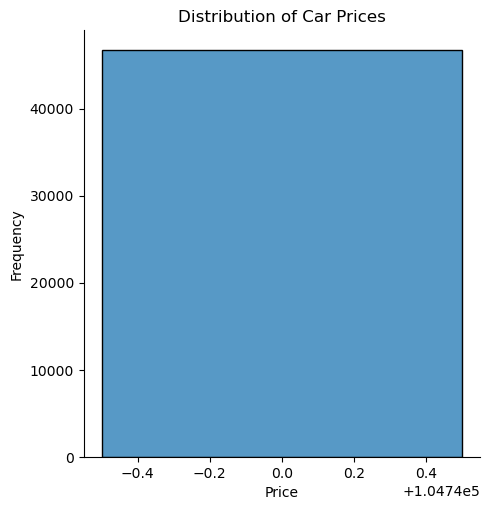

Skewness: 0.000000
Kurtosis: 0.000000


In [ ]:
sns.displot(cars['Price'], kde=False)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

### RELATIONSHIP WITH NUMERICAL FEATURES

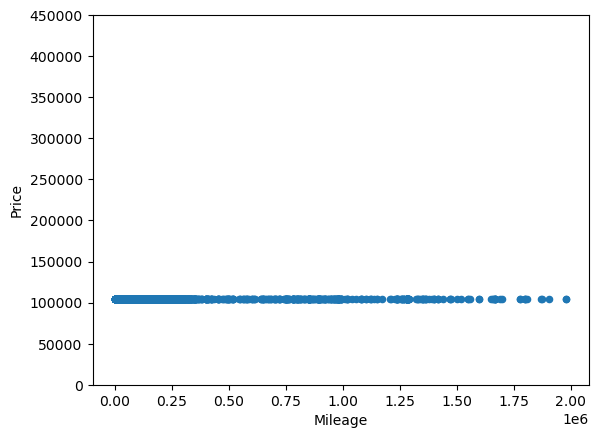

In [ ]:
# Scatter plot Mileage / Price
attrib = 'Mileage'
data = pd.concat([cars['Price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,450000));


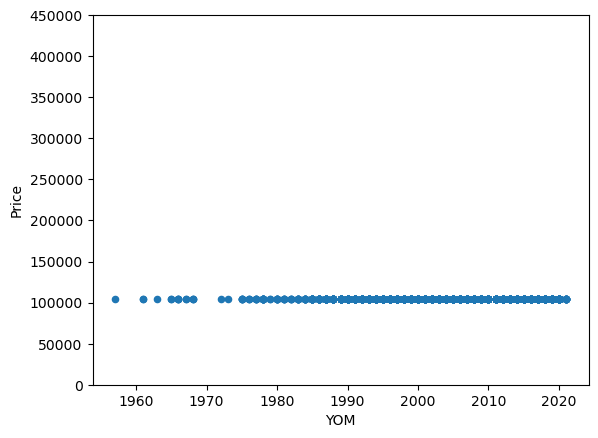

In [ ]:
# Scatter plot Year / Price
attrib = 'YOM'
data = pd.concat([cars['Price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,450000));

In [ ]:


# Replace 'Unkown' with NaN
cars['YOM'] = pd.to_numeric(cars['YOM'], errors='coerce')

# Calculate correlation
correlation_mileage_price = cars['Mileage'].corr(cars['Price'])
correlation_yom_price = cars['YOM'].corr(cars['Price'])
print("correlation_mileage_price", correlation_mileage_price)
print("correlation_yom_price",correlation_yom_price)


correlation_mileage_price nan
correlation_yom_price nan


c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
#checking the distribution of categorical data
print(cars.Transmission.value_counts())


Transmission
Automatic             42731
Manual                 3131
CVT                     283
AMT                     195
Nairobi, Lavington       29
                      ...  
134525                    1
86000                     1
186475                    1
115437                    1
33363                     1
Name: count, Length: 240, dtype: int64


In [ ]:
print(cars.Location.value_counts())

Location
Mombasa, Mombasa CBD        11622
Nairobi, Nairobi Central     5909
Nairobi, Kilimani            5192
Mombasa, Mvita               3716
Nairobi, Ridgeways           2185
                            ...  
Nyamira, Township F             1
Nairobi, Pumwani                1
Narok, Kilgoris Central         1
Meru, Igoji East                1
Nandi, Nandi Hills              1
Name: count, Length: 281, dtype: int64


In [ ]:
print(cars.Make .value_counts())

Make
Toyota           18821
Nissan            6326
Subaru            3515
Mazda             3334
Mercedes-Benz     2197
Honda             2170
Mitsubishi        1772
Volkswagen        1693
Suzuki            1520
BMW               1361
Land Rover         985
Audi               593
Lexus              591
Ford               374
Daihatsu           313
Peugeot            266
Volvo              247
Jeep               140
KSh                109
Porsche             82
Mini                62
Hyundai             46
Kia                 41
Jaguar              40
Chevrolet           39
Bmw                 27
Alfa                10
Land                 9
TOYOTA               1
Name: count, dtype: int64


In [ ]:
print(cars.Model .value_counts())

Model
Land        2676
Hilux       1457
Note        1347
Forester    1268
Fielder     1254
            ... 
M6             1
H-Wgn          1
118d           1
CRV            1
E550           1
Name: count, Length: 641, dtype: int64


In [ ]:
print(cars.Used.value_counts())


Used
Foreign Used            28713
Kenyan Used             17053
Brand New                 574
Automatic                 237
km                        100
Manual                      5
Mombasa, Mombasa CBD        1
94871                       1
Name: count, dtype: int64


In [ ]:
print(cars.Color.value_counts())

Color
White        11324
Black         9303
Silver        8193
Blue          4038
Gray          3841
             ...  
720,000          1
1988             1
2,474,998        1
2,306,248        1
Coupe            1
Name: count, Length: 178, dtype: int64


## Encoding the Categorical data

In [ ]:
#encoding transmission column
cars.replace({'Transmission':{'Automatic': 0, 'Manual': 1, 'CVT': 2, 'AMT': 3}}, inplace = True)
#encoding used column
cars.replace({'Used':{'Foreign Used': 0, 'Kenyan Used': 1, 'Brand New': 2}}, inplace = True)
#encoding color column
cars.replace({'Color':{'White': 0, 'Black': 1, 'Silver': 2, 'Blue': 3, 'Gray': 4}}, inplace = True)

In [ ]:
cars.head()

,Model,Make,YOM,Color,Used,Transmission,Mileage,Location,Price
0,X-Trail,Nissan,2014,1,0,0,136000,"Nairobi, Karen","KSh 2,050,000"
1,Teana,Nissan,2014,2,0,0,85000,"Nairobi, Kilimani","KSh 1,380,000"
2,Teana,Nissan,2013,4,0,0,90231,"Nairobi, Ridgeways","KSh 995,000"
3,X-Trail,Nissan,2014,0,0,0,52000,"Nairobi, Jamhuri","KSh 2,500,000"
4,Note,Nissan,2014,0,0,0,Unavailable,"Mombasa, Mombasa CBD","KSh 1,100,000"


## Splitting the dataset into data and target

In [ ]:
X = cars.drop(['Make','Price'], axis = 1)
Y = cars['Price']

In [ ]:
print("x", X)
print("y", Y)

x          Model   YOM Color Used Transmission      Mileage  \
0      X-Trail  2014     1    0            0       136000   
1        Teana  2014     2    0            0        85000   
2        Teana  2013     4    0            0        90231   
3      X-Trail  2014     0    0            0        52000   
4         Note  2014     0    0            0  Unavailable   
...        ...   ...   ...  ...          ...          ...   
46680    Romeo  2015     1    0            0  Unavailable   
46681    Romeo  2016     0    0            0        75048   
46682    Romeo  2002   Red    1            0        72000   
46683    Romeo  1992     3    1            1       150000   
46684    Romeo  1987   Red    1            1  Unavailable   

                     Location  
0              Nairobi, Karen  
1           Nairobi, Kilimani  
2          Nairobi, Ridgeways  
3            Nairobi, Jamhuri  
4        Mombasa, Mombasa CBD  
...                       ...  
46680       Nairobi, Kilimani  
46681    

### splitting data into train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

## Model Training
**Linear Regresion**

In [ ]:
lin_regModel = LinearRegression()
lin_regModel.fit(X_train, Y_train)

# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

ValueError: could not convert string to float: 'X-Trail'

## **Visualize the actual prices and predicted price**

In [ ]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scienthia\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


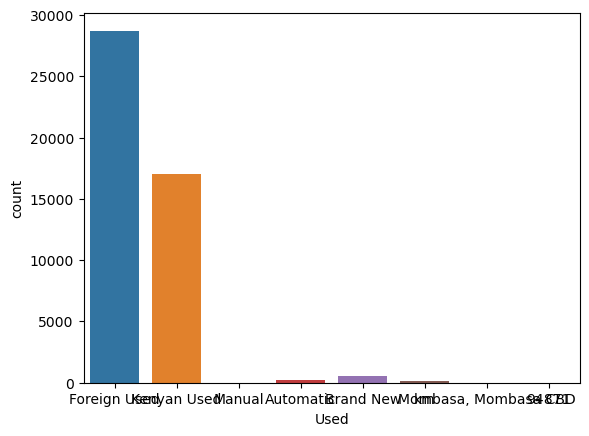

In [ ]:
sns.countplot(data=cars, x='Used')
plt.show()